# Trabajo Fin de Máster
## HateSpeech Detection
### Autor: Óscar Toimil Plaza
#### Tutores: Marcos Fernández Pichel y Mario Ezra Aragón Saenzpardo

-------------------------------------------

## Imports

In [29]:
import pandas as pd
from pysentimiento import create_analyzer #!pip install pysentimiento
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

## Variables globales

In [30]:
DATASETS_NAME = {
    'SEMEVAL_2019_TRAIN': 'semeval2019_es_train.csv',
    'SEMEVAL_2019_VAL': 'semeval2019_es_dev.csv',
    'SEMEVAL_2019_TEST': 'semeval2019_es_test.csv',
}

DATASETS_DELIMITERS = {
    'SEMEVAL_2019': '	',
}
SEED_VALUE = 1

-------------------------------------------

## Lectura datos

-----------------------------------------------

#### SEMEVAL 2019

In [31]:
df_semeval_train = pd.read_csv ( DATASETS_NAME['SEMEVAL_2019_TRAIN'],
        skiprows=1,
        header=None,
        names = ["id", "text", "hate_speech", "target_range", "aggressiveness"],
        delimiter=DATASETS_DELIMITERS['SEMEVAL_2019'])

----------------------------

## Emotion Analysis


-----------------------------------------------

### Todos los tweets

-----------------------------------------------


In [32]:
df_semeval_train.head()

id                                               text  hate_speech  \
0  20001  Easyjet quiere duplicar el número de mujeres p...            1   
1  20002  El gobierno debe crear un control estricto de ...            1   
2  20003  Yo veo a mujeres destruidas por acoso laboral ...            0   
3  20004  — Yo soy respetuoso con los demás, sólamente l...            0   
4  20007  Antonio Caballero y como ser de mal gusto e ig...            0   

   target_range  aggressiveness  
0             0               0  
1             0               0  
2             0               0  
3             0               0  
4             0               0

In [33]:
emotion_analyzer = create_analyzer("emotion", lang="es")

In [34]:
#Ejemplo de la documentacion
emotion_analyzer.predict("omg")

AnalyzerOutput(output=surprise, probas={surprise: 0.752, joy: 0.151, others: 0.049, fear: 0.021, sadness: 0.016, disgust: 0.007, anger: 0.004})

In [35]:
def analyze_emotion(text):
    result = emotion_analyzer.predict(text.lower())
    emotion = result.output
    probabilities = result.probas

    print("\n-----------------------")
    print(f"Texto analizado: {text}")
    print(f"Emoción detectada: {emotion}")
    print(f"Probabilidades: {probabilities}")

    return emotion, probabilities, text

In [36]:
text_data = df_semeval_train['text'].tolist()
results = [analyze_emotion(text) for text in tqdm(text_data)]


  0%|          | 14/4450 [00:00<01:04, 68.43it/s]


-----------------------
Texto analizado: Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x
Emoción detectada: others
Probabilidades: {'others': 0.9834954142570496, 'joy': 0.003921227529644966, 'sadness': 0.0005630145315080881, 'anger': 0.0011650127125903964, 'surprise': 0.008862781338393688, 'disgust': 0.0004561698588076979, 'fear': 0.0015364506980404258}

-----------------------
Texto analizado: El gobierno debe crear un control estricto de inmigración en las zonas fronterizas con Colombia por q después del 20-8querrán venir en masa
Emoción detectada: others
Probabilidades: {'others': 0.8669195771217346, 'joy': 0.0030458334367722273, 'sadness': 0.01957804337143898, 'anger': 0.028830457478761673, 'surprise': 0.024499449878931046, 'disgust': 0.009372862055897713, 'fear': 0.04775368422269821}

-----------------------
Texto analizado: Yo veo a mujeres destruidas por acoso laboral y callejero. Otras con depresión debido a violació


  1%|          | 30/4450 [00:00<01:00, 73.41it/s]


-----------------------
Texto analizado: Albondigas! Casi al estilo de las fodongas pero en el Gabacho.
Emoción detectada: others
Probabilidades: {'others': 0.7064902782440186, 'joy': 0.19672785699367523, 'sadness': 0.0034999714698642492, 'anger': 0.011629397049546242, 'surprise': 0.07120317220687866, 'disgust': 0.004122002050280571, 'fear': 0.006327372044324875}

-----------------------
Texto analizado: Todos: -#NoTodosLosHombres -PPK, presidente de lujo -Perú no va al mundial 2017: Já, ilusos.
Emoción detectada: others
Probabilidades: {'others': 0.5614928603172302, 'joy': 0.016528600826859474, 'sadness': 0.10994035005569458, 'anger': 0.2508614659309387, 'surprise': 0.0032215542159974575, 'disgust': 0.05567990988492966, 'fear': 0.002275296254083514}

-----------------------
Texto analizado: El juez cita a declarar a la menor que denunció abusos por parte de jugadores de la #Arandina https://t.co/vD92Mxs04Q https://t.co/kbTiYIpwol
Emoción detectada: others
Probabilidades: {'others': 0


  1%|          | 47/4450 [00:00<00:56, 78.46it/s]


-----------------------
Texto analizado: Es un gran regalo???? Y una polla un regalo, aquí no le han regalado nada. Se lo ha currado muchísimo, ya vale con las tonterías #OTGala8
Emoción detectada: anger
Probabilidades: {'others': 0.09757649153470993, 'joy': 0.024666691198945045, 'sadness': 0.007991887629032135, 'anger': 0.8391808867454529, 'surprise': 0.006251547485589981, 'disgust': 0.023422138765454292, 'fear': 0.0009103276534006}

-----------------------
Texto analizado: me saqué un 9 en el final de biología para vos hija de puta q no me quisiste promocionar por unas centésimas EN TU CARA Y EN TU CANCHA
Emoción detectada: anger
Probabilidades: {'others': 0.060068871825933456, 'joy': 0.008599674329161644, 'sadness': 0.012857840396463871, 'anger': 0.8541903495788574, 'surprise': 0.003277754643931985, 'disgust': 0.05837201699614525, 'fear': 0.00263348245061934}

-----------------------
Texto analizado: @ValentinaaCruz Puteria y perico también somos almas gemelas excepto que tu eres p


  1%|▏         | 65/4450 [00:00<00:53, 81.33it/s]


-----------------------
Texto analizado: @DrodriguezVen tu eres la perra mas perra de las perras
Emoción detectada: others
Probabilidades: {'others': 0.9435835480690002, 'joy': 0.03483168035745621, 'sadness': 0.0013188993325456977, 'anger': 0.003578526433557272, 'surprise': 0.012685013003647327, 'disgust': 0.0017564625013619661, 'fear': 0.0022458757739514112}

-----------------------
Texto analizado: Inmigrantes intentan fugarse de Ceuta escondidos en un ferry https://t.co/PzsYXikVuh vía
Emoción detectada: others
Probabilidades: {'others': 0.941154956817627, 'joy': 0.0025433970149606466, 'sadness': 0.0040489318780601025, 'anger': 0.007368696387857199, 'surprise': 0.024495674297213554, 'disgust': 0.006047957576811314, 'fear': 0.014340398833155632}

-----------------------
Texto analizado: @Proctologo Maldito hijo de perra... no sé por que no se fue por una puta letrina en su pueblo y se ahogó en mierda, como lo merecia.
Emoción detectada: anger
Probabilidades: {'others': 0.001875869114


  2%|▏         | 74/4450 [00:00<00:54, 80.77it/s]


-----------------------
Texto analizado: Mercedes y Vodafone se lían en la polémica del futbolista Özil sobre el racismo en Alemania: “Soy alemán cuando ganamos, pero un inmigrante cuando perdemos” https://t.co/imSYwzFHeB vía @eldiarioes
Emoción detectada: others
Probabilidades: {'others': 0.8226428627967834, 'joy': 0.008610804565250874, 'sadness': 0.007742768619209528, 'anger': 0.13805459439754486, 'surprise': 0.0061315856873989105, 'disgust': 0.012927216477692127, 'fear': 0.0038900866638869047}

-----------------------
Texto analizado: Calmados no se amontonen!!!pinches nacos frijoleros pikense el culo 🖕🏽😑 https://t.co/tn7lEhUzsE
Emoción detectada: anger
Probabilidades: {'others': 0.006699362304061651, 'joy': 0.0011829447466880083, 'sadness': 0.0033516590483486652, 'anger': 0.9451837539672852, 'surprise': 0.0008255679276771843, 'disgust': 0.04089640453457832, 'fear': 0.001860224292613566}

-----------------------
Texto analizado: @fedevigevani Cuando te conozca te pego un chicle en 


  2%|▏         | 92/4450 [00:01<00:54, 80.47it/s]


-----------------------
Texto analizado: @Valeria_Martell @NopaIep Si, estoy de acuerdo. A ningún hombre le pasaría por la cabeza que una mujer es puta por subir fotos semi desnuda. Libertad y respeto.
Emoción detectada: others
Probabilidades: {'others': 0.4660373032093048, 'joy': 0.004125846084207296, 'sadness': 0.03360367938876152, 'anger': 0.4366465210914612, 'surprise': 0.00855607446283102, 'disgust': 0.04818793013691902, 'fear': 0.0028425732161849737}

-----------------------
Texto analizado: @Zabayar Lo peor de todo es que tú eres parte de la culpa de la destrucción de Venezuela hijo de la grandísima PUTA, y encima sigues siendo chavista MALPARIDO. ahora no se valen arrepentimientos tienen 18 años llevando PALO y pasando roncha y es ahorita e
Emoción detectada: anger
Probabilidades: {'others': 0.001556921168230474, 'joy': 0.0010171914473176003, 'sadness': 0.0028999317437410355, 'anger': 0.8441122174263, 'surprise': 0.0009372209897264838, 'disgust': 0.14813333749771118, 'fear': 0


  2%|▏         | 110/4450 [00:01<00:51, 84.26it/s]


-----------------------
Texto analizado: #Repost @analorenasm with get_repost ・・・ 🌊💃🏽 besos de mezcal pa’ el Güero. ¡feliz viernes! https://t.co/mNwsnjtSlZ
Emoción detectada: joy
Probabilidades: {'others': 0.00991185661405325, 'joy': 0.9867379069328308, 'sadness': 0.0006338916136883199, 'anger': 0.0004562601097859442, 'surprise': 0.0011710422113537788, 'disgust': 0.0006028793868608773, 'fear': 0.0004862104542553425}

-----------------------
Texto analizado: @vibrium_ JAJAJAJAJAJA El multitasking es lo de hoy: Perra en Instagram, emo en Twitter, ridículas por Facebook y divas en WhatsApp, todo a la misma vez y sin mezclar historias.
Emoción detectada: others
Probabilidades: {'others': 0.8893954753875732, 'joy': 0.08735647797584534, 'sadness': 0.0020021693781018257, 'anger': 0.005155408754944801, 'surprise': 0.013529074378311634, 'disgust': 0.0018831102643162012, 'fear': 0.000678196782246232}

-----------------------
Texto analizado: @MasterofCR @Exodial0 @GuidoNJ99 Callate la puta boca


  3%|▎         | 128/4450 [00:01<00:50, 85.06it/s]


-----------------------
Texto analizado: Llevamos ya 3 casos asilados de violencia de inmigrantes en la zona de Barcelona en una semana. ¿A partir de cuantos casos, dejan de considerarse "aislados"?
Emoción detectada: others
Probabilidades: {'others': 0.7028363943099976, 'joy': 0.0020132672507315874, 'sadness': 0.047990839928388596, 'anger': 0.10317134857177734, 'surprise': 0.07861686497926712, 'disgust': 0.03013063408434391, 'fear': 0.035240624099969864}

-----------------------
Texto analizado: Apartas el tanga a un lado, posas mi polla en tu coño y te dejas caer despacio metiéndola entera, que placer me da sentir como aprieta tu coño durante todo el recorrido, baja nena https://t.co/EAzApav28W
Emoción detectada: others
Probabilidades: {'others': 0.5668882131576538, 'joy': 0.3099040985107422, 'sadness': 0.019240709021687508, 'anger': 0.02333623543381691, 'surprise': 0.046703118830919266, 'disgust': 0.012490306049585342, 'fear': 0.021437276154756546}

-----------------------
Texto an


  3%|▎         | 146/4450 [00:01<00:53, 81.05it/s]


-----------------------
Texto analizado: En Ceuta hay una montaña que simboliza todo lo que ocurre a ambos lados de la valla PERFILADA en la roca, con el busto... https://t.co/lH5kGLlkzQ
Emoción detectada: others
Probabilidades: {'others': 0.9941750168800354, 'joy': 0.0013245069421827793, 'sadness': 0.0010570434387773275, 'anger': 0.00022003769117873162, 'surprise': 0.002050842856988311, 'disgust': 0.0001524432736914605, 'fear': 0.0010200870456174016}

-----------------------
Texto analizado: @Elaguijon_ Hoy toda esta escoria está callada me gustaría oírlos hablar #HDPasesinos
Emoción detectada: anger
Probabilidades: {'others': 0.00490066222846508, 'joy': 0.0009442220325581729, 'sadness': 0.00221921200864017, 'anger': 0.7575221061706543, 'surprise': 0.0009049693471752107, 'disgust': 0.2320665717124939, 'fear': 0.0014423324028030038}

-----------------------
Texto analizado: -¿Aquí es la oficina de atención contra el racismo? -Claro que sí, pásele pinche indio prieto sarrapastrozo ahor


  4%|▎         | 164/4450 [00:02<00:54, 77.95it/s]


-----------------------
Texto analizado: Porque andan llamando gata, zorra o puta a baekhyun si es hombre, manga de ridiculas
Emoción detectada: anger
Probabilidades: {'others': 0.004996574949473143, 'joy': 0.0012012273073196411, 'sadness': 0.004309191834181547, 'anger': 0.895363450050354, 'surprise': 0.0026331329718232155, 'disgust': 0.0888497531414032, 'fear': 0.00264678243547678}

-----------------------
Texto analizado: es una chinguita hacer tamales', refunfuña mi sirvienta la diódora. 'cállate o te van a salir agrios', le digo... bueno, para qué les cuento a ustedes fresitas que fueron a la universidad, qué van a saber de hacer tamales 😂
Emoción detectada: others
Probabilidades: {'others': 0.5728045701980591, 'joy': 0.014745889231562614, 'sadness': 0.013272429816424847, 'anger': 0.3716108798980713, 'surprise': 0.004287633113563061, 'disgust': 0.020450349897146225, 'fear': 0.0028282380662858486}

-----------------------
Texto analizado: Esa gente insultando y condenando al asesin


  4%|▍         | 180/4450 [00:02<00:55, 76.78it/s]


-----------------------
Texto analizado: @laLauusrobles Tu eres zorra amiga jajajajajajajaja
Emoción detectada: others
Probabilidades: {'others': 0.9326033592224121, 'joy': 0.033841077238321304, 'sadness': 0.003375730011612177, 'anger': 0.011100538074970245, 'surprise': 0.013166554272174835, 'disgust': 0.004207144025713205, 'fear': 0.0017055270727723837}

-----------------------
Texto analizado: ODIAME ERO AL MIRARTE A UN ESPEJO RECUERDA YO SOY AGIL Y ATRACTIVA TU ERES UNA PUTA CERDA😁😁😁
Emoción detectada: others
Probabilidades: {'others': 0.6633394360542297, 'joy': 0.022923078387975693, 'sadness': 0.014227994717657566, 'anger': 0.2560988664627075, 'surprise': 0.002871363889425993, 'disgust': 0.03757765516638756, 'fear': 0.0029615801759064198}

-----------------------
Texto analizado: @letra_escarlata @Pepe_Tron_B_M @anaisbernal @20m Y estos son los hijos de puta que van a luchar contra la violencia que ejercen contra las mujeres. Es que no me troncho porque NO TIENE NI PUTA GRACIA 😡😡😡


  4%|▍         | 188/4450 [00:02<01:03, 67.50it/s]


-----------------------
Texto analizado: La zorra se queda callada porque sabe que mi combo es puro power 🔥
Emoción detectada: others
Probabilidades: {'others': 0.9526378512382507, 'joy': 0.0217751432210207, 'sadness': 0.0030131940729916096, 'anger': 0.011233571916818619, 'surprise': 0.0055240364745259285, 'disgust': 0.0031184430699795485, 'fear': 0.0026977211236953735}

-----------------------
Texto analizado: @ignaciodover comemela hso y si cojemos ahi nomas no pasa nada ahre
Emoción detectada: others
Probabilidades: {'others': 0.9373844265937805, 'joy': 0.02425646223127842, 'sadness': 0.006268688011914492, 'anger': 0.011209658347070217, 'surprise': 0.00855492614209652, 'disgust': 0.008207409642636776, 'fear': 0.0041184378787875175}

-----------------------
Texto analizado: @suicideroom22 Cállate que la que clava el visto sos vos Zorra 💔
Emoción detectada: anger
Probabilidades: {'others': 0.025809811428189278, 'joy': 0.002959124743938446, 'sadness': 0.006009318865835667, 'anger': 0.


  5%|▍         | 202/4450 [00:02<01:08, 61.58it/s]


-----------------------
Texto analizado: Ultra pendeja este ciudadano común, teatro le bajo pelotudis, esposelo y 6 horas al calabozo..   Vago indocumentado... https://t.co/MhD226N2rT
Emoción detectada: anger
Probabilidades: {'others': 0.003463307861238718, 'joy': 0.0008312687859870493, 'sadness': 0.0017540379194542766, 'anger': 0.8037670254707336, 'surprise': 0.0017056893557310104, 'disgust': 0.1865546703338623, 'fear': 0.0019240231486037374}

-----------------------
Texto analizado: Brigada humanitaria lleva agua a inmigrantes que cruzan desierto https://t.co/JFm9rAZZPl
Emoción detectada: others
Probabilidades: {'others': 0.8668586015701294, 'joy': 0.11686450242996216, 'sadness': 0.007252498995512724, 'anger': 0.0026844076346606016, 'surprise': 0.002148705068975687, 'disgust': 0.0017717935843393207, 'fear': 0.002419490134343505}

-----------------------
Texto analizado: Muchas personas creen q una mujer es abusada o acosada por ir muy descubierta, pero yo he visto acoso a mujeres po


  5%|▍         | 216/4450 [00:02<01:09, 61.32it/s]


-----------------------
Texto analizado: No puedo con lo que dice la canción de ‘que perra mi amiga’: y tú eres perra, ládrame 😂
Emoción detectada: others
Probabilidades: {'others': 0.6330293416976929, 'joy': 0.23450466990470886, 'sadness': 0.008134585805237293, 'anger': 0.006131225731223822, 'surprise': 0.10644353181123734, 'disgust': 0.002808581804856658, 'fear': 0.008948069997131824}

-----------------------
Texto analizado: @FakuuFlores No todos tenemos tus mañas zorra
Emoción detectada: anger
Probabilidades: {'others': 0.34005314111709595, 'joy': 0.010050224140286446, 'sadness': 0.007305769249796867, 'anger': 0.541542649269104, 'surprise': 0.004498228896409273, 'disgust': 0.09209092706441879, 'fear': 0.004459036514163017}

-----------------------
Texto analizado: @heavenskarIa Deja de provocarme maldita perra
Emoción detectada: anger
Probabilidades: {'others': 0.09842831641435623, 'joy': 0.005105933640152216, 'sadness': 0.0032266415655612946, 'anger': 0.8336285352706909, 'surpris


  5%|▌         | 223/4450 [00:03<01:12, 58.49it/s]


-----------------------
Texto analizado: Mierda,mierda y solo mierda viene de África, único sitio para recoger, toda esa basura, musulmono africana. https://t.co/ZLdMfxbjzk
Emoción detectada: anger
Probabilidades: {'others': 0.0013542786473408341, 'joy': 0.0008376240148209035, 'sadness': 0.0027304503601044416, 'anger': 0.8545573949813843, 'surprise': 0.0005355246248655021, 'disgust': 0.13897547125816345, 'fear': 0.0010092074517160654}

-----------------------
Texto analizado: Cállate puta, zorra, borracha, drogadictaaa.
Emoción detectada: anger
Probabilidades: {'others': 0.013813775032758713, 'joy': 0.0041884141974151134, 'sadness': 0.002910901792347431, 'anger': 0.8824222087860107, 'surprise': 0.0024911779910326004, 'disgust': 0.09208384156227112, 'fear': 0.0020896901842206717}

-----------------------
Texto analizado: hola tengo el hc de que hinata es mitad irlandés, que tsukki es mitad franchute y yamaguchi mitad latino &gt;&gt;&gt; i'm in drugs
Emoción detectada: others
Probabilid


  5%|▌         | 235/4450 [00:03<01:13, 57.15it/s]


-----------------------
Texto analizado: igual posta odio los pies capaz tenes pie feo y me jodes apoyandomelo en la cara y te pego un hachazo
Emoción detectada: anger
Probabilidades: {'others': 0.06903117895126343, 'joy': 0.006673873867839575, 'sadness': 0.012634199112653732, 'anger': 0.7554917335510254, 'surprise': 0.003586594248190522, 'disgust': 0.13935402035713196, 'fear': 0.01322832889854908}

-----------------------
Texto analizado: Más residentes en Emiratos Árabes aseguran luchar para llegar a fin de mes https://t.co/1eu5NrHz55
Emoción detectada: others
Probabilidades: {'others': 0.9933356046676636, 'joy': 0.0009986103978008032, 'sadness': 0.0016391233075410128, 'anger': 0.0005475389189086854, 'surprise': 0.002008237177506089, 'disgust': 0.00045325953396968544, 'fear': 0.0010176848154515028}

-----------------------
Texto analizado: @BreenDLP @ChumelTorres @Juandedios_P @KimberlyLoaiza_ Cállate Perra mal parida de Juan y kim no hables😠😡😡
Emoción detectada: anger
Probabilidade


  6%|▌         | 248/4450 [00:03<01:10, 59.79it/s]


-----------------------
Texto analizado: @ronuevo @FCBarcelona_es Bobo hijo de perra, usted cree que va a enseñarle a Messi o llega a aprender del más grande?
Emoción detectada: anger
Probabilidades: {'others': 0.01692507229745388, 'joy': 0.0027940028812736273, 'sadness': 0.008200488053262234, 'anger': 0.8605598211288452, 'surprise': 0.004767287522554398, 'disgust': 0.10468872636556625, 'fear': 0.00206459010951221}

-----------------------
Texto analizado: @asukasexual comemela tu a mi mamon XDDDD
Emoción detectada: anger
Probabilidades: {'others': 0.21432524919509888, 'joy': 0.02399047091603279, 'sadness': 0.0025284348521381617, 'anger': 0.6968122720718384, 'surprise': 0.00817812979221344, 'disgust': 0.05075256898999214, 'fear': 0.003412874648347497}

-----------------------
Texto analizado: La mina también bastante puta. Onda, la que esta de novia es ella no el 🙆🙆 https://t.co/cBYGWb6nty
Emoción detectada: others
Probabilidades: {'others': 0.9771275520324707, 'joy': 0.00235315295867


  6%|▌         | 261/4450 [00:03<01:09, 60.11it/s]


-----------------------
Texto analizado: Ese buey feliz en su país gabacho 😂😂😂 otro Anaya que desde el extranjero quieren gobernar https://t.co/GQ7HmNdmXa
Emoción detectada: joy
Probabilidades: {'others': 0.4512859880924225, 'joy': 0.5307770371437073, 'sadness': 0.006517284549772739, 'anger': 0.005581481382250786, 'surprise': 0.002485029399394989, 'disgust': 0.002782735973596573, 'fear': 0.0005705149378627539}

-----------------------
Texto analizado: REFUGIADOS SI, INMIGRANTES LOS NECESARIOS Y LOS QUE REALMENTE PODAMOS ATENDER, pienso que España sólo debería acoger y de una forma ordenada a inmigrantes latinoamericanos de habla española, cristianos, que... https://t.co/mo1PM2oR2l
Emoción detectada: others
Probabilidades: {'others': 0.980952799320221, 'joy': 0.004264114890247583, 'sadness': 0.007850638590753078, 'anger': 0.004518878646194935, 'surprise': 0.0005765584646724164, 'disgust': 0.0010276957182213664, 'fear': 0.000809360877610743}

-----------------------
Texto analizado: @Ra


  6%|▌         | 275/4450 [00:03<01:12, 57.36it/s]


-----------------------
Texto analizado: ALLANARON la oficina de Thomas (ex de EBY) en la propia Central! A nuestra CGR, nunca dejaron entrar porque es bilateral. #YacyretaSeEntregó sin ver papeles y ahora se destapó escándalo de corrupción. Van a seguir igual con este FATO FEROZ @Horacio_Cartes y @MaritoAbdo ?
Emoción detectada: anger
Probabilidades: {'others': 0.0014774148585274816, 'joy': 0.0003892456297762692, 'sadness': 0.0016079001361504197, 'anger': 0.8922587633132935, 'surprise': 0.0021127196960151196, 'disgust': 0.10024706274271011, 'fear': 0.0019070018315687776}

-----------------------
Texto analizado: feliz cumpleaños franchute moracrema 💋💋💏❤️❤️❤️❤️❤️ @thesinnner1
Emoción detectada: joy
Probabilidades: {'others': 0.03200449049472809, 'joy': 0.9622209072113037, 'sadness': 0.0005903998971916735, 'anger': 0.00042490207124501467, 'surprise': 0.0030971597880125046, 'disgust': 0.0008135270327329636, 'fear': 0.0008487443556077778}

-----------------------
Texto analizado: @Victor


  6%|▋         | 287/4450 [00:04<01:21, 51.36it/s]


-----------------------
Texto analizado: arabe es un re temon papichamp y ecko la rompen, yo les retumbo las nalgas a lo twerk loco los amo
Emoción detectada: joy
Probabilidades: {'others': 0.30202245712280273, 'joy': 0.5707261562347412, 'sadness': 0.012360546737909317, 'anger': 0.018627895042300224, 'surprise': 0.05805673077702522, 'disgust': 0.020583217963576317, 'fear': 0.01762297749519348}

-----------------------
Texto analizado: DEJA DE TUITEAR HIJA DE PUTA ESCUCHA LOS ARGUMENTOS QUE LUEGO TE VAS A QUEDAR CALLADA FUJIMIERDA DEL CARAJO https://t.co/np9RAv5auI
Emoción detectada: anger
Probabilidades: {'others': 0.0050796568393707275, 'joy': 0.0009640331845730543, 'sadness': 0.0011746713425964117, 'anger': 0.9309326410293579, 'surprise': 0.0007586627616547048, 'disgust': 0.05978063493967056, 'fear': 0.001309735351242125}

-----------------------
Texto analizado: los videos no acreditan mucho, pero lo que no me convence es el dato del acosador con acento "peruano". Me parece xenofob


  7%|▋         | 293/4450 [00:04<01:21, 51.12it/s]


-----------------------
Texto analizado: @vmoulian @baradit Puta el weon hincha pelotas... Criticas a @baradit por su programa, pero tu eres panelista en Primer Plano... EN PRIMER PLANO PO WEEEOON!!!... Chanta!
Emoción detectada: anger
Probabilidades: {'others': 0.01375538669526577, 'joy': 0.0016262538265436888, 'sadness': 0.0027569103986024857, 'anger': 0.9422813653945923, 'surprise': 0.0017366762040182948, 'disgust': 0.03688443452119827, 'fear': 0.0009589642868377268}

-----------------------
Texto analizado: @pilarbertolo @el_pais Porque no tiene la menor empatía con víctimas de acoso ni de violación y porque defiende un derecho autoinventado del hombre de hacer con las mujeres lo que les dé la gana.
Emoción detectada: anger
Probabilidades: {'others': 0.005406755022704601, 'joy': 0.0003783980500884354, 'sadness': 0.0049171471036970615, 'anger': 0.8975108861923218, 'surprise': 0.0005697449669241905, 'disgust': 0.09015907347202301, 'fear': 0.0010579937370494008}

--------------------


  7%|▋         | 305/4450 [00:04<01:19, 52.06it/s]


-----------------------
Texto analizado: Os acordais de cuando decian los del lacito que preferian inmigrantes subsaharianos antes que españoles? Pues ala deseo concedido... Ya teneis barcelona plagada de manteros
Emoción detectada: others
Probabilidades: {'others': 0.6778053641319275, 'joy': 0.0814131572842598, 'sadness': 0.024411244317889214, 'anger': 0.1301305890083313, 'surprise': 0.006803511176258326, 'disgust': 0.075578473508358, 'fear': 0.0038576857186853886}

-----------------------
Texto analizado: @pavoacuerda Aqui son acosadores porque les mandan un dm... las haría hablar con una victima de acoso o violación a estas infradotadas para que dejen de hablar estupideces. Asco me dan como mujer.
Emoción detectada: anger
Probabilidades: {'others': 0.0013199439272284508, 'joy': 0.0005181708838790655, 'sadness': 0.0025825113989412785, 'anger': 0.7237008810043335, 'surprise': 0.001396818202920258, 'disgust': 0.2675227224826813, 'fear': 0.002958903321996331}

-----------------------
T


  7%|▋         | 323/4450 [00:04<01:01, 67.65it/s]


-----------------------
Texto analizado: @tromepe Tú eres la malagua celulitica puta barata https://t.co/tjDXyEKLzu
Emoción detectada: others
Probabilidades: {'others': 0.8452599048614502, 'joy': 0.0033060123678296804, 'sadness': 0.004130425397306681, 'anger': 0.1193007156252861, 'surprise': 0.0034565229434520006, 'disgust': 0.02283080294728279, 'fear': 0.0017155553214251995}

-----------------------
Texto analizado: @maricucha568 @TRICICLODELPERU @roxcanedo Tu eres puta..tienes maridos seguro
Emoción detectada: others
Probabilidades: {'others': 0.9031722545623779, 'joy': 0.016112757846713066, 'sadness': 0.007055400405079126, 'anger': 0.04459405690431595, 'surprise': 0.007757374085485935, 'disgust': 0.01670784503221512, 'fear': 0.004600282292813063}

-----------------------
Texto analizado: Demandan a Trump por condiciones "inhumanas" para indocumentados detenidos ► https://t.co/z3Q5vcstG3 https://t.co/d0ipNyIekc
Emoción detectada: others
Probabilidades: {'others': 0.9138312339782715,


  8%|▊         | 341/4450 [00:04<00:53, 76.52it/s]


-----------------------
Texto analizado: @greedyaja no u callate cono perra yana
Emoción detectada: others
Probabilidades: {'others': 0.7885428667068481, 'joy': 0.005527267698198557, 'sadness': 0.004188590217381716, 'anger': 0.1775358021259308, 'surprise': 0.005755155812948942, 'disgust': 0.0157668124884367, 'fear': 0.002683512633666396}

-----------------------
Texto analizado: @HuxGeneraI « hijo de perra. Por supuesto no lo haría, solo el muy bastardo se lo merecía por intentar siempre menospreciarle .... Si los golpes no funcionaban, habría de intimidarlo aún de la manera más repugnante —
Emoción detectada: anger
Probabilidades: {'others': 0.0017033407930284739, 'joy': 0.0010283644078299403, 'sadness': 0.0024683841038495302, 'anger': 0.794212281703949, 'surprise': 0.001092595630325377, 'disgust': 0.19818337261676788, 'fear': 0.0013116466579958797}

-----------------------
Texto analizado: Independiente se lo merecía, @Flamengo son cagones, son putos y si son unos brasileros hijos d


  8%|▊         | 357/4450 [00:05<00:55, 74.36it/s]


-----------------------
Texto analizado: Por que las mujeres tienen cuatro labios: los dos de arriba para decir tonterias y los dos de abajo, para arreglarlas
Emoción detectada: anger
Probabilidades: {'others': 0.29753050208091736, 'joy': 0.0053756688721477985, 'sadness': 0.012211657129228115, 'anger': 0.6214619278907776, 'surprise': 0.006448519881814718, 'disgust': 0.051222849637269974, 'fear': 0.005748915486037731}

-----------------------
Texto analizado: @juangilopez Que sí, que el acoso y la violación están mal; pero que no: hay situaciones que *no* son acoso, y está mal que quieran ampliar su su significado hasta que abarque cualquier cosa... que es para donde van /2
Emoción detectada: anger
Probabilidades: {'others': 0.06918296217918396, 'joy': 0.0005236746510490775, 'sadness': 0.022458674386143684, 'anger': 0.8548033237457275, 'surprise': 0.001505412394180894, 'disgust': 0.048778943717479706, 'fear': 0.0027469759806990623}

-----------------------
Texto analizado: @ikigaiguita


  8%|▊         | 375/4450 [00:05<00:51, 79.20it/s]


-----------------------
Texto analizado: Estimado @tonialba, los catalanes no tenemos genes franceses. Los tenemos alemanes y tú eres un hijo de puta. Documento cedido por el Institut Nova Historia o como yo los llamo: 1984. La imagen es una coña, lo hijo de puta que eres, no. https://t.co/DZB9I12vMo
Emoción detectada: anger
Probabilidades: {'others': 0.00449287099763751, 'joy': 0.0009831017814576626, 'sadness': 0.002509387442842126, 'anger': 0.9077831506729126, 'surprise': 0.0007396998116746545, 'disgust': 0.08278759568929672, 'fear': 0.0007042252109386027}

-----------------------
Texto analizado: @gerardotc Y tu eres un racista de mierda que ahora es progre, revienta hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 0.0024943449534475803, 'joy': 0.0017346496460959315, 'sadness': 0.0016489340923726559, 'anger': 0.8253434896469116, 'surprise': 0.0009693102911114693, 'disgust': 0.16637198626995087, 'fear': 0.0014373428421095014}

-----------------------
Texto analizado:


  9%|▊         | 383/4450 [00:05<00:51, 79.23it/s]


-----------------------
Texto analizado: Quiero enseñaros la cremita de manos que me he comprado hoy... Es una puta concha https://t.co/V7mawutBIA
Emoción detectada: others
Probabilidades: {'others': 0.5560319423675537, 'joy': 0.28905364871025085, 'sadness': 0.00224490137770772, 'anger': 0.006564760114997625, 'surprise': 0.13611610233783722, 'disgust': 0.0033013620413839817, 'fear': 0.0066873435862362385}

-----------------------
Texto analizado: No me gusta el queso una puta mierda, huele mal y sabe peor, que pasa? Algún problema? Con las tonterías ya
Emoción detectada: anger
Probabilidades: {'others': 0.0026034926995635033, 'joy': 0.0010680124396458268, 'sadness': 0.001305600511841476, 'anger': 0.954450249671936, 'surprise': 0.0010327411582693458, 'disgust': 0.038512613624334335, 'fear': 0.0010272233048453927}

-----------------------
Texto analizado: hasta la polla de inventarse palabras y tendencias de cosas que existen desde a saber cuanto tiempo y se llama COMER SANO Y OMNIVORO 


  9%|▉         | 398/4450 [00:05<01:20, 50.64it/s]


-----------------------
Texto analizado: Fuimos a un local de comida árabe. Nos gustó. Echaba de menos probar el falafel 😋
Emoción detectada: joy
Probabilidades: {'others': 0.0656256154179573, 'joy': 0.9259743094444275, 'sadness': 0.002829858334735036, 'anger': 0.00043939080205745995, 'surprise': 0.003369655692949891, 'disgust': 0.00079478690167889, 'fear': 0.0009663095697760582}

-----------------------
Texto analizado: @Csanchezberzain @DLasAmericas Callate hijo de perra no soy masista. Tu eres de la misma calaña q quintana. Hijo de puta no toenes moral para reclamar nada. !!!
Emoción detectada: anger
Probabilidades: {'others': 0.002287117764353752, 'joy': 0.0009839626727625728, 'sadness': 0.0016215023351833224, 'anger': 0.8745481371879578, 'surprise': 0.0008540875860489905, 'disgust': 0.11862606555223465, 'fear': 0.0010790600208565593}

-----------------------
Texto analizado: @cxwww @anaisbernal Sigo pensando lo mismo. Enseñar a las mujeres a pelear no acabará con el machismo y la


  9%|▉         | 414/4450 [00:06<01:06, 60.25it/s]


-----------------------
Texto analizado: @bevavera @pcbestt Callate puta hdp coño de tu madre maldita enchufada sopla con don perra oportunistas Amarillistas de mierda maldita aquí mueren siento de personas diario hdp. Pues claro Q nesesitamos una intervencion rata de mierda
Emoción detectada: anger
Probabilidades: {'others': 0.0016572236781939864, 'joy': 0.0008324282825924456, 'sadness': 0.0016959508648142219, 'anger': 0.9081465005874634, 'surprise': 0.0006754808127880096, 'disgust': 0.08580253273248672, 'fear': 0.001189908478409052}

-----------------------
Texto analizado: Y tú eres perra, ladrame JAJAJAJAJAJAJAJAJAAJJAJAJA
Emoción detectada: others
Probabilidades: {'others': 0.6536644697189331, 'joy': 0.05818142741918564, 'sadness': 0.006700619123876095, 'anger': 0.21778637170791626, 'surprise': 0.02542802318930626, 'disgust': 0.028868572786450386, 'fear': 0.009370501153171062}

-----------------------
Texto analizado: Pero si son árabes chaval si ven a sus padres degollar animale


 10%|▉         | 431/4450 [00:06<00:57, 69.46it/s]


-----------------------
Texto analizado: Soñé que era sobrino de Uribe y que sabía dónde estaban todos los papeles que lo inculpaban y buscaba la forma de robármelos sin que me pillara.
Emoción detectada: others
Probabilidades: {'others': 0.3702804148197174, 'joy': 0.00888307299464941, 'sadness': 0.022159110754728317, 'anger': 0.21752044558525085, 'surprise': 0.054206036031246185, 'disgust': 0.2033962905406952, 'fear': 0.12355465441942215}

-----------------------
Texto analizado: @medicengaribay Cállate zorra que él alcohólico aquí eres tú.
Emoción detectada: anger
Probabilidades: {'others': 0.06080615520477295, 'joy': 0.004650254733860493, 'sadness': 0.0035196426324546337, 'anger': 0.8342657685279846, 'surprise': 0.0018561678007245064, 'disgust': 0.09336554259061813, 'fear': 0.0015364079736173153}

-----------------------
Texto analizado: si ya la cédula de identidad va a dejar de ser el documento de identificación en Venezuela,avisen para declararnos indocumentado en nuestro país. 


 10%|█         | 449/4450 [00:06<00:52, 75.98it/s]


-----------------------
Texto analizado: Qué asco hacerles pensar a tus fans que LAS VÍCTIMAS DE ACOSO/VIOLACIÓN DEBERÍAN QUEDARSE CALLADAS.
Emoción detectada: anger
Probabilidades: {'others': 0.001966486917808652, 'joy': 0.0005679205060005188, 'sadness': 0.004518052563071251, 'anger': 0.8697051405906677, 'surprise': 0.0008198866853490472, 'disgust': 0.12113597244024277, 'fear': 0.0012865799944847822}

-----------------------
Texto analizado: “Nos vamos a convertir como Venezuela” decían, ahora hasta en los semáforos se habla chamo...Quiero ver al señor Duque y a los ministerios y cancillería que van hacer con tanto inmigrante chamozolano
Emoción detectada: others
Probabilidades: {'others': 0.5290137529373169, 'joy': 0.0017914181808009744, 'sadness': 0.07199830561876297, 'anger': 0.324987530708313, 'surprise': 0.015916695818305016, 'disgust': 0.04741353914141655, 'fear': 0.008878749795258045}

-----------------------
Texto analizado: @anaisbernal Merecían que se le cortase la polla a 


 10%|█         | 467/4450 [00:06<00:50, 79.06it/s]


-----------------------
Texto analizado: @MissManias_ @_Soletita Pero si sois las dos rubias, qué os voy a enseñar? Jajaja. Hijas de puta.
Emoción detectada: anger
Probabilidades: {'others': 0.21848136186599731, 'joy': 0.2337350994348526, 'sadness': 0.004670121241360903, 'anger': 0.3941881060600281, 'surprise': 0.07155890017747879, 'disgust': 0.06950042396783829, 'fear': 0.007865979336202145}

-----------------------
Texto analizado: Es imposible escuchar Arabe de ecko sin bailarlo.
Emoción detectada: others
Probabilidades: {'others': 0.7477832436561584, 'joy': 0.1604214310646057, 'sadness': 0.024864735081791878, 'anger': 0.006186600774526596, 'surprise': 0.047803137451410294, 'disgust': 0.005137669388204813, 'fear': 0.007803130429238081}

-----------------------
Texto analizado: @Night_D_S Callate la boca pendeja de 14 años con delirios de madurez y la puta que te pario
Emoción detectada: anger
Probabilidades: {'others': 0.012275896966457367, 'joy': 0.0014948251191526651, 'sadness': 


 11%|█         | 485/4450 [00:07<00:48, 81.30it/s]


-----------------------
Texto analizado: Muérete zorra que yo no puedo ver Monstruos S.A. — Cállate gilipollas https://t.co/bZA1mGUble
Emoción detectada: anger
Probabilidades: {'others': 0.003772178664803505, 'joy': 0.0016452951822429895, 'sadness': 0.0015739843947812915, 'anger': 0.9055948853492737, 'surprise': 0.0008846395066939294, 'disgust': 0.08510857820510864, 'fear': 0.0014203749597072601}

-----------------------
Texto analizado: @SantiagoPovedaM Cállate Perra! 😙
Emoción detectada: anger
Probabilidades: {'others': 0.034028034657239914, 'joy': 0.005753935780376196, 'sadness': 0.002839345019310713, 'anger': 0.9033356308937073, 'surprise': 0.0028690688777714968, 'disgust': 0.049200013279914856, 'fear': 0.0019739337731152773}

-----------------------
Texto analizado: Que bien que el güero (sol) me echo la mano para poder apreciar está culona en leggins negro .  RT y MG banda   Hay vídeo . 👍 https://t.co/BoZ0X8jLp1
Emoción detectada: joy
Probabilidades: {'others': 0.144917011260986


 11%|█         | 494/4450 [00:07<00:52, 74.88it/s]


-----------------------
Texto analizado: ARABIA SAUDITA, EMIRATOS ARABES, KUWAIT Y DEMÁS ADINERADOS CON LOS MASONES JUDAS Y DEMÁS DEL MUNDO HEREJE, CAVANDO SU PROPIA TUMBA SUBSIDIANDO HEREJES ANTICRISTIANOS, LA ORDENDEBE SER: CONVIERTASE A CRISTO, PACIFIQUESE Y ESPERE EN SU PAIS LA AYUDAS,... https://t.co/eZ9xvP812c
Emoción detectada: anger
Probabilidades: {'others': 0.05502024292945862, 'joy': 0.0018369343597441912, 'sadness': 0.04609116166830063, 'anger': 0.7201195359230042, 'surprise': 0.0015503376489505172, 'disgust': 0.16955769062042236, 'fear': 0.00582415796816349}

-----------------------
Texto analizado: @TorakitoJ y una polla JAJJAJAAJAJAJAJ esa es mia imbecil que me pongo nervioso (en serio)
Emoción detectada: others
Probabilidades: {'others': 0.6038990020751953, 'joy': 0.19280989468097687, 'sadness': 0.002814158098772168, 'anger': 0.15243569016456604, 'surprise': 0.021198727190494537, 'disgust': 0.02123115584254265, 'fear': 0.00561137730255723}

-----------------------
Text


 11%|█▏        | 511/4450 [00:07<00:50, 77.72it/s]


-----------------------
Texto analizado: ... de que sirve perseguir la propaganda islamista radical para luego introducir el islam en las escuelas?? O lo de Castellon pretende ser un ensayo de la creación de Islam-jugend en occidente??
Emoción detectada: anger
Probabilidades: {'others': 0.11843540519475937, 'joy': 0.0012020237045362592, 'sadness': 0.01166698057204485, 'anger': 0.815316915512085, 'surprise': 0.0033924723975360394, 'disgust': 0.047537513077259064, 'fear': 0.0024486719630658627}

-----------------------
Texto analizado: @Berenjeno_ Te mereces todos los regalos del mundo berenjeno feliz Navidad me cago en la puta
Emoción detectada: joy
Probabilidades: {'others': 0.2805255651473999, 'joy': 0.5505011677742004, 'sadness': 0.002991624176502228, 'anger': 0.09701267629861832, 'surprise': 0.041767656803131104, 'disgust': 0.021852700039744377, 'fear': 0.005348589736968279}

-----------------------
Texto analizado: Gracias a dios no fui güera. Sí prieta soy bien mamona, imagínate 


 12%|█▏        | 528/4450 [00:07<00:49, 78.79it/s]


-----------------------
Texto analizado: Wey, soñé que era güera again. ¡Qué perro asco!
Emoción detectada: others
Probabilidades: {'others': 0.4356672465801239, 'joy': 0.02901625633239746, 'sadness': 0.07470187544822693, 'anger': 0.07201115787029266, 'surprise': 0.18469548225402832, 'disgust': 0.08164657652378082, 'fear': 0.1222614273428917}

-----------------------
Texto analizado: @TiaFeminazi Movimiento SEMEN! A fregar todas! http://t.co/u9WvI5Fr18
Emoción detectada: others
Probabilidades: {'others': 0.468055784702301, 'joy': 0.4264659285545349, 'sadness': 0.0017483345000073314, 'anger': 0.008145947009325027, 'surprise': 0.08873023092746735, 'disgust': 0.0036756726913154125, 'fear': 0.003178097540512681}

-----------------------
Texto analizado: @D3STR0_ @FCBarcelona_es Soy cule y antiperico, pero tú eres un hijo de la gran puta
Emoción detectada: anger
Probabilidades: {'others': 0.009352434426546097, 'joy': 0.0021973380353301764, 'sadness': 0.003949370235204697, 'anger': 0.840300


 12%|█▏        | 545/4450 [00:07<00:49, 79.55it/s]


-----------------------
Texto analizado: @Mouwyv4 Sabes que eres la polla como amigo y mereces la ostia, asi que déjate de esas cositas e.e
Emoción detectada: others
Probabilidades: {'others': 0.8911682963371277, 'joy': 0.06118081882596016, 'sadness': 0.004075340460985899, 'anger': 0.03401348739862442, 'surprise': 0.003392223035916686, 'disgust': 0.005097470246255398, 'fear': 0.001072409562766552}

-----------------------
Texto analizado: Guarra se folla a Papá Noel en un autobús https://t.co/YUseYMe6ss https://t.co/jGhp8RBRUo
Emoción detectada: others
Probabilidades: {'others': 0.8076193332672119, 'joy': 0.05714317038655281, 'sadness': 0.0033212595153599977, 'anger': 0.06471613794565201, 'surprise': 0.030436774715781212, 'disgust': 0.02868911437690258, 'fear': 0.008074245415627956}

-----------------------
Texto analizado: @Viejastirpe 'Profe al final no te puedo enseñar mi polla salterina pero te puedo mostrar un testiculo que grita.Apruébame anda'
Emoción detectada: others
Probabil


 13%|█▎        | 563/4450 [00:08<00:52, 73.74it/s]


-----------------------
Texto analizado: @Alejanputa así es la escuela no vale madres, pretende enseñarle a las niñas que ser puta no es moral :/
Emoción detectada: anger
Probabilidades: {'others': 0.03443387523293495, 'joy': 0.0016105883987620473, 'sadness': 0.032878223806619644, 'anger': 0.8659425377845764, 'surprise': 0.0007170872413553298, 'disgust': 0.06308760493993759, 'fear': 0.0013301153667271137}

-----------------------
Texto analizado: Currently reading https://t.co/aBtfL4OvM1 CUANDO VAYAN PERDIENDO EL MIEDO SE IRAN HACIENDO DUEÑOS DE LAS CALLES EN FORMA VIOLENTA
Emoción detectada: others
Probabilidades: {'others': 0.9772093296051025, 'joy': 0.0006471508531831205, 'sadness': 0.004907486028969288, 'anger': 0.003813985036686063, 'surprise': 0.0029411937575787306, 'disgust': 0.0016570183215662837, 'fear': 0.00882382970303297}

-----------------------
Texto analizado: @LVidegaray #Urgente parar inmigracion legal o ilegal a Mexico donde Criminales y Terroristas de otros paises ,


 13%|█▎        | 579/4450 [00:08<00:52, 73.53it/s]


-----------------------
Texto analizado: #politivida Si no te gusta, puedes cambiarlo. DESTINO SUDACA   https://t.co/2tpPakccSk
Emoción detectada: others
Probabilidades: {'others': 0.9946137070655823, 'joy': 0.002864517504349351, 'sadness': 0.0007775697740726173, 'anger': 0.00039437273517251015, 'surprise': 0.0007524191751144826, 'disgust': 0.00030609912937507033, 'fear': 0.0002912732306867838}

-----------------------
Texto analizado: Hijos de puta! periodismo de mierda diciendo que la policia esta sobrepasada, ayer “mucha policía es provocación” porque no se van un poco a la mierda!
Emoción detectada: anger
Probabilidades: {'others': 0.0009739461238496006, 'joy': 0.0005355779430828989, 'sadness': 0.0017814603634178638, 'anger': 0.9010786414146423, 'surprise': 0.0007368503720499575, 'disgust': 0.09362935274839401, 'fear': 0.0012641876237466931}

-----------------------
Texto analizado: Legendario productor de hip-hop es acusado de acoso sexual y violación https://t.co/AgkVh50UPU http


 13%|█▎        | 596/4450 [00:08<00:49, 77.91it/s]


-----------------------
Texto analizado: @ArmadaEspaola TU ERES UNA PUTA DE NOM GUARRA.
Emoción detectada: anger
Probabilidades: {'others': 0.19091543555259705, 'joy': 0.013366006314754486, 'sadness': 0.004145692102611065, 'anger': 0.6929028630256653, 'surprise': 0.00817911233752966, 'disgust': 0.08478450030088425, 'fear': 0.005706363823264837}

-----------------------
Texto analizado: me he despertado con muchísimas ganas de: pedirme un happy meal y de pegarle a alguien en la cara o en la polla
Emoción detectada: fear
Probabilidades: {'others': 0.3105738162994385, 'joy': 0.057416848838329315, 'sadness': 0.01970679871737957, 'anger': 0.1224152073264122, 'surprise': 0.053126901388168335, 'disgust': 0.08842230588197708, 'fear': 0.34833815693855286}

-----------------------
Texto analizado: Y el inmigrante recibe ayuda del rico Estado ladrón, que se olvida de los nacionales, mientras nos viola y mata. Pintada con una verdad a medias. https://t.co/4icBlhB3j9
Emoción detectada: anger
Proba


 14%|█▍        | 613/4450 [00:08<00:48, 79.69it/s]


-----------------------
Texto analizado: Last night con mi güera 🤤💕 we looked bomb af @sabrinaxnoemi https://t.co/6992buHAtL
Emoción detectada: joy
Probabilidades: {'others': 0.3428506553173065, 'joy': 0.6121435165405273, 'sadness': 0.017996763810515404, 'anger': 0.0018025472527369857, 'surprise': 0.016747813671827316, 'disgust': 0.003427082672715187, 'fear': 0.005031591281294823}

-----------------------
Texto analizado: Encima callada porque claro, no puedo decir que yo estoy de puta madre así que bebo más. Veremos si salgo de aquí a 4 patas del pedo jajaja
Emoción detectada: others
Probabilidades: {'others': 0.7666929364204407, 'joy': 0.16666775941848755, 'sadness': 0.008637424558401108, 'anger': 0.025665685534477234, 'surprise': 0.021830333396792412, 'disgust': 0.007328714709728956, 'fear': 0.0031771992798894644}

-----------------------
Texto analizado: Qqqq buen tema arabe
Emoción detectada: others
Probabilidades: {'others': 0.47043099999427795, 'joy': 0.29809296131134033, 'sadn


 14%|█▍        | 630/4450 [00:08<00:47, 80.60it/s]


-----------------------
Texto analizado: El 11 de agosto en la Embajada del Estado de PALESTINA se realizará el 3er encuentro de poesía árabe.. habrá sorpresitas.. no se la pierdan...
Emoción detectada: others
Probabilidades: {'others': 0.7888739109039307, 'joy': 0.19591155648231506, 'sadness': 0.0044731805101037025, 'anger': 0.0004665618762373924, 'surprise': 0.007296742405742407, 'disgust': 0.0008653922704979777, 'fear': 0.002112677553668618}

-----------------------
Texto analizado: Saltan la valla al grito de ‘racistas’. (video) https://t.co/yTZ2ajQb4M https://t.co/S6UrsjjuGY
Emoción detectada: others
Probabilidades: {'others': 0.796101450920105, 'joy': 0.005405019037425518, 'sadness': 0.012403205037117004, 'anger': 0.1097254678606987, 'surprise': 0.021072542294859886, 'disgust': 0.03942336514592171, 'fear': 0.01586887240409851}

-----------------------
Texto analizado: @Krisargentia @tiempoarg @AlamedaCABA Sacate a Mafalda del perfil, escoria.
Emoción detectada: anger
Probabilida


 15%|█▍        | 648/4450 [00:09<00:49, 77.58it/s]


-----------------------
Texto analizado: @JordiWild @Frank_Cuesta Anda cállate la puta boca subnormal que te ha pegado un zasca que se ha escuchado desde allí.
Emoción detectada: anger
Probabilidades: {'others': 0.018986158072948456, 'joy': 0.002262960420921445, 'sadness': 0.001535658841021359, 'anger': 0.9457262754440308, 'surprise': 0.0017679153243079782, 'disgust': 0.028882740065455437, 'fear': 0.000838333333376795}

-----------------------
Texto analizado: El acoso sexual a una mujer es indignante el hombre q lo haga es un canalla un enfermo y si tiene esposa e hijos peor por q padece de aberraciones este mal debemos combatirlo y acabarlo estás personas se deben sacar de las empresas y q paren a una xarcel
Emoción detectada: anger
Probabilidades: {'others': 0.0012396937236189842, 'joy': 0.0006660772487521172, 'sadness': 0.002202084520831704, 'anger': 0.7901332974433899, 'surprise': 0.000882767082657665, 'disgust': 0.2032926231622696, 'fear': 0.0015835347585380077}

---------------


 15%|█▍        | 665/4450 [00:09<00:47, 78.90it/s]


-----------------------
Texto analizado: Dónde vas mi arma??? Mi polla poco tendrá que hacer en tu culo, no notarías nada jajaja https://t.co/xdWEs9oM1f
Emoción detectada: others
Probabilidades: {'others': 0.9637871980667114, 'joy': 0.0256997998803854, 'sadness': 0.001465977868065238, 'anger': 0.002029184252023697, 'surprise': 0.004194188863039017, 'disgust': 0.0010999684454873204, 'fear': 0.001723768189549446}

-----------------------
Texto analizado: los venezolanos llamamos..ladrones a los chinos que comprar bachaqueado o robado..no hacen facturas al cliente para evadir impuestos..igualmente a los arabes explotadores y vagos que no hacen nada..de resto..malagente,feos y vagos podemos ser unos cuantos venezolanos... https://t.co/IFZyJXua2G
Emoción detectada: anger
Probabilidades: {'others': 0.0013988051796332002, 'joy': 0.0012573228450492024, 'sadness': 0.003566486993804574, 'anger': 0.8194937109947205, 'surprise': 0.0004888687981292605, 'disgust': 0.17280687391757965, 'fear': 0.000


 15%|█▌        | 681/4450 [00:09<00:48, 78.26it/s]


-----------------------
Texto analizado: #EXCLUSIVA:  Pablo Casado propone colgar jamones, morcillas y salchichones en la valla de Melilla, para evitar que los musulmanes la salten.
Emoción detectada: others
Probabilidades: {'others': 0.9848362803459167, 'joy': 0.0016742805019021034, 'sadness': 0.0019055866869166493, 'anger': 0.004493482876569033, 'surprise': 0.002941071055829525, 'disgust': 0.001957185799255967, 'fear': 0.002192232757806778}

-----------------------
Texto analizado: @mendezr_agus jajajajajajaja perra te lo merecías
Emoción detectada: others
Probabilidades: {'others': 0.7035543918609619, 'joy': 0.2513590157032013, 'sadness': 0.002776444423943758, 'anger': 0.007842259481549263, 'surprise': 0.02928481251001358, 'disgust': 0.0030823827255517244, 'fear': 0.0021007047034800053}

-----------------------
Texto analizado: Sé que no me conoces pero quería enseñarte la clase de zorra que es tu novia😃
Emoción detectada: others
Probabilidades: {'others': 0.9319090247154236, 'joy'


 16%|█▌        | 699/4450 [00:09<00:46, 80.35it/s]


-----------------------
Texto analizado: @CandeeLucero_ @MLauttaro Cállate puta
Emoción detectada: anger
Probabilidades: {'others': 0.03412758186459541, 'joy': 0.001925277290865779, 'sadness': 0.0024130293168127537, 'anger': 0.9150135517120361, 'surprise': 0.0019103201339021325, 'disgust': 0.04289594292640686, 'fear': 0.0017143337754532695}

-----------------------
Texto analizado: La nueva generación de indocumentados.
Emoción detectada: others
Probabilidades: {'others': 0.9611234664916992, 'joy': 0.007269539870321751, 'sadness': 0.00126760418061167, 'anger': 0.0010373997502028942, 'surprise': 0.024911096319556236, 'disgust': 0.001524209277704358, 'fear': 0.002866770839318633}

-----------------------
Texto analizado: @Felipez360 Pero tambien fue muy injusta y guarra esa desclasificacion, se preferia algo menos abusado
Emoción detectada: anger
Probabilidades: {'others': 0.004099080804735422, 'joy': 0.0009012839873321354, 'sadness': 0.0031490426044911146, 'anger': 0.8798900842666626, 


 16%|█▌        | 717/4450 [00:10<00:45, 81.36it/s]


-----------------------
Texto analizado: @ash_london mas odio asi ti aunque intentes ignorarlo hija de fruta te metiste con nuestro bebé ahora jodete perra y deja tu hipocresía
Emoción detectada: anger
Probabilidades: {'others': 0.003061797237023711, 'joy': 0.0014297100715339184, 'sadness': 0.0021524515468627214, 'anger': 0.8947162628173828, 'surprise': 0.0005694355349987745, 'disgust': 0.09723959863185883, 'fear': 0.0008307190146297216}

-----------------------
Texto analizado: @elisacarrio Cállate gorda hija de puta, las veces que te vi entrar en la iglesia de Av Santa Fe, no haberte mandado a la concha de tu madre . Chupa pija de represores chaqueños.
Emoción detectada: anger
Probabilidades: {'others': 0.001806589774787426, 'joy': 0.000946328102145344, 'sadness': 0.0017477484652772546, 'anger': 0.8769298791885376, 'surprise': 0.0006404547020792961, 'disgust': 0.11675681173801422, 'fear': 0.0011721625924110413}

-----------------------
Texto analizado: que si el lenguaje, que si es 


 16%|█▋        | 726/4450 [00:10<00:47, 77.61it/s]


-----------------------
Texto analizado: Estoy tan tan feliz por mi amiga pochaa.. sos todo hija de perra. No te mueras nunca.TE MERECESS TODO LO BUENO QUE TE PASAAAAAAAA
Emoción detectada: joy
Probabilidades: {'others': 0.0018418122781440616, 'joy': 0.9929637908935547, 'sadness': 0.0014119800180196762, 'anger': 0.0006067049689590931, 'surprise': 0.0014664685586467385, 'disgust': 0.0009592804708518088, 'fear': 0.0007500245701521635}

-----------------------
Texto analizado: @Kevinn_almiron Cállate que todos vieron como dormía y dormis, LO VAS A ACEPTAR O NO HIJO DE PUTA PRIMER AVISO
Emoción detectada: anger
Probabilidades: {'others': 0.051391590386629105, 'joy': 0.0029830876737833023, 'sadness': 0.0052749221213161945, 'anger': 0.880214512348175, 'surprise': 0.0032681282609701157, 'disgust': 0.05503251031041145, 'fear': 0.0018352725310251117}

-----------------------
Texto analizado: @Hitler__Braun Busca por diccionario. Q es lo siguiente después de guapa? Exacto, guarra
Emoción detect


 17%|█▋        | 743/4450 [00:10<00:47, 77.37it/s]


-----------------------
Texto analizado: Entonces, ¿qué te molesta más oir 'verdiblancos hijos de puta' o 'mi novia es sevillista y es una putada'? Dichas ambas cosas por jugadores profesionales después de ganar un derbi... #seguirllorando
Emoción detectada: anger
Probabilidades: {'others': 0.03252815827727318, 'joy': 0.0017190738581120968, 'sadness': 0.004166209604591131, 'anger': 0.9135371446609497, 'surprise': 0.0007474953308701515, 'disgust': 0.046574778854846954, 'fear': 0.0007270947098731995}

-----------------------
Texto analizado: Los ultras groguicidas tienen bula e impunidad total para ir a la caza del golpista indepe catalufo separata todo por la patria viva franco y viva letizio 🇪🇸 https://t.co/3EcJpPcwlS
Emoción detectada: anger
Probabilidades: {'others': 0.1266697496175766, 'joy': 0.0872548371553421, 'sadness': 0.006256434600800276, 'anger': 0.5882723927497864, 'surprise': 0.0035951724275946617, 'disgust': 0.18498875200748444, 'fear': 0.002962664933875203}

------------


 17%|█▋        | 759/4450 [00:10<00:48, 76.64it/s]


-----------------------
Texto analizado: @FacundoV_ @Imsitx cállate virgen chuggeaste como perra
Emoción detectada: anger
Probabilidades: {'others': 0.06318315863609314, 'joy': 0.00505817960947752, 'sadness': 0.0038232209626585245, 'anger': 0.8545413017272949, 'surprise': 0.0018962976755574346, 'disgust': 0.06920959055423737, 'fear': 0.002288282150402665}

-----------------------
Texto analizado: en nombre del pueblo venezolano manuel bartual callate la puta boca ya imbecil
Emoción detectada: anger
Probabilidades: {'others': 0.010677885264158249, 'joy': 0.0009029029170051217, 'sadness': 0.0017863084794953465, 'anger': 0.9463601112365723, 'surprise': 0.0011127723846584558, 'disgust': 0.03773229196667671, 'fear': 0.0014277519658207893}

-----------------------
Texto analizado: @showproblemaC9 YO CREO KE LA MUJER ES UNA ALTA ZORRA....!!!!
Emoción detectada: others
Probabilidades: {'others': 0.8700354099273682, 'joy': 0.010464482940733433, 'sadness': 0.0035131608601659536, 'anger': 0.0193


 17%|█▋        | 775/4450 [00:10<00:47, 77.69it/s]


-----------------------
Texto analizado: Mi cuñado quiso tomar a la par de los otros y bueno aca esta hablado árabe JAJAJAJA
Emoción detectada: others
Probabilidades: {'others': 0.9431098103523254, 'joy': 0.0420512817800045, 'sadness': 0.005690365098416805, 'anger': 0.00281926360912621, 'surprise': 0.0038035549223423004, 'disgust': 0.0017467460129410028, 'fear': 0.0007790891104377806}

-----------------------
Texto analizado: @caamibotella Callate puta , vamos a hacer algo q me aburro
Emoción detectada: others
Probabilidades: {'others': 0.5868485569953918, 'joy': 0.013835632242262363, 'sadness': 0.007257311139255762, 'anger': 0.3596470057964325, 'surprise': 0.006577113643288612, 'disgust': 0.02098747342824936, 'fear': 0.004846896510571241}

-----------------------
Texto analizado: Fallecen 12 inmigrantes en Italia tras accidente de camión agrícola https://t.co/VZcCnRDSOu vía @la_patilla
Emoción detectada: sadness
Probabilidades: {'others': 0.43881848454475403, 'joy': 0.003912392072379


 18%|█▊        | 792/4450 [00:10<00:45, 79.90it/s]


-----------------------
Texto analizado: Podían poner los taxis bloqueando el paso en la valla de Ceuta.
Emoción detectada: others
Probabilidades: {'others': 0.9831234216690063, 'joy': 0.0016486324602738023, 'sadness': 0.002431517466902733, 'anger': 0.0055130342952907085, 'surprise': 0.004343004431575537, 'disgust': 0.001103375805541873, 'fear': 0.001837097224779427}

-----------------------
Texto analizado: Toni Albà, de exhibirse desnudo frente a menores a llamar 'mala puta' a Inés Arrimadas. ¿Qué enseñará este enfermo a sus hijos? https://t.co/xqQ4jRXSyQ
Emoción detectada: anger
Probabilidades: {'others': 0.13425925374031067, 'joy': 0.004822731949388981, 'sadness': 0.00879852008074522, 'anger': 0.5850417613983154, 'surprise': 0.023177331313490868, 'disgust': 0.22814446687698364, 'fear': 0.015755947679281235}

-----------------------
Texto analizado: Tu mujer es muy linda para verla con un solo ojo' la puta madre jajajajajajajjajaj
Emoción detectada: others
Probabilidades: {'others'


 18%|█▊        | 808/4450 [00:11<00:48, 74.57it/s]


-----------------------
Texto analizado: @lizbethsm19 Cállate perra si ahorita te tomaste una ultra
Emoción detectada: anger
Probabilidades: {'others': 0.30000829696655273, 'joy': 0.009175363928079605, 'sadness': 0.006593500729650259, 'anger': 0.6379342079162598, 'surprise': 0.005185329355299473, 'disgust': 0.03808831050992012, 'fear': 0.0030150089878588915}

-----------------------
Texto analizado: @Relatofeminista El es un cabron y la otra una zorra dependiendo de si sabía o no la situación del tio
Emoción detectada: anger
Probabilidades: {'others': 0.11905992776155472, 'joy': 0.002669337671250105, 'sadness': 0.005173190496861935, 'anger': 0.7040680050849915, 'surprise': 0.016226554289460182, 'disgust': 0.14337916672229767, 'fear': 0.009423757903277874}

-----------------------
Texto analizado: @TereGarciaOK CALLATE PUTA !!!!!!
Emoción detectada: anger
Probabilidades: {'others': 0.010216317139565945, 'joy': 0.0017339478945359588, 'sadness': 0.0015506439376622438, 'anger': 0.93250054


 19%|█▊        | 824/4450 [00:11<00:48, 74.53it/s]


-----------------------
Texto analizado: Los traficantes de inmigrantes Proactiva Open Arms están dando vueltas entre Cerdeña y Túnez con 87 inmigrantes.Malta e Italia no les dan permiso para desembarcar y otra vez quiere venir a España.Que los desembarque en Túnez,Libia, Egipto...que Europa está llena.Sobran la mayoría
Emoción detectada: anger
Probabilidades: {'others': 0.04667491093277931, 'joy': 0.005660520400851965, 'sadness': 0.04673701524734497, 'anger': 0.6570353507995605, 'surprise': 0.006828291807323694, 'disgust': 0.22254054248332977, 'fear': 0.014523319900035858}

-----------------------
Texto analizado: Me ha gustado un vídeo de @YouTube (https://t.co/ciShALtJBr - ¿Por qué tanta inmigracion hacia Chile?).
Emoción detectada: others
Probabilidades: {'others': 0.961086630821228, 'joy': 0.004409599117934704, 'sadness': 0.002793225459754467, 'anger': 0.003912206273525953, 'surprise': 0.02013404108583927, 'disgust': 0.001565566984936595, 'fear': 0.006098792888224125}

----------


 19%|█▉        | 840/4450 [00:11<00:47, 76.34it/s]


-----------------------
Texto analizado: @__Vaxure Te estoy dando una casa para que te mejores y no dejas de poner pegas. Cállate de una vez la puta boca, primer aviso. —Ya le estaba tocando la moral con tantos impedimentos, se notaba perfectamente cuando Nozomu acababa cabreándose y no daba pre
Emoción detectada: anger
Probabilidades: {'others': 0.005345424171537161, 'joy': 0.0008350035641342402, 'sadness': 0.0011027330765500665, 'anger': 0.9696475267410278, 'surprise': 0.0006458138814195991, 'disgust': 0.021806636825203896, 'fear': 0.0006169261178001761}

-----------------------
Texto analizado: @HanzoHattori23 @eldiarioes @Barbijaputa Y sobre cómo 'distinguir y separar CLARAMENTE' lo que es violación y acoso de aquello que no lo es: https://t.co/kPxlVR65JG
Emoción detectada: others
Probabilidades: {'others': 0.9898983836174011, 'joy': 0.00044411575072444975, 'sadness': 0.0009949750965461135, 'anger': 0.004548388998955488, 'surprise': 0.0019409910310059786, 'disgust': 0.000931544636


 19%|█▉        | 857/4450 [00:11<00:45, 78.32it/s]


-----------------------
Texto analizado: Te mereces todo lo mejor Pero no en esta Vida pinche puta.
Emoción detectada: anger
Probabilidades: {'others': 0.09331053495407104, 'joy': 0.010776863433420658, 'sadness': 0.02591894567012787, 'anger': 0.7589423656463623, 'surprise': 0.002973410300910473, 'disgust': 0.10360094904899597, 'fear': 0.004476884379982948}

-----------------------
Texto analizado: Ahora mirad la actuación de Raoul y decidme a mi puta cara que merecía quedarse frente a Cepeda. DECÍDMELO.
Emoción detectada: anger
Probabilidades: {'others': 0.009566528722643852, 'joy': 0.0012285081902518868, 'sadness': 0.003733651712536812, 'anger': 0.9377161264419556, 'surprise': 0.0027744038961827755, 'disgust': 0.044061463326215744, 'fear': 0.0009193255682475865}

-----------------------
Texto analizado: @jxrkthixf Nathan Drake es un buen polvo y tu eres una puta paja. -dicho eso escupió cerca de sus pies con em ceño fruncido-. Ojalá la avaricia acabe contigo, Rafe. -dicho eso le dio 


 20%|█▉        | 874/4450 [00:12<00:45, 78.87it/s]


-----------------------
Texto analizado: Nada te pidió tu puta opinión cállate alv. -Yo, cuando me dan una opinión que no pedí.
Emoción detectada: others
Probabilidades: {'others': 0.635465145111084, 'joy': 0.014615359716117382, 'sadness': 0.007506451569497585, 'anger': 0.32262733578681946, 'surprise': 0.005470658652484417, 'disgust': 0.009990879334509373, 'fear': 0.004324160981923342}

-----------------------
Texto analizado: Me e marcado un gazpacho (gitano sevillano) que se bebe un vaso un subsahariano se vuelve a su tierra se pone a trabajar y levanta el solo el pais
Emoción detectada: others
Probabilidades: {'others': 0.6553838849067688, 'joy': 0.3293907046318054, 'sadness': 0.0024653139989823103, 'anger': 0.004762283526360989, 'surprise': 0.005190849769860506, 'disgust': 0.001782862120307982, 'fear': 0.0010241818381473422}

-----------------------
Texto analizado: Ya que tú eres de mucha indirecta te voy a decir una cosa. A ti nunca te van a coger para serio, eres puta y la que 


 20%|██        | 891/4450 [00:12<00:45, 77.52it/s]


-----------------------
Texto analizado: @flasherius callate zorra del orto estoy en wilde dame bola
Emoción detectada: anger
Probabilidades: {'others': 0.10140781849622726, 'joy': 0.0042852312326431274, 'sadness': 0.004028611350804567, 'anger': 0.8341500163078308, 'surprise': 0.004477555863559246, 'disgust': 0.047021862119436264, 'fear': 0.004628934897482395}

-----------------------
Texto analizado: No es idéntica, pero se parece en q gana el mejor; también se parece en q aunque tu rival sea escoria, si tu eres mas escoria q el pierdes. https://t.co/9xge9ViyH5
Emoción detectada: anger
Probabilidades: {'others': 0.1485152393579483, 'joy': 0.020437583327293396, 'sadness': 0.09021791815757751, 'anger': 0.4735768139362335, 'surprise': 0.0019747887272387743, 'disgust': 0.2628655731678009, 'fear': 0.0024120695888996124}

-----------------------
Texto analizado: @TroyanovichD callate hijo de puta q vos te diste cuenta hace 5 meses máximo
Emoción detectada: anger
Probabilidades: {'others': 


 20%|██        | 908/4450 [00:12<00:45, 77.92it/s]


-----------------------
Texto analizado: A todos que critican la llegada de inmigrantes y crean que nos quitan trabajo, les dan demasiadas ayudas y demás, que se miren el programa de hoy de AR a partir de las 10. Y que se queden con eso que han dicho: "Vienen a hacer el trabajo que LOS ESPAÑOLES NO QUIEREN.
Emoción detectada: others
Probabilidades: {'others': 0.47191426157951355, 'joy': 0.005834992974996567, 'sadness': 0.022272801026701927, 'anger': 0.46528151631355286, 'surprise': 0.002331244293600321, 'disgust': 0.027324877679347992, 'fear': 0.005040253046900034}

-----------------------
Texto analizado: Para colmo le soplan puras estupideses... 'shhiii cállate... haste el tonto... nooo won no digas eso... puta q la cagaste...' https://t.co/b7bbk5rGfV
Emoción detectada: anger
Probabilidades: {'others': 0.014541986398398876, 'joy': 0.0016021711053326726, 'sadness': 0.0016833634581416845, 'anger': 0.9539733529090881, 'surprise': 0.0018453164957463741, 'disgust': 0.024903656914830208, 


 21%|██        | 925/4450 [00:12<00:46, 75.82it/s]


-----------------------
Texto analizado: 🌹 “El Gobierno ha reforzado el sistema nacional de protección internacional y de acogida al aprobar una oferta de empleo público extraordinaria y adicional de 323 plazas destinadas a mejorar la atención a los solicitantes y beneficiarios de protección...” https://t.co/YwfKM4sc9J
Emoción detectada: others
Probabilidades: {'others': 0.9883356094360352, 'joy': 0.008991987444460392, 'sadness': 0.00041265165782533586, 'anger': 0.00048061032430268824, 'surprise': 0.00114633294288069, 'disgust': 0.00022703042486682534, 'fear': 0.0004057468904647976}

-----------------------
Texto analizado: Pura locura estos arabes! #garage507 #drift #sports #carlife #carvideo #4x4 #toyota #crazy #stunts #panama https://t.co/yNJFXjkslq
Emoción detectada: joy
Probabilidades: {'others': 0.15804845094680786, 'joy': 0.5844705700874329, 'sadness': 0.002211795188486576, 'anger': 0.002506783464923501, 'surprise': 0.2451997548341751, 'disgust': 0.0030494651291519403, 'fear': 


 21%|██        | 941/4450 [00:12<00:45, 77.22it/s]


-----------------------
Texto analizado: @salvameoficial @fabricatele Os merecéis que la fiscalía actúe de oficio por un delito de acoso laboral. Algún día ese tipo de actos os pasará factura. Alberto (director de hoy) pensé que eras más profesional, pero eres tan indecente y grosero como los ot
Emoción detectada: anger
Probabilidades: {'others': 0.0015548503724858165, 'joy': 0.00045337900519371033, 'sadness': 0.001897430862300098, 'anger': 0.894944965839386, 'surprise': 0.0005645398632623255, 'disgust': 0.09949327260255814, 'fear': 0.0010915622115135193}

-----------------------
Texto analizado: @TehSinapsis Suele pasar, te tengo que enseñar uno donde 600 comentarios de 700 me dicen lo mismo, qué puta risa!!
Emoción detectada: joy
Probabilidades: {'others': 0.19914188981056213, 'joy': 0.7577536106109619, 'sadness': 0.0021589300595223904, 'anger': 0.006478134077042341, 'surprise': 0.028896678239107132, 'disgust': 0.003032629145309329, 'fear': 0.0025382277090102434}

------------------


 22%|██▏       | 957/4450 [00:13<00:46, 74.42it/s]


-----------------------
Texto analizado: La Opinión: ¿Por qué la industria agrícola no defiende a los trabajadores indocumentados que tanto depende?. https://t.co/LQvTszqbzz  a través de @GoogleNews
Emoción detectada: others
Probabilidades: {'others': 0.9915444850921631, 'joy': 0.0002475991495884955, 'sadness': 0.0020880463998764753, 'anger': 0.004114329349249601, 'surprise': 0.0006861297297291458, 'disgust': 0.0006079004378989339, 'fear': 0.0007115248590707779}

-----------------------
Texto analizado: @AlanGarciaPeru DIRAS AHORA Q ES UNA PATRAÑA Q TU ERES UN DIOS Q ERES INCORRUTIBLE CPNCHA DE TU PUTA MADRE LADRON PRESO TU KEIIKO Y PPK https://t.co/MQOqxNqktp
Emoción detectada: anger
Probabilidades: {'others': 0.017998024821281433, 'joy': 0.0015716099878773093, 'sadness': 0.0023395605385303497, 'anger': 0.8143447637557983, 'surprise': 0.0037726357113569975, 'disgust': 0.1574082374572754, 'fear': 0.002565153408795595}

-----------------------
Texto analizado: Alemania. Chulo inmigrant


 22%|██▏       | 973/4450 [00:13<00:46, 74.38it/s]


-----------------------
Texto analizado: Si somos sudacas que no se note (?) https://t.co/XD4UoApwoL
Emoción detectada: others
Probabilidades: {'others': 0.9614150524139404, 'joy': 0.008959190919995308, 'sadness': 0.005933177657425404, 'anger': 0.01072302833199501, 'surprise': 0.007576530333608389, 'disgust': 0.0037278463132679462, 'fear': 0.0016652183840051293}

-----------------------
Texto analizado: @sellanesxsmile ABU LA PUTA AMDEW FELICIDADES TE LO MERECES MUCHISIMO
Emoción detectada: joy
Probabilidades: {'others': 0.014379220083355904, 'joy': 0.9746843576431274, 'sadness': 0.0007209864561446011, 'anger': 0.0009355148067697883, 'surprise': 0.007335010450333357, 'disgust': 0.001004079240374267, 'fear': 0.0009408491314388812}

-----------------------
Texto analizado: Caricachupas 👏🏼👏🏼 Presenta 👏🏼👏🏼 Nombres de 👏🏼👏🏼 Taquerías chidas👏🏼👏🏼 Por ejemplo 👏🏼👏🏼 De cochinada 👏🏼👏🏻 Los cocuyos👏🏼👏🏻 Güeros Boturini👏🏼👏🏻 Abanicos👏🏼👏🏻 Ramiro Tepito👏🏼👏🏻 De milanesa 👏🏼👏🏻 El Papi 👏🏼👏🏻 El paisa👏🏼👏🏻 Cuñ


 22%|██▏       | 989/4450 [00:13<00:46, 75.09it/s]


-----------------------
Texto analizado: Yo cuando alguien me dice güera? https://t.co/24AYSlKT2d
Emoción detectada: others
Probabilidades: {'others': 0.9598296880722046, 'joy': 0.014835795387625694, 'sadness': 0.0028597000055015087, 'anger': 0.0036557603161782026, 'surprise': 0.012175779789686203, 'disgust': 0.001401660148985684, 'fear': 0.005241746082901955}

-----------------------
Texto analizado: Cuando tu eres la única que sabe hacer Picoway Resolve y todas quieren que les enseñes, te sientes la más perra del mundo 😂💆🐩
Emoción detectada: others
Probabilidades: {'others': 0.5286922454833984, 'joy': 0.46369507908821106, 'sadness': 0.0021563339978456497, 'anger': 0.0010410866234451532, 'surprise': 0.003078888636082411, 'disgust': 0.0006622441578656435, 'fear': 0.0006741121760569513}

-----------------------
Texto analizado: Vivir a la defensiva en un bello lugar....que todos podrían disfrutar, árabes e israelíes https://t.co/Zpm9dA6Qk7
Emoción detectada: others
Probabilidades: {'ot


 23%|██▎       | 1007/4450 [00:13<00:43, 79.15it/s]


-----------------------
Texto analizado: Eres la puta ama — Por eso soy tú esposa, porqué tu eres el puto amo. https://t.co/Cr2RVekPUO
Emoción detectada: joy
Probabilidades: {'others': 0.028904985636472702, 'joy': 0.9634660482406616, 'sadness': 0.00024010107154026628, 'anger': 0.0009720296948216856, 'surprise': 0.005083293654024601, 'disgust': 0.0007683321600779891, 'fear': 0.0005652118124999106}

-----------------------
Texto analizado: Apuesto que eres tan zorra que si alguien se acuesta contigo adquiere una ETS — Yo soy casi virgen asi que cállate https://t.co/XGUf0fGfQc
Emoción detectada: anger
Probabilidades: {'others': 0.07959923893213272, 'joy': 0.002086443128064275, 'sadness': 0.012968381866812706, 'anger': 0.7480046153068542, 'surprise': 0.0027216889429837465, 'disgust': 0.1513655036687851, 'fear': 0.003254123730584979}

-----------------------
Texto analizado: @karlishgs No, tu eres puta y casta
Emoción detectada: others
Probabilidades: {'others': 0.9436594843864441, 'joy': 


 23%|██▎       | 1024/4450 [00:14<00:42, 80.16it/s]


-----------------------
Texto analizado: Joooooloooovvvv soy una mancha negra en una escuela de güeros.
Emoción detectada: others
Probabilidades: {'others': 0.7828271389007568, 'joy': 0.08947156369686127, 'sadness': 0.01758982427418232, 'anger': 0.007543203886598349, 'surprise': 0.08786049485206604, 'disgust': 0.005116641521453857, 'fear': 0.00959122832864523}

-----------------------
Texto analizado: La extrema derecha no engaña ya a nadie y menos a los que trabajan en ordenar la identificación, traslado ...  Guardias civiles de la valla de Ceuta sospechan que Rivera y Casado visitan la frontera sur solo para “hacerse la foto”  https://t.co/qBTDskn3zS vía @diario_16
Emoción detectada: anger
Probabilidades: {'others': 0.10196379572153091, 'joy': 0.0011676836293190718, 'sadness': 0.009243637323379517, 'anger': 0.7860137820243835, 'surprise': 0.0015192083083093166, 'disgust': 0.09681840986013412, 'fear': 0.0032734351698309183}

-----------------------
Texto analizado: @_E_Villalva Jajaj


 23%|██▎       | 1033/4450 [00:14<00:45, 74.94it/s]


-----------------------
Texto analizado: España tiene presupuesto para enviar patrulleras de la Armada a recoger subsaharianos y magrebíes a las costas de Marruecos, pero ni un duro para poner guardias civiles y material antidisturbios en Ceuta y Melilla. Qué raro, ¿verdad?
Emoción detectada: anger
Probabilidades: {'others': 0.06107825040817261, 'joy': 0.00889955461025238, 'sadness': 0.02361268550157547, 'anger': 0.7632896304130554, 'surprise': 0.02227872423827648, 'disgust': 0.11297380179166794, 'fear': 0.007867353036999702}

-----------------------
Texto analizado: El acoso no entra en la ficción. @riverocalu representás la voz de miles de mujeres que fueron calladas, fuerza
Emoción detectada: others
Probabilidades: {'others': 0.7796189785003662, 'joy': 0.005459035746753216, 'sadness': 0.05430452898144722, 'anger': 0.13631296157836914, 'surprise': 0.003049578983336687, 'disgust': 0.019100641831755638, 'fear': 0.0021542981266975403}

-----------------------
Texto analizado: También t


 24%|██▎       | 1049/4450 [00:14<00:44, 76.54it/s]


-----------------------
Texto analizado: Cuando el coreano se pone caliente pero tu eres una perra fria mas fria que rusia gil culiao nomas https://t.co/qFF6eunZLt
Emoción detectada: anger
Probabilidades: {'others': 0.4240845739841461, 'joy': 0.01255576778203249, 'sadness': 0.007959319278597832, 'anger': 0.4909535348415375, 'surprise': 0.003610240062698722, 'disgust': 0.057262059301137924, 'fear': 0.0035745366476476192}

-----------------------
Texto analizado: me pone MUY nerviosa la gente que hace unboxings de álbumes y se queda media hora enseñando la portada y cada puta página colega
Emoción detectada: anger
Probabilidades: {'others': 0.0023530195467174053, 'joy': 0.0008477424271404743, 'sadness': 0.001189222326502204, 'anger': 0.9516660571098328, 'surprise': 0.0014845255063846707, 'disgust': 0.039174046367406845, 'fear': 0.0032853586599230766}

-----------------------
Texto analizado: @orland_71 @UltimaHoracom Si hay diferencia, si es tu conocida y sabés que no le va a molestar n


 24%|██▍       | 1065/4450 [00:14<00:48, 69.53it/s]


-----------------------
Texto analizado: @La_Gr0sera Si vas a enseñar Enséña bien hija de tu puta madre siempre es la misma mierda... PENDEJA
Emoción detectada: anger
Probabilidades: {'others': 0.004871664103120565, 'joy': 0.0008799292263574898, 'sadness': 0.001806563464924693, 'anger': 0.9591180086135864, 'surprise': 0.0008242514450103045, 'disgust': 0.03148249164223671, 'fear': 0.0010171325411647558}

-----------------------
Texto analizado: @TowandaRebels Genial eso de reíros en la cara de las prostitutas que hayan elegido, libremente, ser lo que son. Sabíais que hasta se han asociado? Y algunas hasta tienen estudios y deciden igualmente ejercer! Qué cosas!
Emoción detectada: others
Probabilidades: {'others': 0.45840656757354736, 'joy': 0.1759728640317917, 'sadness': 0.013733833096921444, 'anger': 0.24634850025177002, 'surprise': 0.05565474182367325, 'disgust': 0.04703429341316223, 'fear': 0.002849176060408354}

-----------------------
Texto analizado: Yo tenia un folio lleno de ma


 24%|██▍       | 1073/4450 [00:14<00:52, 64.67it/s]


-----------------------
Texto analizado: @TxeisoBF @ian554 @oslaru @23Raczynski @ciudhast @GirautaOficial @policia @guardiacivil Tú eres la PERRA BASTARDA que justificó el asesinato de un Patriota porque era falangista. Eres una mierda SECESIONISTA, y una basura MARXISTA ¿y te atreves a califica
Emoción detectada: anger
Probabilidades: {'others': 0.0014632993843406439, 'joy': 0.0013531416188925505, 'sadness': 0.0023512316402047873, 'anger': 0.7733902931213379, 'surprise': 0.0011387898121029139, 'disgust': 0.21874482929706573, 'fear': 0.001558448188006878}

-----------------------
Texto analizado: @mundodeportivo @AntoGriezmann Poco os mereceis hijos de puta 😂😂😂😂😂
Emoción detectada: anger
Probabilidades: {'others': 0.18843159079551697, 'joy': 0.07993803918361664, 'sadness': 0.009738375432789326, 'anger': 0.5156900882720947, 'surprise': 0.014450239017605782, 'disgust': 0.18782609701156616, 'fear': 0.003925550729036331}

-----------------------
Texto analizado: @AmericaMirandaR Puta, tan


 24%|██▍       | 1087/4450 [00:14<00:55, 60.79it/s]


-----------------------
Texto analizado: Cifra de inmigrantes indocumentados que llegó a España ya supera a la de todo el 2017 https://t.co/mTm5CVarBk
Emoción detectada: others
Probabilidades: {'others': 0.948959231376648, 'joy': 0.0032447995617985725, 'sadness': 0.006207892671227455, 'anger': 0.001975278602913022, 'surprise': 0.02706216834485531, 'disgust': 0.0029858632478863, 'fear': 0.009564803913235664}

-----------------------
Texto analizado: Un día largo CALLATE HIJO DE PUTA ESTABAS JUGANDO AL PÁDEL
Emoción detectada: anger
Probabilidades: {'others': 0.34849295020103455, 'joy': 0.019490418955683708, 'sadness': 0.0055078002624213696, 'anger': 0.5699415802955627, 'surprise': 0.016591161489486694, 'disgust': 0.03392273932695389, 'fear': 0.0060533685609698296}

-----------------------
Texto analizado: No entiendo porque la vida es así..ellos son escoria..son delincuentes..Nosotros merecíamos más ese título. Que hicimos mal?😖
Emoción detectada: anger
Probabilidades: {'others': 0.001


 25%|██▍       | 1101/4450 [00:15<00:55, 60.81it/s]


-----------------------
Texto analizado: Según mi abuela Natacha Jaitt se merecía que le pegue su ex. Por haberle hecho 'eso' a Latorre, por qué es puta, por qué salió tarde, por qué fue mala toda la vida. https://t.co/cMGdAYrkdC
Emoción detectada: anger
Probabilidades: {'others': 0.006131953559815884, 'joy': 0.001401070854626596, 'sadness': 0.008899742737412453, 'anger': 0.762388288974762, 'surprise': 0.001212734030559659, 'disgust': 0.21848155558109283, 'fear': 0.0014846503036096692}

-----------------------
Texto analizado: Jajajaja! Qué tíos cachondos los albañiles: https://t.co/bbRkSBowj7 Cómo bromean.
Emoción detectada: joy
Probabilidades: {'others': 0.24958044290542603, 'joy': 0.601426362991333, 'sadness': 0.001759558916091919, 'anger': 0.035740502178668976, 'surprise': 0.09209545701742172, 'disgust': 0.014142978005111217, 'fear': 0.005254750605672598}

-----------------------
Texto analizado: De ella me quedo el gusto por la música árabe ☺
Emoción detectada: joy
Probabilidades


 25%|██▌       | 1115/4450 [00:15<00:59, 55.69it/s]


-----------------------
Texto analizado: ¿Hipocresía de Estados Unidos frente al conflicto nicaragüense? https://t.co/pJDIYMmXEn vía @cnnee
Emoción detectada: anger
Probabilidades: {'others': 0.03565387427806854, 'joy': 0.0003005280450452119, 'sadness': 0.005346749909222126, 'anger': 0.9070589542388916, 'surprise': 0.006244986783713102, 'disgust': 0.04070383310317993, 'fear': 0.004691143054515123}

-----------------------
Texto analizado: @cualquiercositv @elonmusk CALLATE PUTA DE MIERDA, RESPETA AL DIOS
Emoción detectada: anger
Probabilidades: {'others': 0.01184222474694252, 'joy': 0.001452206284739077, 'sadness': 0.0021363848354667425, 'anger': 0.9233387112617493, 'surprise': 0.0014587990008294582, 'disgust': 0.05813131481409073, 'fear': 0.0016403492772951722}

-----------------------
Texto analizado: Mecagontodo 2 tíos en clase aprueban y llevan 35 min quejándose de su nota tío que has aprobado callate la puta boca 😂
Emoción detectada: anger
Probabilidades: {'others': 0.01121184043


 25%|██▌       | 1127/4450 [00:15<00:59, 55.53it/s]


-----------------------
Texto analizado: Que Las Mujeres Son Perras🐶 o.O ? No Parcero No Hay Mujer Perra🐶 Sino Cansada De Que Un Hombre No Le Demuestre... https://t.co/ScXTRGZHdn
Emoción detectada: others
Probabilidades: {'others': 0.6091416478157043, 'joy': 0.0042905062437057495, 'sadness': 0.0232608150690794, 'anger': 0.32289886474609375, 'surprise': 0.011819287203252316, 'disgust': 0.023062914609909058, 'fear': 0.005525944288820028}

-----------------------
Texto analizado: De los moros no se puede esperar nada bueno, y esto te lo dicen los propios árabes. Que también han luchado contra ellos.  #StopInvasion #StopIslam #Closeborders #Openborders. https://t.co/MfmBlBK55I
Emoción detectada: others
Probabilidades: {'others': 0.6741437315940857, 'joy': 0.00792310107499361, 'sadness': 0.0312608927488327, 'anger': 0.21862579882144928, 'surprise': 0.004320494364947081, 'disgust': 0.05716664344072342, 'fear': 0.006559294648468494}

-----------------------
Texto analizado: es muy obvio q va


 26%|██▌       | 1141/4450 [00:15<00:54, 61.06it/s]


-----------------------
Texto analizado: @srtabebi Solían decir caca 💩 por la boca, se merecían un poco de cinta aislante pa' cerrarla de una puta vez. Son precisamente los actos y frases del día día, los micromachismos más anclados en la sociedad, los que jamás nos dejarán avanzar. Estas navid
Emoción detectada: anger
Probabilidades: {'others': 0.001645775861106813, 'joy': 0.0003791986091528088, 'sadness': 0.0031111116986721754, 'anger': 0.9184435606002808, 'surprise': 0.0003945028001908213, 'disgust': 0.07532555609941483, 'fear': 0.000700202421285212}

-----------------------
Texto analizado: Puta madre, buscar trabajo en México, es entrevistarte con Argentinos, Colombianos, Peruanos, Brasileños y mis favoritos: zafios gachupines para que te den chamba en tu propio país.
Emoción detectada: anger
Probabilidades: {'others': 0.2663481831550598, 'joy': 0.0031300438567996025, 'sadness': 0.011346641927957535, 'anger': 0.6828513145446777, 'surprise': 0.002396182157099247, 'disgust': 0.0319


 26%|██▌       | 1148/4450 [00:16<00:52, 63.17it/s]


-----------------------
Texto analizado: Ufff cuando suena árabe en le lac se me para el pene
Emoción detectada: others
Probabilidades: {'others': 0.7222755551338196, 'joy': 0.08909061551094055, 'sadness': 0.004708300810307264, 'anger': 0.0030763056129217148, 'surprise': 0.15244060754776, 'disgust': 0.004057013429701328, 'fear': 0.02435159496963024}

-----------------------
Texto analizado: Todo es ji ji y ja ja con los chistes sobre árabes y bombas hasta que te toca con uno de ellos en un vuelo
Emoción detectada: others
Probabilidades: {'others': 0.9331493973731995, 'joy': 0.007313756737858057, 'sadness': 0.009755589999258518, 'anger': 0.03486308455467224, 'surprise': 0.004290631040930748, 'disgust': 0.00822461023926735, 'fear': 0.002402992220595479}

-----------------------
Texto analizado: @TetasHD Movimiento SEMEN RT please!
Emoción detectada: others
Probabilidades: {'others': 0.9415292739868164, 'joy': 0.03593597561120987, 'sadness': 0.002543617971241474, 'anger': 0.0030177044682


 26%|██▌       | 1162/4450 [00:16<00:58, 55.80it/s]


-----------------------
Texto analizado: NADA COLAU @AdaColau⁩ la protectora de moromierdas delincuentes y violadores tapa otra reyerta de #Manteros en #Barcelona https://t.co/VUhdoAYmIy  Compartido desde tu tablón de Google
Emoción detectada: anger
Probabilidades: {'others': 0.3293609917163849, 'joy': 0.005952098872512579, 'sadness': 0.004206112120300531, 'anger': 0.509417712688446, 'surprise': 0.003336855908855796, 'disgust': 0.14532561600208282, 'fear': 0.002400666242465377}

-----------------------
Texto analizado: Y muchas de esas Miles de violaciones son de parte de tus queridos refugiados. Por cierto estafador ponte a trabajar como las personas https://t.co/bgiV5GdMv5
Emoción detectada: anger
Probabilidades: {'others': 0.00551687041297555, 'joy': 0.0008715377771295607, 'sadness': 0.0023748502135276794, 'anger': 0.8624144792556763, 'surprise': 0.00118508271407336, 'disgust': 0.1262734979391098, 'fear': 0.0013637474039569497}

-----------------------
Texto analizado: HAY COSAS QU


 26%|██▋       | 1174/4450 [00:16<01:00, 53.73it/s]


-----------------------
Texto analizado: @IrantzuVarela @redequomujeres Eso es no tener ni puta idea de gestión ni dos dedos de frente, al margen de lo patriarcal.
Emoción detectada: anger
Probabilidades: {'others': 0.024158380925655365, 'joy': 0.0007631841581314802, 'sadness': 0.0038817094173282385, 'anger': 0.8981948494911194, 'surprise': 0.0012514941627159715, 'disgust': 0.07033804059028625, 'fear': 0.00141241867095232}

-----------------------
Texto analizado: Cállate madre perra culiá maraca conchetumare hija de la Daniela Chávez que tiene las panderetas de la zorra colgando. Saludos cordiales. Beso en el poto que te rompemos año a año en La Ruca 😘 https://t.co/j1HWOWSTOZ
Emoción detectada: anger
Probabilidades: {'others': 0.010123399086296558, 'joy': 0.002321800449863076, 'sadness': 0.0029187852051109076, 'anger': 0.9092557430267334, 'surprise': 0.0009495702106505632, 'disgust': 0.07308517396450043, 'fear': 0.0013455956941470504}

-----------------------
Texto analizado: @CamSmi


 27%|██▋       | 1186/4450 [00:16<01:03, 51.78it/s]


-----------------------
Texto analizado: Un tío me ha tirado ficha por la foto con la olla en la puta cabeza en Instagram de verdad ya es que no puedo enseñar ni mi olla roñosa
Emoción detectada: anger
Probabilidades: {'others': 0.004417520947754383, 'joy': 0.001405106857419014, 'sadness': 0.0013601252576336265, 'anger': 0.8970879912376404, 'surprise': 0.00814143568277359, 'disgust': 0.08528619259595871, 'fear': 0.002301613101735711}

-----------------------
Texto analizado: #OmarPrieto, gobernador del Zulia, anunció que extranjeros indocumentados serán deportados. #extranjeros en #venezuela? El unico #extranjero que toda #venezuela queremos #deporten se llama @NicolasMaduro #MaduroGenocida #MaduroAcabóConVzla #maduroesmuerte
Emoción detectada: anger
Probabilidades: {'others': 0.0074518038891255856, 'joy': 0.0009412330691702664, 'sadness': 0.0082209762185812, 'anger': 0.7608150243759155, 'surprise': 0.0010658871615305543, 'disgust': 0.2198241949081421, 'fear': 0.0016809122171252966}




 27%|██▋       | 1198/4450 [00:17<01:01, 53.23it/s]


-----------------------
Texto analizado: La feminidad busca igualdad, el feminismo sólo el poder' https://t.co/qVgvNGne1H
Emoción detectada: others
Probabilidades: {'others': 0.9926148653030396, 'joy': 0.0036005759611725807, 'sadness': 0.0010492202127352357, 'anger': 0.0011964624281972647, 'surprise': 0.000748702441342175, 'disgust': 0.00025044544599950314, 'fear': 0.0005398176144808531}

-----------------------
Texto analizado: @YolandaRuizRCN @elespectador Se puede llamar acoso cuando algunas mujeres usan minifaldas, escotes, descaderados, transparencias etc, para provocarnos ?
Emoción detectada: anger
Probabilidades: {'others': 0.29795563220977783, 'joy': 0.001117870444431901, 'sadness': 0.012127473950386047, 'anger': 0.5855187177658081, 'surprise': 0.032936789095401764, 'disgust': 0.05950265750288963, 'fear': 0.010840880684554577}

-----------------------
Texto analizado: @AixaGimenez18 Callate puta y anda a dormir
Emoción detectada: anger
Probabilidades: {'others': 0.088977210223


 27%|██▋       | 1204/4450 [00:17<01:02, 51.94it/s]


-----------------------
Texto analizado: Esto es posesión, machismo, acoso, violación a la intimidad de la persona, y nadie cae en la cuenta que están así por “un cariño” que acaba siendo una tortura. https://t.co/owf0retc4c
Emoción detectada: anger
Probabilidades: {'others': 0.0020291374530643225, 'joy': 0.0003601556527428329, 'sadness': 0.006809836719185114, 'anger': 0.8535215854644775, 'surprise': 0.0011094283545389771, 'disgust': 0.13454267382621765, 'fear': 0.0016272515058517456}

-----------------------
Texto analizado: Los tomas asi puro como si fuera jugo y cuando te querés rescatar estas hablando en árabe https://t.co/hx0XHMN5AC
Emoción detectada: others
Probabilidades: {'others': 0.9899279475212097, 'joy': 0.0017204992473125458, 'sadness': 0.003024704521521926, 'anger': 0.0013781943125650287, 'surprise': 0.0022421241737902164, 'disgust': 0.0009995686123147607, 'fear': 0.0007068841368891299}

-----------------------
Texto analizado: @perraysex Tu eres la puta más puta con cua


 27%|██▋       | 1218/4450 [00:17<00:55, 58.33it/s]


-----------------------
Texto analizado: @TuestyGam3r @HappyLittleToad QUE APRENDAS A ESCRIBIR HIJO DE LA GRAN PUTA CÁLLATE YA COÑO
Emoción detectada: anger
Probabilidades: {'others': 0.006089732516556978, 'joy': 0.0012558558955788612, 'sadness': 0.001073275925591588, 'anger': 0.9582353830337524, 'surprise': 0.0014999331906437874, 'disgust': 0.030524296686053276, 'fear': 0.0013214601203799248}

-----------------------
Texto analizado: Esta encontra  del racismo pero usa chingos de filtros para verse más blanca , y se pinta el cabello de güera. No mames compa
Emoción detectada: anger
Probabilidades: {'others': 0.22967293858528137, 'joy': 0.00445924187079072, 'sadness': 0.02484120801091194, 'anger': 0.6371835470199585, 'surprise': 0.007700944785028696, 'disgust': 0.0913371667265892, 'fear': 0.004804967902600765}

-----------------------
Texto analizado: JAJAJAJAJA zorra sos vos mi amor, por teclado somos todas malas eh pero en la cara nunca nada vos, RIDÍCULA😘
Emoción detectada: anger
P


 28%|██▊       | 1234/4450 [00:17<00:48, 65.87it/s]


-----------------------
Texto analizado: Ustedes entienden que el interurbano La calera (q es lo mas sudaca en medios de transporte) pasa cada 15 minutos y en la segunda capital del pais, sobre una arteria principal a 30 cuadras del centro, la frecuencia es de 25 minutos. Eso es @ramonjmestre  INUTIL.
Emoción detectada: anger
Probabilidades: {'others': 0.0036917561665177345, 'joy': 0.00034645057166926563, 'sadness': 0.004197353031486273, 'anger': 0.9358788728713989, 'surprise': 0.0007987734279595315, 'disgust': 0.05389576777815819, 'fear': 0.0011910006869584322}

-----------------------
Texto analizado: La primer comida del regreso a casa: TACOS ÁRABES!!! #PorqueSoyMexicano #YaLlegue #ExtrañabaLosTacos en Puebla, Mexico https://t.co/c5ctnwjd9S
Emoción detectada: joy
Probabilidades: {'others': 0.18923905491828918, 'joy': 0.7944783568382263, 'sadness': 0.0050827921368181705, 'anger': 0.002040791790932417, 'surprise': 0.005742968991398811, 'disgust': 0.0013738060370087624, 'fear': 0.0020


 28%|██▊       | 1250/4450 [00:17<00:45, 70.96it/s]


-----------------------
Texto analizado: @vickkysanchezz Cállate tu puta zorra 😒👅
Emoción detectada: anger
Probabilidades: {'others': 0.03807775303721428, 'joy': 0.0033824413549154997, 'sadness': 0.0022301608696579933, 'anger': 0.9157020449638367, 'surprise': 0.0023728497326374054, 'disgust': 0.03571370989084244, 'fear': 0.002521011047065258}

-----------------------
Texto analizado: Los últimos episodios de violencia ejercida por subsaharianos en Ceuta, Barcelona y Salou nos demuestran que no son buena gente y que no aportan nada positivo a nuestra sociedad. Stop pateras, no a la invasión
Emoción detectada: anger
Probabilidades: {'others': 0.004134471528232098, 'joy': 0.0010909581324085593, 'sadness': 0.01557223591953516, 'anger': 0.800643265247345, 'surprise': 0.00044359383173286915, 'disgust': 0.17620742321014404, 'fear': 0.0019079361809417605}

-----------------------
Texto analizado: ¿Se puede ser más necio e indocumentado? Sí, se puede ser Pablo Casado. https://t.co/zPdLJg4aHa
E


 28%|██▊       | 1266/4450 [00:17<00:42, 74.50it/s]


-----------------------
Texto analizado: @Alexaladyekt Cállate puta guarra y metete mi verga en tu hocico hasta q t ahogues y me la dejes escurriendo Quiero t comas mi semen, perra
Emoción detectada: anger
Probabilidades: {'others': 0.033672381192445755, 'joy': 0.004380989819765091, 'sadness': 0.0037465591449290514, 'anger': 0.8873756527900696, 'surprise': 0.002220926573500037, 'disgust': 0.06517644226551056, 'fear': 0.0034269976895302534}

-----------------------
Texto analizado: Pensar que la mujer es una perra de por si es algo horrible, pero que eso sea por celos, es una conchudez.
Emoción detectada: anger
Probabilidades: {'others': 0.006495180074125528, 'joy': 0.0006180845084600151, 'sadness': 0.026822000741958618, 'anger': 0.7748851180076599, 'surprise': 0.007992592640221119, 'disgust': 0.17772553861141205, 'fear': 0.005461494438350201}

-----------------------
Texto analizado: que asco me da la puta gente que campea y hace el guarro en fortnite espero que si tu eres alguien de 


 29%|██▉       | 1282/4450 [00:18<00:43, 73.02it/s]


-----------------------
Texto analizado: @LaDivinaDiva Callate maldita perra. O seguro eres un pobre marico detras de un user femenino. Chavista colaborador
Emoción detectada: anger
Probabilidades: {'others': 0.005261735524982214, 'joy': 0.0012235908070579171, 'sadness': 0.0020970937330275774, 'anger': 0.8848651051521301, 'surprise': 0.0010266791796311736, 'disgust': 0.10417857766151428, 'fear': 0.0013471904676407576}

-----------------------
Texto analizado: Vos brasilero de mierda t mereces lo peor como podes burlarte del submarino hijo de puta.
Emoción detectada: anger
Probabilidades: {'others': 0.0024443678557872772, 'joy': 0.0012095330748707056, 'sadness': 0.0026174692902714014, 'anger': 0.7813970446586609, 'surprise': 0.0010743701132014394, 'disgust': 0.20958471298217773, 'fear': 0.0016725629102438688}

-----------------------
Texto analizado: Dos mil RT a esta escoria... pero luego no fueron a Bruselas a pasear su odio y todo es culpa de los medios. Vía @mohorte https://t.co/rl


 29%|██▉       | 1299/4450 [00:18<00:41, 76.40it/s]


-----------------------
Texto analizado: Enhorabuena por las mujeres, madres de familia, que han sufrido calladas muchos años el acoso de hombres inmorales! https://t.co/caEwp1LI8I
Emoción detectada: joy
Probabilidades: {'others': 0.06796559691429138, 'joy': 0.6006699800491333, 'sadness': 0.03650204837322235, 'anger': 0.2269737422466278, 'surprise': 0.004041435196995735, 'disgust': 0.0620853416621685, 'fear': 0.0017618299461901188}

-----------------------
Texto analizado: https://t.co/iy0wioBS3s me tuve que hacer un FB nuevo porque los árabes hijos de puta me hackearon el anterior. Quien quiera mandarme la solicitud bienvenido va a ser 😂 lo más feo es que tenía un montón de páginas donde me pasaba las noches viendo y compartiendo buenos vídeos 💔
Emoción detectada: anger
Probabilidades: {'others': 0.03896597772836685, 'joy': 0.0020535835064947605, 'sadness': 0.050712984055280685, 'anger': 0.7837111353874207, 'surprise': 0.0010749766370281577, 'disgust': 0.12233591824769974, 'fear': 0.


 30%|██▉       | 1315/4450 [00:18<00:43, 72.88it/s]


-----------------------
Texto analizado: Esta invasión continuada de subsaharianos,no se cuanto nos cuesta,imagino que cantidades astronómicas. Por qué no empleamos esta pasta en hacer que vuelvan los españoles que tenemos por el mundo, médicos,investigadores,y demás profesionales.
Emoción detectada: anger
Probabilidades: {'others': 0.006902840454131365, 'joy': 0.0009521101601421833, 'sadness': 0.020106734707951546, 'anger': 0.8841472864151001, 'surprise': 0.006161476951092482, 'disgust': 0.07898867130279541, 'fear': 0.002740895375609398}

-----------------------
Texto analizado: Un inmigrante en Alemania. Se mea en sus leyes políticamente correctas. Están perdiendo sus países y aún no se dan cuenta. Este tipo debe ser deportado, no contribuye en nada https://t.co/NZOawrvOD2
Emoción detectada: anger
Probabilidades: {'others': 0.0023866593837738037, 'joy': 0.0006562268827110529, 'sadness': 0.00794172752648592, 'anger': 0.765759289264679, 'surprise': 0.0009395453962497413, 'disgust': 0.


 30%|██▉       | 1331/4450 [00:18<00:41, 75.33it/s]


-----------------------
Texto analizado: Estoy escuchando el tema "arabe" y la verdad que mi culo se mueve solo✋🏼
Emoción detectada: others
Probabilidades: {'others': 0.9508441686630249, 'joy': 0.03333981707692146, 'sadness': 0.003235564101487398, 'anger': 0.0006284117116592824, 'surprise': 0.00995258055627346, 'disgust': 0.0005651341052725911, 'fear': 0.0014343378134071827}

-----------------------
Texto analizado: ¿Habéis votadoya a algún hombre del PP? ¡Aunque sea Esperanza el partido vela por nuestro machismo! ¡DALES TU VOTO! #CONFIA
Emoción detectada: others
Probabilidades: {'others': 0.596924901008606, 'joy': 0.3836734890937805, 'sadness': 0.0018316617934033275, 'anger': 0.008011918514966965, 'surprise': 0.004683210514485836, 'disgust': 0.0032930413726717234, 'fear': 0.001581862336024642}

-----------------------
Texto analizado: Que ningún hijo de puta os de menos de lo que os merecéis.'
Emoción detectada: anger
Probabilidades: {'others': 0.0032503867987543344, 'joy': 0.0022308


 30%|███       | 1347/4450 [00:19<00:41, 74.62it/s]


-----------------------
Texto analizado: @TurokJr Si, eso es lo “terrorifico” del cine de horror, pero cuál es la gracia de las malditas tonterías, para eso veo una puta comedia 😒
Emoción detectada: anger
Probabilidades: {'others': 0.0039452617056667805, 'joy': 0.0006082815234549344, 'sadness': 0.0018413744401186705, 'anger': 0.9692906737327576, 'surprise': 0.001350106904283166, 'disgust': 0.0220267903059721, 'fear': 0.0009375626686960459}

-----------------------
Texto analizado: El puto sudaca de Nahuel Guzmán insultando a Pedro Caixinha al momento que el portugués esta dando su conferencia post partido.  Veremos si la @LIGABancomerMX tiene el valor de suspenderlo o dejará que siempre haga lo que quiera.
Emoción detectada: anger
Probabilidades: {'others': 0.009283382445573807, 'joy': 0.0005842690006829798, 'sadness': 0.0012874375097453594, 'anger': 0.9394528269767761, 'surprise': 0.0007847867673262954, 'disgust': 0.0479918047785759, 'fear': 0.0006154498551040888}

------------------


 31%|███       | 1363/4450 [00:19<00:41, 73.58it/s]


-----------------------
Texto analizado: Sanidad universal para todos, techo, comida, una paguita ...  No entiendo nada.  ¿Habremos cedido nuestra soberanía a Europa y nadie dice nada?  🔴Alarma por los más de 50.000 subsaharianos que esperan en Marruecos para cruzar a España https://t.co/sR4925BNLJ vía @elmundoes
Emoción detectada: anger
Probabilidades: {'others': 0.37845826148986816, 'joy': 0.0037354379892349243, 'sadness': 0.06421520560979843, 'anger': 0.42660650610923767, 'surprise': 0.06423580646514893, 'disgust': 0.05048501119017601, 'fear': 0.012263767421245575}

-----------------------
Texto analizado: Y la perra que quiera hablar de mi que venga y me lo diga en la cara que la escupo
Emoción detectada: others
Probabilidades: {'others': 0.6657731533050537, 'joy': 0.023225119337439537, 'sadness': 0.00442518200725317, 'anger': 0.19751743972301483, 'surprise': 0.028693748638033867, 'disgust': 0.07026723027229309, 'fear': 0.010098111815750599}

-----------------------
Texto analizad


 31%|███       | 1379/4450 [00:19<00:40, 75.36it/s]


-----------------------
Texto analizado: #LoMásLeído MIGRACIÓN: De acuerdo con la Unidad de Política Migratoria de la Secretaría de Gobernación, la detención en México de menores migrantes indocumentados se ha vuelto a disparar en 2018. https://t.co/CHBB8QdW4R
Emoción detectada: others
Probabilidades: {'others': 0.9463838338851929, 'joy': 0.00198488705791533, 'sadness': 0.014254757203161716, 'anger': 0.00435323640704155, 'surprise': 0.016146071255207062, 'disgust': 0.003452893113717437, 'fear': 0.013424432836472988}

-----------------------
Texto analizado: @tinaletina Ojalá no fuera así, pero tristemente lo es. Normalmente y gracias a Dios en el 90% de los casos son mujeres normales.+
Emoción detectada: sadness
Probabilidades: {'others': 0.03632190078496933, 'joy': 0.0008633083780296147, 'sadness': 0.9578983783721924, 'anger': 0.0015091716777533293, 'surprise': 0.00043432938400655985, 'disgust': 0.0014975564554333687, 'fear': 0.0014753516297787428}

-----------------------
Texto anal


 31%|███▏      | 1395/4450 [00:19<00:41, 74.22it/s]


-----------------------
Texto analizado: WhatsApp: la nueva "herramienta" de los polleros https://t.co/siY90aIvLW
Emoción detectada: others
Probabilidades: {'others': 0.9840378761291504, 'joy': 0.0007168082520365715, 'sadness': 0.0006662248051725328, 'anger': 0.0010415686992928386, 'surprise': 0.010630957782268524, 'disgust': 0.00047328235814347863, 'fear': 0.002433223184198141}

-----------------------
Texto analizado: La vez que me niego a enseñarle a usar ig a mi mamá me dice: - Yo te enseñé a usar una cuchara puta de mierda! Siempre te la llevabas al ojo, ibas a quedar tuerta!!! Jajajajajajaj
Emoción detectada: anger
Probabilidades: {'others': 0.020318396389484406, 'joy': 0.010865023359656334, 'sadness': 0.004363058600574732, 'anger': 0.89197838306427, 'surprise': 0.0049694599583745, 'disgust': 0.06524816900491714, 'fear': 0.0022575315088033676}

-----------------------
Texto analizado: tu conoces al niño polla? y no hablo de jordi — xd estais tocaisimos quién a ver https://t.co/U


 32%|███▏      | 1411/4450 [00:19<00:40, 75.79it/s]


-----------------------
Texto analizado: “Yzur, el mono que habla” es la nueva revista literaria y cultural del dpto de Español en Rutgers. Gracias por acogerme con una nota sobre #Güeros, de Ruizpalacios. #Rutgers #Yzur #Literaruta #Cine —&gt; https://t.co/IpUeJxkPbF
Emoción detectada: joy
Probabilidades: {'others': 0.050335511565208435, 'joy': 0.9473721385002136, 'sadness': 0.0007137574139051139, 'anger': 0.00023224599135573953, 'surprise': 0.0007711631478741765, 'disgust': 0.0002781015355139971, 'fear': 0.0002971525536850095}

-----------------------
Texto analizado: Chesee in the trap 🧀 In Ho la merecia mas La hermana de In Ho una perra pero igual la amaba JAJA No me gusto el prota, era viejo y feo Era muy estúpida la prota, igual me gustaba su estilo Los ost 100/100 La pareja de amigos mejor que la principal Final kk 5/10 https://t.co/Cntq7GZkJ7
Emoción detectada: others
Probabilidades: {'others': 0.7672978639602661, 'joy': 0.11921006441116333, 'sadness': 0.04991023242473602, 'an


 32%|███▏      | 1427/4450 [00:20<00:41, 72.91it/s]


-----------------------
Texto analizado: Decirle 'zorra', ' perra', 'puta' a otra mujer es tan de inquilinato del centro de Bogotá. Gas 💅
Emoción detectada: others
Probabilidades: {'others': 0.5486332178115845, 'joy': 0.003127463860437274, 'sadness': 0.04086385667324066, 'anger': 0.3541291654109955, 'surprise': 0.011333039030432701, 'disgust': 0.034975338727235794, 'fear': 0.006937933620065451}

-----------------------
Texto analizado: Siria invita a Venezuela, como un país que ha ayudado en la lucha antiterrorista, a invertir en la reconstrucción del país árabe.@ConexiontlSUR
Emoción detectada: others
Probabilidades: {'others': 0.751232922077179, 'joy': 0.23384790122509003, 'sadness': 0.007834763266146183, 'anger': 0.0018323323456570506, 'surprise': 0.001537193777039647, 'disgust': 0.002114462200552225, 'fear': 0.0016004598001018167}

-----------------------
Texto analizado: @DrodriguezVen @mauriciomacri Callate perra mona que aquí uds no respetan nada ni siquiera el hambre qu pasa e


 32%|███▏      | 1443/4450 [00:20<00:40, 74.76it/s]


-----------------------
Texto analizado: @mraubreygrey @sweetskipp asi me gusta amor bien rica enseñando las tetas ricas que tienes perra rica
Emoción detectada: others
Probabilidades: {'others': 0.5641704797744751, 'joy': 0.40081605315208435, 'sadness': 0.00507490336894989, 'anger': 0.005752447992563248, 'surprise': 0.010532178916037083, 'disgust': 0.006282490212470293, 'fear': 0.007371444255113602}

-----------------------
Texto analizado: @bencomo_sergio Puta madre coño cállate !
Emoción detectada: anger
Probabilidades: {'others': 0.018771382048726082, 'joy': 0.002210741862654686, 'sadness': 0.0018142687622457743, 'anger': 0.9458288550376892, 'surprise': 0.003952516242861748, 'disgust': 0.025375116616487503, 'fear': 0.0020471911411732435}

-----------------------
Texto analizado: @ash_london Eres tan hipócrita, que no mereces ni los insultos. Pero me voy a sacrificar, perra.
Emoción detectada: anger
Probabilidades: {'others': 0.0039996737614274025, 'joy': 0.001691141165792942, 'sad


 33%|███▎      | 1459/4450 [00:20<00:39, 75.44it/s]


-----------------------
Texto analizado: #TrabajosHumildes dicen https://t.co/YIMKDt7Ssl
Emoción detectada: others
Probabilidades: {'others': 0.9805694818496704, 'joy': 0.015864143148064613, 'sadness': 0.0007322285091504455, 'anger': 0.0003542694903444499, 'surprise': 0.0017035906203091145, 'disgust': 0.00021544020273722708, 'fear': 0.0005608912906609476}

-----------------------
Texto analizado: @Pablo_Iglesias_ Qué bonita frase la de hijo de puta verdad? Tú eres el que luchas por la igualdad de las mujeres? ah no te dedicas a poner travestidos en las carroza. anda y vete a cagar
Emoción detectada: anger
Probabilidades: {'others': 0.008135982789099216, 'joy': 0.0015164217911660671, 'sadness': 0.002111505251377821, 'anger': 0.9123242497444153, 'surprise': 0.0013464703224599361, 'disgust': 0.0737549364566803, 'fear': 0.0008104434236884117}

-----------------------
Texto analizado: @Pipescorcia te amo mi hermano, tu eres mi única perra fiel
Emoción detectada: joy
Probabilidades: {'other


 33%|███▎      | 1475/4450 [00:20<00:40, 73.02it/s]


-----------------------
Texto analizado: @DanielUrresti1 IMBECERRIL KENYI TE LA METIO SECO Y CON ARENA Y.. TE LO MERECES PUES IMBECIL DE MRD TARADO, IGNOTO, FUJIRRATA HIJO DE PUTA.
Emoción detectada: anger
Probabilidades: {'others': 0.002728350693359971, 'joy': 0.0014785411767661572, 'sadness': 0.001995846163481474, 'anger': 0.8215681910514832, 'surprise': 0.0013004092033952475, 'disgust': 0.16906270384788513, 'fear': 0.001866042148321867}

-----------------------
Texto analizado: @JoseAMeadeK Si tu eres lo mejor puta madre q sera la peor
Emoción detectada: others
Probabilidades: {'others': 0.9177916049957275, 'joy': 0.025593334808945656, 'sadness': 0.011646670289337635, 'anger': 0.012405646033585072, 'surprise': 0.02543792314827442, 'disgust': 0.004345803055912256, 'fear': 0.0027791063766926527}

-----------------------
Texto analizado: Supongo que te mereces mi polla, zorra viciosa https://t.co/dVmqxExb5O
Emoción detectada: others
Probabilidades: {'others': 0.701376736164093, 'joy':


 34%|███▎      | 1491/4450 [00:21<00:40, 73.62it/s]


-----------------------
Texto analizado: Árabes y judíos. Judíos y árabes. One love. https://t.co/zpYeceQOJV
Emoción detectada: joy
Probabilidades: {'others': 0.13324344158172607, 'joy': 0.8532928824424744, 'sadness': 0.007276968099176884, 'anger': 0.0008442443795502186, 'surprise': 0.002416254486888647, 'disgust': 0.00126259820535779, 'fear': 0.0016636403743177652}

-----------------------
Texto analizado: perdón hicimos la bandera y el logotipo de su equipo en el refugio en el campo de refugiados. esta es la ubicación de la evacuación de los residentes en la ubicación del terremoto en Lombok Indonesia cc. @FCBarcelona @fcbarcelona_id https://t.co/R3brn54hiO
Emoción detectada: others
Probabilidades: {'others': 0.987040102481842, 'joy': 0.0005753919831477106, 'sadness': 0.008384996093809605, 'anger': 0.0017796455649659038, 'surprise': 0.0009442144073545933, 'disgust': 0.0005889227031730115, 'fear': 0.000686665007378906}

-----------------------
Texto analizado: @SoyPutoImbecil @Angiie


 34%|███▎      | 1499/4450 [00:21<00:41, 70.26it/s]


-----------------------
Texto analizado: Gelukkig ook nog goed nieuws vandaag voor @timmermanseu Un millón de inmigrantes, la mayoría subsaharianos, se dirigen hacia Marruecos para entrar en España https://t.co/PIlSXVVyqN
Emoción detectada: others
Probabilidades: {'others': 0.8795979022979736, 'joy': 0.011938659474253654, 'sadness': 0.018613798543810844, 'anger': 0.029017722234129906, 'surprise': 0.027248786762356758, 'disgust': 0.012419256381690502, 'fear': 0.021163921803236008}

-----------------------
Texto analizado: Joven #Indocumentado Diseñó Aplicación para Ayudar a los #Inmigrantes https://t.co/FPDpTCqzve
Emoción detectada: others
Probabilidades: {'others': 0.9876151084899902, 'joy': 0.00761854974552989, 'sadness': 0.0005438159569166601, 'anger': 0.00039277435280382633, 'surprise': 0.002640816615894437, 'disgust': 0.0003900658048223704, 'fear': 0.0007988311117514968}

-----------------------
Texto analizado: @Anamontesino7 Vos no mereces vivir PUTA REGALADA, PAPONUDA
Emoción d


 34%|███▍      | 1515/4450 [00:21<00:40, 72.92it/s]


-----------------------
Texto analizado: dices que no eres otaku pero te viste un anime de 148 capitulos hola??????????????? — Cállate la puta madre https://t.co/g2Q88EbC3n
Emoción detectada: anger
Probabilidades: {'others': 0.011386757716536522, 'joy': 0.001205536536872387, 'sadness': 0.002461793599650264, 'anger': 0.9349428415298462, 'surprise': 0.002556055784225464, 'disgust': 0.04594006389379501, 'fear': 0.0015068805078044534}

-----------------------
Texto analizado: Datos de @MigracionCol muestran que los departamentos del Norte de Santander y La Guajira son quienes más reciben migrantes venezolanos. Ellos son vulnerables a la violencia y reclutamiento de grupos armados ilegales. Detalles en informe de @WOLA_org https://t.co/Hs8qDywb3s #OVCS
Emoción detectada: others
Probabilidades: {'others': 0.8811414837837219, 'joy': 0.0013800798915326595, 'sadness': 0.046472374349832535, 'anger': 0.02723994106054306, 'surprise': 0.004636028315871954, 'disgust': 0.015750151127576828, 'fear': 


 34%|███▍      | 1531/4450 [00:21<00:38, 75.32it/s]


-----------------------
Texto analizado: Peña llamando zorra a Hyuna por hacer un MV moviendo el culo y enseñando canalillo menos mal que los coreanos no son machistas ni nada
Emoción detectada: anger
Probabilidades: {'others': 0.014086831361055374, 'joy': 0.002783240983262658, 'sadness': 0.0033409115858376026, 'anger': 0.8730092644691467, 'surprise': 0.0016220774268731475, 'disgust': 0.10356856882572174, 'fear': 0.001589119783602655}

-----------------------
Texto analizado: @ivanzarak eres un cinico mereces que te caiga un rayo para que te mueras rabiblanco hijo puta. Perra la madre que te parió.
Emoción detectada: anger
Probabilidades: {'others': 0.001991766504943371, 'joy': 0.0013463855721056461, 'sadness': 0.0017266471404582262, 'anger': 0.8221558928489685, 'surprise': 0.0010731725487858057, 'disgust': 0.1701095998287201, 'fear': 0.0015965449856594205}

-----------------------
Texto analizado: Estamos en periodo electoral. A pesar que las mujeres tengan derecho a voto; hagámoslo 


 35%|███▍      | 1547/4450 [00:21<00:39, 72.78it/s]


-----------------------
Texto analizado: Rezo para que tengas un fin de semana INCREÍBLE y lleno de bendiciones 🙏🏻🙏🏻🙏🏻 . . . . . . . . #ABOGADO #immigration #immigrants #inmigrantes #inmigracion #inmigración #jorgerivera #abogadodeinmigracion #casosdeinmigración #indocumentados #daca #t… https://t.co/jlD1buPlDh https://t.co/rMGiiLyG3J
Emoción detectada: others
Probabilidades: {'others': 0.8220869302749634, 'joy': 0.16191217303276062, 'sadness': 0.004983155056834221, 'anger': 0.0015926109626889229, 'surprise': 0.0020465839188545942, 'disgust': 0.001801766804419458, 'fear': 0.005576822441071272}

-----------------------
Texto analizado: @Soy_Elena_Sin_H @LeticiaDolera No tienes puta idea, está claro.
Emoción detectada: others
Probabilidades: {'others': 0.8288994431495667, 'joy': 0.002517516491934657, 'sadness': 0.006058706436306238, 'anger': 0.1459512710571289, 'surprise': 0.0022323208395391703, 'disgust': 0.012778714299201965, 'fear': 0.0015620975755155087}

-----------------------
Tex


 35%|███▌      | 1563/4450 [00:21<00:38, 74.90it/s]


-----------------------
Texto analizado: ¿todavía piensan que una mujer es perra porque habla de sexo? O ya dejaron atrás ese estúpido pensamiento.
Emoción detectada: anger
Probabilidades: {'others': 0.005301441065967083, 'joy': 0.0007437927415594459, 'sadness': 0.008251024410128593, 'anger': 0.9143831729888916, 'surprise': 0.001570416963659227, 'disgust': 0.06766293942928314, 'fear': 0.002087213331833482}

-----------------------
Texto analizado: tengo a un chamo demasiado lindo al lado en Londres y de frente al sugar daddy árabe que necesito. it's just 10 hours you can make it.
Emoción detectada: others
Probabilidades: {'others': 0.8220186829566956, 'joy': 0.16322124004364014, 'sadness': 0.0032913798931986094, 'anger': 0.000894882483407855, 'surprise': 0.007584803272038698, 'disgust': 0.0012165546650066972, 'fear': 0.0017724760109558702}

-----------------------
Texto analizado: @YeniVilcatoma2 @AlbertoBelaunde Perra sinverguenza tu eres parte de la mafia fujimorista.
Emoción detect


 35%|███▌      | 1579/4450 [00:22<00:39, 72.73it/s]


-----------------------
Texto analizado: siempre hay de weras a güeras 😌😌😌
Emoción detectada: others
Probabilidades: {'others': 0.9656775593757629, 'joy': 0.027701281011104584, 'sadness': 0.0007238351972773671, 'anger': 0.0007122316746972501, 'surprise': 0.0039152782410383224, 'disgust': 0.00046880615991540253, 'fear': 0.0008010619785636663}

-----------------------
Texto analizado: Si alguna vez te trate como una princesa perdoname, no te lo merecías sos una puta.
Emoción detectada: anger
Probabilidades: {'others': 0.2124125063419342, 'joy': 0.010583855211734772, 'sadness': 0.06986202299594879, 'anger': 0.5667038559913635, 'surprise': 0.011597318574786186, 'disgust': 0.1186874657869339, 'fear': 0.010152996517717838}

-----------------------
Texto analizado: Es empoderamiento, más de miles de mujeres le prohíben mostrar su cuerpo, por más de que acá no pase (como por ejemplo en los países arabes) hay casos de celos extremos en los cuales la pareja hombre obliga a taparse a la mujer en


 36%|███▌      | 1596/4450 [00:22<00:37, 75.44it/s]


-----------------------
Texto analizado: Una CIS racista y transfoba nos va a explicar lo que es la transfobia... Ella que no es racista hablando de "simios negratas" que es "ordenada".  Claro que si!! https://t.co/8wF6BDhhNl 10 de la mañana y ya aguantando a TERFS!!!! https://t.co/mYSe2hVu3t
Emoción detectada: anger
Probabilidades: {'others': 0.011134007014334202, 'joy': 0.0013274317607283592, 'sadness': 0.0017699560848996043, 'anger': 0.9313570261001587, 'surprise': 0.002944965846836567, 'disgust': 0.05045580118894577, 'fear': 0.001010711770504713}

-----------------------
Texto analizado: Hy man10 HOMBRES ÁRABES DESNUDOS Y ERECTOS ¡Te excitarán! https://t.co/kjxNGLNXQF via @gaymasweb
Emoción detectada: joy
Probabilidades: {'others': 0.2719379961490631, 'joy': 0.6770408749580383, 'sadness': 0.001262217410840094, 'anger': 0.0017513394122943282, 'surprise': 0.039019517600536346, 'disgust': 0.0032898581121116877, 'fear': 0.005698195192962885}

-----------------------
Texto analizado: M


 36%|███▌      | 1612/4450 [00:22<00:37, 75.12it/s]


-----------------------
Texto analizado: I liked a @YouTube video https://t.co/o8QbxUqOwD Una estudiante SUECA detiene un avión e impide la deportación de un INMIGRANTE
Emoción detectada: others
Probabilidades: {'others': 0.8842450380325317, 'joy': 0.06327051669359207, 'sadness': 0.0020548696629703045, 'anger': 0.002278749831020832, 'surprise': 0.03971473127603531, 'disgust': 0.002652483293786645, 'fear': 0.005783506203442812}

-----------------------
Texto analizado: 5. El típico gilipollas que te grita puta y de todo por llevar un escote o ir enseñando un poco las nalgas. VOY A VESTIR COMO YO QUIERA SUBNORMAL DE MIERDA.
Emoción detectada: anger
Probabilidades: {'others': 0.004972852300852537, 'joy': 0.0020138686522841454, 'sadness': 0.001370954909361899, 'anger': 0.9325739145278931, 'surprise': 0.0011887328000739217, 'disgust': 0.05665483698248863, 'fear': 0.0012247737031430006}

-----------------------
Texto analizado: @_CandelaNievas Manga de pitos cortos hijos de puta les voy en 


 37%|███▋      | 1628/4450 [00:22<00:39, 72.17it/s]


-----------------------
Texto analizado: Ya cállate la puta voca perra
Emoción detectada: anger
Probabilidades: {'others': 0.02981046959757805, 'joy': 0.004342362750321627, 'sadness': 0.0029302393086254597, 'anger': 0.9154811501502991, 'surprise': 0.005105620250105858, 'disgust': 0.03682247921824455, 'fear': 0.005507681518793106}

-----------------------
Texto analizado: @PacoDelMazo PERRITA TU NOVIO NO TE MERECE EL ES TAN LINDO Y HERMOSO ES COMO UN OSITO DE PELUCHE MEDIO PENDEJO..PERO TU ERES UNA PUTA
Emoción detectada: others
Probabilidades: {'others': 0.853435754776001, 'joy': 0.009351657703518867, 'sadness': 0.04462829604744911, 'anger': 0.07536520063877106, 'surprise': 0.0017173736123368144, 'disgust': 0.01375336293131113, 'fear': 0.0017484021373093128}

-----------------------
Texto analizado: Cuando en un país la población autóctona no tiene derechos y si los tienen los inmigrantes indocumentados y muchos de ellos violentos...malo, vamos a acabar mal https://t.co/J17npSwDZ2
Emo


 37%|███▋      | 1644/4450 [00:23<00:40, 69.66it/s]


-----------------------
Texto analizado: La culpa de la INVASIÖN de NEGRATAS es como ha dicho Marlasca de @marianorajoy  !!! … lo de "son los más valientes", lo de "papeles para todos", lo de "bienvenidos refugiados" etc etc es culpa de @marianorajoy !!! TODO es culpa de @marianorajoy !!!
Emoción detectada: anger
Probabilidades: {'others': 0.004342248197644949, 'joy': 0.0010378375882282853, 'sadness': 0.004585335496813059, 'anger': 0.9421858787536621, 'surprise': 0.0007411515689454973, 'disgust': 0.046293988823890686, 'fear': 0.0008135499083437026}

-----------------------
Texto analizado: En tu cara zorra. https://t.co/nMhHGPNYl4
Emoción detectada: anger
Probabilidades: {'others': 0.011856216937303543, 'joy': 0.002614949131384492, 'sadness': 0.002804940100759268, 'anger': 0.8685467839241028, 'surprise': 0.001807992230169475, 'disgust': 0.11100179702043533, 'fear': 0.0013673790963366628}

-----------------------
Texto analizado: oh empanada arabe llegaste a mi vida volando
Emoción det


 37%|███▋      | 1660/4450 [00:23<00:38, 72.62it/s]


-----------------------
Texto analizado: Atendían terroristas con todo. Al tiempo asesinaban niños palestinos menores d 15 años por docenas, a cientos d metros, con francotiradores, sobre seguro. ESE ES EL HUMANISMO DEL SIONISMO. Ahora quitan ciudadanía israelí a quien no sea Judio; Drusos-Árabes-palestinos - su idioma. https://t.co/6IEbmJjV6E
Emoción detectada: anger
Probabilidades: {'others': 0.0027150313835591078, 'joy': 0.000872904434800148, 'sadness': 0.005242570769041777, 'anger': 0.8669622540473938, 'surprise': 0.0005795552860945463, 'disgust': 0.12267743051052094, 'fear': 0.0009503096807748079}

-----------------------
Texto analizado: ¿Desde cuando una chica es zorra por el simple hecho de tener amistades con pene? Las mujeres podemos tener amigos hombres sin necesidad de que haya algo más que una simple amistad, que triste que ella no pueda tener amigos famosos sin que la tachen de zorra y robafama https://t.co/arYrEY8Lhy
Emoción detectada: anger
Probabilidades: {'others': 0


 38%|███▊      | 1676/4450 [00:23<00:37, 74.24it/s]


-----------------------
Texto analizado: Insisto, maldita la hora en la que, por culpa de los propios peruanos, tengamos un Congreso lleno de escoria. Al... https://t.co/KCJ4uZDEmL
Emoción detectada: anger
Probabilidades: {'others': 0.0023240225855261087, 'joy': 0.0005649381200782955, 'sadness': 0.008630970492959023, 'anger': 0.8132220506668091, 'surprise': 0.0005680605536326766, 'disgust': 0.1730906069278717, 'fear': 0.0015994373243302107}

-----------------------
Texto analizado: @javi_nolasquez Haha ay cállate si aquí el que es la perra sexual de los profes eres tú! Y 20 pero en la cola ojete !
Emoción detectada: anger
Probabilidades: {'others': 0.024373790249228477, 'joy': 0.0043410914950072765, 'sadness': 0.002882273867726326, 'anger': 0.9111145734786987, 'surprise': 0.0026383011136204004, 'disgust': 0.05370994657278061, 'fear': 0.0009400381823070347}

-----------------------
Texto analizado: Todas las cosas son posibles para los que creen . . . . . . .  #ABOGADO #immigration #im


 38%|███▊      | 1684/4450 [00:23<00:37, 73.76it/s]


-----------------------
Texto analizado: Que asco la concha bien de tu madre, ortiva hijo de puta te mereces lo peor https://t.co/8SWUpqjrvj
Emoción detectada: anger
Probabilidades: {'others': 0.002429430838674307, 'joy': 0.0015541523462161422, 'sadness': 0.002383956452831626, 'anger': 0.7438693642616272, 'surprise': 0.0010936808539554477, 'disgust': 0.24666036665439606, 'fear': 0.0020090516190975904}

-----------------------
Texto analizado: @ertenembaum Cállate hijo de tres mil puta .vos sos también responsable de lo que pasa,vos tenes micrófono y defendes esto..
Emoción detectada: anger
Probabilidades: {'others': 0.0027954222168773413, 'joy': 0.0006640063947997987, 'sadness': 0.0018359813839197159, 'anger': 0.9093597531318665, 'surprise': 0.0008622918976470828, 'disgust': 0.08330127596855164, 'fear': 0.0011812722077593207}

-----------------------
Texto analizado: Vamos que el PP les ha llevado en autobús desde Senegal, Mauritania Argelia, los ha dejado en Marruecos y ale a saltar 


 38%|███▊      | 1700/4450 [00:23<00:37, 72.91it/s]


-----------------------
Texto analizado: Perra, pero callada, me gusta.
Emoción detectada: others
Probabilidades: {'others': 0.6176316142082214, 'joy': 0.3285829424858093, 'sadness': 0.006581780966371298, 'anger': 0.01365879736840725, 'surprise': 0.017002582550048828, 'disgust': 0.009133636951446533, 'fear': 0.007408688776195049}

-----------------------
Texto analizado: Los eternos indocumentados, los hacelotodo, los vendelotodo, los comelotodo, los primeros en sacar el cuchillo, los tristes más tristes del mundo, mis compatriotas, mis hermanos. https://t.co/5W8Q6zNqIT
Emoción detectada: sadness
Probabilidades: {'others': 0.0031928622629493475, 'joy': 0.0029649671632796526, 'sadness': 0.991129994392395, 'anger': 0.0012664907844737172, 'surprise': 0.00022652595362160355, 'disgust': 0.0009068802464753389, 'fear': 0.0003123254282400012}

-----------------------
Texto analizado: Lo único que debe votar una mujer son sus tetas cuando hacen deporte. #GravedadAnteTodo
Emoción detectada: oth


 39%|███▊      | 1716/4450 [00:24<00:38, 70.40it/s]


-----------------------
Texto analizado: @MarioJuarezR Cállate perra, es un rolon! Perdón por no poner tweets todos emos 😡
Emoción detectada: others
Probabilidades: {'others': 0.7035212516784668, 'joy': 0.03688209503889084, 'sadness': 0.006398465484380722, 'anger': 0.2367630898952484, 'surprise': 0.003956106957048178, 'disgust': 0.010005123913288116, 'fear': 0.002473838161677122}

-----------------------
Texto analizado: @JuliGts96 @elperiodico @jordievole Pues comemela
Emoción detectada: others
Probabilidades: {'others': 0.7228401899337769, 'joy': 0.025603244081139565, 'sadness': 0.004990746732801199, 'anger': 0.20458923280239105, 'surprise': 0.007419525645673275, 'disgust': 0.029579969123005867, 'fear': 0.004977032076567411}

-----------------------
Texto analizado: Puta mereces ser venezolana ,por tu vida pasada de excesos con la britni y la linsy. https://t.co/YFXDUTBvSu
Emoción detectada: others
Probabilidades: {'others': 0.7411074042320251, 'joy': 0.0031843441538512707, 'sadness


 39%|███▉      | 1732/4450 [00:24<00:37, 72.43it/s]


-----------------------
Texto analizado: @Barbijaputa Lo de escoria también es digno de un orador
Emoción detectada: anger
Probabilidades: {'others': 0.07839643955230713, 'joy': 0.001203408814035356, 'sadness': 0.007163980510085821, 'anger': 0.6280599236488342, 'surprise': 0.009889847598969936, 'disgust': 0.2713385820388794, 'fear': 0.003947860561311245}

-----------------------
Texto analizado: Cada quién se ofende de lo que quiere y por eso es absurdo sancionar el lenguaje ofensivo. A mí la neta me viene valiendo dos héctareas de...si me dicen “pinche güerito” pero que justifiquen que eso está bien porque otros güeros en otra época y lugar fueron unos OGTs pffffft! https://t.co/ab1W0rV8Uz
Emoción detectada: anger
Probabilidades: {'others': 0.0034676454961299896, 'joy': 0.0006675642798654735, 'sadness': 0.004150097724050283, 'anger': 0.9562960863113403, 'surprise': 0.0007470158161595464, 'disgust': 0.034078605473041534, 'fear': 0.000592980592045933}

-----------------------
Texto ana


 39%|███▉      | 1748/4450 [00:24<00:36, 73.22it/s]


-----------------------
Texto analizado: @Aprosex @anagailo1 @DoctoraGlas @TowandaRebels De su coño moreno, y todo por no mirar el puto estudio de la UNODC para Europa.
Emoción detectada: anger
Probabilidades: {'others': 0.006959413178265095, 'joy': 0.0008497725357301533, 'sadness': 0.0014571052743121982, 'anger': 0.9543672204017639, 'surprise': 0.0009007790358737111, 'disgust': 0.034638065844774246, 'fear': 0.0008276220760308206}

-----------------------
Texto analizado: Lo tuyo y lo mio no es oficial pero tu no eres cualquier puta tu eres especial.
Emoción detectada: others
Probabilidades: {'others': 0.9762212634086609, 'joy': 0.00879246648401022, 'sadness': 0.006138361990451813, 'anger': 0.0038421922363340855, 'surprise': 0.0016674407524988055, 'disgust': 0.00226576067507267, 'fear': 0.0010725655592978}

-----------------------
Texto analizado: @zamue23 @ivancastello Tú eres un poeta, pero sin puta idea de fútbol. Si hace mal su trabajo, a la mierda. Aquí o en Perú.
Emoción detecta


 40%|███▉      | 1764/4450 [00:24<00:38, 70.20it/s]


-----------------------
Texto analizado: Permuto 256 millones de dolares por 21.000 bolivianos indocumentados que pululan por las calles argentinas, haciendo piquetes, manteros, narcos y planeros. https://t.co/wSxqdNNNgf
Emoción detectada: anger
Probabilidades: {'others': 0.05840251222252846, 'joy': 0.0030013362411409616, 'sadness': 0.0155129823833704, 'anger': 0.5673958659172058, 'surprise': 0.003553345100954175, 'disgust': 0.34572017192840576, 'fear': 0.006413805764168501}

-----------------------
Texto analizado: La mayoría de la población de Estados Unidos es inmigrante. Si se unieran por sus derechos, la situación podría ser diferente. https://t.co/Oa0XFPZnw8
Emoción detectada: others
Probabilidades: {'others': 0.9817802309989929, 'joy': 0.000977342831902206, 'sadness': 0.012050124816596508, 'anger': 0.0018533216789364815, 'surprise': 0.0007948014535941184, 'disgust': 0.0010480594355612993, 'fear': 0.0014960897387936711}

-----------------------
Texto analizado: Tres indocumentad


 40%|████      | 1780/4450 [00:25<00:37, 71.61it/s]


-----------------------
Texto analizado: Me acuerdo la primera vez que me pinté el cabello güero, dije “solo una vez para quitarme la espinita” LOOOOLLL.
Emoción detectada: others
Probabilidades: {'others': 0.6666623950004578, 'joy': 0.22020883858203888, 'sadness': 0.028127087280154228, 'anger': 0.008079726248979568, 'surprise': 0.06497576087713242, 'disgust': 0.0044714887626469135, 'fear': 0.007474671117961407}

-----------------------
Texto analizado: Un compañero del trabajo me dice "güera" y yo así de: https://t.co/DgdaVeKt2j
Emoción detectada: others
Probabilidades: {'others': 0.9377951622009277, 'joy': 0.008550957776606083, 'sadness': 0.006967194378376007, 'anger': 0.006509026978164911, 'surprise': 0.03042355738580227, 'disgust': 0.0022808611392974854, 'fear': 0.007473187055438757}

-----------------------
Texto analizado: Tenías un corazón de oro, no merecías terminar así. Un artista de la puta madre se fue, que feo sentimiento el que tengo.
Emoción detectada: sadness
Probabili


 40%|████      | 1796/4450 [00:25<00:38, 69.60it/s]


-----------------------
Texto analizado: LO HERMOSA QUE ES CAMKLA LA PUTA AMDRE ESTA MUJER ES ARTEEE
Emoción detectada: surprise
Probabilidades: {'others': 0.050330039113759995, 'joy': 0.2973891794681549, 'sadness': 0.03194786235690117, 'anger': 0.02623213641345501, 'surprise': 0.5343385338783264, 'disgust': 0.02215436100959778, 'fear': 0.03760784491896629}

-----------------------
Texto analizado: El acoso callejero está a la orden del día Quizá no todos acaben con un asesinato, una violación o acoso sexual Pero muchos sí, y eso basta para que nos entre miedo y rabia cada vez que un imbécil nos dice algo por la calle
Emoción detectada: anger
Probabilidades: {'others': 0.0015839143889024854, 'joy': 0.0005824667168781161, 'sadness': 0.0032350560650229454, 'anger': 0.8867089152336121, 'surprise': 0.0005644001648761332, 'disgust': 0.10481619089841843, 'fear': 0.0025090398266911507}

-----------------------
Texto analizado: Putos moros y negros que vienen a invadir España!!! https://t.co/


 41%|████      | 1811/4450 [00:25<00:36, 71.91it/s]


-----------------------
Texto analizado: Yo justo cambiando la contraseña de facebook y me empieza a salir toda la hueá en árabe y yo¿¿¿¿
Emoción detectada: surprise
Probabilidades: {'others': 0.38554176688194275, 'joy': 0.01275563146919012, 'sadness': 0.03015698306262493, 'anger': 0.07533969730138779, 'surprise': 0.4244748651981354, 'disgust': 0.015625914558768272, 'fear': 0.05610515549778938}

-----------------------
Texto analizado: Ay una chica es mi salon que es muy puta, y acabo de pelear con ella en chat pero no me quiero pasar. Acá en twitter si la puedo insultar ya que nunca lo verá LA CONCHA DE TU MADRE ESPERO TE MUERAS HIJA DE PUTA (mentiras, no soy tan mala, pero se lo merece).
Emoción detectada: anger
Probabilidades: {'others': 0.009761421009898186, 'joy': 0.001732514356262982, 'sadness': 0.004434424918144941, 'anger': 0.8358898758888245, 'surprise': 0.0010012618731707335, 'disgust': 0.1454850733280182, 'fear': 0.0016954815946519375}

-----------------------
Texto analiza


 41%|████      | 1819/4450 [00:25<00:36, 71.17it/s]


-----------------------
Texto analizado: Arabe la va a re romper este verano🔥
Emoción detectada: others
Probabilidades: {'others': 0.7068548202514648, 'joy': 0.11572422832250595, 'sadness': 0.0065635317005217075, 'anger': 0.0017798778135329485, 'surprise': 0.1514931619167328, 'disgust': 0.004379359073936939, 'fear': 0.013205076567828655}

-----------------------
Texto analizado: @mxnredrose Callate perra que te extraño
Emoción detectada: anger
Probabilidades: {'others': 0.3957967758178711, 'joy': 0.015240739099681377, 'sadness': 0.015764916315674782, 'anger': 0.524944007396698, 'surprise': 0.004529302008450031, 'disgust': 0.03827255964279175, 'fear': 0.005451729986816645}

-----------------------
Texto analizado: Muchísimas gracias!!! Además, con la inmigración de los africanos, nos vais a llenar las calles de heroína y comercio ilegal... Gracias de todo corazón! Además de acortar nuestras listas de espera en la sanidad, gracias a la sanidad pública universal. 👍 https://t.co/7rm0mAai4


 41%|████      | 1835/4450 [00:25<00:36, 70.93it/s]


-----------------------
Texto analizado: @finger_pies @Martattack88 @Relatofeminista @selenamanero14 Las mujeres son mujeres tengan polla o no, no son mujeres atrapadas en cuerpos de hombre ni hombres q se sienten mujeres, por dios que me están sangrando los ojos de leer tal pego. Y cuidao, que 
Emoción detectada: anger
Probabilidades: {'others': 0.007872586138546467, 'joy': 0.0010327156633138657, 'sadness': 0.005804994143545628, 'anger': 0.8269715309143066, 'surprise': 0.01612379215657711, 'disgust': 0.12353622913360596, 'fear': 0.018658144399523735}

-----------------------
Texto analizado: @CNNEE BASURA ,NOOOO , TÚ ERES UN ESCORIA UN PARIA HUMANO Y LAMECULO DEL BURRO
Emoción detectada: anger
Probabilidades: {'others': 0.0031242556869983673, 'joy': 0.0016308525810018182, 'sadness': 0.0024789904709905386, 'anger': 0.7480061650276184, 'surprise': 0.0011171686928719282, 'disgust': 0.24235723912715912, 'fear': 0.001285275793634355}

-----------------------
Texto analizado: Bueno callate


 42%|████▏     | 1851/4450 [00:26<00:36, 70.69it/s]


-----------------------
Texto analizado: #2pelados mili, la montaña de colores de Perú está Machupichu
Emoción detectada: others
Probabilidades: {'others': 0.894650936126709, 'joy': 0.09270228445529938, 'sadness': 0.0022219906095415354, 'anger': 0.0002920445112977177, 'surprise': 0.008873289451003075, 'disgust': 0.00029931904282420874, 'fear': 0.00096002162899822}

-----------------------
Texto analizado: Qué es lo más turbio que vieron alguna vez por la calle?    Yo a dos árabes vestidos así de blanco e igualitos a Bin Laden cagándose a trompadas en frente al Hospital Fernández, uno de ellos con una cadena en la mano
Emoción detectada: disgust
Probabilidades: {'others': 0.07746986299753189, 'joy': 0.004598046187311411, 'sadness': 0.025767652317881584, 'anger': 0.2494811713695526, 'surprise': 0.2281128466129303, 'disgust': 0.31947416067123413, 'fear': 0.09509623795747757}

-----------------------
Texto analizado: Algunas mujeres se quejan tanto del acoso, pero ahi tienen fotos enseñan


 42%|████▏     | 1867/4450 [00:26<00:36, 70.56it/s]


-----------------------
Texto analizado: @davidpepi00 Cállate perra que estás igual
Emoción detectada: anger
Probabilidades: {'others': 0.33664387464523315, 'joy': 0.00964636355638504, 'sadness': 0.0055066971108317375, 'anger': 0.5923953652381897, 'surprise': 0.0041785407811403275, 'disgust': 0.048024121671915054, 'fear': 0.003605075879022479}

-----------------------
Texto analizado: heeeeeey güero 😚💘💘💘 https://t.co/UFcgGli3th
Emoción detectada: others
Probabilidades: {'others': 0.7832197546958923, 'joy': 0.20693349838256836, 'sadness': 0.0010348813375458121, 'anger': 0.001137909246608615, 'surprise': 0.00588548369705677, 'disgust': 0.0008300237823277712, 'fear': 0.000958451593760401}

-----------------------
Texto analizado: Asesoramiento a #INMIGRANTES #BOLIVIANOS  Migraciones Mar del Plata recibe al Consulado de Bolivia   En el marco de una nueva edición de documentación y asesoramiento, el Consulado General del Estado... https://t.co/a4mCgBjk2N
Emoción detectada: others
Probabili


 42%|████▏     | 1883/4450 [00:26<00:35, 71.38it/s]


-----------------------
Texto analizado: @vico_volkov Tú eres un puto transexual hijo de perra.
Emoción detectada: anger
Probabilidades: {'others': 0.0067670210264623165, 'joy': 0.0019913455471396446, 'sadness': 0.0020187569316476583, 'anger': 0.8853945732116699, 'surprise': 0.0019890842959284782, 'disgust': 0.09990820288658142, 'fear': 0.0019309812923893332}

-----------------------
Texto analizado: @electindiana320 Es mierda licuada de perro, por que tu eres una perra no puede ser tuya. Si waaaa?
Emoción detectada: anger
Probabilidades: {'others': 0.06457296758890152, 'joy': 0.0018786886939778924, 'sadness': 0.005674560088664293, 'anger': 0.844480037689209, 'surprise': 0.003358920570462942, 'disgust': 0.07872898131608963, 'fear': 0.0013058362528681755}

-----------------------
Texto analizado: @DiarioSUR Que los manden a su puta tierra haber si allí son capaces de rechistar,ya está bien de tantas tonterías coño!
Emoción detectada: anger
Probabilidades: {'others': 0.00207970384508371


 42%|████▏     | 1891/4450 [00:26<00:35, 71.23it/s]



-----------------------
Texto analizado: La solución política: 1º No renovar residencia y expulsar a tantos marroquíes como subsaharianos entren desde Marruecos. No habría nadie en la valla.. 2º Deducir de las ayudas al desarrollo a un país, el coste de la repatriación de sus inmigrantes que lleguen ilegalmente a España https://t.co/xrMwAAVR6N
Emoción detectada: others
Probabilidades: {'others': 0.8409132361412048, 'joy': 0.007762452121824026, 'sadness': 0.019845636561512947, 'anger': 0.11517346650362015, 'surprise': 0.0028757830150425434, 'disgust': 0.011693637818098068, 'fear': 0.0017357280012220144}

-----------------------
Texto analizado: @TitoHunterLoL A ver también te digo que no es por hacer acoso, que es por violacion y asesinato xddd
Emoción detectada: anger
Probabilidades: {'others': 0.1756819635629654, 'joy': 0.003715364495292306, 'sadness': 0.007532917894423008, 'anger': 0.7352214455604553, 'surprise': 0.011461068876087666, 'disgust': 0.061457015573978424, 'fear': 0.00493

 43%|████▎     | 1907/4450 [00:26<00:35, 71.34it/s]


-----------------------
Texto analizado: @Pushsy_Herem @April_Gamer *.* me podes enseñar de como miércoles dibujas tan bien? Enseñame chamaca perra Ahre esta emosho uwu
Emoción detectada: others
Probabilidades: {'others': 0.934895396232605, 'joy': 0.05281556770205498, 'sadness': 0.0021945082116872072, 'anger': 0.0033025287557393312, 'surprise': 0.0038342406041920185, 'disgust': 0.0011767670512199402, 'fear': 0.0017809697892516851}

-----------------------
Texto analizado: Policía tramita en Algeciras 400 expedientes al día de inmigrantes indocumentados – Radio La Primerísima (Comunicado de prensa) (blog) https://t.co/ubaetWIyNl
Emoción detectada: others
Probabilidades: {'others': 0.9841116666793823, 'joy': 0.002561850007623434, 'sadness': 0.0006509554223157465, 'anger': 0.0031790679786354303, 'surprise': 0.00613679364323616, 'disgust': 0.0011743223294615746, 'fear': 0.0021853309590369463}

-----------------------
Texto analizado: @EAbidalOfficial @elchiringuitotv @jpedrerol En toda la


 43%|████▎     | 1923/4450 [00:27<00:35, 70.22it/s]


-----------------------
Texto analizado: @doloopelozo Cállate puta. No me doy cuenta, no me da
Emoción detectada: anger
Probabilidades: {'others': 0.053182050585746765, 'joy': 0.003759346902370453, 'sadness': 0.006387791130691767, 'anger': 0.8544785976409912, 'surprise': 0.0042711603455245495, 'disgust': 0.07359900325536728, 'fear': 0.004322105553001165}

-----------------------
Texto analizado: @soyMelinna_2013 maldita tu eres puta o das el culo gratis o aceptas cesta ticket
Emoción detectada: anger
Probabilidades: {'others': 0.007984282448887825, 'joy': 0.0011952165514230728, 'sadness': 0.0019744541496038437, 'anger': 0.9298973679542542, 'surprise': 0.00196797214448452, 'disgust': 0.05536743625998497, 'fear': 0.0016132746823132038}

-----------------------
Texto analizado: Lo peor que puede hacer un país es darle carta abierta a los inmigrantes. Perú se la puso fácil a muchos delincuentes, sin tanto trámite, visas para todos. Más control, más respeto y aceptación para todos.
Emoción


 44%|████▎     | 1938/4450 [00:27<00:36, 68.03it/s]


-----------------------
Texto analizado: A esta guarra le gusta enseñar el coño: #morenas #porn #sexooral https://t.co/3hZlUMKkcv
Emoción detectada: others
Probabilidades: {'others': 0.858967661857605, 'joy': 0.10597456991672516, 'sadness': 0.002081632846966386, 'anger': 0.007562665268778801, 'surprise': 0.01444858219474554, 'disgust': 0.004926418885588646, 'fear': 0.00603844178840518}

-----------------------
Texto analizado: Nuestra compañera Christine trabaja en El Cairo, Egipto, atendiendo a migrantes y refugiados que han presenciado o experimentado violencia, traumas o sufrimiento intenso en su país de origen o durante el viaje. https://t.co/AseBo485o1
Emoción detectada: others
Probabilidades: {'others': 0.8800931572914124, 'joy': 0.005819662474095821, 'sadness': 0.10345474630594254, 'anger': 0.0037358200643211603, 'surprise': 0.0009278820361942053, 'disgust': 0.0027962394524365664, 'fear': 0.0031725922599434853}

-----------------------
Texto analizado: Estoy hace 1 hora viendo 


 44%|████▍     | 1952/4450 [00:27<00:42, 58.56it/s]


-----------------------
Texto analizado: @HimeNoSex Con mi verga te enseñaré lo que es ser una puta de verdad sin valor,que solo piense en chupar vergas y beber semen espeso y caliente
Emoción detectada: others
Probabilidades: {'others': 0.955597996711731, 'joy': 0.01354585774242878, 'sadness': 0.008840120397508144, 'anger': 0.01568540371954441, 'surprise': 0.0010064707603305578, 'disgust': 0.004436670336872339, 'fear': 0.0008874651393853128}

-----------------------
Texto analizado:  si no hay chicas mañana saldremos a violar jóvenes de aquí...(hahaha) esto no es un comentario de la "manada" . Es un comentario en un CiE de inmigrantes que han saltado ilegalmente la valla.  Ver este video https://t.co/D4gBiFQeIl https://t.co/YLVsifVEai
Emoción detectada: anger
Probabilidades: {'others': 0.08582626283168793, 'joy': 0.0026449146680533886, 'sadness': 0.009670223109424114, 'anger': 0.7304661870002747, 'surprise': 0.010405797511339188, 'disgust': 0.1538858413696289, 'fear': 0.0071008149534


 44%|████▍     | 1958/4450 [00:27<00:44, 56.12it/s]


-----------------------
Texto analizado: @joseantoniokast @TrinidadMaria17 Cállate re concha de tu madre hijo de perra con caca @biobio @Chileokulto @Cooperativa
Emoción detectada: anger
Probabilidades: {'others': 0.006923477165400982, 'joy': 0.0014184258179739118, 'sadness': 0.0014680986059829593, 'anger': 0.9197743535041809, 'surprise': 0.001399102620780468, 'disgust': 0.06741389632225037, 'fear': 0.0016026338562369347}

-----------------------
Texto analizado: LOCO LA PUTA MADRE,NO TODO TIENE Q VER CON MI NOVIA ES LA LETRA DE UNA CANCIÓN
Emoción detectada: anger
Probabilidades: {'others': 0.3741910755634308, 'joy': 0.007962524890899658, 'sadness': 0.033810365945100784, 'anger': 0.5322513580322266, 'surprise': 0.01660268008708954, 'disgust': 0.026797041296958923, 'fear': 0.008384939283132553}

-----------------------
Texto analizado: @_BarbaraBlade Para mi una mujer es perra sólo si comete infidelidad; si la chica está soltera ¿qué diablos le impide acostarse con todos los manes del


 44%|████▍     | 1970/4450 [00:27<00:46, 53.43it/s]


-----------------------
Texto analizado: @AFDLP Bueno pues entonces en vez de olvidar repetiremos una vez más: 'mi novia es del sevilla y es una puta más!!!' #minoviaesdelsevillayesunaputamas @AntonioAdan13 todo nuestro apoyo!!!
Emoción detectada: joy
Probabilidades: {'others': 0.11237762868404388, 'joy': 0.8757529258728027, 'sadness': 0.0022813286632299423, 'anger': 0.005116231739521027, 'surprise': 0.0027156583964824677, 'disgust': 0.0014878849033266306, 'fear': 0.0002683350758161396}

-----------------------
Texto analizado: La inteligencia norteamericana advierte de una invasión inminente de 100.000 subsaharianos y Pedrito sigue en la playita cantando: Un rayo de sol oh,oh,oh... https://t.co/lOhuzy5pwx
Emoción detectada: others
Probabilidades: {'others': 0.7882347106933594, 'joy': 0.019787974655628204, 'sadness': 0.00925101526081562, 'anger': 0.004700246267020702, 'surprise': 0.13494272530078888, 'disgust': 0.004615806043148041, 'fear': 0.03846751153469086}

----------------------


 45%|████▍     | 1982/4450 [00:28<00:47, 52.38it/s]


-----------------------
Texto analizado: Enseñar Tampax llenos de sangre en una red social no es ir de moderna, es de ser una guarra fracasada de la vida sin vergüenza alguna, hijas de puta.
Emoción detectada: anger
Probabilidades: {'others': 0.0029851901344954967, 'joy': 0.0025122736115008593, 'sadness': 0.0026016775518655777, 'anger': 0.8523169159889221, 'surprise': 0.00186816172208637, 'disgust': 0.13606253266334534, 'fear': 0.0016532625304535031}

-----------------------
Texto analizado: @Ryogure @Papelicioso Esa zorra se merecia todo lo que le pasò. De hecho, en la parte del juego donde tenes una cita con una de las dos, a mi me aparecio Tifa. Chere: playing otomes even if it's not an otome.
Emoción detectada: others
Probabilidades: {'others': 0.9529768228530884, 'joy': 0.004190996754914522, 'sadness': 0.026796631515026093, 'anger': 0.009308806620538235, 'surprise': 0.0025622276589274406, 'disgust': 0.003244771622121334, 'fear': 0.0009197614272125065}

-----------------------
Tex


 45%|████▍     | 1995/4450 [00:28<00:44, 54.96it/s]


-----------------------
Texto analizado: @AlexiaBiava Jajajajajaj zorra imbecil mi idola
Emoción detectada: others
Probabilidades: {'others': 0.7751812934875488, 'joy': 0.08572491258382797, 'sadness': 0.0050980267114937305, 'anger': 0.07882998138666153, 'surprise': 0.03054030053317547, 'disgust': 0.0226299911737442, 'fear': 0.001995538594201207}

-----------------------
Texto analizado: @mimendalirenda @_SantosTrinidad Las hijas de puta no son conscientes que se les va a acabar enseñar las tetas en capillas/mezquitas, robar desnudas niños Jesús, procesiones del PUTO COÑO.....
Emoción detectada: anger
Probabilidades: {'others': 0.001114733750000596, 'joy': 0.0006383724976330996, 'sadness': 0.001509981113485992, 'anger': 0.9220815300941467, 'surprise': 0.001048899139277637, 'disgust': 0.07222235202789307, 'fear': 0.0013842042535543442}

-----------------------
Texto analizado: 600 subsaharianos atacan en España a las fuerzas armadas. Italia debe abrir sus barreras https://t.co/LvklxEAJ2


 45%|████▌     | 2007/4450 [00:28<00:45, 54.15it/s]


-----------------------
Texto analizado: Cada vez me gusta más mi cuerpo, que pasa??soy una guarra por enseñar las piernas?? una provocadora por una foto en toalla?? el problema no es mío, publico lo que me gusta.
Emoción detectada: others
Probabilidades: {'others': 0.636120080947876, 'joy': 0.1604905128479004, 'sadness': 0.024270223453640938, 'anger': 0.12940089404582977, 'surprise': 0.021648060530424118, 'disgust': 0.021893994882702827, 'fear': 0.006176211405545473}

-----------------------
Texto analizado: Pues para decir esa puta mierda, cállate, Joe #OTGala8
Emoción detectada: anger
Probabilidades: {'others': 0.004067480098456144, 'joy': 0.001497051795013249, 'sadness': 0.0012300831731408834, 'anger': 0.9468098878860474, 'surprise': 0.0012970640091225505, 'disgust': 0.04427425190806389, 'fear': 0.0008241272298619151}

-----------------------
Texto analizado: @laurabozzo Callate la boca vieja loca ven lame mi axila perra
Emoción detectada: anger
Probabilidades: {'others': 0.012812


 45%|████▌     | 2013/4450 [00:28<00:44, 54.88it/s]


-----------------------
Texto analizado: @CamiiTeran Callate y ponete a estudiar zorra
Emoción detectada: anger
Probabilidades: {'others': 0.05481848493218422, 'joy': 0.003874246496707201, 'sadness': 0.0038912163581699133, 'anger': 0.8766788840293884, 'surprise': 0.003118748078122735, 'disgust': 0.0546150803565979, 'fear': 0.0030033178627490997}

-----------------------
Texto analizado: @PRI_Nacional @aurelionuno OJETE HIJO DE PUTA MARICON LAMBE HIEVOS RATERO MANTENIDO ESO ERES NO MERECES NADA
Emoción detectada: anger
Probabilidades: {'others': 0.006401385646313429, 'joy': 0.0016792516689747572, 'sadness': 0.0024908820632845163, 'anger': 0.8667809367179871, 'surprise': 0.0010962828528136015, 'disgust': 0.12018615007400513, 'fear': 0.001365029253065586}

-----------------------
Texto analizado: ¿Qué es una mujer encima de una vaca? Una vaca de dos pisos
Emoción detectada: others
Probabilidades: {'others': 0.9740259051322937, 'joy': 0.0029033164028078318, 'sadness': 0.000703866127878427


 46%|████▌     | 2026/4450 [00:28<00:42, 56.76it/s]


-----------------------
Texto analizado: @laragarcia3 CALLATE QUE LO ÚNICO QUE NO TE HAGO ES LA TAREA PERRA DESPUÉS SOY UN A M O R
Emoción detectada: anger
Probabilidades: {'others': 0.26724952459335327, 'joy': 0.005752759985625744, 'sadness': 0.007351718842983246, 'anger': 0.6810530424118042, 'surprise': 0.002356018638238311, 'disgust': 0.033639173954725266, 'fear': 0.0025978193152695894}

-----------------------
Texto analizado: @_FernandaCaso No mereces mi amistadabputa perra olvidadora
Emoción detectada: anger
Probabilidades: {'others': 0.04459652304649353, 'joy': 0.004948767367750406, 'sadness': 0.009401639923453331, 'anger': 0.8702885508537292, 'surprise': 0.002596560399979353, 'disgust': 0.06615157425403595, 'fear': 0.002016317332163453}

-----------------------
Texto analizado: @prssrx +Si te molesta que te miren raro, es culpa de tus complejos y la unica opcion es adelgazar. Y si no te molesta seguiras con tu vida.
Emoción detectada: others
Probabilidades: {'others': 0.710294


 46%|████▌     | 2038/4450 [00:29<00:46, 51.60it/s]


-----------------------
Texto analizado: Cada año que pasa peor es la fiesta del inmigrante
Emoción detectada: sadness
Probabilidades: {'others': 0.27674534916877747, 'joy': 0.03298207372426987, 'sadness': 0.3114686906337738, 'anger': 0.10438714176416397, 'surprise': 0.15804481506347656, 'disgust': 0.0680074468255043, 'fear': 0.04836445674300194}

-----------------------
Texto analizado: Hay una gran cantidad que no  son refugiados los cuales entran con otros intereses. https://t.co/zYNIUJGOZy
Emoción detectada: others
Probabilidades: {'others': 0.9475407004356384, 'joy': 0.0011739522451534867, 'sadness': 0.03230049088597298, 'anger': 0.008732158690690994, 'surprise': 0.001770175527781248, 'disgust': 0.00476504024118185, 'fear': 0.0037176196929067373}

-----------------------
Texto analizado: Tu peloteo es ridiculo, para ti un latinoamericano siempre será un sudaca o panchito, nunca lo trataras h consideraras de tu nivel https://t.co/fw3JVB9Do1
Emoción detectada: anger
Probabilidades:


 46%|████▌     | 2050/4450 [00:29<00:43, 54.84it/s]


-----------------------
Texto analizado: Este hijo de puta me despabiló. Callate Iglesias, impresentable
Emoción detectada: anger
Probabilidades: {'others': 0.0031415564008057117, 'joy': 0.001362018520012498, 'sadness': 0.0009933694964274764, 'anger': 0.8735597133636475, 'surprise': 0.0013804254122078419, 'disgust': 0.11805437505245209, 'fear': 0.001508549670688808}

-----------------------
Texto analizado: @NTN24ve @PedroKonduktaz Cobarde hijo de tu puta y gorda madre, quisiera tenerte a frente para enseñarrte a ser hombre , eres tan cabron y marica como tu novio muerto chavez y tu gordo maduró basura condón usado, tu madre te parió por el culo y tu papa fu
Emoción detectada: anger
Probabilidades: {'others': 0.0028588655404746532, 'joy': 0.0012020155554637313, 'sadness': 0.00232452480122447, 'anger': 0.8611572980880737, 'surprise': 0.0008951920317485929, 'disgust': 0.13033246994018555, 'fear': 0.00122958910651505}

-----------------------
Texto analizado: Siempre seré fan de los taqu


 46%|████▋     | 2062/4450 [00:29<00:46, 51.83it/s]


-----------------------
Texto analizado: @detailiant no mereces entrar a mi choza perra
Emoción detectada: others
Probabilidades: {'others': 0.6388625502586365, 'joy': 0.004750018939375877, 'sadness': 0.009571146219968796, 'anger': 0.28448566794395447, 'surprise': 0.00720854802057147, 'disgust': 0.050514090806245804, 'fear': 0.004608050920069218}

-----------------------
Texto analizado: hoy, en el curro, le he montado un pollo interesante a un niñato al que le estoy enseñando... soy un hijo de puta a veces, sip
Emoción detectada: others
Probabilidades: {'others': 0.48231974244117737, 'joy': 0.2699490785598755, 'sadness': 0.007188886869698763, 'anger': 0.15683725476264954, 'surprise': 0.037085942924022675, 'disgust': 0.037992797791957855, 'fear': 0.008626269176602364}

-----------------------
Texto analizado: @MaestroChuli A mi ponme la polla en la cara y ya veremos quien no ve nada.
Emoción detectada: others
Probabilidades: {'others': 0.7142935991287231, 'joy': 0.004778732545673847, 


 46%|████▋     | 2068/4450 [00:29<00:45, 52.66it/s]



-----------------------
Texto analizado: @sabinadelacruz El acoso es culpa de los hombres, ustedes deberían de poder vestirse como les venga en gana: no es no y punto
Emoción detectada: anger
Probabilidades: {'others': 0.17412693798542023, 'joy': 0.0018094003899022937, 'sadness': 0.015352834947407246, 'anger': 0.7726762890815735, 'surprise': 0.0016999137587845325, 'disgust': 0.032298341393470764, 'fear': 0.0020363142248243093}

-----------------------
Texto analizado: See... Tal vez les recordo como Peron protegio a Eichmann y cientos de nazis. O les conto a los arabes "El chiste del araba que se lo garcho un camello" https://t.co/AKonmuHKn0
Emoción detectada: others
Probabilidades: {'others': 0.3614698052406311, 'joy': 0.00938103161752224, 'sadness': 0.034537918865680695, 'anger': 0.3169959783554077, 'surprise': 0.005266315769404173, 'disgust': 0.2657787501811981, 'fear': 0.006570175755769014}

-----------------------
Texto analizado: El negocio del Opel arms y George Soros que @sanc

 47%|████▋     | 2080/4450 [00:29<00:46, 50.89it/s]


-----------------------
Texto analizado: @Ren_Masters @luisjuantp ¿Será broma no? ¿Estas relacionando algo tan grave como los casos de acoso o violación con la etnia, religión o preferencia sexual de una persona?
Emoción detectada: anger
Probabilidades: {'others': 0.16425538063049316, 'joy': 0.0006169024272821844, 'sadness': 0.011499345302581787, 'anger': 0.7487720847129822, 'surprise': 0.012866218574345112, 'disgust': 0.05572911724448204, 'fear': 0.006260951515287161}

-----------------------
Texto analizado: @TeleShowTV @EdgarCamarasa Si era tan buena no estaría preso por ABUSO ACOSO VIOLACIÓN A UN MENOR. Que pague para que aprenda el y sus seres queridos.
Emoción detectada: anger
Probabilidades: {'others': 0.03813616558909416, 'joy': 0.0028068828396499157, 'sadness': 0.013563517481088638, 'anger': 0.6953021883964539, 'surprise': 0.0026549878530204296, 'disgust': 0.24496802687644958, 'fear': 0.002568253315985203}

-----------------------
Texto analizado: @robertfelixrodz @agria_ @Me


 47%|████▋     | 2091/4450 [00:30<00:50, 46.84it/s]


-----------------------
Texto analizado: La sutileza de @A3Noticias poniendo noticias sobre #inmigracion tras otra sobre terrorismo es vomitiva pero nada sorprendente...
Emoción detectada: anger
Probabilidades: {'others': 0.004882833920419216, 'joy': 0.0007663566502742469, 'sadness': 0.004930737428367138, 'anger': 0.6824928522109985, 'surprise': 0.005960968788713217, 'disgust': 0.2966488301753998, 'fear': 0.004317430313676596}

-----------------------
Texto analizado: @SilvanaGiudici @PatoBullrich CALLATE GORDA PUTA CONCHA SUCIA MAL TEÑIDA
Emoción detectada: anger
Probabilidades: {'others': 0.01424151286482811, 'joy': 0.0022504469379782677, 'sadness': 0.0018909196369349957, 'anger': 0.8859626650810242, 'surprise': 0.0017784361261874437, 'disgust': 0.09178967773914337, 'fear': 0.0020863849204033613}

-----------------------
Texto analizado: @david__maranon Y tú eres la Ana Guarra, robachicos
Emoción detectada: anger
Probabilidades: {'others': 0.20493105053901672, 'joy': 0.0155345192179


 47%|████▋     | 2101/4450 [00:30<00:50, 46.79it/s]


-----------------------
Texto analizado: @mlagvaz callate guarra
Emoción detectada: anger
Probabilidades: {'others': 0.05389884486794472, 'joy': 0.010428554378449917, 'sadness': 0.0027102779131382704, 'anger': 0.8711294531822205, 'surprise': 0.005582447629421949, 'disgust': 0.05267064645886421, 'fear': 0.003579733893275261}

-----------------------
Texto analizado: Eres una perra patética. Tu coño apesta y tu cabeza es wack. Estás enojado porque le diste la cabeza y te dejó perra
Emoción detectada: anger
Probabilidades: {'others': 0.0066863796673715115, 'joy': 0.0020198801066726446, 'sadness': 0.003967051859945059, 'anger': 0.8555493354797363, 'surprise': 0.0009912140667438507, 'disgust': 0.12955613434314728, 'fear': 0.0012300355592742562}

-----------------------
Texto analizado: YA CALLATE HIJO DE TU PUTA MADRE TENGO COSAS QUE HACER Y QUIERO DORMIRRRR PARA EVITARLAS
Emoción detectada: anger
Probabilidades: {'others': 0.24388308823108673, 'joy': 0.010900933295488358, 'sadness': 0.003


 47%|████▋     | 2112/4450 [00:30<00:48, 48.04it/s]


-----------------------
Texto analizado: Si lo hace un hombre es acoso, si lo hace una mujer es un chiste. La guerra de la izquierda contra los hombres... https://t.co/eMztJYsrF3
Emoción detectada: anger
Probabilidades: {'others': 0.03206134960055351, 'joy': 0.0012023987947031856, 'sadness': 0.0039518894627690315, 'anger': 0.8643132448196411, 'surprise': 0.00296973274089396, 'disgust': 0.09377436339855194, 'fear': 0.0017269522650167346}

-----------------------
Texto analizado: Me quiero dormir y el vecino de aca puso musica para toda la cuadra, encima canta. Callate hijo de puta quien te mintio y te dijo que cantas bien
Emoción detectada: anger
Probabilidades: {'others': 0.054648369550704956, 'joy': 0.006113087292760611, 'sadness': 0.00517229363322258, 'anger': 0.885591983795166, 'surprise': 0.004087497014552355, 'disgust': 0.04011903330683708, 'fear': 0.004267795942723751}

-----------------------
Texto analizado: Interesante dato que muestra, una vez más, la desvergüenza en la mani


 48%|████▊     | 2127/4450 [00:30<00:39, 59.13it/s]


-----------------------
Texto analizado: Abogada Elsa Martinez, siempre manteniéndote informado. https://t.co/JrmCE5f9Kz
Emoción detectada: others
Probabilidades: {'others': 0.9962521195411682, 'joy': 0.0009215024765580893, 'sadness': 0.00040927197551354766, 'anger': 0.0004862260539084673, 'surprise': 0.0010688386391848326, 'disgust': 0.00022575497860088944, 'fear': 0.0006363146239891648}

-----------------------
Texto analizado: Ahorita estaríamos viendo alguna de mis series raras en Netflix mientras pegamos nuestros cabellos güeros, pero como siempre: "Nel pastel carnal"
Emoción detectada: others
Probabilidades: {'others': 0.9911611080169678, 'joy': 0.003741359105333686, 'sadness': 0.002913649892434478, 'anger': 0.0007199364481493831, 'surprise': 0.0009444704628549516, 'disgust': 0.00021618411119561642, 'fear': 0.00030339331715367734}

-----------------------
Texto analizado: 💃La cumbia del infinito  No conoce las fronteras Se mueve por el Perú  Y también por el gabacho 🎶🎶
Emoción d


 48%|████▊     | 2141/4450 [00:31<00:37, 61.41it/s]


-----------------------
Texto analizado: @Solanopo Cállate sorete buscan un muerto hijos de puta, ojalá se te muera tu mascota en navidad
Emoción detectada: anger
Probabilidades: {'others': 0.0018343605333939195, 'joy': 0.0010901032947003841, 'sadness': 0.002892634831368923, 'anger': 0.8595298528671265, 'surprise': 0.0006095835706219077, 'disgust': 0.13277938961982727, 'fear': 0.0012641524663195014}

-----------------------
Texto analizado: Con todo y sin todo el respeto que me mereces que pinche puta buena estas https://t.co/Rnpq8ZDB2G
Emoción detectada: others
Probabilidades: {'others': 0.9118777513504028, 'joy': 0.010563001967966557, 'sadness': 0.005203383509069681, 'anger': 0.048704005777835846, 'surprise': 0.012478270567953587, 'disgust': 0.007074850145727396, 'fear': 0.004098646808415651}

-----------------------
Texto analizado: Preferían enfrentar los peligros de regresar a su hogar antes que ser encarcelados en estas condiciones señaló la organización que también demandó a la


 48%|████▊     | 2156/4450 [00:31<00:35, 64.52it/s]


-----------------------
Texto analizado: @Reforma @aurelionuno No seas hijo de puta Nuño según tu eres representante de la educación puto viejo chismoso chupate mi verga.....
Emoción detectada: anger
Probabilidades: {'others': 0.009512968361377716, 'joy': 0.0014580864226445556, 'sadness': 0.001713282661512494, 'anger': 0.9367673397064209, 'surprise': 0.0014867085264995694, 'disgust': 0.04772913083434105, 'fear': 0.0013324785977602005}

-----------------------
Texto analizado: Baby tu eres de verdad ninguno de esta puta son genuina. Son como las louis v feca echa en china
Emoción detectada: others
Probabilidades: {'others': 0.9655173420906067, 'joy': 0.008891268633306026, 'sadness': 0.006559872068464756, 'anger': 0.009197548031806946, 'surprise': 0.004355371464043856, 'disgust': 0.0037517212331295013, 'fear': 0.0017269072122871876}

-----------------------
Texto analizado: Los sin papeles te roban el trabajo. https://t.co/OCAXJm4UH2
Emoción detectada: anger
Probabilidades: {'others': 0


 49%|████▉     | 2171/4450 [00:31<00:33, 67.88it/s]


-----------------------
Texto analizado: @antu_cerevin @BornetVane Callate perra jajajajajajajajajaja
Emoción detectada: others
Probabilidades: {'others': 0.7055494785308838, 'joy': 0.02625862881541252, 'sadness': 0.004505502060055733, 'anger': 0.22226902842521667, 'surprise': 0.009438126347959042, 'disgust': 0.029007673263549805, 'fear': 0.002971530891954899}

-----------------------
Texto analizado: Aquí Pedro hablando de solidaridad mientras sigue sin referirse a ls 22 guardias civiles q resultaron heridos tras el salto a la valla Ceuta https://t.co/J62H0aOMML
Emoción detectada: anger
Probabilidades: {'others': 0.20468084514141083, 'joy': 0.0024060478899627924, 'sadness': 0.07852280139923096, 'anger': 0.6321060061454773, 'surprise': 0.0024764344561845064, 'disgust': 0.07623010873794556, 'fear': 0.0035777136217802763}

-----------------------
Texto analizado: Escuela de Danza Árabe mueve a Acámbaro https://t.co/zB9xzsGB5G
Emoción detectada: others
Probabilidades: {'others': 0.920928


 49%|████▉     | 2186/4450 [00:31<00:32, 69.79it/s]


-----------------------
Texto analizado: Qué es un partido doble mixto de tenis? Un single de hombres con obstáculos.
Emoción detectada: others
Probabilidades: {'others': 0.9882453680038452, 'joy': 0.0024871141649782658, 'sadness': 0.0007590001914650202, 'anger': 0.00045041722478345037, 'surprise': 0.006731532979756594, 'disgust': 0.00030870194314047694, 'fear': 0.0010178448865190148}

-----------------------
Texto analizado: @inakibustos @ismarengue11 @muyevil Mentira! Tu crees que el hijo puta de Messi va a enseñar la camiseta o se va a encarar con la grada si hubiese un capitán como Hierro sin ir más lejos? Le sacaba de ahí a hostias! #FaltaMadridismo
Emoción detectada: anger
Probabilidades: {'others': 0.002420043805614114, 'joy': 0.0013276584213599563, 'sadness': 0.0010051947319880128, 'anger': 0.9253318309783936, 'surprise': 0.0011615734547376633, 'disgust': 0.06807407736778259, 'fear': 0.0006796701927669346}

-----------------------
Texto analizado: @Gaoh1 -Me voy antes de que J


 49%|████▉     | 2201/4450 [00:31<00:31, 70.51it/s]


-----------------------
Texto analizado: @Zeus197711 Jajaja pues soy bien puta provocarme y verás lo puta que puedo ser bb 😘
Emoción detectada: others
Probabilidades: {'others': 0.8926687240600586, 'joy': 0.09267211705446243, 'sadness': 0.0022815100383013487, 'anger': 0.0041946168057620525, 'surprise': 0.004386316053569317, 'disgust': 0.002197649097070098, 'fear': 0.0015990869142115116}

-----------------------
Texto analizado: @SolGarcete1 Tanto que quería la puta cita doble y vos yendo a cualquier lado. Te odio callate.
Emoción detectada: anger
Probabilidades: {'others': 0.004486205521970987, 'joy': 0.0009439537534490228, 'sadness': 0.0016219295794144273, 'anger': 0.9513950347900391, 'surprise': 0.0012041869340464473, 'disgust': 0.03914948180317879, 'fear': 0.001199218793772161}

-----------------------
Texto analizado: @GuilleLobo Callate la boca pedazo de hijo de puta. Doña Rosa con micrófono.
Emoción detectada: anger
Probabilidades: {'others': 0.003367465687915683, 'joy': 0.00101


 50%|████▉     | 2209/4450 [00:32<00:33, 67.62it/s]


-----------------------
Texto analizado: @PatriaPreciosa Tal vez gege no te responda pero yo si , callate maldita perra acomplejada lambucia miserable
Emoción detectada: anger
Probabilidades: {'others': 0.009517950005829334, 'joy': 0.001511861919425428, 'sadness': 0.0021985038183629513, 'anger': 0.871510922908783, 'surprise': 0.0013148300349712372, 'disgust': 0.11210005730390549, 'fear': 0.001845903811044991}

-----------------------
Texto analizado: No sé dónde vives pero la delincuencia que he visto yo cuando he ido de vacaciones a Madrid y a Barcelona es absoluta vale y estos señores al no tener papeles se ven totalmente Internet de lo que les pueda pasar sin miedo total a la ley https://t.co/dikQdlSUk5
Emoción detectada: anger
Probabilidades: {'others': 0.11797231435775757, 'joy': 0.001770508592016995, 'sadness': 0.011569983325898647, 'anger': 0.7510241866111755, 'surprise': 0.007666475139558315, 'disgust': 0.09905694425106049, 'fear': 0.010939577594399452}

----------------------


 50%|████▉     | 2224/4450 [00:32<00:32, 68.78it/s]


-----------------------
Texto analizado: Cristina Pedroche explota: &quot;Si me pongo escote soy una guarra; si voy más tapada, es que no soy. https://t.co/PMskxIREe5
Emoción detectada: others
Probabilidades: {'others': 0.9225250482559204, 'joy': 0.020296363160014153, 'sadness': 0.0036604248452931643, 'anger': 0.0237395241856575, 'surprise': 0.01544733066111803, 'disgust': 0.007927405647933483, 'fear': 0.0064039528369903564}

-----------------------
Texto analizado: Hasta ahora me vi el capítulo de #TWD y solo tengo que decir que Eugene es un hijo de puta que merecía morir en lugar de Carl. Ah y qué adoro a Maggie obviamente no más que a Carol.
Emoción detectada: others
Probabilidades: {'others': 0.3664109408855438, 'joy': 0.3518555462360382, 'sadness': 0.07943884283304214, 'anger': 0.11228068917989731, 'surprise': 0.03186332434415817, 'disgust': 0.05260615423321724, 'fear': 0.0055444189347326756}

-----------------------
Texto analizado: Hoy @ArandinaCF clama contra el #abusosexual t


 50%|█████     | 2239/4450 [00:32<00:31, 70.13it/s]


-----------------------
Texto analizado: @manuel70m @elhijod50580766 Qué pasó Manolo! Ya Dile al sudaca ese que mande unos kilos
Emoción detectada: others
Probabilidades: {'others': 0.9559836983680725, 'joy': 0.0099771898239851, 'sadness': 0.0019196298671886325, 'anger': 0.017461026087403297, 'surprise': 0.010643381625413895, 'disgust': 0.0032234848476946354, 'fear': 0.0007915521273389459}

-----------------------
Texto analizado: Plot twist: Chat Noir: Tú eres mi mejor amiga, perra desalmada. Ladybug: ¿Qué? Chat Noir: Perdón, me alteré. #MiraculousLadybug
Emoción detectada: others
Probabilidades: {'others': 0.7581294775009155, 'joy': 0.015243345871567726, 'sadness': 0.024981724098324776, 'anger': 0.10275956243276596, 'surprise': 0.03978880122303963, 'disgust': 0.031983084976673126, 'fear': 0.02711404860019684}

-----------------------
Texto analizado: @eride91 Es que somos muy inocentes y ya enseñar un pezón es ser una guarra 😂
Emoción detectada: others
Probabilidades: {'others': 0.5


 51%|█████     | 2255/4450 [00:32<00:30, 71.87it/s]


-----------------------
Texto analizado: Tú... tú eres una puta, una puta una puta y una putaaaaaaa.
Emoción detectada: others
Probabilidades: {'others': 0.43774765729904175, 'joy': 0.036170538514852524, 'sadness': 0.006845696363598108, 'anger': 0.4337806701660156, 'surprise': 0.032487545162439346, 'disgust': 0.04534042254090309, 'fear': 0.007627489510923624}

-----------------------
Texto analizado: -¿cual es el vehículo de una mujer? -la aspiradora.
Emoción detectada: others
Probabilidades: {'others': 0.9827526807785034, 'joy': 0.00748600484803319, 'sadness': 0.0010197783121839166, 'anger': 0.0012644024100154638, 'surprise': 0.0048772795125842094, 'disgust': 0.0009438042179681361, 'fear': 0.0016560015501454473}

-----------------------
Texto analizado: @ValeriaGV0222 @ibaewhore Oye oye, le enseñaré esto a mi mamá, perra
Emoción detectada: others
Probabilidades: {'others': 0.9589279890060425, 'joy': 0.03586472570896149, 'sadness': 0.0009985951473936439, 'anger': 0.0011472038459032774


 51%|█████     | 2271/4450 [00:32<00:30, 71.98it/s]


-----------------------
Texto analizado: La delgada y filosísima línea entre culpabilizar a la víctima de acoso y aventarle en la cara el ejercicio de honestidad moral: Tú fuiste parte de ese sistema y te callaste, hasta hoy que ya no tienes mucho que perder, vienes y lo señalas.
Emoción detectada: anger
Probabilidades: {'others': 0.007996288128197193, 'joy': 0.0005115972016938031, 'sadness': 0.003684141207486391, 'anger': 0.9483543038368225, 'surprise': 0.0006261454545892775, 'disgust': 0.03809785842895508, 'fear': 0.0007296503172256052}

-----------------------
Texto analizado: @laurg46 @mxnicagb1997 @WaitaSR @NatuLoveYou Mereces la muerte zorra JAJAJAJAJA
Emoción detectada: others
Probabilidades: {'others': 0.7969757318496704, 'joy': 0.024463580921292305, 'sadness': 0.008095910772681236, 'anger': 0.11398278176784515, 'surprise': 0.007010734640061855, 'disgust': 0.04776480793952942, 'fear': 0.0017064206767827272}

-----------------------
Texto analizado: @LaMananaTVE ¡Se quejan de l


 51%|█████▏    | 2286/4450 [00:33<00:31, 68.46it/s]


-----------------------
Texto analizado: Vaya perla de sabiduría de esta gentuza: “No es tan malo que los refugiados musulmanes violen a las mujeres suecas, ya que es algo cultural en ellos” - Barbro Sörman (diputada socialista feminista. Fuente: https://t.co/RKQEJTNDRB
Emoción detectada: anger
Probabilidades: {'others': 0.1292358636856079, 'joy': 0.0037727218586951494, 'sadness': 0.01677137240767479, 'anger': 0.7461627721786499, 'surprise': 0.0026520893443375826, 'disgust': 0.09895529597997665, 'fear': 0.0024499131832271814}

-----------------------
Texto analizado: @giiiiiiil99 @maria94betis Si mi novia es sevillista es una puta mas eso ha cantado
Emoción detectada: others
Probabilidades: {'others': 0.9066953063011169, 'joy': 0.07913433015346527, 'sadness': 0.001682944013737142, 'anger': 0.0076147280633449554, 'surprise': 0.0023991898633539677, 'disgust': 0.0018606067169457674, 'fear': 0.0006129640969447792}

-----------------------
Texto analizado: No se que puta mierda de vida vac


 52%|█████▏    | 2301/4450 [00:33<00:30, 69.67it/s]


-----------------------
Texto analizado: @PachuVisconti @AilenCabelier Callate porque la ligas vos tambien bolsa de escoria
Emoción detectada: anger
Probabilidades: {'others': 0.006418043747544289, 'joy': 0.001460079220123589, 'sadness': 0.0019505019299685955, 'anger': 0.8100512623786926, 'surprise': 0.0010407528607174754, 'disgust': 0.17767007648944855, 'fear': 0.0014093457721173763}

-----------------------
Texto analizado: Amiga querida, deseo que se cumpla un año de mucha felicidad y mucho aprendizaje, que seas muy bendecida y sigas irradiando con tu gran ser. ¡Te quiero mucho! ¡Feliz cumpleaños! Güera hermosa Abrazos @BBSBetty https://t.co/Vt1OyzaGR7
Emoción detectada: joy
Probabilidades: {'others': 0.0019975705072283745, 'joy': 0.9935380816459656, 'sadness': 0.0009406816679984331, 'anger': 0.0006253676256164908, 'surprise': 0.0009754699422046542, 'disgust': 0.0011300207115709782, 'fear': 0.0007927739061415195}

-----------------------
Texto analizado: @humorethan cállate la boca


 52%|█████▏    | 2317/4450 [00:33<00:29, 71.87it/s]


-----------------------
Texto analizado: El mejor Rallo: el que se mete en jardines con sus lectores habituales. "Por qué Pablo Casado se equivoca con la inmigración". https://t.co/sKMvCRqCA9
Emoción detectada: others
Probabilidades: {'others': 0.9465371370315552, 'joy': 0.04803226888179779, 'sadness': 0.00048546536709181964, 'anger': 0.0012654614401981235, 'surprise': 0.0023562058340758085, 'disgust': 0.0006953731644898653, 'fear': 0.0006280238158069551}

-----------------------
Texto analizado: Un sirio-libanés narco-terrorista y un cretino colombiano indocumentado títere de Cuba... Este par de malditas piltrafas gobiernan en Venezuela... https://t.co/KMU1rscH5C
Emoción detectada: anger
Probabilidades: {'others': 0.0011446572607383132, 'joy': 0.0008619060972705483, 'sadness': 0.0020114206708967686, 'anger': 0.7603397369384766, 'surprise': 0.001095247338525951, 'disgust': 0.2327665388584137, 'fear': 0.001780435792170465}

-----------------------
Texto analizado: Esta es la razón por 


 52%|█████▏    | 2333/4450 [00:33<00:29, 72.22it/s]


-----------------------
Texto analizado: @Milagrosfe Vos extrañas solo a tus amigas perra. Callate
Emoción detectada: anger
Probabilidades: {'others': 0.061544887721538544, 'joy': 0.005277720279991627, 'sadness': 0.014176907017827034, 'anger': 0.8269380331039429, 'surprise': 0.0022783244494348764, 'disgust': 0.08759919553995132, 'fear': 0.002184951212257147}

-----------------------
Texto analizado: @anaisbernal Todo muy logico, que escoria de gente...
Emoción detectada: anger
Probabilidades: {'others': 0.00907862652093172, 'joy': 0.0009071861859411001, 'sadness': 0.0063383737578988075, 'anger': 0.639159083366394, 'surprise': 0.00365692307241261, 'disgust': 0.3384181261062622, 'fear': 0.002441749442368746}

-----------------------
Texto analizado: @_anapastor_ Haz una búsqueda en Twitter con el filtro 'Ana Pastor guarra' y verás cuántos perfiles hay de okupas. Un ejemplo: 👇 https://t.co/SzZ9EdZamr
Emoción detectada: others
Probabilidades: {'others': 0.7595022916793823, 'joy': 0.003551


 53%|█████▎    | 2341/4450 [00:33<00:29, 72.24it/s]



-----------------------
Texto analizado: pablo casado, tomando las  huellas dactilres de los negratas, por si se escapan. La cámara está entre los dedos índice y corazón... https://t.co/8K65F2r9D8
Emoción detectada: others
Probabilidades: {'others': 0.9850099682807922, 'joy': 0.00174858293030411, 'sadness': 0.0007996713975444436, 'anger': 0.0012376391096040606, 'surprise': 0.006806489080190659, 'disgust': 0.0010233694920316339, 'fear': 0.0033742254599928856}

-----------------------
Texto analizado: Un subfusil y me voy a la valla de Ceuta. O a Tractoria. No pasarán
Emoción detectada: others
Probabilidades: {'others': 0.921430230140686, 'joy': 0.034870635718107224, 'sadness': 0.0039727697148919106, 'anger': 0.00865629967302084, 'surprise': 0.018201012164354324, 'disgust': 0.007016636431217194, 'fear': 0.005852332338690758}

-----------------------
Texto analizado: @Andrefcarmona @ValeeJurado Tu eres una perra
Emoción detectada: others
Probabilidades: {'others': 0.9434756636619568, 'jo

 53%|█████▎    | 2363/4450 [00:34<00:30, 67.64it/s]


-----------------------
Texto analizado: un TEMAZO árabe
Emoción detectada: others
Probabilidades: {'others': 0.5729888081550598, 'joy': 0.24601109325885773, 'sadness': 0.006781632546335459, 'anger': 0.0043792398646473885, 'surprise': 0.15287739038467407, 'disgust': 0.00669039785861969, 'fear': 0.010271414183080196}

-----------------------
Texto analizado: @LaUnionAM800 No es mas imbécil porque no es mas alto... el y su guarra, par de analfabetos funcionales... instigadores y apologistas a la violencia...!!!
Emoción detectada: anger
Probabilidades: {'others': 0.001698063570074737, 'joy': 0.0011289434041827917, 'sadness': 0.0017819073982536793, 'anger': 0.8235462307929993, 'surprise': 0.0009316732175648212, 'disgust': 0.16964663565158844, 'fear': 0.0012665590038523078}

-----------------------
Texto analizado: Acá me ven y ya me hablan español, más sudaca no conseguís.
Emoción detectada: anger
Probabilidades: {'others': 0.0255966205149889, 'joy': 0.005894264206290245, 'sadness': 0.009


 53%|█████▎    | 2378/4450 [00:34<00:29, 70.01it/s]


-----------------------
Texto analizado: #FinalGH hijos de puta tongazo hasta el final.....Yang no merecía esto
Emoción detectada: anger
Probabilidades: {'others': 0.00229707476682961, 'joy': 0.0009623567457310855, 'sadness': 0.002162569435313344, 'anger': 0.8920391798019409, 'surprise': 0.0011009620502591133, 'disgust': 0.10032637417316437, 'fear': 0.0011114418739452958}

-----------------------
Texto analizado: @Guille_1128 Que me la suda, cállate y muérete de una puta vez, pedazo de escoria humana
Emoción detectada: anger
Probabilidades: {'others': 0.0019126780098304152, 'joy': 0.0015220714267343283, 'sadness': 0.0016926612006500363, 'anger': 0.8854615688323975, 'surprise': 0.001013618428260088, 'disgust': 0.10680600255727768, 'fear': 0.001591432373970747}

-----------------------
Texto analizado: @AgusssLarrosa callate perra q t haces llamar mejor amiga zorra del orto aprende a escribir chau
Emoción detectada: anger
Probabilidades: {'others': 0.043633945286273956, 'joy': 0.0051048


 54%|█████▍    | 2394/4450 [00:34<00:28, 71.75it/s]


-----------------------
Texto analizado: @ohmxrvel Si lo merecía, estar en la piel de alguien que sufrió acoso no es fácil. Hay que darle oportunidad a nuevas actrices
Emoción detectada: others
Probabilidades: {'others': 0.9130853414535522, 'joy': 0.0019569513387978077, 'sadness': 0.0623384565114975, 'anger': 0.012264392338693142, 'surprise': 0.005885940045118332, 'disgust': 0.0026829815469682217, 'fear': 0.001785925356671214}

-----------------------
Texto analizado: @AgosBlanco13 Te cabe, no te lo mereces por zorra
Emoción detectada: anger
Probabilidades: {'others': 0.035874124616384506, 'joy': 0.003657886991277337, 'sadness': 0.006951651535928249, 'anger': 0.7894046902656555, 'surprise': 0.0032752412371337414, 'disgust': 0.15860621631145477, 'fear': 0.0022302414290606976}

-----------------------
Texto analizado: @ingridcoronado Cállate perra, Recalentado los que se echan los directivos de TV Azteca cada que te la pasas brincando de verga en verga, por eso dejaste a Fernando, porqu


 54%|█████▍    | 2410/4450 [00:34<00:28, 72.54it/s]


-----------------------
Texto analizado: Pero si todo está normal Déjenme decirles que desde el momento en que un país expulsa refugiados y no migrantes la cosa NO está normal....
Emoción detectada: anger
Probabilidades: {'others': 0.11723262071609497, 'joy': 0.0005336806061677635, 'sadness': 0.05791980028152466, 'anger': 0.7502294182777405, 'surprise': 0.004843221511691809, 'disgust': 0.06396327167749405, 'fear': 0.0052779545076191425}

-----------------------
Texto analizado: Que patético, vergonzosa la historia de chile, un país del tercer mundo sometido a USA que puso a Somoza, Trujillo y muchos otros patéticos dictadores sudacas https://t.co/HOi439SY8j
Emoción detectada: anger
Probabilidades: {'others': 0.0020017698407173157, 'joy': 0.0009182336507365108, 'sadness': 0.011839752085506916, 'anger': 0.7723219990730286, 'surprise': 0.0005623192409984767, 'disgust': 0.2112647145986557, 'fear': 0.001091199810616672}

-----------------------
Texto analizado: ayer fui a un 18 de disfrace


 54%|█████▍    | 2418/4450 [00:35<00:29, 68.18it/s]


-----------------------
Texto analizado: Puta de su madre..... Que esta mujer es RECONTRA imbécil y tenemos que pagarle con nuestros impuestos... Le hacen saber que su JEFA SAMURAI recibió dinero SUCIO y ella se convence mas, que tienen que LUCHAR CONTRA LA KORRUPCION ... SACATE LA MIERDA DE LA CABEZA... MUJER https://t.co/ryXAQ6YsRq
Emoción detectada: anger
Probabilidades: {'others': 0.0011360383359715343, 'joy': 0.0006600125343538821, 'sadness': 0.0016701039858162403, 'anger': 0.8758835196495056, 'surprise': 0.0009198362240567803, 'disgust': 0.11846999824047089, 'fear': 0.0012604431249201298}

-----------------------
Texto analizado: ⚠️ Saltan la valla de #Ceuta al grito de 'racistas'.  https://t.co/S6UrsjjuGY
Emoción detectada: others
Probabilidades: {'others': 0.9808962345123291, 'joy': 0.0012564740609377623, 'sadness': 0.0014549301704391837, 'anger': 0.0066864388063549995, 'surprise': 0.0034484551288187504, 'disgust': 0.0019062566570937634, 'fear': 0.004351253621280193}

--------


 55%|█████▍    | 2432/4450 [00:35<00:30, 66.90it/s]


-----------------------
Texto analizado: @BedMM @NayBetania Tú eres la culpable, perra >:v
Emoción detectada: anger
Probabilidades: {'others': 0.14839524030685425, 'joy': 0.00848220195621252, 'sadness': 0.006635040044784546, 'anger': 0.7339068651199341, 'surprise': 0.006875624414533377, 'disgust': 0.09042812883853912, 'fear': 0.005276910029351711}

-----------------------
Texto analizado: Primas de 2.000 euros para los indocumentados que se marchen de Francia https://t.co/NJ7OmJftJF vía @elmundoes
Emoción detectada: others
Probabilidades: {'others': 0.9329656958580017, 'joy': 0.0028572590090334415, 'sadness': 0.0040876115672290325, 'anger': 0.02192310057580471, 'surprise': 0.020381849259138107, 'disgust': 0.010062738321721554, 'fear': 0.007721762638539076}

-----------------------
Texto analizado: @Flor_avalos23 Te conteste zorra, te conteste, asi que callate y contestame.
Emoción detectada: anger
Probabilidades: {'others': 0.43920496106147766, 'joy': 0.01202810276299715, 'sadness': 0


 55%|█████▍    | 2447/4450 [00:35<00:29, 68.41it/s]


-----------------------
Texto analizado: @MemeBurgos tu eres la perra https://t.co/FSN6n9BTBH
Emoción detectada: others
Probabilidades: {'others': 0.9904627203941345, 'joy': 0.004581019282341003, 'sadness': 0.0007170933531597257, 'anger': 0.0007535620825365186, 'surprise': 0.0025431206449866295, 'disgust': 0.0003269111330155283, 'fear': 0.0006155305891297758}

-----------------------
Texto analizado: @kahlofx Y ME PONGO ÁRABE, ÁRABE CUANDO TOMO JARABE, JARABE. #ModoArabe AHRE. https://t.co/SlW392K91x
Emoción detectada: others
Probabilidades: {'others': 0.9831745028495789, 'joy': 0.011981509625911713, 'sadness': 0.0009495080448687077, 'anger': 0.0005841584643349051, 'surprise': 0.002169650513678789, 'disgust': 0.0003601859207265079, 'fear': 0.0007804629276506603}

-----------------------
Texto analizado: L- El mejor luegar para tener mi polla ahora mismo es en la garganta de Wicca, llenándome de babas
Emoción detectada: others
Probabilidades: {'others': 0.796701967716217, 'joy': 0.1668


 55%|█████▌    | 2462/4450 [00:35<00:28, 69.74it/s]


-----------------------
Texto analizado: @kalitres @DarthVallekas callate fascista nazi franquista cerdo andaluz vago hijo de puta cuñao viva el RESPETO y la DEMOCRACIA LIBERTAD A LOS PRESOS POLITICOS
Emoción detectada: anger
Probabilidades: {'others': 0.034872040152549744, 'joy': 0.018441492691636086, 'sadness': 0.0016735115787014365, 'anger': 0.8140181303024292, 'surprise': 0.003148465184494853, 'disgust': 0.1260869801044464, 'fear': 0.001759365084581077}

-----------------------
Texto analizado: @NetflixES Una serie genial, que habla de tabús que poco a poco dejan de serlo: el suicidio, la violación y el acoso escolar.
Emoción detectada: others
Probabilidades: {'others': 0.9568686485290527, 'joy': 0.025938302278518677, 'sadness': 0.006313585676252842, 'anger': 0.00392574118450284, 'surprise': 0.003141928929835558, 'disgust': 0.002425201004371047, 'fear': 0.0013867145171388984}

-----------------------
Texto analizado: Aquí podemos ver un grupo de simpáticos moromierdas, basura de l


 56%|█████▌    | 2476/4450 [00:35<00:28, 68.47it/s]


-----------------------
Texto analizado: @TareckPSUV Si tu eres otro delincuente hijo de puta porque o sales del país porque sabes, lo que te pasa si dejas Venezuela maldito delincuente Horita te sientes grande pero todo algún se acaba y el día que pase eso cairas fondo malandro hijueputa
Emoción detectada: anger
Probabilidades: {'others': 0.00318552041426301, 'joy': 0.0011342556681483984, 'sadness': 0.002781235845759511, 'anger': 0.8397849202156067, 'surprise': 0.0011353694135323167, 'disgust': 0.15037629008293152, 'fear': 0.0016025028889998794}

-----------------------
Texto analizado: Creo q el Smirnoff y Arabe de @_eckoyg con @papichampok UNA COMBINACION DEL DIABLOOO
Emoción detectada: others
Probabilidades: {'others': 0.4838238060474396, 'joy': 0.014796813018620014, 'sadness': 0.008284246549010277, 'anger': 0.01036947499960661, 'surprise': 0.44058331847190857, 'disgust': 0.014709461480379105, 'fear': 0.027432875707745552}

-----------------------
Texto analizado: New video posted


 56%|█████▌    | 2490/4450 [00:36<00:30, 64.74it/s]


-----------------------
Texto analizado: @CeleRoldan11 @LucasSpadafora CALLATE YO ME LO DESCARGE YEGUA HIJA DE PUTA EN EL GRUPO HACES LO MISMO y de paso te dejo a moria https://t.co/jDGsabrHfW
Emoción detectada: anger
Probabilidades: {'others': 0.02418896183371544, 'joy': 0.0014992094365879893, 'sadness': 0.0024825746659189463, 'anger': 0.8889102935791016, 'surprise': 0.0014751108828932047, 'disgust': 0.08006115257740021, 'fear': 0.001382692251354456}

-----------------------
Texto analizado: #LoNuevo ¿Poesía feminista árabe? Acá una muestra https://t.co/aQX8TKPlwb  https://t.co/W1cyXRe3sa
Emoción detectada: others
Probabilidades: {'others': 0.9919788837432861, 'joy': 0.0005352393491193652, 'sadness': 0.0006124359788373113, 'anger': 0.00028829395887441933, 'surprise': 0.005606891121715307, 'disgust': 0.0002088170440401882, 'fear': 0.000769453588873148}

-----------------------
Texto analizado: @eugenidors  Huyen de una guerra... de dónde sacas tu eso? Por eso Suiza y Bélgica han retir


 56%|█████▋    | 2504/4450 [00:36<00:30, 62.86it/s]


-----------------------
Texto analizado: Que hace una mujer fuera de la cama? Turismo Y fuera de la casa? Turismo internacional Y en el supermercado? Turismo comercial
Emoción detectada: others
Probabilidades: {'others': 0.9923263788223267, 'joy': 0.00107967562507838, 'sadness': 0.0006235211621969938, 'anger': 0.0006630828138440847, 'surprise': 0.004316062666475773, 'disgust': 0.0003739325620699674, 'fear': 0.0006173911388032138}

-----------------------
Texto analizado: @sofiammansilla Yo amo que te calles zorra 💗
Emoción detectada: others
Probabilidades: {'others': 0.7685111165046692, 'joy': 0.11745425313711166, 'sadness': 0.0018516542622819543, 'anger': 0.09175989776849747, 'surprise': 0.00519142672419548, 'disgust': 0.012464248575270176, 'fear': 0.0027673523873090744}

-----------------------
Texto analizado: Cosas como estas calman mi alma. NECESITO LA SEGUNDA TEMPORADA PERO A LA VOZ DE YA, APÚRATE GÜERO QUERIDO 🙏🏾 @PorAmarSinLey https://t.co/C3JJG0rCPo
Emoción detectada: sadness


 57%|█████▋    | 2518/4450 [00:36<00:29, 65.68it/s]


-----------------------
Texto analizado: @EPN @revistaQP @sebastianpinera callate mexicano hijo de perra,
Emoción detectada: anger
Probabilidades: {'others': 0.005334402900189161, 'joy': 0.0015957746654748917, 'sadness': 0.0015918713761493564, 'anger': 0.9033005237579346, 'surprise': 0.001342413597740233, 'disgust': 0.08537169545888901, 'fear': 0.001463279826566577}

-----------------------
Texto analizado: @Sebastian12X @COOLshyra Callate imbécil, Ojalá le pase lo mismo pero s tu puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.0036999646108597517, 'joy': 0.0009006558684632182, 'sadness': 0.002039693295955658, 'anger': 0.8928006887435913, 'surprise': 0.0009155600564554334, 'disgust': 0.09799829125404358, 'fear': 0.0016451674746349454}

-----------------------
Texto analizado: Como cuando juegas billar con un arabe, musulman  , y falla un tiro y normal se enfada, es como “todos abajo puede traer una bomba “ y mejor lo dejas ganar jajaja 😭🤷‍♀️
Emoción detectada: others



 57%|█████▋    | 2533/4450 [00:36<00:28, 68.14it/s]


-----------------------
Texto analizado: Pobrecillos. Es que dan lastima. Aunque no entiendo por que ninguno de los asaltantes de la valla de Ceuta tenía aspecto de estar desnutrido o de haber pasado calamidades. Más bien, parecían recién salidos de un gimnasio. https://t.co/8iJnORictx
Emoción detectada: sadness
Probabilidades: {'others': 0.0012583682546392083, 'joy': 0.00036038964753970504, 'sadness': 0.9952268600463867, 'anger': 0.0010468526743352413, 'surprise': 0.0001974376937141642, 'disgust': 0.0010252110660076141, 'fear': 0.0008848611614666879}

-----------------------
Texto analizado: Mi mama encontró fotos mías de cuando bailaba árabe.. Ojala mis hijos nunca las vean 😂
Emoción detectada: joy
Probabilidades: {'others': 0.23522427678108215, 'joy': 0.6795430183410645, 'sadness': 0.05838591977953911, 'anger': 0.0037931317929178476, 'surprise': 0.010639069601893425, 'disgust': 0.006889791693538427, 'fear': 0.005524788051843643}

-----------------------
Texto analizado: @justlikeca


 57%|█████▋    | 2548/4450 [00:37<00:27, 69.62it/s]


-----------------------
Texto analizado: @buflot Tú eres mi perra secundaria, me refería a la primaria
Emoción detectada: others
Probabilidades: {'others': 0.9845340251922607, 'joy': 0.009086327627301216, 'sadness': 0.001930388854816556, 'anger': 0.0021814433857798576, 'surprise': 0.0012753087794408202, 'disgust': 0.00041316653368994594, 'fear': 0.000579331535845995}

-----------------------
Texto analizado: Métete en tu vida negro indocumentado JAJAJAJAJJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJJAJAJAJAJAAJAJAJAJAJAJAJAJAJAJAJAJJA 😂😂😂👋
Emoción detectada: others
Probabilidades: {'others': 0.688714325428009, 'joy': 0.07165409624576569, 'sadness': 0.005266031716018915, 'anger': 0.16514767706394196, 'surprise': 0.015132137574255466, 'disgust': 0.05209634453058243, 'fear': 0.00198933738283813}

-----------------------
Texto analizado: Más de 700 moromierdas han asaltado la valla de Ceuta, han echado cal viva y ácido sobre la guardia civil, 22 agentes con quemaduras y abrasiones. Que el imbecil y m


 58%|█████▊    | 2563/4450 [00:37<00:27, 68.73it/s]


-----------------------
Texto analizado: @PakoAyestaran LÁRGATE GACHUPIN DE MIERDA
Emoción detectada: anger
Probabilidades: {'others': 0.0040713413618505, 'joy': 0.0015076246345415711, 'sadness': 0.0021232597064226866, 'anger': 0.8938640356063843, 'surprise': 0.0009559950558468699, 'disgust': 0.09601008892059326, 'fear': 0.0014677061699330807}

-----------------------
Texto analizado: Claro que sí: 'El feminismo ideológico es un paso en el proceso de deconstrucción de la persona' http://t.co/lKwmK9MtuQ
Emoción detectada: others
Probabilidades: {'others': 0.9833347797393799, 'joy': 0.01379057951271534, 'sadness': 0.00038894833414815366, 'anger': 0.0006138648604974151, 'surprise': 0.001154072117060423, 'disgust': 0.00027913821395486593, 'fear': 0.0004386356158647686}

-----------------------
Texto analizado: Joder nena me mata como te mueves, agarrar tu culo fuerte, separar tus nalgas, sentir tu coño apretando mi polla mientras me comes la boca, eres salvaje y eso me encanta https://t.c


 58%|█████▊    | 2578/4450 [00:37<00:27, 69.02it/s]


-----------------------
Texto analizado: @el_pais Más d 17 denuncias por acoso sexual incluyendo Una violacion a su propia esposa y una relación promiscua con su hija Ivanka.Universidad y fundación Trump en NY cerrados por fraude y lavado d dinero,Siete bancarrotas,este delincuente tiene d todo 
Emoción detectada: anger
Probabilidades: {'others': 0.009782228618860245, 'joy': 0.0022146599367260933, 'sadness': 0.007412879262119532, 'anger': 0.5842405557632446, 'surprise': 0.013098017312586308, 'disgust': 0.3702959418296814, 'fear': 0.01295565813779831}

-----------------------
Texto analizado: @BenditaOk QUE PUTA MADRE HACEN ESTAS VIEJAS HACIENDOSE LAS NENAS SEDUCTORAS RIDICULAS
Emoción detectada: anger
Probabilidades: {'others': 0.009096209891140461, 'joy': 0.0007362801115959883, 'sadness': 0.002232850296422839, 'anger': 0.9195470809936523, 'surprise': 0.0055158669129014015, 'disgust': 0.060067713260650635, 'fear': 0.002803946379572153}

-----------------------
Texto analizado: @Eterno


 58%|█████▊    | 2593/4450 [00:37<00:26, 70.22it/s]


-----------------------
Texto analizado: Pegame en la cara que yo te pego en el ego
Emoción detectada: others
Probabilidades: {'others': 0.5355753898620605, 'joy': 0.023224519565701485, 'sadness': 0.05082525312900543, 'anger': 0.257301390171051, 'surprise': 0.008651446551084518, 'disgust': 0.10321485251188278, 'fear': 0.021207163110375404}

-----------------------
Texto analizado: Miriam se merecía estar entre los tres favoritos me cago en la puta #OTGala9
Emoción detectada: anger
Probabilidades: {'others': 0.2076832801103592, 'joy': 0.03746361285448074, 'sadness': 0.02029363438487053, 'anger': 0.3479642868041992, 'surprise': 0.3313884437084198, 'disgust': 0.046992093324661255, 'fear': 0.008214662782847881}

-----------------------
Texto analizado: @_iamsteve_ Cállate ya y se justo hijo de puta haber si te mueres ya Putin pringau de mierda me tienes hasta la poya
Emoción detectada: anger
Probabilidades: {'others': 0.0026739283930510283, 'joy': 0.0013757171109318733, 'sadness': 0.00111


 58%|█████▊    | 2601/4450 [00:37<00:26, 69.50it/s]


-----------------------
Texto analizado: En Redes Sociales están las fotos de los supuestos asesinos uno un nicaragüense indocumentado y un costarricense. Muy preocupante que la lacra de #Nicaragua entre a #CostaRica como perro por su casa. https://t.co/8PwkSEhehe
Emoción detectada: disgust
Probabilidades: {'others': 0.014487993903458118, 'joy': 0.0007779477746225893, 'sadness': 0.07497642934322357, 'anger': 0.27695488929748535, 'surprise': 0.027766983956098557, 'disgust': 0.34498947858810425, 'fear': 0.2600463628768921}

-----------------------
Texto analizado: 80,000 menores han entrado en España solos desde Marruecos, luego llegará la reunificación familiar, Padres, Hermanos, Primos, Abuelos etc. ¿Para que los envía Marruecos? ¿Alguien pide explicaciones a las autoridades Marroquís? ¿SON INMIGRANTES O ENVIADOS PARA INVADIR ESPAÑA? https://t.co/II7nkh5Xii
Emoción detectada: anger
Probabilidades: {'others': 0.010892795398831367, 'joy': 0.0008531782077625394, 'sadness': 0.014907995238


 59%|█████▉    | 2617/4450 [00:38<00:26, 69.71it/s]


-----------------------
Texto analizado: @MarinaAlbiol Tu eres una perra comunista!
Emoción detectada: anger
Probabilidades: {'others': 0.010991008020937443, 'joy': 0.0023029781877994537, 'sadness': 0.002096227603033185, 'anger': 0.8036313652992249, 'surprise': 0.002324787899851799, 'disgust': 0.17649075388908386, 'fear': 0.0021629566326737404}

-----------------------
Texto analizado: @CasftSamu CALLATE PUTA EJEJAJ
Emoción detectada: others
Probabilidades: {'others': 0.8516957759857178, 'joy': 0.04150716960430145, 'sadness': 0.003804348409175873, 'anger': 0.08006934821605682, 'surprise': 0.0071799494326114655, 'disgust': 0.012235317379236221, 'fear': 0.0035081880632787943}

-----------------------
Texto analizado: #TITULAESNACIONALES: Interpol captura a deportado salvadoreño que es acusado por los delitos de violación y acosos sexual
Emoción detectada: others
Probabilidades: {'others': 0.9765806198120117, 'joy': 0.0042298324406147, 'sadness': 0.0012797476956620812, 'anger': 0.0040247


 59%|█████▉    | 2631/4450 [00:38<00:27, 67.08it/s]


-----------------------
Texto analizado: INMIGRACION ILEGAL DEPORTACION ¡YAA! Y ENTRE OTRAS COSAS MENOS RIESGO DE TERRORISTAS INFILTRADOS ¿NO? - Un mando único policial para combatir inmigración ilegal https://t.co/UxYyEMH8T3. vía @EPExtremadura
Emoción detectada: others
Probabilidades: {'others': 0.6205525398254395, 'joy': 0.023532353341579437, 'sadness': 0.0032963594421744347, 'anger': 0.22336183488368988, 'surprise': 0.07461286336183548, 'disgust': 0.03643050044775009, 'fear': 0.018213527277112007}

-----------------------
Texto analizado: @jocksan51 @MemoTorresL Cállate perra
Emoción detectada: anger
Probabilidades: {'others': 0.03841814398765564, 'joy': 0.0024799769744277, 'sadness': 0.0028005398344248533, 'anger': 0.9051352739334106, 'surprise': 0.0025423956103622913, 'disgust': 0.04654955491423607, 'fear': 0.0020741357002407312}

-----------------------
Texto analizado: @IrantzuVarela Hay dictadores que han hecho menos daño a la sociedad que tú, con tu pensamiento nazi. Coño ya


 59%|█████▉    | 2645/4450 [00:38<00:28, 62.51it/s]


-----------------------
Texto analizado: Nivel 4 reforzado es igual a recoger 400 inmigrantes cada día . https://t.co/RVYHv6mL06
Emoción detectada: others
Probabilidades: {'others': 0.9716273546218872, 'joy': 0.0029387343674898148, 'sadness': 0.004812813363969326, 'anger': 0.011482014320790768, 'surprise': 0.006013848353177309, 'disgust': 0.0018781754188239574, 'fear': 0.001247059553861618}

-----------------------
Texto analizado: la cagada a palos se la merecía' en q cabeza cabe hija de re mil puta https://t.co/ToUeBLCbTc
Emoción detectada: anger
Probabilidades: {'others': 0.0030745770782232285, 'joy': 0.001285189762711525, 'sadness': 0.0026752911508083344, 'anger': 0.8511680364608765, 'surprise': 0.005136742256581783, 'disgust': 0.13380300998687744, 'fear': 0.0028571798466145992}

-----------------------
Texto analizado: @Yullian2 A veces creo que tú eres su perra.
Emoción detectada: others
Probabilidades: {'others': 0.9860841631889343, 'joy': 0.008597231470048428, 'sadness': 0.002


 60%|█████▉    | 2660/4450 [00:38<00:26, 67.37it/s]


-----------------------
Texto analizado: #ANALISIS 👉 Desde 1960 el porcentaje de población total desplazada apenas se ha movido del 3% y la proporción de refugiados continúa entre el 7 y el 10% Por José Luis Villacañas Berlanga para @ctxt_es  https://t.co/xfFYegvsPd
Emoción detectada: others
Probabilidades: {'others': 0.9877039194107056, 'joy': 0.0009478909778408706, 'sadness': 0.006418554577976465, 'anger': 0.0012285193661227822, 'surprise': 0.0018471645889803767, 'disgust': 0.0007062050281092525, 'fear': 0.0011477047810330987}

-----------------------
Texto analizado: roman tu eres la puta de vince :v #RAW
Emoción detectada: others
Probabilidades: {'others': 0.9889692068099976, 'joy': 0.00684625469148159, 'sadness': 0.000445399375166744, 'anger': 0.0006364939617924392, 'surprise': 0.002102283062413335, 'disgust': 0.0004943848471157253, 'fear': 0.0005059968098066747}

-----------------------
Texto analizado: Alfred esta en plan, tu eres gilipollas y no tienes ni puta idea de lo que d


 60%|██████    | 2675/4450 [00:38<00:25, 69.34it/s]


-----------------------
Texto analizado: Apoyo a una legislación en Perú que castigue doble pena a inmigrantes culpables de delito. Cese al perjuicio que choros exportados perjudiquen a sinceros emigrantes compatriotas
Emoción detectada: anger
Probabilidades: {'others': 0.07996407151222229, 'joy': 0.009133686311542988, 'sadness': 0.0275379940867424, 'anger': 0.789657473564148, 'surprise': 0.001761196879670024, 'disgust': 0.08833333849906921, 'fear': 0.0036122098099440336}

-----------------------
Texto analizado: -Hey Fonsi - QUE VERGA QUERES DEMI, LA PUTA MADRE YA PASÓ, CALLATE.
Emoción detectada: anger
Probabilidades: {'others': 0.36165347695350647, 'joy': 0.00535231688991189, 'sadness': 0.007005786988884211, 'anger': 0.5799533128738403, 'surprise': 0.01769219897687435, 'disgust': 0.024954533204436302, 'fear': 0.0033883489668369293}

-----------------------
Texto analizado: Como siempre, nuestras autoridades a última hora se dan cuenta d todos los problemas q generan los inmigrantes


 60%|██████    | 2689/4450 [00:39<00:27, 64.99it/s]


-----------------------
Texto analizado: Gangstas reales eran los negratas de los ochenta y noventa, vosotros solamente sois unos gilipollas con pasta y sin personalidad.
Emoción detectada: anger
Probabilidades: {'others': 0.004704887513071299, 'joy': 0.0017426064005121589, 'sadness': 0.004093389958143234, 'anger': 0.8372089266777039, 'surprise': 0.0007269136840477586, 'disgust': 0.15043458342552185, 'fear': 0.0010887864045798779}

-----------------------
Texto analizado: te mereces eso y más hijo de perra, no hiciste nada con mi Rebaño https://t.co/AU5hBorahK
Emoción detectada: anger
Probabilidades: {'others': 0.004918550606817007, 'joy': 0.002136033959686756, 'sadness': 0.0038791282568126917, 'anger': 0.8590454459190369, 'surprise': 0.0009366475860588253, 'disgust': 0.1280158907175064, 'fear': 0.0010683475993573666}

-----------------------
Texto analizado: @Martinitz_ callate zorra querés que te viole putita
Emoción detectada: anger
Probabilidades: {'others': 0.06731542199850082, '


 61%|██████    | 2704/4450 [00:39<00:25, 68.34it/s]


-----------------------
Texto analizado: Pedro Sánchez cede y autoriza a Open Arms a desembarcar 87 inmigrantes ilegales - Rambla Libre.  "Que importancia tienen estas admisiones cuando por las costas de Cádiz, en apoyo de las mafias, estamos admitiendo a miles cada semana" dice Pedro Sánchez.   https://t.co/nCLSWwwKaO
Emoción detectada: others
Probabilidades: {'others': 0.6033050417900085, 'joy': 0.001970688346773386, 'sadness': 0.02580168843269348, 'anger': 0.3179083466529846, 'surprise': 0.019786523655056953, 'disgust': 0.02630864642560482, 'fear': 0.004919078201055527}

-----------------------
Texto analizado: @Michael5SOS @DestinyTheGame Puta que eres lindo, te mereces todo mijito rico 💖
Emoción detectada: others
Probabilidades: {'others': 0.896769106388092, 'joy': 0.0867699384689331, 'sadness': 0.0062094517052173615, 'anger': 0.0025673271156847477, 'surprise': 0.005405636504292488, 'disgust': 0.0010771367233246565, 'fear': 0.0012012604856863618}

-----------------------
Texto an


 61%|██████    | 2719/4450 [00:39<00:25, 68.24it/s]


-----------------------
Texto analizado: @ANC_Bombers @Orlik_Cat @JordiGraupera La imbecilidad de los imbeciles. Que pretenden esta escoria de irracionales. Desde el rey. Historicamente lo sabemos como mermados por endogamia de hibridos de anunankis. Pero el gobierno de mediocres y fanaticos que
Emoción detectada: anger
Probabilidades: {'others': 0.0010500755161046982, 'joy': 0.0007499149651266634, 'sadness': 0.002701565157622099, 'anger': 0.7847309708595276, 'surprise': 0.0007567594293504953, 'disgust': 0.20852702856063843, 'fear': 0.0014836298068985343}

-----------------------
Texto analizado: Mónica Oltra reclamará al Gobierno recursos para la atención a migrantes - CRISIS INMIGRACIÓN València, 6 ago (EFE).- La vicepresidenta del Gobierno valenciano, Mónica Oltra, reclamará esta tarde que haya una coo...- https://t.co/d5R2BmPr50 https://t.co/LS3ZaYTTaH
Emoción detectada: others
Probabilidades: {'others': 0.9931569695472717, 'joy': 0.0014592015650123358, 'sadness': 0.00090662750881


 61%|██████▏   | 2733/4450 [00:39<00:25, 67.71it/s]


-----------------------
Texto analizado: Cierto. Y ni se diga en bici, no tienes la carcasa, así que si traes falda ahí les encargo el acoso y los prejuicios. Bueno de TODAS formas y en donde sea, les encargo el acoso y los prejuicios 🙄 https://t.co/AZ9CQxNg1r
Emoción detectada: anger
Probabilidades: {'others': 0.3974045217037201, 'joy': 0.0012142655905336142, 'sadness': 0.02875681407749653, 'anger': 0.5300506353378296, 'surprise': 0.0019447101512923837, 'disgust': 0.03734447434544563, 'fear': 0.0032846403773874044}

-----------------------
Texto analizado: Es odioso ser perra con mi madre pero te juro esta mujer es insoportableeeee Ok
Emoción detectada: anger
Probabilidades: {'others': 0.3974671959877014, 'joy': 0.0815887302160263, 'sadness': 0.013641993515193462, 'anger': 0.39887335896492004, 'surprise': 0.04147849977016449, 'disgust': 0.0479675717651844, 'fear': 0.01898270845413208}

-----------------------
Texto analizado: @thegilbertsosa @fedevigevani Cállate estúpido de mierda a


 62%|██████▏   | 2748/4450 [00:40<00:24, 70.23it/s]


-----------------------
Texto analizado: No tengo ninguna bronca sobre las actrices hablalndo del machismo, acoso y violación en Hollywood (como una manera de exponenciar la situación en otros ámbitos de trabajo) pero ¿Y las consecuencias a los perpetradradores? ¿Metieron a @WeinsteinFilms a la cárcel? #Accountability
Emoción detectada: anger
Probabilidades: {'others': 0.0013861850602552295, 'joy': 0.0003002739686053246, 'sadness': 0.002062117913737893, 'anger': 0.9386946558952332, 'surprise': 0.0008484183927066624, 'disgust': 0.05533791333436966, 'fear': 0.0013705543242394924}

-----------------------
Texto analizado: @LeaFlowerss No para todos los musulmanes las mujeres son escoria, no generalices. Porfa!
Emoción detectada: anger
Probabilidades: {'others': 0.006237916182726622, 'joy': 0.0008979327394627035, 'sadness': 0.004833071026951075, 'anger': 0.8786195516586304, 'surprise': 0.0005384502001106739, 'disgust': 0.10792746394872665, 'fear': 0.0009456355473957956}

-----------------


 62%|██████▏   | 2764/4450 [00:40<00:24, 69.82it/s]


-----------------------
Texto analizado: @cringesims @ewwsims Its to que te calles la puta boca
Emoción detectada: anger
Probabilidades: {'others': 0.028834937140345573, 'joy': 0.0026608172338455915, 'sadness': 0.0016328793717548251, 'anger': 0.9200583696365356, 'surprise': 0.002151321154087782, 'disgust': 0.04252339154481888, 'fear': 0.0021382919512689114}

-----------------------
Texto analizado: A los inmigrantes indocumentados sólo se les permite diálisis de emergencia una vez a la semana.                   La hemodiálisis solamente de la emergencia cuesta 3,7 veces más que diálisis https://t.co/V0vexmuMxE… estándar https://t.co/U8AbO8TQKK
Emoción detectada: others
Probabilidades: {'others': 0.9728330373764038, 'joy': 0.0018673466984182596, 'sadness': 0.0089756203815341, 'anger': 0.007893011905252934, 'surprise': 0.0034857781138271093, 'disgust': 0.0027299378998577595, 'fear': 0.002215304411947727}

-----------------------
Texto analizado: Documental @futbollifefilm de @JunStinson


 62%|██████▏   | 2772/4450 [00:40<00:23, 70.06it/s]


-----------------------
Texto analizado: #RecetaFácil Si te gusta la comida árabe, aprende a preparar esta receta de falafel al horno... ¡Es deliciosa y cuida tu figu! https://t.co/rt5Le09ePn
Emoción detectada: joy
Probabilidades: {'others': 0.13012364506721497, 'joy': 0.857999861240387, 'sadness': 0.0012578945606946945, 'anger': 0.0022663953714072704, 'surprise': 0.004853219725191593, 'disgust': 0.0015846316237002611, 'fear': 0.001914330292493105}

-----------------------
Texto analizado: Sinceramente si tienes un perro y le cortas las orejas y cola ADREDE por puta 'estética' no mereces tener ese animal y espero que te las corten a ti también
Emoción detectada: anger
Probabilidades: {'others': 0.004996941424906254, 'joy': 0.001183328335173428, 'sadness': 0.0029716682620346546, 'anger': 0.8433408737182617, 'surprise': 0.0007602379191666842, 'disgust': 0.1451997011899948, 'fear': 0.0015472790692001581}

-----------------------
Texto analizado: #FRANCHUTE!! segundo track de #INDAWEBA co


 63%|██████▎   | 2788/4450 [00:40<00:24, 68.19it/s]


-----------------------
Texto analizado: Algún espíritu así, hábita ya en #Morena, pero seguirá la inmigración de ese "casual" Priísmo. https://t.co/zVtoF2Oy61
Emoción detectada: others
Probabilidades: {'others': 0.9670872688293457, 'joy': 0.001387748634442687, 'sadness': 0.02338772639632225, 'anger': 0.0018312351312488317, 'surprise': 0.0023075812496244907, 'disgust': 0.00238760095089674, 'fear': 0.0016108008567243814}

-----------------------
Texto analizado: Que por poco lo NOMINAN os voy a matar!!!!!!! HIJOS DE PUTA! NO OS MERECÉIS MIS RESPETOS CABRONES LOSS QUE HABÉIS FALLADO HOY A ALFRED. CABRONES DE MIERDA!!!! #OTGala7
Emoción detectada: anger
Probabilidades: {'others': 0.0010353759862482548, 'joy': 0.0011673435801640153, 'sadness': 0.0014860143419355154, 'anger': 0.9282410144805908, 'surprise': 0.0009235165198333561, 'disgust': 0.06615665555000305, 'fear': 0.0009900188306346536}

-----------------------
Texto analizado: que asco le tengo a esta mina la puta que la parió POR QU


 63%|██████▎   | 2802/4450 [00:40<00:26, 62.15it/s]


-----------------------
Texto analizado: Este amor por la comida árabe y mediterránea no se acabará 😻
Emoción detectada: joy
Probabilidades: {'others': 0.2114841192960739, 'joy': 0.7490189671516418, 'sadness': 0.028825435787439346, 'anger': 0.004701351746916771, 'surprise': 0.00157142651733011, 'disgust': 0.002740688156336546, 'fear': 0.001657994114793837}

-----------------------
Texto analizado: @BeeluArzola De que amores hablas hija de mil puta? No te llenes la boca con Dios yegua de mierda no mereces ser madre TURRA MAL PARIDA.
Emoción detectada: anger
Probabilidades: {'others': 0.0030046652536839247, 'joy': 0.0015275058103725314, 'sadness': 0.0024842636194080114, 'anger': 0.8642863035202026, 'surprise': 0.001369758159853518, 'disgust': 0.12593133747577667, 'fear': 0.0013961090007796884}

-----------------------
Texto analizado: A ver, pijoprogres,perriflauaas y demás basura roja...por que no metros a vuestra puta madre a enseñar el papo en una mezquita y dejáis de tocar los cojon


 63%|██████▎   | 2815/4450 [00:41<00:29, 56.21it/s]


-----------------------
Texto analizado: Sólo escuchar hablar a este tipo ME ENCABRONA LA VIDA, PUTA CÁLLATE! :)
Emoción detectada: anger
Probabilidades: {'others': 0.009325550869107246, 'joy': 0.0015981663018465042, 'sadness': 0.0027388231828808784, 'anger': 0.9397030472755432, 'surprise': 0.0020970648620277643, 'disgust': 0.04164252057671547, 'fear': 0.0028948215767741203}

-----------------------
Texto analizado: @AlejoParSw Que rica esta yo si quisiera comemela
Emoción detectada: others
Probabilidades: {'others': 0.7345305681228638, 'joy': 0.11680874228477478, 'sadness': 0.03032933920621872, 'anger': 0.019643323495984077, 'surprise': 0.0356895737349987, 'disgust': 0.026571301743388176, 'fear': 0.03642713651061058}

-----------------------
Texto analizado: La frase de acoso sexual, que nos lanza el gobierno todos los días... https://t.co/4E9Ga2Tr4z
Emoción detectada: others
Probabilidades: {'others': 0.8343170881271362, 'joy': 0.0007957233465276659, 'sadness': 0.0069555072113871574


 63%|██████▎   | 2821/4450 [00:41<00:29, 54.53it/s]


-----------------------
Texto analizado: Casuso callate de una puta vez https://t.co/tWmjW1UFMM
Emoción detectada: anger
Probabilidades: {'others': 0.004074787721037865, 'joy': 0.0009358962415717542, 'sadness': 0.0009706703131087124, 'anger': 0.9468114376068115, 'surprise': 0.0013046464882791042, 'disgust': 0.04437495023012161, 'fear': 0.0015277322381734848}

-----------------------
Texto analizado: En El Mundo Están Todos Locos Ahora el Tema Es Acoso Sexual Gente Cuenta 20años Para Atrás Sera O No Todos Son Acosados Vamos. https://t.co/CDX2fueSxD
Emoción detectada: anger
Probabilidades: {'others': 0.37871044874191284, 'joy': 0.0018292090389877558, 'sadness': 0.022901052609086037, 'anger': 0.3824620544910431, 'surprise': 0.05181680619716644, 'disgust': 0.15371307730674744, 'fear': 0.008567368611693382}

-----------------------
Texto analizado: Pedí un uber y el conductor es una persona con rasgos de ascendencia árabe y no es pedo que el coche apesta cabron a puesto de hot dog callejer


 64%|██████▎   | 2833/4450 [00:41<00:32, 50.45it/s]


-----------------------
Texto analizado: @marisinha11 @Cris_noticias Callate hijo/a de puta. Vos no trabajaras. Basura. Vemos los negros de mierda delincuentes que son. Que asco dan basuras kks y zurdos. El Estado somos los que no bancamos a la bitcj falsa abogada. Somos los que pagamos impuesto
Emoción detectada: anger
Probabilidades: {'others': 0.001294586923904717, 'joy': 0.0011386906262487173, 'sadness': 0.002387032378464937, 'anger': 0.7814199924468994, 'surprise': 0.0006162637146189809, 'disgust': 0.21192875504493713, 'fear': 0.0012147045927122235}

-----------------------
Texto analizado: Cuando la sirvienta que tienes es una zorra te provocará hasta que te la folles y trates como una zorra https://t.co/dsc8ftD7YO
Emoción detectada: others
Probabilidades: {'others': 0.9416519999504089, 'joy': 0.002095030853524804, 'sadness': 0.005370753817260265, 'anger': 0.029094919562339783, 'surprise': 0.005580885801464319, 'disgust': 0.011091056279838085, 'fear': 0.005115256179124117}

----


 64%|██████▍   | 2846/4450 [00:41<00:29, 53.82it/s]


-----------------------
Texto analizado: He visto más gente güera con los brazos peludos que gente feliz.
Emoción detectada: sadness
Probabilidades: {'others': 0.14517264068126678, 'joy': 0.03877907246351242, 'sadness': 0.7820723652839661, 'anger': 0.01439298503100872, 'surprise': 0.0039027035236358643, 'disgust': 0.010613434948027134, 'fear': 0.005066861864179373}

-----------------------
Texto analizado: A mi me descuidas 2 minutos en una peda y ya estoy hablando Árabe.
Emoción detectada: others
Probabilidades: {'others': 0.9537603259086609, 'joy': 0.013981188647449017, 'sadness': 0.006757660303264856, 'anger': 0.006450385320931673, 'surprise': 0.012570410035550594, 'disgust': 0.0023206938058137894, 'fear': 0.0041592735797166824}

-----------------------
Texto analizado: @stevelean4real pues no te voy a engañar mis tuits son una puta mierda pero pa q pueda enseñárselo a mis colegas y fardar de q me sigues la verdad
Emoción detectada: anger
Probabilidades: {'others': 0.02937411516904


 64%|██████▍   | 2858/4450 [00:41<00:31, 51.04it/s]


-----------------------
Texto analizado: @anaisbernal @sextaNoticias Ocultarse para actuar, esconder el cuerpo del delito, inventarse coartadas, etc., no son índices de que sabes lo que has hecho, sabes que está muy mal hecho y por ello estás muy cuerdo?
Emoción detectada: anger
Probabilidades: {'others': 0.012578247115015984, 'joy': 0.00046962982742115855, 'sadness': 0.0037530765403062105, 'anger': 0.8628475069999695, 'surprise': 0.0033778687939047813, 'disgust': 0.11319974809885025, 'fear': 0.0037739670369774103}

-----------------------
Texto analizado: Jorge, cállate la puta boca xddd Dices eso de que lo de Rubén lo ha beneficiado como si hubiese quedado como víctima y haya ganado por eso cuando si ha ganado ha sido por lo genial concursante que fue en todo momento, no jodas. #FinalGH
Emoción detectada: anger
Probabilidades: {'others': 0.004242112394422293, 'joy': 0.0010755241382867098, 'sadness': 0.002530511235818267, 'anger': 0.9618353843688965, 'surprise': 0.0011442219838500023


 64%|██████▍   | 2864/4450 [00:42<00:32, 48.82it/s]


-----------------------
Texto analizado: @MarcoGuzgon @itzelloopez tú eres una señora puta, eso ya lo dijimos anoche 😊♥️
Emoción detectada: others
Probabilidades: {'others': 0.9860169291496277, 'joy': 0.0039665717631578445, 'sadness': 0.0013101425720378757, 'anger': 0.00578208127990365, 'surprise': 0.0012480455916374922, 'disgust': 0.0012840513372793794, 'fear': 0.00039223115891218185}

-----------------------
Texto analizado: Biennn rojoo la puta madreeeeeee!!!!! Felicidades a todos los diablos!!!! Se lo merecian con todo!!! @Independiente
Emoción detectada: joy
Probabilidades: {'others': 0.0027061738073825836, 'joy': 0.9942611455917358, 'sadness': 0.00022228070884011686, 'anger': 0.00045010363101027906, 'surprise': 0.0015075728297233582, 'disgust': 0.000554332451429218, 'fear': 0.00029835751047357917}

-----------------------
Texto analizado: Pamelita volvelo a chatiaaaa al clonney del subdesarrollo, sudaka mentiroso, sos de lo pior @JCanoOK con que cara mentis tan obscenamente, che


 65%|██████▍   | 2877/4450 [00:42<00:28, 54.60it/s]


-----------------------
Texto analizado: Los sin papeles te roban el trabajo. https://t.co/nBRl74eW8B https://t.co/Rxpx8kPrhK
Emoción detectada: anger
Probabilidades: {'others': 0.19962933659553528, 'joy': 0.0024328853469341993, 'sadness': 0.025900227949023247, 'anger': 0.6138841509819031, 'surprise': 0.0032439413480460644, 'disgust': 0.14824627339839935, 'fear': 0.006663156673312187}

-----------------------
Texto analizado: '¿Quieres buscar fama pa tirarte la kiada, pa follarte a la más guarra y ganarte 4 perras? Yo te la regalo primo, solo trae desgracia. Yo ya escuchaba al Edu y el decía: 'fuck the fama'''
Emoción detectada: others
Probabilidades: {'others': 0.7773690223693848, 'joy': 0.0680183470249176, 'sadness': 0.009031782858073711, 'anger': 0.11919929087162018, 'surprise': 0.0055580963380634785, 'disgust': 0.01846078783273697, 'fear': 0.002362567000091076}

-----------------------
Texto analizado: ¿Qué pasó con Mesut Özil y la selección alemana? ¿Es algo que pasa solamente en


 65%|██████▍   | 2890/4450 [00:42<00:27, 56.04it/s]


-----------------------
Texto analizado: @ArnaldoOtegi Basura... escoria... no mereces el regalo de la vida! Vete de españa!🇪🇸
Emoción detectada: anger
Probabilidades: {'others': 0.002487998455762863, 'joy': 0.002193751744925976, 'sadness': 0.0035361270420253277, 'anger': 0.7637262344360352, 'surprise': 0.000828393327537924, 'disgust': 0.2260248214006424, 'fear': 0.0012026202166453004}

-----------------------
Texto analizado: @gabii_Rp Mereces ser cartonero hijo de puta jaja
Emoción detectada: others
Probabilidades: {'others': 0.8454747796058655, 'joy': 0.031027575954794884, 'sadness': 0.00475884648039937, 'anger': 0.06449618190526962, 'surprise': 0.02978498674929142, 'disgust': 0.02212119661271572, 'fear': 0.0023363493382930756}

-----------------------
Texto analizado: @Barbijaputa Creo que más bien es así 1)decimos tonterías del sistema patriarcal opresor. 2)defendemos idioteces. 3)nos creemos más progresistas liberales. 4)ningún hombre las va a cojer en sus vidas. 5)mueren solas 


 65%|██████▌   | 2902/4450 [00:42<00:29, 51.74it/s]


-----------------------
Texto analizado: @monabonita74 @putitaluluhot7 Esta mujer es súper puta y mi amorcito platónico yo le hiciera el amor noche y día le mamaria su cosita hasta desmayarte puta te quiero mucho
Emoción detectada: others
Probabilidades: {'others': 0.8501778841018677, 'joy': 0.12065264582633972, 'sadness': 0.007300104480236769, 'anger': 0.006372847128659487, 'surprise': 0.00568747753277421, 'disgust': 0.006549724843353033, 'fear': 0.0032593565993010998}

-----------------------
Texto analizado: Dubái "es una ciudad emirato de los Emiratos Árabes Unidos conocida por su lujoso comercio, la arquitectura ultramoderna y su vida nocturna animada. "  Bienvenidos a Este es mi mundo. Viajes Like Travel . https://t.co/1iZ1zEM08i
Emoción detectada: others
Probabilidades: {'others': 0.8665332198143005, 'joy': 0.12404585629701614, 'sadness': 0.003883369266986847, 'anger': 0.00041567732114344835, 'surprise': 0.003551520174369216, 'disgust': 0.0006741700344718993, 'fear': 0.00089631


 65%|██████▌   | 2908/4450 [00:42<00:29, 52.02it/s]


-----------------------
Texto analizado: @schmidtpil El imbecil creia que habia quimica... Como la pelicula de Demi moore.. el acoso es un asunto de poder y control.. La causa del abuso es el isoso arbitrario de los limites de la dignidad para controlar otra persona a si capricho....
Emoción detectada: anger
Probabilidades: {'others': 0.00294311810284853, 'joy': 0.00034814426908269525, 'sadness': 0.0038681079167872667, 'anger': 0.9137397408485413, 'surprise': 0.0011267431546002626, 'disgust': 0.07701393961906433, 'fear': 0.000960164179559797}

-----------------------
Texto analizado: @kalipolis @OlabiagaOk FAV es acoso... RT es violación (?)
Emoción detectada: others
Probabilidades: {'others': 0.930658757686615, 'joy': 0.0012285896809771657, 'sadness': 0.0034065672662109137, 'anger': 0.04566291347146034, 'surprise': 0.007609115913510323, 'disgust': 0.009117798879742622, 'fear': 0.002316172933205962}

-----------------------
Texto analizado: que cagaso me pegué cuando empezó la canción


 66%|██████▌   | 2920/4450 [00:43<00:30, 50.27it/s]


-----------------------
Texto analizado: Beautyful reminder que Julian Casablancas no fue acusado de ningún acoso ni violación oki casamosno
Emoción detectada: others
Probabilidades: {'others': 0.8318708539009094, 'joy': 0.10071422159671783, 'sadness': 0.011394022963941097, 'anger': 0.019604090601205826, 'surprise': 0.014950781129300594, 'disgust': 0.01644056662917137, 'fear': 0.005025523714721203}

-----------------------
Texto analizado: Como odio la gente impuntual la puta madreeee y tu chica es impuntual encima
Emoción detectada: anger
Probabilidades: {'others': 0.002989908680319786, 'joy': 0.0011281268671154976, 'sadness': 0.0012275890912860632, 'anger': 0.9536966681480408, 'surprise': 0.0015968327643349767, 'disgust': 0.03716917335987091, 'fear': 0.0021916923578828573}

-----------------------
Texto analizado: Y en toda Europa se estan matando y violando a millones y millones de blancos, pero eso ni lo mencionas. Tampoco mencionas que esos negros y arabes causan problemas. https


 66%|██████▌   | 2932/4450 [00:43<00:30, 49.62it/s]


-----------------------
Texto analizado: que estres con los arabes la puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.1157529279589653, 'joy': 0.00579053396359086, 'sadness': 0.01121123693883419, 'anger': 0.6791424751281738, 'surprise': 0.04484773054718971, 'disgust': 0.040373027324676514, 'fear': 0.10288211703300476}

-----------------------
Texto analizado: Estos árabes le andan metiendo duro a la publicidad de sus canciones en YouTube.
Emoción detectada: others
Probabilidades: {'others': 0.8971881866455078, 'joy': 0.006477748975157738, 'sadness': 0.009931497275829315, 'anger': 0.02812475524842739, 'surprise': 0.02238924242556095, 'disgust': 0.012954387813806534, 'fear': 0.022934136912226677}

-----------------------
Texto analizado: Ah, bueno.... El super ministro. Callate hijo de mil puta. https://t.co/fKOcYm05mu
Emoción detectada: anger
Probabilidades: {'others': 0.005620776209980249, 'joy': 0.0011574187083169818, 'sadness': 0.0017479468369856477, 'anger': 0.8758


 66%|██████▌   | 2943/4450 [00:43<00:29, 51.06it/s]


-----------------------
Texto analizado: En varios países árabes imponen a mujeres occidentales a sus costumbres y castigos si no obedecen a estos.   Y ahora a los cabrones les enoja que en los países occidentales se castigue con multas el uso de sus costumbres.  Lo peor, es que manden a sus mujeres a protestar. HHdP.
Emoción detectada: anger
Probabilidades: {'others': 0.0007770347292535007, 'joy': 0.00043592287693172693, 'sadness': 0.002335622441023588, 'anger': 0.9073305130004883, 'surprise': 0.0006305137067101896, 'disgust': 0.08742597699165344, 'fear': 0.001064474112354219}

-----------------------
Texto analizado: 🇨🇱Chile 🇨🇱 Estamos muy felices de anunciar que estaremos en su hermoso país este 5 de octubre con nuestra güera @OficialYuri #JuntitasTour #Chile https://t.co/gTthuEbzcZ
Emoción detectada: joy
Probabilidades: {'others': 0.004227934405207634, 'joy': 0.9906855225563049, 'sadness': 0.0019398188451305032, 'anger': 0.00030000993865542114, 'surprise': 0.0012603154173120856, '


 66%|██████▋   | 2949/4450 [00:43<00:29, 50.64it/s]


-----------------------
Texto analizado: @LeticiaDolera Es la que interpreto a la hija de Arnold. Por aquel entonces tenia 14 años.
Emoción detectada: others
Probabilidades: {'others': 0.989654004573822, 'joy': 0.0032335123978555202, 'sadness': 0.0012556080473586917, 'anger': 0.0003870242217089981, 'surprise': 0.0038836065214127302, 'disgust': 0.0005015053902752697, 'fear': 0.0010846651857718825}

-----------------------
Texto analizado: siento tanto amor y admiración por mi prof de árabe, es una de las personas más mágicas q conozco💚
Emoción detectada: joy
Probabilidades: {'others': 0.00314454548060894, 'joy': 0.9904466867446899, 'sadness': 0.002575230086222291, 'anger': 0.0003335625515319407, 'surprise': 0.0015807092422619462, 'disgust': 0.0007342419121414423, 'fear': 0.0011849611764773726}

-----------------------
Texto analizado: España está siendo invadida por los subsaharianos, y aquí Don TONTO, jugando al corro la patata, desde la Moncloa #caminodeVenezuela #Señorllevamépronto 


 67%|██████▋   | 2961/4450 [00:43<00:29, 49.73it/s]


-----------------------
Texto analizado: @DanyanCatSQ Sos alta puta igual que arigameplays, solo quieren vistas enseñando el culo y tetas, asco de mujeres
Emoción detectada: anger
Probabilidades: {'others': 0.004602999426424503, 'joy': 0.0011903709964826703, 'sadness': 0.004254617262631655, 'anger': 0.7859393954277039, 'surprise': 0.0010227513266727328, 'disgust': 0.20134179294109344, 'fear': 0.0016480822814628482}

-----------------------
Texto analizado: mi papá pensó q Luli rendía hoy y me preguntó cómo le fue, la puta madre papá cállate mejor😂
Emoción detectada: others
Probabilidades: {'others': 0.7481565475463867, 'joy': 0.026716524735093117, 'sadness': 0.013946007937192917, 'anger': 0.16491831839084625, 'surprise': 0.023624133318662643, 'disgust': 0.017629064619541168, 'fear': 0.0050092898309230804}

-----------------------
Texto analizado: ¿Sabías que en Japón ya no es innovador desde hace años y que tiene 2% de inmigrantes?
Emoción detectada: others
Probabilidades: {'others': 


 67%|██████▋   | 2972/4450 [00:44<00:31, 46.85it/s]


-----------------------
Texto analizado: y hola, hablamos por favor de lo puta ama que es Carlota, es que esa mujer es mi spirit animal
Emoción detectada: joy
Probabilidades: {'others': 0.4289242625236511, 'joy': 0.5108559131622314, 'sadness': 0.0019299091072753072, 'anger': 0.008351475931704044, 'surprise': 0.043699439615011215, 'disgust': 0.003570955479517579, 'fear': 0.0026679777074605227}

-----------------------
Texto analizado: @alyzaid_duarte Callate perra la amaneciiii
Emoción detectada: others
Probabilidades: {'others': 0.8100765943527222, 'joy': 0.022183960303664207, 'sadness': 0.004920009057968855, 'anger': 0.1347225308418274, 'surprise': 0.013788108713924885, 'disgust': 0.010775705799460411, 'fear': 0.003533144947141409}

-----------------------
Texto analizado: Rusia ha confirmado que ha enviado a USA una oferta de #cooperación para solucionar la crisis de #refugiados sirios y el desminado de las zonas recién despejadas de presencia #yihadista en la república árabe 👏🏼👏🏼  


 67%|██████▋   | 2982/4450 [00:44<00:31, 46.80it/s]


-----------------------
Texto analizado: RECIÉN A LAS 4:17 SE QUEDO CALLADA LA PERRA DE LOS VECINOS. La re putísima madre, me voy a dormir antes de que empiece a joder de nuevo
Emoción detectada: anger
Probabilidades: {'others': 0.01347985491156578, 'joy': 0.003595932386815548, 'sadness': 0.0018104362534359097, 'anger': 0.9410774111747742, 'surprise': 0.00468192296102643, 'disgust': 0.03084111586213112, 'fear': 0.0045133475214242935}

-----------------------
Texto analizado: Un ilegal de Nigeria decapita en el metro de Hamburgo a su ex novia alemana y a su hija de un año… y la prensa trata de ocultarlo (video) https://t.co/fjX0b42UQX
Emoción detectada: anger
Probabilidades: {'others': 0.029344812035560608, 'joy': 0.003130929311737418, 'sadness': 0.007069014478474855, 'anger': 0.5357995629310608, 'surprise': 0.016920235008001328, 'disgust': 0.3814643919467926, 'fear': 0.0262710303068161}

-----------------------
Texto analizado: @OwningCurtX13 @jamesvoltaire18 Jajajjaja callate hijo de


 67%|██████▋   | 2995/4450 [00:44<00:26, 55.08it/s]


-----------------------
Texto analizado: Si me arranco la cabeza, por amor a esa bellezaaaa
Emoción detectada: surprise
Probabilidades: {'others': 0.3410695195198059, 'joy': 0.02287832647562027, 'sadness': 0.07371888309717178, 'anger': 0.06624900549650192, 'surprise': 0.41459015011787415, 'disgust': 0.045995015650987625, 'fear': 0.03549905866384506}

-----------------------
Texto analizado: Hay sitio para todos en todas partes. Taxistas, ingenieros, periodistas... y refugiados. Pero cumpliendo la Ley, que de momento no se cumple. Y lo que es peor, se inventaran delitos a medida para hacer de una capa un sayo. #Otodosoninguno! https://t.co/yGW51b0YgZ
Emoción detectada: anger
Probabilidades: {'others': 0.008031528443098068, 'joy': 0.0005477553931996226, 'sadness': 0.005499569233506918, 'anger': 0.8835077881813049, 'surprise': 0.0010437503224238753, 'disgust': 0.09982693195343018, 'fear': 0.0015426079044118524}

-----------------------
Texto analizado: Maginense si cuento las veces que m


 68%|██████▊   | 3008/4450 [00:44<00:24, 57.85it/s]


-----------------------
Texto analizado: @RicarditoZL Cállate perra que fue pura suerte 😭😭😭😭
Emoción detectada: anger
Probabilidades: {'others': 0.2672025263309479, 'joy': 0.01274938229471445, 'sadness': 0.109671950340271, 'anger': 0.5647655725479126, 'surprise': 0.0036948409397155046, 'disgust': 0.03802347555756569, 'fear': 0.0038922226522117853}

-----------------------
Texto analizado: @SamuSG_ pues comemela
Emoción detectada: others
Probabilidades: {'others': 0.8099029660224915, 'joy': 0.03675442188978195, 'sadness': 0.007040706928819418, 'anger': 0.10802076011896133, 'surprise': 0.02034698985517025, 'disgust': 0.013313782401382923, 'fear': 0.00462035508826375}

-----------------------
Texto analizado: @lniestismoFCB Callate ya puta basura humana.
Emoción detectada: anger
Probabilidades: {'others': 0.0029299394227564335, 'joy': 0.0010742410086095333, 'sadness': 0.0015253635356202722, 'anger': 0.8927451372146606, 'surprise': 0.0009080148302018642, 'disgust': 0.09952095150947571, 'f


 68%|██████▊   | 3022/4450 [00:45<00:23, 61.34it/s]


-----------------------
Texto analizado: Asi son los conchuditos, deci que no estaba yo o lo apuñalaba https://t.co/GvkBJTPXln
Emoción detectada: anger
Probabilidades: {'others': 0.05220721289515495, 'joy': 0.006709726992994547, 'sadness': 0.00753067247569561, 'anger': 0.5626744031906128, 'surprise': 0.004552086815237999, 'disgust': 0.3585834205150604, 'fear': 0.007742390502244234}

-----------------------
Texto analizado: Tú cállate pinché puta y ve a darle de tragar a tu asquerosa bendición, ramera de mierda. https://t.co/8WAh67Bjuk
Emoción detectada: anger
Probabilidades: {'others': 0.0037550353445112705, 'joy': 0.001515012700110674, 'sadness': 0.001994424732401967, 'anger': 0.9068136215209961, 'surprise': 0.0009449105709791183, 'disgust': 0.0836847648024559, 'fear': 0.0012921716552227736}

-----------------------
Texto analizado: @juulivillalba Tu eres una zorra
Emoción detectada: anger
Probabilidades: {'others': 0.07513781636953354, 'joy': 0.0035407766699790955, 'sadness': 0.0044


 68%|██████▊   | 3037/4450 [00:45<00:21, 64.72it/s]


-----------------------
Texto analizado: Ese preciso momento en que tu mujer es penetrada por una gran polla ante tus ojos, es sublime! https://t.co/3DmaivZ5Vj
Emoción detectada: joy
Probabilidades: {'others': 0.009942782111465931, 'joy': 0.9763926267623901, 'sadness': 0.0008065931615419686, 'anger': 0.00048810223233886063, 'surprise': 0.010422674007713795, 'disgust': 0.0008054720237851143, 'fear': 0.0011417852947488427}

-----------------------
Texto analizado: Es paraguayo indocumentado asqueroso de Gómez se hace el crack y lo único bueno que tiene es su representante
Emoción detectada: anger
Probabilidades: {'others': 0.011469273827970028, 'joy': 0.0019652231130748987, 'sadness': 0.0029958917293697596, 'anger': 0.7910135984420776, 'surprise': 0.001688310643658042, 'disgust': 0.18970584869384766, 'fear': 0.0011618782300502062}

-----------------------
Texto analizado: Además de los dólares donados por Emiratos Árabes a la reconstrucción de Santa Olga $$$$$$$$$$$$$$$$$$$$$$ https://t


 69%|██████▊   | 3052/4450 [00:45<00:20, 66.73it/s]


-----------------------
Texto analizado: @freechipsy ESA MUJER ES UNA ZORRA
Emoción detectada: anger
Probabilidades: {'others': 0.07022059708833694, 'joy': 0.0022874765563756227, 'sadness': 0.00460299476981163, 'anger': 0.6610284447669983, 'surprise': 0.009242087602615356, 'disgust': 0.2476607859134674, 'fear': 0.004957611672580242}

-----------------------
Texto analizado: Que mierda tienen en la cabeza cuando creen que una violacion o situacion de acoso que les estan contando ES MENTIRA????? O sea,son joda gente
Emoción detectada: anger
Probabilidades: {'others': 0.0016566059784963727, 'joy': 0.0004594548954628408, 'sadness': 0.0057702744379639626, 'anger': 0.8768365979194641, 'surprise': 0.006023315247148275, 'disgust': 0.10447575896978378, 'fear': 0.004777918569743633}

-----------------------
Texto analizado: Con lo que está cayendo, UCO, inmigración, Gurtel Valenciano, uso Falcon, Dédazo decSanhes , concesiones a nacionalistas etc  y lo más sangrante es máster de Casado? menuda 


 69%|██████▉   | 3066/4450 [00:45<00:20, 66.78it/s]


-----------------------
Texto analizado: A veces me da ganas de pegarte un patazo en la cara 😒😡
Emoción detectada: anger
Probabilidades: {'others': 0.30426040291786194, 'joy': 0.006718895863741636, 'sadness': 0.019224293529987335, 'anger': 0.38985520601272583, 'surprise': 0.011337010189890862, 'disgust': 0.21654991805553436, 'fear': 0.05205434560775757}

-----------------------
Texto analizado: Mi hermano llego a casa lleno de chupones y lo primero que le dice mi tia que la novia es una puta JAJAJAJAJAJAJ ke
Emoción detectada: others
Probabilidades: {'others': 0.4518771767616272, 'joy': 0.09173546731472015, 'sadness': 0.02284647896885872, 'anger': 0.06332138180732727, 'surprise': 0.2686867117881775, 'disgust': 0.05107167735695839, 'fear': 0.050461117178201675}

-----------------------
Texto analizado: No es justificable pero... sufre el acoso de independentistas enseñándole lazos amarillos y dice que 'no se puede permitir' que eso pase en campaña... y ¿que haya candidatos encarcelados


 69%|██████▉   | 3073/4450 [00:45<00:21, 63.37it/s]


-----------------------
Texto analizado: Cuando no opinas como las #feminazis quieren sos acosador/abusador/violador.... 80% de las denuncias de mujeres victimizadas son falsas. #Femimoda https://t.co/PkqOGkjziV
Emoción detectada: anger
Probabilidades: {'others': 0.07856931537389755, 'joy': 0.0014705791836604476, 'sadness': 0.0046668946743011475, 'anger': 0.7854567766189575, 'surprise': 0.002316514030098915, 'disgust': 0.12430932372808456, 'fear': 0.003210547612980008}

-----------------------
Texto analizado: @LuciaV1llar Cállate zorra si vos ya tenes 20
Emoción detectada: anger
Probabilidades: {'others': 0.32399609684944153, 'joy': 0.018216852098703384, 'sadness': 0.009362933225929737, 'anger': 0.5697088837623596, 'surprise': 0.012489266693592072, 'disgust': 0.06034395471215248, 'fear': 0.005882004741579294}

-----------------------
Texto analizado: @andygallego1 tu eres d siempre zorra
Emoción detectada: others
Probabilidades: {'others': 0.7546961903572083, 'joy': 0.014826671220362


 69%|██████▉   | 3087/4450 [00:46<00:21, 64.23it/s]


-----------------------
Texto analizado: Al fin. Ahora que sea duradero y que la gente pueda volver a sus casas #SudandelSur #Paz #Refugiados https://t.co/XRMicKfLV7
Emoción detectada: joy
Probabilidades: {'others': 0.2643021047115326, 'joy': 0.6929379105567932, 'sadness': 0.02456621825695038, 'anger': 0.007091069594025612, 'surprise': 0.005295928567647934, 'disgust': 0.002976025687530637, 'fear': 0.002830755664035678}

-----------------------
Texto analizado: Dude un alacrán casi tan güero como yo apareció en mi cama
Emoción detectada: others
Probabilidades: {'others': 0.8651099801063538, 'joy': 0.020297151058912277, 'sadness': 0.007823044434189796, 'anger': 0.0011500128312036395, 'surprise': 0.09731350094079971, 'disgust': 0.0011854701442644, 'fear': 0.007120918482542038}

-----------------------
Texto analizado: Güera @cecy_gtz muchas felicidades que te la sigas pasando de maravilla. Te mando muchos besos 😘 te quiero montones ✌️
Emoción detectada: joy
Probabilidades: {'others': 0.0


 70%|██████▉   | 3102/4450 [00:46<00:20, 65.88it/s]


-----------------------
Texto analizado: ¡Unión La Calera Reparte Puntos Con Palestino!  Con goles de la visita Oliver Benitez (19'), Y Del local Carlos Nuñez (72') El cuadro cementero solo pudo rescatar un empate contra el cuadro arabe. https://t.co/mO3zuHCqgz
Emoción detectada: others
Probabilidades: {'others': 0.9413599371910095, 'joy': 0.055585622787475586, 'sadness': 0.0013737932313233614, 'anger': 0.0003461720480117947, 'surprise': 0.0008805861580185592, 'disgust': 0.00014289664977695793, 'fear': 0.00031101913191378117}

-----------------------
Texto analizado: @BlankaRota @_vickygzz @leylamalenb @reggiierocket @Ludbre1 @paulidraper Callate puta
Emoción detectada: anger
Probabilidades: {'others': 0.05820358172059059, 'joy': 0.0025542564690113068, 'sadness': 0.0029407052788883448, 'anger': 0.8697012662887573, 'surprise': 0.0024571814574301243, 'disgust': 0.06170099601149559, 'fear': 0.002442046767100692}

-----------------------
Texto analizado: putos moros tan en to
Emoción dete


 70%|███████   | 3116/4450 [00:46<00:20, 66.46it/s]


-----------------------
Texto analizado: DE NUESTRAS GUERRAS, LOS ASESINOS NOS TAEN SUS GUERRAS EN NUESTRAS TIERRAS Y NUESTRA ES CON LA DICTADURA FRANQUISTA..... YA HABLAREMOS COMO SOLUCIONAR DEL TODO EL MUNDO AYUDA A LOS ÁRABES , TODA ÁFRICA, ESTO EEUU RUSIA, EUROPA, ETC... PERO SOLUCIÓN PORQUE VUELVAN A SUS TIERRAS https://t.co/odKgyCdSpr
Emoción detectada: anger
Probabilidades: {'others': 0.011331567540764809, 'joy': 0.002056792378425598, 'sadness': 0.02321573905646801, 'anger': 0.8861327767372131, 'surprise': 0.00041305928607471287, 'disgust': 0.0759444385766983, 'fear': 0.0009056708076968789}

-----------------------
Texto analizado: @salvameoficial Cerda,envidiosa,que te vaya muy mal tu puta vida no te mereces ni el agua que bebes https://t.co/yS3Og0w3tx
Emoción detectada: anger
Probabilidades: {'others': 0.003442940767854452, 'joy': 0.001461762934923172, 'sadness': 0.003984835930168629, 'anger': 0.7470200061798096, 'surprise': 0.0011906282743439078, 'disgust': 0.240640416741371


 70%|███████   | 3130/4450 [00:46<00:19, 66.54it/s]


-----------------------
Texto analizado: Por dios escuchen árabe y el freestyle de ecko como la rompe
Emoción detectada: others
Probabilidades: {'others': 0.6416094899177551, 'joy': 0.19556735455989838, 'sadness': 0.02094685658812523, 'anger': 0.02845015749335289, 'surprise': 0.0645124688744545, 'disgust': 0.02814224548637867, 'fear': 0.02077140100300312}

-----------------------
Texto analizado: De niña era súper fit, hacía ballet, gimnasia, hawaiano, danza árabe, danza contemporánea y todavía me iba al parque a los columpios. Y ahorita, valiendo un buen de verga.
Emoción detectada: others
Probabilidades: {'others': 0.8158895969390869, 'joy': 0.06887247413396835, 'sadness': 0.08338635414838791, 'anger': 0.014531312510371208, 'surprise': 0.005732222460210323, 'disgust': 0.00607549911364913, 'fear': 0.005512501113116741}

-----------------------
Texto analizado: habia 4 empanadas árabes en un taper, me comi 2 por puro bajón Y ME ACORDE QUE MI TÍO SE LAS SEPARÓ PARA LLEVARSE MAÑANA AL T


 71%|███████   | 3144/4450 [00:46<00:20, 65.28it/s]


-----------------------
Texto analizado: Estos son lo pobrecitos refugiados de Carmena, Ada Colau y Pedro Sánchez. A ver que dicen, cuando empiecen a matar y violar como ya han hecho a las mujeres de aquí. https://t.co/x3Kz7Il7ro
Emoción detectada: anger
Probabilidades: {'others': 0.01645054668188095, 'joy': 0.001230288646183908, 'sadness': 0.2179531455039978, 'anger': 0.4869089126586914, 'surprise': 0.0010069842683151364, 'disgust': 0.2673897445201874, 'fear': 0.009060387499630451}

-----------------------
Texto analizado: Salma Hayek no parece una mujer que permita el acoso y permanecer callada... Yo lo hubiera hecho qué se arrastrara cómo un gusano!
Emoción detectada: anger
Probabilidades: {'others': 0.09409482032060623, 'joy': 0.0014474522322416306, 'sadness': 0.005293858237564564, 'anger': 0.7806792855262756, 'surprise': 0.007474352605640888, 'disgust': 0.10838134586811066, 'fear': 0.002628908958286047}

-----------------------
Texto analizado: Me acaban de querer sacar plata en 


 71%|███████   | 3158/4450 [00:47<00:20, 61.57it/s]


-----------------------
Texto analizado: Árabe de Papichamp y Ecko es todo lo que está bien😻
Emoción detectada: others
Probabilidades: {'others': 0.9087530970573425, 'joy': 0.07990338653326035, 'sadness': 0.0014211941743269563, 'anger': 0.001041540177538991, 'surprise': 0.007193927187472582, 'disgust': 0.0008377563790418208, 'fear': 0.0008490720647387207}

-----------------------
Texto analizado: YO NO SOY ENVIDIOSO PERO TE VEO CON ÉL Y ME PONGO CELOSO, DILE QUE TU ERES LA QUE QUIERE, QUE YO NUNCA TE ACOSO
Emoción detectada: others
Probabilidades: {'others': 0.836633026599884, 'joy': 0.032594259828329086, 'sadness': 0.017915137112140656, 'anger': 0.0740550309419632, 'surprise': 0.006174315232783556, 'disgust': 0.023910552263259888, 'fear': 0.008717632852494717}

-----------------------
Texto analizado: @RebecaS72720624 @TowandaRebels En serio lo de ser puta te parece Bien ? Gran Trabajo del regimen Franco-Hitler ...
Emoción detectada: others
Probabilidades: {'others': 0.56129270792007


 71%|███████▏  | 3172/4450 [00:47<00:19, 64.08it/s]


-----------------------
Texto analizado: Sm son una puta mafia hijos de la gran puta me cago en vuestra puta madre cabrones, pobre Jonghyun, se merecía ser feliz :(((
Emoción detectada: anger
Probabilidades: {'others': 0.0015567740192636847, 'joy': 0.0009334650239907205, 'sadness': 0.004187998827546835, 'anger': 0.9091470241546631, 'surprise': 0.0006375855300575495, 'disgust': 0.0823342427611351, 'fear': 0.001202907063998282}

-----------------------
Texto analizado: En resumen, que si tu novia te llama malparido imbécil o tu novio te llama zorra trimaldita, da igual. Si te mete bien es worth.
Emoción detectada: anger
Probabilidades: {'others': 0.005888028535991907, 'joy': 0.0018132851691916585, 'sadness': 0.00417786231264472, 'anger': 0.8680103421211243, 'surprise': 0.0012868224876001477, 'disgust': 0.11713904142379761, 'fear': 0.001684651942923665}

-----------------------
Texto analizado: @Alexaladyekt Q perra tan cojible eres puta yo ya m eh culeado a varias putas d elektra pero s


 72%|███████▏  | 3186/4450 [00:47<00:19, 64.39it/s]


-----------------------
Texto analizado: Tu novia la que tiene likes árabes JAJAJA
Emoción detectada: others
Probabilidades: {'others': 0.9638016819953918, 'joy': 0.019743112847208977, 'sadness': 0.00250019459053874, 'anger': 0.0032109152525663376, 'surprise': 0.006049072835594416, 'disgust': 0.0033105446491390467, 'fear': 0.0013844809727743268}

-----------------------
Texto analizado: @Fernanda55E Tu cállate perra
Emoción detectada: anger
Probabilidades: {'others': 0.2282211184501648, 'joy': 0.011251676827669144, 'sadness': 0.008220622316002846, 'anger': 0.6967236399650574, 'surprise': 0.008957544341683388, 'disgust': 0.042600952088832855, 'fear': 0.004024409223347902}

-----------------------
Texto analizado: Échate pa ca y no me discutas si yo se que tu eres bien puta
Emoción detectada: others
Probabilidades: {'others': 0.6966930031776428, 'joy': 0.023786576464772224, 'sadness': 0.010255701839923859, 'anger': 0.218070849776268, 'surprise': 0.011473627761006355, 'disgust': 0.029942


 72%|███████▏  | 3200/4450 [00:47<00:19, 65.47it/s]


-----------------------
Texto analizado: Mood: hasta la polla de la gente imbécil
Emoción detectada: anger
Probabilidades: {'others': 0.013558614067733288, 'joy': 0.01069782767444849, 'sadness': 0.004522094968706369, 'anger': 0.9133105874061584, 'surprise': 0.003361715003848076, 'disgust': 0.04651179537177086, 'fear': 0.008037359453737736}

-----------------------
Texto analizado: Puta vi esta chica es un desastre AJAJJAJAJAJA https://t.co/kdgbEsAWCY
Emoción detectada: others
Probabilidades: {'others': 0.79176265001297, 'joy': 0.01936834119260311, 'sadness': 0.0199639480561018, 'anger': 0.025166193023324013, 'surprise': 0.1051793247461319, 'disgust': 0.027370668947696686, 'fear': 0.011188885197043419}

-----------------------
Texto analizado: @Barbijaputa @lorenagm7 Wow, es que tienes el PRIVILEGIO de no poder enseñar la cara porque te han amenazado de muerte centenares de veces, vaya morro, qué vidorra, ¿eh? En fin.
Emoción detectada: others
Probabilidades: {'others': 0.5999019145965


 72%|███████▏  | 3207/4450 [00:47<00:20, 62.08it/s]


-----------------------
Texto analizado: @XENlOH @damtehh Callate sapo conchetumare ijo la perra
Emoción detectada: anger
Probabilidades: {'others': 0.014376970939338207, 'joy': 0.0024030269123613834, 'sadness': 0.002514657098799944, 'anger': 0.9265304207801819, 'surprise': 0.0017925588181242347, 'disgust': 0.05034603178501129, 'fear': 0.0020362879149615765}

-----------------------
Texto analizado: No me llames frijolero pinche gringo puñetero
Emoción detectada: anger
Probabilidades: {'others': 0.06642836332321167, 'joy': 0.007375354412943125, 'sadness': 0.004495362751185894, 'anger': 0.8575681447982788, 'surprise': 0.0036241591442376375, 'disgust': 0.056387778371572495, 'fear': 0.004120816010981798}

-----------------------
Texto analizado: @prssrx desnudas provocais al igual que un hombre, simplemente porque es un instinto humano.
Emoción detectada: others
Probabilidades: {'others': 0.9702407121658325, 'joy': 0.002655935473740101, 'sadness': 0.00856047309935093, 'anger': 0.00891694


 72%|███████▏  | 3221/4450 [00:48<00:20, 59.74it/s]


-----------------------
Texto analizado: El Estado terrorista de Israel cierra un hospital de campaña que instaló para atender a los terroristas coincidiendo con que el Ejército Árabe Sirio gana terreno en el Golán. #Siria ✌️🇸🇾✊ https://t.co/0u4XobScBF https://t.co/HWosji5sBP
Emoción detectada: others
Probabilidades: {'others': 0.9358174800872803, 'joy': 0.0030281618237495422, 'sadness': 0.023599175736308098, 'anger': 0.02343764342367649, 'surprise': 0.002024697372689843, 'disgust': 0.009526380337774754, 'fear': 0.0025664689019322395}

-----------------------
Texto analizado: Los manteros subsaharianos desbocados...Las mafias se lian en Torrevieja a sillazos contra la policia. #ELECCIONESGENERALESYA https://t.co/nlU1B4gjsM
Emoción detectada: anger
Probabilidades: {'others': 0.009532676078379154, 'joy': 0.0018440464045852423, 'sadness': 0.0025769846979528666, 'anger': 0.800342321395874, 'surprise': 0.00391316507011652, 'disgust': 0.17753878235816956, 'fear': 0.004252026788890362}

----


 73%|███████▎  | 3235/4450 [00:48<00:19, 62.29it/s]


-----------------------
Texto analizado: Vamos la puta madre, te lo mereces flor 💖
Emoción detectada: joy
Probabilidades: {'others': 0.02319551445543766, 'joy': 0.9726177453994751, 'sadness': 0.0004999163211323321, 'anger': 0.0009223056258633733, 'surprise': 0.0017844508402049541, 'disgust': 0.0006247592973522842, 'fear': 0.0003553950518835336}

-----------------------
Texto analizado: @alejandrapl12 @manuelzr Perra muerta de hambre vos cállate ese ladro de juanrobando no es el presidente de honduras
Emoción detectada: anger
Probabilidades: {'others': 0.015202832408249378, 'joy': 0.0014490397879853845, 'sadness': 0.0022758450359106064, 'anger': 0.8634522557258606, 'surprise': 0.0013268868206068873, 'disgust': 0.11483816057443619, 'fear': 0.001454983721487224}

-----------------------
Texto analizado: El Gobierno de ⁦@sanchezcastejon⁩ admite ya la "emergencia por la llegada masiva" de moromierdas a las costas españolas. NO ES UNA CRISIS HUMANITARIA, ES UNA INVASION!!!  https://t.co/Z25


 73%|███████▎  | 3249/4450 [00:48<00:18, 64.35it/s]


-----------------------
Texto analizado: @cohanxmcbride QUE LA RE PUTA MADRE QUE MICAELA LA CONCHA DE SU MADRE NO PUEDO CREERLO AY TE LO MERECES PENDEJA LA PUTA QUE ME PARIO VES LOCA POR ESO SOS TAN CRACK TE AMO TE IDOLATRO TE COJbueno eso no iba
Emoción detectada: others
Probabilidades: {'others': 0.5959437489509583, 'joy': 0.31799614429473877, 'sadness': 0.00290809222497046, 'anger': 0.007036667782813311, 'surprise': 0.07142869383096695, 'disgust': 0.003017176641151309, 'fear': 0.0016694372752681375}

-----------------------
Texto analizado: @AguussOpperttii CÁLLATE CARA DURA HIJO DE TU PERRA MADRE, me clavaste el visto después de 3 mensajes preguntándote que te pasaba, te voy a dar un trompon gil.
Emoción detectada: anger
Probabilidades: {'others': 0.005470735020935535, 'joy': 0.0014820772921666503, 'sadness': 0.0014550077030435205, 'anger': 0.9441330432891846, 'surprise': 0.0012223273515701294, 'disgust': 0.04472919553518295, 'fear': 0.0015076400013640523}

-----------------------


 73%|███████▎  | 3263/4450 [00:48<00:18, 64.75it/s]


-----------------------
Texto analizado: @granainosnovat1 Una boca así con una polla así da gusto verlo...... y ese escote que se ve por ahí abajo habéis conseguido poner algo duro esta tarde también!
Emoción detectada: joy
Probabilidades: {'others': 0.08430920541286469, 'joy': 0.8232720494270325, 'sadness': 0.0033483440056443214, 'anger': 0.0020240170415490866, 'surprise': 0.08030469715595245, 'disgust': 0.0028860620222985744, 'fear': 0.003855668241158128}

-----------------------
Texto analizado: No eran refugiados, por tanto. https://t.co/2sgIkHx1Ja
Emoción detectada: others
Probabilidades: {'others': 0.9607624411582947, 'joy': 0.0013133723987266421, 'sadness': 0.022995682433247566, 'anger': 0.00933940801769495, 'surprise': 0.0014268035301938653, 'disgust': 0.003143014619126916, 'fear': 0.0010191942565143108}

-----------------------
Texto analizado: Para él tu eres la perra y según tú fue un caballero
Emoción detectada: others
Probabilidades: {'others': 0.9751335978507996, 'joy': 


 74%|███████▎  | 3277/4450 [00:49<00:18, 62.72it/s]


-----------------------
Texto analizado: #CLM @GarciaPage reclama un pacto de Estado sobre inmigración y exige a Casado que sea más… @interiorgob @policia https://t.co/rAAj78Hoaj
Emoción detectada: others
Probabilidades: {'others': 0.993776798248291, 'joy': 0.001576546230353415, 'sadness': 0.00045203062472864985, 'anger': 0.001223161001689732, 'surprise': 0.0014150833012536168, 'disgust': 0.0005981024005450308, 'fear': 0.0009583004284650087}

-----------------------
Texto analizado: @JulioBorges Tu también rata asquerosa vendido hijo de perra mereces otros cońazos
Emoción detectada: anger
Probabilidades: {'others': 0.003041751217097044, 'joy': 0.0016227633459493518, 'sadness': 0.0021191108971834183, 'anger': 0.7881664037704468, 'surprise': 0.0011199965374544263, 'disgust': 0.20235459506511688, 'fear': 0.001575378468260169}

-----------------------
Texto analizado: Mi sobrina:  Los iehudim somos hermanos pprque somos hijos de hashem, Los arabes son nuestros primos, son hijos del herman


 74%|███████▍  | 3291/4450 [00:49<00:18, 62.77it/s]


-----------------------
Texto analizado: Por mucho maquillaje político que se apliquen, al final no hay otro PSOE que #EstePSOE. La próxima vez que votes, recuerda. https://t.co/nhaUdvr0sZ
Emoción detectada: others
Probabilidades: {'others': 0.9609650373458862, 'joy': 0.0043358574621379375, 'sadness': 0.007664509583264589, 'anger': 0.021296296268701553, 'surprise': 0.0006020855507813394, 'disgust': 0.004359339829534292, 'fear': 0.0007768254145048559}

-----------------------
Texto analizado: @mlalanda @NoInvisibles @nichkle89_klein @lanuevaespana A ver, con Franco eso no pasaba porque en lugar de curarte (si al medico de turno además de su sueldo no le pagabas la consulta) te dejaba morir de pulmonía y el año que siguiente ya no te volvías a 
Emoción detectada: others
Probabilidades: {'others': 0.7389809489250183, 'joy': 0.006021434441208839, 'sadness': 0.14608952403068542, 'anger': 0.07907894998788834, 'surprise': 0.003513504983857274, 'disgust': 0.021210597828030586, 'fear': 0.00510


 74%|███████▍  | 3305/4450 [00:49<00:18, 63.47it/s]


-----------------------
Texto analizado: Pregunta seria: los pro vida se quejan de que en casi toda Europa, Estados Unidos, Canadá y una gran parte de Asia son asesinos y deberían cerrar las piernas o solo nosotras no podemos tener derechos por sudacas?
Emoción detectada: anger
Probabilidades: {'others': 0.009883446618914604, 'joy': 0.0005207497160881758, 'sadness': 0.005040646530687809, 'anger': 0.8763700723648071, 'surprise': 0.0010752659291028976, 'disgust': 0.1052016168832779, 'fear': 0.0019082378130406141}

-----------------------
Texto analizado: El pueblo exige mas atencion en cuanto al sistema alimentario y contra la especulacion de precios impuesto por los chinos, turcos, arabes y colombianos; defendamos lo nuestro hagamos patria @NicolasMaduro @lossaliascanda2 @KumpaLili @LaZurdaDeChavez @LaHojillaenTV @karla11guarico https://t.co/26zwsII2VZ
Emoción detectada: others
Probabilidades: {'others': 0.595280647277832, 'joy': 0.009774632751941681, 'sadness': 0.03429115563631058, 'a


 75%|███████▍  | 3319/4450 [00:49<00:17, 63.84it/s]


-----------------------
Texto analizado: Más de 600 inmigrantes entran en Ceuta tras saltar la valla:22 guardias civiles heridos, varios por cal viva. ESTA SALVAJADA ES UN ATENTADO CONTRA LA AUTORIDAD Y LAS FUERZAS DEL ORDEN ¿Y SE VA A PERMITIR QUE SALGAN DE ROSITAS PORQUE SON ONMIGRANTES ILEGALES? ¡¡DEPORTACION YAAAA!!
Emoción detectada: anger
Probabilidades: {'others': 0.0013967506820335984, 'joy': 0.00076844118302688, 'sadness': 0.001595366862602532, 'anger': 0.9021864533424377, 'surprise': 0.005805387161672115, 'disgust': 0.08588861674070358, 'fear': 0.0023590081837028265}

-----------------------
Texto analizado: Porque mierda no se mueren hijos de puta,micaela se lo merecía más que todos los fracasados esos
Emoción detectada: anger
Probabilidades: {'others': 0.0023253578692674637, 'joy': 0.001140264212153852, 'sadness': 0.005322664976119995, 'anger': 0.8103010058403015, 'surprise': 0.0010380569146946073, 'disgust': 0.1783054620027542, 'fear': 0.001567233121022582}

-------------


 75%|███████▍  | 3334/4450 [00:49<00:16, 66.63it/s]


-----------------------
Texto analizado: Un turista herido tras la agresión de unos manteros en Barcelona (Esto es lo que viene con los inmigrantes subsaharianos varones. Muchos de ellos ex soldados con violaciones y asesinatos a sus espaldas)  https://t.co/S0JMcCwr37 vía @20m
Emoción detectada: anger
Probabilidades: {'others': 0.2080409973859787, 'joy': 0.00618709297850728, 'sadness': 0.0849982500076294, 'anger': 0.29093438386917114, 'surprise': 0.033816490322351456, 'disgust': 0.257096529006958, 'fear': 0.11892631649971008}

-----------------------
Texto analizado: Fav si eres bien puta para meterte al nuevo grupo de dm que crearé donde nos enseñaras las tetas guarra desgrac
Emoción detectada: others
Probabilidades: {'others': 0.8486834764480591, 'joy': 0.028258472681045532, 'sadness': 0.004259312059730291, 'anger': 0.08780722320079803, 'surprise': 0.007827779278159142, 'disgust': 0.017164260149002075, 'fear': 0.005999499931931496}

-----------------------
Texto analizado: @PasivoSu


 75%|███████▌  | 3341/4450 [00:50<00:17, 63.14it/s]


-----------------------
Texto analizado: Pinche zorra — porque, tu eres puto https://t.co/WShh423ejM
Emoción detectada: anger
Probabilidades: {'others': 0.11140231043100357, 'joy': 0.0056846532970666885, 'sadness': 0.005575799848884344, 'anger': 0.7986047267913818, 'surprise': 0.00393165135756135, 'disgust': 0.07228664308786392, 'fear': 0.002514136489480734}

-----------------------
Texto analizado: Sabedlo desde ya invasores inmigrantes, catalufos y marxistas culturales podemitas: esto es España y no permitiremos que nos destruyan nuestra democracia 🇪🇸💪 https://t.co/pST6pcgCAV
Emoción detectada: anger
Probabilidades: {'others': 0.021417485550045967, 'joy': 0.006543030962347984, 'sadness': 0.009075946174561977, 'anger': 0.826723575592041, 'surprise': 0.0006147740641608834, 'disgust': 0.1339007467031479, 'fear': 0.0017244566697627306}

-----------------------
Texto analizado: @CFKArgentina HIJA DE PUTA..CHORRA CONCHUDA. TE MERECES LA PENA DE .MUERTEE.
Emoción detectada: anger
Probabili


 75%|███████▌  | 3355/4450 [00:50<00:17, 62.44it/s]


-----------------------
Texto analizado: @BeeluArzola Hija de re mil puta mereces un Tiro en la concha puta de mierda!!!!!
Emoción detectada: anger
Probabilidades: {'others': 0.0030155626591295004, 'joy': 0.001497016754001379, 'sadness': 0.001434518489986658, 'anger': 0.8631533980369568, 'surprise': 0.001829216256737709, 'disgust': 0.12679630517959595, 'fear': 0.002274074824526906}

-----------------------
Texto analizado: Digo A y mi hermana ya esta 'Callate zorra' JAJAJSJAAJA
Emoción detectada: others
Probabilidades: {'others': 0.47363540530204773, 'joy': 0.1194072961807251, 'sadness': 0.020724430680274963, 'anger': 0.23012271523475647, 'surprise': 0.07672158628702164, 'disgust': 0.05658075585961342, 'fear': 0.02280784584581852}

-----------------------
Texto analizado: Vamos a ver si hay algún extremista de la mujer por aqui...
Emoción detectada: others
Probabilidades: {'others': 0.9586854577064514, 'joy': 0.0008010547608137131, 'sadness': 0.0016355159459635615, 'anger': 0.00160192


 76%|███████▌  | 3369/4450 [00:50<00:17, 62.83it/s]


-----------------------
Texto analizado: @AlvaritoMorales   para cenar en Toluca:  -Tacos Tony (Árabes) -Don Esteban (Suadero, Longaniza y Cabeza) -Rancheros del Sur (carnes y quesos)
Emoción detectada: others
Probabilidades: {'others': 0.9764705896377563, 'joy': 0.018379176035523415, 'sadness': 0.0008617179119028151, 'anger': 0.001288668136112392, 'surprise': 0.001832536538131535, 'disgust': 0.00033937804982997477, 'fear': 0.0008278465247713029}

-----------------------
Texto analizado: @RiglockGuitar @SayaKitsune Buah,se ve super lindo. De verdad se lo merecían de una puta vez <3
Emoción detectada: joy
Probabilidades: {'others': 0.298872172832489, 'joy': 0.4499623775482178, 'sadness': 0.007907062768936157, 'anger': 0.032297369092702866, 'surprise': 0.19565248489379883, 'disgust': 0.010351968929171562, 'fear': 0.004956525284796953}

-----------------------
Texto analizado: @IrantzuVarela Claro porque todo lo que hace un pene esta mal y todo lo que hace un coño es maravilloso... A ver


 76%|███████▌  | 3383/4450 [00:50<00:16, 63.80it/s]


-----------------------
Texto analizado: QUE SE QUEDEN EL DINERO Y LOS INMIGRANTES ILEGALES - La UE concede 3 millones extra a España para atender la llegada de inmigrantes https://t.co/FJacZG4Qqk vía @Elperiodico
Emoción detectada: others
Probabilidades: {'others': 0.9608193039894104, 'joy': 0.004681931342929602, 'sadness': 0.0048792073503136635, 'anger': 0.022774655371904373, 'surprise': 0.0018062128219753504, 'disgust': 0.0038979388773441315, 'fear': 0.0011407959973439574}

-----------------------
Texto analizado: Venga, más hijos de puta de refugiados, ni llevándoles a vuestra puta casa se acaba esto, putos moros de mierda.  Antes tenía algún moro por mi perfil, creo que ya no queda ninguno. https://t.co/zpH4qeP6Zi
Emoción detectada: anger
Probabilidades: {'others': 0.0010959792416542768, 'joy': 0.0007130792364478111, 'sadness': 0.00141917506698519, 'anger': 0.8982715010643005, 'surprise': 0.0006618793704546988, 'disgust': 0.09679726511240005, 'fear': 0.0010411300463601947}

-----


 76%|███████▋  | 3397/4450 [00:50<00:16, 64.50it/s]


-----------------------
Texto analizado: Hombres de España. Que no os frene el voto femenino. Somos más y nuestra opinión sigue contando más. ¡TodOs a las urnas!
Emoción detectada: joy
Probabilidades: {'others': 0.14739778637886047, 'joy': 0.8423359394073486, 'sadness': 0.00142010860145092, 'anger': 0.004173191264271736, 'surprise': 0.0019780618604272604, 'disgust': 0.0017626909539103508, 'fear': 0.0009322398109361529}

-----------------------
Texto analizado: Viendo el posado me acuerdo de los de IU de Palma y demás catalufos, tipo Grosske, que llevan 20 años pidiendo que se retire la bandera española de La Almudaina. Os jodéis, no se puede. Es un cuartel militar.
Emoción detectada: anger
Probabilidades: {'others': 0.0042822700925171375, 'joy': 0.0006922335014678538, 'sadness': 0.0041671148501336575, 'anger': 0.939275860786438, 'surprise': 0.00041277441778220236, 'disgust': 0.05060955882072449, 'fear': 0.0005601356970146298}

-----------------------
Texto analizado: Tápate las tetas 


 77%|███████▋  | 3411/4450 [00:51<00:17, 61.01it/s]


-----------------------
Texto analizado: @Barbijaputa A mi perra me la tienen frita!!
Emoción detectada: anger
Probabilidades: {'others': 0.019454920664429665, 'joy': 0.004152548033744097, 'sadness': 0.0012510690139606595, 'anger': 0.9198744893074036, 'surprise': 0.005660670809447765, 'disgust': 0.04422464594244957, 'fear': 0.005381681490689516}

-----------------------
Texto analizado: Ya callate con tu puta aguila color azul pinche tabasqueña fea >:( #ExatlonMx
Emoción detectada: anger
Probabilidades: {'others': 0.06133216619491577, 'joy': 0.004204249940812588, 'sadness': 0.0075035435147583485, 'anger': 0.8887336850166321, 'surprise': 0.0015988275408744812, 'disgust': 0.03505793213844299, 'fear': 0.001569655374623835}

-----------------------
Texto analizado: @MilagrosMBarros @AgusQ_99 Jajajajajajaja callate que ni labial tenias zorra , yo si😇
Emoción detectada: others
Probabilidades: {'others': 0.7355486750602722, 'joy': 0.028113745152950287, 'sadness': 0.014162717387080193, 'anger


 77%|███████▋  | 3425/4450 [00:51<00:16, 62.72it/s]


-----------------------
Texto analizado: @xLostSlave eso es preciosa disfruta de mi erecta polla~ ven conmigo y te enseñaré a disfrutar más aun~
Emoción detectada: joy
Probabilidades: {'others': 0.28268226981163025, 'joy': 0.6756735444068909, 'sadness': 0.011716373264789581, 'anger': 0.004811972379684448, 'surprise': 0.013070614077150822, 'disgust': 0.005466151051223278, 'fear': 0.006579162087291479}

-----------------------
Texto analizado: Tras las acusaciones de violación y acoso sexual, #HarveyWeinstein es golpeado en #Arizona https://t.co/rRheX3cCMp
Emoción detectada: others
Probabilidades: {'others': 0.9547461867332458, 'joy': 0.0015600478509441018, 'sadness': 0.010933943092823029, 'anger': 0.003356402972713113, 'surprise': 0.011885294690728188, 'disgust': 0.0038232968654483557, 'fear': 0.0136948823928833}

-----------------------
Texto analizado: La única misión de la izquierda europea Socialdemócrata es la DESTRUCCION de Europa por colapso económico por el gasto que suponen lo


 77%|███████▋  | 3432/4450 [00:51<00:16, 63.01it/s]


-----------------------
Texto analizado: Ah no podes ser tan hijo de re mil puta la re cajeta de tu madre pendejo del orto mereces ser torturado https://t.co/hktW1IMIC2
Emoción detectada: anger
Probabilidades: {'others': 0.003516122465953231, 'joy': 0.0014171237125992775, 'sadness': 0.0022004551719874144, 'anger': 0.813506007194519, 'surprise': 0.002326507354155183, 'disgust': 0.17450609803199768, 'fear': 0.0025276963133364916}

-----------------------
Texto analizado: Si quieres delinquir,cobrar sin hacer nada,sin papeles, por ser de otra raza,VENID A ESPAÑA!A LOS ESPAÑOLES QUE NOS JODANNNNNNNNNNNNNNNNNN!(eso no es racismo no,si se putea a un blanco).
Emoción detectada: anger
Probabilidades: {'others': 0.006010136567056179, 'joy': 0.0041632927022874355, 'sadness': 0.004576081410050392, 'anger': 0.9296382069587708, 'surprise': 0.0012071162927895784, 'disgust': 0.053586311638355255, 'fear': 0.0008188036154024303}

-----------------------
Texto analizado: Dimisión ya  https://t.co/fxWak


 77%|███████▋  | 3446/4450 [00:51<00:15, 63.33it/s]


-----------------------
Texto analizado: No nada en la tele, ni un partido de copa argentina en cancha de arsenal, uno de sudaca fase 1545564vos de final, encima vivimos en este pais de darmie con esta lluvia.
Emoción detectada: anger
Probabilidades: {'others': 0.34023115038871765, 'joy': 0.002334520686417818, 'sadness': 0.044647686183452606, 'anger': 0.5525649785995483, 'surprise': 0.017291968688368797, 'disgust': 0.03283464536070824, 'fear': 0.01009502075612545}

-----------------------
Texto analizado: @dcabellor @danicabello11 @chavezcandanga Cállate pendeja tu papa vende perico es narco corrupto una escoria que va a pagar todo lo que ha hecho tu y todas las ratas socialistas
Emoción detectada: anger
Probabilidades: {'others': 0.0029858325142413378, 'joy': 0.0018107184441760182, 'sadness': 0.002305383328348398, 'anger': 0.7875933647155762, 'surprise': 0.0007748702191747725, 'disgust': 0.20291100442409515, 'fear': 0.0016188924200832844}

-----------------------
Texto analizado: Con


 78%|███████▊  | 3460/4450 [00:51<00:15, 64.99it/s]


-----------------------
Texto analizado: en eeuu pusieron a los nenes inmigrantes en una jaula, en venezuela a unos pibitos los pusieron a hacer el censo automotor, en argentina te romantizan que un pibito hace la tarea mientras vende cosas en la calle. https://t.co/1vnQGvszBQ
Emoción detectada: anger
Probabilidades: {'others': 0.036660488694906235, 'joy': 0.0017461449606344104, 'sadness': 0.021429628133773804, 'anger': 0.8409523367881775, 'surprise': 0.001659887726418674, 'disgust': 0.095638208091259, 'fear': 0.0019132494926452637}

-----------------------
Texto analizado: Las mujeres son muy simples, sólo quieren que las trates bien, les digas un te amo, tengas detalles bonitos y les leas la puta mente.
Emoción detectada: others
Probabilidades: {'others': 0.8654568791389465, 'joy': 0.04399469867348671, 'sadness': 0.016117703169584274, 'anger': 0.06389637291431427, 'surprise': 0.0015694663161411881, 'disgust': 0.006621022243052721, 'fear': 0.0023438832722604275}

--------------------


 78%|███████▊  | 3474/4450 [00:52<00:16, 60.75it/s]


-----------------------
Texto analizado: Todos los jk esta con el cabello güero y yo sigo con el rojo porque soy único y detergente.
Emoción detectada: others
Probabilidades: {'others': 0.7760960459709167, 'joy': 0.2010868936777115, 'sadness': 0.009688635356724262, 'anger': 0.004894227720797062, 'surprise': 0.00414178054779768, 'disgust': 0.002003768691793084, 'fear': 0.002088710432872176}

-----------------------
Texto analizado: @caaamicastilloo Callate vos qué no me hablaste más puta
Emoción detectada: anger
Probabilidades: {'others': 0.07991896569728851, 'joy': 0.00714739877730608, 'sadness': 0.005530534312129021, 'anger': 0.8541192412376404, 'surprise': 0.0035951100289821625, 'disgust': 0.04749402031302452, 'fear': 0.002194739645346999}

-----------------------
Texto analizado: Cómo buen sudaca Almeyda ya anda de puta ofreciéndose con los centruca, espero que Yon De Luisa ya descarte por completo a ese pendejo.
Emoción detectada: anger
Probabilidades: {'others': 0.235416263341903


 78%|███████▊  | 3488/4450 [00:52<00:15, 63.17it/s]


-----------------------
Texto analizado: Estos hombres, tienen cuerpo de atletas, no hay hambre en sus rostros, ni cansancio, estan bien. Si saben manejar como dañar.REFUGIADOS? Unos 400 migrantes subsaharianos acceden a Ceuta tras saltar su vallado fronterizo https://t.co/hrA7Zpu9WI
Emoción detectada: others
Probabilidades: {'others': 0.8383799195289612, 'joy': 0.02097446471452713, 'sadness': 0.08001726865768433, 'anger': 0.02312237024307251, 'surprise': 0.014827752485871315, 'disgust': 0.014774135313928127, 'fear': 0.007904065772891045}

-----------------------
Texto analizado: Me fumo 3 hoy y quedo en las  del machupichu jajaja
Emoción detectada: others
Probabilidades: {'others': 0.8421347737312317, 'joy': 0.12039165943861008, 'sadness': 0.003954703453928232, 'anger': 0.0012572577688843012, 'surprise': 0.02789609506726265, 'disgust': 0.002024261746555567, 'fear': 0.0023412550799548626}

-----------------------
Texto analizado: esas jotillas ridículas de biografías pedorras de #twit


 79%|███████▊  | 3502/4450 [00:52<00:14, 64.98it/s]


-----------------------
Texto analizado: Zidane eres un grandísimo hijo de la gran puta. Y Benzema no mereces vestir un segundo más está camiseta. Ridículo ante un equipo patético
Emoción detectada: anger
Probabilidades: {'others': 0.002079153200611472, 'joy': 0.0013076552422717214, 'sadness': 0.001727385213598609, 'anger': 0.9047563672065735, 'surprise': 0.0008588939672335982, 'disgust': 0.08857256919145584, 'fear': 0.0006980039761401713}

-----------------------
Texto analizado: La pelea entre mujeres son tan ????¿¿ —cállate puta que tienes extensiones —cállate tú maldita perra que tú broceado es más falso que tú
Emoción detectada: anger
Probabilidades: {'others': 0.0055667622946202755, 'joy': 0.0008011085446923971, 'sadness': 0.0014844266697764397, 'anger': 0.9462164640426636, 'surprise': 0.002144325291737914, 'disgust': 0.042578745633363724, 'fear': 0.0012081891763955355}

-----------------------
Texto analizado: La mujer es LIBRE, puede vestirse, peinarse y comportarse como se le


 79%|███████▉  | 3516/4450 [00:52<00:14, 65.28it/s]


-----------------------
Texto analizado: @DeVatso @pablocasado_ Ojalá mandemos a África cientos de barcos con esta gente y traigan indocumentados en su lugar.
Emoción detectada: others
Probabilidades: {'others': 0.4417361915111542, 'joy': 0.0019241072004660964, 'sadness': 0.1026771143078804, 'anger': 0.2988456189632416, 'surprise': 0.009128314442932606, 'disgust': 0.12473586201667786, 'fear': 0.020952802151441574}

-----------------------
Texto analizado: @ablacas15 @YuNoe_bg Pues comemela
Emoción detectada: others
Probabilidades: {'others': 0.7185437679290771, 'joy': 0.015662267804145813, 'sadness': 0.00465029664337635, 'anger': 0.2212507575750351, 'surprise': 0.006912447977811098, 'disgust': 0.029182247817516327, 'fear': 0.0037982079666107893}

-----------------------
Texto analizado: Palestinos denuncian presión de EE.UU. contra refugiados https://t.co/HOW8rhwvQt https://t.co/Ph2T7Z02dl
Emoción detectada: others
Probabilidades: {'others': 0.9385806918144226, 'joy': 0.00256042182445


 79%|███████▉  | 3530/4450 [00:53<00:14, 64.52it/s]


-----------------------
Texto analizado: @PuTitaTrevi Eres una perra muy puta mereces que te viole aquí tengo lo que necesitas puta
Emoción detectada: others
Probabilidades: {'others': 0.8260129690170288, 'joy': 0.009323137812316418, 'sadness': 0.007024693302810192, 'anger': 0.10634403675794601, 'surprise': 0.010627372190356255, 'disgust': 0.035159457474946976, 'fear': 0.005508244503289461}

-----------------------
Texto analizado: @dsmolansky De verdad q tu eres tremendo MAMÁ HUEVO HIJO E PUTA hipócrita q eres cómplice con fredy Guevara de todo esto apoyando este maldito gobierno cabrón
Emoción detectada: anger
Probabilidades: {'others': 0.0021655515301972628, 'joy': 0.0010263939620926976, 'sadness': 0.0018215383170172572, 'anger': 0.8685153126716614, 'surprise': 0.0012902816524729133, 'disgust': 0.12358862161636353, 'fear': 0.0015923295868560672}

-----------------------
Texto analizado: Es como 'maldita sea cállate ese maldito hocico perra de mierda' https://t.co/cdca5TXBnk
Emoción


 80%|███████▉  | 3544/4450 [00:53<00:14, 62.58it/s]


-----------------------
Texto analizado: Podéis pagar impuestos y no ser inmigrantes ilegales y ya si eso dejad de intentar apalizar a turistas y policías. Después de integraros.... Entonces si podéis sindicaros https://t.co/2N9WEeb0fa
Emoción detectada: anger
Probabilidades: {'others': 0.019816691055893898, 'joy': 0.002361581427976489, 'sadness': 0.005835721734911203, 'anger': 0.9204080104827881, 'surprise': 0.0008078129030764103, 'disgust': 0.04977591335773468, 'fear': 0.0009941785829141736}

-----------------------
Texto analizado: Son mentías preciosa; tu siempre serás mi bebe. #sorento tú eres mi gordita y el #GLI es mi perra 😂🤘🏽 https://t.co/01TqPLw5sC
Emoción detectada: others
Probabilidades: {'others': 0.9071125984191895, 'joy': 0.054692067205905914, 'sadness': 0.015764599665999413, 'anger': 0.017635470256209373, 'surprise': 0.0015533702680841088, 'disgust': 0.002536352491006255, 'fear': 0.0007055765599943697}

-----------------------
Texto analizado: @lizardoponce Cállate la 


 80%|███████▉  | 3551/4450 [00:53<00:14, 62.08it/s]



-----------------------
Texto analizado: Fui a recoger comida a nombre de mi papá! Y no estaba ni a nombre de : Carlos, Ricardo, güero, Sosa, Carlitos, Carlillos, ni nada. Porqué obviamente estaba al nombre de Chucky. 🙄🙄
Emoción detectada: others
Probabilidades: {'others': 0.8282756805419922, 'joy': 0.02972172200679779, 'sadness': 0.0353192538022995, 'anger': 0.07446455955505371, 'surprise': 0.019702021032571793, 'disgust': 0.008558492176234722, 'fear': 0.003958271350711584}

-----------------------
Texto analizado: @AbrilBordon2 Te lo tenías guardado a Kevin , zorra callada
Emoción detectada: anger
Probabilidades: {'others': 0.19081909954547882, 'joy': 0.009540782310068607, 'sadness': 0.004324624314904213, 'anger': 0.729250967502594, 'surprise': 0.005896345246583223, 'disgust': 0.0573548749089241, 'fear': 0.0028133392333984375}

-----------------------
Texto analizado: Nada más vulgar y de mala educación entrar a mi casa y gritarme sin saber de que me habla. TE MERECES EL INFIERNO PE

 80%|████████  | 3572/4450 [00:53<00:13, 64.04it/s]


-----------------------
Texto analizado: @NaiaWerro Hija de puta, chik piña te merecias, pero no, me dabas lastima del pedo que tenías jajaja
Emoción detectada: others
Probabilidades: {'others': 0.43112286925315857, 'joy': 0.05921078100800514, 'sadness': 0.08800549060106277, 'anger': 0.24969032406806946, 'surprise': 0.024893304333090782, 'disgust': 0.12856055796146393, 'fear': 0.018516648560762405}

-----------------------
Texto analizado: VÍDEO: Los 30 segundos más brillantes que resume todo el conflicto árabe israelí https://t.co/TrbGPfWhjm
Emoción detectada: others
Probabilidades: {'others': 0.9854214191436768, 'joy': 0.004453784320503473, 'sadness': 0.0011883775005117059, 'anger': 0.0007593081681989133, 'surprise': 0.006398057099431753, 'disgust': 0.0005385805852711201, 'fear': 0.0012404689332470298}

-----------------------
Texto analizado: Arabe remix ya te siento
Emoción detectada: others
Probabilidades: {'others': 0.7364553809165955, 'joy': 0.05253281071782112, 'sadness': 0.04


 81%|████████  | 3586/4450 [00:53<00:13, 64.54it/s]


-----------------------
Texto analizado: Te voy a enseñar lo que es una perra, PERRA.
Emoción detectada: others
Probabilidades: {'others': 0.901659369468689, 'joy': 0.07038940489292145, 'sadness': 0.004057380370795727, 'anger': 0.009976377710700035, 'surprise': 0.007112131919711828, 'disgust': 0.004634170792996883, 'fear': 0.0021711408626288176}

-----------------------
Texto analizado: LOOOUUUU SOS UN AMOR LA PUTA MADRE, VOS TAMBIÉN TE MERECES EL MUNDO 💙✨💗 https://t.co/Hlj2oqpIzE
Emoción detectada: joy
Probabilidades: {'others': 0.06923331320285797, 'joy': 0.9134419560432434, 'sadness': 0.004385121166706085, 'anger': 0.0034618654754012823, 'surprise': 0.0058943540789186954, 'disgust': 0.0018786301370710135, 'fear': 0.0017047659493982792}

-----------------------
Texto analizado: Voy a enseñarle a mi perra a hacer esto para que me las sujete. https://t.co/MU3htiMYRu
Emoción detectada: others
Probabilidades: {'others': 0.9756222367286682, 'joy': 0.01622062176465988, 'sadness': 0.001508


 81%|████████  | 3593/4450 [00:54<00:13, 62.09it/s]


-----------------------
Texto analizado: Sólo faltaba eso, campos de refugiados en España. Que sigue, el ébola? Malaria? Puto PSOE https://t.co/n2HBvpyKqf
Emoción detectada: anger
Probabilidades: {'others': 0.005862125661224127, 'joy': 0.0013116770423948765, 'sadness': 0.003097791923210025, 'anger': 0.8823859095573425, 'surprise': 0.0030090028885751963, 'disgust': 0.10227363556623459, 'fear': 0.002059850376099348}

-----------------------
Texto analizado: 2-8-2015. Finaliza el plazo dado por las autoridades para que los extranjeros indocumentados se inscribieran para ser favorecidos por el Plan de Regulación de Extranjeros, según lo dispuso el decreto 327-13.
Emoción detectada: others
Probabilidades: {'others': 0.9919165968894958, 'joy': 0.0020077796652913094, 'sadness': 0.0010535791516304016, 'anger': 0.0009815199300646782, 'surprise': 0.002762195887044072, 'disgust': 0.0003474501136224717, 'fear': 0.0009308680309914052}

-----------------------
Texto analizado: @TituuStampfli A la g


 81%|████████  | 3607/4450 [00:54<00:13, 61.77it/s]


-----------------------
Texto analizado: Lo que hace Nicolás Maduro no es acoso, es violación y no se lo hace sólo a la oposición, se lo hace a todos en Venezuela https://t.co/3z7Eynbctq
Emoción detectada: anger
Probabilidades: {'others': 0.40537455677986145, 'joy': 0.0024813911877572536, 'sadness': 0.008710461668670177, 'anger': 0.5023521780967712, 'surprise': 0.005247201770544052, 'disgust': 0.06952203810214996, 'fear': 0.006312139332294464}

-----------------------
Texto analizado: los estupidos "árabes" de la universidad https://t.co/QhxBVSRmMx
Emoción detectada: anger
Probabilidades: {'others': 0.016314271837472916, 'joy': 0.0006146999658085406, 'sadness': 0.004112051799893379, 'anger': 0.9478402733802795, 'surprise': 0.0021005230955779552, 'disgust': 0.02767830900847912, 'fear': 0.0013398436130955815}

-----------------------
Texto analizado: De.la polvera sos loas hijo se puta mereces lo peor enano h de puta fracasado hace 16 q no festejas puto te colgas de esa copita gil come 


 81%|████████▏ | 3621/4450 [00:54<00:14, 55.94it/s]


-----------------------
Texto analizado: Vuélvete una perra con quien lo merezcas https://t.co/TxrsCYQYQ8
Emoción detectada: others
Probabilidades: {'others': 0.9879314303398132, 'joy': 0.007211765740066767, 'sadness': 0.0012248875573277473, 'anger': 0.0012648518895730376, 'surprise': 0.0012238945346325636, 'disgust': 0.0004749694198835641, 'fear': 0.0006681016529910266}

-----------------------
Texto analizado: Nadie puede ser la madre África Tú sigues el ritmo que ella te va a dar Necesito una sonrisa que puedas amar Haz que desaparezca, el sufrimiento de mil más  Jain - Makeba  https://t.co/5VQR67qJ84  #Refugiados
Emoción detectada: sadness
Probabilidades: {'others': 0.29045653343200684, 'joy': 0.03431681543588638, 'sadness': 0.6677452325820923, 'anger': 0.003792279399931431, 'surprise': 0.001042436808347702, 'disgust': 0.0017604330787435174, 'fear': 0.0008862631511874497}

-----------------------
Texto analizado: @Miriamsexxx Me parece que sería bueno hacerte eso y más. Tu eres má


 82%|████████▏ | 3627/4450 [00:54<00:15, 53.22it/s]


-----------------------
Texto analizado: @Solanopo Se merecían 40 balazos en la nuca hijos de puta la represiónque no fue tal fue pq agredieron con todo ustedes forros
Emoción detectada: anger
Probabilidades: {'others': 0.0013158073415979743, 'joy': 0.0006537191802635789, 'sadness': 0.002333719050511718, 'anger': 0.8736820816993713, 'surprise': 0.0008133921073749661, 'disgust': 0.11963833123445511, 'fear': 0.0015629292465746403}

-----------------------
Texto analizado: Me acaban de enseñar un examen de anatomía de otra universidad (no dire cuál🌚) es una puta broma JAJA
Emoción detectada: others
Probabilidades: {'others': 0.8270387053489685, 'joy': 0.1011008694767952, 'sadness': 0.005295435432344675, 'anger': 0.006207923870533705, 'surprise': 0.05380904674530029, 'disgust': 0.002804154297336936, 'fear': 0.0037438804283738136}

-----------------------
Texto analizado: Puto sudaca de mierda — 😘 https://t.co/FwFRovNuHk
Emoción detectada: anger
Probabilidades: {'others': 0.014685829170048


 82%|████████▏ | 3639/4450 [00:54<00:15, 53.60it/s]


-----------------------
Texto analizado: @Ojo_Publico @YeniVilcatoma2 Que PERRA ERES! ni un perro se porta como tu! No mereces ser mujer! el pais te repudia! y te pasará la factura!
Emoción detectada: anger
Probabilidades: {'others': 0.005658277310431004, 'joy': 0.0021479902788996696, 'sadness': 0.00825481303036213, 'anger': 0.7091386914253235, 'surprise': 0.0012539670569822192, 'disgust': 0.2716479003429413, 'fear': 0.001898407586850226}

-----------------------
Texto analizado: Menuda puta mierda...Otra vez ha vuelto a ganar Cepeda cuando no se lo merecía #OTGala7
Emoción detectada: anger
Probabilidades: {'others': 0.0075620124116539955, 'joy': 0.004103300627321005, 'sadness': 0.004288645926862955, 'anger': 0.9368166923522949, 'surprise': 0.0077414000406861305, 'disgust': 0.038650766015052795, 'fear': 0.000837173021864146}

-----------------------
Texto analizado: Cuando se llega a eso,traen inmigrantes,que tienen muchos hijos,se soban las manos por mano de obra,recursos para pensio


 82%|████████▏ | 3651/4450 [00:55<00:14, 53.98it/s]


-----------------------
Texto analizado: ANALIZO LA SITUACIÓN POLÍTICA DE VENEZUELA Y NO ENCUENTRO ENTRE TANTO HIJO DE PUTA A NADIE QUE MEREZCA LA PRESIDENCIA DE VENEZUELA EN 2018, NI GOBIERNO, NI OPOSICIÓN RATAS DE LA MISMA MADRIGUERA, CAIMANES DEL MISMO POZO. TAL VEZ DIOS NOS SALVE O NOS INVADAN LOS MARINES...
Emoción detectada: anger
Probabilidades: {'others': 0.004634881392121315, 'joy': 0.000491870625410229, 'sadness': 0.007564368657767773, 'anger': 0.7104684114456177, 'surprise': 0.004094892181456089, 'disgust': 0.26735764741897583, 'fear': 0.005387923680245876}

-----------------------
Texto analizado: Pablo Casado se equivoca: la inmigración tiene más efectos positivos que negativos https://t.co/fDFvQTzBzy
Emoción detectada: others
Probabilidades: {'others': 0.9709473252296448, 'joy': 0.0014339429326355457, 'sadness': 0.0038035933393985033, 'anger': 0.01289280503988266, 'surprise': 0.0014262250624597073, 'disgust': 0.005730419419705868, 'fear': 0.003765756729990244}

---------


 82%|████████▏ | 3663/4450 [00:55<00:15, 52.30it/s]


-----------------------
Texto analizado: @AgathaBribli Te lo mereces, por usar uñas de GUARRA
Emoción detectada: anger
Probabilidades: {'others': 0.3381114900112152, 'joy': 0.016518305987119675, 'sadness': 0.006820663344115019, 'anger': 0.5463229417800903, 'surprise': 0.006263071205466986, 'disgust': 0.08202600479125977, 'fear': 0.003937531262636185}

-----------------------
Texto analizado: @AzulOKey Jajaja callate gila, inviame y voy perra !!
Emoción detectada: others
Probabilidades: {'others': 0.5390101671218872, 'joy': 0.18982923030853271, 'sadness': 0.018921388313174248, 'anger': 0.17419366538524628, 'surprise': 0.032409343868494034, 'disgust': 0.03585541248321533, 'fear': 0.00978080928325653}

-----------------------
Texto analizado: Las personas feministas solo se dedican a expandir mierda sobre la cara de los hombre y despues realmente lo que buscan es igualdad
Emoción detectada: anger
Probabilidades: {'others': 0.009868829511106014, 'joy': 0.000936954515054822, 'sadness': 0.0


 83%|████████▎ | 3676/4450 [00:55<00:13, 56.08it/s]


-----------------------
Texto analizado: https://t.co/Wnap07YAFR Un programa de "acogida humanitaria" aloja en hostales a inmigrantes con nuestro dinero. Pero que miles de jóvenes españoles, aún trabajando,no puedan siquiera alquilar una vivienda no merece una acción humanitaria. #FelizLunes
Emoción detectada: anger
Probabilidades: {'others': 0.02726322039961815, 'joy': 0.0022354014217853546, 'sadness': 0.19650588929653168, 'anger': 0.70287024974823, 'surprise': 0.0014568559126928449, 'disgust': 0.06788410246372223, 'fear': 0.0017842308152467012}

-----------------------
Texto analizado: Pero: -Todas son unas guarras. -Todas son unas putas. -Las mujeres a la cocina jaj -Las mujeres son el sexo débil Vete a llorar a tu jodida casa, trozomierda. https://t.co/OQrW0Pa7NQ
Emoción detectada: anger
Probabilidades: {'others': 0.0031440157908946276, 'joy': 0.0019220677204430103, 'sadness': 0.0021477467380464077, 'anger': 0.8964265584945679, 'surprise': 0.0008187248604372144, 'disgust': 0.09458


 83%|████████▎ | 3690/4450 [00:55<00:12, 59.30it/s]


-----------------------
Texto analizado: Apartar tu tanga a un lado y frotar la punta de mi polla por tu coño mojándola con tus flujos calientes, resbalan y me ponen cachondo, un empujón más y ya estaré dentro de ti https://t.co/jO9qcCn4yu
Emoción detectada: others
Probabilidades: {'others': 0.5624831914901733, 'joy': 0.29462072253227234, 'sadness': 0.013766278512775898, 'anger': 0.023770906031131744, 'surprise': 0.053560785949230194, 'disgust': 0.017415065318346024, 'fear': 0.034383006393909454}

-----------------------
Texto analizado: Como esta la cancion arabe pa los baileeees
Emoción detectada: others
Probabilidades: {'others': 0.8511253595352173, 'joy': 0.06768515706062317, 'sadness': 0.004139181692153215, 'anger': 0.0028240352403372526, 'surprise': 0.05775556340813637, 'disgust': 0.0022946810349822044, 'fear': 0.014176024124026299}

-----------------------
Texto analizado: Siguen llegando instantáneas del sábado en La Mula Rafaela   ZONA 84 Y los 4 SUDAKAS de la mano del gran G


 83%|████████▎ | 3704/4450 [00:56<00:12, 60.34it/s]


-----------------------
Texto analizado: ¿Por que las mujeres se casan de blanco? Para hacer juego con el refrigerador, la cocina y la lavadora. #Humor
Emoción detectada: others
Probabilidades: {'others': 0.9092521667480469, 'joy': 0.005304936319589615, 'sadness': 0.0065176947973668575, 'anger': 0.06028365343809128, 'surprise': 0.00808627251535654, 'disgust': 0.00790185946971178, 'fear': 0.0026533447671681643}

-----------------------
Texto analizado: Haber de la güera de rancho no me sorprende su actitud de altanera, envidiosa y creída. Pero de la monja?✊ Mustias #TeamAlan
Emoción detectada: anger
Probabilidades: {'others': 0.05701744556427002, 'joy': 0.0021231158170849085, 'sadness': 0.007621940691024065, 'anger': 0.7901309132575989, 'surprise': 0.005391565151512623, 'disgust': 0.13539931178092957, 'fear': 0.0023157033137977123}

-----------------------
Texto analizado: @faaavb_ Tu eres más perra que humana.
Emoción detectada: others
Probabilidades: {'others': 0.971864640712738, 'jo


 83%|████████▎ | 3711/4450 [00:56<00:12, 59.56it/s]


-----------------------
Texto analizado: @RAJICRES @Fourty35 @IrantzuVarela Si pero claro ese hijo de puta mandaba a ejecutar a los alemanes que violaban mujeres mientras los soviéticos y norteamericanos se cansaron de violar y degradar mujeres. Vitoria total 👏👏👏👏👏
Emoción detectada: anger
Probabilidades: {'others': 0.001955949468538165, 'joy': 0.0014956106897443533, 'sadness': 0.0025857663713395596, 'anger': 0.8051148056983948, 'surprise': 0.0007442317437380552, 'disgust': 0.18702608346939087, 'fear': 0.0010775064583867788}

-----------------------
Texto analizado: @sara_cuckold Te mereces una mamada en el año y dejarte lo abierto , puta.
Emoción detectada: others
Probabilidades: {'others': 0.8338609933853149, 'joy': 0.06240105628967285, 'sadness': 0.010580308735370636, 'anger': 0.036774784326553345, 'surprise': 0.015835432335734367, 'disgust': 0.03192427381873131, 'fear': 0.008623171597719193}

-----------------------
Texto analizado: Por mamadas como estas nos odian odian a los güe


 84%|████████▎ | 3725/4450 [00:56<00:12, 60.12it/s]


-----------------------
Texto analizado: Que tiene que venir un sudaca de Miami a decir en Telecirco que, Pedro Sanchez están convirtiendo este país en el tercer mundo, porque le han agredido una mafia de manteros. Gracias PSOE, gracias al socialismo. Que buena imagen estamos dando.
Emoción detectada: anger
Probabilidades: {'others': 0.1305505931377411, 'joy': 0.11846877634525299, 'sadness': 0.01656358689069748, 'anger': 0.5075780749320984, 'surprise': 0.03407912328839302, 'disgust': 0.18968994915485382, 'fear': 0.0030699160415679216}

-----------------------
Texto analizado: Si van a andar enseñando culo en las redes sociales como lo puta que son al menos lávense las patas!!! 👊 https://t.co/vjM9BktN87
Emoción detectada: anger
Probabilidades: {'others': 0.00350062339566648, 'joy': 0.0005023278063163161, 'sadness': 0.0022795062977820635, 'anger': 0.9206973314285278, 'surprise': 0.0008064082358032465, 'disgust': 0.07021766901016235, 'fear': 0.0019961155485361814}

----------------------


 84%|████████▍ | 3739/4450 [00:56<00:11, 61.86it/s]


-----------------------
Texto analizado: Mi perra: [rompe todo lo que hay a su alrededor] Yo: tu eres un desastre, un terrible desastre Mi perra: [se queda quieta y me mira] Yo: ay pero eres tan lindaaa, quien es la nena linda, ah? Quien es la nena linda?!
Emoción detectada: others
Probabilidades: {'others': 0.7278295159339905, 'joy': 0.10894965380430222, 'sadness': 0.1049429327249527, 'anger': 0.023963360115885735, 'surprise': 0.020449360832571983, 'disgust': 0.010054828599095345, 'fear': 0.003810363821685314}

-----------------------
Texto analizado: Mauro la puta madre no te mereces irte de ninguna manera, lo voy a extrañar muchísimo
Emoción detectada: sadness
Probabilidades: {'others': 0.03503965586423874, 'joy': 0.003761290805414319, 'sadness': 0.5424141883850098, 'anger': 0.33916807174682617, 'surprise': 0.001602153293788433, 'disgust': 0.07480169832706451, 'fear': 0.0032129420433193445}

-----------------------
Texto analizado: Hija de puta, pero para los moromierdas, lo que és


 84%|████████▍ | 3753/4450 [00:56<00:10, 63.76it/s]


-----------------------
Texto analizado: @Relatofeminista eso te lo has inventado, y si hay alguien tan imbecil para decir eso...
Emoción detectada: anger
Probabilidades: {'others': 0.007741953711956739, 'joy': 0.0006772009073756635, 'sadness': 0.0028420400340110064, 'anger': 0.8448611497879028, 'surprise': 0.0055733053013682365, 'disgust': 0.1352045089006424, 'fear': 0.00309988996013999}

-----------------------
Texto analizado: #HaceMuchoQue no te callas
Emoción detectada: others
Probabilidades: {'others': 0.9364509582519531, 'joy': 0.004123582039028406, 'sadness': 0.004699018783867359, 'anger': 0.03383368253707886, 'surprise': 0.008083708584308624, 'disgust': 0.010513510555028915, 'fear': 0.002295553684234619}

-----------------------
Texto analizado: @madruga_8 Tú eres un hijo de la gran puta subnormal cuando te vea te voy a meter tantos puñetazos que te voy a dejar la cabeza como una tele de plasma hijo de puta cabron, vete a la mierda desgraciado que hay que ser muy cabron pa ha


 85%|████████▍ | 3767/4450 [00:57<00:12, 56.60it/s]


-----------------------
Texto analizado: Formas sensatas de subir el PIB: – Bajar impuestos. – Desregular. – Fomentar la natalidad. – Prohibir a la izquierda.  Formas absurdas de subir el PIB: – Dejar entrar a millones de subsaharianos.
Emoción detectada: anger
Probabilidades: {'others': 0.10419830679893494, 'joy': 0.0019226529402658343, 'sadness': 0.008831540122628212, 'anger': 0.8370106816291809, 'surprise': 0.003777195466682315, 'disgust': 0.04198146611452103, 'fear': 0.0022780888248234987}

-----------------------
Texto analizado: @jovencito9797 Comemela a mi jejeje
Emoción detectada: others
Probabilidades: {'others': 0.9145691990852356, 'joy': 0.03980890288949013, 'sadness': 0.0023260540328919888, 'anger': 0.027649393305182457, 'surprise': 0.00644831545650959, 'disgust': 0.00644335150718689, 'fear': 0.002754796529188752}

-----------------------
Texto analizado: @Despeinaooo @sndrthrrr_ que te calles roger joder puta hostia mierda joder
Emoción detectada: anger
Probabilidades: {'


 85%|████████▍ | 3773/4450 [00:57<00:13, 51.45it/s]


-----------------------
Texto analizado: En que se parecen las mujeres a los semaforos. -que despues de las 12 nadie las respeta.
Emoción detectada: others
Probabilidades: {'others': 0.9510870575904846, 'joy': 0.007541651371866465, 'sadness': 0.006268559955060482, 'anger': 0.012305240146815777, 'surprise': 0.013496605679392815, 'disgust': 0.0040230234153568745, 'fear': 0.005277941934764385}

-----------------------
Texto analizado: ⬇️Cada vez son más los casos de abuso sexual en los centros q albergan a chicos migrantes indocumentados. Esta investigacion d @ProPublica muestra las aberraciones cometidas x 1 empleado q, entre otras cosas, obligo a adolescentes a practicarle sexo oral https://t.co/FePzocaZdb
Emoción detectada: anger
Probabilidades: {'others': 0.004000792279839516, 'joy': 0.00046302267583087087, 'sadness': 0.005986352451145649, 'anger': 0.8125545978546143, 'surprise': 0.001890617422759533, 'disgust': 0.17169681191444397, 'fear': 0.003407732816413045}

--------------------


 85%|████████▌ | 3785/4450 [00:57<00:12, 52.64it/s]


-----------------------
Texto analizado: conversaciones con mi hermana: - Nerea baja el volumen del móvil por favor. - Cállate zorra.
Emoción detectada: anger
Probabilidades: {'others': 0.2370661199092865, 'joy': 0.022102097049355507, 'sadness': 0.003715951694175601, 'anger': 0.6909178495407104, 'surprise': 0.009183067828416824, 'disgust': 0.029973743483424187, 'fear': 0.007041110657155514}

-----------------------
Texto analizado: Cerrojazo informativo. La @policia nos prohibe grabar la llegada de un centenar de inmigrantes de dos pateras en #Almería @AP_APAlmeria @CSurNoticias @interiorgob @subdegobalmeria @DGobAndalucia @GobiernoEspanol https://t.co/hOqRl7NRvA
Emoción detectada: others
Probabilidades: {'others': 0.9927023649215698, 'joy': 0.00060857436619699, 'sadness': 0.000608928210567683, 'anger': 0.00121184007730335, 'surprise': 0.0031183219980448484, 'disgust': 0.00045232311822474003, 'fear': 0.0012976074358448386}

-----------------------
Texto analizado: @R_MR12 Tu eres mi p


 85%|████████▌ | 3797/4450 [00:57<00:13, 49.69it/s]


-----------------------
Texto analizado: El agressor de una mujer de 25 ha sido detenido. La agresión se produjo en la estación de Milán. Es un inmigrante ilegal de origen Nigeriano con antecedentes #StopInvasion #CloseBorders #IllegalImmigration https://t.co/DSYj8kdCiA
Emoción detectada: anger
Probabilidades: {'others': 0.2848286032676697, 'joy': 0.01028258353471756, 'sadness': 0.007771159987896681, 'anger': 0.4706641733646393, 'surprise': 0.026793265715241432, 'disgust': 0.17937779426574707, 'fear': 0.020282434299588203}

-----------------------
Texto analizado: #España: en las últimas 72 horas han muerto 3 personas debido a la ola de calor. Se trata de un hombre de 48 q trabajaba en las obras de una autovía; otro de 78 al realizar labores agrícolas, ambos en Murcia y un indocumentado que fue encontrado tendido en el suelo en Barcelona.
Emoción detectada: others
Probabilidades: {'others': 0.7328524589538574, 'joy': 0.003476332873106003, 'sadness': 0.22809748351573944, 'anger': 0.003


 85%|████████▌ | 3803/4450 [00:57<00:13, 48.17it/s]


-----------------------
Texto analizado: @Justin_ori42 Callate la boca que pareces mas gobernada vos que yo y eso que supuestamente estas sola, ni a la plaza salis perra
Emoción detectada: anger
Probabilidades: {'others': 0.019435778260231018, 'joy': 0.0020068141166120768, 'sadness': 0.005821347702294588, 'anger': 0.8693658709526062, 'surprise': 0.0021357228979468346, 'disgust': 0.09812387824058533, 'fear': 0.003110539400950074}

-----------------------
Texto analizado: El capitalismo necesita gente sin papeles para sostener la precariedad laboral. Urge un verdadero y fuerte plan desarrollo rural. Hay muchos pueblos abandonados y otros en vías de serlo. Hay sitio y riqueza para todos. Hay que organizarse
Emoción detectada: others
Probabilidades: {'others': 0.7932631373405457, 'joy': 0.014209098182618618, 'sadness': 0.15238265693187714, 'anger': 0.03014829382300377, 'surprise': 0.0018268650164827704, 'disgust': 0.006057577673345804, 'fear': 0.0021122898906469345}

---------------------


 86%|████████▌ | 3814/4450 [00:58<00:13, 46.51it/s]


-----------------------
Texto analizado: @gonzalojalao Pues si,si no llega intentar secuestrar a otra no lo pillan y la hp de la novia callada como una zorra
Emoción detectada: anger
Probabilidades: {'others': 0.013475306332111359, 'joy': 0.0019822553731501102, 'sadness': 0.0038160502444952726, 'anger': 0.8417450189590454, 'surprise': 0.004940446466207504, 'disgust': 0.12975378334522247, 'fear': 0.004287143237888813}

-----------------------
Texto analizado: @jubarrientoss Cállate puta que vos sos cómplice
Emoción detectada: anger
Probabilidades: {'others': 0.007394780404865742, 'joy': 0.0014799654018133879, 'sadness': 0.0018968838267028332, 'anger': 0.860675573348999, 'surprise': 0.0011500202817842364, 'disgust': 0.12593914568424225, 'fear': 0.0014636346604675055}

-----------------------
Texto analizado: @majohcampos ay cállate no mames estás divina puta
Emoción detectada: others
Probabilidades: {'others': 0.777857780456543, 'joy': 0.013756775297224522, 'sadness': 0.0052864947356283


 86%|████████▌ | 3824/4450 [00:58<00:13, 44.94it/s]


-----------------------
Texto analizado: Aveces me pregunto si a esas chavas no les enseñaron algo de valores.... vestirme como puta actuar como puta y llamar la atención está cabron....
Emoción detectada: anger
Probabilidades: {'others': 0.035456687211990356, 'joy': 0.0009901059092953801, 'sadness': 0.02327251434326172, 'anger': 0.8144665360450745, 'surprise': 0.011293263174593449, 'disgust': 0.10377171635627747, 'fear': 0.010749158449470997}

-----------------------
Texto analizado: @SergioMassa @GracielaCamano @PatoBullrich Cállate hijo de puta. Ponete a laburar chorro. Narco
Emoción detectada: anger
Probabilidades: {'others': 0.004442136734724045, 'joy': 0.001718649873510003, 'sadness': 0.00168063014280051, 'anger': 0.8554717302322388, 'surprise': 0.0012410248164087534, 'disgust': 0.1338038295507431, 'fear': 0.0016419667517766356}

-----------------------
Texto analizado: @JuezLopezMDP Traidor hijo de puta¡¡, carcel comun te mereces basura¡¡, sos una lakra, Timmerman¡¡
Emoción det


 86%|████████▌ | 3835/4450 [00:58<00:12, 47.93it/s]


-----------------------
Texto analizado: Sobre la inmigracion haitiana en general y en nuestro caso, a Chile. Leerlo, por favor.@Meruanista  https://t.co/Wz2J1X2iZW
Emoción detectada: others
Probabilidades: {'others': 0.98553466796875, 'joy': 0.000660120917018503, 'sadness': 0.006088703870773315, 'anger': 0.003939238842576742, 'surprise': 0.0009827142348513007, 'disgust': 0.000948846573010087, 'fear': 0.0018456310499459505}

-----------------------
Texto analizado: Te freseas güera 😢 https://t.co/9V3NSa6dd4
Emoción detectada: others
Probabilidades: {'others': 0.8487963080406189, 'joy': 0.008576427586376667, 'sadness': 0.10265059024095535, 'anger': 0.022905826568603516, 'surprise': 0.004624530673027039, 'disgust': 0.006125797983258963, 'fear': 0.006320510525256395}

-----------------------
Texto analizado: Alguien por favor me puede decir cuando en una denuncia por acoso o violación COMPROBADA, la sociedad se ha puesto de lado del agresor? Es para una amiga. https://t.co/eTgykUcA2f
Emo


 86%|████████▋ | 3847/4450 [00:58<00:11, 52.79it/s]


-----------------------
Texto analizado: Cansado de la puta vida, tu eres el unico motivo por el que sigo en ella
Emoción detectada: anger
Probabilidades: {'others': 0.017889050766825676, 'joy': 0.0018144522327929735, 'sadness': 0.007680595852434635, 'anger': 0.9361255764961243, 'surprise': 0.0007956853951327503, 'disgust': 0.033929307013750076, 'fear': 0.0017653515096753836}

-----------------------
Texto analizado: Comemela toda, estrujala muerdela, esta como una piedra en cuanto te la meta te rompo. Sí tenéis algún aporte y queréis que os lo suba yo mandarmelo por MD que lo preparo y os lo subo, si queréis os menciono y si no, no. https://t.co/1ki5Nev2Pm
Emoción detectada: others
Probabilidades: {'others': 0.9321161508560181, 'joy': 0.014935925602912903, 'sadness': 0.012233619578182697, 'anger': 0.03386338800191879, 'surprise': 0.0014946733135730028, 'disgust': 0.004261584486812353, 'fear': 0.0010947936680167913}

-----------------------
Texto analizado: Para mi es con pan árabe o 


 87%|████████▋ | 3859/4450 [00:58<00:10, 55.82it/s]


-----------------------
Texto analizado: Uhm... Los árabes parecen delincuentes.
Emoción detectada: others
Probabilidades: {'others': 0.7595096826553345, 'joy': 0.0044372668489813805, 'sadness': 0.009946122765541077, 'anger': 0.05088682472705841, 'surprise': 0.06533798575401306, 'disgust': 0.056200336664915085, 'fear': 0.05368177592754364}

-----------------------
Texto analizado: @tinaletina Llevar esa prenda de vestir puede suponer un riesgo de muerte para toda la gente que esté en un radio de 30 m de esa persona.
Emoción detectada: others
Probabilidades: {'others': 0.9856410026550293, 'joy': 0.00044575511128641665, 'sadness': 0.0038008487317711115, 'anger': 0.0012972388649359345, 'surprise': 0.00336912227794528, 'disgust': 0.0008915659273043275, 'fear': 0.004554518032819033}

-----------------------
Texto analizado: @lopezdoriga Y la vida de los niños con cancer perra,que murieron por aplicarles quimios falsas perra? Mereces morir en la hoguera
Emoción detectada: anger
Probabilidad


 87%|████████▋ | 3871/4450 [00:59<00:10, 57.10it/s]


-----------------------
Texto analizado: Putos inmigrantes !! https://t.co/M7H7lQYaPv
Emoción detectada: anger
Probabilidades: {'others': 0.0022497358731925488, 'joy': 0.0011469346936792135, 'sadness': 0.0013624966377392411, 'anger': 0.9102497696876526, 'surprise': 0.0012919089058414102, 'disgust': 0.08242972195148468, 'fear': 0.0012693969765678048}

-----------------------
Texto analizado: De hoy en adelante si una mujer te envía una foto desnuda hay que denunciarla por acoso sexual y provocación Feminazis al ataque en 3-2-1
Emoción detectada: others
Probabilidades: {'others': 0.5579628944396973, 'joy': 0.004314272198826075, 'sadness': 0.004580776207149029, 'anger': 0.33245888352394104, 'surprise': 0.018758375197649002, 'disgust': 0.0659443736076355, 'fear': 0.015980498865246773}

-----------------------
Texto analizado: SE LO MERECÍA TANTO LA PUTA MADRE VAMOS FLORENCIA ES SEMIFINALISTA
Emoción detectada: others
Probabilidades: {'others': 0.8403741717338562, 'joy': 0.0700262188911438


 87%|████████▋ | 3884/4450 [00:59<00:09, 58.22it/s]


-----------------------
Texto analizado: @PoderFeminazi Cállate y hazme la cena.
Emoción detectada: others
Probabilidades: {'others': 0.7200223803520203, 'joy': 0.002829712349921465, 'sadness': 0.004707424435764551, 'anger': 0.2551450729370117, 'surprise': 0.0027649172116070986, 'disgust': 0.011816087178885937, 'fear': 0.0027143547777086496}

-----------------------
Texto analizado: @BrokenDreamss__ Mina: ¡YO QUE CARAJOS SE! ¡NO TENGO NI PUTA IDEA DEL PORQUE ME QUIEREN A MI! ¡HASTA PIENSO QUE TU ERES MUCHO MEJOR QUE YO!
Emoción detectada: others
Probabilidades: {'others': 0.7345019578933716, 'joy': 0.08505437523126602, 'sadness': 0.010496995411813259, 'anger': 0.11957348138093948, 'surprise': 0.030082957819104195, 'disgust': 0.016799606382846832, 'fear': 0.003490652423352003}

-----------------------
Texto analizado: Demandan a Trump por trato "inhumano" a indocumentados - Estilo FM https://t.co/E94Lv8M416
Emoción detectada: others
Probabilidades: {'others': 0.963729739189148, 'joy': 


 88%|████████▊ | 3896/4450 [00:59<00:09, 56.61it/s]


-----------------------
Texto analizado: La puta madre no te enseñaron a golpear la puerta 😧
Emoción detectada: anger
Probabilidades: {'others': 0.015558195300400257, 'joy': 0.0013918742770329118, 'sadness': 0.003272423055022955, 'anger': 0.9342442154884338, 'surprise': 0.013221317902207375, 'disgust': 0.028127504512667656, 'fear': 0.004184500779956579}

-----------------------
Texto analizado: Aula 21, chica de jersey amarillo con rayas. No me importa una puta mierda lo que te entre en el examen. Cállate por favor 😥
Emoción detectada: anger
Probabilidades: {'others': 0.002819459419697523, 'joy': 0.0006461550365202129, 'sadness': 0.003228748682886362, 'anger': 0.9363397359848022, 'surprise': 0.0005418523796834052, 'disgust': 0.05475481599569321, 'fear': 0.00166918127797544}

-----------------------
Texto analizado: @larroqueandres @DiputadosFPV_pj @UniCiudadanaAR Reverendos hijos de puta, dejen de provocar a la gente!!!
Emoción detectada: anger
Probabilidades: {'others': 0.00125585310


 88%|████████▊ | 3908/4450 [00:59<00:09, 56.80it/s]


-----------------------
Texto analizado: @joaoftigoa HIJA DE PUTA CÁLLATE AJSJAJAKAJAJAJSJ
Emoción detectada: anger
Probabilidades: {'others': 0.3577420115470886, 'joy': 0.03663819655776024, 'sadness': 0.006567833479493856, 'anger': 0.46846428513526917, 'surprise': 0.060957539826631546, 'disgust': 0.0581539086997509, 'fear': 0.01147626992315054}

-----------------------
Texto analizado: Hoy ando oliendo a mujer 😂😂😂  Se me olvidó la llave del locker de la gabacha en la casa, por lo que una compañera me presto la de ella, y huele a puro Fraiche 😅😂
Emoción detectada: others
Probabilidades: {'others': 0.9409855008125305, 'joy': 0.03164592757821083, 'sadness': 0.009570552036166191, 'anger': 0.004079675301909447, 'surprise': 0.006864950992166996, 'disgust': 0.0039138649590313435, 'fear': 0.002939563011750579}

-----------------------
Texto analizado: En #Olavarría detuvimos a un sujeto perteneciente a la UOCRA tras arrojar basura en la vía pública y darse a la fuga con 94.200 pesos de los q


 88%|████████▊ | 3915/4450 [00:59<00:09, 58.37it/s]


-----------------------
Texto analizado: El secretario de Estado, José María Lasalle, recuerda que 'las mujeres son las mayores víctimas del acoso a través de las plataformas digitales' https://t.co/g3DrMt2MdR Vía @expansioncom
Emoción detectada: others
Probabilidades: {'others': 0.9928561449050903, 'joy': 0.0004738465358968824, 'sadness': 0.0009849914349615574, 'anger': 0.001709107542410493, 'surprise': 0.001879837247543037, 'disgust': 0.0007213375647552311, 'fear': 0.0013746654149144888}

-----------------------
Texto analizado: Ahora entiendo a los países árabes. ES POR EL CALOR.
Emoción detectada: others
Probabilidades: {'others': 0.943446159362793, 'joy': 0.01946304179728031, 'sadness': 0.014671577140688896, 'anger': 0.005476403050124645, 'surprise': 0.006988052744418383, 'disgust': 0.0023708066437393427, 'fear': 0.00758399860933423}

-----------------------
Texto analizado: Quiero ser igual de dedicada que el güero🙆
Emoción detectada: others
Probabilidades: {'others': 0.80032628


 88%|████████▊ | 3928/4450 [01:00<00:09, 55.67it/s]


-----------------------
Texto analizado: @SadracH Cállate conchetumare e insulta a la madre perra culiá. Mamon culiao.
Emoción detectada: anger
Probabilidades: {'others': 0.006980067119002342, 'joy': 0.001668706419877708, 'sadness': 0.0022472520358860493, 'anger': 0.9379920363426208, 'surprise': 0.0008971091592684388, 'disgust': 0.048792894929647446, 'fear': 0.001421972643584013}

-----------------------
Texto analizado: El Madrid dando pena con el moromierda argelino delincuente de Florentino de capitán, ya puede estar feliz el dictador y sus oficialistas... Mucha mierda por comer con ese pedazo de mierda con el 9 a la espalda...
Emoción detectada: anger
Probabilidades: {'others': 0.0037681018002331257, 'joy': 0.0025614991318434477, 'sadness': 0.026481686159968376, 'anger': 0.6945928335189819, 'surprise': 0.0004506864643190056, 'disgust': 0.2704699635505676, 'fear': 0.001675266190432012}

-----------------------
Texto analizado: A ver cielo, ¿sabe tu coño a la polla de mi marido?, po


 89%|████████▊ | 3941/4450 [01:00<00:08, 57.36it/s]


-----------------------
Texto analizado: Todas las perdonas güeras son bien maricas.
Emoción detectada: others
Probabilidades: {'others': 0.44873225688934326, 'joy': 0.006520166993141174, 'sadness': 0.03746592253446579, 'anger': 0.398860365152359, 'surprise': 0.02047525718808174, 'disgust': 0.07259523868560791, 'fear': 0.015350813046097755}

-----------------------
Texto analizado: @SoleOchoa15 ammmmmmmm vos sabes que no me gusta nadie callate perra
Emoción detectada: others
Probabilidades: {'others': 0.8261145949363708, 'joy': 0.014337117783725262, 'sadness': 0.0060678524896502495, 'anger': 0.11037540435791016, 'surprise': 0.007075370289385319, 'disgust': 0.03337936848402023, 'fear': 0.0026503505650907755}

-----------------------
Texto analizado: Un libro fundamental para entender los traumas políticos y sociales que la derrota militar contra Israel en 1967 generó en los países árabes. https://t.co/NyM7hlqtNt
Emoción detectada: others
Probabilidades: {'others': 0.8722612261772156, '


 89%|████████▉ | 3953/4450 [01:00<00:08, 56.13it/s]


-----------------------
Texto analizado: A quien le dices zorra pendeja, tu eres el juguete nuevo pues dejate de joder zorra matate — solo taba cargando siempre la cargo aire y yo no soy el juguete de nadie soy una persona , matat... https://t.co/QqB20qeaps
Emoción detectada: anger
Probabilidades: {'others': 0.03132721781730652, 'joy': 0.0018975648563355207, 'sadness': 0.00288210972212255, 'anger': 0.9188776016235352, 'surprise': 0.001430798089131713, 'disgust': 0.042255811393260956, 'fear': 0.0013289079070091248}

-----------------------
Texto analizado: @_nerearivas_ Vos callate que por vos puse el 'tiene que ver al novio' puta
Emoción detectada: others
Probabilidades: {'others': 0.5499186515808105, 'joy': 0.01685195229947567, 'sadness': 0.013026461005210876, 'anger': 0.3789503276348114, 'surprise': 0.007635468151420355, 'disgust': 0.0308077372610569, 'fear': 0.0028093871660530567}

-----------------------
Texto analizado: Pq la canción esta bien puta y tu eres tan puta que la cambi


 89%|████████▉ | 3965/4450 [01:00<00:08, 57.33it/s]


-----------------------
Texto analizado: @yoyalolaz @IberiaXVIII @Pablo_Iglesias_ @Laenredadera Cállate tú, zorra! 😊😘
Emoción detectada: anger
Probabilidades: {'others': 0.04764993488788605, 'joy': 0.008683420717716217, 'sadness': 0.0030042356811463833, 'anger': 0.885835587978363, 'surprise': 0.0031963002402335405, 'disgust': 0.04973898455500603, 'fear': 0.0018915159162133932}

-----------------------
Texto analizado: Por primera vez ENTIENDO el ODIO de Trump a los Mexicanos. 😥 Ayer o antier, 7 mexicanos intentaron robar dentro de un centro comercial, una joyería. Los atraparon.....  Los 7 son : Mexicanos, indocumentados y RATEROS ... 😡😡😡😡 Pagamos “justos por pecadores” Me siento ENOJADA
Emoción detectada: anger
Probabilidades: {'others': 0.0019341949373483658, 'joy': 0.001274213893339038, 'sadness': 0.02399648353457451, 'anger': 0.8417419195175171, 'surprise': 0.0005084681906737387, 'disgust': 0.1289454996585846, 'fear': 0.0015991796972230077}

-----------------------
Texto analizado


 89%|████████▉ | 3979/4450 [01:01<00:08, 58.67it/s]


-----------------------
Texto analizado: Interesante entrevista al padre @SantiagoAgrelo en @eldiarioes sobre el drama de la inmigración. Una reflexión de la cómoda actitud de los cristianos y políticos frente a tantas muertes olvidadas https://t.co/HGkpl1DWKX
Emoción detectada: others
Probabilidades: {'others': 0.9566487669944763, 'joy': 0.002198855159804225, 'sadness': 0.028615768998861313, 'anger': 0.008739487268030643, 'surprise': 0.0007346273050643504, 'disgust': 0.0016704596346244216, 'fear': 0.0013920835917815566}

-----------------------
Texto analizado: @Matrisuu @RaccoonLover_ @Soniban_69 que te calles hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 0.008492887020111084, 'joy': 0.0017150761559605598, 'sadness': 0.0012364332797005773, 'anger': 0.8958342671394348, 'surprise': 0.0015632158610969782, 'disgust': 0.08925436437129974, 'fear': 0.001903699361719191}

-----------------------
Texto analizado: Primer país árabe en despenalizar la homosexualidad. #Libano


 90%|████████▉ | 3992/4450 [01:01<00:07, 58.00it/s]


-----------------------
Texto analizado: Soy moreno, siempre que me subo al coche lo primero que hago es PONER SEGURO a las puertas, no por ser Racista, POR MI SEGURIDAD, para asaltarte no hay distinción entre pinches güeros cara palida o prietos en aprietos. Su campaña está muy pendeja. "#AsíVivimosElRacismo" https://t.co/sx5uts8IBj
Emoción detectada: anger
Probabilidades: {'others': 0.005548124201595783, 'joy': 0.0013137389905750751, 'sadness': 0.004538640845566988, 'anger': 0.9347044825553894, 'surprise': 0.0005685958894900978, 'disgust': 0.052091509103775024, 'fear': 0.001234942814335227}

-----------------------
Texto analizado: LOS IMPUESTOS DE LOS INMIGRANTES INDOCUMENTADOS IMPULSAN LA ECONOMIA https://t.co/e8uMBqwfmB
Emoción detectada: others
Probabilidades: {'others': 0.9641504287719727, 'joy': 0.008952447213232517, 'sadness': 0.004292838741093874, 'anger': 0.009086307138204575, 'surprise': 0.0043174815364181995, 'disgust': 0.0047502354718744755, 'fear': 0.0044503528624773026


 90%|█████████ | 4006/4450 [01:01<00:07, 59.57it/s]


-----------------------
Texto analizado: @JJRENDON No todos somos morenistas ZORRA, ubicate, nadie te quiere, no opines por mi, ademas si eres 'profesional político' no estarías lamiendo huevos pero eres una ZORRA y despotricas contra quien te pagan para hablar mal PERRA, lárgate a tu país aquí 
Emoción detectada: anger
Probabilidades: {'others': 0.004582392051815987, 'joy': 0.001058839843608439, 'sadness': 0.0025621922686696053, 'anger': 0.9117377996444702, 'surprise': 0.0005580952274613082, 'disgust': 0.07855194061994553, 'fear': 0.0009487097850069404}

-----------------------
Texto analizado: #Suiza 🇨🇭 retira el permiso a 189 refugiados que fueron de vacaciones a sus países   https://t.co/CLtwIle75v vía @abc_es
Emoción detectada: others
Probabilidades: {'others': 0.9893632531166077, 'joy': 0.004196526948362589, 'sadness': 0.0024527322966605425, 'anger': 0.0014855017652735114, 'surprise': 0.001214558957144618, 'disgust': 0.000707108760252595, 'fear': 0.0005803071544505656}

--------


 90%|█████████ | 4019/4450 [01:01<00:07, 58.76it/s]


-----------------------
Texto analizado: Aaaa les quería enseñar estas fotos del sábado que me sentía bn perra https://t.co/pgtAiVclTk
Emoción detectada: joy
Probabilidades: {'others': 0.4526442587375641, 'joy': 0.5053713917732239, 'sadness': 0.02388656511902809, 'anger': 0.0029249025974422693, 'surprise': 0.0069646332412958145, 'disgust': 0.003308755811303854, 'fear': 0.004899485968053341}

-----------------------
Texto analizado: @____Knight____ @ZorraFeminazi @soccte @wirimone @BrojaMayTwit @KittensPs @IrantzuVarela No todos los privilegios son derechos. Ejemplo ocupar más espacio del necesario es propio de hombres y no es un derecho. Y no sería mejor que no hubiera género?
Emoción detectada: others
Probabilidades: {'others': 0.9284406304359436, 'joy': 0.0009635890019126236, 'sadness': 0.013378511182963848, 'anger': 0.047195687890052795, 'surprise': 0.003145923838019371, 'disgust': 0.0055183121003210545, 'fear': 0.0013573208125308156}

-----------------------
Texto analizado: @Weps


 91%|█████████ | 4033/4450 [01:01<00:06, 61.62it/s]


-----------------------
Texto analizado: @PaleKinga Comemela tú a mi a ver si acabas algún día
Emoción detectada: others
Probabilidades: {'others': 0.456439733505249, 'joy': 0.008689258247613907, 'sadness': 0.008763125166296959, 'anger': 0.4521138072013855, 'surprise': 0.004063652362674475, 'disgust': 0.06674638390541077, 'fear': 0.0031839641742408276}

-----------------------
Texto analizado: Modo árabe jajaajajjaja dg
Emoción detectada: others
Probabilidades: {'others': 0.9236131906509399, 'joy': 0.048357583582401276, 'sadness': 0.0017605649773031473, 'anger': 0.002103974809870124, 'surprise': 0.02034461498260498, 'disgust': 0.0017304983921349049, 'fear': 0.002089499728754163}

-----------------------
Texto analizado: @hectorguimarey Lo unico que quiero es que te calles hijo de puta flequillos
Emoción detectada: anger
Probabilidades: {'others': 0.0030525231268256903, 'joy': 0.0010282163275405765, 'sadness': 0.0011131445644423366, 'anger': 0.8887755870819092, 'surprise': 0.0006533394


 91%|█████████ | 4040/4450 [01:02<00:07, 57.75it/s]


-----------------------
Texto analizado: @hezmick @pegaso6038 Zorra tu eres el dolor y se Le va a poner remedio no te preocupes
Emoción detectada: others
Probabilidades: {'others': 0.8934885263442993, 'joy': 0.009670319966971874, 'sadness': 0.05712690204381943, 'anger': 0.024798516184091568, 'surprise': 0.0012027289485558867, 'disgust': 0.010416959412395954, 'fear': 0.003296071430668235}

-----------------------
Texto analizado: Si alguien ve al idiota que dio las declaraciones de que la joven murió por fumar hookah, díganle que:  Los árabes deberían estar muertos todos...
Emoción detectada: anger
Probabilidades: {'others': 0.0020352371502667665, 'joy': 0.0004163911798968911, 'sadness': 0.004273271653801203, 'anger': 0.8006556630134583, 'surprise': 0.0005217380821704865, 'disgust': 0.19049806892871857, 'fear': 0.001599620096385479}

-----------------------
Texto analizado: La gente que dice que pasa en los putos libros que tienen en la cabeza, me da igual que sean 5 que 350 páginas, c


 91%|█████████ | 4054/4450 [01:02<00:06, 60.40it/s]


-----------------------
Texto analizado: Es lo peor q existe en el mundo, si Brisa es para vos te odio pelotuda de mierda, zorra inmunda, te odio imbécil
Emoción detectada: anger
Probabilidades: {'others': 0.0027695070020854473, 'joy': 0.0018912944942712784, 'sadness': 0.002322626765817404, 'anger': 0.7981365919113159, 'surprise': 0.0012871839571744204, 'disgust': 0.19189530611038208, 'fear': 0.0016974632162600756}

-----------------------
Texto analizado: @TomiLahren Ya callate puta 😂😂😂
Emoción detectada: others
Probabilidades: {'others': 0.6215968132019043, 'joy': 0.013412867672741413, 'sadness': 0.0052796765230596066, 'anger': 0.3191158175468445, 'surprise': 0.006752753630280495, 'disgust': 0.0310808178037405, 'fear': 0.0027613299898803234}

-----------------------
Texto analizado: Extraño las donas que vendían los árabes en mi universidad 😭
Emoción detectada: sadness
Probabilidades: {'others': 0.11846272647380829, 'joy': 0.007959048263728619, 'sadness': 0.8622616529464722, 'anger'


 91%|█████████▏| 4068/4450 [01:02<00:06, 59.98it/s]


-----------------------
Texto analizado: @olbasexual Que te calles la puta boca, que tu existencia me repugna, gilipollas
Emoción detectada: anger
Probabilidades: {'others': 0.002039806917309761, 'joy': 0.001244566636160016, 'sadness': 0.0014570287894457579, 'anger': 0.8965753316879272, 'surprise': 0.0008616587147116661, 'disgust': 0.0960603579878807, 'fear': 0.0017612522933632135}

-----------------------
Texto analizado: ¿Y si dejas de alimentar la cultura de la violación y el acoso mejor? Uno viste la hueá que se le antoje https://t.co/77QrEgbIzF
Emoción detectada: anger
Probabilidades: {'others': 0.24332575500011444, 'joy': 0.002852547215297818, 'sadness': 0.025542480871081352, 'anger': 0.6771847605705261, 'surprise': 0.002007771050557494, 'disgust': 0.04699484631419182, 'fear': 0.0020918671507388353}

-----------------------
Texto analizado: Russell Simmons recibe nueve denuncias más por violación y acoso sexual https://t.co/41y1DLKAYI
Emoción detectada: others
Probabilidades: {'


 92%|█████████▏| 4081/4450 [01:02<00:06, 58.35it/s]


-----------------------
Texto analizado: Acoso, insultos… el separatismo vuelve a enseñar los colmillos tras el 'éxito' de Bruselas https://t.co/gKmYdb6vYo vía @libertaddigital
Emoción detectada: others
Probabilidades: {'others': 0.5323595404624939, 'joy': 0.004051810596138239, 'sadness': 0.007255572825670242, 'anger': 0.3560691177845001, 'surprise': 0.027065284550189972, 'disgust': 0.05591968446969986, 'fear': 0.01727892830967903}

-----------------------
Texto analizado: Ancianos y pastores de la MACO refugiados en la Roca Cristo Jesús para cumplir la Gran Comisión de "hacer discípulos" #DiscipulAR #CRM #Mendoza https://t.co/oOIBu20A4a
Emoción detectada: others
Probabilidades: {'others': 0.9882352352142334, 'joy': 0.002810566918924451, 'sadness': 0.004282820504158735, 'anger': 0.0007580382516607642, 'surprise': 0.0022364272736012936, 'disgust': 0.00045072674402035773, 'fear': 0.001226153108291328}

-----------------------
Texto analizado: Los #juglares, #trovadores y #comediantes no


 92%|█████████▏| 4095/4450 [01:03<00:05, 61.24it/s]


-----------------------
Texto analizado: El problema sieeeeempre del alumno. No es que los alumnos no quieran aprender, es que no tienes ni puta idea de cómo tratarles y enseñarles.
Emoción detectada: anger
Probabilidades: {'others': 0.12103787809610367, 'joy': 0.002713704714551568, 'sadness': 0.019879471510648727, 'anger': 0.8226619362831116, 'surprise': 0.00120842014439404, 'disgust': 0.029244529083371162, 'fear': 0.003254042938351631}

-----------------------
Texto analizado: Esto me recordó a la señora que vi ayer en el super, enseñándole a la hija de unos 4 años a cantar 'que perra que perra, que perra mi amiga' https://t.co/nOksvasXHP
Emoción detectada: others
Probabilidades: {'others': 0.7977967858314514, 'joy': 0.11142516136169434, 'sadness': 0.015090611763298512, 'anger': 0.0031418693251907825, 'surprise': 0.06162078678607941, 'disgust': 0.0022222937550395727, 'fear': 0.008702538907527924}

-----------------------
Texto analizado: Los huracanes con nombre de mujer son más let


 92%|█████████▏| 4102/4450 [01:03<00:06, 55.45it/s]


-----------------------
Texto analizado: @roxyprepago29 Roxy, tú eres la Diosa del sexo; la puta inmejorable. Después de ti lo mejor debe ser un trío con @Vickypanama507 y contigo https://t.co/BSDZEoJNhl
Emoción detectada: others
Probabilidades: {'others': 0.960372269153595, 'joy': 0.031801991164684296, 'sadness': 0.0013312336523085833, 'anger': 0.000515966909006238, 'surprise': 0.004517317283898592, 'disgust': 0.0005643588956445456, 'fear': 0.0008967858157120645}

-----------------------
Texto analizado: Casual estar en la feria de chelem y que digan en un juego “como dicen los gabachos por atrás se siente gacho” Jajajaja
Emoción detectada: others
Probabilidades: {'others': 0.9707568287849426, 'joy': 0.015580805949866772, 'sadness': 0.0030608084052801132, 'anger': 0.000717967632226646, 'surprise': 0.007893725298345089, 'disgust': 0.0005840710364282131, 'fear': 0.001405739807523787}

-----------------------
Texto analizado: Escuchar 200 números de baile árabe me hace descomponerrrrr
E


 92%|█████████▏| 4116/4450 [01:03<00:05, 58.89it/s]


-----------------------
Texto analizado: Nuria Vandenberghe considera a los subsaharianos integrantes de una banda organizada al estimar que "el asalto fue llevado a cabo a través de una organización minuciosa, no fue un acto espontáneo" https://t.co/ssVmmBMa2e
Emoción detectada: others
Probabilidades: {'others': 0.980252742767334, 'joy': 0.0007308113854378462, 'sadness': 0.003472354030236602, 'anger': 0.006587971933186054, 'surprise': 0.003899261122569442, 'disgust': 0.0026002302765846252, 'fear': 0.0024565996136516333}

-----------------------
Texto analizado: Enseñándoles desde pequeñas a amar mi polla https://t.co/j0UJwEJGFn
Emoción detectada: joy
Probabilidades: {'others': 0.2985178530216217, 'joy': 0.6873373985290527, 'sadness': 0.0036663918290287256, 'anger': 0.0026842255610972643, 'surprise': 0.00346005754545331, 'disgust': 0.002238722052425146, 'fear': 0.002095312112942338}

-----------------------
Texto analizado: [13/12 19:53] Maga Zorra💘: Amiga te mereces esto y más, ojala


 93%|█████████▎| 4129/4450 [01:03<00:05, 59.77it/s]


-----------------------
Texto analizado: @EtheriousVagry Tu eres mi perra no te dare unfo
Emoción detectada: others
Probabilidades: {'others': 0.9909024834632874, 'joy': 0.003975354600697756, 'sadness': 0.0013945228420197964, 'anger': 0.0015520304441452026, 'surprise': 0.0009316375362686813, 'disgust': 0.000675986404530704, 'fear': 0.0005679668392986059}

-----------------------
Texto analizado: @MiguelHerreraDT pinche gordo mediocre vete a la mierda junto a tu perra hija gorda eso y más te mereces, tu con tus decisiones insultas más a la verdadera afición
Emoción detectada: anger
Probabilidades: {'others': 0.0045906007289886475, 'joy': 0.0015162316849455237, 'sadness': 0.003403697395697236, 'anger': 0.8975501656532288, 'surprise': 0.0005791295552626252, 'disgust': 0.09150146692991257, 'fear': 0.0008587051415815949}

-----------------------
Texto analizado: Ulalala...Soy Arabe viernes de futbol en familia. #EstoyEnLasGradas https://t.co/XQjKGXeq3B
Emoción detectada: others
Probabilida


 93%|█████████▎| 4143/4450 [01:03<00:05, 58.13it/s]


-----------------------
Texto analizado: 🚷🇪🇺Interesante entrevista @diariosevilla a Mahmud Traoré sobre su experiencia al pasar la valla, ahora que se habla de inmigración 🎙️La gente tiene miedo porque piensa que llegamos a quitarle lo suyo cuando venimos a ocupar empleos que nadie quiere https://t.co/aXhPQ6L7Ow
Emoción detectada: others
Probabilidades: {'others': 0.570885419845581, 'joy': 0.0026444050017744303, 'sadness': 0.2475767433643341, 'anger': 0.07010561227798462, 'surprise': 0.006327311508357525, 'disgust': 0.025827372446656227, 'fear': 0.07663311064243317}

-----------------------
Texto analizado: @chochos Pero tú eres puta del PRI
Emoción detectada: others
Probabilidades: {'others': 0.9468714594841003, 'joy': 0.007864702492952347, 'sadness': 0.002701129764318466, 'anger': 0.02776990458369255, 'surprise': 0.005741047207266092, 'disgust': 0.007515402045100927, 'fear': 0.0015363635029643774}

-----------------------
Texto analizado: @DeluxeSabado @maria_patino @socialitet5 Ind


 93%|█████████▎| 4157/4450 [01:04<00:04, 59.26it/s]


-----------------------
Texto analizado: @Ashton5SOS ASHTOB CALLATE ME ESTAS ASUSATANDO PUTA
Emoción detectada: anger
Probabilidades: {'others': 0.10151917487382889, 'joy': 0.0032921507954597473, 'sadness': 0.0033929802011698484, 'anger': 0.8395993113517761, 'surprise': 0.004575083032250404, 'disgust': 0.039934199303388596, 'fear': 0.007687080185860395}

-----------------------
Texto analizado: Muy bien que el Presidente Piñera se mantenga firme en expulsar a inmigrantes ilegales. quien quiera venir, que lo haga como corresponde.
Emoción detectada: others
Probabilidades: {'others': 0.917138397693634, 'joy': 0.036574576050043106, 'sadness': 0.005523126572370529, 'anger': 0.028935300186276436, 'surprise': 0.0032590022310614586, 'disgust': 0.005308915860950947, 'fear': 0.003260751022025943}

-----------------------
Texto analizado: ¡MALPARIDO, DESGRACIADO HIJO DE PUTA! ¿SERÁ QUE TE PARIÓ UNA BURRA, QUE TU MUJER ES UNA HIENA Y TE HA PARIDO CHACALES EN VEZ DE NIÑAS? ¡CON EL PERDÓN DE ESE Z


 94%|█████████▎| 4171/4450 [01:04<00:04, 61.16it/s]


-----------------------
Texto analizado: @xIvan_lhdp -Azoto tu cara- Comemela
Emoción detectada: others
Probabilidades: {'others': 0.9095454812049866, 'joy': 0.02377072535455227, 'sadness': 0.0036491642240434885, 'anger': 0.03946882113814354, 'surprise': 0.01120026595890522, 'disgust': 0.0081850066781044, 'fear': 0.004180578514933586}

-----------------------
Texto analizado: @miquelreyes23 que tú eres del 1999 hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 0.07890629023313522, 'joy': 0.00653183925896883, 'sadness': 0.0035149049945175648, 'anger': 0.7798488736152649, 'surprise': 0.010383466258645058, 'disgust': 0.11802319437265396, 'fear': 0.0027914743404835463}

-----------------------
Texto analizado: Em vez de tapate, te diria callate guarra
Emoción detectada: anger
Probabilidades: {'others': 0.33082011342048645, 'joy': 0.027139803394675255, 'sadness': 0.004422690719366074, 'anger': 0.551868736743927, 'surprise': 0.007387253455817699, 'disgust': 0.0696974396705627


 94%|█████████▍| 4185/4450 [01:04<00:04, 61.09it/s]


-----------------------
Texto analizado: Yo no me olvido de ti, mereces mucho más de lo que tienes. Pero .... puta vida cuantas ganas tenía de verte levantar la copa en el Campin, así es la vida ojalá algún día regreses a levántala https://t.co/u1gjJr0TdN
Emoción detectada: joy
Probabilidades: {'others': 0.16936075687408447, 'joy': 0.6846969127655029, 'sadness': 0.13050207495689392, 'anger': 0.009801461361348629, 'surprise': 0.0013774357503280044, 'disgust': 0.003541561309248209, 'fear': 0.0007198450621217489}

-----------------------
Texto analizado: @DrballackJuanma @policia Por supuesto que no todos son así,la mayoría son como el como la escoria de al lado, por cierto a lo segundo en que mundo vives? Xdd
Emoción detectada: others
Probabilidades: {'others': 0.8732548356056213, 'joy': 0.00911774393171072, 'sadness': 0.007610266096889973, 'anger': 0.06899706274271011, 'surprise': 0.011985648423433304, 'disgust': 0.028024563565850258, 'fear': 0.0010098021011799574}

-------------------


 94%|█████████▍| 4192/4450 [01:04<00:04, 60.91it/s]


-----------------------
Texto analizado: @IariSch Encontré mí billetera con toda la plata, todos los documentos y tarjetas. EN TU CARA ZORRA
Emoción detectada: anger
Probabilidades: {'others': 0.02258857525885105, 'joy': 0.004660490434616804, 'sadness': 0.00584088871255517, 'anger': 0.8242985606193542, 'surprise': 0.016106577590107918, 'disgust': 0.12276212126016617, 'fear': 0.0037427740171551704}

-----------------------
Texto analizado: Hijos de puta, los de aquí, Colado, y los de allí, musulmonos https://t.co/OnMOdym38b
Emoción detectada: anger
Probabilidades: {'others': 0.0011187278432771564, 'joy': 0.0009221635409630835, 'sadness': 0.0014104667352512479, 'anger': 0.8884676694869995, 'surprise': 0.0009113529231399298, 'disgust': 0.1056494265794754, 'fear': 0.001520204939879477}

-----------------------
Texto analizado: Puerta de Ingreso a Mercados Alternativos, con la participación de Cecilia Porras Eraso presidenta ejecutiva de la Cámara de Comercio Árabe Colombiana,  con experie


 95%|█████████▍| 4206/4450 [01:04<00:04, 58.40it/s]


-----------------------
Texto analizado: Qué rico vivir en un país donde las cosas no son así, y nos dicen sudacas... https://t.co/pu7XA9o6pm
Emoción detectada: others
Probabilidades: {'others': 0.9774766564369202, 'joy': 0.0071473862044513226, 'sadness': 0.010857678018510342, 'anger': 0.0018359902314841747, 'surprise': 0.0012161912163719535, 'disgust': 0.0008131136419251561, 'fear': 0.0006529813981615007}

-----------------------
Texto analizado: Noticia al Día  @noticiaaldia 4h ONG española está en el Mar Mediterráneo con 87 inmigrantes rescatados y espera que le indiquen puerto https://t.co/nKIPXDEWxA
Emoción detectada: others
Probabilidades: {'others': 0.9819625020027161, 'joy': 0.009111945517361164, 'sadness': 0.0017155013047158718, 'anger': 0.0005455050268210471, 'surprise': 0.004879408050328493, 'disgust': 0.00040885142516344786, 'fear': 0.0013764079194515944}

-----------------------
Texto analizado: O Panamá es muy chico, o tu eres muy perra.
Emoción detectada: others
Probabi


 95%|█████████▍| 4219/4450 [01:05<00:03, 58.66it/s]


-----------------------
Texto analizado: @UnaFernandezMas si, a ver para cuando #TodasPutas pe pe pepepepe
Emoción detectada: others
Probabilidades: {'others': 0.9526804685592651, 'joy': 0.011461000889539719, 'sadness': 0.0010774697875604033, 'anger': 0.008366000838577747, 'surprise': 0.023489410057663918, 'disgust': 0.0017058958765119314, 'fear': 0.0012196958996355534}

-----------------------
Texto analizado: @soicrystyan callate zorra siempre inventas competencias para no hacer nada
Emoción detectada: anger
Probabilidades: {'others': 0.05731622502207756, 'joy': 0.002978870877996087, 'sadness': 0.001881370902992785, 'anger': 0.8966612815856934, 'surprise': 0.002104587387293577, 'disgust': 0.03749142959713936, 'fear': 0.0015662377700209618}

-----------------------
Texto analizado: Típico de minitas, si una chabona sube una foto con poca ropa o en bikini es una trola,puta y que quiere provocar pero si lo hace ella está todo bien jajaja ni dos dedos de frente tienen algunas https://t.


 95%|█████████▌| 4232/4450 [01:05<00:03, 59.58it/s]


-----------------------
Texto analizado: Me tiene re podrido toda con eso de 'tu novia es una puta, no tenes que estar con ella, es alta zorra' y bla bla bla Si no conocen no opinen la concha de la lora , si tanto huevos les da decirlo dígamelo a mí Te podrido de los pelotudos que hablan sin saber
Emoción detectada: anger
Probabilidades: {'others': 0.0018466506153345108, 'joy': 0.0007087436388246715, 'sadness': 0.00187952711712569, 'anger': 0.9426971077919006, 'surprise': 0.0007230332121253014, 'disgust': 0.050771184265613556, 'fear': 0.001373733626678586}

-----------------------
Texto analizado: @AlwaysChris_16 @w0k0t @_Raccado_ @guille_five QUE NOOOO QUE NOOOO TU ERES ALIADO DE JORDI EL NIÑO POLLA
Emoción detectada: others
Probabilidades: {'others': 0.7433962821960449, 'joy': 0.02623247541487217, 'sadness': 0.002148508094251156, 'anger': 0.1283436268568039, 'surprise': 0.0643201693892479, 'disgust': 0.03127756342291832, 'fear': 0.004281322937458754}

-----------------------
Texto a


 95%|█████████▌| 4246/4450 [01:05<00:03, 60.02it/s]


-----------------------
Texto analizado: Miles de refugiados LGTB son víctimas de violencia sexual incluso en los países de acogida https://t.co/gP35HV63aM vía @cascara_amarga
Emoción detectada: others
Probabilidades: {'others': 0.957728385925293, 'joy': 0.003983114846050739, 'sadness': 0.020158981904387474, 'anger': 0.008665687404572964, 'surprise': 0.0026452792808413506, 'disgust': 0.004078563302755356, 'fear': 0.002739946125075221}

-----------------------
Texto analizado: @FacuMagnoni Jajajaja la puta madre un re viaje esa. Son una boludez y hasta ridículas todas jaja depende de uno mismo que sea un buen año o no pero igual, inconscientemente aunque no crea hay algunas que las hago jaja 🙈
Emoción detectada: others
Probabilidades: {'others': 0.8375029563903809, 'joy': 0.020131772384047508, 'sadness': 0.024171998724341393, 'anger': 0.08011303097009659, 'surprise': 0.019304390996694565, 'disgust': 0.017018092796206474, 'fear': 0.001757727935910225}

-----------------------
Texto anal


 96%|█████████▌| 4260/4450 [01:05<00:03, 60.90it/s]


-----------------------
Texto analizado: Y nunca, jamás, salieron a provocar destrozos o a patotear a las fuerzas de seguridad... ¿Entendes la puta diferencia, #MaríaODonell? ¿O te hago un dibujo con cuadros de colores para que entiendas las diferencias? https://t.co/pT654f7Rxn
Emoción detectada: anger
Probabilidades: {'others': 0.0029824210796505213, 'joy': 0.0005453313351608813, 'sadness': 0.0026805480010807514, 'anger': 0.9593687653541565, 'surprise': 0.0008337075705640018, 'disgust': 0.032998308539390564, 'fear': 0.0005908709135837853}

-----------------------
Texto analizado: https://t.co/U1z05BiWHN problema de la inmigración africana. No dejen de verlo, menudo asco, aunque luego cobren justos por pecadores.
Emoción detectada: anger
Probabilidades: {'others': 0.002575116930529475, 'joy': 0.0010258798720315099, 'sadness': 0.004865162540227175, 'anger': 0.6770884990692139, 'surprise': 0.0013012861600145698, 'disgust': 0.31076791882514954, 'fear': 0.002376128686591983}

------------


 96%|█████████▌| 4267/4450 [01:05<00:03, 57.25it/s]


-----------------------
Texto analizado: #PartyChilensisFtAñoNuevo cállate perra qlia
Emoción detectada: anger
Probabilidades: {'others': 0.1111999899148941, 'joy': 0.013489490374922752, 'sadness': 0.006653057876974344, 'anger': 0.7791617512702942, 'surprise': 0.005315640941262245, 'disgust': 0.07853558659553528, 'fear': 0.005644465330988169}

-----------------------
Texto analizado: Es fija que escuchas árabe y te dan ganas de dartela en la pera loco, con ese tema o moves el orto o lo moves
Emoción detectada: others
Probabilidades: {'others': 0.9298317432403564, 'joy': 0.01541559211909771, 'sadness': 0.008953691460192204, 'anger': 0.01614256389439106, 'surprise': 0.016989704221487045, 'disgust': 0.0067848688922822475, 'fear': 0.005881838966161013}

-----------------------
Texto analizado: A la frontera con ellos a que impidan que la salten los subsaharianos. https://t.co/2A0MF0eVBj
Emoción detectada: others
Probabilidades: {'others': 0.9698670506477356, 'joy': 0.0019104534294456244, 


 96%|█████████▌| 4280/4450 [01:06<00:03, 56.04it/s]


-----------------------
Texto analizado: @amarrhadi10 @_zurdox @Anakmerapimount @ultras_barras CÁLLATE DE UNA PUTA VEZ
Emoción detectada: anger
Probabilidades: {'others': 0.006112855393439531, 'joy': 0.0008925102301873267, 'sadness': 0.0010322588495910168, 'anger': 0.9638954997062683, 'surprise': 0.0012126510264351964, 'disgust': 0.025583907961845398, 'fear': 0.001270337263122201}

-----------------------
Texto analizado: Bueno a ver estoy hasta la polla de la gente de mi clase porque no para de hablar sobre tonterías y al final les digo que se callen de una puta vez
Emoción detectada: anger
Probabilidades: {'others': 0.002805289812386036, 'joy': 0.001202220912091434, 'sadness': 0.0012882414739578962, 'anger': 0.9567497968673706, 'surprise': 0.0006954563432373106, 'disgust': 0.035693809390068054, 'fear': 0.0015652022557333112}

-----------------------
Texto analizado: Oye puta @perrenkes callate ya por favor
Emoción detectada: anger
Probabilidades: {'others': 0.01626606471836567, 'joy


 96%|█████████▋| 4294/4450 [01:06<00:02, 60.05it/s]


-----------------------
Texto analizado: Y como me dijo el turista paisa acá en Santander, la disidencia de las Farc son el grupo de ancianos refugiados en el congreso.El brazo armado sigue feliz con su mega negocio de Narcotrafico.
Emoción detectada: others
Probabilidades: {'others': 0.7640732526779175, 'joy': 0.02184700034558773, 'sadness': 0.04989604651927948, 'anger': 0.09045282751321793, 'surprise': 0.004044318106025457, 'disgust': 0.06391455233097076, 'fear': 0.005771959200501442}

-----------------------
Texto analizado: @eduardoamadeo CALLATE PELOTUDO FORRO HIJO DE PUTA
Emoción detectada: anger
Probabilidades: {'others': 0.0066300323233008385, 'joy': 0.0015272737946361303, 'sadness': 0.001362767186947167, 'anger': 0.9127056002616882, 'surprise': 0.0017690365202724934, 'disgust': 0.07400613278150558, 'fear': 0.001999076223000884}

-----------------------
Texto analizado: Quieren novio europeo, güero, alto, guapo, de ojos azules y que esté mamado pero tienen los codos todos negr


 97%|█████████▋| 4308/4450 [01:06<00:02, 60.91it/s]


-----------------------
Texto analizado: @mykingdoblas Como si tu hubieras echo eso callate la puta boca
Emoción detectada: anger
Probabilidades: {'others': 0.010724451392889023, 'joy': 0.0011329470435157418, 'sadness': 0.0016811690293252468, 'anger': 0.9377282857894897, 'surprise': 0.0038700406439602375, 'disgust': 0.04326112940907478, 'fear': 0.0016018758760765195}

-----------------------
Texto analizado: @Societatcc Que no se sabe lo de los tirantes copón q no se sabe q puta manía d utilizar a la gente para provocar crispación parecéis seres mezquinos co
Emoción detectada: anger
Probabilidades: {'others': 0.0017020703526213765, 'joy': 0.0008701508049853146, 'sadness': 0.0015308659058064222, 'anger': 0.950432538986206, 'surprise': 0.0010665953159332275, 'disgust': 0.04312479868531227, 'fear': 0.0012729762820526958}

-----------------------
Texto analizado: No debería seguir en TW solo a juristas, personas cultas y bien informadas, xq acabo perdiendo la perspectiva d género y la nec


 97%|█████████▋| 4322/4450 [01:06<00:02, 61.13it/s]


-----------------------
Texto analizado: @SheForStyles Callate ya pedazo de rata q esa serie es una puta mierda como tú q eres una mierda q vergüenza de programa #putoot
Emoción detectada: anger
Probabilidades: {'others': 0.0018124693306162953, 'joy': 0.0009671891457401216, 'sadness': 0.0013834917917847633, 'anger': 0.8775640726089478, 'surprise': 0.0006986528751440346, 'disgust': 0.11646678298711777, 'fear': 0.0011073286877945065}

-----------------------
Texto analizado: @albafff14 tú eres una perra infernal
Emoción detectada: others
Probabilidades: {'others': 0.9581707715988159, 'joy': 0.0030294449534267187, 'sadness': 0.002397740725427866, 'anger': 0.014108408242464066, 'surprise': 0.013933931477367878, 'disgust': 0.004174042958766222, 'fear': 0.004185650497674942}

-----------------------
Texto analizado: @ureelan @TELMEXSoluciona Tú cállate, maldita sirvienta.
Emoción detectada: anger
Probabilidades: {'others': 0.01240116823464632, 'joy': 0.0012890613870695233, 'sadness': 0.0019


 97%|█████████▋| 4336/4450 [01:07<00:01, 60.59it/s]


-----------------------
Texto analizado: CACHO GUARRA QUE TE CALLES YA Y ME DEJES ESTUDIAR https://t.co/YKoWtvaRwB
Emoción detectada: anger
Probabilidades: {'others': 0.018159741535782814, 'joy': 0.001813162351027131, 'sadness': 0.0010892454301938415, 'anger': 0.9368447065353394, 'surprise': 0.002099171979352832, 'disgust': 0.038052406162023544, 'fear': 0.0019414935959503055}

-----------------------
Texto analizado: @atahirAraque @indianajoness07 @carlosmoreno1 Ah tu eres la puta barata del vestido rojo? Ven para que te pongan presa aqui por estar hechandole vaina al gobierno https://t.co/pl4qpvVfAu
Emoción detectada: anger
Probabilidades: {'others': 0.07368705421686172, 'joy': 0.001932399463839829, 'sadness': 0.003800960024818778, 'anger': 0.8207287788391113, 'surprise': 0.006681749131530523, 'disgust': 0.08913864195346832, 'fear': 0.004030511248856783}

-----------------------
Texto analizado: @PresidenciaMX @EPN Ya callate ijo de puta
Emoción detectada: anger
Probabilidades: {'oth


 98%|█████████▊| 4343/4450 [01:07<00:01, 60.37it/s]


-----------------------
Texto analizado: La catarata de denuncias sobre acoso, abuso y/o violación es equitativamente paralela a la cantidad de años en los que todo eso se calló u ocultó. En lugar de indignarse, sobre todo las mujeres, preguntándose '¿Ahora se acuerdan? ¿Por qué no denunciaron en su momento?”, aplaudan.
Emoción detectada: anger
Probabilidades: {'others': 0.0028457725420594215, 'joy': 0.00048576414701528847, 'sadness': 0.004832542967051268, 'anger': 0.9484258890151978, 'surprise': 0.0007643313147127628, 'disgust': 0.04178589582443237, 'fear': 0.0008597587584517896}

-----------------------
Texto analizado: yo creoque mereces un castigo por zorra no? *con el cigarro en la mano*(md) https://t.co/yH1uBFPbFl
Emoción detectada: anger
Probabilidades: {'others': 0.2162950485944748, 'joy': 0.009607256390154362, 'sadness': 0.008890921249985695, 'anger': 0.502519428730011, 'surprise': 0.016273291781544685, 'disgust': 0.23600409924983978, 'fear': 0.010409926064312458}

----------


 98%|█████████▊| 4357/4450 [01:07<00:01, 62.30it/s]


-----------------------
Texto analizado: 10 mejores libros del año, 10 mejores películas, 10 mejores que te calles de una puta vez.
Emoción detectada: anger
Probabilidades: {'others': 0.04267260059714317, 'joy': 0.00904693640768528, 'sadness': 0.0012749450979754329, 'anger': 0.8935664296150208, 'surprise': 0.007252954412251711, 'disgust': 0.04386613517999649, 'fear': 0.0023199771530926228}

-----------------------
Texto analizado: @KelvexM @JessiiJG @zDeprooz_ @JenniferELM1 tú eres mi oveja puta
Emoción detectada: others
Probabilidades: {'others': 0.978721022605896, 'joy': 0.013802696950733662, 'sadness': 0.0006367116584442556, 'anger': 0.0028158763889223337, 'surprise': 0.0023327821400016546, 'disgust': 0.0007879032636992633, 'fear': 0.0009030280052684247}

-----------------------
Texto analizado: @Pabloskis12FB @CRGoobZyeaH @PsycOz_ @F7Sammy Cállate ya subnormal que si te quitan de heretics te comerías una polla
Emoción detectada: anger
Probabilidades: {'others': 0.00850553531199693


 98%|█████████▊| 4371/4450 [01:07<00:01, 62.03it/s]


-----------------------
Texto analizado: @MashiRafael Vergüenza mundial dan ! Ratas! 🐀 y vos correa hijo de puta no te mereces la ciudadanía ecuatoriana igual q ese Jorge Glas! Repudio total a la mañoseria y caretucada de tu gobierno!
Emoción detectada: anger
Probabilidades: {'others': 0.0013545353431254625, 'joy': 0.0013186208670958877, 'sadness': 0.002436914248391986, 'anger': 0.7463332414627075, 'surprise': 0.0008203208562918007, 'disgust': 0.24633359909057617, 'fear': 0.00140275526791811}

-----------------------
Texto analizado: Todos los árabes son terroristas. Todos los colombianos son traficantes. Todos los haitianos son brujos y malos. Todos los portugueses huelen mal. Todos los franceses son racistas. Todos los venezolanos son malandros.  Así es tw, la vida de los hater. Los unicos que sirven pues.
Emoción detectada: anger
Probabilidades: {'others': 0.0030474767554551363, 'joy': 0.0009792011696845293, 'sadness': 0.004094349220395088, 'anger': 0.7970995306968689, 'surprise': 


 99%|█████████▊| 4385/4450 [01:07<00:01, 61.63it/s]


-----------------------
Texto analizado: @IrantzuVarela A mi lo que digas tú me importa una puta mierda la verdad.
Emoción detectada: anger
Probabilidades: {'others': 0.00533237075433135, 'joy': 0.001353197731077671, 'sadness': 0.002004490699619055, 'anger': 0.919093906879425, 'surprise': 0.0008260780014097691, 'disgust': 0.06992646306753159, 'fear': 0.0014635497936978936}

-----------------------
Texto analizado: @TheGrefgYT @LVPibai Ostia puta :v con la tonterías ya empezamos
Emoción detectada: anger
Probabilidades: {'others': 0.25963011384010315, 'joy': 0.01753496192395687, 'sadness': 0.0027179496828466654, 'anger': 0.6703957915306091, 'surprise': 0.02216363325715065, 'disgust': 0.023158477619290352, 'fear': 0.004399060271680355}

-----------------------
Texto analizado: Desde  cuándo unos ... sin papeles y con entrada ilegal en un país, que encima  les acoge, que vienen avasallando e imponiendo un sindicato totalmente  ilegal ¿o no están ilegalmente en este país? Y todavía se perm


 99%|█████████▉| 4399/4450 [01:08<00:00, 59.31it/s]


-----------------------
Texto analizado: ¿Que harian los hombres sin las mujeres? Pues domesticar otro animal y esta vez no enseñarle a hablar.
Emoción detectada: others
Probabilidades: {'others': 0.9045609831809998, 'joy': 0.0052589657716453075, 'sadness': 0.031143179163336754, 'anger': 0.04382925480604172, 'surprise': 0.0017760134069249034, 'disgust': 0.011846584267914295, 'fear': 0.001585080986842513}

-----------------------
Texto analizado: @weni_habbo @ESHabbo @JorgeHelper @LinuXx_Habbo @DeRociodemiel @BryanBieber17HB @iMonyHabbo Cállate puta
Emoción detectada: anger
Probabilidades: {'others': 0.043434057384729385, 'joy': 0.0022369762882590294, 'sadness': 0.0026015425100922585, 'anger': 0.9007726907730103, 'surprise': 0.00204866542480886, 'disgust': 0.04684329032897949, 'fear': 0.0020626846235245466}

-----------------------
Texto analizado: @Calvincandie69 Tanta berga q traen en el carrete y se espantan x el semen en la cara de la niña.. hijos de perra..
Emoción detectada: ange


 99%|█████████▉| 4413/4450 [01:08<00:00, 61.11it/s]


-----------------------
Texto analizado: ⚡DESTACAMOS | Buenas noticias, el alcalde de Filadelfia decidió acabar con un acuerdo de colaboración entre la policía y ICE que daba información sobre los indocumentados... #ConexiónMigrante https://t.co/Z9UYywo52d https://t.co/ELs1r4qOK4
Emoción detectada: joy
Probabilidades: {'others': 0.3685934841632843, 'joy': 0.621122419834137, 'sadness': 0.0010266186436638236, 'anger': 0.0004904051893390715, 'surprise': 0.006971871946007013, 'disgust': 0.0005663568736054003, 'fear': 0.0012288615107536316}

-----------------------
Texto analizado: Javier A: 'hay un vídeo que dice que si quieres comerte una polla...' Noemí: 'CÁLLATE'
Emoción detectada: anger
Probabilidades: {'others': 0.25500500202178955, 'joy': 0.00901114847511053, 'sadness': 0.003190987277776003, 'anger': 0.6500599980354309, 'surprise': 0.013233092613518238, 'disgust': 0.06103338673710823, 'fear': 0.008466457948088646}

-----------------------
Texto analizado: Aquí podemos ver como la ad


 99%|█████████▉| 4420/4450 [01:08<00:00, 60.08it/s]


-----------------------
Texto analizado: Los mismos zurditos que llorarían si alguien tacha de "terrorista" a un árabe o de "simio" a un negro, ofenden a @carlosvives con el estereotipo racista de "corroncho mamaburra" solo por tocar en Israel.  "Soy progre pero me vuelvo racista/regionalista si no piensas como yo".
Emoción detectada: anger
Probabilidades: {'others': 0.005880809389054775, 'joy': 0.0015840063570067286, 'sadness': 0.0068004680797457695, 'anger': 0.8703092336654663, 'surprise': 0.00036308352719061077, 'disgust': 0.11413580924272537, 'fear': 0.0009265404078178108}

-----------------------
Texto analizado: Yo siempre he pensado que en mi otra vida fui negra mamona. Ahora me toca ser una güera desabrida y sin big ass.
Emoción detectada: others
Probabilidades: {'others': 0.7637250423431396, 'joy': 0.01926477998495102, 'sadness': 0.07644288241863251, 'anger': 0.08682913333177567, 'surprise': 0.007471732795238495, 'disgust': 0.029879389330744743, 'fear': 0.016387084499001503}



100%|█████████▉| 4433/4450 [01:08<00:00, 53.44it/s]


-----------------------
Texto analizado: @LaRetuerka @mivecinayyo @MonederoJC Tú eres un hijo de perra!!!
Emoción detectada: anger
Probabilidades: {'others': 0.0037900139577686787, 'joy': 0.001819309894926846, 'sadness': 0.0014220307348296046, 'anger': 0.8827329874038696, 'surprise': 0.0018216692842543125, 'disgust': 0.10696308314800262, 'fear': 0.0014508793829008937}

-----------------------
Texto analizado: Palestino indocumentado
Emoción detectada: others
Probabilidades: {'others': 0.9237385392189026, 'joy': 0.01701296493411064, 'sadness': 0.006600893102586269, 'anger': 0.009065172635018826, 'surprise': 0.031005801633000374, 'disgust': 0.007126703858375549, 'fear': 0.005450031254440546}

-----------------------
Texto analizado: @CaELiKe @ElChamoSalas YA CALLATE PUTA VIEJA DRAMATICA
Emoción detectada: anger
Probabilidades: {'others': 0.0430406890809536, 'joy': 0.0022321774158626795, 'sadness': 0.002668643370270729, 'anger': 0.908563494682312, 'surprise': 0.0022664295975118876, 'disg


100%|█████████▉| 4446/4450 [01:08<00:00, 54.83it/s]


-----------------------
Texto analizado: @joancach @DaleFiera @mauroboselli Toñito otra vez tu??? Ya cállate y disfuta el triunfo de nuestro equipo ta perra puta madre!!!
Emoción detectada: anger
Probabilidades: {'others': 0.021319204941391945, 'joy': 0.0024543064646422863, 'sadness': 0.0037611969746649265, 'anger': 0.950648307800293, 'surprise': 0.0020077021326869726, 'disgust': 0.018966449424624443, 'fear': 0.0008428375003859401}

-----------------------
Texto analizado: Que pesadilla mi padre contandoles mi vida y enseñandoles fotos mías a toda la familia, callate la puta boca un poco chico
Emoción detectada: anger
Probabilidades: {'others': 0.005835637450218201, 'joy': 0.0031921840272843838, 'sadness': 0.0014179936842992902, 'anger': 0.9347894787788391, 'surprise': 0.0031686732545495033, 'disgust': 0.04927676543593407, 'fear': 0.00231927796266973}

-----------------------
Texto analizado: SABES A QUIÉN SE A TIRADO LA PELIRROJA ESTA LA MUY GUARRA?, AL RAMÓN Y LA FALDA QUE USABA SE 


100%|██████████| 4450/4450 [01:09<00:00, 64.46it/s]


-----------------------
Texto analizado: @IvanDuque presidente en Cúcuta , tenemos problemas con venezolanos que se disputan territorios como si estuvieran en Su país !!! No se como indocumentados pueden estar acá  cerremos la frontera y saquemos  aquellos que delinquen y hacen cada día más daños a nuestros ciudadanos
Emoción detectada: anger
Probabilidades: {'others': 0.005385073833167553, 'joy': 0.00029272775282151997, 'sadness': 0.012519448064267635, 'anger': 0.9154419898986816, 'surprise': 0.0012117888545617461, 'disgust': 0.06234211102128029, 'fear': 0.00280684232711792}

-----------------------
Texto analizado: - Callaté Visto Que Te Dejo En Puta🎤🎶
Emoción detectada: others
Probabilidades: {'others': 0.9872443079948425, 'joy': 0.0031265607103705406, 'sadness': 0.0009977727895602584, 'anger': 0.004059348255395889, 'surprise': 0.0029119665268808603, 'disgust': 0.0010651337215676904, 'fear': 0.0005949655314907432}

-----------------------
Texto analizado: -¿porque los hombres se ca

In [37]:
print(results[50])

('anger', {'others': 0.016106605529785156, 'joy': 0.002647626446560025, 'sadness': 0.0027795196510851383, 'anger': 0.92706698179245, 'surprise': 0.0018616373417899013, 'disgust': 0.047727569937705994, 'fear': 0.0018101570894941688}, '@MirandaLanda22 Ya callate pinche puta y celebra la navidad hija de perra')


In [38]:
total_emotion_counts = Counter()
examples_per_emotion = defaultdict(list)

In [ ]:
for result in tqdm(results):
  if len(result) == 3:
    emotion, probabilities, text = result
  else:
    continue

  total_emotion_counts[emotion] += 1

  if len(examples_per_emotion[emotion]) < 10:
    examples_per_emotion[emotion].append(text)

total_texts = sum(total_emotion_counts.values())
overall_emotion_percentages = {sent: (count / total_texts) * 100 for sent, count in total_emotion_counts.items()}

print("\nDistribución de Emociones en los textos analizados:")
for emotion, percentage in overall_emotion_percentages.items():
    print(f"{emotion}: {percentage:.2f}%")


100%|██████████| 4450/4450 [00:00<00:00, 714245.09it/s]


Distribución de Emociones en los textos analizados:
others: 38.85%
anger: 53.24%
disgust: 0.13%
joy: 5.21%
sadness: 1.55%
surprise: 0.63%
fear: 0.38%


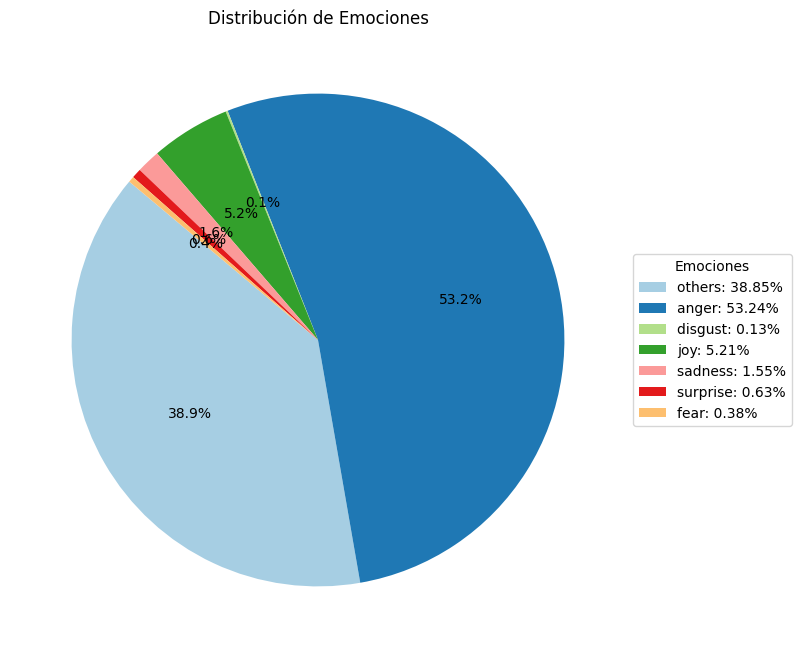

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_emotion_percentages.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Emociones")
legend_labels = [f"{emotion}: {percentage:.2f}%" for emotion, percentage in overall_emotion_percentages.items()]
ax.legend(wedges, legend_labels, title="Emociones", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [41]:
print("\nEjemplos de cada tipo de emocion:")
for sent_type, example in examples_per_emotion.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de emocion:
others: ["Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x", 'El gobierno debe crear un control estricto de inmigración en las zonas fronterizas con Colombia por q después del 20-8querrán venir en masa', 'Pablo Casado debería estudiar un máster en inmigración https://t.co/Pcz6GPJ6dG', '#Noticiasdelalinea: Detienen en Guatapanal motocicleta y nacional haitiano indocumentado https://t.co/qs9MTKddqK', 'Padres indocumentados realizaron una huelga de hambre para pedir ser liberados https://t.co/ZPuBt8kUrK https://t.co/zRentrV0Kq', 'A Tomi Alegre JAKSKKSJSJ — Cállate q tdv estoy de duelo puta https://t.co/ilHP09OzCK', 'Albondigas! Casi al estilo de las fodongas pero en el Gabacho.', 'Todos: -#NoTodosLosHombres -PPK, presidente de lujo -Perú no va al mundial 2017: Já, ilusos.', 'El juez cita a declarar a la menor que denunció abusos por parte de jugadores de la #Arandina https://t.co/vD92Mxs04Q http

--------------------------------------------


-----------------------------------------------

### Tweets de hate_speech

-----------------------------------------------


In [43]:
text_hate_speech = [text for text in df_semeval_train[df_semeval_train["hate_speech"] == 1]["text"].tolist()]
results_emotion_analysis_hate_speech = [analyze_emotion(text) for text in tqdm(text_hate_speech)]



  0%|          | 0/1833 [00:00<?, ?it/s]

  0%|          | 6/1833 [00:00<00:33, 53.75it/s]

  1%|          | 12/1833 [00:00<00:32, 55.24it/s]


-----------------------
Texto analizado: Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x
Emoción detectada: others
Probabilidades: {'others': 0.9834954142570496, 'joy': 0.003921227529644966, 'sadness': 0.0005630145315080881, 'anger': 0.0011650127125903964, 'surprise': 0.008862781338393688, 'disgust': 0.0004561698588076979, 'fear': 0.0015364506980404258}

-----------------------
Texto analizado: El gobierno debe crear un control estricto de inmigración en las zonas fronterizas con Colombia por q después del 20-8querrán venir en masa
Emoción detectada: others
Probabilidades: {'others': 0.8669195771217346, 'joy': 0.0030458334367722273, 'sadness': 0.01957804337143898, 'anger': 0.028830457478761673, 'surprise': 0.024499449878931046, 'disgust': 0.009372862055897713, 'fear': 0.04775368422269821}

-----------------------
Texto analizado: @MaivePerez Llora te lo.mereces por zorra
Emoción detectada: anger
Probabilidades: {'others': 0.



  1%|          | 18/1833 [00:00<00:33, 53.77it/s]


-----------------------
Texto analizado: Querida tú eres una puta sin llenadero.. que dicen tus hijos de tu nuevo amor? Sigues siendo su ejemplo 🤣🤣🤣
Emoción detectada: others
Probabilidades: {'others': 0.9367401003837585, 'joy': 0.0077013177797198296, 'sadness': 0.01162461843341589, 'anger': 0.027987336739897728, 'surprise': 0.005132623482495546, 'disgust': 0.0100362254306674, 'fear': 0.0007778522558510303}

-----------------------
Texto analizado: @DrodriguezVen tu eres la perra mas perra de las perras
Emoción detectada: others
Probabilidades: {'others': 0.9435835480690002, 'joy': 0.03483168035745621, 'sadness': 0.0013188993325456977, 'anger': 0.003578526433557272, 'surprise': 0.012685013003647327, 'disgust': 0.0017564625013619661, 'fear': 0.0022458757739514112}

-----------------------
Texto analizado: @MirandaLanda22 Ya callate pinche puta y celebra la navidad hija de perra
Emoción detectada: anger
Probabilidades: {'others': 0.016106605529785156, 'joy': 0.002647626446560025, 'sadne



  1%|▏         | 24/1833 [00:00<00:38, 47.56it/s]

  2%|▏         | 29/1833 [00:00<00:38, 47.41it/s]


-----------------------
Texto analizado: -¿Porque la esatua de la libertad es mujer? -Porque se nescesitaba una cabeza hueca para hacer un mirador
Emoción detectada: others
Probabilidades: {'others': 0.9551492929458618, 'joy': 0.0026829522103071213, 'sadness': 0.0046812319196760654, 'anger': 0.02356538362801075, 'surprise': 0.00823421124368906, 'disgust': 0.004153961781412363, 'fear': 0.001533044152893126}

-----------------------
Texto analizado: Comemela XDDD y la cara también!! 🤣🤣🤣🤣🤣 — No nos pasemos 👀 https://t.co/t3o5yHY0zb
Emoción detectada: others
Probabilidades: {'others': 0.5990725755691528, 'joy': 0.23372024297714233, 'sadness': 0.004130828194320202, 'anger': 0.10713404417037964, 'surprise': 0.03240848705172539, 'disgust': 0.020203810185194016, 'fear': 0.003329999977722764}

-----------------------
Texto analizado: @pauliboggino @soyunaforra cállate perra de mierda culona
Emoción detectada: anger
Probabilidades: {'others': 0.011379148811101913, 'joy': 0.0021475523244589567, 



  2%|▏         | 35/1833 [00:00<00:35, 49.98it/s]

  2%|▏         | 41/1833 [00:00<00:34, 52.69it/s]


-----------------------
Texto analizado: Se lo ha ganado a pulso, y ha sido muy comedido. Ese musulmono o se lo piensa la próxima vez. O le dan otra mayor. https://t.co/1NTIxMR11P
Emoción detectada: others
Probabilidades: {'others': 0.7953401803970337, 'joy': 0.011480001732707024, 'sadness': 0.029785633087158203, 'anger': 0.09300971031188965, 'surprise': 0.020892662927508354, 'disgust': 0.04544822499155998, 'fear': 0.0040435814298689365}

-----------------------
Texto analizado: @vibrium_ JAJAJAJAJAJA El multitasking es lo de hoy: Perra en Instagram, emo en Twitter, ridículas por Facebook y divas en WhatsApp, todo a la misma vez y sin mezclar historias.
Emoción detectada: others
Probabilidades: {'others': 0.8893954753875732, 'joy': 0.08735647797584534, 'sadness': 0.0020021693781018257, 'anger': 0.005155408754944801, 'surprise': 0.013529074378311634, 'disgust': 0.0018831102643162012, 'fear': 0.000678196782246232}

-----------------------
Texto analizado: @20m Lastima.... callate zorra!



  3%|▎         | 47/1833 [00:00<00:33, 53.85it/s]

  3%|▎         | 53/1833 [00:01<00:32, 54.02it/s]


-----------------------
Texto analizado: @KarinaFromField Tú eres mi perra, ¿yo qué culpa?
Emoción detectada: others
Probabilidades: {'others': 0.937314510345459, 'joy': 0.020147966220974922, 'sadness': 0.0062202331610023975, 'anger': 0.0194794200360775, 'surprise': 0.009935501962900162, 'disgust': 0.0033972589299082756, 'fear': 0.003505136352032423}

-----------------------
Texto analizado: @DonniPuppo JAJJAJAJ cállate perra , me lo dijo por otra cosa no x eso
Emoción detectada: others
Probabilidades: {'others': 0.7714647054672241, 'joy': 0.02910042740404606, 'sadness': 0.009011323563754559, 'anger': 0.1585574597120285, 'surprise': 0.011799126863479614, 'disgust': 0.01756267435848713, 'fear': 0.0025043042842298746}

-----------------------
Texto analizado: La policía británica permitió la violación de 1.000 niñas pobres por parte de árabes https://t.co/2uRICNLjO9 via @laotracara_co
Emoción detectada: others
Probabilidades: {'others': 0.8944797515869141, 'joy': 0.0030827526934444904, 



  3%|▎         | 59/1833 [00:01<00:32, 54.51it/s]

  4%|▎         | 65/1833 [00:01<00:32, 54.31it/s]


-----------------------
Texto analizado: @ClaMoralesM No nos confundamos, muchas mujeres posan de victimas de acoso solo con una mirada, ridículas; ¿estas se habrán comparado con lo que sufrieron las guerrilleras en las Farc por ejemplo?
Emoción detectada: anger
Probabilidades: {'others': 0.0032728330697864294, 'joy': 0.00047509215073660016, 'sadness': 0.006506701931357384, 'anger': 0.9098976254463196, 'surprise': 0.001609795494005084, 'disgust': 0.07700226455926895, 'fear': 0.0012357003288343549}

-----------------------
Texto analizado: @delockkke Cállate puta Katy Perri de los xiniyos (y nunca mejor dicho)
Emoción detectada: anger
Probabilidades: {'others': 0.20088596642017365, 'joy': 0.006968539208173752, 'sadness': 0.004262909758836031, 'anger': 0.741791844367981, 'surprise': 0.0041185785084962845, 'disgust': 0.039734113961458206, 'fear': 0.0022380922455340624}

-----------------------
Texto analizado: @Micaela2907 JAJAJAJAJAJA callate Mica zorra
Emoción detectada: others
Probabi



  4%|▍         | 71/1833 [00:01<00:32, 53.57it/s]

  4%|▍         | 77/1833 [00:01<00:32, 53.69it/s]


-----------------------
Texto analizado: @suicideroom22 Cállate que la que clava el visto sos vos Zorra 💔
Emoción detectada: anger
Probabilidades: {'others': 0.025809811428189278, 'joy': 0.002959124743938446, 'sadness': 0.006009318865835667, 'anger': 0.8754859566688538, 'surprise': 0.0012218472547829151, 'disgust': 0.08712630718946457, 'fear': 0.0013876070734113455}

-----------------------
Texto analizado: No son subsaharianos, son Negros. Que yo sepa, Sudán y Níger están en el Sáhara. #FronterasSeguras
Emoción detectada: others
Probabilidades: {'others': 0.9792773127555847, 'joy': 0.0030964238103479147, 'sadness': 0.006715694908052683, 'anger': 0.003951982595026493, 'surprise': 0.0024663947988301516, 'disgust': 0.002030767500400543, 'fear': 0.0024615623988211155}

-----------------------
Texto analizado: @lopezdoriga @dparamooficial Cállate zorra priista
Emoción detectada: anger
Probabilidades: {'others': 0.034090545028448105, 'joy': 0.0023254351690411568, 'sadness': 0.0024794223718



  5%|▍         | 83/1833 [00:01<00:36, 48.11it/s]


-----------------------
Texto analizado: @heavenskarIa Deja de provocarme maldita perra
Emoción detectada: anger
Probabilidades: {'others': 0.09842831641435623, 'joy': 0.005105933640152216, 'sadness': 0.0032266415655612946, 'anger': 0.8336285352706909, 'surprise': 0.00689800176769495, 'disgust': 0.04463200643658638, 'fear': 0.008080610074102879}

-----------------------
Texto analizado: Pregunta para la izquierda. Esta es para nota.  Si abrimos las fronteras indiscriminadamente y sin control, y un inmigrante agrede a una mujer, inmigrante también, con la que está en una relación sentimental, ¿cómo se le localiza para citarle a juicio después de la agresión?
Emoción detectada: others
Probabilidades: {'others': 0.7567660808563232, 'joy': 0.0008877922664396465, 'sadness': 0.010966205969452858, 'anger': 0.18321019411087036, 'surprise': 0.012351746670901775, 'disgust': 0.024349479004740715, 'fear': 0.011468502692878246}

-----------------------
Texto analizado: Que cuza antes la calle, una



  5%|▍         | 89/1833 [00:01<00:34, 49.89it/s]

  5%|▌         | 95/1833 [00:01<00:34, 50.68it/s]


-----------------------
Texto analizado: Uno de los refugiados del Aquarius: "Me obligaron a violar a menores y animales durante meses" (Al final los más racistas y esclavistas son otros africanos. Por eso hay que solucionar el problema un situ. Si no las mafias ganan)  https://t.co/IQLcfBOY7m vía @elmundoes
Emoción detectada: anger
Probabilidades: {'others': 0.015854964032769203, 'joy': 0.0013121969532221556, 'sadness': 0.009359368123114109, 'anger': 0.8885135054588318, 'surprise': 0.0009748444426804781, 'disgust': 0.0826205313205719, 'fear': 0.00136461085639894}

-----------------------
Texto analizado: Hay racismo cuando no creen que soy su hermana porque soy güera @unpentagono @medicenlore https://t.co/9iHeSpHOIi
Emoción detectada: anger
Probabilidades: {'others': 0.3987569212913513, 'joy': 0.002454335568472743, 'sadness': 0.02777598239481449, 'anger': 0.4906670153141022, 'surprise': 0.011494463309645653, 'disgust': 0.05816399306058884, 'fear': 0.010687354020774364}

-------------



  6%|▌         | 101/1833 [00:01<00:33, 52.25it/s]

  6%|▌         | 107/1833 [00:02<00:32, 52.57it/s]


-----------------------
Texto analizado: @ChrisPortvgal No! puedes con ese papel para ser SANTANA se requiere ser una PERRA!! desde nacimiento y tu eres demasiado Quinn Fabray es decir mosquita muerta. 😘 https://t.co/n7fjVtswRZ
Emoción detectada: others
Probabilidades: {'others': 0.8240512013435364, 'joy': 0.014334337785840034, 'sadness': 0.02586429938673973, 'anger': 0.11270791292190552, 'surprise': 0.007085297256708145, 'disgust': 0.014369657263159752, 'fear': 0.0015873356023803353}

-----------------------
Texto analizado: REFUGIADOS SI, INMIGRANTES LOS NECESARIOS Y LOS QUE REALMENTE PODAMOS ATENDER, pienso que España sólo debería acoger y de una forma ordenada a inmigrantes latinoamericanos de habla española, cristianos, que... https://t.co/mo1PM2oR2l
Emoción detectada: others
Probabilidades: {'others': 0.980952799320221, 'joy': 0.004264114890247583, 'sadness': 0.007850638590753078, 'anger': 0.004518878646194935, 'surprise': 0.0005765584646724164, 'disgust': 0.0010276957182213664,



  6%|▌         | 113/1833 [00:02<00:34, 50.37it/s]

  6%|▋         | 119/1833 [00:02<00:33, 51.68it/s]


-----------------------
Texto analizado: DEJA DE TUITEAR HIJA DE PUTA ESCUCHA LOS ARGUMENTOS QUE LUEGO TE VAS A QUEDAR CALLADA FUJIMIERDA DEL CARAJO https://t.co/np9RAv5auI
Emoción detectada: anger
Probabilidades: {'others': 0.0050796568393707275, 'joy': 0.0009640331845730543, 'sadness': 0.0011746713425964117, 'anger': 0.9309326410293579, 'surprise': 0.0007586627616547048, 'disgust': 0.05978063493967056, 'fear': 0.001309735351242125}

-----------------------
Texto analizado: @SoyDas117 @LuckasDroiidYT1 @BrandonGaming6 @LlinxaYT Y tu eres mi esposa ve a la cocina zorra >:v
Emoción detectada: others
Probabilidades: {'others': 0.8987898826599121, 'joy': 0.013170483522117138, 'sadness': 0.0024160868488252163, 'anger': 0.06653249263763428, 'surprise': 0.0043649449944496155, 'disgust': 0.012965922243893147, 'fear': 0.0017602284206077456}

-----------------------
Texto analizado: me puse un vestido con escote y mi mama dizque preciso hoy le da por vestirse como zorra jajsjajs tan linda ella,



  7%|▋         | 125/1833 [00:02<00:35, 48.52it/s]


-----------------------
Texto analizado: Esto es lo que la ONU/UNION EUROPEA/VATICANO/COMUNISTAS/SOCIALISTAS/PROGRES/NWO llevan de Africa a Europa...👇👇👇 Un inmigrante nigeriano mata y descuartiza a una joven italiana de 18 años. https://t.co/EaxYjwSsLt
Emoción detectada: anger
Probabilidades: {'others': 0.037050701677799225, 'joy': 0.002606932306662202, 'sadness': 0.026137666776776314, 'anger': 0.6590076088905334, 'surprise': 0.005313977133482695, 'disgust': 0.2602415978908539, 'fear': 0.009641517885029316}

-----------------------
Texto analizado: l #InformateEnHolaChile LOS RESEPONSABLES DEL INGRESO AL PAIS DE TANTOS INMIGRANTES DEBEN HACERSE CARGO DEL LOS PROBLEMAS DE SALUD DE ELLOS PORQUE ACTUALMENTE HAN VENIDO A AUMENTAR EL GRAVE PROBLEMA DE ATENCION MEDICA DE  CHILENOS ,OCUPANDO LAS POCAS HORAS DE ATENCION Y RECURSOS
Emoción detectada: others
Probabilidades: {'others': 0.4722391963005066, 'joy': 0.0015835773665457964, 'sadness': 0.16116593778133392, 'anger': 0.32531246542930603,



  7%|▋         | 130/1833 [00:02<00:37, 45.80it/s]

  7%|▋         | 136/1833 [00:02<00:35, 48.05it/s]


-----------------------
Texto analizado: @Everfetts Cállate y respóndeme perra
Emoción detectada: anger
Probabilidades: {'others': 0.042651329189538956, 'joy': 0.0028726819436997175, 'sadness': 0.0026592935901135206, 'anger': 0.9115932583808899, 'surprise': 0.002580931643024087, 'disgust': 0.03461842983961105, 'fear': 0.003024154342710972}

-----------------------
Texto analizado: No hay suficientes médicos españoles aqui en españa, que tienen que venir sudacas aquí a trabajar manda cojones..
Emoción detectada: anger
Probabilidades: {'others': 0.003959896042943001, 'joy': 0.0014290213584899902, 'sadness': 0.0028476209845393896, 'anger': 0.941683292388916, 'surprise': 0.0060043781995773315, 'disgust': 0.04181055724620819, 'fear': 0.0022652356419712305}

-----------------------
Texto analizado: @pprecuero @EdGrimaldo Ni tas trabajando perra callate.
Emoción detectada: anger
Probabilidades: {'others': 0.07606951892375946, 'joy': 0.002454302040860057, 'sadness': 0.003610213054344058, 'ang



  8%|▊         | 142/1833 [00:02<00:33, 50.02it/s]

  8%|▊         | 148/1833 [00:02<00:33, 49.95it/s]


-----------------------
Texto analizado: Falta que aparezca puta publicando 'feliz día de Reyes' y suba una foto enseñando el culo.
Emoción detectada: anger
Probabilidades: {'others': 0.3881083130836487, 'joy': 0.019184980541467667, 'sadness': 0.013441306538879871, 'anger': 0.4674327075481415, 'surprise': 0.020088965073227882, 'disgust': 0.08464068919420242, 'fear': 0.0071030654944479465}

-----------------------
Texto analizado: Por que las mujeres tienen cuatro labios: los dos de arriba para decir tonterias y los dos de abajo, para arreglarlas
Emoción detectada: anger
Probabilidades: {'others': 0.29753050208091736, 'joy': 0.0053756688721477985, 'sadness': 0.012211657129228115, 'anger': 0.6214619278907776, 'surprise': 0.006448519881814718, 'disgust': 0.051222849637269974, 'fear': 0.005748915486037731}

-----------------------
Texto analizado: @ikigaiguitar CÁLLATE PUTA YA VAS A VENIR POR MI CONOCIMIENTO EN PEDAGOGÍA
Emoción detectada: anger
Probabilidades: {'others': 0.11450102180242



  8%|▊         | 154/1833 [00:03<00:39, 42.75it/s]

  9%|▊         | 159/1833 [00:03<00:37, 44.36it/s]


-----------------------
Texto analizado: @THXCORPSE @alxksxndrx Cállate puta
Emoción detectada: anger
Probabilidades: {'others': 0.03412758186459541, 'joy': 0.001925277290865779, 'sadness': 0.0024130293168127537, 'anger': 0.9150135517120361, 'surprise': 0.0019103201339021325, 'disgust': 0.04289594292640686, 'fear': 0.0017143337754532695}

-----------------------
Texto analizado: @AngelZanella CÁLLATE NADIE TE PREGUNTO, PERRA
Emoción detectada: anger
Probabilidades: {'others': 0.1008792296051979, 'joy': 0.0059995162300765514, 'sadness': 0.0035285335034132004, 'anger': 0.8434218764305115, 'surprise': 0.003986014518886805, 'disgust': 0.03976445272564888, 'fear': 0.0024203716311603785}

-----------------------
Texto analizado: La unica diferencia es que a ella si le importan las cosas y tu eres una PUTA
Emoción detectada: anger
Probabilidades: {'others': 0.24147149920463562, 'joy': 0.00712236575782299, 'sadness': 0.04246139898896217, 'anger': 0.5708707571029663, 'surprise': 0.002510427962



  9%|▉         | 164/1833 [00:03<00:44, 37.56it/s]


-----------------------
Texto analizado: @mangelrogel Cállate puta etiqueta dejamos a nosotros los mortales y ve a jugar con tus números...
Emoción detectada: anger
Probabilidades: {'others': 0.03406643494963646, 'joy': 0.0012859369162470102, 'sadness': 0.004068409092724323, 'anger': 0.9175229072570801, 'surprise': 0.0010679999832063913, 'disgust': 0.04084352031350136, 'fear': 0.001144802663475275}

-----------------------
Texto analizado: ¿En que se parecen las mujeres y las polillas? En que unas comen tela y las otras te la comen. #EnTuJeta
Emoción detectada: others
Probabilidades: {'others': 0.9378842115402222, 'joy': 0.0018849963089451194, 'sadness': 0.002284760121256113, 'anger': 0.002135961316525936, 'surprise': 0.04659615084528923, 'disgust': 0.0013428773963823915, 'fear': 0.007871143519878387}

-----------------------
Texto analizado: Me maman esos casos en los que el hombre es el enculado y la mujer es bien perra, es como ver el otro lado de la moneda 🤔
Emoción detectada: oth



  9%|▉         | 169/1833 [00:03<00:43, 38.41it/s]

  9%|▉         | 174/1833 [00:03<00:44, 37.20it/s]


-----------------------
Texto analizado: Pero si son árabes chaval si ven a sus padres degollar animales to los dias https://t.co/AKojdh8TEt
Emoción detectada: anger
Probabilidades: {'others': 0.012815811671316624, 'joy': 0.001880184980109334, 'sadness': 0.0048131379298865795, 'anger': 0.8662458658218384, 'surprise': 0.00764625146985054, 'disgust': 0.10248763114213943, 'fear': 0.0041110944002866745}

-----------------------
Texto analizado: ¡JODER, QUE TE CALLES PERRA!
Emoción detectada: anger
Probabilidades: {'others': 0.026206636801362038, 'joy': 0.010307091288268566, 'sadness': 0.0015315813943743706, 'anger': 0.8917986154556274, 'surprise': 0.007230608724057674, 'disgust': 0.05998662859201431, 'fear': 0.002938939956948161}

-----------------------
Texto analizado: esta muy generalizada la idea de “puta” por enseñar el cuerpo en redes sociales cuando puta es ofrecer sexo a cambio de dinero y enseñar el cuerpo porque se me da la gana se llama MUJER LIBRE Y SEGURA DE SI MISMA https://



 10%|▉         | 180/1833 [00:03<00:41, 40.19it/s]


-----------------------
Texto analizado: @Alba_fcb14 Qué haces puta, cállate ya
Emoción detectada: anger
Probabilidades: {'others': 0.10458482801914215, 'joy': 0.005459124222397804, 'sadness': 0.0026433682069182396, 'anger': 0.839762270450592, 'surprise': 0.009583926759660244, 'disgust': 0.03444885462522507, 'fear': 0.0035176172386854887}

-----------------------
Texto analizado: 5 moros comprando reguladores de bombonas de butano, cinta, cuchillo y un hacha y a nadie de la tienda le saltó la alarma? Putos buenismos... #HechosReales
Emoción detectada: anger
Probabilidades: {'others': 0.003668164135888219, 'joy': 0.0008670160896144807, 'sadness': 0.0012979104649275541, 'anger': 0.9405229687690735, 'surprise': 0.009434681385755539, 'disgust': 0.042058639228343964, 'fear': 0.002150589134544134}

-----------------------
Texto analizado: @MaviMartinezok Callate la boca perra desgraciada
Emoción detectada: anger
Probabilidades: {'others': 0.006666373461484909, 'joy': 0.002190988278016448, '



 10%|█         | 185/1833 [00:03<00:45, 36.47it/s]

 10%|█         | 189/1833 [00:04<00:46, 35.19it/s]


-----------------------
Texto analizado: @Slutty_Bowser No es porque piense que se irán. Sino porque mereces un castigo por ser tan puta
Emoción detectada: anger
Probabilidades: {'others': 0.008924175053834915, 'joy': 0.001499621313996613, 'sadness': 0.007933408953249454, 'anger': 0.776534914970398, 'surprise': 0.0009207919356413186, 'disgust': 0.2024288773536682, 'fear': 0.001758196041919291}

-----------------------
Texto analizado: @santotv4 cuando me hicieron la casa vinieron trabajadores indocumentados de Argentina que no estaban registrados.  Mi casa fue la que expusieron en el Prado hasta el día de hoy tiene entrada de agua por todos lados y problemas enormes sin solución
Emoción detectada: anger
Probabilidades: {'others': 0.07383979856967926, 'joy': 0.0008867263677529991, 'sadness': 0.03628302738070488, 'anger': 0.812364935874939, 'surprise': 0.014083819463849068, 'disgust': 0.05379645526409149, 'fear': 0.008745255880057812}

-----------------------
Texto analizado: GorDA CALL



 11%|█         | 194/1833 [00:04<00:43, 37.79it/s]

 11%|█         | 199/1833 [00:04<00:41, 38.96it/s]


-----------------------
Texto analizado: Llegó el loquito más picante del condado, muy enojado, ta re apiolado. El que se coje a todo el patio de parado, y saca el choto todo cagado, acá en el barrio no queremos refugiados, sub 21 soy tu soldado
Emoción detectada: others
Probabilidades: {'others': 0.5354650616645813, 'joy': 0.04460320621728897, 'sadness': 0.009867309592664242, 'anger': 0.333894282579422, 'surprise': 0.015321562997996807, 'disgust': 0.05146615207195282, 'fear': 0.009382457472383976}

-----------------------
Texto analizado: Los españoles pagamos por la Sanidad, los "sin papeles" no. Esta es la política de promoción de apátridas de Sánchez. Desde luego en España hay ya varias naciones, la española, la mauritana y la tribal subsahariana. Esto no es racismo, es la realidad. La integración es un mito.
Emoción detectada: anger
Probabilidades: {'others': 0.019994836300611496, 'joy': 0.002499667461961508, 'sadness': 0.01658700406551361, 'anger': 0.8891716599464417, 'surprise'



 11%|█         | 203/1833 [00:04<00:44, 36.87it/s]


-----------------------
Texto analizado: Alarma Total 50.000 subsaharianos esperan en Marruecos para venir a España https://t.co/omscLnS3ix vía @ElDiestro_  VAMOS @sanchezcastejon   ÉCHALE GÜEVOS...............
Emoción detectada: others
Probabilidades: {'others': 0.7234401106834412, 'joy': 0.03607506304979324, 'sadness': 0.018658917397260666, 'anger': 0.12554293870925903, 'surprise': 0.06372058391571045, 'disgust': 0.01393409725278616, 'fear': 0.01862828992307186}

-----------------------
Texto analizado: Muy vien todos los negros extinguidos a tomar x culo asin no vienen a nuestro pais los putos negratas — amsSs... https://t.co/SJDxqmrApl
Emoción detectada: anger
Probabilidades: {'others': 0.004967445973306894, 'joy': 0.0020865497644990683, 'sadness': 0.002543406328186393, 'anger': 0.8232228755950928, 'surprise': 0.0009664657991379499, 'disgust': 0.16474579274654388, 'fear': 0.0014674931298941374}

-----------------------
Texto analizado: ARABIA SAUDITA, EMIRATOS ARABES, KUWAIT Y DEM



 11%|█▏        | 207/1833 [00:04<00:48, 33.44it/s]

 12%|█▏        | 211/1833 [00:04<00:48, 33.12it/s]


-----------------------
Texto analizado: Ojalá que te vuelva toda la mierda que tiras negra conchuda y la re puta madre que te re parió. Te mereces que re rompan la cabeza
Emoción detectada: anger
Probabilidades: {'others': 0.0022571345325559378, 'joy': 0.0014095869846642017, 'sadness': 0.003268451662734151, 'anger': 0.7931442260742188, 'surprise': 0.0011812770972028375, 'disgust': 0.19597819447517395, 'fear': 0.002761132549494505}

-----------------------
Texto analizado: @AgusBenve10 Callate puta loca si sos un quebrado
Emoción detectada: anger
Probabilidades: {'others': 0.054225388914346695, 'joy': 0.004464716650545597, 'sadness': 0.00392187712714076, 'anger': 0.8294665217399597, 'surprise': 0.002934042364358902, 'disgust': 0.10238280892372131, 'fear': 0.002604698296636343}

-----------------------
Texto analizado: VOY A PUBLICAR TU FOTO EN LA PRENSA PA QUE LA GENTE LO SEPA QUE TU ERES TREMENDA PERRA HIJUEPUTAAAAAAAA.
Emoción detectada: anger
Probabilidades: {'others': 0.0996745899



 12%|█▏        | 215/1833 [00:04<00:48, 33.15it/s]

 12%|█▏        | 219/1833 [00:04<00:50, 32.21it/s]


-----------------------
Texto analizado: No se puede jugar con sudacas niño, tienen el wifi enchufado a la bombilla
Emoción detectada: others
Probabilidades: {'others': 0.9792026877403259, 'joy': 0.004159119445830584, 'sadness': 0.003212437964975834, 'anger': 0.008645954541862011, 'surprise': 0.0015591677511110902, 'disgust': 0.0022263352293521166, 'fear': 0.0009942377218976617}

-----------------------
Texto analizado: Me choca el niño güero hippie new age poliamoroso de la academia.
Emoción detectada: anger
Probabilidades: {'others': 0.3122371435165405, 'joy': 0.018124088644981384, 'sadness': 0.022701850160956383, 'anger': 0.434048056602478, 'surprise': 0.04990338534116745, 'disgust': 0.09099876135587692, 'fear': 0.07198670506477356}

-----------------------
Texto analizado: De mis punterías. Tu eres la puta mayor
Emoción detectada: others
Probabilidades: {'others': 0.9594476222991943, 'joy': 0.02075197361409664, 'sadness': 0.0014505938161164522, 'anger': 0.005989360623061657, 'surp



 12%|█▏        | 223/1833 [00:05<00:48, 33.40it/s]


-----------------------
Texto analizado: Pues francamente sería raro.  Como veros a vosotros en la mierda de los Goya denunciando a Maduro, las violaciones cometidas por manadas magrebíes, o el trato de favor a fuertes subsaharianos frente a nuestros débiles y cansados abuelos.  #FelizDomingo https://t.co/1tPqs65eXZ
Emoción detectada: anger
Probabilidades: {'others': 0.004835663828998804, 'joy': 0.000601732695940882, 'sadness': 0.017057841643691063, 'anger': 0.7906998991966248, 'surprise': 0.000787660013884306, 'disgust': 0.1842155158519745, 'fear': 0.0018017332768067718}

-----------------------
Texto analizado: @amparolasheras @gabrielrufian Amparo un porro Amparo po zi😂😂😂era bastante mejor persona q tú pq tú eres una perra sarnosa ponte el chip por si te escapas https://t.co/aoxLoYaW95
Emoción detectada: others
Probabilidades: {'others': 0.7445062398910522, 'joy': 0.02275790460407734, 'sadness': 0.006281052716076374, 'anger': 0.1684514582157135, 'surprise': 0.0051248762756586075, '



 12%|█▏        | 227/1833 [00:05<00:50, 31.99it/s]

 13%|█▎        | 231/1833 [00:05<00:52, 30.64it/s]


-----------------------
Texto analizado: Currently reading https://t.co/aBtfL4OvM1 CUANDO VAYAN PERDIENDO EL MIEDO SE IRAN HACIENDO DUEÑOS DE LAS CALLES EN FORMA VIOLENTA
Emoción detectada: others
Probabilidades: {'others': 0.9772093296051025, 'joy': 0.0006471508531831205, 'sadness': 0.004907486028969288, 'anger': 0.003813985036686063, 'surprise': 0.0029411937575787306, 'disgust': 0.0016570183215662837, 'fear': 0.00882382970303297}

-----------------------
Texto analizado: @LVidegaray #Urgente parar inmigracion legal o ilegal a Mexico donde Criminales y Terroristas de otros paises , toman al Pais como Refugio de su criminalidad #RevolucionIndestructible
Emoción detectada: anger
Probabilidades: {'others': 0.014072458259761333, 'joy': 0.0006946095381863415, 'sadness': 0.005560709163546562, 'anger': 0.897926390171051, 'surprise': 0.0013054090086370707, 'disgust': 0.07786780595779419, 'fear': 0.002572570228949189}

-----------------------
Texto analizado: Que les pasa a todos que me quier



 13%|█▎        | 236/1833 [00:05<00:46, 34.43it/s]


-----------------------
Texto analizado: @Rockefort100 Hahaha, me das risa. Mejor cállate y no te metas donde no te mencionan, perra llorona.
Emoción detectada: anger
Probabilidades: {'others': 0.2711428999900818, 'joy': 0.01183372177183628, 'sadness': 0.01519247330725193, 'anger': 0.6224371790885925, 'surprise': 0.005189694929867983, 'disgust': 0.06989672780036926, 'fear': 0.004307373892515898}

-----------------------
Texto analizado: @LuciaAvelino3 pero cállate vos perra (hoy no estoy creativo para putear)
Emoción detectada: others
Probabilidades: {'others': 0.6058631539344788, 'joy': 0.013773304410278797, 'sadness': 0.005109594669193029, 'anger': 0.3474688231945038, 'surprise': 0.003898770548403263, 'disgust': 0.02155492641031742, 'fear': 0.0023313749115914106}

-----------------------
Texto analizado: Más de putos moros  https://t.co/7csHuuOvzP
Emoción detectada: anger
Probabilidades: {'others': 0.06775307655334473, 'joy': 0.003302074735984206, 'sadness': 0.0042185671627521515, '



 13%|█▎        | 240/1833 [00:05<00:55, 28.75it/s]


-----------------------
Texto analizado: @DylanCabj_1905 si imbecil mas vale que no te vayas con ninguna zorra
Emoción detectada: anger
Probabilidades: {'others': 0.006748570129275322, 'joy': 0.002328278962522745, 'sadness': 0.002549561904743314, 'anger': 0.8068493604660034, 'surprise': 0.0013698992552235723, 'disgust': 0.17800751328468323, 'fear': 0.0021468305494636297}

-----------------------
Texto analizado: @ArmadaEspaola TU ERES UNA PUTA DE NOM GUARRA.
Emoción detectada: anger
Probabilidades: {'others': 0.19091543555259705, 'joy': 0.013366006314754486, 'sadness': 0.004145692102611065, 'anger': 0.6929028630256653, 'surprise': 0.00817911233752966, 'disgust': 0.08478450030088425, 'fear': 0.005706363823264837}

-----------------------
Texto analizado: Y el inmigrante recibe ayuda del rico Estado ladrón, que se olvida de los nacionales, mientras nos viola y mata. Pintada con una verdad a medias. https://t.co/4icBlhB3j9
Emoción detectada: anger
Probabilidades: {'others': 0.00267799175



 13%|█▎        | 244/1833 [00:05<01:02, 25.52it/s]

 14%|█▎        | 248/1833 [00:05<00:55, 28.40it/s]

 14%|█▍        | 253/1833 [00:06<00:48, 32.39it/s]


-----------------------
Texto analizado: @danielanatt Callate que ni me contestaste, ahora te voy a ignorar puta
Emoción detectada: anger
Probabilidades: {'others': 0.06881856173276901, 'joy': 0.008212098851799965, 'sadness': 0.00731859914958477, 'anger': 0.8610762357711792, 'surprise': 0.0017785333329811692, 'disgust': 0.050360534340143204, 'fear': 0.0024354569613933563}

-----------------------
Texto analizado: @Aguus_Donan Callate que tu mama esta re perra o no @FranciisAlvarez ?
Emoción detectada: others
Probabilidades: {'others': 0.6711023449897766, 'joy': 0.004842874128371477, 'sadness': 0.006997773423790932, 'anger': 0.26628103852272034, 'surprise': 0.010081353597342968, 'disgust': 0.03526745364069939, 'fear': 0.005427184980362654}

-----------------------
Texto analizado: @UlyssesAral Jajajajaja cállate pinche perra, Gaga es perfecta ok?
Emoción detectada: others
Probabilidades: {'others': 0.5448312163352966, 'joy': 0.055808138102293015, 'sadness': 0.012149723246693611, 'anger



 14%|█▍        | 257/1833 [00:06<00:50, 31.08it/s]


-----------------------
Texto analizado: Mierda para aquellos que saltan la valla de Melilla y Ceuta. Cabrones que solo queréis venir a violar y pasaríamos pipa! Quedaros allí y no queréis más a las fuerzas del estado con cal viva! No soy racista pero si persona y ya estamos artos!!!
Emoción detectada: anger
Probabilidades: {'others': 0.0012960636522620916, 'joy': 0.001072194892913103, 'sadness': 0.0018785763531923294, 'anger': 0.8745185732841492, 'surprise': 0.0005264023784548044, 'disgust': 0.11977782100439072, 'fear': 0.000930440379306674}

-----------------------
Texto analizado: Y si obvio nada mas lindo q dormir, aparte callate puta https://t.co/TkZ4OulJ4g
Emoción detectada: others
Probabilidades: {'others': 0.7376858592033386, 'joy': 0.037730466574430466, 'sadness': 0.009530222974717617, 'anger': 0.18315166234970093, 'surprise': 0.010861287824809551, 'disgust': 0.0187677051872015, 'fear': 0.002272790065035224}

-----------------------
Texto analizado: nos estamos dando cuenta t



 14%|█▍        | 261/1833 [00:06<00:56, 27.67it/s]

 14%|█▍        | 264/1833 [00:06<00:56, 27.89it/s]


-----------------------
Texto analizado: No es machismo pero yo creo que las mujeres son inferiores que los hombres. Lo que hay que leer.
Emoción detectada: others
Probabilidades: {'others': 0.9569142460823059, 'joy': 0.002621791325509548, 'sadness': 0.009253543801605701, 'anger': 0.013278605416417122, 'surprise': 0.01089145615696907, 'disgust': 0.004477885086089373, 'fear': 0.0025624511763453484}

-----------------------
Texto analizado: @SombriXX @aixiNOOO @InesArrimadas Callaté perra, que es la cuenta B de arrimadas?? 😱😱
Emoción detectada: anger
Probabilidades: {'others': 0.02866213768720627, 'joy': 0.0026285951025784016, 'sadness': 0.0016284656012430787, 'anger': 0.8708551526069641, 'surprise': 0.0038645067252218723, 'disgust': 0.08986597508192062, 'fear': 0.002495197579264641}

-----------------------
Texto analizado: @KarenLoveNow Qué buenos vídeos! Eso y más te mereces por puta y caliente. Todavía te faltó uno más en la boca.
Emoción detectada: others
Probabilidades: {'others':



 15%|█▍        | 267/1833 [00:06<00:55, 28.06it/s]

 15%|█▍        | 271/1833 [00:06<00:50, 30.87it/s]


-----------------------
Texto analizado: Démosle papeles a todos, sanidad, pagas, que vendan sin problema productos falsificados (para el beneficio de mafias) y quejemonos la las siguientes subidas de impuestos. España, ser cool es caro
Emoción detectada: anger
Probabilidades: {'others': 0.15236875414848328, 'joy': 0.005719249602407217, 'sadness': 0.03860349953174591, 'anger': 0.7551621198654175, 'surprise': 0.001757609541527927, 'disgust': 0.043484777212142944, 'fear': 0.002903952496126294}

-----------------------
Texto analizado: @TRANQUlLlTA Oye callate que si te molesta pues no mires el chat y deja ya de llamar la atención guarra, mi Instagram es trussypussy25 chavales
Emoción detectada: anger
Probabilidades: {'others': 0.05512390658259392, 'joy': 0.00448952428996563, 'sadness': 0.0024731173180043697, 'anger': 0.9000864028930664, 'surprise': 0.0022213419433683157, 'disgust': 0.03354638069868088, 'fear': 0.002059393562376499}

-----------------------
Texto analizado: @BamAlondra y



 15%|█▌        | 275/1833 [00:06<00:48, 32.03it/s]

 15%|█▌        | 279/1833 [00:06<00:46, 33.12it/s]


-----------------------
Texto analizado: @cecicarral @juliamengo Callate puta
Emoción detectada: anger
Probabilidades: {'others': 0.03592604026198387, 'joy': 0.0019391606329008937, 'sadness': 0.002545577473938465, 'anger': 0.8988909125328064, 'surprise': 0.002038189209997654, 'disgust': 0.0567973256111145, 'fear': 0.0018628649413585663}

-----------------------
Texto analizado: #EXCLUSIVA:  Pablo Casado propone colgar jamones, morcillas y salchichones en la valla de Melilla, para evitar que los musulmanes la salten.
Emoción detectada: others
Probabilidades: {'others': 0.9848362803459167, 'joy': 0.0016742805019021034, 'sadness': 0.0019055866869166493, 'anger': 0.004493482876569033, 'surprise': 0.002941071055829525, 'disgust': 0.001957185799255967, 'fear': 0.002192232757806778}

-----------------------
Texto analizado: @mendezr_agus jajajajajajaja perra te lo merecías
Emoción detectada: others
Probabilidades: {'others': 0.7035543918609619, 'joy': 0.2513590157032013, 'sadness': 0.0027764



 15%|█▌        | 283/1833 [00:07<00:58, 26.67it/s]


-----------------------
Texto analizado: No es a huevo venir con tus tops y enseñando en el gym pinche puta, vine a entrenar no a saber de qué manera te la puedo meter.
Emoción detectada: anger
Probabilidades: {'others': 0.23205159604549408, 'joy': 0.007239092141389847, 'sadness': 0.007513436023145914, 'anger': 0.7208040356636047, 'surprise': 0.004141306504607201, 'disgust': 0.025449853390455246, 'fear': 0.0028006755746901035}

-----------------------
Texto analizado: @FRivero2 @diegoalvarezmgl ¡Sí se puede! Todos los imbéciles que estarán jaleando a Reverte por dejar a esa zorra lesbiana en su sitio. Al menos el asco que da Reverte es parte de un personaje que le da de comer, los otros lo hacen gratis.
Emoción detectada: anger
Probabilidades: {'others': 0.00212875846773386, 'joy': 0.0009250477887690067, 'sadness': 0.003904932178556919, 'anger': 0.7699074149131775, 'surprise': 0.0006971900584176183, 'disgust': 0.2211897373199463, 'fear': 0.0012469561770558357}

-----------------------



 16%|█▌        | 286/1833 [00:07<01:03, 24.26it/s]


-----------------------
Texto analizado: @GladisDiputada @Almagro_OEA2015 @OEA_oficial VIEJA CEROTA HIJA DE LA GRAN PUTA CALLATE MALDITA PERRA.
Emoción detectada: anger
Probabilidades: {'others': 0.005126905161887407, 'joy': 0.001410210970789194, 'sadness': 0.0016198004595935345, 'anger': 0.9296707510948181, 'surprise': 0.0014178847195580602, 'disgust': 0.05884252488613129, 'fear': 0.0019118485506623983}

-----------------------
Texto analizado: @CandeeLucero_ @MLauttaro Cállate puta
Emoción detectada: anger
Probabilidades: {'others': 0.03412758186459541, 'joy': 0.001925277290865779, 'sadness': 0.0024130293168127537, 'anger': 0.9150135517120361, 'surprise': 0.0019103201339021325, 'disgust': 0.04289594292640686, 'fear': 0.0017143337754532695}

-----------------------
Texto analizado: @yasmicabaleiro Jajajajaja callate zorra vieja jajaja, ya aprobé una, demasiado jajajaja
Emoción detectada: others
Probabilidades: {'others': 0.5333300232887268, 'joy': 0.40539950132369995, 'sadness': 0.00



 16%|█▌        | 290/1833 [00:07<01:00, 25.68it/s]

 16%|█▌        | 293/1833 [00:07<01:01, 24.92it/s]


-----------------------
Texto analizado: Miles d españoles licenciados q se han ido, o se han quedado, y se dedican a servir cafés a extranjeros ni 1 página  Al único negro q parece q no quiere dedicarse robar, vender droga, violar y vivir d paguitas titular a toda página  #NosTomanPorImbéciles  https://t.co/2pR0YPtNCA
Emoción detectada: anger
Probabilidades: {'others': 0.0020551569759845734, 'joy': 0.0008554710075259209, 'sadness': 0.005125728435814381, 'anger': 0.8741129636764526, 'surprise': 0.00047238057595677674, 'disgust': 0.11666031926870346, 'fear': 0.0007179057574830949}

-----------------------
Texto analizado: @Sucubo25 Ven ami MD, te enseñaré lo que es placer puta
Emoción detectada: others
Probabilidades: {'others': 0.8532218933105469, 'joy': 0.12482278048992157, 'sadness': 0.0037685118149966, 'anger': 0.003655835520476103, 'surprise': 0.00658230297267437, 'disgust': 0.0045407903380692005, 'fear': 0.003407915821298957}

-----------------------
Texto analizado: @elisacarrio



 16%|█▌        | 296/1833 [00:07<01:04, 23.98it/s]

 16%|█▋        | 301/1833 [00:07<00:52, 29.44it/s]


-----------------------
Texto analizado: Ya ando bien pedo mi razita, mi vieja bailando la muy puta enseñando las nalgas.
Emoción detectada: others
Probabilidades: {'others': 0.9735273718833923, 'joy': 0.01872471161186695, 'sadness': 0.0019024636130779982, 'anger': 0.0016114824684336782, 'surprise': 0.002256711944937706, 'disgust': 0.0008633527904748917, 'fear': 0.0011140345595777035}

-----------------------
Texto analizado: @toxiclxui tú eres mi puta no, mi putisima favorita❤
Emoción detectada: others
Probabilidades: {'others': 0.9497032165527344, 'joy': 0.02071244828402996, 'sadness': 0.001524471677839756, 'anger': 0.01606399193406105, 'surprise': 0.007430035620927811, 'disgust': 0.002925807610154152, 'fear': 0.0016399285523220897}

-----------------------
Texto analizado: @Mzavalagc Pinche-perra asesina de los niños de la guarderia abc.vete tu eres la peor delincuente, corrupta ratera, asesina , mierda, chorrillo, de la mierda llamada calderrata y de todos los- delincuentes quevte



 17%|█▋        | 307/1833 [00:07<00:42, 35.90it/s]

 17%|█▋        | 312/1833 [00:08<00:39, 38.03it/s]


-----------------------
Texto analizado: @showproblemaC9 YO CREO KE LA MUJER ES UNA ALTA ZORRA....!!!!
Emoción detectada: others
Probabilidades: {'others': 0.8700354099273682, 'joy': 0.010464482940733433, 'sadness': 0.0035131608601659536, 'anger': 0.019382070749998093, 'surprise': 0.07446927577257156, 'disgust': 0.015055431053042412, 'fear': 0.007080248557031155}

-----------------------
Texto analizado: La cobertura sanitaria a los 820.000 sin papeles costará a los españoles 2.000 millones de euros
Emoción detectada: others
Probabilidades: {'others': 0.6747826337814331, 'joy': 0.016222726553678513, 'sadness': 0.08071485161781311, 'anger': 0.17743521928787231, 'surprise': 0.009412520565092564, 'disgust': 0.036295950412750244, 'fear': 0.005136128980666399}

-----------------------
Texto analizado: Mi papá me acaba de enseñar un video de una perra estresada y me dijo que era yo. 🙄🙄
Emoción detectada: others
Probabilidades: {'others': 0.9403045177459717, 'joy': 0.006962368730455637, 'sad



 17%|█▋        | 316/1833 [00:08<00:41, 36.85it/s]


-----------------------
Texto analizado: La infaltable oxigenada aspiracional. Una pobre y patética copia sudaka d TODO lo ke hacen los gringos. ¿Qué irá a hacer esta farándula-edil cuando los gringos se les ocurra comer caca? https://t.co/XoPGn66cfv
Emoción detectada: anger
Probabilidades: {'others': 0.019764037802815437, 'joy': 0.0010562934912741184, 'sadness': 0.007384645752608776, 'anger': 0.7442901730537415, 'surprise': 0.0018579912139102817, 'disgust': 0.22328060865402222, 'fear': 0.0023662447929382324}

-----------------------
Texto analizado: mi novia es más puta que la tuya
Emoción detectada: others
Probabilidades: {'others': 0.8855341076850891, 'joy': 0.017550671473145485, 'sadness': 0.007302664220333099, 'anger': 0.05495741590857506, 'surprise': 0.007105796132236719, 'disgust': 0.023668695241212845, 'fear': 0.003880622796714306}

-----------------------
Texto analizado: @IaraPicatto1 Callate que yo tmb te extraño perra
Emoción detectada: others
Probabilidades: {'others': 0.



 17%|█▋        | 320/1833 [00:08<00:45, 33.52it/s]

 18%|█▊        | 324/1833 [00:08<00:48, 30.86it/s]


-----------------------
Texto analizado: Mientras los manteros atacan a turistas y hay reyertas en el Raval, Ada Colau ha visitado el pueblo italiano de Riace, repoblado dando casas a inmigrantes y refugiados, un "ejemplo de acogida, integración y lucha contra la xenofobia". Pues que se quede allí. Indefinidamente.
Emoción detectada: anger
Probabilidades: {'others': 0.08493556082248688, 'joy': 0.014010174199938774, 'sadness': 0.03827422112226486, 'anger': 0.7411401867866516, 'surprise': 0.0016782634193077683, 'disgust': 0.11656523495912552, 'fear': 0.003396310843527317}

-----------------------
Texto analizado: Gorda chaconda.. tu eres por mi polla la mujer perfecta.. quiero ver todo el tuyo cuerpo da BBW mueverse sobra de mi.. 😍@SamyBBW
Emoción detectada: others
Probabilidades: {'others': 0.6484538912773132, 'joy': 0.3227311372756958, 'sadness': 0.004271460697054863, 'anger': 0.009504496119916439, 'surprise': 0.008341134525835514, 'disgust': 0.003699757158756256, 'fear': 0.0029981711



 18%|█▊        | 328/1833 [00:08<00:55, 27.31it/s]


-----------------------
Texto analizado: En su país, árabe, que desconozco ni me importa, habrá Pena de Muerte. De acuerdo, que la ejecuten según sus extrañas y repugnantes leyes. Por favor, salven a ese niño. No tiene culpa de nada. Es inocente y merece oportunidades. Dónde coño está la ONU, UNICEF, UNESCO y su farsa? https://t.co/mT1Yu4iXS1
Emoción detectada: anger
Probabilidades: {'others': 0.0010778596624732018, 'joy': 0.00038552883779630065, 'sadness': 0.0035241148434579372, 'anger': 0.9055131077766418, 'surprise': 0.0005644024931825697, 'disgust': 0.08794981241226196, 'fear': 0.0009851782815530896}

-----------------------
Texto analizado: @ernestog_v Cállate el hocico perra, básica tu gfa y otras ciertas personas que conocemos jeje, lo puse por cosas que me han pasado y ahora finalmente me han hecho pensar así, mejor ve a joder a tu minion fav ok, d antemano grax
Emoción detectada: anger
Probabilidades: {'others': 0.07147973030805588, 'joy': 0.002859662054106593, 'sadness': 0.0



 18%|█▊        | 331/1833 [00:08<00:55, 27.07it/s]

 18%|█▊        | 335/1833 [00:08<00:54, 27.46it/s]


-----------------------
Texto analizado: @zvonimirsoldo @FOXSports_Chile No quería empezar el año puteando pero vo te mereces unas chuchas tonto sapo y la ctm rata perra culia :)
Emoción detectada: anger
Probabilidades: {'others': 0.020584017038345337, 'joy': 0.003259776160120964, 'sadness': 0.0027509399224072695, 'anger': 0.8920184969902039, 'surprise': 0.0010686620371416211, 'disgust': 0.07890833914279938, 'fear': 0.0014097390230745077}

-----------------------
Texto analizado: @come_hombres Agrega puta zorra yo te uso como te mereces y te ago mas puta de lo que ya eres
Emoción detectada: others
Probabilidades: {'others': 0.47297826409339905, 'joy': 0.009869908913969994, 'sadness': 0.006743823178112507, 'anger': 0.4368360936641693, 'surprise': 0.0058069778606295586, 'disgust': 0.06317955255508423, 'fear': 0.004585314076393843}

-----------------------
Texto analizado: Los traficantes de inmigrantes Proactiva Open Arms están dando vueltas entre Cerdeña y Túnez con 87 inmigrantes.Malt



 18%|█▊        | 339/1833 [00:09<00:51, 29.11it/s]

 19%|█▊        | 342/1833 [00:09<00:52, 28.67it/s]


-----------------------
Texto analizado: Sabes porque las mujeres van vestidas de blanco el dia de la boda ; para hacer juego con el microondas,la nevera,la lavadora...
Emoción detectada: others
Probabilidades: {'others': 0.972625732421875, 'joy': 0.009229683317244053, 'sadness': 0.004321832209825516, 'anger': 0.005145851522684097, 'surprise': 0.005470283795148134, 'disgust': 0.0018595505971461535, 'fear': 0.0013470468111336231}

-----------------------
Texto analizado: @ClaudiaRocaL Pero si tú eres la primera en poner peros cuando te digo para salir, PERRA
Emoción detectada: anger
Probabilidades: {'others': 0.03020409494638443, 'joy': 0.003698068205267191, 'sadness': 0.0025073576252907515, 'anger': 0.9303897619247437, 'surprise': 0.005139684770256281, 'disgust': 0.026015030220150948, 'fear': 0.002045999513939023}

-----------------------
Texto analizado: @McctaraStefy Callate que nos amas perra en celos
Emoción detectada: others
Probabilidades: {'others': 0.5112788677215576, 'joy': 0



 19%|█▉        | 345/1833 [00:09<00:54, 27.36it/s]

 19%|█▉        | 348/1833 [00:09<00:54, 27.19it/s]


-----------------------
Texto analizado: Eliminar el cáncer del top manta subsahariano en #Barcelona con 3 medidas de oro: 1)detener a "sindicatos" de delincuentes que encima van por ahí como interlocutores, 2)repatriaciones masivas a África, 3)cierre y repatriaciones masivas de chinos proveedores.
Emoción detectada: anger
Probabilidades: {'others': 0.04217612370848656, 'joy': 0.0032591556664556265, 'sadness': 0.007461897097527981, 'anger': 0.8486191630363464, 'surprise': 0.002665807493031025, 'disgust': 0.09415747970342636, 'fear': 0.001660453504882753}

-----------------------
Texto analizado: LA MUJER ES MUY ZORRA,SABE COMO Y Q HACER,PARA CAGAR A UN TIPO,MAS SI EL TIPO ESTA ENAMORADO,o es un boludo,que le cree todo,le compra todo,le da todos los gustos,y termina cagado,,Yo solo quiero recuperar a mi hijo,,esa mina,se lo llevo,no me deja verlo, https://t.co/LC56ZBBOli
Emoción detectada: anger
Probabilidades: {'others': 0.0072971186600625515, 'joy': 0.0015019223792478442, 'sadness': 



 19%|█▉        | 351/1833 [00:09<00:53, 27.51it/s]

 19%|█▉        | 354/1833 [00:09<00:57, 25.72it/s]


-----------------------
Texto analizado: Te mereces todo lo mejor Pero no en esta Vida pinche puta.
Emoción detectada: anger
Probabilidades: {'others': 0.09331053495407104, 'joy': 0.010776863433420658, 'sadness': 0.02591894567012787, 'anger': 0.7589423656463623, 'surprise': 0.002973410300910473, 'disgust': 0.10360094904899597, 'fear': 0.004476884379982948}

-----------------------
Texto analizado: @patty_m_i Jajajajajaja que perra cállate // resolución de 2018 poner atención
Emoción detectada: others
Probabilidades: {'others': 0.8883541822433472, 'joy': 0.011027788743376732, 'sadness': 0.0018644495867192745, 'anger': 0.07158232480287552, 'surprise': 0.017757700756192207, 'disgust': 0.007410216145217419, 'fear': 0.0020032748579978943}

-----------------------
Texto analizado: @vanesatrz94 Las mujeres son pendejas aquí y en Francia. Una cosa es el ligue y otra el acoso sexual salu2
Emoción detectada: anger
Probabilidades: {'others': 0.05724688991904259, 'joy': 0.001341304276138544, 'sad



 20%|█▉        | 358/1833 [00:09<00:51, 28.53it/s]

 20%|█▉        | 363/1833 [00:09<00:43, 33.56it/s]


-----------------------
Texto analizado: @xarita327 @TRIKYHUMOR @yonier2012 @casTa1326 @LizMontoyapan30 @El_SuperRaton @changodepravado Cállate puta!!
Emoción detectada: anger
Probabilidades: {'others': 0.011648890562355518, 'joy': 0.001599673181772232, 'sadness': 0.0015245805261656642, 'anger': 0.9433806538581848, 'surprise': 0.0014483832055702806, 'disgust': 0.0391261912882328, 'fear': 0.0012715959455817938}

-----------------------
Texto analizado: En que se parece una mujer a un cientifico? En que al cientifico le pasan cosas por la cabeza, y a la mujer le pasan cabezas por la cosa
Emoción detectada: others
Probabilidades: {'others': 0.936570405960083, 'joy': 0.0018446490867063403, 'sadness': 0.0040490408428013325, 'anger': 0.014202596619725227, 'surprise': 0.028661265969276428, 'disgust': 0.005871343892067671, 'fear': 0.008800702169537544}

-----------------------
Texto analizado: @CarmeBarcelo @3gerardpique Una polla de 30 cm te hace falta para estar ocupada y no decir tonterias



 20%|██        | 367/1833 [00:09<00:42, 34.83it/s]


-----------------------
Texto analizado: Su novia es puta
Emoción detectada: others
Probabilidades: {'others': 0.8288010358810425, 'joy': 0.07348179072141647, 'sadness': 0.028393197804689407, 'anger': 0.023877141997218132, 'surprise': 0.021835030987858772, 'disgust': 0.017283810302615166, 'fear': 0.006328007206320763}

-----------------------
Texto analizado: @flasherius callate zorra del orto estoy en wilde dame bola
Emoción detectada: anger
Probabilidades: {'others': 0.10140781849622726, 'joy': 0.0042852312326431274, 'sadness': 0.004028611350804567, 'anger': 0.8341500163078308, 'surprise': 0.004477555863559246, 'disgust': 0.047021862119436264, 'fear': 0.004628934897482395}

-----------------------
Texto analizado: @Franciscodagst no veo la correa de perra para que te traten como mereces
Emoción detectada: others
Probabilidades: {'others': 0.9702685475349426, 'joy': 0.0036797570064663887, 'sadness': 0.004066776018589735, 'anger': 0.017666682600975037, 'surprise': 0.001293110894039273



 20%|██        | 371/1833 [00:10<00:50, 28.78it/s]


-----------------------
Texto analizado: Matan gente con Sindrome de Down y no pueden ejecutar a las decenas de árabes https://t.co/23SHlTl6fd
Emoción detectada: sadness
Probabilidades: {'others': 0.22877469658851624, 'joy': 0.0038175657391548157, 'sadness': 0.3211669921875, 'anger': 0.27344271540641785, 'surprise': 0.00899689830839634, 'disgust': 0.13781733810901642, 'fear': 0.02598375640809536}

-----------------------
Texto analizado: @Hdeftz @SPAINonymous @DieAntfood @Lionconk Sería para partirse la polla si ahora yo pongo que todas las mujeres son basura.
Emoción detectada: anger
Probabilidades: {'others': 0.007736119907349348, 'joy': 0.00159464159514755, 'sadness': 0.0022593082394450903, 'anger': 0.8712108731269836, 'surprise': 0.001574051333591342, 'disgust': 0.11444773524999619, 'fear': 0.0011773124570026994}

-----------------------
Texto analizado: @xxxAirol @HealP_ @xxxeyeless Cállate puta perra después quieres que nosea mamón contigo puta perra deja de creerte gringa si na



 20%|██        | 375/1833 [00:10<00:54, 26.83it/s]

 21%|██        | 378/1833 [00:10<01:04, 22.70it/s]


-----------------------
Texto analizado: PFFFFFFFT. Ya wish, güera.
Emoción detectada: others
Probabilidades: {'others': 0.9582712650299072, 'joy': 0.008445465937256813, 'sadness': 0.010880202054977417, 'anger': 0.004905632231384516, 'surprise': 0.010743756778538227, 'disgust': 0.0028170126024633646, 'fear': 0.00393668282777071}

-----------------------
Texto analizado: @aguus_nanni Aaaaa callate maldita perra que vos tambien me tenes abandonada
Emoción detectada: anger
Probabilidades: {'others': 0.058744557201862335, 'joy': 0.007999861612915993, 'sadness': 0.007858354598283768, 'anger': 0.8483341336250305, 'surprise': 0.0028019119054079056, 'disgust': 0.07009561359882355, 'fear': 0.004165530204772949}

-----------------------
Texto analizado: -MACHISTA! -Machista ¡¿yo?! -Machista Dios que os hizo inferiores
Emoción detectada: anger
Probabilidades: {'others': 0.1443185657262802, 'joy': 0.07592517137527466, 'sadness': 0.007163739297538996, 'anger': 0.42166662216186523, 'surprise': 0.28



 21%|██        | 382/1833 [00:10<00:57, 25.13it/s]


-----------------------
Texto analizado: En estas noticias siempre me voy a leer el final.  Sí. Ahí donde pone eso de: "...un individuo de origen MAGREBÍ..."  Y si no lo encuentro entonces sé que era SUBSAHARIANO.  #inmigración #InmigrantesNO #inmigrantes  #africanos  https://t.co/damfo31UhG
Emoción detectada: others
Probabilidades: {'others': 0.985451877117157, 'joy': 0.0028066900558769703, 'sadness': 0.007002262398600578, 'anger': 0.0010229921899735928, 'surprise': 0.0022616160567849874, 'disgust': 0.00048323257942683995, 'fear': 0.0009713958716019988}

-----------------------
Texto analizado: Me encanta mi vestido de mujerzuela zorra suripanta. No se los voa enseñar…aún.
Emoción detectada: others
Probabilidades: {'others': 0.5214323997497559, 'joy': 0.45425891876220703, 'sadness': 0.006824796553701162, 'anger': 0.006879330612719059, 'surprise': 0.005343898665159941, 'disgust': 0.0033320817165076733, 'fear': 0.001928604324348271}

-----------------------
Texto analizado: Ya por fin 



 21%|██        | 386/1833 [00:10<00:56, 25.80it/s]

 21%|██        | 389/1833 [00:10<00:56, 25.71it/s]


-----------------------
Texto analizado: Enferma hija de mil puta y la concha gorda que te pario soreta te mereces una muerte lenta y dolorosa, te odio te odio te odio te odio gorda cinica https://t.co/UZU726enuv
Emoción detectada: anger
Probabilidades: {'others': 0.002271887846291065, 'joy': 0.0015908604254946113, 'sadness': 0.002501174807548523, 'anger': 0.7941167950630188, 'surprise': 0.0010116837220266461, 'disgust': 0.19636058807373047, 'fear': 0.0021470237988978624}

-----------------------
Texto analizado: @Cassini63376220 @progre_el @ahorapodemos Con q vengan muchos ya sobra, aquí. Hay demasiados d todos. Subsaharianos en las calles tirados, manteros perjudicando comercios legales y vendiendo copias, marroquíes donde trabaja el y viven la mujer 4 niños y 4 abuelos. En ciudades y pueblos estamos llenos. A su casa!
Emoción detectada: anger
Probabilidades: {'others': 0.00768676633015275, 'joy': 0.002325379755347967, 'sadness': 0.011720851063728333, 'anger': 0.904227614402771, 'su



 22%|██▏       | 396/1833 [00:10<00:40, 35.33it/s]

 22%|██▏       | 403/1833 [00:11<00:33, 43.04it/s]


-----------------------
Texto analizado: @PaulaOrtizz Callate que si saliste sobria maldita perra
Emoción detectada: anger
Probabilidades: {'others': 0.07533714175224304, 'joy': 0.007595853414386511, 'sadness': 0.005558411590754986, 'anger': 0.8302958607673645, 'surprise': 0.004233575891703367, 'disgust': 0.07338038086891174, 'fear': 0.003598812036216259}

-----------------------
Texto analizado: @CutieMoon_ CÁLLATE, ERES PERFECTO MALDITA SEA NO LE HAGAS CASO A LA PERRA ZORRA DE TITÁN, QUE TE VALGA PUTA VERGA LO QUE DIGA, AAAAAAAAH
Emoción detectada: anger
Probabilidades: {'others': 0.013255301862955093, 'joy': 0.001978179207071662, 'sadness': 0.002487694378942251, 'anger': 0.9467542171478271, 'surprise': 0.0013973391614854336, 'disgust': 0.032891787588596344, 'fear': 0.001235476927831769}

-----------------------
Texto analizado: Comportamiento ejemplar.. no paga billete se cuela, le pillan y se pone chulo y amenaza, que buena es la inmigración sin control, nos entran personas agrada



 22%|██▏       | 408/1833 [00:11<00:37, 37.90it/s]

 23%|██▎       | 413/1833 [00:11<00:35, 40.34it/s]


-----------------------
Texto analizado: @karlishgs No, tu eres puta y casta
Emoción detectada: others
Probabilidades: {'others': 0.9436594843864441, 'joy': 0.005332629196345806, 'sadness': 0.003981538116931915, 'anger': 0.03399239107966423, 'surprise': 0.002536785788834095, 'disgust': 0.008823568001389503, 'fear': 0.0016735777026042342}

-----------------------
Texto analizado: Europa ni se ha enterado ni se quiere enterar de la inmigración masiva ni de la colonización musulmana, hasta que sea demasiado tarde... En cuanto a Marruecos un pais chantajista y lo estamos viendo despues de haber violado nuestras fronteras esta horda de subsaharianos...
Emoción detectada: anger
Probabilidades: {'others': 0.0022564465180039406, 'joy': 0.0008058343664743006, 'sadness': 0.003988383803516626, 'anger': 0.8459246754646301, 'surprise': 0.000502272741869092, 'disgust': 0.14558829367160797, 'fear': 0.0009340713731944561}

-----------------------
Texto analizado: @Ghxst_Whisperer @BloodSubaru @xRoseG



 23%|██▎       | 418/1833 [00:11<00:33, 42.66it/s]

 23%|██▎       | 423/1833 [00:11<00:33, 42.37it/s]


-----------------------
Texto analizado: KAMIIIIIIIIGAAAAAA TU ERES LA AMIGA QUE SE METE LAS POLLAS DOBLÁS EN EL COOOOOOÑOOOOOOO ZORRA VETE A TOMAR POR CULOOOOO PEAZO PUTA ANDA ZORRAAAAA *i sing it like Camina*
Emoción detectada: anger
Probabilidades: {'others': 0.04735729470849037, 'joy': 0.010428414680063725, 'sadness': 0.0018362166592851281, 'anger': 0.8970868587493896, 'surprise': 0.006052700337022543, 'disgust': 0.03519473597407341, 'fear': 0.0020438258070498705}

-----------------------
Texto analizado: Aún tengo mis dudas porque dicen que un hombre es puto por estar con hombres, entonces, ¿una mujer es puta por estar con mujeres?
Emoción detectada: others
Probabilidades: {'others': 0.9152466654777527, 'joy': 0.0015985118225216866, 'sadness': 0.011074320413172245, 'anger': 0.013817538507282734, 'surprise': 0.027283089235424995, 'disgust': 0.00601272052153945, 'fear': 0.02496715635061264}

-----------------------
Texto analizado: ya cállate puta ni eres oficial @exponatumachomx
E



 23%|██▎       | 429/1833 [00:11<00:30, 45.64it/s]

 24%|██▎       | 434/1833 [00:11<00:30, 45.31it/s]


-----------------------
Texto analizado: @MohikanoLoco @JustTonight_97 Sé mi putita. Llámame guarra MUERDEME LOS PEZONES ayyyys ve a buscar al niño al cole.
Emoción detectada: others
Probabilidades: {'others': 0.8979654312133789, 'joy': 0.031637996435165405, 'sadness': 0.0030995171982795, 'anger': 0.055305637419223785, 'surprise': 0.003362530842423439, 'disgust': 0.005985267926007509, 'fear': 0.002643649000674486}

-----------------------
Texto analizado: ¿cual es el dia de la mujer? -El dia menos pensado-
Emoción detectada: others
Probabilidades: {'others': 0.986311137676239, 'joy': 0.007169860880821943, 'sadness': 0.0008526092860847712, 'anger': 0.00037418032297864556, 'surprise': 0.00411141337826848, 'disgust': 0.0003393925435375422, 'fear': 0.0008413860923610628}

-----------------------
Texto analizado: @La_Gr0sera Si vas a enseñar Enséña bien hija de tu puta madre siempre es la misma mierda... PENDEJA
Emoción detectada: anger
Probabilidades: {'others': 0.004871664103120565, 'joy



 24%|██▍       | 440/1833 [00:11<00:28, 48.07it/s]

 24%|██▍       | 446/1833 [00:12<00:28, 49.44it/s]


-----------------------
Texto analizado: Hay varias paginas de feministas a las que deberia darles verguenza exponer sus ideas ya que no tienen ni pies ni cabeza
Emoción detectada: anger
Probabilidades: {'others': 0.04318684712052345, 'joy': 0.000585132569540292, 'sadness': 0.012916181236505508, 'anger': 0.6406365633010864, 'surprise': 0.0032504110131412745, 'disgust': 0.29161766171455383, 'fear': 0.007807215675711632}

-----------------------
Texto analizado: Y tenes la cara para decir “se lo merecía” PERRA DEJAME NO DECIRTE LO QUE TE MERECES PORQUE NO ESTOY TRATANDO DE QUE ME SUSPENDAN. Y LUEGO, intentas venir por bts porque claro, por qué no?
Emoción detectada: anger
Probabilidades: {'others': 0.013853967189788818, 'joy': 0.0007495017489418387, 'sadness': 0.0056020342744886875, 'anger': 0.9305314421653748, 'surprise': 0.0022708228789269924, 'disgust': 0.04622922092676163, 'fear': 0.0007629992323927581}

-----------------------
Texto analizado: @ainoatundidor3 Callate, q tu si q t p



 25%|██▍       | 451/1833 [00:12<00:27, 49.48it/s]

 25%|██▍       | 457/1833 [00:12<00:27, 50.18it/s]


-----------------------
Texto analizado: De los moros no se puede esperar nada bueno, y esto te lo dicen los propios árabes. Que también han luchado contra ellos.  #StopInvasion #StopIslam #Closeborders #Openborders. https://t.co/MfmBlBK55I
Emoción detectada: others
Probabilidades: {'others': 0.6741437315940857, 'joy': 0.00792310107499361, 'sadness': 0.0312608927488327, 'anger': 0.21862579882144928, 'surprise': 0.004320494364947081, 'disgust': 0.05716664344072342, 'fear': 0.006559294648468494}

-----------------------
Texto analizado: es muy obvio q van a perder mi hermana es una puta y tu novia es él
Emoción detectada: others
Probabilidades: {'others': 0.6619205474853516, 'joy': 0.02495654672384262, 'sadness': 0.04060668498277664, 'anger': 0.2070135921239853, 'surprise': 0.004326238762587309, 'disgust': 0.05713006108999252, 'fear': 0.004046381916850805}

-----------------------
Texto analizado: @candezds Callate puta si vos te tomas hasta el agua de la zanja
Emoción detectada: anger




 25%|██▌       | 463/1833 [00:12<00:26, 51.53it/s]


-----------------------
Texto analizado: Todo es ji ji y ja ja con los chistes sobre árabes y bombas hasta que te toca con uno de ellos en un vuelo
Emoción detectada: others
Probabilidades: {'others': 0.9331493973731995, 'joy': 0.007313756737858057, 'sadness': 0.009755589999258518, 'anger': 0.03486308455467224, 'surprise': 0.004290631040930748, 'disgust': 0.00822461023926735, 'fear': 0.002402992220595479}

-----------------------
Texto analizado: @AngieDeviluke Lo unico que te mereces por ser una puta barata jajaja
Emoción detectada: others
Probabilidades: {'others': 0.5919915437698364, 'joy': 0.01671767048537731, 'sadness': 0.010556691326200962, 'anger': 0.27980634570121765, 'surprise': 0.006968263536691666, 'disgust': 0.090976282954216, 'fear': 0.0029831514693796635}

-----------------------
Texto analizado: CÁLLATE PUTA ZORRA BORRACHA DROGADICTA https://t.co/60lgyRsEfk
Emoción detectada: anger
Probabilidades: {'others': 0.012411244213581085, 'joy': 0.003453176701441407, 'sadness': 



 26%|██▌       | 469/1833 [00:12<00:27, 50.37it/s]

 26%|██▌       | 475/1833 [00:12<00:28, 47.94it/s]


-----------------------
Texto analizado: CHILE UNIDOS NO MAS INMIGRANTES BASTA @biobio @sebastianpinera https://t.co/GYQiRrSr5U
Emoción detectada: others
Probabilidades: {'others': 0.6433560848236084, 'joy': 0.025031447410583496, 'sadness': 0.07257921993732452, 'anger': 0.2242995649576187, 'surprise': 0.00265631009824574, 'disgust': 0.029467202723026276, 'fear': 0.0026101518888026476}

-----------------------
Texto analizado: Cállate madre perra culiá maraca conchetumare hija de la Daniela Chávez que tiene las panderetas de la zorra colgando. Saludos cordiales. Beso en el poto que te rompemos año a año en La Ruca 😘 https://t.co/j1HWOWSTOZ
Emoción detectada: anger
Probabilidades: {'others': 0.010123399086296558, 'joy': 0.002321800449863076, 'sadness': 0.0029187852051109076, 'anger': 0.9092557430267334, 'surprise': 0.0009495702106505632, 'disgust': 0.07308517396450043, 'fear': 0.0013455956941470504}

-----------------------
Texto analizado: @CamSmith0 @living_randomly @JadeDaGemstone @a



 26%|██▌       | 481/1833 [00:12<00:27, 49.26it/s]

 27%|██▋       | 486/1833 [00:12<00:28, 47.42it/s]


-----------------------
Texto analizado: @YolandaRuizRCN @elespectador Se puede llamar acoso cuando algunas mujeres usan minifaldas, escotes, descaderados, transparencias etc, para provocarnos ?
Emoción detectada: anger
Probabilidades: {'others': 0.29795563220977783, 'joy': 0.001117870444431901, 'sadness': 0.012127473950386047, 'anger': 0.5855187177658081, 'surprise': 0.032936789095401764, 'disgust': 0.05950265750288963, 'fear': 0.010840880684554577}

-----------------------
Texto analizado: @AixaGimenez18 Callate puta y anda a dormir
Emoción detectada: anger
Probabilidades: {'others': 0.08897721022367477, 'joy': 0.004715347196906805, 'sadness': 0.004012722987681627, 'anger': 0.8345544934272766, 'surprise': 0.003127978416159749, 'disgust': 0.06107821688055992, 'fear': 0.003533955430611968}

-----------------------
Texto analizado: @mj_vasquezv Jajajaja callate zorra
Emoción detectada: others
Probabilidades: {'others': 0.669349193572998, 'joy': 0.057929497212171555, 'sadness': 0.007138



 27%|██▋       | 491/1833 [00:12<00:28, 46.63it/s]

 27%|██▋       | 497/1833 [00:13<00:27, 48.40it/s]


-----------------------
Texto analizado: JAJAJAJAJA zorra sos vos mi amor, por teclado somos todas malas eh pero en la cara nunca nada vos, RIDÍCULA😘
Emoción detectada: anger
Probabilidades: {'others': 0.03565020486712456, 'joy': 0.0070122843608260155, 'sadness': 0.011909116059541702, 'anger': 0.8274507522583008, 'surprise': 0.002244306029751897, 'disgust': 0.11426591873168945, 'fear': 0.0014674104750156403}

-----------------------
Texto analizado: Que nacionalidad o etnia crees que se adapta mejor a la vida occidental europea (tema derechos y libertades, mujer, lgtb, convi... — Pf... Mejor... Chinos, porque yo creo que ya estamos muy acostumbrades y idk  Peor, los árabes yo... https://t.co/YcmdcFwxcg
Emoción detectada: others
Probabilidades: {'others': 0.8324961066246033, 'joy': 0.0028699974063783884, 'sadness': 0.07553490996360779, 'anger': 0.07550870627164841, 'surprise': 0.001712318044155836, 'disgust': 0.009418153204023838, 'fear': 0.0024597905576229095}

-----------------------



 27%|██▋       | 502/1833 [00:13<00:27, 47.67it/s]

 28%|██▊       | 507/1833 [00:13<00:28, 46.93it/s]


-----------------------
Texto analizado: @vickkysanchezz Cállate tu puta zorra 😒👅
Emoción detectada: anger
Probabilidades: {'others': 0.03807775303721428, 'joy': 0.0033824413549154997, 'sadness': 0.0022301608696579933, 'anger': 0.9157020449638367, 'surprise': 0.0023728497326374054, 'disgust': 0.03571370989084244, 'fear': 0.002521011047065258}

-----------------------
Texto analizado: Los últimos episodios de violencia ejercida por subsaharianos en Ceuta, Barcelona y Salou nos demuestran que no son buena gente y que no aportan nada positivo a nuestra sociedad. Stop pateras, no a la invasión
Emoción detectada: anger
Probabilidades: {'others': 0.004134471528232098, 'joy': 0.0010909581324085593, 'sadness': 0.01557223591953516, 'anger': 0.800643265247345, 'surprise': 0.00044359383173286915, 'disgust': 0.17620742321014404, 'fear': 0.0019079361809417605}

-----------------------
Texto analizado: @_omarm58 Callate Perra. Toda con el nopal en la frente 😂🙄
Emoción detectada: anger
Probabilidade



 28%|██▊       | 512/1833 [00:13<00:28, 47.17it/s]

 28%|██▊       | 518/1833 [00:13<00:26, 49.28it/s]


-----------------------
Texto analizado: @Laloydoris Tu eres tu gozando como una perra
Emoción detectada: others
Probabilidades: {'others': 0.9210021495819092, 'joy': 0.06790808588266373, 'sadness': 0.0021746668498963118, 'anger': 0.0005396790220402181, 'surprise': 0.006547742988914251, 'disgust': 0.0006623396184295416, 'fear': 0.001165294903330505}

-----------------------
Texto analizado: Pon pon, quien es? El Futbolista Abre la muralla Pon pon, quien es? El moro mierda Cierra la muralla  Pon pon, quien es? El árabe con dólar  Abre la muralla Pon pon, quien es? El negro en patera Cierra la muralla Pon pon, quien es?
Emoción detectada: others
Probabilidades: {'others': 0.8712372779846191, 'joy': 0.007852659560739994, 'sadness': 0.00837149377912283, 'anger': 0.08057904243469238, 'surprise': 0.01202315278351307, 'disgust': 0.01827370375394821, 'fear': 0.0016625744756311178}

-----------------------
Texto analizado: @jenniferhaythes @ActualidadRT Cállate perra fascista hija de puta, seg



 29%|██▊       | 523/1833 [00:13<00:28, 46.69it/s]

 29%|██▉       | 529/1833 [00:13<00:26, 48.36it/s]


-----------------------
Texto analizado: https://t.co/iy0wioBS3s me tuve que hacer un FB nuevo porque los árabes hijos de puta me hackearon el anterior. Quien quiera mandarme la solicitud bienvenido va a ser 😂 lo más feo es que tenía un montón de páginas donde me pasaba las noches viendo y compartiendo buenos vídeos 💔
Emoción detectada: anger
Probabilidades: {'others': 0.03896597772836685, 'joy': 0.0020535835064947605, 'sadness': 0.050712984055280685, 'anger': 0.7837111353874207, 'surprise': 0.0010749766370281577, 'disgust': 0.12233591824769974, 'fear': 0.001145447720773518}

-----------------------
Texto analizado: @KimKardashian @EliLinnetz Perra, tapate pasas pena. Te vives de enseñar el culo que es lo unico bueno que tienes🙄🐍
Emoción detectada: anger
Probabilidades: {'others': 0.05008705332875252, 'joy': 0.003563483478501439, 'sadness': 0.014783559367060661, 'anger': 0.8330659866333008, 'surprise': 0.0008639237494207919, 'disgust': 0.09584908932447433, 'fear': 0.001786889974027872



 29%|██▉       | 534/1833 [00:13<00:27, 46.57it/s]

 29%|██▉       | 539/1833 [00:13<00:27, 47.34it/s]


-----------------------
Texto analizado: @CLAUDIABAVEL @AmarnaMiller Pues claro... Porque el tío es un 'triunfador' y ella... ¡Ella una guarra busca fama! Lamentable...
Emoción detectada: anger
Probabilidades: {'others': 0.025819551199674606, 'joy': 0.0044199214316904545, 'sadness': 0.010728457942605019, 'anger': 0.84939044713974, 'surprise': 0.0017543546855449677, 'disgust': 0.10704445838928223, 'fear': 0.0008428369765169919}

-----------------------
Texto analizado: @juantaverash El acoso en la mujer es tan solo cuando el hombre no le gusta, si el hombre le gustara, no fuera acoso!!!
Emoción detectada: anger
Probabilidades: {'others': 0.14614726603031158, 'joy': 0.00082307931734249, 'sadness': 0.010989928618073463, 'anger': 0.7843186259269714, 'surprise': 0.004862881265580654, 'disgust': 0.049578748643398285, 'fear': 0.0032794850412756205}

-----------------------
Texto analizado: @Darkeph Ella es más bonita, tú eres más perra.
Emoción detectada: others
Probabilidades: {'others': 0.



 30%|██▉       | 544/1833 [00:14<00:27, 46.70it/s]

 30%|███       | 550/1833 [00:14<00:25, 49.78it/s]


-----------------------
Texto analizado: Y la perra que quiera hablar de mi que venga y me lo diga en la cara que la escupo
Emoción detectada: others
Probabilidades: {'others': 0.6657731533050537, 'joy': 0.023225119337439537, 'sadness': 0.00442518200725317, 'anger': 0.19751743972301483, 'surprise': 0.028693748638033867, 'disgust': 0.07026723027229309, 'fear': 0.010098111815750599}

-----------------------
Texto analizado: Los árabes inteligentes y creadores de civilización brillaron desde los inicios de la humanidad hasta la época en que el Islamismo poseyó totalmente a ese pueblo y lo relegó al oscurantismo y el atraso.
Emoción detectada: others
Probabilidades: {'others': 0.8249837756156921, 'joy': 0.034250564873218536, 'sadness': 0.106657475233078, 'anger': 0.018138671293854713, 'surprise': 0.003289950080215931, 'disgust': 0.009829164482653141, 'fear': 0.0028504012152552605}

-----------------------
Texto analizado: Al menos si queres provocar a pibes con tu cuerpo QUE NO SE NOTE QU



 30%|███       | 555/1833 [00:14<00:26, 47.91it/s]

 31%|███       | 560/1833 [00:14<00:26, 48.09it/s]


-----------------------
Texto analizado: @120_0823 @PerroMariguano_ Tú eres la más pendeja y espantosa sirvienta provinciana.
Emoción detectada: anger
Probabilidades: {'others': 0.010676182806491852, 'joy': 0.0013900080230087042, 'sadness': 0.002974105766043067, 'anger': 0.8819085359573364, 'surprise': 0.0012003410374745727, 'disgust': 0.10023827850818634, 'fear': 0.0016125758411362767}

-----------------------
Texto analizado: Dentro de poco vamos a tener malaria por todos estos negros sudacas de Africa SUDACAS DE ÁFRICAAAAAAAAAAAAAAA
Emoción detectada: anger
Probabilidades: {'others': 0.017663326114416122, 'joy': 0.0037939490284770727, 'sadness': 0.01131271943449974, 'anger': 0.6868395209312439, 'surprise': 0.0038418076001107693, 'disgust': 0.2665204405784607, 'fear': 0.010028206743299961}

-----------------------
Texto analizado: @mregueragarcia @elperiodico Hay q ser muy mal nacido, mala gente  y muy HP, para justificar cualquier violencia y más aún si cabe cuando los violentos,ad



 31%|███       | 565/1833 [00:14<00:28, 45.19it/s]




-----------------------
Texto analizado: @DrodriguezVen @mauriciomacri Callate perra mona que aquí uds no respetan nada ni siquiera el hambre qu pasa el pueblo sucia malparia
Emoción detectada: anger
Probabilidades: {'others': 0.004752494860440493, 'joy': 0.0009529940434731543, 'sadness': 0.0024384038988500834, 'anger': 0.9169781804084778, 'surprise': 0.000850793207064271, 'disgust': 0.07273662835359573, 'fear': 0.0012904902687296271}

-----------------------
Texto analizado: @erickorni0 Cállate perra. Jajaja Lera. No. Aún no se la parto. Digo la partimos. 🙊
Emoción detectada: others
Probabilidades: {'others': 0.9433298707008362, 'joy': 0.03351105749607086, 'sadness': 0.004573306068778038, 'anger': 0.012658156454563141, 'surprise': 0.0030383148696273565, 'disgust': 0.00225798855535686, 'fear': 0.0006314349011518061}

-----------------------
Texto analizado: @blacguido27 Cállate ladrona sigue vendiendo tu zorra
Emoción detectada: anger
Probabilidades: {'others': 0.007960731163620949, '


 31%|███       | 570/1833 [00:14<00:28, 44.68it/s]

 31%|███▏      | 576/1833 [00:14<00:26, 46.81it/s]

 32%|███▏      | 581/1833 [00:14<00:26, 46.98it/s]


-----------------------
Texto analizado: @mujerlunabella No te enamores, esa chica es una maldita zorra, quien sabe cuántas enfermedades venereas tenga, mejor dale una patada en la concha y mándala directo a diablo que se joda
Emoción detectada: anger
Probabilidades: {'others': 0.010990441776812077, 'joy': 0.001190293114632368, 'sadness': 0.006234296597540379, 'anger': 0.6955971717834473, 'surprise': 0.0016431809635832906, 'disgust': 0.280572772026062, 'fear': 0.0037718862295150757}

-----------------------
Texto analizado: @AjoyAgua45 @crisdel57 Esa mujer es un deshonor para el género... Yegua puta y montonera... En mi vida vi semejante autodescripcion, si ella lo dice x algo será
Emoción detectada: anger
Probabilidades: {'others': 0.006228249054402113, 'joy': 0.0012703373795375228, 'sadness': 0.005341525189578533, 'anger': 0.5864163041114807, 'surprise': 0.003258868819102645, 'disgust': 0.39531847834587097, 'fear': 0.0021662607323378325}

-----------------------
Texto analizado: Qué



 32%|███▏      | 587/1833 [00:14<00:25, 48.87it/s]




-----------------------
Texto analizado: Supongo que te mereces mi polla, zorra viciosa https://t.co/dVmqxExb5O
Emoción detectada: others
Probabilidades: {'others': 0.701376736164093, 'joy': 0.03136773034930229, 'sadness': 0.0036145260091871023, 'anger': 0.1950168013572693, 'surprise': 0.014293299987912178, 'disgust': 0.048957258462905884, 'fear': 0.005373591091483831}

-----------------------
Texto analizado: @alan15537141 Callate que después me andas abrazando puta loca jajaja
Emoción detectada: others
Probabilidades: {'others': 0.544746994972229, 'joy': 0.02125544100999832, 'sadness': 0.01231415942311287, 'anger': 0.3708619177341461, 'surprise': 0.009249289520084858, 'disgust': 0.03669364005327225, 'fear': 0.004878560546785593}

-----------------------
Texto analizado: Igual me quedo sin trabajo pero la zorra de la encargada se pensaba que me iba a quedar callada y hoy no he aguantado más, caliente hija de puta que he salido llorando y todo del trabajo :___
Emoción detectada: anger


 32%|███▏      | 592/1833 [00:15<00:25, 47.98it/s]

 33%|███▎      | 597/1833 [00:15<00:26, 46.96it/s]

 33%|███▎      | 603/1833 [00:15<00:25, 48.86it/s]


-----------------------
Texto analizado: Si esa perra no te valora botala mereces alguien mejor
Emoción detectada: others
Probabilidades: {'others': 0.341188907623291, 'joy': 0.029673485085368156, 'sadness': 0.25365397334098816, 'anger': 0.2755567133426666, 'surprise': 0.0052339304238557816, 'disgust': 0.08783712983131409, 'fear': 0.006855864077806473}

-----------------------
Texto analizado: @Santi_ABASCAL esto es una invasión africana, Salvamento Marítimo como cooperador necesario y oneges ni te cuento, de que viven??. Nadie denuncia que van a por inmigrantes a aguas marroquíes. Vaya futuro tiene España
Emoción detectada: anger
Probabilidades: {'others': 0.0122963422909379, 'joy': 0.0013187765143811703, 'sadness': 0.00536751514300704, 'anger': 0.8768239617347717, 'surprise': 0.016587384045124054, 'disgust': 0.08504611253738403, 'fear': 0.002559979446232319}

-----------------------
Texto analizado: @Anamontesino7 Vos no mereces vivir PUTA REGALADA, PAPONUDA
Emoción detectada: anger



 33%|███▎      | 609/1833 [00:15<00:24, 50.26it/s]


-----------------------
Texto analizado: Zapatero, el hijo de puta que incluía Canarias en un mapa como si perteneciera a Marruecos, habla con su amigo Mohamed VI, el rey de los moromierdas, para ultimar la visita oficial del traidor y okupa monclovita ⁦@sanchezcastejon⁩ a Morilandia. https://t.co/Wm7yeQgvXD
Emoción detectada: anger
Probabilidades: {'others': 0.0017734381835907698, 'joy': 0.0010730252834036946, 'sadness': 0.001404075650498271, 'anger': 0.8265537619590759, 'surprise': 0.0009739539818838239, 'disgust': 0.16670969128608704, 'fear': 0.0015120903262868524}

-----------------------
Texto analizado: Cogerse al amigo de su vieja para comprobar que si es gay 😂😂😂😂😂  Pinches mayates no se quieran justificar. #TipicoDeCelosos
Emoción detectada: anger
Probabilidades: {'others': 0.026512600481510162, 'joy': 0.0029062784742563963, 'sadness': 0.00783669762313366, 'anger': 0.8555259108543396, 'surprise': 0.002283410169184208, 'disgust': 0.10298047214746475, 'fear': 0.00195466470904648



 34%|███▎      | 615/1833 [00:15<00:25, 47.59it/s]

 34%|███▍      | 621/1833 [00:15<00:24, 49.59it/s]


-----------------------
Texto analizado: MALDITOS INMIGRANTES,  SOLO VIENEN A ROBAR, dijo un inmigrante indignado. https://t.co/BLSXAmbZeo
Emoción detectada: anger
Probabilidades: {'others': 0.0017679478041827679, 'joy': 0.0005942754214629531, 'sadness': 0.002115864772349596, 'anger': 0.8765338063240051, 'surprise': 0.0006814317312091589, 'disgust': 0.11696450412273407, 'fear': 0.0013421309413388371}

-----------------------
Texto analizado: ¡Cállate!, ella era una zorra, bien se lo merecía. https://t.co/40qonLBExR
Emoción detectada: anger
Probabilidades: {'others': 0.006802615709602833, 'joy': 0.002156134694814682, 'sadness': 0.002495000371709466, 'anger': 0.893485963344574, 'surprise': 0.0019032758427783847, 'disgust': 0.09213904291391373, 'fear': 0.0010180477984249592}

-----------------------
Texto analizado: Ojalá haber grabado a todas las señoras que me han mirado mal en el bus y me han hecho pasar momentos incómodos. Sobre todo a esa señora que todo el camino vino diciendo en v



 34%|███▍      | 626/1833 [00:15<00:24, 48.81it/s]

 34%|███▍      | 631/1833 [00:15<00:26, 45.60it/s]


-----------------------
Texto analizado: Las cámaras de seguridad del metro de Milán han grabado cómo una joven de 25 años logra defenderse de un nigeriano de 31 años que quiso violarla. Afortunadamente la joven supo reaccionar a tiempo. Es lógico que Matteo Salvini quiera expulsar a los inmigrantes ilegales. https://t.co/RZAWrhhtnG
Emoción detectada: anger
Probabilidades: {'others': 0.07591728121042252, 'joy': 0.0019000598695129156, 'sadness': 0.017995372414588928, 'anger': 0.656687319278717, 'surprise': 0.008079055696725845, 'disgust': 0.22754496335983276, 'fear': 0.01187597494572401}

-----------------------
Texto analizado: @GuajeSalvaje Después ¿cómo se limpia el coño?, con la falda. Peazo guarra.
Emoción detectada: anger
Probabilidades: {'others': 0.00811681803315878, 'joy': 0.0019635462667793036, 'sadness': 0.0014776531606912613, 'anger': 0.9363670349121094, 'surprise': 0.0026272598188370466, 'disgust': 0.04773325473070145, 'fear': 0.0017143806908279657}

----------------------



 35%|███▍      | 636/1833 [00:16<00:27, 43.78it/s]

 35%|███▍      | 641/1833 [00:16<00:28, 41.26it/s]


-----------------------
Texto analizado: @shachuasg @katyperry Cagado! La mujer es perra perra perra
Emoción detectada: others
Probabilidades: {'others': 0.7507320046424866, 'joy': 0.037899959832429886, 'sadness': 0.003234855830669403, 'anger': 0.1299372762441635, 'surprise': 0.060414232313632965, 'disgust': 0.014258341863751411, 'fear': 0.0035232887603342533}

-----------------------
Texto analizado: Si alguna vez te trate como una princesa perdoname, no te lo merecías sos una puta.
Emoción detectada: anger
Probabilidades: {'others': 0.2124125063419342, 'joy': 0.010583855211734772, 'sadness': 0.06986202299594879, 'anger': 0.5667038559913635, 'surprise': 0.011597318574786186, 'disgust': 0.1186874657869339, 'fear': 0.010152996517717838}

-----------------------
Texto analizado: Suriel hace años en Venezuela vivimos eso mismo, la entrada incontrolable de indocumentados de los paises vecinos llevo todo tipo de personas al país. Que los metan presos o que los deporten. Y extremar medidas 



 35%|███▌      | 646/1833 [00:16<00:29, 39.67it/s]

 36%|███▌      | 651/1833 [00:16<00:28, 42.15it/s]


-----------------------
Texto analizado: INVASION de #Moromierdas Así pararon los vecinos de #Motril un CIE para 400 inmigrantes. Ellos prefieren tenerlos sueltos, pululando por el pueblo sin nada que hacer, ocupando y ensuciando plazas y parques e insultando sexualmente a las mujeres. https://t.co/FyWFNNqg9e
Emoción detectada: anger
Probabilidades: {'others': 0.00489048333838582, 'joy': 0.0007159290835261345, 'sadness': 0.0035198102705180645, 'anger': 0.8926743268966675, 'surprise': 0.0007553152390755713, 'disgust': 0.09643404185771942, 'fear': 0.0010101135121658444}

-----------------------
Texto analizado: @carmeladp07 POR FAVOR NO PROMETAS ESO ☹️😢 tú eres perra diva
Emoción detectada: others
Probabilidades: {'others': 0.8481588959693909, 'joy': 0.00490333279594779, 'sadness': 0.10678385198116302, 'anger': 0.03045046702027321, 'surprise': 0.003191549563780427, 'disgust': 0.004782544448971748, 'fear': 0.0017293596174567938}

-----------------------
Texto analizado: #U20WWC bien hech



 36%|███▌      | 656/1833 [00:16<00:32, 36.23it/s]


-----------------------
Texto analizado: @salvameoficial @BelenEstebanM Tu eres una HDP,MALA GUARRA ODIABLE EL SER MAS VIL SINVERGÜENZA DESGRACIADA DROGADICTA DE MIERDA BelenEstebanM
Emoción detectada: anger
Probabilidades: {'others': 0.002536372747272253, 'joy': 0.0018875794485211372, 'sadness': 0.0022888490930199623, 'anger': 0.7112776041030884, 'surprise': 0.0014139724662527442, 'disgust': 0.27860939502716064, 'fear': 0.0019863226916640997}

-----------------------
Texto analizado: Pero, no tantos ni tan maleducados, como son ahora los inmigrantes ("latinos", rumanos, africanos, árabes, chinos,...) https://t.co/xpdRsEGgos
Emoción detectada: anger
Probabilidades: {'others': 0.013304515741765499, 'joy': 0.0021198245231062174, 'sadness': 0.010838550515472889, 'anger': 0.8167319297790527, 'surprise': 0.000960649864282459, 'disgust': 0.15431465208530426, 'fear': 0.0017298923339694738}

-----------------------
Texto analizado: Si estamos cogiendo ejemplo de los Arabes, mal vamos. https:/



 36%|███▌      | 660/1833 [00:16<00:33, 34.65it/s]

 36%|███▌      | 664/1833 [00:16<00:34, 33.64it/s]


-----------------------
Texto analizado: @marita_hidalgo CALLATE VOS PUTA DE MIERDA
Emoción detectada: anger
Probabilidades: {'others': 0.012392906472086906, 'joy': 0.002354656346142292, 'sadness': 0.001960155088454485, 'anger': 0.897814929485321, 'surprise': 0.0016799019649624825, 'disgust': 0.08178376406431198, 'fear': 0.0020136849489063025}

-----------------------
Texto analizado: Ya cállate la puta voca perra
Emoción detectada: anger
Probabilidades: {'others': 0.02981046959757805, 'joy': 0.004342362750321627, 'sadness': 0.0029302393086254597, 'anger': 0.9154811501502991, 'surprise': 0.005105620250105858, 'disgust': 0.03682247921824455, 'fear': 0.005507681518793106}

-----------------------
Texto analizado: @PacoDelMazo PERRITA TU NOVIO NO TE MERECE EL ES TAN LINDO Y HERMOSO ES COMO UN OSITO DE PELUCHE MEDIO PENDEJO..PERO TU ERES UNA PUTA
Emoción detectada: others
Probabilidades: {'others': 0.853435754776001, 'joy': 0.009351657703518867, 'sadness': 0.04462829604744911, 'anger': 0.



 36%|███▋      | 668/1833 [00:17<00:36, 31.57it/s]


-----------------------
Texto analizado: En tu cara zorra. https://t.co/nMhHGPNYl4
Emoción detectada: anger
Probabilidades: {'others': 0.011856216937303543, 'joy': 0.002614949131384492, 'sadness': 0.002804940100759268, 'anger': 0.8685467839241028, 'surprise': 0.001807992230169475, 'disgust': 0.11100179702043533, 'fear': 0.0013673790963366628}

-----------------------
Texto analizado: Sigue Hiriart pero para que se largue a Chile y dejé de estar molestando a los mexicanos larguese asqueroso sudaca. https://t.co/jD3RnqEvXr
Emoción detectada: anger
Probabilidades: {'others': 0.005050394218415022, 'joy': 0.0008721581543795764, 'sadness': 0.001838795025832951, 'anger': 0.8947719931602478, 'surprise': 0.0006772081251256168, 'disgust': 0.0958147868514061, 'fear': 0.0009746807627379894}

-----------------------
Texto analizado: CÁLLATE ASQUEROSA PUTA DE MIERDA ZORRA https://t.co/VY4kIfLFNe
Emoción detectada: anger
Probabilidades: {'others': 0.004544649738818407, 'joy': 0.002012429991737008, '



 37%|███▋      | 672/1833 [00:17<00:37, 31.30it/s]

 37%|███▋      | 676/1833 [00:17<00:35, 32.91it/s]


-----------------------
Texto analizado: @psychodelay Dice Andres que te calles maldita perra
Emoción detectada: anger
Probabilidades: {'others': 0.117695651948452, 'joy': 0.0052963742054998875, 'sadness': 0.00256143300794065, 'anger': 0.7920218110084534, 'surprise': 0.00478987954556942, 'disgust': 0.07248743623495102, 'fear': 0.005147427320480347}

-----------------------
Texto analizado: || CALLATE LA BOK ZORRA MAL PARIDA https://t.co/Z6VDnK2Wa0
Emoción detectada: anger
Probabilidades: {'others': 0.007278424222022295, 'joy': 0.0018886718899011612, 'sadness': 0.001969230594113469, 'anger': 0.9052368402481079, 'surprise': 0.0016570893349125981, 'disgust': 0.0802837535738945, 'fear': 0.0016859720926731825}

-----------------------
Texto analizado: #ElCascabel01A Se que voy tarde pero dedicado a la idiota rubia que está en la tertulia  Estoy fuera de España, en una ciudad del sur, esto está lleno de subsaharianos y no digo nada de lo que parece..... A los 4k de inmigrantes lo llevaba a 



 37%|███▋      | 680/1833 [00:17<00:35, 32.91it/s]

 37%|███▋      | 684/1833 [00:17<00:35, 32.01it/s]


-----------------------
Texto analizado: @OrnePrete Callate que cuando yo me valla vos vas a estat igual zorra de mierda
Emoción detectada: anger
Probabilidades: {'others': 0.009645081125199795, 'joy': 0.002588666044175625, 'sadness': 0.004277222324162722, 'anger': 0.8646697402000427, 'surprise': 0.0012298069195821881, 'disgust': 0.11532992869615555, 'fear': 0.0022596141789108515}

-----------------------
Texto analizado: Igual no me la baja nada porque me estoy re perra está imbécil me va a venir a decir algo toca de acá
Emoción detectada: anger
Probabilidades: {'others': 0.17103561758995056, 'joy': 0.007382933050394058, 'sadness': 0.013403872959315777, 'anger': 0.7374581098556519, 'surprise': 0.009022703394293785, 'disgust': 0.05406138673424721, 'fear': 0.00763534102588892}

-----------------------
Texto analizado: @EPN @JuanOrlandoH @sanchezceren @jimmymoralesgt ¿Qué estás haciendo con respecto a tus niños ciudadanos indocumentados en mi país? Debes asumir la responsabilidad de tu 



 38%|███▊      | 688/1833 [00:17<00:40, 28.45it/s]


-----------------------
Texto analizado: Los "socialistas" de mi familia: "putos moros"
Emoción detectada: others
Probabilidades: {'others': 0.5577853322029114, 'joy': 0.029095934703946114, 'sadness': 0.0069800205528736115, 'anger': 0.30283281207084656, 'surprise': 0.006446069572120905, 'disgust': 0.0893021672964096, 'fear': 0.007557624485343695}

-----------------------
Texto analizado: ULTIMA HORA ., el ministro del interior Grande Marlaska ha dicho a los guardias civiles de Ceuta que cuando salte la valla el negro de wuassap, que lo detengan y lo trasladen inmediatamente a su domicilio en Madrid
Emoción detectada: others
Probabilidades: {'others': 0.9425605535507202, 'joy': 0.00225116522051394, 'sadness': 0.0033412545453757048, 'anger': 0.016480159014463425, 'surprise': 0.01427838671952486, 'disgust': 0.006765079218894243, 'fear': 0.014323447830975056}

-----------------------
Texto analizado: Estos putos negratas noos van a robar toda la pasta Iñaqui, menos mal que yo la tengo en 



 38%|███▊      | 691/1833 [00:17<00:43, 26.03it/s]

 38%|███▊      | 694/1833 [00:17<00:45, 24.99it/s]


-----------------------
Texto analizado: ¿Cuántas veces se ríe una mujer con un chiste? Tres veces: cuando se lo cuentan, cuando se lo explican y cuando lo entiende.
Emoción detectada: others
Probabilidades: {'others': 0.9707640409469604, 'joy': 0.021351097151637077, 'sadness': 0.0011839426588267088, 'anger': 0.00300544872879982, 'surprise': 0.0023725859355181456, 'disgust': 0.0007672073552384973, 'fear': 0.0005556934047490358}

-----------------------
Texto analizado: Me recibes así para provocarme y que te folle cierto?eres toda una puta adicta a mi polla! https://t.co/neUDc07IzW
Emoción detectada: others
Probabilidades: {'others': 0.758876621723175, 'joy': 0.11114910989999771, 'sadness': 0.006656609941273928, 'anger': 0.04173735901713371, 'surprise': 0.043474406003952026, 'disgust': 0.02185697853565216, 'fear': 0.01624889485538006}

-----------------------
Texto analizado: @LOUlSPETERO 'La violaron por salir a la calle así ¿NO VES QUE ESTÁ VESTIDA COMO UNA PUTA? es su culpa por pro



 38%|███▊      | 697/1833 [00:18<00:54, 20.68it/s]


-----------------------
Texto analizado: Los eternos indocumentados, los hacelotodo, los vendelotodo, los comelotodo, los primeros en sacar el cuchillo, los tristes más tristes del mundo, mis compatriotas, mis hermanos. https://t.co/5W8Q6zNqIT
Emoción detectada: sadness
Probabilidades: {'others': 0.0031928622629493475, 'joy': 0.0029649671632796526, 'sadness': 0.991129994392395, 'anger': 0.0012664907844737172, 'surprise': 0.00022652595362160355, 'disgust': 0.0009068802464753389, 'fear': 0.0003123254282400012}

-----------------------
Texto analizado: Lo único que debe votar una mujer son sus tetas cuando hacen deporte. #GravedadAnteTodo
Emoción detectada: others
Probabilidades: {'others': 0.9881667494773865, 'joy': 0.0093107670545578, 'sadness': 0.0006641077343374491, 'anger': 0.0007440384943038225, 'surprise': 0.0005502575659193099, 'disgust': 0.0002865087299142033, 'fear': 0.0002775979519356042}

-----------------------
Texto analizado: @raticorns @La_Malina callate puta. gracias
Emo



 38%|███▊      | 700/1833 [00:18<00:53, 21.24it/s]

 38%|███▊      | 705/1833 [00:18<00:41, 27.15it/s]


-----------------------
Texto analizado: Los árabes me dan asco
Emoción detectada: disgust
Probabilidades: {'others': 0.006890102755278349, 'joy': 0.0021991238463670015, 'sadness': 0.008493199944496155, 'anger': 0.3518146872520447, 'surprise': 0.0018142866902053356, 'disgust': 0.6186151504516602, 'fear': 0.010173515416681767}

-----------------------
Texto analizado: A este paso,  con Sánchez,  hasta la ablación a las hijas adolescentes de los inmigrantes subsaharianos será cubierta por la Seguridad Social
Emoción detectada: others
Probabilidades: {'others': 0.9161109328269958, 'joy': 0.00216476758942008, 'sadness': 0.02433299645781517, 'anger': 0.014723622240126133, 'surprise': 0.02679925039410591, 'disgust': 0.008392655290663242, 'fear': 0.007475838530808687}

-----------------------
Texto analizado: A la señora que está hablando a pulmón con su amiga a 50cm de ella, cállate de una puta vez.
Emoción detectada: anger
Probabilidades: {'others': 0.01841091737151146, 'joy': 0.0016390164



 39%|███▊      | 710/1833 [00:18<00:34, 32.22it/s]

 39%|███▉      | 715/1833 [00:18<00:31, 35.28it/s]


-----------------------
Texto analizado: Más de 40.000 invasores negros africanos se preparan para invadir España en los próximos meses. Sólo el uso contundente de armas en las fronteras españolas podrá detener y revertir este efecto llamada creado por el gobierno de Pedro Sánchez. https://t.co/KZisJkW3P8
Emoción detectada: others
Probabilidades: {'others': 0.635240375995636, 'joy': 0.007773431483656168, 'sadness': 0.02917572110891342, 'anger': 0.2157689481973648, 'surprise': 0.025825094431638718, 'disgust': 0.051713231950998306, 'fear': 0.0345032773911953}

-----------------------
Texto analizado: Modo avión modo diablo modo arabe
Emoción detectada: others
Probabilidades: {'others': 0.9594867825508118, 'joy': 0.010803964920341969, 'sadness': 0.0011767660034820437, 'anger': 0.0013100170763209462, 'surprise': 0.024064110592007637, 'disgust': 0.0010150382295250893, 'fear': 0.0021432943176478148}

-----------------------
Texto analizado: no me importa, cállate zorra quita novias
Emoción 



 39%|███▉      | 720/1833 [00:18<00:28, 38.60it/s]

 40%|███▉      | 726/1833 [00:18<00:26, 42.40it/s]


-----------------------
Texto analizado: Debería sacar un libro donde se cuente todas las veces que me han deseado la muerte por tonterías. (Esta puta payasa me deseo la muerte dos veces por un puto dibujo de mierda.Para echarse a reír.) https://t.co/jD7uY0cUMq
Emoción detectada: anger
Probabilidades: {'others': 0.0018957805586978793, 'joy': 0.0009944377234205604, 'sadness': 0.0016829217784106731, 'anger': 0.919980525970459, 'surprise': 0.0007820087485015392, 'disgust': 0.07391908019781113, 'fear': 0.0007452463614754379}

-----------------------
Texto analizado: @riveraingrith @sofiaamtz5 JAJAJAJAJAJAJAJA ya sé, pero tú eres una perra, yo soy bien buena y Sofía se aprovecha de mi nobleza
Emoción detectada: others
Probabilidades: {'others': 0.6347456574440002, 'joy': 0.3006806969642639, 'sadness': 0.016326120123267174, 'anger': 0.03842254355549812, 'surprise': 0.0028526638634502888, 'disgust': 0.005364333279430866, 'fear': 0.001607949030585587}

-----------------------
Texto analizado:



 40%|███▉      | 733/1833 [00:18<00:22, 48.91it/s]

 40%|████      | 741/1833 [00:19<00:19, 55.77it/s]


-----------------------
Texto analizado: @gonzozaqw @_piturros tu callate un mes perra
Emoción detectada: anger
Probabilidades: {'others': 0.024329889565706253, 'joy': 0.0025345110334455967, 'sadness': 0.002361833583563566, 'anger': 0.9014928936958313, 'surprise': 0.0016572510357946157, 'disgust': 0.0657193660736084, 'fear': 0.0019041616469621658}

-----------------------
Texto analizado: Que es una Mujer embarazada de dos nenas y un varon? Un kit de limpieza con instrucciones.
Emoción detectada: others
Probabilidades: {'others': 0.9785526990890503, 'joy': 0.002056034514680505, 'sadness': 0.0008832821622490883, 'anger': 0.0010738344863057137, 'surprise': 0.014444166794419289, 'disgust': 0.0009364988654851913, 'fear': 0.0020534947980195284}

-----------------------
Texto analizado: no me va a dar rabia porque me di la inyección callate estúpida no me muerdas vos que sos perra https://t.co/VetY24HKjG
Emoción detectada: anger
Probabilidades: {'others': 0.013636736199259758, 'joy': 0.0023



 41%|████      | 749/1833 [00:19<00:17, 62.13it/s]

 41%|████▏     | 758/1833 [00:19<00:15, 68.20it/s]


-----------------------
Texto analizado: Y tu eres Perra, ládrame. Ay, qué perra mi amiga. 🐶🐶
Emoción detectada: others
Probabilidades: {'others': 0.9222838878631592, 'joy': 0.013141660019755363, 'sadness': 0.007116994820535183, 'anger': 0.03886984661221504, 'surprise': 0.00977420061826706, 'disgust': 0.0051072631031274796, 'fear': 0.003706188639625907}

-----------------------
Texto analizado: Si mi abuelo aún siguiera vivo, su mejor comentario para mí sería "Pinche Güera"
Emoción detectada: others
Probabilidades: {'others': 0.9872803092002869, 'joy': 0.002124581253156066, 'sadness': 0.005001561250537634, 'anger': 0.00207578600384295, 'surprise': 0.0015183283248916268, 'disgust': 0.0014428506838157773, 'fear': 0.0005564728053286672}

-----------------------
Texto analizado: @VPaolacci Jajaj cállate puta anda a depilarte
Emoción detectada: others
Probabilidades: {'others': 0.6938153505325317, 'joy': 0.017833931371569633, 'sadness': 0.005149542819708586, 'anger': 0.2400079220533371, 's



 42%|████▏     | 767/1833 [00:19<00:14, 72.22it/s]

 42%|████▏     | 776/1833 [00:19<00:14, 75.47it/s]


-----------------------
Texto analizado: #CARMENA EN 2005 ABSOLVIÓ A VIOLADOR NEGRO D UN NIÑO 12 AÑOS 👉 #MADRILEÑOS.... 👉#POLÍTICA #Inmigración #Ilegal 👇 “Manuela Carmena dice q los madrileños quieren acoger a los refugiados, porque Madrid es la ciudad del abrazo”. ESTÁIS SEGUROS DE Q ESTÁIS SEGUROS? 👀
Emoción detectada: anger
Probabilidades: {'others': 0.049281541258096695, 'joy': 0.00858945120126009, 'sadness': 0.031098313629627228, 'anger': 0.7379223704338074, 'surprise': 0.004233439452946186, 'disgust': 0.16688136756420135, 'fear': 0.0019935087766498327}

-----------------------
Texto analizado: Algunas mujeres se quejan tanto del acoso, pero ahi tienen fotos enseñando y/o sacando el culo 🙄😑
Emoción detectada: anger
Probabilidades: {'others': 0.014619416557252407, 'joy': 0.0007397907902486622, 'sadness': 0.008530487306416035, 'anger': 0.876387357711792, 'surprise': 0.0017911484465003014, 'disgust': 0.09587160497903824, 'fear': 0.0020602508448064327}

-----------------------
Texto 



 43%|████▎     | 784/1833 [00:19<00:14, 72.31it/s]

 43%|████▎     | 793/1833 [00:19<00:13, 75.62it/s]


-----------------------
Texto analizado: Digamos un suponer, si yo me pongo cerca de la Valla de Ceuta y le tiro piedras o similar a los "inmigrantes" que en su intento de entrar ilegalmente en España agreden a los guardias civiles con distintos ácidos, cal viva, etc. Yo sería impune???
Emoción detectada: anger
Probabilidades: {'others': 0.09683971107006073, 'joy': 0.0032209958881139755, 'sadness': 0.01531149260699749, 'anger': 0.6210693717002869, 'surprise': 0.044873274862766266, 'disgust': 0.19666242599487305, 'fear': 0.022022780030965805}

-----------------------
Texto analizado: La solución política: 1º No renovar residencia y expulsar a tantos marroquíes como subsaharianos entren desde Marruecos. No habría nadie en la valla.. 2º Deducir de las ayudas al desarrollo a un país, el coste de la repatriación de sus inmigrantes que lleguen ilegalmente a España https://t.co/xrMwAAVR6N
Emoción detectada: others
Probabilidades: {'others': 0.8409132361412048, 'joy': 0.007762452121824026, 's



 44%|████▎     | 801/1833 [00:19<00:13, 76.80it/s]

 44%|████▍     | 809/1833 [00:19<00:13, 77.40it/s]


-----------------------
Texto analizado: @VicttoriaBianca Cállate puta que voy a ir ese día y te va a caber
Emoción detectada: anger
Probabilidades: {'others': 0.37950268387794495, 'joy': 0.019810883328318596, 'sadness': 0.016024012118577957, 'anger': 0.5050340890884399, 'surprise': 0.0060028494335711, 'disgust': 0.06881328672170639, 'fear': 0.004812253173440695}

-----------------------
Texto analizado: Menudo ostión que se lleva el moromierda. 😂😂 https://t.co/zSNAjjBvPQ
Emoción detectada: others
Probabilidades: {'others': 0.6190358996391296, 'joy': 0.20346400141716003, 'sadness': 0.0022370978258550167, 'anger': 0.02476385608315468, 'surprise': 0.11222714185714722, 'disgust': 0.029549721628427505, 'fear': 0.008722223341464996}

-----------------------
Texto analizado: -NO compres a los manteros. -NO pagan impuestos. -SE acercan de forma intimidatoria. -PUEDEN llegar a ser muy violentos. -DESTRUYEN nuestros comercios. -VENDEN productos de mala calidad. -ESTÁN indocumentados en gran pa



 45%|████▍     | 817/1833 [00:20<00:13, 77.43it/s]

 45%|████▌     | 825/1833 [00:20<00:13, 76.81it/s]


-----------------------
Texto analizado: Estos son los niveles de maldad de un malandro venezolano. Por esa razón apoyo las protestas en contra de la inmigración masiva de venezolanos. Se requiere un control. https://t.co/8X4M7o7y65
Emoción detectada: anger
Probabilidades: {'others': 0.004335207864642143, 'joy': 0.00047536464990116656, 'sadness': 0.0042227222584187984, 'anger': 0.8404709100723267, 'surprise': 0.000904617365449667, 'disgust': 0.14793595671653748, 'fear': 0.0016552055021747947}

-----------------------
Texto analizado: @AFDLP Bueno pues entonces en vez de olvidar repetiremos una vez más: 'mi novia es del sevilla y es una puta más!!!' #minoviaesdelsevillayesunaputamas @AntonioAdan13 todo nuestro apoyo!!!
Emoción detectada: joy
Probabilidades: {'others': 0.11237762868404388, 'joy': 0.8757529258728027, 'sadness': 0.0022813286632299423, 'anger': 0.005116231739521027, 'surprise': 0.0027156583964824677, 'disgust': 0.0014878849033266306, 'fear': 0.0002683350758161396}

-------



 45%|████▌     | 833/1833 [00:20<00:13, 76.30it/s]

 46%|████▌     | 842/1833 [00:20<00:12, 79.44it/s]


-----------------------
Texto analizado: @laurabozzo Callate la boca vieja loca ven lame mi axila perra
Emoción detectada: anger
Probabilidades: {'others': 0.012812888249754906, 'joy': 0.0015735401539132, 'sadness': 0.0015396543312817812, 'anger': 0.9073449969291687, 'surprise': 0.0015044106403365731, 'disgust': 0.07325983792543411, 'fear': 0.00196466245688498}

-----------------------
Texto analizado: @qweenbellaC callate de una vez perra en celo
Emoción detectada: anger
Probabilidades: {'others': 0.010744712315499783, 'joy': 0.0012760069221258163, 'sadness': 0.0012499085860326886, 'anger': 0.929412841796875, 'surprise': 0.00170119886752218, 'disgust': 0.05371060222387314, 'fear': 0.0019047365058213472}

-----------------------
Texto analizado: @birarxs nono claro que no, callate q mientras tenga alcohol vos tragas perra
Emoción detectada: others
Probabilidades: {'others': 0.5235247611999512, 'joy': 0.01729138009250164, 'sadness': 0.02171102538704872, 'anger': 0.33742737770080566, 's



 46%|████▋     | 851/1833 [00:20<00:12, 80.31it/s]

 47%|████▋     | 860/1833 [00:20<00:12, 77.47it/s]


-----------------------
Texto analizado: @booty_celli zorra CALLATE te mato
Emoción detectada: anger
Probabilidades: {'others': 0.10644904524087906, 'joy': 0.00616881949827075, 'sadness': 0.003355475841090083, 'anger': 0.8013285994529724, 'surprise': 0.007727776188403368, 'disgust': 0.06983591616153717, 'fear': 0.005134413950145245}

-----------------------
Texto analizado: Ya pinché puta cállate!
Emoción detectada: anger
Probabilidades: {'others': 0.08627339452505112, 'joy': 0.013612448237836361, 'sadness': 0.00446306262165308, 'anger': 0.841804563999176, 'surprise': 0.014382567256689072, 'disgust': 0.03336869180202484, 'fear': 0.00609523244202137}

-----------------------
Texto analizado: Muy brava,te rompen tu madre y te escondes en la falda de tu madre, pero para andar de zorra si muy grandecita ¿no? Pobre chiquilla pendeja !
Emoción detectada: anger
Probabilidades: {'others': 0.03229137510061264, 'joy': 0.0073753767646849155, 'sadness': 0.018061844632029533, 'anger': 0.8583652377



 47%|████▋     | 868/1833 [00:20<00:12, 77.85it/s]

 48%|████▊     | 877/1833 [00:20<00:12, 79.45it/s]


-----------------------
Texto analizado: Alqatie significa "la manada" en árabe. Es lo que en La Tribuna de Cartagena hemos denominado como "La manada de Alá". Y es que en España, que repetimos es refugio de mucha escoria dada la justicia tan patética que tenemos, hay manadas árabes. A continuación se las detallamos:
Emoción detectada: anger
Probabilidades: {'others': 0.0037157521583139896, 'joy': 0.0005599406431429088, 'sadness': 0.005388861987739801, 'anger': 0.8545610308647156, 'surprise': 0.00039935624226927757, 'disgust': 0.1345207393169403, 'fear': 0.0008543755393475294}

-----------------------
Texto analizado: @robertfelixrodz @agria_ @Mellowshyt Psss hoy vamos y como tu eres una puta te voy a regalar un trago
Emoción detectada: others
Probabilidades: {'others': 0.9810607433319092, 'joy': 0.010564066469669342, 'sadness': 0.0017365476815029979, 'anger': 0.0021836773958057165, 'surprise': 0.002530730562284589, 'disgust': 0.0013277237303555012, 'fear': 0.0005965394084341824}

---



 48%|████▊     | 885/1833 [00:20<00:11, 79.44it/s]

 49%|████▉     | 894/1833 [00:21<00:11, 80.73it/s]


-----------------------
Texto analizado: #AgresiónManterosBcnPdV Soy partidario de ayudar a la gente sin papeles, pero se están aprovechando de nuestra solidaridad. Lo que faltaba por ver, agredir a turistas y policias. La única manera que nos obligan hacer es mantero sin papeles, mantero a su país
Emoción detectada: anger
Probabilidades: {'others': 0.0013089365093037486, 'joy': 0.00035367097007110715, 'sadness': 0.002093927701935172, 'anger': 0.9456457495689392, 'surprise': 0.00032912121969275177, 'disgust': 0.04956871271133423, 'fear': 0.000699843920301646}

-----------------------
Texto analizado: @PPatriciamh @SUKOICRIOLLO Callate puta. A esa mierda la insulto cuando me da la gana. Y suerte que este podrido porque se lo samparia en la cara
Emoción detectada: anger
Probabilidades: {'others': 0.0036924323067069054, 'joy': 0.001349315862171352, 'sadness': 0.001659335452131927, 'anger': 0.8161338567733765, 'surprise': 0.0007501223590224981, 'disgust': 0.17506563663482666, 'fear': 0.00



 49%|████▉     | 903/1833 [00:21<00:11, 79.72it/s]

 50%|████▉     | 911/1833 [00:21<00:11, 77.65it/s]


-----------------------
Texto analizado: ¿Ha subido una foto suya enseñando un poco su cuerpo? Qué forma de denigrar a la mujer, y encima no me la follaré jamás, puta asquerosa....
Emoción detectada: anger
Probabilidades: {'others': 0.0018928286153823137, 'joy': 0.0011328576365485787, 'sadness': 0.002012228826060891, 'anger': 0.8970428109169006, 'surprise': 0.0013589845038950443, 'disgust': 0.09561537206172943, 'fear': 0.0009449154604226351}

-----------------------
Texto analizado: -Veis chicas? Nunca hay que tener piedad con estas putas. Hay que educarlas en todo momento y enseñarles para lo que sirven: para nuestra diversión. Le voy a reventar su culo de puta mientras te lo come, y por su bien, espero que se esfuerce o no podrá se
Emoción detectada: anger
Probabilidades: {'others': 0.35649555921554565, 'joy': 0.027354039251804352, 'sadness': 0.01512964814901352, 'anger': 0.5551879405975342, 'surprise': 0.0028119913768023252, 'disgust': 0.040727660059928894, 'fear': 0.00229316181503



 50%|█████     | 919/1833 [00:21<00:11, 77.93it/s]


-----------------------
Texto analizado: @eloyalvidrez10 Tu eres mi lady zorra barata
Emoción detectada: others
Probabilidades: {'others': 0.9419620037078857, 'joy': 0.0073813810013234615, 'sadness': 0.0015707106795161963, 'anger': 0.03401707485318184, 'surprise': 0.003342685289680958, 'disgust': 0.010016472078859806, 'fear': 0.0017096024239435792}

-----------------------
Texto analizado: Como son españoles nada... sin fueran refugiados...GLORIA #migrates #refugiados #EspañaLoPrimero https://t.co/JKc8IYs32c
Emoción detectada: others
Probabilidades: {'others': 0.9415526390075684, 'joy': 0.017648400738835335, 'sadness': 0.02581152506172657, 'anger': 0.00973550695925951, 'surprise': 0.001588239916600287, 'disgust': 0.002820235211402178, 'fear': 0.000843496120069176}

-----------------------
Texto analizado: Oye viste lo de Sampa... -Cállate zorra te ganamos 9-0
Emoción detectada: anger
Probabilidades: {'others': 0.18968357145786285, 'joy': 0.01876792497932911, 'sadness': 0.0098702050745



 51%|█████     | 927/1833 [00:21<00:12, 72.49it/s]

 51%|█████     | 935/1833 [00:21<00:12, 71.23it/s]


-----------------------
Texto analizado: Jorge Vestrynge: "Aquí no vienen cabreros, sino gente emprendedora, valiente, y con formación profesional como mínimo" Que corra el vino que vinen ingenieros por la valla de Ceuta 😂😂😂😂
Emoción detectada: joy
Probabilidades: {'others': 0.03429679572582245, 'joy': 0.9597285389900208, 'sadness': 0.0005076740635558963, 'anger': 0.0015346445143222809, 'surprise': 0.0024009314365684986, 'disgust': 0.001078711124137044, 'fear': 0.0004526142147369683}

-----------------------
Texto analizado: Vendieron una servicentro shell y echaron a todos los chilenos porque el nuevo dueño solo contrata inmigrantes. Tenemos mas del 7 % de desempleo y solo quieren inmigrantes. Apoyas a los inmigrantes hasta que te quitan el empleo, la polola, la casa o la vida. Defiende a tu gente.
Emoción detectada: anger
Probabilidades: {'others': 0.004129778128117323, 'joy': 0.0007601854158565402, 'sadness': 0.008535737171769142, 'anger': 0.8927032351493835, 'surprise': 0.00041322



 51%|█████▏    | 943/1833 [00:21<00:12, 73.13it/s]

 52%|█████▏    | 952/1833 [00:21<00:11, 76.03it/s]


-----------------------
Texto analizado: Se quejan del 'acoso' y hacen este tipo de publicidad.... Y ahí van tu todas a 'provocar atracción masculina' https://t.co/btzgELFrn1
Emoción detectada: anger
Probabilidades: {'others': 0.17821119725704193, 'joy': 0.002575122518464923, 'sadness': 0.0061486209742724895, 'anger': 0.7518964409828186, 'surprise': 0.007055441848933697, 'disgust': 0.05095454677939415, 'fear': 0.0031585742253810167}

-----------------------
Texto analizado: @nanyfe @echarripablo1 Sabes que hija de puta?, te mereces que te pase a vos, que te agarre un gendarme enroscado, te vacie un gas pimienta en la cara, te manosee las tetas, el culo y la concha, y te tengan dos dias en cana mientras el juez allana tu domi
Emoción detectada: anger
Probabilidades: {'others': 0.0016630315221846104, 'joy': 0.000808751443400979, 'sadness': 0.002061600564047694, 'anger': 0.806086540222168, 'surprise': 0.0009655429748818278, 'disgust': 0.1862555593252182, 'fear': 0.0021589784882962704}

-



 52%|█████▏    | 960/1833 [00:21<00:11, 76.66it/s]

 53%|█████▎    | 968/1833 [00:21<00:11, 77.46it/s]


-----------------------
Texto analizado: Putos moros violadores. https://t.co/zvr41M68xf
Emoción detectada: anger
Probabilidades: {'others': 0.0016729460330680013, 'joy': 0.0014280115719884634, 'sadness': 0.001969685312360525, 'anger': 0.8715941905975342, 'surprise': 0.0011049301829189062, 'disgust': 0.12044040113687515, 'fear': 0.0017897061770781875}

-----------------------
Texto analizado: Guarra buscando a un abuelo por la ventana https://t.co/A21y8EVnUA https://t.co/emkE1Ub5JA
Emoción detectada: others
Probabilidades: {'others': 0.9221246838569641, 'joy': 0.030449245125055313, 'sadness': 0.002001863904297352, 'anger': 0.0015821254346519709, 'surprise': 0.03438608720898628, 'disgust': 0.0020439554937183857, 'fear': 0.0074119106866419315}

-----------------------
Texto analizado: @Conchetta9 Bien sabes que la inmigración a Europa de gente de origen árabe es un movimiento impulsado por Soros y los sionistas para crear caos ahí, en Europa.  Venganza ancestral de judíos contra vatican



 53%|█████▎    | 976/1833 [00:22<00:11, 77.72it/s]

 54%|█████▎    | 984/1833 [00:22<00:11, 76.65it/s]


-----------------------
Texto analizado: Quiero vivir en suecia lastima que no soy un arabe de mierda :(
Emoción detectada: sadness
Probabilidades: {'others': 0.19102762639522552, 'joy': 0.05538773536682129, 'sadness': 0.45656314492225647, 'anger': 0.19016675651073456, 'surprise': 0.0035121252294629812, 'disgust': 0.08670932054519653, 'fear': 0.016633380204439163}

-----------------------
Texto analizado: @wikitetas_culos Movimiento SEMEN apoya esas tetas. Un RT para difundir la campaña!
Emoción detectada: joy
Probabilidades: {'others': 0.10523620992898941, 'joy': 0.886285126209259, 'sadness': 0.0009969566017389297, 'anger': 0.00169905717484653, 'surprise': 0.0031275474466383457, 'disgust': 0.0015695281326770782, 'fear': 0.0010856360895559192}

-----------------------
Texto analizado: @troncomachin Que te calles puta de mierda https://t.co/65oVOwG1by
Emoción detectada: anger
Probabilidades: {'others': 0.006570710334926844, 'joy': 0.0016693029319867492, 'sadness': 0.0015408799517899752



 54%|█████▍    | 992/1833 [00:22<00:11, 75.16it/s]

 55%|█████▍    | 1001/1833 [00:22<00:10, 77.56it/s]


-----------------------
Texto analizado: @uranioceIoso @iStar57_ Tú eres mi zorra favorita
Emoción detectada: others
Probabilidades: {'others': 0.9570934176445007, 'joy': 0.02413281612098217, 'sadness': 0.0010578806977719069, 'anger': 0.009903138503432274, 'surprise': 0.0033725432585924864, 'disgust': 0.0029454289469867945, 'fear': 0.0014947433955967426}

-----------------------
Texto analizado: @yungpichaku @3adawiyaaa tu eres mi problema puta x
Emoción detectada: others
Probabilidades: {'others': 0.91602623462677, 'joy': 0.007089452352374792, 'sadness': 0.0024678914342075586, 'anger': 0.055834755301475525, 'surprise': 0.003332155756652355, 'disgust': 0.01225324347615242, 'fear': 0.0029962530825287104}

-----------------------
Texto analizado: @EstefCastilloS ojala te vayas al infierno, que la vida te de todo lo que te mereces por puta.
Emoción detectada: anger
Probabilidades: {'others': 0.0033483190927654505, 'joy': 0.0018903430318459868, 'sadness': 0.004780472256243229, 'anger': 0.



 55%|█████▌    | 1009/1833 [00:22<00:10, 76.53it/s]

 55%|█████▌    | 1017/1833 [00:22<00:11, 72.98it/s]


-----------------------
Texto analizado: Deben darle cadena perpetua a todos los inmigrantes que lleguen a delinquir en un país donde le abren sus puertas. Y que paguen esa condena en ese país. No se puede morder la mano de quien te da de comer...
Emoción detectada: anger
Probabilidades: {'others': 0.007449256256222725, 'joy': 0.0013229280011728406, 'sadness': 0.009595043025910854, 'anger': 0.8139411211013794, 'surprise': 0.0011830496368929744, 'disgust': 0.16437949240207672, 'fear': 0.0021291521843522787}

-----------------------
Texto analizado: @BedMM @NayBetania Tú eres la culpable, perra >:v
Emoción detectada: anger
Probabilidades: {'others': 0.14839524030685425, 'joy': 0.00848220195621252, 'sadness': 0.006635040044784546, 'anger': 0.7339068651199341, 'surprise': 0.006875624414533377, 'disgust': 0.09042812883853912, 'fear': 0.005276910029351711}

-----------------------
Texto analizado: @Flor_avalos23 Te conteste zorra, te conteste, asi que callate y contestame.
Emoción detectada



 56%|█████▌    | 1025/1833 [00:22<00:11, 73.18it/s]

 56%|█████▋    | 1033/1833 [00:22<00:10, 74.89it/s]


-----------------------
Texto analizado: Aquí podemos ver un grupo de simpáticos moromierdas, basura de la que a @sanchezcastejon le gusta tanto recoger del mar. Como se puede apreciar están totalmente integrados en la sociedad europea. ¿Son o no son como monos salvajes, sucios, delincuentes, violadores y pendencieros? https://t.co/lbZH8Iu92B
Emoción detectada: anger
Probabilidades: {'others': 0.001504366984590888, 'joy': 0.0007803916814737022, 'sadness': 0.0034061509650200605, 'anger': 0.7304216623306274, 'surprise': 0.0009715494234114885, 'disgust': 0.2613963186740875, 'fear': 0.001519553130492568}

-----------------------
Texto analizado: @MarHuidobro tú eres la zorra madre de un asesino con gen izquierdoso y separatista!!!
Emoción detectada: anger
Probabilidades: {'others': 0.00797023344784975, 'joy': 0.0025642334949225187, 'sadness': 0.0015410708729177713, 'anger': 0.8003985285758972, 'surprise': 0.0015714929904788733, 'disgust': 0.1844256967306137, 'fear': 0.0015288086142390966}



 57%|█████▋    | 1041/1833 [00:22<00:10, 74.54it/s]

 57%|█████▋    | 1049/1833 [00:23<00:10, 75.98it/s]


-----------------------
Texto analizado: Te mereces lo mejor de todo' MENTIRA >:V ELLA ES UNA ZORRA QUE SE METIÓ CON EL OTRO ARRUINA PAREJAS(?)
Emoción detectada: anger
Probabilidades: {'others': 0.32554560899734497, 'joy': 0.028652232140302658, 'sadness': 0.026617789641022682, 'anger': 0.4336395561695099, 'surprise': 0.007255300879478455, 'disgust': 0.1754860132932663, 'fear': 0.002803466282784939}

-----------------------
Texto analizado: Tráiganme al puto árabe 🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️
Emoción detectada: others
Probabilidades: {'others': 0.6318767070770264, 'joy': 0.009091303683817387, 'sadness': 0.004643658176064491, 'anger': 0.283684641122818, 'surprise': 0.03339560329914093, 'disgust': 0.03201833367347717, 'fear': 0.005289861466735601}

-----------------------
Texto analizado: Que hace una mujer fuera de la cama? Turismo Y fuera de la casa? Turismo internacional Y en el supermercado? Turismo comercial
Emoción detectada: others
Probabilidades: {'others': 0.9923263



 58%|█████▊    | 1057/1833 [00:23<00:10, 74.88it/s]

 58%|█████▊    | 1065/1833 [00:23<00:10, 74.96it/s]


-----------------------
Texto analizado: ¿Alguien le puede enseñar a superar a esa perra de mierda?
Emoción detectada: anger
Probabilidades: {'others': 0.009403591975569725, 'joy': 0.002384789986535907, 'sadness': 0.004181435331702232, 'anger': 0.8060081601142883, 'surprise': 0.011518550105392933, 'disgust': 0.16207116842269897, 'fear': 0.0044323536567389965}

-----------------------
Texto analizado: @buflot Tú eres mi perra secundaria, me refería a la primaria
Emoción detectada: others
Probabilidades: {'others': 0.9845340251922607, 'joy': 0.009086327627301216, 'sadness': 0.001930388854816556, 'anger': 0.0021814433857798576, 'surprise': 0.0012753087794408202, 'disgust': 0.00041316653368994594, 'fear': 0.000579331535845995}

-----------------------
Texto analizado: Métete en tu vida negro indocumentado JAJAJAJAJJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJJAJAJAJAJAAJAJAJAJAJAJAJAJAJAJAJAJJA 😂😂😂👋
Emoción detectada: others
Probabilidades: {'others': 0.688714325428009, 'joy': 0.07165409624576569, 's



 59%|█████▊    | 1073/1833 [00:23<00:09, 76.38it/s]

 59%|█████▉    | 1082/1833 [00:23<00:09, 78.68it/s]


-----------------------
Texto analizado: @BenditaOk QUE PUTA MADRE HACEN ESTAS VIEJAS HACIENDOSE LAS NENAS SEDUCTORAS RIDICULAS
Emoción detectada: anger
Probabilidades: {'others': 0.009096209891140461, 'joy': 0.0007362801115959883, 'sadness': 0.002232850296422839, 'anger': 0.9195470809936523, 'surprise': 0.0055158669129014015, 'disgust': 0.060067713260650635, 'fear': 0.002803946379572153}

-----------------------
Texto analizado: @EternoBlanco_ Cállate perra por un partido no hay vergüenza para alguien que lleva 5 titulos
Emoción detectada: anger
Probabilidades: {'others': 0.015162779949605465, 'joy': 0.0010251619387418032, 'sadness': 0.0030253587756305933, 'anger': 0.9272778630256653, 'surprise': 0.001050968887284398, 'disgust': 0.05179433152079582, 'fear': 0.0006634930032305419}

-----------------------
Texto analizado: Finales de 2017 y yo todavía no entiendo cuando una mujer es “puta” o “trola”🤷🏼‍♀️🤦🏻‍♀️
Emoción detectada: others
Probabilidades: {'others': 0.43777593970298767, 'jo



 59%|█████▉    | 1090/1833 [00:23<00:09, 74.32it/s]

 60%|█████▉    | 1099/1833 [00:23<00:09, 77.39it/s]


-----------------------
Texto analizado: @William43591799 Tu eres una perra
Emoción detectada: others
Probabilidades: {'others': 0.9619258642196655, 'joy': 0.008606093004345894, 'sadness': 0.0025547996629029512, 'anger': 0.011692761443555355, 'surprise': 0.009177140891551971, 'disgust': 0.003633288200944662, 'fear': 0.002410008804872632}

-----------------------
Texto analizado: @SamBelenn Callate vos sos una puta reprimida ajajaajaa
Emoción detectada: others
Probabilidades: {'others': 0.5057780742645264, 'joy': 0.020436208695173264, 'sadness': 0.006959866266697645, 'anger': 0.3882698714733124, 'surprise': 0.011356291361153126, 'disgust': 0.0626889243721962, 'fear': 0.00451079523190856}

-----------------------
Texto analizado: Trabajar con Árabes es una patada en los huevos, con botas de punta de acero, en el frío entorno de Alaska, a pelo.
Emoción detectada: anger
Probabilidades: {'others': 0.20743486285209656, 'joy': 0.002709444612264633, 'sadness': 0.01031239703297615, 'anger': 0.



 60%|██████    | 1107/1833 [00:23<00:09, 76.91it/s]

 61%|██████    | 1116/1833 [00:23<00:09, 78.62it/s]


-----------------------
Texto analizado: @c_orci Si tu eres la que me anda rogando que puta hueva, pinche vieja pediche larga ya te traía bien patrocinada y la sigues haciendo de pedo como chingas a la verga
Emoción detectada: anger
Probabilidades: {'others': 0.2068691998720169, 'joy': 0.006515573710203171, 'sadness': 0.009553350508213043, 'anger': 0.7362824082374573, 'surprise': 0.007993259467184544, 'disgust': 0.02817515656352043, 'fear': 0.0046110451221466064}

-----------------------
Texto analizado: ¿Os imagináis a SEMEN como una opción en las elecciones? No nos interesa, pero quién sabe. Eso si, ni una sola mujer en el partido...
Emoción detectada: others
Probabilidades: {'others': 0.9735846519470215, 'joy': 0.0007795405690558255, 'sadness': 0.005114290397614241, 'anger': 0.0012232238659635186, 'surprise': 0.012940363958477974, 'disgust': 0.0018493044190108776, 'fear': 0.00450862804427743}

-----------------------
Texto analizado: @Manaka_msyra @BrianD_Campbell callate zorra mal



 61%|██████▏   | 1124/1833 [00:24<00:09, 77.92it/s]

 62%|██████▏   | 1133/1833 [00:24<00:08, 79.24it/s]


-----------------------
Texto analizado: Que ladilla esos malditos árabes con su llamadera por fb.
Emoción detectada: anger
Probabilidades: {'others': 0.007338793948292732, 'joy': 0.0008750520064495504, 'sadness': 0.0031395554542541504, 'anger': 0.9460459351539612, 'surprise': 0.0029533710330724716, 'disgust': 0.03479427099227905, 'fear': 0.004853008780628443}

-----------------------
Texto analizado: Gangstas reales eran los negratas de los ochenta y noventa, vosotros solamente sois unos gilipollas con pasta y sin personalidad.
Emoción detectada: anger
Probabilidades: {'others': 0.004704887513071299, 'joy': 0.0017426064005121589, 'sadness': 0.004093389958143234, 'anger': 0.8372089266777039, 'surprise': 0.0007269136840477586, 'disgust': 0.15043458342552185, 'fear': 0.0010887864045798779}

-----------------------
Texto analizado: @Martinitz_ callate zorra querés que te viole putita
Emoción detectada: anger
Probabilidades: {'others': 0.06731542199850082, 'joy': 0.005863143131136894, 'sa



 62%|██████▏   | 1141/1833 [00:24<00:09, 75.90it/s]

 63%|██████▎   | 1150/1833 [00:24<00:08, 78.35it/s]


-----------------------
Texto analizado: @ConCiliaFlores @NicolasMaduro Jajajaja cállate maldita perra de mierda ladrona de bancos
Emoción detectada: anger
Probabilidades: {'others': 0.01225031167268753, 'joy': 0.0035380662884563208, 'sadness': 0.0018629111582413316, 'anger': 0.8662669062614441, 'surprise': 0.002271526725962758, 'disgust': 0.11196581274271011, 'fear': 0.0018444543238729239}

-----------------------
Texto analizado: En la perrera de mi corazón, tú eres la perra que más ladra. #BatiArjona
Emoción detectada: others
Probabilidades: {'others': 0.972836434841156, 'joy': 0.019826330244541168, 'sadness': 0.003757268423214555, 'anger': 0.0008708057575859129, 'surprise': 0.0015573108103126287, 'disgust': 0.0003364375443197787, 'fear': 0.0008154179668053985}

-----------------------
Texto analizado: @isabellagiehl si la puta q te pario virgen de mierda no digas nada no opines callate nunca em tu vida probaste miche con seven up aa pero ron con coca cola si babieca balurdaaaa
Emo



 63%|██████▎   | 1158/1833 [00:24<00:08, 77.50it/s]

 64%|██████▎   | 1166/1833 [00:24<00:08, 74.33it/s]


-----------------------
Texto analizado: Nacho pedazo de negro indocumentado
Emoción detectada: others
Probabilidades: {'others': 0.40776747465133667, 'joy': 0.04262629896402359, 'sadness': 0.006308772135525942, 'anger': 0.34112998843193054, 'surprise': 0.07215696573257446, 'disgust': 0.1225799098610878, 'fear': 0.007430562283843756}

-----------------------
Texto analizado: Ojalá la 'Puta sevillista' de tu novia te mande donde te mereces. @antonioadan13
Emoción detectada: anger
Probabilidades: {'others': 0.22134819626808167, 'joy': 0.015986112877726555, 'sadness': 0.007614400703459978, 'anger': 0.6437531113624573, 'surprise': 0.00393267348408699, 'disgust': 0.10315441340208054, 'fear': 0.0042111072689294815}

-----------------------
Texto analizado: @BeeluArzola De que amores hablas hija de mil puta? No te llenes la boca con Dios yegua de mierda no mereces ser madre TURRA MAL PARIDA.
Emoción detectada: anger
Probabilidades: {'others': 0.0030046652536839247, 'joy': 0.00152750581037253



 64%|██████▍   | 1174/1833 [00:24<00:08, 75.04it/s]

 65%|██████▍   | 1183/1833 [00:24<00:08, 77.02it/s]


-----------------------
Texto analizado: A SUS CASAITAS CON SU PUEBLO YA  LOS REFUGIADOS VENGA YA!! FUERA ESCLAVISTAS Y NEGREROS!! https://t.co/eJFPU7V9eU
Emoción detectada: anger
Probabilidades: {'others': 0.022075310349464417, 'joy': 0.013142546638846397, 'sadness': 0.008753545582294464, 'anger': 0.8787270784378052, 'surprise': 0.001173479831777513, 'disgust': 0.07482101023197174, 'fear': 0.0013071042485535145}

-----------------------
Texto analizado: @EmiVidela87 Cállate perra cochina, lo único complicado acá es que levante mañana a laburar
Emoción detectada: anger
Probabilidades: {'others': 0.11420533061027527, 'joy': 0.00413090642541647, 'sadness': 0.005881289020180702, 'anger': 0.8328020572662354, 'surprise': 0.0030587792862206697, 'disgust': 0.036745790392160416, 'fear': 0.0031758230179548264}

-----------------------
Texto analizado: @Brighma Pero tu eres una tremenda puta q mas puede pasar zorra del demonio, https://t.co/9f9bqZNDBN
Emoción detectada: others
Probabilidades: {



 65%|██████▍   | 1191/1833 [00:24<00:08, 77.25it/s]

 65%|██████▌   | 1199/1833 [00:25<00:08, 77.85it/s]


-----------------------
Texto analizado: Los sin papeles te roban el trabajo. https://t.co/nBRl74eW8B https://t.co/Rxpx8kPrhK
Emoción detectada: anger
Probabilidades: {'others': 0.19962933659553528, 'joy': 0.0024328853469341993, 'sadness': 0.025900227949023247, 'anger': 0.6138841509819031, 'surprise': 0.0032439413480460644, 'disgust': 0.14824627339839935, 'fear': 0.006663156673312187}

-----------------------
Texto analizado: '¿Quieres buscar fama pa tirarte la kiada, pa follarte a la más guarra y ganarte 4 perras? Yo te la regalo primo, solo trae desgracia. Yo ya escuchaba al Edu y el decía: 'fuck the fama'''
Emoción detectada: others
Probabilidades: {'others': 0.7773690223693848, 'joy': 0.0680183470249176, 'sadness': 0.009031782858073711, 'anger': 0.11919929087162018, 'surprise': 0.0055580963380634785, 'disgust': 0.01846078783273697, 'fear': 0.002362567000091076}

-----------------------
Texto analizado: @AgusManzanares En tu cara zorra
Emoción detectada: anger
Probabilidades: {'oth



 66%|██████▌   | 1207/1833 [00:25<00:08, 77.06it/s]

 66%|██████▋   | 1216/1833 [00:25<00:07, 78.38it/s]


-----------------------
Texto analizado: Y en toda Europa se estan matando y violando a millones y millones de blancos, pero eso ni lo mencionas. Tampoco mencionas que esos negros y arabes causan problemas. https://t.co/jmxZmnY6Qw
Emoción detectada: anger
Probabilidades: {'others': 0.003713330253958702, 'joy': 0.0006868443451821804, 'sadness': 0.008042681030929089, 'anger': 0.849312424659729, 'surprise': 0.0006893678801134229, 'disgust': 0.1358148455619812, 'fear': 0.0017404917161911726}

-----------------------
Texto analizado: que estres con los arabes la puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.1157529279589653, 'joy': 0.00579053396359086, 'sadness': 0.01121123693883419, 'anger': 0.6791424751281738, 'surprise': 0.04484773054718971, 'disgust': 0.040373027324676514, 'fear': 0.10288211703300476}

-----------------------
Texto analizado: Alemania  Tras acosos y violencia, puesto en libertad, 1 semana más tarde fakefugee de Gambia viola a mujer. 80% de subsaharia



 67%|██████▋   | 1224/1833 [00:25<00:08, 74.83it/s]


-----------------------
Texto analizado: Un ilegal de Nigeria decapita en el metro de Hamburgo a su ex novia alemana y a su hija de un año… y la prensa trata de ocultarlo (video) https://t.co/fjX0b42UQX
Emoción detectada: anger
Probabilidades: {'others': 0.029344812035560608, 'joy': 0.003130929311737418, 'sadness': 0.007069014478474855, 'anger': 0.5357995629310608, 'surprise': 0.016920235008001328, 'disgust': 0.3814643919467926, 'fear': 0.0262710303068161}

-----------------------
Texto analizado: Haced una encuesta, a ver qué pensamos los españoles de los inmigrantes? Seguro que el resultado no os gusta.Estamos saturados, hay calles dónde ya te sientes tú  el extranjero. Esto se ha ido de las manos, y con las ayudas que reciben más van a venir. #PdV06A
Emoción detectada: anger
Probabilidades: {'others': 0.35173138976097107, 'joy': 0.0025463905185461044, 'sadness': 0.18961110711097717, 'anger': 0.3988955616950989, 'surprise': 0.007378566078841686, 'disgust': 0.039629969745874405, 'fea



 67%|██████▋   | 1233/1833 [00:25<00:07, 77.14it/s]

 68%|██████▊   | 1241/1833 [00:25<00:08, 73.12it/s]


-----------------------
Texto analizado: Me encanta, contra el maltrato animal, pero a los inmigrantes subsaharianos que los acoja en su casa los perroflautas y @sorluciacaram . https://t.co/4nFrMzDmLh
Emoción detectada: anger
Probabilidades: {'others': 0.09695833921432495, 'joy': 0.08132877945899963, 'sadness': 0.012003284879028797, 'anger': 0.6900559663772583, 'surprise': 0.0027352795004844666, 'disgust': 0.11380605399608612, 'fear': 0.0031123554799705744}

-----------------------
Texto analizado: El que viene en yate de lujo no viene a pedir, si acaso a negociar. El que viene en patera no viene a dar, viene a consumir los recursos sociales de los españoles. Si cada uno de los 4.000.000 de populistas que los quiere, se llevara un sólo inmigrante a su casa, asunto resuelto. https://t.co/iN5bBll9gI
Emoción detectada: anger
Probabilidades: {'others': 0.008150852285325527, 'joy': 0.0016473560826852918, 'sadness': 0.008568981662392616, 'anger': 0.8727230429649353, 'surprise': 0.000880944



 68%|██████▊   | 1249/1833 [00:25<00:07, 74.17it/s]

 69%|██████▊   | 1257/1833 [00:25<00:07, 75.11it/s]


-----------------------
Texto analizado: puta q odio la voz chillona d la perra d Spotify CÁLLATE POR FVAOR NADIE VA A PAGAR ESO
Emoción detectada: anger
Probabilidades: {'others': 0.005565574858337641, 'joy': 0.0010766411432996392, 'sadness': 0.002046380890533328, 'anger': 0.9475098848342896, 'surprise': 0.0007302197045646608, 'disgust': 0.041781485080718994, 'fear': 0.0012897817650809884}

-----------------------
Texto analizado: @LailaGermanotta Se merecía 3 oscars solo por esa escena. La hada madrina es ESA ZORRA
Emoción detectada: others
Probabilidades: {'others': 0.6828699111938477, 'joy': 0.012375486083328724, 'sadness': 0.05806216597557068, 'anger': 0.1409197896718979, 'surprise': 0.05419264733791351, 'disgust': 0.04809362441301346, 'fear': 0.00348639115691185}

-----------------------
Texto analizado: @ximeenavega Puta siempre oe' No te olvides lo que siempre me has querido enseñar y por mensa no aprendo jaja
Emoción detectada: others
Probabilidades: {'others': 0.873313367366



 69%|██████▉   | 1265/1833 [00:25<00:07, 75.80it/s]

 69%|██████▉   | 1273/1833 [00:26<00:07, 76.44it/s]


-----------------------
Texto analizado: mi hermano: QUE YO NO SOY RACISTA JODER ATRÉVETE A LLAMARME ESO OTRA VEZ  mi hermano: encima que nosotros somos españoles y les dan todo a los putos moros y a los negros y nos quitan el trabajo y ...
Emoción detectada: anger
Probabilidades: {'others': 0.004872417077422142, 'joy': 0.0019311256473883986, 'sadness': 0.0016751275397837162, 'anger': 0.9380064010620117, 'surprise': 0.000672923109959811, 'disgust': 0.05206450819969177, 'fear': 0.0007775444537401199}

-----------------------
Texto analizado: así entran impunemente inmigrantes a España.. totalmente indocumentados e incontrolados...sin nombre ..sin identificación ni nada..https://t.co/SSiAKZ0nWc
Emoción detectada: anger
Probabilidades: {'others': 0.02415459044277668, 'joy': 0.0037313385400921106, 'sadness': 0.016033271327614784, 'anger': 0.7119886875152588, 'surprise': 0.01494884304702282, 'disgust': 0.21117718517780304, 'fear': 0.017966004088521004}

-----------------------
Texto analiz



 70%|██████▉   | 1281/1833 [00:26<00:07, 77.42it/s]

 70%|███████   | 1290/1833 [00:26<00:06, 78.69it/s]


-----------------------
Texto analizado: feministas de mierda dejar de ser tan subnormales, gilipollas y asquerosas y chuparme la polla así hacéis algo k merezca la pena
Emoción detectada: anger
Probabilidades: {'others': 0.001374324900098145, 'joy': 0.0008504352299496531, 'sadness': 0.0015244288370013237, 'anger': 0.8961104154586792, 'surprise': 0.0006885051261633635, 'disgust': 0.09811170399188995, 'fear': 0.0013400856405496597}

-----------------------
Texto analizado: ¿Que es lo último que se oyo en el Titanic? -!!!NO LE DEJES EL TIMON A ELLA ¡¡¡
Emoción detectada: others
Probabilidades: {'others': 0.8653506636619568, 'joy': 0.008873925544321537, 'sadness': 0.02351868338882923, 'anger': 0.007673603482544422, 'surprise': 0.07561217993497849, 'disgust': 0.004153377842158079, 'fear': 0.014817540533840656}

-----------------------
Texto analizado: @VictorNarduzzi Cállate zorra https://t.co/nFS9rJtJm0
Emoción detectada: anger
Probabilidades: {'others': 0.01957453414797783, 'joy': 0.002



 71%|███████   | 1298/1833 [00:26<00:07, 75.23it/s]

 71%|███████▏  | 1307/1833 [00:26<00:06, 78.00it/s]


-----------------------
Texto analizado: Me fascinan los tombos gringos que no discriminan entre golpear niños, adultos, mujeres, blancos, negros y sudakas. Dan bolillo por igual.   😍
Emoción detectada: joy
Probabilidades: {'others': 0.051305901259183884, 'joy': 0.9393594861030579, 'sadness': 0.0013610075693577528, 'anger': 0.0022609359584748745, 'surprise': 0.0025120885111391544, 'disgust': 0.002158250892534852, 'fear': 0.0010424379725009203}

-----------------------
Texto analizado: JERUSALEM LE PERTENECE A LOS HEBREOS Y NO A LOS LLAMADOS PALESTINOS.  Los Palestinos nunca existieron en la historia, los llamados palestinos, son Arabes Musulmanes modernos.. ellos andan diciendo que son Cananeos... https://t.co/wuFleoLGWR
Emoción detectada: others
Probabilidades: {'others': 0.80455082654953, 'joy': 0.004484059289097786, 'sadness': 0.05447050556540489, 'anger': 0.11016596853733063, 'surprise': 0.0020578885450959206, 'disgust': 0.022447532042860985, 'fear': 0.0018232674337923527}

------



 72%|███████▏  | 1315/1833 [00:26<00:06, 74.67it/s]

 72%|███████▏  | 1323/1833 [00:26<00:06, 73.67it/s]


-----------------------
Texto analizado: SOS tremenda puta no lo mereces un hombre bueno. puta barata como todas tus amigas gatos de cuarta @yas__mendeguia @_ymartu @labandadeyas1 https://t.co/SscswKRgAh
Emoción detectada: anger
Probabilidades: {'others': 0.010814974084496498, 'joy': 0.0017206496559083462, 'sadness': 0.0035081624519079924, 'anger': 0.7688712477684021, 'surprise': 0.0010612026089802384, 'disgust': 0.21271637082099915, 'fear': 0.0013074193848297}

-----------------------
Texto analizado: racismo es que en la fila del banco me pidan guardar el celular a mí y no al güero de adelante
Emoción detectada: anger
Probabilidades: {'others': 0.062295474112033844, 'joy': 0.0035038262140005827, 'sadness': 0.009818059392273426, 'anger': 0.8618541359901428, 'surprise': 0.0026342254132032394, 'disgust': 0.052749957889318466, 'fear': 0.007144303061068058}

-----------------------
Texto analizado: Si y de paso les impedimos ayudar a los inmigrantes k okupan Hispania, k son unos jetas y 



 73%|███████▎  | 1331/1833 [00:26<00:06, 74.09it/s]

 73%|███████▎  | 1339/1833 [00:26<00:06, 75.42it/s]


-----------------------
Texto analizado: Increíble...solo en este país de sudacas negros https://t.co/PvBhzcCWNz
Emoción detectada: surprise
Probabilidades: {'others': 0.23446014523506165, 'joy': 0.010339916683733463, 'sadness': 0.017805734649300575, 'anger': 0.008746098726987839, 'surprise': 0.7123382687568665, 'disgust': 0.006697908043861389, 'fear': 0.009611845016479492}

-----------------------
Texto analizado: Esto es lo que está importando Sánchez a Europa por la vía de la inmigración ilegal. Los africanos y árabes son pueblos con culturas primitivas donde el más fuerte se come al débil (literalmente). Y los más débiles como las mujeres son tratadas como esclavas sexuales. https://t.co/unFWKIwPvR
Emoción detectada: anger
Probabilidades: {'others': 0.031889818608760834, 'joy': 0.0026695593260228634, 'sadness': 0.023001104593276978, 'anger': 0.8407831788063049, 'surprise': 0.0005474271019920707, 'disgust': 0.09911403805017471, 'fear': 0.001994916470721364}

-----------------------



 73%|███████▎  | 1347/1833 [00:26<00:06, 75.93it/s]

 74%|███████▍  | 1355/1833 [00:27<00:06, 76.72it/s]


-----------------------
Texto analizado: @juanfecid Soy pejezombie animal, si soy el lider de los pendejos y tu eres mi perra, eso que te hace a tí? 😂😂😂😂😂😂
Emoción detectada: others
Probabilidades: {'others': 0.7698902487754822, 'joy': 0.017614921554923058, 'sadness': 0.007082358002662659, 'anger': 0.1677306741476059, 'surprise': 0.009445215575397015, 'disgust': 0.025285683572292328, 'fear': 0.0029507996514439583}

-----------------------
Texto analizado: Hoy casi se cumple el sueño de todos, pero lamentablemente no pasó nada 😢. Chamo, tantos árabes que hay en esta vaina y ninguno que se explote en Miraflores.
Emoción detectada: sadness
Probabilidades: {'others': 0.01318183820694685, 'joy': 0.0006138597382232547, 'sadness': 0.9798928499221802, 'anger': 0.0021224666852504015, 'surprise': 0.0010591322788968682, 'disgust': 0.0012664832174777985, 'fear': 0.0018633849686011672}

-----------------------
Texto analizado: Adán canta que su novia es del #Sevilla 'y es una puta más' https://t.c



 74%|███████▍  | 1363/1833 [00:27<00:06, 75.98it/s]

 75%|███████▍  | 1371/1833 [00:27<00:06, 76.35it/s]


-----------------------
Texto analizado: Fav si eres bien puta para meterte al nuevo grupo de dm que crearé donde nos enseñaras las tetas guarra desgrac
Emoción detectada: others
Probabilidades: {'others': 0.8486834764480591, 'joy': 0.028258472681045532, 'sadness': 0.004259312059730291, 'anger': 0.08780722320079803, 'surprise': 0.007827779278159142, 'disgust': 0.017164260149002075, 'fear': 0.005999499931931496}

-----------------------
Texto analizado: @AquiCorroVrgara Porque tú eres más perra todavía. 💅👄👅👑💄
Emoción detectada: others
Probabilidades: {'others': 0.9658962488174438, 'joy': 0.029405295848846436, 'sadness': 0.0012884690659120679, 'anger': 0.0016965226968750358, 'surprise': 0.0009188399999402463, 'disgust': 0.0004376491124276072, 'fear': 0.0003569822001736611}

-----------------------
Texto analizado: -¿Porque los gallos no tienen manos? -Porque las gallinas no tienen tetas
Emoción detectada: others
Probabilidades: {'others': 0.9356586337089539, 'joy': 0.01714925840497017, 



 75%|███████▌  | 1379/1833 [00:27<00:06, 74.01it/s]

 76%|███████▌  | 1387/1833 [00:27<00:05, 75.66it/s]


-----------------------
Texto analizado: En ese vídeo falta de fondo la canción de; mi novia es más puta que la tuya 🎶
Emoción detectada: others
Probabilidades: {'others': 0.9959198236465454, 'joy': 0.0005186708876863122, 'sadness': 0.0016517678741365671, 'anger': 0.0006936911377124488, 'surprise': 0.0006511626415885985, 'disgust': 0.00028712142375297844, 'fear': 0.0002776598557829857}

-----------------------
Texto analizado: #DeRegaloTeMereces que te trague la tierra por zorra
Emoción detectada: anger
Probabilidades: {'others': 0.033651068806648254, 'joy': 0.0036824350245296955, 'sadness': 0.004342205822467804, 'anger': 0.8015887141227722, 'surprise': 0.003926597535610199, 'disgust': 0.1484673023223877, 'fear': 0.004341713152825832}

-----------------------
Texto analizado: Esta imbécil esta buscando piña, zorra de mierda.
Emoción detectada: anger
Probabilidades: {'others': 0.004666277673095465, 'joy': 0.0023155927192419767, 'sadness': 0.0016742557054385543, 'anger': 0.8738023042678



 76%|███████▌  | 1395/1833 [00:27<00:06, 71.57it/s]

 77%|███████▋  | 1403/1833 [00:27<00:05, 73.90it/s]


-----------------------
Texto analizado: Ahí está la basura q viene a Europa! Los #migrants q asaltan la valla d Ceuta y agreden a los Guardias Civiles,  los d las pateras, los #WelcomeRefugees  Estos son los pobres negritos d las ayudas, subvenciones y sanidad universal. Esta es la mierda q agrede a nuestras mujeres. https://t.co/vAOVKW3PV9
Emoción detectada: anger
Probabilidades: {'others': 0.000888590409886092, 'joy': 0.0009712075698189437, 'sadness': 0.002689733635634184, 'anger': 0.8340309262275696, 'surprise': 0.0005060542025603354, 'disgust': 0.1600782424211502, 'fear': 0.0008352582226507366}

-----------------------
Texto analizado: @Yuki_prostituta yo lo que quiero es tu coño y que tú quieras mi polla~
Emoción detectada: others
Probabilidades: {'others': 0.9393364787101746, 'joy': 0.036855559796094894, 'sadness': 0.0019620617385953665, 'anger': 0.009114181622862816, 'surprise': 0.005542878061532974, 'disgust': 0.0037168783601373434, 'fear': 0.0034720448311418295}

-----------



 77%|███████▋  | 1411/1833 [00:27<00:05, 74.70it/s]

 77%|███████▋  | 1419/1833 [00:27<00:05, 75.48it/s]


-----------------------
Texto analizado: La única misión de la izquierda europea Socialdemócrata es la DESTRUCCION de Europa por colapso económico por el gasto que suponen los FAKE REFUGEES! A España, le costará 20 millones d € al año los 800 negros q SALTARON la VALLA Ceuta, + 4 millones€ en gasto sanitario x VIRUS https://t.co/TlTKf68Ml8
Emoción detectada: anger
Probabilidades: {'others': 0.0026000160723924637, 'joy': 0.0015162990894168615, 'sadness': 0.02351345121860504, 'anger': 0.8489832282066345, 'surprise': 0.0007663650321774185, 'disgust': 0.12153279781341553, 'fear': 0.0010878716129809618}

-----------------------
Texto analizado: @mishelleha00 Ya cállate pinche marrana, ya corrieron a tu papá por tus pendejadas y sigues y sigues en tu puta vida entenderás la grandeza de este club
Emoción detectada: anger
Probabilidades: {'others': 0.01311076432466507, 'joy': 0.0023144579026848078, 'sadness': 0.0074431803077459335, 'anger': 0.9314576387405396, 'surprise': 0.001555298222228884



 78%|███████▊  | 1427/1833 [00:28<00:05, 73.16it/s]

 78%|███████▊  | 1435/1833 [00:28<00:05, 74.63it/s]


-----------------------
Texto analizado: Las mujeres son muy simples, sólo quieren que las trates bien, les digas un te amo, tengas detalles bonitos y les leas la puta mente.
Emoción detectada: others
Probabilidades: {'others': 0.8654568791389465, 'joy': 0.04399469867348671, 'sadness': 0.016117703169584274, 'anger': 0.06389637291431427, 'surprise': 0.0015694663161411881, 'disgust': 0.006621022243052721, 'fear': 0.0023438832722604275}

-----------------------
Texto analizado: En México te puedes reír de los pobres, ricos, fresas, prietos, güeros, pelones, negros, nacos, ancianos y homosexuales...ah pero no se te ocurra reírte de un gordo, porque se te va el 98% de la población encima. Es un crimen ofender a un gordo, en un país de gordos.
Emoción detectada: anger
Probabilidades: {'others': 0.016055207699537277, 'joy': 0.0021578564774245024, 'sadness': 0.014581113122403622, 'anger': 0.9095673561096191, 'surprise': 0.0006588713731616735, 'disgust': 0.0561634823679924, 'fear': 0.000816096



 79%|███████▊  | 1443/1833 [00:28<00:05, 74.05it/s]

 79%|███████▉  | 1451/1833 [00:28<00:05, 73.37it/s]


-----------------------
Texto analizado: Hola me dijeron que tu novia es una perra
Emoción detectada: others
Probabilidades: {'others': 0.9543108344078064, 'joy': 0.007566319312900305, 'sadness': 0.006580675952136517, 'anger': 0.0048572286032140255, 'surprise': 0.00997723639011383, 'disgust': 0.007939567789435387, 'fear': 0.008768157102167606}

-----------------------
Texto analizado: Esperamos que se devuelvan  a sus paises de origen a estos dictadores inadaptados, árabes,  musulmanes, esperando tb., vuelvan a ser felices en sus paises de origen, con sus fiestas, religiones, etc, sin... https://t.co/C3pODDIRn4
Emoción detectada: anger
Probabilidades: {'others': 0.005001523066312075, 'joy': 0.0014599059941247106, 'sadness': 0.02484186179935932, 'anger': 0.7692882418632507, 'surprise': 0.0004347458598203957, 'disgust': 0.19743381440639496, 'fear': 0.0015398996183648705}

-----------------------
Texto analizado: @29valerdz Uy mejor me pongo a ver tu tw en vez de ver Teresa, tu eres la m



 80%|███████▉  | 1459/1833 [00:28<00:05, 74.26it/s]

 80%|████████  | 1467/1833 [00:28<00:05, 71.53it/s]


-----------------------
Texto analizado: @Claudiashein @martibatres @CitlaFoto @craviotocesar @FadlalaAkabani @morenaestatalDF @morena_cdmx Callate puta!!
Emoción detectada: anger
Probabilidades: {'others': 0.014568949118256569, 'joy': 0.0016950443387031555, 'sadness': 0.0015853275544941425, 'anger': 0.929045557975769, 'surprise': 0.0015761227114126086, 'disgust': 0.05015621334314346, 'fear': 0.0013728216290473938}

-----------------------
Texto analizado: Mexicanos durante el mundial: pedimos disculpas no todos somos así, esos son pendejos que ponen en mal a México. Also mexicanos: pinches sudacas y cetrocacas nos la pelan a nuestra gran nación, nuestra gastronomía es la mejor.
Emoción detectada: anger
Probabilidades: {'others': 0.3292318880558014, 'joy': 0.026019595563411713, 'sadness': 0.04852568358182907, 'anger': 0.5578368306159973, 'surprise': 0.001219792990013957, 'disgust': 0.03549114614725113, 'fear': 0.001675053616054356}

-----------------------
Texto analizado: COMO PUTA M



 80%|████████  | 1475/1833 [00:28<00:05, 70.49it/s]

 81%|████████  | 1483/1833 [00:28<00:04, 72.94it/s]


-----------------------
Texto analizado: @Natsumi_muscle ━ No es nada y también mi verga estará dentro de ti atravesando tu útero ❤. Tu eres la zorra y el saco de semen preferido de todos, me encantaría masacrarla sin ningún límite, que bonita perra eres. https://t.co/Si5ev8eVY2
Emoción detectada: others
Probabilidades: {'others': 0.9297580122947693, 'joy': 0.027390798553824425, 'sadness': 0.009881632402539253, 'anger': 0.023009663447737694, 'surprise': 0.0028378090355545282, 'disgust': 0.005373879801481962, 'fear': 0.0017481758259236813}

-----------------------
Texto analizado: @Alejand64454564 Creo que te lo he explicado antes,la zorra es más cuestión de actitud, que de enseñar nada y tampoco a cualquiera.
Emoción detectada: others
Probabilidades: {'others': 0.9706109762191772, 'joy': 0.007174514699727297, 'sadness': 0.009158526547253132, 'anger': 0.010418573394417763, 'surprise': 0.000929777161218226, 'disgust': 0.00107183784712106, 'fear': 0.0006357049569487572}

----------------



 81%|████████▏ | 1491/1833 [00:28<00:05, 68.27it/s]


-----------------------
Texto analizado: @Ojo_Publico @YeniVilcatoma2 Que PERRA ERES! ni un perro se porta como tu! No mereces ser mujer! el pais te repudia! y te pasará la factura!
Emoción detectada: anger
Probabilidades: {'others': 0.005658277310431004, 'joy': 0.0021479902788996696, 'sadness': 0.00825481303036213, 'anger': 0.7091386914253235, 'surprise': 0.0012539670569822192, 'disgust': 0.2716479003429413, 'fear': 0.001898407586850226}

-----------------------
Texto analizado: Cuando se llega a eso,traen inmigrantes,que tienen muchos hijos,se soban las manos por mano de obra,recursos para pensiones y antes que se den cuenta nativos son minoría y cambiaran leyes,raza,creencias y costumbres,serán extranjeros en sus países https://t.co/KeMQbrVYm5
Emoción detectada: anger
Probabilidades: {'others': 0.013698006980121136, 'joy': 0.0011816502083092928, 'sadness': 0.035323478281497955, 'anger': 0.846570611000061, 'surprise': 0.0008998337434604764, 'disgust': 0.10023710876703262, 'fear': 0.



 82%|████████▏ | 1498/1833 [00:29<00:05, 64.23it/s]

 82%|████████▏ | 1505/1833 [00:29<00:05, 63.30it/s]


-----------------------
Texto analizado: @fxCTYSp4mRRVvVV @felipedemicheli @CarlaPastorizzo La mujer: acoso, abuso, violación, violación seguida de muerte, golpes, fuego, maltrato psicológico, femicidio, condena social, le paso por puta, provocadora, desigualdad laboral, igualdad de responsabili
Emoción detectada: anger
Probabilidades: {'others': 0.00409740349277854, 'joy': 0.0010779551230370998, 'sadness': 0.005239890888333321, 'anger': 0.8798680901527405, 'surprise': 0.0010214920621365309, 'disgust': 0.10745595395565033, 'fear': 0.0012391662457957864}

-----------------------
Texto analizado: menuda guarra, te parece normal enseñar las tetas por twitter? luego pedis respeto feministas — Bueno de guarra poco porque me ducho todos los días sorry https://t.co/CCIMmtMyDH
Emoción detectada: anger
Probabilidades: {'others': 0.06473274528980255, 'joy': 0.007503925357013941, 'sadness': 0.005982229020446539, 'anger': 0.8395594954490662, 'surprise': 0.0067511918023228645, 'disgust': 0.0732272



 82%|████████▏ | 1512/1833 [00:29<00:05, 61.40it/s]

 83%|████████▎ | 1519/1833 [00:29<00:05, 59.47it/s]


-----------------------
Texto analizado: La inmigración también es un determinante de salud  El Real Decreto de 2012 esgrimía justificaciones como el turismo sexual: los inmigrantes no vienen por turismo sexual, de hecho, los que vienen son los más sanos, fuertes, jóvenes,... https://t.co/TgPG6FI6pS
Emoción detectada: others
Probabilidades: {'others': 0.9906831979751587, 'joy': 0.0014427247224375606, 'sadness': 0.0023728348314762115, 'anger': 0.00276558892801404, 'surprise': 0.0009173263679258525, 'disgust': 0.0006679599755443633, 'fear': 0.0011503704590722919}

-----------------------
Texto analizado: #impromilf    Yaz! cultura árabe = cultura machista. Te lo digo xq me ha pasado lo mismo! @clauconserva @LaFranConserva descendencia árabe siguen inculcando el machismo
Emoción detectada: anger
Probabilidades: {'others': 0.023787962272763252, 'joy': 0.0021637454628944397, 'sadness': 0.01742803491652012, 'anger': 0.8440089821815491, 'surprise': 0.0008814775501377881, 'disgust': 0.1102262



 83%|████████▎ | 1525/1833 [00:29<00:05, 57.57it/s]


-----------------------
Texto analizado: La misma zagala al zagal que le acompaña: 'Tú eres gay de postureo. Qué tienes 16 años y no has olido ni una polla'. Ésta niña es una mina y por lo que parece, experta en pollas.
Emoción detectada: others
Probabilidades: {'others': 0.7776756286621094, 'joy': 0.013472089543938637, 'sadness': 0.0050024245865643024, 'anger': 0.16189809143543243, 'surprise': 0.008782695047557354, 'disgust': 0.030074413865804672, 'fear': 0.003094716230407357}

-----------------------
Texto analizado: Perra traidora!!!!! No te lo mereces!!!!!! https://t.co/C522UHHAjl
Emoción detectada: anger
Probabilidades: {'others': 0.0030363353434950113, 'joy': 0.001785468077287078, 'sadness': 0.0026153309736400843, 'anger': 0.8018207550048828, 'surprise': 0.0012247200356796384, 'disgust': 0.18787474930286407, 'fear': 0.0016425891080871224}

-----------------------
Texto analizado: @Steffers__ Hija de puta. Callate pinche chismosa
Emoción detectada: anger
Probabilidades: {'others'



 84%|████████▎ | 1531/1833 [00:29<00:05, 55.04it/s]

 84%|████████▍ | 1538/1833 [00:29<00:05, 56.21it/s]


-----------------------
Texto analizado: No os voy a enseñar lo guapo que está @Dosek14 hoy porque soy una puta egoísta de mierda.
Emoción detectada: anger
Probabilidades: {'others': 0.009222407825291157, 'joy': 0.011900512501597404, 'sadness': 0.009701075963675976, 'anger': 0.8657596707344055, 'surprise': 0.0015544273192062974, 'disgust': 0.09946247190237045, 'fear': 0.0023993495851755142}

-----------------------
Texto analizado: @mrtceb @benjiscola55 Pero vamos mi novia es Sevillista y es una puta más .... SI LO ES SE DICE Y NO PASA NADA , es que disfruto más contigo que con mi mujer 👋👋👋👋👋
Emoción detectada: others
Probabilidades: {'others': 0.8545538187026978, 'joy': 0.13347797095775604, 'sadness': 0.0031884005293250084, 'anger': 0.004700178280472755, 'surprise': 0.002129636937752366, 'disgust': 0.001652552280575037, 'fear': 0.00029741160687990487}

-----------------------
Texto analizado: En que se parecen las mujeres a los semaforos. -que despues de las 12 nadie las respeta.
Emo



 84%|████████▍ | 1544/1833 [00:29<00:05, 57.17it/s]

 85%|████████▍ | 1551/1833 [00:30<00:04, 59.17it/s]


-----------------------
Texto analizado: Racista español starter pack: Los negros nos quitan el trabajo y se cargan la economía. Also: Prefiero contratar a 12 negros sin papeles para recoger limones porque les puedo pagar una mierda y explotarlos tranquilamente.
Emoción detectada: anger
Probabilidades: {'others': 0.005484921857714653, 'joy': 0.0024671689607203007, 'sadness': 0.0033032253850251436, 'anger': 0.8888587355613708, 'surprise': 0.0005579237476922572, 'disgust': 0.0984102264046669, 'fear': 0.000917735043913126}

-----------------------
Texto analizado: @Esmexcnco @uggzo Hola reyna tu eres cncowers y apoyas a esta uggly zorra no lo puedo crerr
Emoción detectada: anger
Probabilidades: {'others': 0.1382051408290863, 'joy': 0.0037504846695810556, 'sadness': 0.01169777661561966, 'anger': 0.32780173420906067, 'surprise': 0.30329272150993347, 'disgust': 0.18546240031719208, 'fear': 0.029789719730615616}

-----------------------
Texto analizado: El agressor de una mujer de 25 ha sido



 85%|████████▍ | 1558/1833 [00:30<00:04, 59.83it/s]

 85%|████████▌ | 1565/1833 [00:30<00:04, 60.13it/s]


-----------------------
Texto analizado: Igual vas a recibir lo que mereces. Perra.
Emoción detectada: anger
Probabilidades: {'others': 0.0507037453353405, 'joy': 0.01220690831542015, 'sadness': 0.022284939885139465, 'anger': 0.768064022064209, 'surprise': 0.0020009155850857496, 'disgust': 0.14105673134326935, 'fear': 0.003682746784761548}

-----------------------
Texto analizado: @SxckMeg A VER, ZORRA ENFERMA. ME VAI A ENSEÑAR PORQUE PUEDO PUTEARTE Y Y Y Y TRAER SPRINCK SI SE ME DA LA GANa sprinck):
Emoción detectada: others
Probabilidades: {'others': 0.5512007474899292, 'joy': 0.009137059561908245, 'sadness': 0.009851464070379734, 'anger': 0.40283021330833435, 'surprise': 0.003479112172499299, 'disgust': 0.021299488842487335, 'fear': 0.0022019133903086185}

-----------------------
Texto analizado: @gonzalojalao Pues si,si no llega intentar secuestrar a otra no lo pillan y la hp de la novia callada como una zorra
Emoción detectada: anger
Probabilidades: {'others': 0.01347530633211135



 86%|████████▌ | 1572/1833 [00:30<00:04, 58.23it/s]

 86%|████████▌ | 1578/1833 [00:30<00:04, 57.08it/s]


-----------------------
Texto analizado: EnTwitter: Muérete maldita puta me destruiste no mereces la vida púdrete en el peor de los infiernos Ex: y eso? Me: es una canción jaja
Emoción detectada: anger
Probabilidades: {'others': 0.061351384967565536, 'joy': 0.003342799609526992, 'sadness': 0.034361034631729126, 'anger': 0.6745831370353699, 'surprise': 0.003004292258992791, 'disgust': 0.21728937327861786, 'fear': 0.006067917216569185}

-----------------------
Texto analizado: momento del día: vero y yo cogidos de la mano mientras me dice ''es que tú eres muy zorra''
Emoción detectada: others
Probabilidades: {'others': 0.9562042951583862, 'joy': 0.03128531947731972, 'sadness': 0.0021032351069152355, 'anger': 0.002772554289549589, 'surprise': 0.005280839744955301, 'disgust': 0.0009358169627375901, 'fear': 0.0014179537538439035}

-----------------------
Texto analizado: Puta que me buena callada de hocico https://t.co/feBLWc61ao
Emoción detectada: anger
Probabilidades: {'others': 0.237065



 86%|████████▋ | 1584/1833 [00:30<00:04, 57.42it/s]

 87%|████████▋ | 1591/1833 [00:30<00:04, 60.02it/s]


-----------------------
Texto analizado: De hoy en adelante si una mujer te envía una foto desnuda hay que denunciarla por acoso sexual y provocación Feminazis al ataque en 3-2-1
Emoción detectada: others
Probabilidades: {'others': 0.5579628944396973, 'joy': 0.004314272198826075, 'sadness': 0.004580776207149029, 'anger': 0.33245888352394104, 'surprise': 0.018758375197649002, 'disgust': 0.0659443736076355, 'fear': 0.015980498865246773}

-----------------------
Texto analizado: @SofiParias @Tomipassamonti Jajajajajajajaj callate puta dmierda
Emoción detectada: anger
Probabilidades: {'others': 0.2646646499633789, 'joy': 0.02701057307422161, 'sadness': 0.00662778876721859, 'anger': 0.6068423986434937, 'surprise': 0.010554349981248379, 'disgust': 0.08090529590845108, 'fear': 0.0033949895296245813}

-----------------------
Texto analizado: Cuando valen dice que esa chica es mas puta jajajaja almenos nos llevamos bien odiando a la misma persona
Emoción detectada: others
Probabilidades: {'oth



 87%|████████▋ | 1598/1833 [00:30<00:03, 59.57it/s]

 88%|████████▊ | 1605/1833 [00:30<00:03, 61.62it/s]


-----------------------
Texto analizado: @joaoftigoa HIJA DE PUTA CÁLLATE AJSJAJAKAJAJAJSJ
Emoción detectada: anger
Probabilidades: {'others': 0.3577420115470886, 'joy': 0.03663819655776024, 'sadness': 0.006567833479493856, 'anger': 0.46846428513526917, 'surprise': 0.060957539826631546, 'disgust': 0.0581539086997509, 'fear': 0.01147626992315054}

-----------------------
Texto analizado: HSM cuando le requisan sus edificios okupados: pofa no me los requiseis que hay cumida  Ah pero el resto del año: putos moros, putos inmigrantes, putos rojos, putos maricones, putos indepes
Emoción detectada: anger
Probabilidades: {'others': 0.0016215411014854908, 'joy': 0.001404562615789473, 'sadness': 0.0013287110486999154, 'anger': 0.9172925353050232, 'surprise': 0.0006158553878776729, 'disgust': 0.07664655148983002, 'fear': 0.0010902746580541134}

-----------------------
Texto analizado: Tranquila, están a la espera de entrar a nuestro país 40.000 subsaharianos. Cuando haya más manteros y los peque



 88%|████████▊ | 1612/1833 [00:31<00:03, 58.19it/s]


-----------------------
Texto analizado: ¿Por qué las modelos tienen una neurona más que los caballos? Para no cagarse en los desfiles.
Emoción detectada: anger
Probabilidades: {'others': 0.02551286853849888, 'joy': 0.0007083404343575239, 'sadness': 0.003436579369008541, 'anger': 0.931665301322937, 'surprise': 0.0027758339419960976, 'disgust': 0.03362802788615227, 'fear': 0.002273034071549773}

-----------------------
Texto analizado: @misu_nicole callate puta q ibas a ir😑
Emoción detectada: anger
Probabilidades: {'others': 0.147049680352211, 'joy': 0.006124251056462526, 'sadness': 0.005250124726444483, 'anger': 0.7997758984565735, 'surprise': 0.00467643653973937, 'disgust': 0.03478443995118141, 'fear': 0.002339183120056987}

-----------------------
Texto analizado: A los a sudacas nos despreciaron y somos sus nietos. Arrogantes y con síndrome de Nuevos Ricos Metánse Europa en el tujes https://t.co/ZeKwlR3Gky
Emoción detectada: anger
Probabilidades: {'others': 0.0016302333679050207, '



 88%|████████▊ | 1618/1833 [00:31<00:04, 53.34it/s]

 89%|████████▊ | 1624/1833 [00:31<00:03, 53.10it/s]


-----------------------
Texto analizado: A quien le dices zorra pendeja, tu eres el juguete nuevo pues dejate de joder zorra matate — solo taba cargando siempre la cargo aire y yo no soy el juguete de nadie soy una persona , matat... https://t.co/QqB20qeaps
Emoción detectada: anger
Probabilidades: {'others': 0.03132721781730652, 'joy': 0.0018975648563355207, 'sadness': 0.00288210972212255, 'anger': 0.9188776016235352, 'surprise': 0.001430798089131713, 'disgust': 0.042255811393260956, 'fear': 0.0013289079070091248}

-----------------------
Texto analizado: @_nerearivas_ Vos callate que por vos puse el 'tiene que ver al novio' puta
Emoción detectada: others
Probabilidades: {'others': 0.5499186515808105, 'joy': 0.01685195229947567, 'sadness': 0.013026461005210876, 'anger': 0.3789503276348114, 'surprise': 0.007635468151420355, 'disgust': 0.0308077372610569, 'fear': 0.0028093871660530567}

-----------------------
Texto analizado: Pq la canción esta bien puta y tu eres tan puta que la cambi



 89%|████████▉ | 1630/1833 [00:31<00:03, 54.83it/s]

 89%|████████▉ | 1636/1833 [00:31<00:03, 53.27it/s]


-----------------------
Texto analizado: Pobrecitos, los pobres negratas se han asustado de ver una cosa de hierro que anda sin ayuda de ñus. https://t.co/s1E893VWOo
Emoción detectada: sadness
Probabilidades: {'others': 0.0030216642189770937, 'joy': 0.0007289433851838112, 'sadness': 0.9891290664672852, 'anger': 0.000861111911945045, 'surprise': 0.0005017782095819712, 'disgust': 0.001148540060967207, 'fear': 0.004608859308063984}

-----------------------
Texto analizado: @silvestreLidier Tú eres una perra jajaja
Emoción detectada: others
Probabilidades: {'others': 0.9106796383857727, 'joy': 0.05978938937187195, 'sadness': 0.0016054593725129962, 'anger': 0.006776853930205107, 'surprise': 0.01638144999742508, 'disgust': 0.0027092169038951397, 'fear': 0.0020579553674906492}

-----------------------
Texto analizado: @LauGarcesM92 puteando desde jóvenes. por eso perdiste la virginidad con un idiota, te lo mereces por puta
Emoción detectada: anger
Probabilidades: {'others': 0.014072117395699



 90%|████████▉ | 1642/1833 [00:31<00:03, 51.02it/s]

 90%|████████▉ | 1648/1833 [00:31<00:03, 51.77it/s]


-----------------------
Texto analizado: @beleeeennnn_ sos más perra vos que ella callate
Emoción detectada: anger
Probabilidades: {'others': 0.1583327203989029, 'joy': 0.006535234861075878, 'sadness': 0.009839131496846676, 'anger': 0.7358709573745728, 'surprise': 0.005827027373015881, 'disgust': 0.07887525111436844, 'fear': 0.004719732794910669}

-----------------------
Texto analizado: @Dana__51 Que te calles puta parguela xd
Emoción detectada: anger
Probabilidades: {'others': 0.03901456296443939, 'joy': 0.009235342964529991, 'sadness': 0.001611200044862926, 'anger': 0.8565053343772888, 'surprise': 0.004645777866244316, 'disgust': 0.08601649105548859, 'fear': 0.0029712975956499577}

-----------------------
Texto analizado: @JJRENDON No todos somos morenistas ZORRA, ubicate, nadie te quiere, no opines por mi, ademas si eres 'profesional político' no estarías lamiendo huevos pero eres una ZORRA y despotricas contra quien te pagan para hablar mal PERRA, lárgate a tu país aquí 
Emoción 



 90%|█████████ | 1654/1833 [00:31<00:03, 51.06it/s]


-----------------------
Texto analizado: Un Arabe me esta chanceando y siento que si lo reboto me va a tirar una bomba.
Emoción detectada: fear
Probabilidades: {'others': 0.27400636672973633, 'joy': 0.005294949747622013, 'sadness': 0.008396676741540432, 'anger': 0.004631372634321451, 'surprise': 0.18216225504875183, 'disgust': 0.011520305648446083, 'fear': 0.5139880776405334}

-----------------------
Texto analizado: ¿Qué hacen tantos subsaharianos de pie en la Plaza de #Lavapiés sin hacer nada? https://t.co/SxvVKAwx3P
Emoción detectada: others
Probabilidades: {'others': 0.9875134825706482, 'joy': 0.0005019949749112129, 'sadness': 0.0009257365018129349, 'anger': 0.001695126760751009, 'surprise': 0.0076894862577319145, 'disgust': 0.0004629532340914011, 'fear': 0.001211289083585143}

-----------------------
Texto analizado: Mi playa favorita del verano... destino de una patera de inmigrantes subsaharianos que desembarcan a plena luz del día https://t.co/VIFN0F0Cxd
Emoción detectada: joy



 91%|█████████ | 1660/1833 [00:32<00:03, 47.65it/s]

 91%|█████████ | 1668/1833 [00:32<00:03, 54.63it/s]


-----------------------
Texto analizado: @CocotePR @ashleyhonohan callate puta
Emoción detectada: anger
Probabilidades: {'others': 0.03592604026198387, 'joy': 0.0019391606329008937, 'sadness': 0.002545577473938465, 'anger': 0.8988909125328064, 'surprise': 0.002038189209997654, 'disgust': 0.0567973256111145, 'fear': 0.0018628649413585663}

-----------------------
Texto analizado: @xDeputyGrimes Pero si tú eres la perra.
Emoción detectada: others
Probabilidades: {'others': 0.9275959134101868, 'joy': 0.01927855610847473, 'sadness': 0.002072626957669854, 'anger': 0.005572774913161993, 'surprise': 0.041249118745326996, 'disgust': 0.0014372243313118815, 'fear': 0.002793684368953109}

-----------------------
Texto analizado: Asiaticos devastados por la Guerra hoy tienen mejor estructura que Chilito. Cosas Sudacas.. https://t.co/M1lHR1blG7
Emoción detectada: sadness
Probabilidades: {'others': 0.004168462939560413, 'joy': 0.0003642732335720211, 'sadness': 0.9924853444099426, 'anger': 0.0009059



 91%|█████████▏| 1675/1833 [00:32<00:02, 58.63it/s]

 92%|█████████▏| 1683/1833 [00:32<00:02, 64.30it/s]


-----------------------
Texto analizado: @KaaSeeeR Q ya lo sabemos callate ya puta
Emoción detectada: anger
Probabilidades: {'others': 0.05743556097149849, 'joy': 0.0033543184399604797, 'sadness': 0.003703855909407139, 'anger': 0.862962543964386, 'surprise': 0.002995686139911413, 'disgust': 0.0665317103266716, 'fear': 0.0030162446200847626}

-----------------------
Texto analizado: Mi impresión de los gabachos es que el 90% nos quieren y solo el 1 % son una mierda. Lo demás que falta son putos mexicanos que se creen gringos. 🖕🏻 el chiste se cuenta solo.
Emoción detectada: anger
Probabilidades: {'others': 0.008234146051108837, 'joy': 0.0017034177435562015, 'sadness': 0.008181214332580566, 'anger': 0.8545610308647156, 'surprise': 0.0004190988256596029, 'disgust': 0.1259920299053192, 'fear': 0.0009090340463444591}

-----------------------
Texto analizado: Q en los vuelos desde VENEZUELA pongan un billete d 10$ en el baño dl avión. Q abran un taquilla d inmigración cuando ya todos estén f



 92%|█████████▏| 1690/1833 [00:32<00:02, 65.84it/s]

 93%|█████████▎| 1697/1833 [00:32<00:02, 66.16it/s]


-----------------------
Texto analizado: Enseñándoles desde pequeñas a amar mi polla https://t.co/j0UJwEJGFn
Emoción detectada: joy
Probabilidades: {'others': 0.2985178530216217, 'joy': 0.6873373985290527, 'sadness': 0.0036663918290287256, 'anger': 0.0026842255610972643, 'surprise': 0.00346005754545331, 'disgust': 0.002238722052425146, 'fear': 0.002095312112942338}

-----------------------
Texto analizado: @Antoniuruizd @Relatofeminista Es super emponderante ser puta , es un trabajo, no lo sabias?? Y vender tu cuerpo y a tu hijo, ya ni te cuento! Empodera la hostia!! Y ser gender fluid la rehostia!! Es el nuevo pack neoliberal! Tres en uno!!
Emoción detectada: anger
Probabilidades: {'others': 0.023561080917716026, 'joy': 0.004693637602031231, 'sadness': 0.0028450684621930122, 'anger': 0.9013925790786743, 'surprise': 0.008378238417208195, 'disgust': 0.05762140452861786, 'fear': 0.0015080275479704142}

-----------------------
Texto analizado: Tú crees que eres cool y no eres una zorra y



 93%|█████████▎| 1704/1833 [00:32<00:01, 66.16it/s]

 93%|█████████▎| 1712/1833 [00:32<00:01, 69.32it/s]


-----------------------
Texto analizado: @yaksiisidro Tu eres una zorra com un corazón enorme, mereces todos los penes grandes del mundo bb👅❤️
Emoción detectada: others
Probabilidades: {'others': 0.9056551456451416, 'joy': 0.039798762649297714, 'sadness': 0.011645794846117496, 'anger': 0.023757481947541237, 'surprise': 0.0052573238499462605, 'disgust': 0.010908533819019794, 'fear': 0.002976937685161829}

-----------------------
Texto analizado: @Ashton5SOS ASHTOB CALLATE ME ESTAS ASUSATANDO PUTA
Emoción detectada: anger
Probabilidades: {'others': 0.10151917487382889, 'joy': 0.0032921507954597473, 'sadness': 0.0033929802011698484, 'anger': 0.8395993113517761, 'surprise': 0.004575083032250404, 'disgust': 0.039934199303388596, 'fear': 0.007687080185860395}

-----------------------
Texto analizado: Muy bien que el Presidente Piñera se mantenga firme en expulsar a inmigrantes ilegales. quien quiera venir, que lo haga como corresponde.
Emoción detectada: others
Probabilidades: {'others': 0.



 94%|█████████▍| 1719/1833 [00:32<00:01, 69.23it/s]

 94%|█████████▍| 1727/1833 [00:32<00:01, 72.03it/s]


-----------------------
Texto analizado: Lo de Maduro salió mal. Lástima. Era un drone sudaca. Un drone-bomba americano no fallaba.   🤗
Emoción detectada: sadness
Probabilidades: {'others': 0.00508548878133297, 'joy': 0.0008403529645875096, 'sadness': 0.992009162902832, 'anger': 0.0006658925558440387, 'surprise': 0.0002071434137178585, 'disgust': 0.0007391524850390851, 'fear': 0.00045296194730326533}

-----------------------
Texto analizado: @XxOrlandoPvPxX1 @TuPapiUHC @SrBrecker callate puta, qué te hago caca y se más qué tu
Emoción detectada: anger
Probabilidades: {'others': 0.024299003183841705, 'joy': 0.0024058844428509474, 'sadness': 0.0028149739373475313, 'anger': 0.8890461325645447, 'surprise': 0.001272041816264391, 'disgust': 0.07843226939439774, 'fear': 0.0017296592704951763}

-----------------------
Texto analizado: Una mujer tan lista, tan lista, tan lista, que todo el mundo le llamaba Paco.
Emoción detectada: others
Probabilidades: {'others': 0.9488816261291504, 'joy': 0.0



 95%|█████████▍| 1735/1833 [00:33<00:01, 72.40it/s]

 95%|█████████▌| 1743/1833 [00:33<00:01, 74.26it/s]


-----------------------
Texto analizado: Yo sólo digo una cosa... Si algun miembro de mi familia es agredido por algún inmigrante ilegal... Yo mismo tomaré mis medidas... Por que nuestros gobernantes nos están jodiendo el país y no hacen nada.. Y yo defiendo a los míos.
Emoción detectada: anger
Probabilidades: {'others': 0.0034359788987785578, 'joy': 0.0006887753843329847, 'sadness': 0.004691654350608587, 'anger': 0.9439144134521484, 'surprise': 0.0002510397171135992, 'disgust': 0.04604342207312584, 'fear': 0.0009747276199050248}

-----------------------
Texto analizado: @JuanZepeda_ @Ale_BarralesM Cállate mi perra https://t.co/3nWSOKUwxG
Emoción detectada: anger
Probabilidades: {'others': 0.06436102092266083, 'joy': 0.0024009288754314184, 'sadness': 0.0028531497810035944, 'anger': 0.8883816003799438, 'surprise': 0.003109809011220932, 'disgust': 0.03638090565800667, 'fear': 0.002512677339836955}

-----------------------
Texto analizado: @julihavas @miabreaur callate puta gorriada
Emoc



 96%|█████████▌| 1751/1833 [00:33<00:01, 73.74it/s]

 96%|█████████▌| 1759/1833 [00:33<00:00, 75.46it/s]


-----------------------
Texto analizado: https://t.co/U1z05BiWHN problema de la inmigración africana. No dejen de verlo, menudo asco, aunque luego cobren justos por pecadores.
Emoción detectada: anger
Probabilidades: {'others': 0.002575116930529475, 'joy': 0.0010258798720315099, 'sadness': 0.004865162540227175, 'anger': 0.6770884990692139, 'surprise': 0.0013012861600145698, 'disgust': 0.31076791882514954, 'fear': 0.002376128686591983}

-----------------------
Texto analizado: Nunca se en que sección estoy si en; “prientos en aprietos” o “güeros por pendejos” ¿no hay algo para los “apiñonados”?
Emoción detectada: others
Probabilidades: {'others': 0.9676628112792969, 'joy': 0.001022283686324954, 'sadness': 0.0033688952680677176, 'anger': 0.01900087483227253, 'surprise': 0.004546812269836664, 'disgust': 0.0022079115733504295, 'fear': 0.0021903314627707005}

-----------------------
Texto analizado: el es un capo!!! la mujer es una zorra !!! https://t.co/8WMjuYt3Uh
Emoción detectada: joy
P



 96%|█████████▋| 1767/1833 [00:33<00:00, 75.57it/s]

 97%|█████████▋| 1775/1833 [00:33<00:00, 70.33it/s]


-----------------------
Texto analizado: A ver. Si quieres enseñar, lo haces, ¡pero bien! No cómo puta, nada más picando para conseguir follows 😡😡 https://t.co/bhftyv5zxm
Emoción detectada: anger
Probabilidades: {'others': 0.1690133959054947, 'joy': 0.013858247548341751, 'sadness': 0.006498662289232016, 'anger': 0.7905832529067993, 'surprise': 0.00296228495426476, 'disgust': 0.015988511964678764, 'fear': 0.0010956191690638661}

-----------------------
Texto analizado: Eres la vieja mas osicona y zorra del mundo que no te mereces andar con mi amigo
Emoción detectada: anger
Probabilidades: {'others': 0.02850515767931938, 'joy': 0.0026728815864771605, 'sadness': 0.0074791330844163895, 'anger': 0.7873850464820862, 'surprise': 0.0027518183924257755, 'disgust': 0.16761477291584015, 'fear': 0.0035912436433136463}

-----------------------
Texto analizado: @Faventinaa Tú eres perra sólo conmigo.
Emoción detectada: others
Probabilidades: {'others': 0.9864519834518433, 'joy': 0.00784452259540557



 97%|█████████▋| 1783/1833 [00:33<00:00, 71.11it/s]

 98%|█████████▊| 1791/1833 [00:33<00:00, 73.39it/s]


-----------------------
Texto analizado: @jarid_pereira @maria_lejandra6 jarid callate brothal ella era puta pero aurelio es tan santo verdad. ella sabia con quien acostarse pa tener las cone
Emoción detectada: others
Probabilidades: {'others': 0.895449161529541, 'joy': 0.005761622451245785, 'sadness': 0.007868673652410507, 'anger': 0.0683494359254837, 'surprise': 0.004259717650711536, 'disgust': 0.0162750706076622, 'fear': 0.0020363733638077974}

-----------------------
Texto analizado: @azucenau @navarreteprida @MarcelaGuerraNL @mileniotv ¿ Esas mujeres son las que se quejan del acoso...? ¿Sí habrá quien las acose...?
Emoción detectada: others
Probabilidades: {'others': 0.7481086254119873, 'joy': 0.002650296548381448, 'sadness': 0.01114959828555584, 'anger': 0.13372698426246643, 'surprise': 0.06605130434036255, 'disgust': 0.03116850182414055, 'fear': 0.007144658826291561}

-----------------------
Texto analizado: @_raindancer2 TU ERES LA AMIGA QUE SE METE LAS POLLAS DOBLÁS POR EL CO



 98%|█████████▊| 1799/1833 [00:33<00:00, 73.05it/s]

 99%|█████████▊| 1807/1833 [00:34<00:00, 73.97it/s]


-----------------------
Texto analizado: USTED HABLA DESDE EL BUENISMO DEMAGOGO D LOS DELINCUENTES Q AGREDIERON A LOS GUARDIAS CIVILES AL SALTAR LA VALLA DE CEUTA ILEGALMENTE, NO SE OLVIDE, ILEGALMENTE Y AGRESIONES PREMEDITACIÓN.  LS G.CIVILES SON LS Q MERECEN MUCHÍSIMO MAS,Y LA HUMANIDAD CN ELLOS Y FAMILIAS q@ximopuig https://t.co/zGvfkyf864
Emoción detectada: anger
Probabilidades: {'others': 0.00165931461378932, 'joy': 0.0008112525101751089, 'sadness': 0.005411118268966675, 'anger': 0.8444462418556213, 'surprise': 0.00042544311145320535, 'disgust': 0.14640654623508453, 'fear': 0.0008401240920647979}

-----------------------
Texto analizado: -¿Por que las mujeres tienen Un sexto sentodo? -Porque no usan los otros cinco
Emoción detectada: others
Probabilidades: {'others': 0.974398672580719, 'joy': 0.005331692285835743, 'sadness': 0.002090650610625744, 'anger': 0.006159543059766293, 'surprise': 0.006529882084578276, 'disgust': 0.001637000241316855, 'fear': 0.0038525734562426805}

-----



 99%|█████████▉| 1815/1833 [00:34<00:00, 74.23it/s]

 99%|█████████▉| 1823/1833 [00:34<00:00, 74.89it/s]


-----------------------
Texto analizado: @weni_habbo @ESHabbo @JorgeHelper @LinuXx_Habbo @DeRociodemiel @BryanBieber17HB @iMonyHabbo Cállate puta
Emoción detectada: anger
Probabilidades: {'others': 0.043434057384729385, 'joy': 0.0022369762882590294, 'sadness': 0.0026015425100922585, 'anger': 0.9007726907730103, 'surprise': 0.00204866542480886, 'disgust': 0.04684329032897949, 'fear': 0.0020626846235245466}

-----------------------
Texto analizado: Sonya porque tuviste que morir ptmr te odio pendeja, tenías que quedarte callada zorra sin alma https://t.co/vDTRILdW6U
Emoción detectada: anger
Probabilidades: {'others': 0.006352209020406008, 'joy': 0.0014107581228017807, 'sadness': 0.002817393047735095, 'anger': 0.9368844032287598, 'surprise': 0.0011107483878731728, 'disgust': 0.05025972053408623, 'fear': 0.0011647704523056746}

-----------------------
Texto analizado: Casi lloré en esta parte del capítulo. Fue perra pero no merecía tanto. https://t.co/A9aaecTVpx
Emoción detectada: sadness



100%|██████████| 1833/1833 [00:34<00:00, 53.28it/s]


-----------------------
Texto analizado: SABES A QUIÉN SE A TIRADO LA PELIRROJA ESTA LA MUY GUARRA?, AL RAMÓN Y LA FALDA QUE USABA SE LE VEÍA TODO
Emoción detectada: others
Probabilidades: {'others': 0.5599616169929504, 'joy': 0.10762973129749298, 'sadness': 0.008344994857907295, 'anger': 0.25809937715530396, 'surprise': 0.017193211242556572, 'disgust': 0.044450074434280396, 'fear': 0.004320983774960041}

-----------------------
Texto analizado: @steeficorrea Outfit***** puta cállate jajaja
Emoción detectada: others
Probabilidades: {'others': 0.6304861307144165, 'joy': 0.023859886452555656, 'sadness': 0.005529844667762518, 'anger': 0.3062591552734375, 'surprise': 0.013921591453254223, 'disgust': 0.01778077334165573, 'fear': 0.0021626390516757965}

-----------------------
Texto analizado: Porque las mujeres pierden la regla a los 50? Porque necesitan la sangre para las varices.
Emoción detectada: others
Probabilidades: {'others': 0.880011260509491, 'joy': 0.011171279475092888, 'sadness

In [44]:
total_emotion_counts_hate_speech = Counter()
examples_per_emotion_hate_speech = defaultdict(list)

In [45]:
for result in tqdm(results_emotion_analysis_hate_speech):
  if len(result) == 3:
    emotion, probabilities, text = result
  else:
    continue

  total_emotion_counts_hate_speech[emotion] += 1

  if len(examples_per_emotion_hate_speech[emotion]) < 10:
    examples_per_emotion_hate_speech[emotion].append(text)

total_texts_hate_speech = sum(total_emotion_counts_hate_speech.values())
overall_emotion_percentages_hate_speech = {sent: (count / total_texts_hate_speech) * 100 for sent, count in total_emotion_counts_hate_speech.items()}


print("\nDistribución de Emociones en los textos de hate speech:")
for emotion, percentage in overall_emotion_percentages_hate_speech.items():
    print(f"{emotion}: {percentage:.2f}%")



100%|██████████| 1833/1833 [00:00<00:00, 643199.13it/s]


Distribución de Emociones en los textos de hate speech:
others: 34.86%
anger: 61.32%
surprise: 0.33%
joy: 1.91%
sadness: 1.09%
fear: 0.33%
disgust: 0.16%


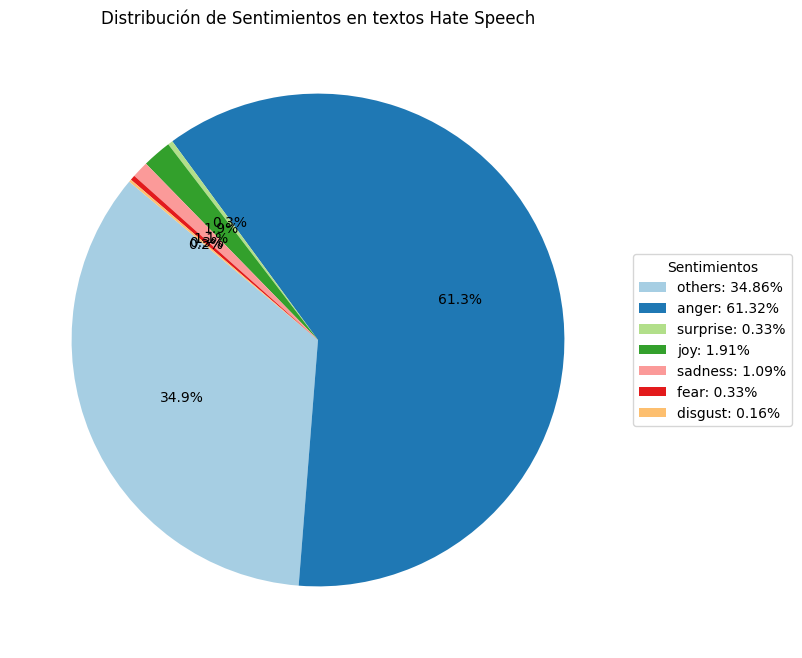

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_emotion_percentages_hate_speech.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Sentimientos en textos Hate Speech")
legend_labels = [f"{emotion}: {percentage:.2f}%" for emotion, percentage in overall_emotion_percentages_hate_speech.items()]
ax.legend(wedges, legend_labels, title="Sentimientos", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [47]:
print("\nEjemplos de cada tipo de sentimiento en textos hate speech:")
for sent_type, example in examples_per_emotion_hate_speech.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos hate speech:
others: ["Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x", 'El gobierno debe crear un control estricto de inmigración en las zonas fronterizas con Colombia por q después del 20-8querrán venir en masa', '@enkarny282 @irenejunquera No tienes ni puta idea.la melodia es mi novia es sevillista...una puta mas.', '@elultimopeter Tu eres demasiado perra 😂', '@ValentinaaCruz Puteria y perico también somos almas gemelas excepto que tu eres puta desde él vientre.', 'Dos amigos hablando: -Raúl, q me das por mi mujer? -Nada -Trato hecho.', '@AngeAlvarez7 Callate perra, re despierta estoy', 'Querida tú eres una puta sin llenadero.. que dicen tus hijos de tu nuevo amor? Sigues siendo su ejemplo 🤣🤣🤣', '@DrodriguezVen tu eres la perra mas perra de las perras', 'Jajajajajajjajajajajajajjaa ay Dios la mujer es maldad me voy de aqui, que puta pavera.']

anger: ['@MaivePerez Llora te l


-----------------------------------------------

### Tweets no hate_speech

-----------------------------------------------


In [48]:
text_not_hate_speech = [text for text in df_semeval_train[df_semeval_train["hate_speech"] == 0]["text"].tolist()]
results_emotion_analysis_not_hate_speech = [analyze_emotion(text) for text in tqdm(text_not_hate_speech)]



  0%|          | 0/2617 [00:00<?, ?it/s]

  0%|          | 9/2617 [00:00<00:30, 85.10it/s]

  1%|          | 18/2617 [00:00<00:30, 85.79it/s]


-----------------------
Texto analizado: Yo veo a mujeres destruidas por acoso laboral y callejero. Otras con depresión debido a violación sexual o maltrato físico. Y conocí a varias que se suicidaron por este tipo de comportamientos machistas. Vas a seguir con tu show pobre? https://t.co/JE6MEgvIh4
Emoción detectada: anger
Probabilidades: {'others': 0.003707361640408635, 'joy': 0.0013715422246605158, 'sadness': 0.25193238258361816, 'anger': 0.5244600772857666, 'surprise': 0.0010419610189273953, 'disgust': 0.21439404785633087, 'fear': 0.003092625644057989}

-----------------------
Texto analizado: — Yo soy respetuoso con los demás, sólamente les recuerdo lo que son. Y si son escoria no es culpa mía. ... — ¡Claro que lo sé! ¿¡Por quién me tomas!?
Emoción detectada: anger
Probabilidades: {'others': 0.013626820407807827, 'joy': 0.0026517596561461687, 'sadness': 0.005572251044213772, 'anger': 0.881464421749115, 'surprise': 0.0014550822088494897, 'disgust': 0.09425069391727448, 'fear': 0.0



  1%|          | 27/2617 [00:00<00:30, 83.60it/s]




-----------------------
Texto analizado: ¿Mojigatas, moralinas? ¿Neta? ¿Por estar en contra del acoso sexual y la violación en el trabajo?
Emoción detectada: anger
Probabilidades: {'others': 0.023343514651060104, 'joy': 0.0018374327337369323, 'sadness': 0.004893990233540535, 'anger': 0.8896374106407166, 'surprise': 0.013481121510267258, 'disgust': 0.06331657618284225, 'fear': 0.00348998187109828}

-----------------------
Texto analizado: Si cualquier cosa es violación o acoso, se minimizan la violación y el acoso. Por lo tanto, pierden las víctimas de las mierdas que se dedican a violar y/o acosar.
Emoción detectada: anger
Probabilidades: {'others': 0.0010748316999524832, 'joy': 0.0004448784748092294, 'sadness': 0.0032579945400357246, 'anger': 0.903268039226532, 'surprise': 0.0003405440365895629, 'disgust': 0.09073437750339508, 'fear': 0.0008793163578957319}

-----------------------
Texto analizado: Que divertido que consideres que una piba por estar con uno con novia es una zorra... 


  1%|▏         | 36/2617 [00:00<00:30, 83.39it/s]

  2%|▏         | 45/2617 [00:00<00:31, 81.31it/s]

  2%|▏         | 54/2617 [00:00<00:30, 83.47it/s]


-----------------------
Texto analizado: - El tiempo no existe. La división espacio-temporal es una invención del hombre, por lo tanto,.. - Cállate, hijo(a) de puta.
Emoción detectada: anger
Probabilidades: {'others': 0.03156552091240883, 'joy': 0.0066606528125703335, 'sadness': 0.003510564798489213, 'anger': 0.8836086988449097, 'surprise': 0.00362019264139235, 'disgust': 0.0677860751748085, 'fear': 0.0032482980750501156}

-----------------------
Texto analizado: Me mandan esta mierda. Cultura de la violación en sus mejores pantallas. ESCORIA. Se puede hacer algo @policia ? https://t.co/vGmcVPSO7B
Emoción detectada: anger
Probabilidades: {'others': 0.0010917808394879103, 'joy': 0.00038299118750728667, 'sadness': 0.001954298233613372, 'anger': 0.8525838851928711, 'surprise': 0.0010300579015165567, 'disgust': 0.1414831131696701, 'fear': 0.0014738705940544605}

-----------------------
Texto analizado: @gliclazida @dotfanny @el_pais Pero el escenario que describe no es de acoso. Es de vio



  2%|▏         | 63/2617 [00:00<00:30, 83.59it/s]


-----------------------
Texto analizado: @DarkGraphics_YT @IstEkoGFX @kanouraa LO MAS SATURADO ES VER MI POLLA EN TU CULO AGUJEREADO😂😂😂
Emoción detectada: others
Probabilidades: {'others': 0.6921370625495911, 'joy': 0.29865050315856934, 'sadness': 0.001873683650046587, 'anger': 0.0027537387795746326, 'surprise': 0.0024359007366001606, 'disgust': 0.001386356190778315, 'fear': 0.0007627460872754455}

-----------------------
Texto analizado: @Valeria_Martell @NopaIep Si, estoy de acuerdo. A ningún hombre le pasaría por la cabeza que una mujer es puta por subir fotos semi desnuda. Libertad y respeto.
Emoción detectada: others
Probabilidades: {'others': 0.4660373032093048, 'joy': 0.004125846084207296, 'sadness': 0.03360367938876152, 'anger': 0.4366465210914612, 'surprise': 0.00855607446283102, 'disgust': 0.04818793013691902, 'fear': 0.0028425732161849737}

-----------------------
Texto analizado: @Zabayar Lo peor de todo es que tú eres parte de la culpa de la destrucción de Venezuela hijo 



  3%|▎         | 72/2617 [00:00<00:32, 78.88it/s]

  3%|▎         | 81/2617 [00:00<00:31, 81.25it/s]


-----------------------
Texto analizado: Los procesos administrativos tienen que ser rápidos para menores inmigrantes refugiades, ya que el futuro de eses menores está en juego. El día de mañana si quieren trabajar, seguirán sin esos papeles, los hombres terminarán en trabajos irregulares y las mujeres en prostitución.
Emoción detectada: anger
Probabilidades: {'others': 0.3094808757305145, 'joy': 0.0018220958299934864, 'sadness': 0.19890917837619781, 'anger': 0.408298522233963, 'surprise': 0.0030453428626060486, 'disgust': 0.06399273872375488, 'fear': 0.014451244845986366}

-----------------------
Texto analizado: Mirna, para algunas feministas celebrarle un vestido a una mujer es acoso, ojo ahí #pautab @adnradiochile @mirnaschindler
Emoción detectada: anger
Probabilidades: {'others': 0.4176890254020691, 'joy': 0.0013083411613479257, 'sadness': 0.015401038341224194, 'anger': 0.44663411378860474, 'surprise': 0.01883113384246826, 'disgust': 0.0895901694893837, 'fear': 0.0105461850762367



  3%|▎         | 90/2617 [00:01<00:30, 82.30it/s]

  4%|▍         | 99/2617 [00:01<00:30, 82.86it/s]


-----------------------
Texto analizado: Pedimos picada árabe? 3 palabras, 1 corazón feliz
Emoción detectada: joy
Probabilidades: {'others': 0.14522850513458252, 'joy': 0.838217556476593, 'sadness': 0.002679482102394104, 'anger': 0.0019698413088917732, 'surprise': 0.00837946217507124, 'disgust': 0.001483599771745503, 'fear': 0.0020415864419192076}

-----------------------
Texto analizado: @JordiWild Que te calles ya pesao... ACEPTALO DE UNA PUTA VEZ Y dejalo ya en el pasado pide disculpas y ya conbio
Emoción detectada: anger
Probabilidades: {'others': 0.00788348913192749, 'joy': 0.0014505577273666859, 'sadness': 0.0015867403708398342, 'anger': 0.9491455554962158, 'surprise': 0.0011447574943304062, 'disgust': 0.037987712770700455, 'fear': 0.0008011635509319603}

-----------------------
Texto analizado: @LucasSpadafora Lucas callate que no lees dm nunca la puta que te pario ahre
Emoción detectada: anger
Probabilidades: {'others': 0.2141435742378235, 'joy': 0.0038708385545760393, 'sadnes



  4%|▍         | 108/2617 [00:01<00:30, 81.99it/s]

  4%|▍         | 117/2617 [00:01<00:29, 83.66it/s]


-----------------------
Texto analizado: @letra_escarlata @Pepe_Tron_B_M @anaisbernal @20m Y estos son los hijos de puta que van a luchar contra la violencia que ejercen contra las mujeres. Es que no me troncho porque NO TIENE NI PUTA GRACIA 😡😡😡
Emoción detectada: anger
Probabilidades: {'others': 0.0018216554308310151, 'joy': 0.0009588607936166227, 'sadness': 0.0011874783085659146, 'anger': 0.9313862919807434, 'surprise': 0.0014146595494821668, 'disgust': 0.06226220726966858, 'fear': 0.0009688640129752457}

-----------------------
Texto analizado: @spitfireXxX77 Si yo soy nazi, tu eres un hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 0.009264142252504826, 'joy': 0.0035018380731344223, 'sadness': 0.0021225567907094955, 'anger': 0.7266281247138977, 'surprise': 0.0016401393804699183, 'disgust': 0.2547461688518524, 'fear': 0.0020969670731574297}

-----------------------
Texto analizado: Lo malo del tema de acosos sexual que se da en TODOS lados… es simple… abuso físico,



  5%|▍         | 126/2617 [00:01<00:30, 80.84it/s]

  5%|▌         | 135/2617 [00:01<00:30, 82.57it/s]


-----------------------
Texto analizado: Muchas personas creen q una mujer es abusada o acosada por ir muy descubierta, pero yo he visto acoso a mujeres por lo contrario también, mujeres cuya religión o creencias son otras y son acosadas por eso. Eso demuestra q hay un standard tácito d mujer, y q se espera sea cubierto
Emoción detectada: anger
Probabilidades: {'others': 0.020112354308366776, 'joy': 0.0006879664142616093, 'sadness': 0.027440160512924194, 'anger': 0.8133224248886108, 'surprise': 0.0025912290439009666, 'disgust': 0.13169093430042267, 'fear': 0.00415498111397028}

-----------------------
Texto analizado: JACKIE Y HYDE MERECIAN ESTAR JUNTOS LA PUTA MADRE QUIERO ROMPER TODO
Emoción detectada: sadness
Probabilidades: {'others': 0.21485182642936707, 'joy': 0.03564992919564247, 'sadness': 0.23062443733215332, 'anger': 0.1878262609243393, 'surprise': 0.2161862701177597, 'disgust': 0.08342176675796509, 'fear': 0.03143945336341858}

-----------------------
Texto analizado: @Ark_



  6%|▌         | 144/2617 [00:01<00:30, 82.39it/s]

  6%|▌         | 153/2617 [00:01<00:31, 78.86it/s]


-----------------------
Texto analizado: I liked a @YouTube video https://t.co/s4HGvbL6SV Francisco Tárrega - Capricho árabe
Emoción detectada: others
Probabilidades: {'others': 0.8918159604072571, 'joy': 0.08610300719738007, 'sadness': 0.002792972605675459, 'anger': 0.0008610327495262027, 'surprise': 0.015574303455650806, 'disgust': 0.0009223488159477711, 'fear': 0.0019303607987239957}

-----------------------
Texto analizado: ―Confundes reina con zorra, pf. Cállate antes de que te arranque la peluca.
Emoción detectada: anger
Probabilidades: {'others': 0.050162333995103836, 'joy': 0.0027320703957229853, 'sadness': 0.002586100250482559, 'anger': 0.8525415062904358, 'surprise': 0.004348813556134701, 'disgust': 0.08337973058223724, 'fear': 0.00424939626827836}

-----------------------
Texto analizado: @telecincoes @gusgonzalves Te mereces quedarte sin nada¡Tu crees que si a la mujer que yo quiero le llamaran puta yo no me iba a levantar....Y ADEMAS QUE MAS DA ,SU TRABAJO ,VAMOS A VER,ER



  6%|▌         | 162/2617 [00:01<00:30, 80.08it/s]

  7%|▋         | 171/2617 [00:02<00:30, 80.45it/s]


-----------------------
Texto analizado: @SamuBoldrini @CRFCaetano @Atilafla @CONMEBOL Callate, hijo da puta
Emoción detectada: anger
Probabilidades: {'others': 0.008883810602128506, 'joy': 0.0019140460062772036, 'sadness': 0.0016799288569018245, 'anger': 0.8995760679244995, 'surprise': 0.0015775731299072504, 'disgust': 0.08476731181144714, 'fear': 0.001601164462044835}

-----------------------
Texto analizado: Retweeted La Silla Rota (@lasillarota):  "Atendía sexualmente a 30 hombres al día, entre ellos policías y militares" Esta es la #Historia de "La Güera" #Video https://t.co/fvfQhtS0er
Emoción detectada: others
Probabilidades: {'others': 0.9885056018829346, 'joy': 0.0010555770713835955, 'sadness': 0.003317996859550476, 'anger': 0.0021997091826051474, 'surprise': 0.0028395424596965313, 'disgust': 0.0010786195052787662, 'fear': 0.0010028993710875511}

-----------------------
Texto analizado: ¿Quién les enseñará a los hijos fe puta a ser hijos de puta?
Emoción detectada: anger
Proba



  7%|▋         | 180/2617 [00:02<00:30, 81.05it/s]

  7%|▋         | 189/2617 [00:02<00:29, 82.45it/s]


-----------------------
Texto analizado: Por violación y Acoso sexual https://t.co/TSRoNVRY22
Emoción detectada: others
Probabilidades: {'others': 0.8918471336364746, 'joy': 0.0017162634758278728, 'sadness': 0.006942281499505043, 'anger': 0.05532751977443695, 'surprise': 0.010378781706094742, 'disgust': 0.020292794331908226, 'fear': 0.01349515188485384}

-----------------------
Texto analizado: @vmoulian @baradit Puta el weon hincha pelotas... Criticas a @baradit por su programa, pero tu eres panelista en Primer Plano... EN PRIMER PLANO PO WEEEOON!!!... Chanta!
Emoción detectada: anger
Probabilidades: {'others': 0.01375538669526577, 'joy': 0.0016262538265436888, 'sadness': 0.0027569103986024857, 'anger': 0.9422813653945923, 'surprise': 0.0017366762040182948, 'disgust': 0.03688443452119827, 'fear': 0.0009589642868377268}

-----------------------
Texto analizado: @pilarbertolo @el_pais Porque no tiene la menor empatía con víctimas de acoso ni de violación y porque defiende un derecho au



  8%|▊         | 198/2617 [00:02<00:30, 80.57it/s]


-----------------------
Texto analizado: Lo vuelvo a mencionar porque es que me cabrea mucho que por gilipollas que tienen que hacer putas tonterías, se mueran animales sin necesidad y las familias tengan que pasar por eso; porque es que le pasa a mi perra y os pego yo el petardazo en la cara hijos de puta. https://t.co/hQV68mqHiX
Emoción detectada: anger
Probabilidades: {'others': 0.0009041011217050254, 'joy': 0.0006750912289135158, 'sadness': 0.002161052543669939, 'anger': 0.9232620000839233, 'surprise': 0.0007091591251082718, 'disgust': 0.07080132514238358, 'fear': 0.0014872326282784343}

-----------------------
Texto analizado: @UCS_CDMX @777jcd @ecoParq @Peaton_No La escoria de la ciudad son los puestos ya no son ambulantes ya estan fijos los imbéciles.
Emoción detectada: anger
Probabilidades: {'others': 0.0014481866965070367, 'joy': 0.0005210631061345339, 'sadness': 0.00226705358363688, 'anger': 0.9041389226913452, 'surprise': 0.00048608993529342115, 'disgust': 0.090005353093147



  8%|▊         | 207/2617 [00:02<00:30, 78.00it/s]

  8%|▊         | 216/2617 [00:02<00:29, 80.84it/s]


-----------------------
Texto analizado: @Zurine3 Como pueden permitir eso? Si fuera una hermana o hija de agun manifestante. Tambien se manifestarian para sacar a ese violador de la carcel?
Emoción detectada: anger
Probabilidades: {'others': 0.009461946785449982, 'joy': 0.00034184797550551593, 'sadness': 0.005862880032509565, 'anger': 0.8231626152992249, 'surprise': 0.013977250084280968, 'disgust': 0.138571634888649, 'fear': 0.008621936663985252}

-----------------------
Texto analizado: EN TWITTER SUPIMOS TENER EL #TODASPUTAS, NUESTRAS MADRUGADAS ESPERANDO LOS CLIPS, NUESTROS MILLONES DE BARDOS Y VOS PREFERIS A LAS DE IG QUE NO SABEN CUANDO CHOTA ES TU CUMPLEAÑOS Y SE HORRORIZABAN PORQUE TE COMISTE A AYE CUANDO ACA ESTABAMOS DE PARTY FUI POSEIDA POR COCOESPOS
Emoción detectada: anger
Probabilidades: {'others': 0.05202614516019821, 'joy': 0.003311357693746686, 'sadness': 0.010524312034249306, 'anger': 0.8546960949897766, 'surprise': 0.0013881786726415157, 'disgust': 0.076553076505661



  9%|▊         | 225/2617 [00:02<00:29, 81.70it/s]

  9%|▉         | 234/2617 [00:02<00:30, 77.87it/s]


-----------------------
Texto analizado: hasta la polla de inventarse palabras y tendencias de cosas que existen desde a saber cuanto tiempo y se llama COMER SANO Y OMNIVORO AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA https://t.co/v9W3gYHb0E
Emoción detectada: anger
Probabilidades: {'others': 0.0033371879253536463, 'joy': 0.001051732455380261, 'sadness': 0.0012667453847825527, 'anger': 0.9614585041999817, 'surprise': 0.0010726882610470057, 'disgust': 0.03024708479642868, 'fear': 0.001566061400808394}

-----------------------
Texto analizado: @JoseCardenas1 En México decimos Pirinola, los gachupines dicen Perinola...!
Emoción detectada: others
Probabilidades: {'others': 0.7054799795150757, 'joy': 0.06830723583698273, 'sadness': 0.012501269578933716, 'anger': 0.18479116261005402, 'surprise': 0.009499741718173027, 'disgust': 0.017596310004591942, 'fear': 0.0018242772202938795}

-----------------------
Texto analizado: @trafficGUAYANA Atentos inmigrantes https://t.co/uwGO4AgF



  9%|▉         | 243/2617 [00:02<00:29, 79.96it/s]

 10%|▉         | 252/2617 [00:03<00:28, 81.99it/s]


-----------------------
Texto analizado: Q hijo d puta. Cállate 😂😂😂😂 #LQSAForever
Emoción detectada: anger
Probabilidades: {'others': 0.22524411976337433, 'joy': 0.09786238521337509, 'sadness': 0.006740231066942215, 'anger': 0.535688042640686, 'surprise': 0.027268515899777412, 'disgust': 0.10399015247821808, 'fear': 0.003206556662917137}

-----------------------
Texto analizado: ACNUR mantiene la llamada internacional para ayudar a los refugiados sirios #Sociedad https://t.co/WfTasm1nEM
Emoción detectada: others
Probabilidades: {'others': 0.9932460188865662, 'joy': 0.0025948374532163143, 'sadness': 0.0009097199072130024, 'anger': 0.0008484821300953627, 'surprise': 0.001143825938925147, 'disgust': 0.0005016453214921057, 'fear': 0.0007555704796686769}

-----------------------
Texto analizado: Soñé que era sobrino de Uribe y que sabía dónde estaban todos los papeles que lo inculpaban y buscaba la forma de robármelos sin que me pillara.
Emoción detectada: others
Probabilidades: {'others':



 10%|▉         | 261/2617 [00:03<00:29, 80.83it/s]

 10%|█         | 270/2617 [00:03<00:29, 80.31it/s]


-----------------------
Texto analizado: Debe ser la polla ser impermeable a la ironía, caminar por la puta calle diciendo tonterías, que te las rebatan y te atrevas a discutir la fuente con cuatro pamplinas altisonantes.
Emoción detectada: anger
Probabilidades: {'others': 0.01126005407422781, 'joy': 0.0010920135537162423, 'sadness': 0.0015607458772137761, 'anger': 0.9211761951446533, 'surprise': 0.0022446082439273596, 'disgust': 0.06132382154464722, 'fear': 0.0013425906654447317}

-----------------------
Texto analizado: ven hijo que te voy a enseñar la ciudad. aquí está la PUTA GENTE!!!!
Emoción detectada: joy
Probabilidades: {'others': 0.3910652697086334, 'joy': 0.4108654260635376, 'sadness': 0.008252200670540333, 'anger': 0.1576312631368637, 'surprise': 0.018859725445508957, 'disgust': 0.009839905425906181, 'fear': 0.00348615157417953}

-----------------------
Texto analizado: @_Dxku_ @goneguru4 Ti o cállate la puta boca y déjala en paz por que sabemos que no nos darás la razón as



 11%|█         | 279/2617 [00:03<00:29, 80.15it/s]

 11%|█         | 288/2617 [00:03<00:29, 78.66it/s]


-----------------------
Texto analizado: Buenos días JM desde Huelva un cordial saludo. casado y Rivas no dicen no a la invasión  de ilegales. pero ese sociata o podemista acogiese un subsahariano , se acaban el problema que solo son solidarios con el dinero de los demás. https://t.co/C7E16dqw23
Emoción detectada: anger
Probabilidades: {'others': 0.04247025400400162, 'joy': 0.007068089209496975, 'sadness': 0.013682607561349869, 'anger': 0.7691980004310608, 'surprise': 0.0008480205433443189, 'disgust': 0.16511282324790955, 'fear': 0.0016201783437281847}

-----------------------
Texto analizado: Te quiero comer toda la polla — Pos eso hay que ganarselo primero almadepollo, soy el tipo de imbecil al que le pone que se lo pi... https://t.co/CKUjG9KmTV
Emoción detectada: anger
Probabilidades: {'others': 0.02610185369849205, 'joy': 0.004011860117316246, 'sadness': 0.0029474974144250154, 'anger': 0.8884274959564209, 'surprise': 0.0016359369037672877, 'disgust': 0.07554323971271515, 'fear': 0



 11%|█▏        | 297/2617 [00:03<00:28, 80.23it/s]

 12%|█▏        | 306/2617 [00:03<00:28, 81.39it/s]


-----------------------
Texto analizado: @CNMBrandon Recientemente los medios de comunicación han difundido las imágenes del "salto" a la valla de Ceuta (ciudad española en África). Algunos medios parece que descubren ahora este fenómeno y también se ha hecho un uso sensacionalista... https://t.co/KIsk5Sr4U2
Emoción detectada: others
Probabilidades: {'others': 0.9874545335769653, 'joy': 0.0006936874706298113, 'sadness': 0.003785682376474142, 'anger': 0.0019530585268512368, 'surprise': 0.004501819144934416, 'disgust': 0.0005015286151319742, 'fear': 0.0011097099632024765}

-----------------------
Texto analizado: Impresionantes y terribles imágenes.   https://t.co/cYO2V55ngE
Emoción detectada: surprise
Probabilidades: {'others': 0.008059556595981121, 'joy': 0.0038988764863461256, 'sadness': 0.4297964870929718, 'anger': 0.002901050029322505, 'surprise': 0.4751070439815521, 'disgust': 0.007679938804358244, 'fear': 0.07255697250366211}

-----------------------
Texto analizado: @vaalenbecer



 12%|█▏        | 315/2617 [00:03<00:29, 78.17it/s]

 12%|█▏        | 324/2617 [00:04<00:28, 79.62it/s]


-----------------------
Texto analizado: @RafaeIRamosV es posible q el Vasco logre q le entiendan su idea en árabe más fácil q lo q le entendieron a Osorio los mexicanos aún hablando el mismo idioma?
Emoción detectada: others
Probabilidades: {'others': 0.9854143857955933, 'joy': 0.002756701549515128, 'sadness': 0.003891207277774811, 'anger': 0.0019471303094178438, 'surprise': 0.004758710507303476, 'disgust': 0.00043165023089386523, 'fear': 0.000800161506049335}

-----------------------
Texto analizado: @effeditallup Star Wars: crea un personaje masculino complejo de puta madre La gente: *estas tonterías*
Emoción detectada: others
Probabilidades: {'others': 0.9228631258010864, 'joy': 0.023081470280885696, 'sadness': 0.00253306538797915, 'anger': 0.03819235786795616, 'surprise': 0.008097514510154724, 'disgust': 0.0035159694962203503, 'fear': 0.0017165004974231124}

-----------------------
Texto analizado: Hoy los tuve que soportar a mi viejo y a mi vieja justificar el acoso callejero po



 13%|█▎        | 333/2617 [00:04<00:28, 80.51it/s]

 13%|█▎        | 342/2617 [00:04<00:27, 81.44it/s]


-----------------------
Texto analizado: @_Martinowo_ Cállate tonto pasemos un buen año que seguro que nos va de puta madre hazte caso
Emoción detectada: anger
Probabilidades: {'others': 0.1278608739376068, 'joy': 0.01279850397258997, 'sadness': 0.00393809424713254, 'anger': 0.8144271969795227, 'surprise': 0.003641947405412793, 'disgust': 0.03496736288070679, 'fear': 0.0023660045117139816}

-----------------------
Texto analizado: @VickyGomes0 @matisztajn CALLATE HIJO DE RE MIL PUTA
Emoción detectada: anger
Probabilidades: {'others': 0.007064657285809517, 'joy': 0.0014889659360051155, 'sadness': 0.0014522828860208392, 'anger': 0.8992452025413513, 'surprise': 0.00164202437736094, 'disgust': 0.08743762969970703, 'fear': 0.001669231802225113}

-----------------------
Texto analizado: Cambio de junta directiva club activo 20-30 Colon Sur en Club Árabe https://t.co/9mMMS82eH9
Emoción detectada: others
Probabilidades: {'others': 0.9943948984146118, 'joy': 0.0022518248297274113, 'sadness': 0



 13%|█▎        | 351/2617 [00:04<00:27, 81.21it/s]

 14%|█▍        | 360/2617 [00:04<00:27, 82.02it/s]


-----------------------
Texto analizado: Vaya joyota el gabacho https://t.co/XD4zH1nwfI
Emoción detectada: joy
Probabilidades: {'others': 0.09280313551425934, 'joy': 0.46064192056655884, 'sadness': 0.002101639984175563, 'anger': 0.0007847444503568113, 'surprise': 0.43723225593566895, 'disgust': 0.0020262752659618855, 'fear': 0.004409965593367815}

-----------------------
Texto analizado: Arabia Saudí, Kuwait y Emiratos Árabes Unidos están dispuestos a suministrar energía eléctrica a Irak y así sustituir a Irán en este mercado[...] https://t.co/JPHy9ZacT8
Emoción detectada: others
Probabilidades: {'others': 0.9933173656463623, 'joy': 0.001245166757144034, 'sadness': 0.0014185981126502156, 'anger': 0.0009448602795600891, 'surprise': 0.0014960315311327577, 'disgust': 0.000523787981364876, 'fear': 0.0010541804367676377}

-----------------------
Texto analizado: No entiendo cómo tocando tanto las pelotas como tocáis y después de vuestras acciones violentas: Lavapiés, Barcelona, asalto vall



 14%|█▍        | 369/2617 [00:04<00:28, 79.38it/s]


-----------------------
Texto analizado: @Krisargentia @tiempoarg @AlamedaCABA Sacate a Mafalda del perfil, escoria.
Emoción detectada: anger
Probabilidades: {'others': 0.003388419048860669, 'joy': 0.0010596049251034856, 'sadness': 0.0022002768237143755, 'anger': 0.7812239527702332, 'surprise': 0.0009145413059741259, 'disgust': 0.20956836640834808, 'fear': 0.0016447784146293998}

-----------------------
Texto analizado: #mvtenlafrontera Por cierto, lo del millón de Subsaharianos esperando lo dijo el Gobierno Marroquí.. de nada...
Emoción detectada: others
Probabilidades: {'others': 0.982434093952179, 'joy': 0.003743422217667103, 'sadness': 0.0026768394745886326, 'anger': 0.005093318875879049, 'surprise': 0.0037982608191668987, 'disgust': 0.0013761105947196484, 'fear': 0.0008779797935858369}

-----------------------
Texto analizado: @GastonE58 Callate, no te metas con mi perra 😑
Emoción detectada: anger
Probabilidades: {'others': 0.028801433742046356, 'joy': 0.001483190804719925, 'sadn



 14%|█▍        | 378/2617 [00:04<00:28, 79.89it/s]

 15%|█▍        | 387/2617 [00:04<00:28, 78.61it/s]


-----------------------
Texto analizado: - Puta gente nacida después de 1989, que imbécil es. + Tú eres del 94, simplón. - Eso, dame más motivos para odiarlos.
Emoción detectada: anger
Probabilidades: {'others': 0.007868574932217598, 'joy': 0.004240446258336306, 'sadness': 0.005277741234749556, 'anger': 0.8856217265129089, 'surprise': 0.0006776035879738629, 'disgust': 0.09564612060785294, 'fear': 0.000667878775857389}

-----------------------
Texto analizado: @joakosinnervios Hablo y digo lo que quiero y si no tenes la más puta idea de lo que hablo mejor cállate, siempre viví como quise y no gracias a él.
Emoción detectada: anger
Probabilidades: {'others': 0.18326324224472046, 'joy': 0.02372121997177601, 'sadness': 0.038237787783145905, 'anger': 0.681200385093689, 'surprise': 0.002148727420717478, 'disgust': 0.06990223377943039, 'fear': 0.001526429085060954}

-----------------------
Texto analizado: Quería reírme, puse Riaño en Netflix, lo toleré hasta el minuto 18, bromas sobre acoso



 15%|█▌        | 395/2617 [00:04<00:28, 77.23it/s]

 15%|█▌        | 404/2617 [00:05<00:27, 79.77it/s]


-----------------------
Texto analizado: @hectorbecerrilr Cállate mantenido por el pueblo , Hijo de Puta ; a ver si te dan trabajo en Chiclayo te odian , Cagada
Emoción detectada: anger
Probabilidades: {'others': 0.004145659971982241, 'joy': 0.0012142420746386051, 'sadness': 0.001906059798784554, 'anger': 0.8928954601287842, 'surprise': 0.0006321605760604143, 'disgust': 0.09820947796106339, 'fear': 0.0009969844250008464}

-----------------------
Texto analizado: @_Nakoi tú eres guapísimo hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 0.4000185430049896, 'joy': 0.07492990791797638, 'sadness': 0.00565193360671401, 'anger': 0.4395011067390442, 'surprise': 0.03238532692193985, 'disgust': 0.04148324206471443, 'fear': 0.006029910873621702}

-----------------------
Texto analizado: austin mahone callate hijo de puta solo quiero oir a abraham
Emoción detectada: anger
Probabilidades: {'others': 0.047348085790872574, 'joy': 0.005334777291864157, 'sadness': 0.001318174647167325



 16%|█▌        | 413/2617 [00:05<00:27, 79.87it/s]

 16%|█▌        | 422/2617 [00:05<00:27, 81.19it/s]


-----------------------
Texto analizado: que si el lenguaje, que si es acoso, que si es lío de faldas.
Emoción detectada: others
Probabilidades: {'others': 0.7176956534385681, 'joy': 0.002452158136293292, 'sadness': 0.006457286886870861, 'anger': 0.20243358612060547, 'surprise': 0.038812942802906036, 'disgust': 0.01808062382042408, 'fear': 0.014067738316953182}

-----------------------
Texto analizado: @Daniela__Valdiv dani no alcancé a escuchar porque te habían revisado en los Emiratos Arabes, son también estrictos? Queremos viajar para allá y me gustaría saber 🙏🏻
Emoción detectada: others
Probabilidades: {'others': 0.9812299013137817, 'joy': 0.00276850420050323, 'sadness': 0.004551955033093691, 'anger': 0.0030263031367212534, 'surprise': 0.004234940744936466, 'disgust': 0.001060975482687354, 'fear': 0.003127398667857051}

-----------------------
Texto analizado: Os habéis pasado décadas llamando 'guarra' a Maribel Verdú por enseñar cacho. O a Victoria Abril. Tampoco vamos a pedirle 



 16%|█▋        | 431/2617 [00:05<00:26, 81.01it/s]

 17%|█▋        | 440/2617 [00:05<00:26, 82.07it/s]


-----------------------
Texto analizado: @MarcSuRI @jg_dominguez Calláte tú,fascista catalán de mierda,escoria humana,deshecho de tienta,rata de cloaca....y deja a tu madre en paz, la pobre....
Emoción detectada: anger
Probabilidades: {'others': 0.0023512435145676136, 'joy': 0.002298542996868491, 'sadness': 0.0028127217665314674, 'anger': 0.808039665222168, 'surprise': 0.0007694185478612781, 'disgust': 0.18237553536891937, 'fear': 0.001352922641672194}

-----------------------
Texto analizado: A cms. de atropellarme  un tipo, es INMIGRANTE, mientras, cruzaba la calle con luz verde. Le indiqué había luz verde, pero me hizo una señal como queriendo decir:"Qué me importa perro!!!" le iba a tomar una foto a la patente del vehículo, pero se fugó. Esta es la mierda, https://t.co/06C98w5Jm6
Emoción detectada: anger
Probabilidades: {'others': 0.00158918765373528, 'joy': 0.0007933229790069163, 'sadness': 0.0025279235560446978, 'anger': 0.8782486915588379, 'surprise': 0.0010193348862230778, 'di



 17%|█▋        | 449/2617 [00:05<00:26, 81.73it/s]

 18%|█▊        | 458/2617 [00:05<00:27, 77.41it/s]


-----------------------
Texto analizado: @eugravano sos una persona re linda siempre estas para todos, t mereces lo mejor y hoy nos vemos perra t extraño mucho ahre ñ
Emoción detectada: joy
Probabilidades: {'others': 0.3115834891796112, 'joy': 0.648953378200531, 'sadness': 0.017585331574082375, 'anger': 0.005569674540311098, 'surprise': 0.0068236785009503365, 'disgust': 0.0040553356520831585, 'fear': 0.005429112818092108}

-----------------------
Texto analizado: VOX: "Nuestros refugiados son nuestros jóvenes que se han tenido que marchar forzosamente fuera de España a trabajar. Para VOX ellos son los primeros." 👏👏 https://t.co/WG5RBjZUnu
Emoción detectada: others
Probabilidades: {'others': 0.9388498067855835, 'joy': 0.004265693947672844, 'sadness': 0.03183991089463234, 'anger': 0.018395666033029556, 'surprise': 0.0009388151811435819, 'disgust': 0.004099821671843529, 'fear': 0.0016103076050058007}

-----------------------
Texto analizado: @ddm_oficial #Bremer=Brancatelli sos un hijo d



 18%|█▊        | 466/2617 [00:05<00:27, 77.14it/s]


-----------------------
Texto analizado: @TheGotzReport El hijo de puta quiso estirar el pase al arquero hasta el último momento, merecía ser gol y que lo maten.
Emoción detectada: anger
Probabilidades: {'others': 0.002493757288902998, 'joy': 0.0007468544063158333, 'sadness': 0.0021821027621626854, 'anger': 0.9027597904205322, 'surprise': 0.0018799155950546265, 'disgust': 0.08858690410852432, 'fear': 0.0013506539398804307}

-----------------------
Texto analizado: @_kayligonzales_ Puta men ya callate
Emoción detectada: anger
Probabilidades: {'others': 0.15875674784183502, 'joy': 0.0037499680183827877, 'sadness': 0.004470404703170061, 'anger': 0.7802107334136963, 'surprise': 0.009213903918862343, 'disgust': 0.03895772248506546, 'fear': 0.004640514962375164}

-----------------------
Texto analizado: Q ministra d "Lo Que Falta y Lo Que Sobra" (Trabajo y Migraciones),diga q ve n Casado y Rivera tendencias "racistas y xenófobas" x visitar Ceuta es como si yo digo q Sánchez e Iglesias lo so



 18%|█▊        | 474/2617 [00:05<00:29, 72.99it/s]

 18%|█▊        | 483/2617 [00:06<00:28, 76.00it/s]


-----------------------
Texto analizado: Esto es para ti indocumentado  https://t.co/8mQq3aa02q  @dejanirasilveir @EduardoJFloresF
Emoción detectada: others
Probabilidades: {'others': 0.9942375421524048, 'joy': 0.0014500413089990616, 'sadness': 0.0005074894288554788, 'anger': 0.0015274377074092627, 'surprise': 0.0011532169301062822, 'disgust': 0.0007483602967113256, 'fear': 0.00037585967220366}

-----------------------
Texto analizado: La coalición árabe niega haber atacado Al Hudeida y asegura que el ataque contra un mercado y un hospital que dejó ayer más de 50 muertos fue perpetrado por los rebeldes hutíes con proyectiles de mortero. #Yemen
Emoción detectada: others
Probabilidades: {'others': 0.6373249292373657, 'joy': 0.0052234879694879055, 'sadness': 0.03301408886909485, 'anger': 0.17689953744411469, 'surprise': 0.02555486001074314, 'disgust': 0.08313925564289093, 'fear': 0.038843803107738495}

-----------------------
Texto analizado: @ppkamigo tu eres la escoria del país maldito



 19%|█▉        | 491/2617 [00:06<00:27, 76.45it/s]

 19%|█▉        | 500/2617 [00:06<00:26, 78.83it/s]


-----------------------
Texto analizado: @HanzoHattori23 @eldiarioes @Barbijaputa Y sobre cómo 'distinguir y separar CLARAMENTE' lo que es violación y acoso de aquello que no lo es: https://t.co/kPxlVR65JG
Emoción detectada: others
Probabilidades: {'others': 0.9898983836174011, 'joy': 0.00044411575072444975, 'sadness': 0.0009949750965461135, 'anger': 0.004548388998955488, 'surprise': 0.0019409910310059786, 'disgust': 0.0009315446368418634, 'fear': 0.0012415236560627818}

-----------------------
Texto analizado: Este chamo es de Caigüire Abajo, del barrio 'Las Pepitonas'. Desde que está triunfando en los Emiratos Árabes no ha dejado de apoyar al talento y a los niños que juegan fútbol en Cumaná.  También hablemos de lo bueno. https://t.co/ZIqP8cmHjf
Emoción detectada: joy
Probabilidades: {'others': 0.0663466826081276, 'joy': 0.9302961826324463, 'sadness': 0.0014461963437497616, 'anger': 0.0004262759757693857, 'surprise': 0.0008310694247484207, 'disgust': 0.00033803502446971834, 'fear':



 19%|█▉        | 508/2617 [00:06<00:26, 78.84it/s]

 20%|█▉        | 517/2617 [00:06<00:26, 80.52it/s]


-----------------------
Texto analizado: @_Noel_Pereira2 Definitivamente tú eres un grandísimo hijo de puta, el coño de tu madre! Si el escenario es Negro para ti es Blanco. Siempre juzgando a dividir y llevar la contraria. Te propongo algo, deja que te coja un Burro con los ojos azules
Emoción detectada: anger
Probabilidades: {'others': 0.003280324162915349, 'joy': 0.0009251070441678166, 'sadness': 0.0016179083613678813, 'anger': 0.9488340020179749, 'surprise': 0.0010743021266534925, 'disgust': 0.04331124201416969, 'fear': 0.0009571629343554378}

-----------------------
Texto analizado: @TowandaRebels Justamente los violadores son la escoria de los hombres, la forma más baja de vida animal
Emoción detectada: anger
Probabilidades: {'others': 0.0022765956819057465, 'joy': 0.0007762553868815303, 'sadness': 0.003756521502509713, 'anger': 0.7762114405632019, 'surprise': 0.0007412650156766176, 'disgust': 0.21485505998134613, 'fear': 0.0013827893417328596}

-----------------------
Texto ana



 20%|██        | 526/2617 [00:06<00:25, 80.47it/s]

 20%|██        | 535/2617 [00:06<00:26, 79.86it/s]


-----------------------
Texto analizado: le dije a mi mamá que extrañaba a un pibito y me tiró los pelos jajajajajajajjaja enseñandome como en los viejos tiempos perra
Emoción detectada: others
Probabilidades: {'others': 0.7112148404121399, 'joy': 0.22658605873584747, 'sadness': 0.026956014335155487, 'anger': 0.011035497300326824, 'surprise': 0.016449149698019028, 'disgust': 0.0038273255340754986, 'fear': 0.003931086510419846}

-----------------------
Texto analizado: A todos que critican la llegada de inmigrantes y crean que nos quitan trabajo, les dan demasiadas ayudas y demás, que se miren el programa de hoy de AR a partir de las 10. Y que se queden con eso que han dicho: "Vienen a hacer el trabajo que LOS ESPAÑOLES NO QUIEREN.
Emoción detectada: others
Probabilidades: {'others': 0.47191426157951355, 'joy': 0.005834992974996567, 'sadness': 0.022272801026701927, 'anger': 0.46528151631355286, 'surprise': 0.002331244293600321, 'disgust': 0.027324877679347992, 'fear': 0.005040253046900



 21%|██        | 543/2617 [00:06<00:26, 79.72it/s]

 21%|██        | 551/2617 [00:06<00:26, 76.59it/s]


-----------------------
Texto analizado: Pura locura estos arabes! #garage507 #drift #sports #carlife #carvideo #4x4 #toyota #crazy #stunts #panama https://t.co/yNJFXjkslq
Emoción detectada: joy
Probabilidades: {'others': 0.15804845094680786, 'joy': 0.5844705700874329, 'sadness': 0.002211795188486576, 'anger': 0.002506783464923501, 'surprise': 0.2451997548341751, 'disgust': 0.0030494651291519403, 'fear': 0.004513183142989874}

-----------------------
Texto analizado: Y si tú eres uno de los amigos que le celebra el comportamiento de esos hombres eres cómplice del acoso sexual.
Emoción detectada: anger
Probabilidades: {'others': 0.07898498326539993, 'joy': 0.0014928880846127868, 'sadness': 0.00888348650187254, 'anger': 0.7573027610778809, 'surprise': 0.003735562087967992, 'disgust': 0.14493420720100403, 'fear': 0.004666076507419348}

-----------------------
Texto analizado: @modadulce Y su padre no es acusado por intento de violación y acoso sexual y otras agresiones sexuales? Las muje



 21%|██▏       | 559/2617 [00:06<00:26, 77.26it/s]

 22%|██▏       | 568/2617 [00:07<00:25, 79.21it/s]


-----------------------
Texto analizado: 1-Acoso no es abuso ni violación 2-Naturalizar un acoso como si nada sin mediar palabra que retracte conductas no está ni un poco bueno
Emoción detectada: anger
Probabilidades: {'others': 0.004844046663492918, 'joy': 0.0003715322236530483, 'sadness': 0.0053701251745224, 'anger': 0.9050950407981873, 'surprise': 0.0023693889379501343, 'disgust': 0.07994245737791061, 'fear': 0.0020073619671165943}

-----------------------
Texto analizado: Mi mamá hace empanadas árabes para el viernes. 180 la docena. El que quiera me avisa. Es de carne tierna, lo hacemos a mi sobrinito. Tiene 2 años. Ahre marginal 😂
Emoción detectada: others
Probabilidades: {'others': 0.6781668663024902, 'joy': 0.2929706871509552, 'sadness': 0.007622352335602045, 'anger': 0.006837902124971151, 'surprise': 0.007422412279993296, 'disgust': 0.0035980241373181343, 'fear': 0.0033817305229604244}

-----------------------
Texto analizado: @soyboosteada TU TYA K ES X LA NOXE K EN TEORIA TU



 22%|██▏       | 577/2617 [00:07<00:25, 80.42it/s]

 22%|██▏       | 586/2617 [00:07<00:24, 81.42it/s]


-----------------------
Texto analizado: ¿alguien que tenga el numero del güero de super vale?
Emoción detectada: others
Probabilidades: {'others': 0.9707974195480347, 'joy': 0.0025439683813601732, 'sadness': 0.003615782130509615, 'anger': 0.001956238877028227, 'surprise': 0.012094846926629543, 'disgust': 0.001876254566013813, 'fear': 0.0071153962053358555}

-----------------------
Texto analizado: Yo cuando alguien me dice güera? https://t.co/24AYSlKT2d
Emoción detectada: others
Probabilidades: {'others': 0.9598296880722046, 'joy': 0.014835795387625694, 'sadness': 0.0028597000055015087, 'anger': 0.0036557603161782026, 'surprise': 0.012175779789686203, 'disgust': 0.001401660148985684, 'fear': 0.005241746082901955}

-----------------------
Texto analizado: Cuando tu eres la única que sabe hacer Picoway Resolve y todas quieren que les enseñes, te sientes la más perra del mundo 😂💆🐩
Emoción detectada: others
Probabilidades: {'others': 0.5286922454833984, 'joy': 0.46369507908821106, 'sadne



 23%|██▎       | 595/2617 [00:07<00:25, 80.57it/s]

 23%|██▎       | 604/2617 [00:07<00:24, 81.32it/s]


-----------------------
Texto analizado: mi novia es una guarra no se ducha desde el año pasado 😂😂😂👏👏👌👌
Emoción detectada: others
Probabilidades: {'others': 0.7093839049339294, 'joy': 0.24049335718154907, 'sadness': 0.0019768313504755497, 'anger': 0.0215277262032032, 'surprise': 0.015061214566230774, 'disgust': 0.009048910811543465, 'fear': 0.0025079555343836546}

-----------------------
Texto analizado: @Jackvatore Es que sinceramente ni puta gracia me haces, y si me insultas menos, así que callate la puta boca, gracias.
Emoción detectada: anger
Probabilidades: {'others': 0.005297244992107153, 'joy': 0.0015437555266544223, 'sadness': 0.001883799908682704, 'anger': 0.9343962669372559, 'surprise': 0.0009385325247421861, 'disgust': 0.05465222895145416, 'fear': 0.0012881847796961665}

-----------------------
Texto analizado: Quiero pegarte pq estás bien imbécil y después darte un besito. 🙂
Emoción detectada: anger
Probabilidades: {'others': 0.21449194848537445, 'joy': 0.00797664280980825



 23%|██▎       | 613/2617 [00:07<00:25, 78.55it/s]

 24%|██▍       | 622/2617 [00:07<00:24, 79.98it/s]


-----------------------
Texto analizado: El acoso no entra en la ficción. @riverocalu representás la voz de miles de mujeres que fueron calladas, fuerza
Emoción detectada: others
Probabilidades: {'others': 0.7796189785003662, 'joy': 0.005459035746753216, 'sadness': 0.05430452898144722, 'anger': 0.13631296157836914, 'surprise': 0.003049578983336687, 'disgust': 0.019100641831755638, 'fear': 0.0021542981266975403}

-----------------------
Texto analizado: También te estresa todo hermana' y bueno gil, callate la puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.08089783042669296, 'joy': 0.003431204939261079, 'sadness': 0.004506214056164026, 'anger': 0.8812286853790283, 'surprise': 0.004162680823355913, 'disgust': 0.019003976136446, 'fear': 0.0067694648168981075}

-----------------------
Texto analizado: @beyondthesvn no lo eres. callate jode. hostia puta ya no te digo la gira que estoy intentando sacar maldito
Emoción detectada: anger
Probabilidades: {'others': 0.0073894262



 24%|██▍       | 631/2617 [00:07<00:25, 76.93it/s]

 24%|██▍       | 640/2617 [00:07<00:25, 78.73it/s]


-----------------------
Texto analizado: ¿Qué pensáis de este artículo? https://t.co/e9iCoaUVQw
Emoción detectada: others
Probabilidades: {'others': 0.99558025598526, 'joy': 0.0005120271816849709, 'sadness': 0.000502925890032202, 'anger': 0.00029954221099615097, 'surprise': 0.00217413529753685, 'disgust': 0.0002697102609090507, 'fear': 0.0006613386794924736}

-----------------------
Texto analizado: “El maestro decía que viniéramos en minifalda y sin bragas” el acoso sexual que hacía un maestro en la universidad https://t.co/tWUS1scaYf https://t.co/wJYlI3qvu4
Emoción detectada: others
Probabilidades: {'others': 0.8209230303764343, 'joy': 0.0013156154891476035, 'sadness': 0.004232024773955345, 'anger': 0.11668622493743896, 'surprise': 0.03324350714683533, 'disgust': 0.01532918680459261, 'fear': 0.008270341902971268}

-----------------------
Texto analizado: Y a mercurio? Cuando acabe con la luna
Emoción detectada: others
Probabilidades: {'others': 0.8077982664108276, 'joy': 0.013211073



 25%|██▍       | 649/2617 [00:08<00:24, 79.59it/s]

 25%|██▌       | 657/2617 [00:08<00:24, 79.54it/s]


-----------------------
Texto analizado: Lo de Salou solo es el principio. Ya están saliendo muchos autocares rumbo a Cataluña llenos de subsaharianos, porque dicen que allí Colau lis trata de lujo
Emoción detectada: others
Probabilidades: {'others': 0.9678757190704346, 'joy': 0.00267582293599844, 'sadness': 0.016640227288007736, 'anger': 0.0036905177403241396, 'surprise': 0.0027781957760453224, 'disgust': 0.0026939166709780693, 'fear': 0.0036454913206398487}

-----------------------
Texto analizado: Mientras el presidente okupa sigue de vacaciones cada día llegan a España cientos de inmigrantes ilegales por el efecto llamada provocado por el Gobierno. Ya han llegado más ilegales que en todo 2017. Y lo que preocupa a Bruselas es el "riesgo populista". https://t.co/dXYvuxjOXH
Emoción detectada: fear
Probabilidades: {'others': 0.047332994639873505, 'joy': 0.0015492443926632404, 'sadness': 0.09461948275566101, 'anger': 0.1094975471496582, 'surprise': 0.02125883474946022, 'disgust': 0.072



 25%|██▌       | 665/2617 [00:08<00:24, 79.64it/s]

 26%|██▌       | 674/2617 [00:08<00:24, 80.17it/s]


-----------------------
Texto analizado: @sr_hater_ Claro, por subir la foto que le dé la puta gana a su Twitter es una guarra. Asocias enseñar carne con ser guarra. Espero que seas de los que lleva jersey de cuello alto en pleno verano.
Emoción detectada: anger
Probabilidades: {'others': 0.015526951290667057, 'joy': 0.001816033385694027, 'sadness': 0.0034136807080358267, 'anger': 0.8789653778076172, 'surprise': 0.0019164314726367593, 'disgust': 0.09718435257673264, 'fear': 0.001177184283733368}

-----------------------
Texto analizado: Al dueño borracho d este coche q m acabo d encontrar abandonado en una cuneta: mereces lo q t ha pasado hijo d puta. X suerte nadie se cruzó en tu camino. https://t.co/YlGaDuRUGw
Emoción detectada: anger
Probabilidades: {'others': 0.003182140178978443, 'joy': 0.002012285403907299, 'sadness': 0.006904168985784054, 'anger': 0.6909211277961731, 'surprise': 0.0011626604245975614, 'disgust': 0.29379868507385254, 'fear': 0.002018996747210622}

--------------



 26%|██▌       | 683/2617 [00:08<00:24, 79.63it/s]


-----------------------
Texto analizado: @JesusLM95 tuitwer es una erramienta q puede llegar a todo el mundo... Si pudiésemos hacerles llegar al mundo árabe esa posibilidad de mostrarnos su cariño por nuestra tierra como tanto dicen... Mediante la ayuda al club del CALIFATO.... PARA ELLOS 5 O 10 MILLONES NO SON NADA...
Emoción detectada: others
Probabilidades: {'others': 0.9097596406936646, 'joy': 0.011991791427135468, 'sadness': 0.06657100468873978, 'anger': 0.008891487494111061, 'surprise': 0.00057654595002532, 'disgust': 0.0017547308234497905, 'fear': 0.0004548114666249603}

-----------------------
Texto analizado: No me viste borracha, no me viste loca por nadie, simplemente no me viste. Así que cállate la puta boca.
Emoción detectada: anger
Probabilidades: {'others': 0.02248293347656727, 'joy': 0.0023893925826996565, 'sadness': 0.007605808787047863, 'anger': 0.9248331785202026, 'surprise': 0.0014750778209418058, 'disgust': 0.03990591689944267, 'fear': 0.0013077055336907506}

----



 26%|██▋       | 691/2617 [00:08<00:26, 72.50it/s]

 27%|██▋       | 699/2617 [00:08<00:30, 63.59it/s]


-----------------------
Texto analizado: @La_SER @SERCatalunya Callate cara de culo y jodete en la puta cárcel
Emoción detectada: anger
Probabilidades: {'others': 0.004130900371819735, 'joy': 0.0012841469142585993, 'sadness': 0.0016991988522931933, 'anger': 0.8698935508728027, 'surprise': 0.0008713327115401626, 'disgust': 0.12070317566394806, 'fear': 0.0014177272096276283}

-----------------------
Texto analizado: @PhilipMarlowe10 @quimforn Tu eres un poco bastante hijo de la gran puta no? Y no es una pregunta cabronazo. Es una jodida afirmación #alertaporhijodeputa #alertacabronazo #alertatuputamadre
Emoción detectada: anger
Probabilidades: {'others': 0.006261663977056742, 'joy': 0.001218325924128294, 'sadness': 0.001066309167072177, 'anger': 0.9400632977485657, 'surprise': 0.0032743068877607584, 'disgust': 0.04619946330785751, 'fear': 0.001916597131639719}

-----------------------
Texto analizado: solo quiero mover el culo con arabe y venirme a dormir
Emoción detectada: others
Proba



 27%|██▋       | 706/2617 [00:08<00:31, 59.88it/s]


-----------------------
Texto analizado: Cállate Zorra' el 'cállate perro' de este semestre😊
Emoción detectada: anger
Probabilidades: {'others': 0.18251870572566986, 'joy': 0.016506189480423927, 'sadness': 0.003934807144105434, 'anger': 0.7609836459159851, 'surprise': 0.0038219124544411898, 'disgust': 0.030213942751288414, 'fear': 0.0020207352936267853}

-----------------------
Texto analizado: #ninjasdelcholloenp RETO: te reto a pegarte en la cara la mayor cantidad de ganchos de ropa( no vas a superar los 10) saludos desde chile @ninjasdelchollo 🔥 https://t.co/FtZEa3Jid8
Emoción detectada: others
Probabilidades: {'others': 0.9779458045959473, 'joy': 0.01663813181221485, 'sadness': 0.0007785450434312224, 'anger': 0.0004808066296391189, 'surprise': 0.003478368977084756, 'disgust': 0.00023241108283400536, 'fear': 0.00044586643343791366}

-----------------------
Texto analizado: Un tío me ha tirado ficha por la foto con la olla en la puta cabeza en Instagram de verdad ya es que no puedo 



 27%|██▋       | 713/2617 [00:09<00:31, 59.57it/s]

 28%|██▊       | 720/2617 [00:09<00:31, 60.80it/s]


-----------------------
Texto analizado: @EJCJ @MartinaSotoPose No creo que nadie confunda acoso con seducción ni violación con fantasia sexual.
Emoción detectada: others
Probabilidades: {'others': 0.9893885254859924, 'joy': 0.0004718627315014601, 'sadness': 0.002141914563253522, 'anger': 0.0030936456751078367, 'surprise': 0.002122089732438326, 'disgust': 0.0015687556006014347, 'fear': 0.0012132806004956365}

-----------------------
Texto analizado: @selinac66283070 Es más, a mí debería importarme una puta mierda que tú por la playa vayas enseñando el rabo. Es asunto tuyo.No mío. Ni de nadie más. De la misma forma, si tú usas tu desnudez PARA TRABAJAR, es asunto tuyo. Y si yo quiero verte en pelotas,
Emoción detectada: anger
Probabilidades: {'others': 0.010322599671781063, 'joy': 0.0010979572543874383, 'sadness': 0.005658646579831839, 'anger': 0.9405169486999512, 'surprise': 0.0007283227168954909, 'disgust': 0.040917765349149704, 'fear': 0.0007577692740596831}

-----------------------



 28%|██▊       | 727/2617 [00:09<00:30, 61.79it/s]

 28%|██▊       | 734/2617 [00:09<00:30, 62.07it/s]


-----------------------
Texto analizado: @bblackbird_ @vntiat Tu eres más tonto que un bocao en la polla chaval
Emoción detectada: anger
Probabilidades: {'others': 0.019227897748351097, 'joy': 0.00230777682736516, 'sadness': 0.002771773375570774, 'anger': 0.8772169351577759, 'surprise': 0.0018284973921254277, 'disgust': 0.0952516496181488, 'fear': 0.0013954534661024809}

-----------------------
Texto analizado: Lo de los bolardos obstaculizando las entradas del zoco árabe año tras año es de traca... Como para tener que salir corriendo!!! O con silla!!! @vitoriagasteiz https://t.co/1qlkvETBgp
Emoción detectada: anger
Probabilidades: {'others': 0.014289689250290394, 'joy': 0.0036650742404162884, 'sadness': 0.0046736025251448154, 'anger': 0.4985347092151642, 'surprise': 0.35738322138786316, 'disgust': 0.09635040909051895, 'fear': 0.025103233754634857}

-----------------------
Texto analizado: La forma que se me pegó la base de Arabe, la escuché 75 veces hoy. 🤦🏼‍♂️
Emoción detectada: othe



 28%|██▊       | 741/2617 [00:09<00:30, 61.95it/s]

 29%|██▊       | 748/2617 [00:09<00:30, 62.22it/s]


-----------------------
Texto analizado: @chater9000 @myriambregman @NicolasdelCano @Solanopo Hijos de perra, para lo unico que sirven es para provocar y seguir haciendo mierda el país. Nunca van a gobernarnos en su puta y reventada vida. Queremos vivir en Paz, si no les gusta la Democracia no s
Emoción detectada: anger
Probabilidades: {'others': 0.001023740042001009, 'joy': 0.0005695768631994724, 'sadness': 0.002322923857718706, 'anger': 0.8819848299026489, 'surprise': 0.00047773041296750307, 'disgust': 0.11251265555620193, 'fear': 0.0011085051810368896}

-----------------------
Texto analizado: No te mereces que te responda pero aún así, lo voy a hacer. No me conoces en absoluto para decir que soy una zorra. Que uses eso como insulto, ya dice mucho de ti. Estoy segura de que un tío como tú, que va diciendo “zorra” a una tía sin razón, también tiene tías a patadas. https://t.co/wLuQpKxWkx
Emoción detectada: anger
Probabilidades: {'others': 0.010351295582950115, 'joy': 0.0012116013094



 29%|██▉       | 755/2617 [00:09<00:30, 61.48it/s]

 29%|██▉       | 762/2617 [00:09<00:31, 59.49it/s]


-----------------------
Texto analizado: que asco me da la puta gente que campea y hace el guarro en fortnite espero que si tu eres alguien de ellos dejes este juego ya:/
Emoción detectada: anger
Probabilidades: {'others': 0.0014574950328096747, 'joy': 0.0009140959591604769, 'sadness': 0.003034834051504731, 'anger': 0.7829225063323975, 'surprise': 0.000597433012444526, 'disgust': 0.209466814994812, 'fear': 0.0016069014091044664}

-----------------------
Texto analizado: Me perturba que #Jinyoung no tenga foto de perfil en IG. Es como si estuviese indocumentado en las redes sociales. A ver si activas una foto de perfil wacho! 😂  #GOT7 #갓세븐 #EyesOnYou #GOT7WorldTour @GOT7Official 💚👑🐥
Emoción detectada: fear
Probabilidades: {'others': 0.12417293339967728, 'joy': 0.005480144638568163, 'sadness': 0.021005356684327126, 'anger': 0.028916550800204277, 'surprise': 0.11591336876153946, 'disgust': 0.04110921174287796, 'fear': 0.6634024381637573}

-----------------------
Texto analizado: @Slut_Of



 29%|██▉       | 768/2617 [00:09<00:31, 58.14it/s]

 30%|██▉       | 775/2617 [00:10<00:30, 59.55it/s]


-----------------------
Texto analizado: Me enseñaron todos los modales habidos y por haber, PERO TENGO MIOPIA LA PUTA QUE TE PARIO. https://t.co/oZP0fYVpPn
Emoción detectada: anger
Probabilidades: {'others': 0.005421607755124569, 'joy': 0.0009438392007723451, 'sadness': 0.00319718848913908, 'anger': 0.9263145327568054, 'surprise': 0.0009868276538327336, 'disgust': 0.06133487448096275, 'fear': 0.0018011133652180433}

-----------------------
Texto analizado: MILITARES sin honor q rendían honores ayer hicieron lo q saben hacer, salir corriendo en desbandada. Solo guardaespaldas cubanos cubrieron a obeso dictador con paneles antibalas, dejando a Cilia sin protección. Ayyy Cilia, te acuerdas cuando asaltaban bancos con el indocumentado? https://t.co/ePPLBSUGfF
Emoción detectada: anger
Probabilidades: {'others': 0.009353676810860634, 'joy': 0.0022438112646341324, 'sadness': 0.006254343315958977, 'anger': 0.7978090643882751, 'surprise': 0.0024345770943909883, 'disgust': 0.18027454614639282,



 30%|██▉       | 782/2617 [00:10<00:29, 61.45it/s]


-----------------------
Texto analizado: Luego de las acusaciones de acoso y violación sexual en contra del productor de cine, la diseñadora podría obtener… https://t.co/tD1qWtNWx9
Emoción detectada: others
Probabilidades: {'others': 0.9842396974563599, 'joy': 0.0006227185949683189, 'sadness': 0.0014651978854089975, 'anger': 0.001989098498597741, 'surprise': 0.006769129540771246, 'disgust': 0.0010149177396669984, 'fear': 0.00389921385794878}

-----------------------
Texto analizado: Uno de las recetas que mas me gustan. https://t.co/N2gdrH55LE
Emoción detectada: joy
Probabilidades: {'others': 0.05999800190329552, 'joy': 0.9332398176193237, 'sadness': 0.0005258801393210888, 'anger': 0.0007893895381130278, 'surprise': 0.003089456120505929, 'disgust': 0.001032329979352653, 'fear': 0.0013251537457108498}

-----------------------
Texto analizado: 200 de Magna güero y las llantas a 32 https://t.co/SV7utovhwS
Emoción detectada: others
Probabilidades: {'others': 0.9319648146629333, 'joy': 0.0



 30%|███       | 789/2617 [00:10<00:32, 56.02it/s]

 30%|███       | 795/2617 [00:10<00:33, 54.65it/s]


-----------------------
Texto analizado: @Marti_Navarro16 @Liiila_lu Cállate no nos saludaste por que tenías un pedo pedo de la puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.3564930856227875, 'joy': 0.006289362907409668, 'sadness': 0.004819914232939482, 'anger': 0.5903559327125549, 'surprise': 0.011574234813451767, 'disgust': 0.025595001876354218, 'fear': 0.004872533958405256}

-----------------------
Texto analizado: .@pardodevera ESTÁS muy CALLADA HOY? Es verdad, NO me ACORDABA que UN ANTISISTEMA PODEMITA= a HIJO de PUTA había MATADO a una PERSONA porque NO PIENSA como él, MARQUESITA👑.@pardodevera LO VAS HA PONER en TÚ📰Panfleto.@publico_es como SOIS el 📰panfleto OFICIAL d los PODEMITAS=💩
Emoción detectada: anger
Probabilidades: {'others': 0.010434059426188469, 'joy': 0.0012590873520821333, 'sadness': 0.0020459028892219067, 'anger': 0.874038577079773, 'surprise': 0.0009119909955188632, 'disgust': 0.1102152019739151, 'fear': 0.0010952349985018373}

-----------------



 31%|███       | 801/2617 [00:10<00:33, 54.77it/s]

 31%|███       | 807/2617 [00:10<00:32, 55.21it/s]


-----------------------
Texto analizado: Antena 3 saca de seguido noticias de manteros peleando, el vídeo los terroristas de Cambrils y el flujo de inmigración. ¿Nos querrán dar algo a entender? 🤔 #Antena3noticias
Emoción detectada: anger
Probabilidades: {'others': 0.1813400387763977, 'joy': 0.0011534953955560923, 'sadness': 0.014936089515686035, 'anger': 0.6018639206886292, 'surprise': 0.05815974995493889, 'disgust': 0.1168818399310112, 'fear': 0.025664858520030975}

-----------------------
Texto analizado: @ArabelMarcelo Callate hijo de mil puta anda a la plaza a hacer quilombo raro que no estas ahi con todos tus amiguitos
Emoción detectada: anger
Probabilidades: {'others': 0.01979438029229641, 'joy': 0.002187685575336218, 'sadness': 0.0020319113973528147, 'anger': 0.8900864124298096, 'surprise': 0.0018195819575339556, 'disgust': 0.08239074796438217, 'fear': 0.0016892964486032724}

-----------------------
Texto analizado: ¿Viste esto? Entérate cuáles son los nuevos dictámenes: https



 31%|███       | 813/2617 [00:10<00:36, 48.78it/s]

 31%|███▏      | 819/2617 [00:10<00:37, 48.55it/s]


-----------------------
Texto analizado: @Orii_zapata Callateeeee, Si serás hermosa la puta madre!!!! Te amamos
Emoción detectada: joy
Probabilidades: {'others': 0.2774218022823334, 'joy': 0.541136622428894, 'sadness': 0.017951728776097298, 'anger': 0.12098809331655502, 'surprise': 0.019636956974864006, 'disgust': 0.018126409500837326, 'fear': 0.004738359246402979}

-----------------------
Texto analizado: Me da 1 puta rabia q me digan lo que tengo que hacer uf cállate dos siglos nen
Emoción detectada: anger
Probabilidades: {'others': 0.004216160625219345, 'joy': 0.0010700213024392724, 'sadness': 0.001398739987052977, 'anger': 0.9587846398353577, 'surprise': 0.0014629962388426065, 'disgust': 0.03027844801545143, 'fear': 0.0027890303172171116}

-----------------------
Texto analizado: ¿Sabias qué?  Randy Ebright baterista de @MolotovBanda escribió "Frijolero".  En un viaje qué tuvo hacia Houston, Texas su hija sufrió discriminación en el aeropuerto lo que llevo a Randy a componer Frijo



 31%|███▏      | 824/2617 [00:11<00:37, 47.66it/s]

 32%|███▏      | 829/2617 [00:11<00:37, 47.34it/s]


-----------------------
Texto analizado: @nazaretfuertes callate no quiero cumplir 20 😭😭😭😭😭😭😭😭😭😭 dejame disfrutar este año guarra🤫
Emoción detectada: anger
Probabilidades: {'others': 0.3536444306373596, 'joy': 0.12965577840805054, 'sadness': 0.03412188962101936, 'anger': 0.43261075019836426, 'surprise': 0.009737985208630562, 'disgust': 0.0348697230219841, 'fear': 0.005359443370252848}

-----------------------
Texto analizado: #LoMásLeído MIGRACIÓN: De acuerdo con la Unidad de Política Migratoria de la Secretaría de Gobernación, la detención en México de menores migrantes indocumentados se ha vuelto a disparar en 2018. https://t.co/CHBB8QdW4R
Emoción detectada: others
Probabilidades: {'others': 0.9463838338851929, 'joy': 0.00198488705791533, 'sadness': 0.014254757203161716, 'anger': 0.00435323640704155, 'surprise': 0.016146071255207062, 'disgust': 0.003452893113717437, 'fear': 0.013424432836472988}

-----------------------
Texto analizado: @tinaletina Ojalá no fuera así, pero tristemen



 32%|███▏      | 837/2617 [00:11<00:32, 55.03it/s]

 32%|███▏      | 846/2617 [00:11<00:28, 62.88it/s]


-----------------------
Texto analizado: @LuzValdes18 @papaATMof Callate hijo de puta, usted crees cierto Fabian hacer eso con su mejor amigo, imbecil.
Emoción detectada: anger
Probabilidades: {'others': 0.002363840350881219, 'joy': 0.0008341670618392527, 'sadness': 0.0019037090241909027, 'anger': 0.8837855458259583, 'surprise': 0.0012050741352140903, 'disgust': 0.10881469398736954, 'fear': 0.001092864666134119}

-----------------------
Texto analizado: La rompe arabe de papichamp y ecko
Emoción detectada: others
Probabilidades: {'others': 0.8038305640220642, 'joy': 0.053161099553108215, 'sadness': 0.004117415752261877, 'anger': 0.0015073503600433469, 'surprise': 0.12806181609630585, 'disgust': 0.0030201137997210026, 'fear': 0.006301599089056253}

-----------------------
Texto analizado: @Mzavalagc Oiga ¿y todas las victimas de acoso y violacion consecuencia de la espiral de violencia desatada por @FelipeCalderon para desviar la atención del fraude de 2006? Esas que no tienen voz por 



 33%|███▎      | 854/2617 [00:11<00:26, 66.39it/s]

 33%|███▎      | 863/2617 [00:11<00:24, 71.50it/s]


-----------------------
Texto analizado: @todonoticias @TimermanHector traidor hijo de puta! ...ni tu propia sangre respetaste. Mereces por lo que pasas, basura inmunda. https://t.co/SWla7X1Fxn
Emoción detectada: anger
Probabilidades: {'others': 0.0016332349041476846, 'joy': 0.0014678381849080324, 'sadness': 0.003467160277068615, 'anger': 0.7403231859207153, 'surprise': 0.0009555172291584313, 'disgust': 0.2503722608089447, 'fear': 0.0017808255506679416}

-----------------------
Texto analizado: Las señoras artistas y drags van a ir vestidas de animalicos y cosas monis sin enseñar polla ni chocho. Otra decepción para las fantasías enfermizas del PP y C’s.
Emoción detectada: anger
Probabilidades: {'others': 0.022090550512075424, 'joy': 0.005808032583445311, 'sadness': 0.03042025864124298, 'anger': 0.7252326011657715, 'surprise': 0.004441810306161642, 'disgust': 0.20769906044006348, 'fear': 0.004307698458433151}

-----------------------
Texto analizado: Si no tienes ni puta idea, callate



 33%|███▎      | 871/2617 [00:11<00:23, 73.49it/s]

 34%|███▎      | 879/2617 [00:11<00:23, 72.57it/s]


-----------------------
Texto analizado: Estoy en una cena con viejos y estan JUSTIFICANDO LA VIOLACIÓN y diciendo que las minas se lo buscan. Que nefasto la puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.002058383310213685, 'joy': 0.0003689740551635623, 'sadness': 0.0019201516406610608, 'anger': 0.8649946451187134, 'surprise': 0.001725447247736156, 'disgust': 0.12681198120117188, 'fear': 0.002120409393683076}

-----------------------
Texto analizado: @LopezCamilo97 QUE TE CALLES GRAN HIJO DE PUTA
Emoción detectada: anger
Probabilidades: {'others': 0.009042501449584961, 'joy': 0.0016408016672357917, 'sadness': 0.0012007824843749404, 'anger': 0.9059155583381653, 'surprise': 0.0016745433676987886, 'disgust': 0.0787130668759346, 'fear': 0.0018126433715224266}

-----------------------
Texto analizado: @BebeVitaReal @BebeMiloYT Te madro bebe milo verdad se te ve en la cara que te pego
Emoción detectada: others
Probabilidades: {'others': 0.9810118675231934, 'joy': 0.002343



 34%|███▍      | 887/2617 [00:11<00:24, 71.82it/s]

 34%|███▍      | 895/2617 [00:12<00:23, 73.82it/s]


-----------------------
Texto analizado: @DanielUrresti1 IMBECERRIL KENYI TE LA METIO SECO Y CON ARENA Y.. TE LO MERECES PUES IMBECIL DE MRD TARADO, IGNOTO, FUJIRRATA HIJO DE PUTA.
Emoción detectada: anger
Probabilidades: {'others': 0.002728350693359971, 'joy': 0.0014785411767661572, 'sadness': 0.001995846163481474, 'anger': 0.8215681910514832, 'surprise': 0.0013004092033952475, 'disgust': 0.16906270384788513, 'fear': 0.001866042148321867}

-----------------------
Texto analizado: @JoseAMeadeK Si tu eres lo mejor puta madre q sera la peor
Emoción detectada: others
Probabilidades: {'others': 0.9177916049957275, 'joy': 0.025593334808945656, 'sadness': 0.011646670289337635, 'anger': 0.012405646033585072, 'surprise': 0.02543792314827442, 'disgust': 0.004345803055912256, 'fear': 0.0027791063766926527}

-----------------------
Texto analizado: Hermosa la clase de danzas árabes de las adolescentes y adultas lunes y jueves 19hs. Te esperamos!! — at Escuela de Danzas Soraya - Malvinas Argentin



 35%|███▍      | 903/2617 [00:12<00:22, 74.74it/s]

 35%|███▍      | 912/2617 [00:12<00:22, 77.36it/s]


-----------------------
Texto analizado: Comemela — AQUI AQUI AQUI NI HAY QUIEN VIVA AQUI NO AQUI NO https://t.co/4b1kyvugxI
Emoción detectada: anger
Probabilidades: {'others': 0.30201971530914307, 'joy': 0.005111370235681534, 'sadness': 0.006719638127833605, 'anger': 0.6221329569816589, 'surprise': 0.0052107092924416065, 'disgust': 0.05522208288311958, 'fear': 0.0035834924783557653}

-----------------------
Texto analizado: Los egipcios construyeron las pirámides cuando los alemanes vivían en cuevas. Los árabes dominaban el mundo en la Edad Media y los musulmanes eran expertos en álgebra cuando los príncipes alemanes no sabían ni escribir su nombre. La raza no importa #thecentury @KenFollettSpain
Emoción detectada: others
Probabilidades: {'others': 0.950813889503479, 'joy': 0.006794622167944908, 'sadness': 0.01798943616449833, 'anger': 0.016969887539744377, 'surprise': 0.0020620396826416254, 'disgust': 0.00379147264175117, 'fear': 0.001578728435561061}

-----------------------
Texto 



 35%|███▌      | 920/2617 [00:12<00:22, 76.82it/s]

 35%|███▌      | 928/2617 [00:12<00:21, 77.63it/s]


-----------------------
Texto analizado: @Ahrizorrita9 Mmm... Cuidarte y follarte con ganas y llenar tu coño con harto semen
Emoción detectada: others
Probabilidades: {'others': 0.7994086742401123, 'joy': 0.13835251331329346, 'sadness': 0.011533929035067558, 'anger': 0.009828806854784489, 'surprise': 0.015774542465806007, 'disgust': 0.008741829544305801, 'fear': 0.016359740868210793}

-----------------------
Texto analizado: MILITARES ayer demostraron públicamente porque no han dado un golpe al indocumentado. El ñemeo de la revolución de Castro, los "castró". Una imagen de la estampida de los capados, vale más que un millón de palabras. Militares corruptos perdieron hasta su valor personal. https://t.co/0M51lcwNtR
Emoción detectada: anger
Probabilidades: {'others': 0.005399839021265507, 'joy': 0.0007155148196034133, 'sadness': 0.018800053745508194, 'anger': 0.8047716617584229, 'surprise': 0.000688488595187664, 'disgust': 0.16843755543231964, 'fear': 0.001186899608001113}

------------



 36%|███▌      | 936/2617 [00:12<00:21, 77.01it/s]

 36%|███▌      | 945/2617 [00:12<00:21, 79.00it/s]


-----------------------
Texto analizado: ¿todavía piensan que una mujer es perra porque habla de sexo? O ya dejaron atrás ese estúpido pensamiento.
Emoción detectada: anger
Probabilidades: {'others': 0.005301441065967083, 'joy': 0.0007437927415594459, 'sadness': 0.008251024410128593, 'anger': 0.9143831729888916, 'surprise': 0.001570416963659227, 'disgust': 0.06766293942928314, 'fear': 0.002087213331833482}

-----------------------
Texto analizado: tengo a un chamo demasiado lindo al lado en Londres y de frente al sugar daddy árabe que necesito. it's just 10 hours you can make it.
Emoción detectada: others
Probabilidades: {'others': 0.8220186829566956, 'joy': 0.16322124004364014, 'sadness': 0.0032913798931986094, 'anger': 0.000894882483407855, 'surprise': 0.007584803272038698, 'disgust': 0.0012165546650066972, 'fear': 0.0017724760109558702}

-----------------------
Texto analizado: @YeniVilcatoma2 @AlbertoBelaunde Perra sinverguenza tu eres parte de la mafia fujimorista.
Emoción detect



 36%|███▋      | 953/2617 [00:12<00:21, 76.64it/s]


-----------------------
Texto analizado: ya no uses el puto “we” — Cállate puto maricon hijo de perra https://t.co/186gAlnjrG
Emoción detectada: anger
Probabilidades: {'others': 0.007019061595201492, 'joy': 0.0015153150307014585, 'sadness': 0.001453633070923388, 'anger': 0.9534196257591248, 'surprise': 0.0011657985160127282, 'disgust': 0.034320712089538574, 'fear': 0.0011058589443564415}

-----------------------
Texto analizado: I liked a @YouTube video https://t.co/o8QbxUqOwD Una estudiante SUECA detiene un avión e impide la deportación de un INMIGRANTE
Emoción detectada: others
Probabilidades: {'others': 0.8842450380325317, 'joy': 0.06327051669359207, 'sadness': 0.0020548696629703045, 'anger': 0.002278749831020832, 'surprise': 0.03971473127603531, 'disgust': 0.002652483293786645, 'fear': 0.005783506203442812}

-----------------------
Texto analizado: 5. El típico gilipollas que te grita puta y de todo por llevar un escote o ir enseñando un poco las nalgas. VOY A VESTIR COMO YO QUIER



 37%|███▋      | 961/2617 [00:12<00:22, 72.61it/s]

 37%|███▋      | 969/2617 [00:13<00:22, 74.01it/s]


-----------------------
Texto analizado: Que te vv mi puta vida, cállate, alejate ptm
Emoción detectada: anger
Probabilidades: {'others': 0.03151123225688934, 'joy': 0.0055969711393117905, 'sadness': 0.008765675127506256, 'anger': 0.910389244556427, 'surprise': 0.0032101324759423733, 'disgust': 0.0354895181953907, 'fear': 0.005037122871726751}

-----------------------
Texto analizado: Y CHILEEE??? CUÁNDO VISITAN A LOS SUDACAS 💔🙏🏻 https://t.co/OP6Tbw2mBk
Emoción detectada: others
Probabilidades: {'others': 0.8437567949295044, 'joy': 0.020000487565994263, 'sadness': 0.05291416496038437, 'anger': 0.06238396465778351, 'surprise': 0.011257784441113472, 'disgust': 0.007254223804920912, 'fear': 0.0024326208513230085}

-----------------------
Texto analizado: STRANGER THINGS MERECÍA GANAR HIJOS DE MIL PUTA ME CHUPAN LA PIJA TODOS #GoldenGlobes2018
Emoción detectada: anger
Probabilidades: {'others': 0.0053921896032989025, 'joy': 0.003180618630722165, 'sadness': 0.005099704954773188, 'anger': 0



 37%|███▋      | 978/2617 [00:13<00:21, 75.48it/s]

 38%|███▊      | 987/2617 [00:13<00:21, 77.41it/s]


-----------------------
Texto analizado: Las voces de las mujeres son mi puta debilidad 😍 ( Obvio que no cualquiera )
Emoción detectada: others
Probabilidades: {'others': 0.9271928668022156, 'joy': 0.021302973851561546, 'sadness': 0.004342169035226107, 'anger': 0.011608539149165154, 'surprise': 0.021180132403969765, 'disgust': 0.004112243186682463, 'fear': 0.010261069051921368}

-----------------------
Texto analizado: Hay muchos votantes de Cambiemos q de chicos parece q no les enseñaron q ser hijos de puta esta mal https://t.co/mrJEAFymx1
Emoción detectada: anger
Probabilidades: {'others': 0.0035923137329518795, 'joy': 0.001107964082621038, 'sadness': 0.018972916528582573, 'anger': 0.6342852115631104, 'surprise': 0.0009494912228547037, 'disgust': 0.33753660321235657, 'fear': 0.0035554717760533094}

-----------------------
Texto analizado: Insisto, maldita la hora en la que, por culpa de los propios peruanos, tengamos un Congreso lleno de escoria. Al... https://t.co/KCJ4uZDEmL
Emoció



 38%|███▊      | 995/2617 [00:13<00:20, 77.25it/s]

 38%|███▊      | 1004/2617 [00:13<00:20, 79.06it/s]


-----------------------
Texto analizado: ONLINE EN https://t.co/wkT9BMovtL Thalia peliroja canchonda en busca de una polla bien guarra ...#sexo por #webcam 🚨 https://t.co/YEVmgJXLgD
Emoción detectada: others
Probabilidades: {'others': 0.9606314897537231, 'joy': 0.013015037402510643, 'sadness': 0.0014658842701464891, 'anger': 0.002139071235433221, 'surprise': 0.015558097511529922, 'disgust': 0.00242750090546906, 'fear': 0.004763007164001465}

-----------------------
Texto analizado: Si nos enseñaran amor propio así como nos enseñan matemáticas el bullying, el acoso, la baja autoestima y la segregación tan evidente no existiría. Todos nos apoyaríamos y jamás nos sabotearíamos. Diario twittero: https://t.co/Jp57RgPhlo
Emoción detectada: anger
Probabilidades: {'others': 0.2423802614212036, 'joy': 0.00531352125108242, 'sadness': 0.04607367888092995, 'anger': 0.6599251627922058, 'surprise': 0.0006379056139849126, 'disgust': 0.04405035823583603, 'fear': 0.0016190748428925872}

--------------



 39%|███▊      | 1012/2617 [00:13<00:20, 77.86it/s]

 39%|███▉      | 1021/2617 [00:13<00:20, 79.76it/s]


-----------------------
Texto analizado: @Barbijaputa Lo de escoria también es digno de un orador
Emoción detectada: anger
Probabilidades: {'others': 0.07839643955230713, 'joy': 0.001203408814035356, 'sadness': 0.007163980510085821, 'anger': 0.6280599236488342, 'surprise': 0.009889847598969936, 'disgust': 0.2713385820388794, 'fear': 0.003947860561311245}

-----------------------
Texto analizado: @poisonedMar Qué perra tan inteligente, mereces una galletita 🍪
Emoción detectada: others
Probabilidades: {'others': 0.8079426288604736, 'joy': 0.18214133381843567, 'sadness': 0.0016472111456096172, 'anger': 0.0013091485016047955, 'surprise': 0.005366835277527571, 'disgust': 0.0005527336033992469, 'fear': 0.001040149014443159}

-----------------------
Texto analizado: Tú los traes por tus santos ovarios y luego pretendes cargárselos a otros. Anda y vete a la m... 🤬 https://t.co/RmyBnjGnJn
Emoción detectada: anger
Probabilidades: {'others': 0.0022773914970457554, 'joy': 0.0007536648772656918, '



 39%|███▉      | 1029/2617 [00:13<00:20, 78.15it/s]

 40%|███▉      | 1037/2617 [00:13<00:21, 74.96it/s]


-----------------------
Texto analizado: El PP ha vuelto: Casado siembra vientos y recoge... Un vicepresidente de la Diputación de Alicante (PP) aboga por "deportaciones masivas" de inmigrantes, a quienes acusa de una "invasión silenciosa" https://t.co/33Gl1eYoy0 vía @eldiariocv
Emoción detectada: others
Probabilidades: {'others': 0.78602534532547, 'joy': 0.008268938399851322, 'sadness': 0.0062323505990207195, 'anger': 0.10136033594608307, 'surprise': 0.03567749261856079, 'disgust': 0.03946571797132492, 'fear': 0.022969799116253853}

-----------------------
Texto analizado: La mayoría de la población de Estados Unidos es inmigrante. Si se unieran por sus derechos, la situación podría ser diferente. https://t.co/Oa0XFPZnw8
Emoción detectada: others
Probabilidades: {'others': 0.9817802309989929, 'joy': 0.000977342831902206, 'sadness': 0.012050124816596508, 'anger': 0.0018533216789364815, 'surprise': 0.0007948014535941184, 'disgust': 0.0010480594355612993, 'fear': 0.0014960897387936711}




 40%|███▉      | 1045/2617 [00:14<00:21, 72.86it/s]

 40%|████      | 1054/2617 [00:14<00:20, 75.78it/s]


-----------------------
Texto analizado: @EdBatiPoeta Cómo le hacen, yo no puedo ni enseñar a dar la patita a mi perra.
Emoción detectada: others
Probabilidades: {'others': 0.5457115173339844, 'joy': 0.024357667192816734, 'sadness': 0.12340222299098969, 'anger': 0.18499018251895905, 'surprise': 0.05639714375138283, 'disgust': 0.04048408567905426, 'fear': 0.024657128378748894}

-----------------------
Texto analizado: #En8Años vendió el país a los árabes, le dio la espalda a la paz... sigo? @JuanManSantos
Emoción detectada: anger
Probabilidades: {'others': 0.035797521471977234, 'joy': 0.0025904495269060135, 'sadness': 0.05784590542316437, 'anger': 0.6531621813774109, 'surprise': 0.009368866682052612, 'disgust': 0.23778043687343597, 'fear': 0.003454686840996146}

-----------------------
Texto analizado: cuando camila le grita callate a la perra me estallo
Emoción detectada: joy
Probabilidades: {'others': 0.1391315460205078, 'joy': 0.7272360324859619, 'sadness': 0.01202747505158186, 'ang



 41%|████      | 1062/2617 [00:14<00:20, 75.29it/s]

 41%|████      | 1071/2617 [00:14<00:19, 77.66it/s]


-----------------------
Texto analizado: Mi mamá está dándole la callada de hocico más perra a mi papá, WHAT A QUEEN
Emoción detectada: joy
Probabilidades: {'others': 0.44989728927612305, 'joy': 0.4572463035583496, 'sadness': 0.003977378364652395, 'anger': 0.02858561836183071, 'surprise': 0.04388973116874695, 'disgust': 0.009094350971281528, 'fear': 0.007309308275580406}

-----------------------
Texto analizado: @marialozano777 Cuidadín que llamar hijo puta a un hijo puta te condenan y no lo digo por nadie que no merezca una guillotina. Al revés. Arriba la cuchilla y debajo la rugosidad oxidada. Sucio. Lo merece el gnomo.
Emoción detectada: anger
Probabilidades: {'others': 0.0032319598831236362, 'joy': 0.0012974435230717063, 'sadness': 0.001904511940665543, 'anger': 0.7452904582023621, 'surprise': 0.0025337454862892628, 'disgust': 0.24331921339035034, 'fear': 0.002422609832137823}

-----------------------
Texto analizado: @Pajaropolitico En México no solo es acoso y/o violación sino h



 41%|████      | 1079/2617 [00:14<00:19, 77.43it/s]

 42%|████▏     | 1087/2617 [00:14<00:19, 77.44it/s]


-----------------------
Texto analizado: @Pontifex_es @Pontifex @valealazraki precisamente en mi tesis abogado puse que los terroristas árabes no temen Pena muerte pues piensan que van cielo con vírgenes y explotan aviones como paso 911 Torres Gemelas y yo lo predije Mayo 1986 Tesis Abogado contra Pena Capital no sirve
Emoción detectada: anger
Probabilidades: {'others': 0.3278733789920807, 'joy': 0.0021495779510587454, 'sadness': 0.02792508341372013, 'anger': 0.4860233664512634, 'surprise': 0.003926927223801613, 'disgust': 0.1445693075656891, 'fear': 0.007532322779297829}

-----------------------
Texto analizado: @realmadrid @Benzema Ya retirate hijo de tu puta madre solo das pena en el campo no mereces estar en este equipo solo por que te ha de cojer el pelón de entrenador
Emoción detectada: anger
Probabilidades: {'others': 0.020194293931126595, 'joy': 0.0013154720654711127, 'sadness': 0.0201058778911829, 'anger': 0.8682861328125, 'surprise': 0.0006537308800034225, 'disgust': 0.08828



 42%|████▏     | 1095/2617 [00:14<00:19, 77.63it/s]

 42%|████▏     | 1103/2617 [00:14<00:19, 77.30it/s]


-----------------------
Texto analizado: #arandina #manada que pasa, que esto no es abuso? Nadie habla de los 6 que han abusado de una pobre mujer? https://t.co/0wRlq9PnhQ
Emoción detectada: anger
Probabilidades: {'others': 0.04848463088274002, 'joy': 0.0007460811175405979, 'sadness': 0.03781123459339142, 'anger': 0.7524152994155884, 'surprise': 0.026048654690384865, 'disgust': 0.12490394711494446, 'fear': 0.009590188041329384}

-----------------------
Texto analizado: Extraño arabe extraño reggaeton extraño la murga extraño todo
Emoción detectada: others
Probabilidades: {'others': 0.5957205891609192, 'joy': 0.1340179443359375, 'sadness': 0.19042658805847168, 'anger': 0.020927658304572105, 'surprise': 0.02291983552277088, 'disgust': 0.013540549203753471, 'fear': 0.022446876391768456}

-----------------------
Texto analizado: A usted le debo un sueño que fue ilusión,  a usted le debo muchos besos por las noches y mi lengua debe un recorrido en la ruta de sus lunares...  a usted le debo



 42%|████▏     | 1111/2617 [00:14<00:20, 73.24it/s]

 43%|████▎     | 1119/2617 [00:14<00:20, 73.36it/s]


-----------------------
Texto analizado: VAMOS LA PUTA MADRE FLORENCIA TE LO RE MERECIAS FEDE LA TENES ADENTRO PETIZO PUTO ahre igual si estoy feliz callense
Emoción detectada: anger
Probabilidades: {'others': 0.17532943189144135, 'joy': 0.03769684582948685, 'sadness': 0.0067416285164654255, 'anger': 0.6626396179199219, 'surprise': 0.00931190699338913, 'disgust': 0.1041753962635994, 'fear': 0.00410512974485755}

-----------------------
Texto analizado: Puro pinches tequila shots con los güeros 👍🍻
Emoción detectada: others
Probabilidades: {'others': 0.9283066987991333, 'joy': 0.06467592716217041, 'sadness': 0.001546580228023231, 'anger': 0.001922708353959024, 'surprise': 0.0019394650589674711, 'disgust': 0.0009649925050325692, 'fear': 0.000643625040538609}

-----------------------
Texto analizado: @AndreiusArdilla Me flipa😍 Me tienes que enseñar a hacer pelo me cago en la puta JAJAJA
Emoción detectada: joy
Probabilidades: {'others': 0.043386347591876984, 'joy': 0.8993431329727173, 'sad



 43%|████▎     | 1127/2617 [00:15<00:20, 74.00it/s]

 43%|████▎     | 1136/2617 [00:15<00:19, 76.50it/s]


-----------------------
Texto analizado: Te mueres por enseñarle tu polla a NOELIA ¿A qué si ? @NOELIA_EROTIX https://t.co/iRfOsZT1pj
Emoción detectada: others
Probabilidades: {'others': 0.92671138048172, 'joy': 0.0510726161301136, 'sadness': 0.003572016954421997, 'anger': 0.00793339591473341, 'surprise': 0.004271612968295813, 'disgust': 0.0038767573423683643, 'fear': 0.0025621773675084114}

-----------------------
Texto analizado: @SoulCarefree ja! en verdad eso crees? tu eres la que no aguantaría hacerme un paizuri sin enamorarte de mi polla
Emoción detectada: others
Probabilidades: {'others': 0.9245684742927551, 'joy': 0.03253252059221268, 'sadness': 0.0024175469297915697, 'anger': 0.005130958743393421, 'surprise': 0.031676314771175385, 'disgust': 0.0023262042086571455, 'fear': 0.0013480131747201085}

-----------------------
Texto analizado: I've just posted on my Blog about: Así fueron los primeros minutos de los 600 subsaharianos en Ceuta tras el salto de la valla https://t.co/C6



 44%|████▎     | 1144/2617 [00:15<00:19, 76.91it/s]

 44%|████▍     | 1152/2617 [00:15<00:18, 77.40it/s]


-----------------------
Texto analizado: @Martukkki @mividaconmi @yodominguez Es que la puta libre lucha denuncia la explotación sexual. No tiene nada que ver! Por la explotación laboral en la industria textil vamos a abolir la industria textil? No. Vamos a perseguir la explotación
Emoción detectada: anger
Probabilidades: {'others': 0.012568029575049877, 'joy': 0.0013662087731063366, 'sadness': 0.00283893127925694, 'anger': 0.9609295129776001, 'surprise': 0.0011927449377253652, 'disgust': 0.020723560824990273, 'fear': 0.00038101899554021657}

-----------------------
Texto analizado: Todos mis compañeros mandando fotos de las ensaladas y comidas saludables que están cenando y yo mando de las empanadas árabes que clavé 😂 ni para eso sirvo jajajajajajsjsjaj
Emoción detectada: others
Probabilidades: {'others': 0.7833163142204285, 'joy': 0.10782697796821594, 'sadness': 0.02846437320113182, 'anger': 0.04485815763473511, 'surprise': 0.020812319591641426, 'disgust': 0.008755004033446312, 'fea



 44%|████▍     | 1160/2617 [00:15<00:19, 76.20it/s]

 45%|████▍     | 1169/2617 [00:15<00:18, 78.14it/s]


-----------------------
Texto analizado: Qué puta rabia la gente tan descarada conchuda, no merecés ni puta mierda.
Emoción detectada: anger
Probabilidades: {'others': 0.0012635255698114634, 'joy': 0.0007642019190825522, 'sadness': 0.0021969652734696865, 'anger': 0.9098993539810181, 'surprise': 0.0010471204295754433, 'disgust': 0.08315487951040268, 'fear': 0.0016738842241466045}

-----------------------
Texto analizado: Hay un hijo de puta llamando a ofrecerme trabajo de scort, de casa de citas y un poco de tonterías. Es una estafa.!
Emoción detectada: anger
Probabilidades: {'others': 0.0014405945548787713, 'joy': 0.000521877605933696, 'sadness': 0.001043696072883904, 'anger': 0.9529302716255188, 'surprise': 0.0013088920386508107, 'disgust': 0.04113608971238136, 'fear': 0.0016186146531254053}

-----------------------
Texto analizado: Así se dice “victoria” en sirio arabe https://t.co/2JyHkVHPoe
Emoción detectada: others
Probabilidades: {'others': 0.9935803413391113, 'joy': 0.003487049



 45%|████▍     | 1177/2617 [00:15<00:18, 77.05it/s]


-----------------------
Texto analizado: Pues para decir esa puta mierda, cállate, Joe #OTGala8
Emoción detectada: anger
Probabilidades: {'others': 0.004067480098456144, 'joy': 0.001497051795013249, 'sadness': 0.0012300831731408834, 'anger': 0.9468098878860474, 'surprise': 0.0012970640091225505, 'disgust': 0.04427425190806389, 'fear': 0.0008241272298619151}

-----------------------
Texto analizado: Otra puta vez enseñando prioridades.
Emoción detectada: anger
Probabilidades: {'others': 0.020373310893774033, 'joy': 0.0015755878994241357, 'sadness': 0.009751354344189167, 'anger': 0.9453510046005249, 'surprise': 0.003971376456320286, 'disgust': 0.01667374186217785, 'fear': 0.0023036033380776644}

-----------------------
Texto analizado: No se necesita ser rico, se los juro. Por supuesto como en todo, hay un poco de suerte y sí, se requiere de planeación (pero oigan, si van a hacer una maestría es porque ya aprendieron a planear). Un consejo: dejar de pensar en el gabacho y las metrópolis



 45%|████▌     | 1185/2617 [00:15<00:19, 72.62it/s]

 46%|████▌     | 1193/2617 [00:15<00:19, 74.21it/s]


-----------------------
Texto analizado: Ni perra , ni puta, ni zorra nada de esa mierda LA MUJER ES MUJER Y SE RESPETA ASI TENGA MIL NOVIOS Y SE DIVIERTA CON ELLOS COMO SE LE DE LA HPTA GANA :) (Y)
Emoción detectada: anger
Probabilidades: {'others': 0.040646836161613464, 'joy': 0.005802743602544069, 'sadness': 0.0106807304546237, 'anger': 0.8808640837669373, 'surprise': 0.002341215731576085, 'disgust': 0.05812200903892517, 'fear': 0.0015423514414578676}

-----------------------
Texto analizado: Las ridículas de mi TL que juzgan qué es o no acoso mientras ellas no lo experimentan. Midan con su feministómetro en otro lado, BAI https://t.co/cf6pnC2ylj
Emoción detectada: anger
Probabilidades: {'others': 0.0035286464262753725, 'joy': 0.0006130672991275787, 'sadness': 0.0035345591604709625, 'anger': 0.9278779029846191, 'surprise': 0.0011560777202248573, 'disgust': 0.06159590184688568, 'fear': 0.0016938504995778203}

-----------------------
Texto analizado: @martasuarezesm Ni tú eres perra 



 46%|████▌     | 1201/2617 [00:16<00:19, 72.00it/s]

 46%|████▌     | 1209/2617 [00:16<00:19, 73.91it/s]


-----------------------
Texto analizado: Cádiz acoge el primer "campo de refugiados temporal" en ES  Disponen de camas, duchas y aseos por un máximo de 72 horas,  de 400 migrantes  cada 24 horas  Sería el primero de los “centros de desembarco cerrados” para inmigrantes   #LaSilenciosaCat https://t.co/Vb5zvCambM
Emoción detectada: others
Probabilidades: {'others': 0.9879907965660095, 'joy': 0.0015007993206381798, 'sadness': 0.004460906144231558, 'anger': 0.00136466883122921, 'surprise': 0.0030584305059164762, 'disgust': 0.0005849027656950057, 'fear': 0.0010394123382866383}

-----------------------
Texto analizado: @CaraotaDigital Hijos de puta,te mereces lo peor del mundo junto con los desgraciados que te rodean,ladrones,malandros
Emoción detectada: anger
Probabilidades: {'others': 0.0010639069369062781, 'joy': 0.001595248468220234, 'sadness': 0.002906596753746271, 'anger': 0.676058292388916, 'surprise': 0.0011051282053813338, 'disgust': 0.3145592212677002, 'fear': 0.002711573382839560



 47%|████▋     | 1217/2617 [00:16<00:19, 73.35it/s]

 47%|████▋     | 1225/2617 [00:16<00:18, 74.65it/s]


-----------------------
Texto analizado: @Cinemascomics @BenAffleck Puta mierda Ben affleck es actor que se deje de tonterías y que vaya más al gimnasio que anda que no está gordo
Emoción detectada: anger
Probabilidades: {'others': 0.006297144573181868, 'joy': 0.0014028764562681317, 'sadness': 0.0014510463224723935, 'anger': 0.9446799755096436, 'surprise': 0.000774787797126919, 'disgust': 0.04461662843823433, 'fear': 0.0007775595295242965}

-----------------------
Texto analizado: @MinaGHRV @ivan2001sanche5 Que gente mas patética si quieren enseñar la polla que lo contraten en un puticlub aquí en las redes NO , patético , ridículo......
Emoción detectada: anger
Probabilidades: {'others': 0.003551563946530223, 'joy': 0.0008661092142574489, 'sadness': 0.0030158881563693285, 'anger': 0.8876785039901733, 'surprise': 0.0009139233152382076, 'disgust': 0.10314939171075821, 'fear': 0.0008246360230259597}

-----------------------
Texto analizado: La sutileza de @A3Noticias poniendo noticias so



 47%|████▋     | 1233/2617 [00:16<00:18, 74.15it/s]

 47%|████▋     | 1242/2617 [00:16<00:17, 76.52it/s]


-----------------------
Texto analizado: Hay muchas mujeres que siguen calladas y con miedo a perder su trabajo' Norma Cardozo, víctima de acoso en @itaipuparaguay #R800AM
Emoción detectada: others
Probabilidades: {'others': 0.7689065933227539, 'joy': 0.0020683719776570797, 'sadness': 0.024040227755904198, 'anger': 0.13163301348686218, 'surprise': 0.007447308395057917, 'disgust': 0.0308227576315403, 'fear': 0.035081617534160614}

-----------------------
Texto analizado: @Animalastica Quería enseñarle la polla a una tía, y ha terminado viéndola todo Twitter.
Emoción detectada: others
Probabilidades: {'others': 0.9745485782623291, 'joy': 0.01891659013926983, 'sadness': 0.0025271258782595396, 'anger': 0.0015206779353320599, 'surprise': 0.0014442966785281897, 'disgust': 0.00046297762310132384, 'fear': 0.000579775485675782}

-----------------------
Texto analizado: Inmigrante — Eh inmigrante ya te extraño https://t.co/yIBAHhy10w
Emoción detectada: others
Probabilidades: {'others': 0.936322



 48%|████▊     | 1250/2617 [00:16<00:17, 76.28it/s]

 48%|████▊     | 1258/2617 [00:16<00:18, 73.50it/s]


-----------------------
Texto analizado: @Solanopo Cállate sorete buscan un muerto hijos de puta, ojalá se te muera tu mascota en navidad
Emoción detectada: anger
Probabilidades: {'others': 0.0018343605333939195, 'joy': 0.0010901032947003841, 'sadness': 0.002892634831368923, 'anger': 0.8595298528671265, 'surprise': 0.0006095835706219077, 'disgust': 0.13277938961982727, 'fear': 0.0012641524663195014}

-----------------------
Texto analizado: Con todo y sin todo el respeto que me mereces que pinche puta buena estas https://t.co/Rnpq8ZDB2G
Emoción detectada: others
Probabilidades: {'others': 0.9118777513504028, 'joy': 0.010563001967966557, 'sadness': 0.005203383509069681, 'anger': 0.048704005777835846, 'surprise': 0.012478270567953587, 'disgust': 0.007074850145727396, 'fear': 0.004098646808415651}

-----------------------
Texto analizado: Preferían enfrentar los peligros de regresar a su hogar antes que ser encarcelados en estas condiciones señaló la organización que también demandó a la



 48%|████▊     | 1266/2617 [00:16<00:18, 73.76it/s]

 49%|████▊     | 1274/2617 [00:17<00:18, 73.19it/s]


-----------------------
Texto analizado: ¿No jugó Estados Unidos o que? A las gabachas no les pueden ganar, me sorprende. https://t.co/Vj80wVtcPi
Emoción detectada: surprise
Probabilidades: {'others': 0.11842874437570572, 'joy': 0.0033798622898757458, 'sadness': 0.024270907044410706, 'anger': 0.1182602271437645, 'surprise': 0.6516160368919373, 'disgust': 0.04161647707223892, 'fear': 0.0424276664853096}

-----------------------
Texto analizado: VAMOS LA PUTA MARE VAMOS VAMOS SE LO MERECIA VAMOS DIOS COMO SUFRI LPM ENVÍA BAILA FLOR AL 13013
Emoción detectada: joy
Probabilidades: {'others': 0.23772093653678894, 'joy': 0.7092651724815369, 'sadness': 0.007061806507408619, 'anger': 0.007510224357247353, 'surprise': 0.03242601826786995, 'disgust': 0.003809737041592598, 'fear': 0.0022061842028051615}

-----------------------
Texto analizado: @paquitoeldela13 @FuriaRojaTV Que murmullos ni que hpta. Callate futbolera hijo de puta no estes sapiando peorra. Que no sabes ni mierda @tulioagomez es 



 49%|████▉     | 1282/2617 [00:17<00:18, 73.83it/s]

 49%|████▉     | 1290/2617 [00:17<00:17, 75.41it/s]


-----------------------
Texto analizado: @NorenebergNacho la puta, cállate nomas
Emoción detectada: anger
Probabilidades: {'others': 0.041502147912979126, 'joy': 0.003038241760805249, 'sadness': 0.0035611886996775866, 'anger': 0.8965105414390564, 'surprise': 0.00392376072704792, 'disgust': 0.049126069992780685, 'fear': 0.0023380594793707132}

-----------------------
Texto analizado: PANAMÁ🇵🇦 | El central Johnatan Mosquera 🇨🇴 jugó partido completo en el empate 0-0 Árabe Unido ante Costa del Este FC https://t.co/ZkZEi1Q5lj
Emoción detectada: others
Probabilidades: {'others': 0.9872053861618042, 'joy': 0.0072762565687298775, 'sadness': 0.0013191766338422894, 'anger': 0.0004254239902365953, 'surprise': 0.002783728064969182, 'disgust': 0.0003078050212934613, 'fear': 0.0006822967552579939}

-----------------------
Texto analizado: @feminicidio No solo eso sino que hay miles de denuncias falsas de acoso y de violación y escraches arruinando la vida a hombres inocentes. ¿Cuál es el motivo de 



 50%|████▉     | 1298/2617 [00:17<00:17, 75.37it/s]

 50%|████▉     | 1306/2617 [00:17<00:17, 75.10it/s]


-----------------------
Texto analizado: @GuilleLobo Callate la boca pedazo de hijo de puta. Doña Rosa con micrófono.
Emoción detectada: anger
Probabilidades: {'others': 0.003367465687915683, 'joy': 0.0010191311594098806, 'sadness': 0.0011763456277549267, 'anger': 0.8960938453674316, 'surprise': 0.001145273563452065, 'disgust': 0.09587454050779343, 'fear': 0.001323445001617074}

-----------------------
Texto analizado: @pelusasaez1 Ha sido por regañarle xq le iba a pegar a un perro.. Me salta tu cállate puta y digo tu padre desgraciado. Lo que no me pase a mi..😆
Emoción detectada: anger
Probabilidades: {'others': 0.16713359951972961, 'joy': 0.024352706968784332, 'sadness': 0.008285335265100002, 'anger': 0.7362379431724548, 'surprise': 0.006195039954036474, 'disgust': 0.054014310240745544, 'fear': 0.003781071398407221}

-----------------------
Texto analizado: Soy español, así que cállate la boca. Jake está diciendo que dejes de hablar en francés, perra, esto es español, aprende tus id



 50%|█████     | 1314/2617 [00:17<00:17, 75.09it/s]

 51%|█████     | 1322/2617 [00:17<00:17, 74.59it/s]


-----------------------
Texto analizado: @metaldoc86 @TemporaAeterna No saben tener su puta polla de muerda metida en el calzoncillo y necesitar ir enseñándola.
Emoción detectada: anger
Probabilidades: {'others': 0.0037228872533887625, 'joy': 0.0006310351309366524, 'sadness': 0.002052445663139224, 'anger': 0.9284427165985107, 'surprise': 0.0009783391142264009, 'disgust': 0.063055619597435, 'fear': 0.0011168800992891192}

-----------------------
Texto analizado: @Culossexys un RT para SEMEN, Movimiento machista internacional!
Emoción detectada: others
Probabilidades: {'others': 0.8822295069694519, 'joy': 0.010178865864872932, 'sadness': 0.007958008907735348, 'anger': 0.07194507122039795, 'surprise': 0.007802118547260761, 'disgust': 0.01631891168653965, 'fear': 0.0035674097016453743}

-----------------------
Texto analizado: Carta abierta de un cura a Pablo Casado sobre los inmigrantes https://t.co/9RvM6QRIz3
Emoción detectada: others
Probabilidades: {'others': 0.9950875639915466, 'joy'



 51%|█████     | 1330/2617 [00:17<00:19, 67.62it/s]


-----------------------
Texto analizado: Inés arrimadas cállate la puta boca de una vez me dijo el mundo estaba kung fu bailando
Emoción detectada: anger
Probabilidades: {'others': 0.014095128513872623, 'joy': 0.002384142018854618, 'sadness': 0.001182731706649065, 'anger': 0.9452663064002991, 'surprise': 0.0021791451144963503, 'disgust': 0.03259330987930298, 'fear': 0.0022991786245256662}

-----------------------
Texto analizado: Cuando la Güera se siente triste y queremos subirle el ánimo. https://t.co/gLGdst8QUh
Emoción detectada: others
Probabilidades: {'others': 0.925785481929779, 'joy': 0.0158722884953022, 'sadness': 0.053891416639089584, 'anger': 0.0014398727798834443, 'surprise': 0.0008691655239090323, 'disgust': 0.0007949462160468102, 'fear': 0.001346750883385539}

-----------------------
Texto analizado: Y llega cantando. Lo mato. Que te calles ya hasta la puta gala, que me vas a dar el día #OTDirecto18D
Emoción detectada: anger
Probabilidades: {'others': 0.05707243084907532,



 51%|█████     | 1338/2617 [00:17<00:18, 69.50it/s]

 51%|█████▏    | 1346/2617 [00:18<00:17, 71.21it/s]


-----------------------
Texto analizado: Por una vez estoy de acuerdo. Me preocupa el giro hacia la derecha que está tomando la política Israelí.   Ciudadanía cívica y no étnica. Preservación de la cultura palestina e igualdad de derechos para árabes. Esto es lo que quisiera ver en Israel/Palestina. https://t.co/lDe7tw2IaM
Emoción detectada: fear
Probabilidades: {'others': 0.073619045317173, 'joy': 0.0016831269022077322, 'sadness': 0.2943665385246277, 'anger': 0.020097998902201653, 'surprise': 0.03287510573863983, 'disgust': 0.020626144483685493, 'fear': 0.5567319989204407}

-----------------------
Texto analizado: Que verga que critiquen "ÁRABE" xq el finde la bailan todos..
Emoción detectada: anger
Probabilidades: {'others': 0.13159207999706268, 'joy': 0.005902279168367386, 'sadness': 0.06252766400575638, 'anger': 0.7383720278739929, 'surprise': 0.0077836946584284306, 'disgust': 0.05056029185652733, 'fear': 0.003261928679421544}

-----------------------
Texto analizado: HARTA ME TIE



 52%|█████▏    | 1354/2617 [00:18<00:17, 70.87it/s]

 52%|█████▏    | 1362/2617 [00:18<00:17, 73.14it/s]


-----------------------
Texto analizado: Esta es la razón por la cual dice @HoustonTX @SouthwestKey no puede abrir pronto centro de detención para nińos indocumentados en #Houston aún cuando @FireChiefofHFD dice que compańía ya tiene un permiso pero para operar un hotel o refugio más @TelemundoHou 5pm https://t.co/hbtAB0Mn6S
Emoción detectada: others
Probabilidades: {'others': 0.9854016304016113, 'joy': 0.0003519025049172342, 'sadness': 0.00532124750316143, 'anger': 0.0036790017038583755, 'surprise': 0.002516860608011484, 'disgust': 0.0010423812782391906, 'fear': 0.001686932286247611}

-----------------------
Texto analizado: Que alguien le diga a Eusebio que pongan a Janu a enseñarle a diblar a Odriozola que no tiene ni puta idea.
Emoción detectada: others
Probabilidades: {'others': 0.5637258887290955, 'joy': 0.011764509603381157, 'sadness': 0.005951736122369766, 'anger': 0.3490675091743469, 'surprise': 0.019673991948366165, 'disgust': 0.03884872794151306, 'fear': 0.01096762437373399



 52%|█████▏    | 1370/2617 [00:18<00:16, 73.96it/s]

 53%|█████▎    | 1378/2617 [00:18<00:16, 75.27it/s]


-----------------------
Texto analizado: He estado callada desde ayer porque no me apetecía ni tener que enfadarme. Pero me parece una puta vergüenza que se grabe a los idols llegar a un funeral para poder discutir luego quién ha ido, quién no, qué cara traían o quién ha sido el primero.
Emoción detectada: anger
Probabilidades: {'others': 0.0019421828910708427, 'joy': 0.0009743020054884255, 'sadness': 0.0023878419306129217, 'anger': 0.9493329524993896, 'surprise': 0.0006937147118151188, 'disgust': 0.04389423877000809, 'fear': 0.000774746818933636}

-----------------------
Texto analizado: @DrodriguezVen Cállate la jeta mardito feto ambulante. Te vas a morir como una perra hija de la gran puta.
Emoción detectada: anger
Probabilidades: {'others': 0.0024835907388478518, 'joy': 0.001311355154030025, 'sadness': 0.001959598623216152, 'anger': 0.8942141532897949, 'surprise': 0.0011542775901034474, 'disgust': 0.09690837562084198, 'fear': 0.0019686187151819468}

-----------------------
Texto a



 53%|█████▎    | 1386/2617 [00:18<00:16, 75.38it/s]

 53%|█████▎    | 1394/2617 [00:18<00:16, 75.66it/s]


-----------------------
Texto analizado: #FinalGH hijos de puta tongazo hasta el final.....Yang no merecía esto
Emoción detectada: anger
Probabilidades: {'others': 0.00229707476682961, 'joy': 0.0009623567457310855, 'sadness': 0.002162569435313344, 'anger': 0.8920391798019409, 'surprise': 0.0011009620502591133, 'disgust': 0.10032637417316437, 'fear': 0.0011114418739452958}

-----------------------
Texto analizado: @Guille_1128 Que me la suda, cállate y muérete de una puta vez, pedazo de escoria humana
Emoción detectada: anger
Probabilidades: {'others': 0.0019126780098304152, 'joy': 0.0015220714267343283, 'sadness': 0.0016926612006500363, 'anger': 0.8854615688323975, 'surprise': 0.001013618428260088, 'disgust': 0.10680600255727768, 'fear': 0.001591432373970747}

-----------------------
Texto analizado: Esta es la serie con la que Jesús Hdez-Güero obtuvo la V Beca Jacobo Tosio &gt;&gt;&gt; https://t.co/YEQ2fRJwiv
Emoción detectada: others
Probabilidades: {'others': 0.9595953822135925, 'j



 54%|█████▎    | 1402/2617 [00:18<00:16, 73.32it/s]

 54%|█████▍    | 1410/2617 [00:18<00:16, 73.10it/s]


-----------------------
Texto analizado: ayer fui a un 18 de disfraces y el que mas guita tiene del grupo se disfrazo de jeque arabe
Emoción detectada: others
Probabilidades: {'others': 0.6888880729675293, 'joy': 0.06448450684547424, 'sadness': 0.06826536357402802, 'anger': 0.03155319020152092, 'surprise': 0.10070376843214035, 'disgust': 0.03260503709316254, 'fear': 0.013500088825821877}

-----------------------
Texto analizado: ¿Pueden inmigrantes y refugiados remediar la despoblación española? https://t.co/K08jbSfiqP #curiosidad
Emoción detectada: others
Probabilidades: {'others': 0.9794389009475708, 'joy': 0.0016304563032463193, 'sadness': 0.002366219647228718, 'anger': 0.0012437521945685148, 'surprise': 0.008979969657957554, 'disgust': 0.00074497249443084, 'fear': 0.005595750641077757}

-----------------------
Texto analizado: Joder nena fóllame como tu sabes, muévete sobre mi, aprieta mi polla con tu coño sin piedad, te abrazo, pego tus pezones contra mi pecho mientras te beso, t



 54%|█████▍    | 1418/2617 [00:19<00:16, 73.97it/s]

 54%|█████▍    | 1426/2617 [00:19<00:16, 73.75it/s]


-----------------------
Texto analizado: NINGÚN LIDER ÁRABE PUEDE CONCEDER JERUSALÉN.  Según los informes, el rey saudí, Salman bin Abdulaziz se hará cargo de la "política palestina" de Arabia Saudita, lo que sugiere una diferencia entre el Rey y su hijo,... https://t.co/FUHr0XAEbk
Emoción detectada: others
Probabilidades: {'others': 0.9897145628929138, 'joy': 0.000843931979034096, 'sadness': 0.0037666037678718567, 'anger': 0.0022519826889038086, 'surprise': 0.0015531384851783514, 'disgust': 0.0008145273895934224, 'fear': 0.0010552037274464965}

-----------------------
Texto analizado: 1MILLON “ARABE”🔥🚀❌@_eckoyg https://t.co/0w7suyO1FC
Emoción detectada: others
Probabilidades: {'others': 0.8985941410064697, 'joy': 0.0484786331653595, 'sadness': 0.0024742891546338797, 'anger': 0.0011917692609131336, 'surprise': 0.04688567295670509, 'disgust': 0.0008570238132961094, 'fear': 0.0015184193616732955}

-----------------------
Texto analizado: Hoxe meu abuelo vaime enseñar a usar a escopeta e



 55%|█████▍    | 1434/2617 [00:19<00:15, 73.96it/s]

 55%|█████▌    | 1442/2617 [00:19<00:15, 75.16it/s]


-----------------------
Texto analizado: Me parece mal que veáis cultura de violación por ahí y hasta os parezca gracioso que violen a mujeres. Soys escoria.
Emoción detectada: anger
Probabilidades: {'others': 0.0011502379784360528, 'joy': 0.0007655262015759945, 'sadness': 0.0040489365346729755, 'anger': 0.7680384516716003, 'surprise': 0.0009978393791243434, 'disgust': 0.223398819565773, 'fear': 0.0016002013580873609}

-----------------------
Texto analizado: @vanessagirona @KRLS @mossos Vienes a las mías..., 'políticos' no España, con Franco eso no pasaba teníais lo que queríais, todos por igual, el fanatismo por la independencia llegó después con atontaos a los que votamos, yo soy de c's por innovar no por o
Emoción detectada: anger
Probabilidades: {'others': 0.08234426379203796, 'joy': 0.014395144768059254, 'sadness': 0.016261186450719833, 'anger': 0.8317171931266785, 'surprise': 0.0008359432104043663, 'disgust': 0.05355774238705635, 'fear': 0.0008885332499630749}

----------------



 55%|█████▌    | 1450/2617 [00:19<00:15, 75.63it/s]

 56%|█████▌    | 1458/2617 [00:19<00:15, 75.82it/s]


-----------------------
Texto analizado: @VicenteFoxQue @JoseAMeadeK Tu eres el pendejo que ofreció a sacar a las víboras del pri de los pinos, entoloachado hijo de puta???
Emoción detectada: anger
Probabilidades: {'others': 0.0036100386641919613, 'joy': 0.0012518351431936026, 'sadness': 0.001868130755610764, 'anger': 0.8573755621910095, 'surprise': 0.0027715261094272137, 'disgust': 0.13119308650493622, 'fear': 0.0019298006081953645}

-----------------------
Texto analizado: Si dedicáramos tanto "entusiasmo" en deshaucios, refugiados, presos políticos, subida de luz, contratos basura, etc... en lugar de dedicarlo a Pablo Casado, creo que nos iría un poquito mejor.
Emoción detectada: anger
Probabilidades: {'others': 0.07752782106399536, 'joy': 0.004029734991490841, 'sadness': 0.035018935799598694, 'anger': 0.8217485547065735, 'surprise': 0.0012058013817295432, 'disgust': 0.058398693799972534, 'fear': 0.002070475136861205}

-----------------------
Texto analizado: Joder nena, como me gu



 56%|█████▌    | 1466/2617 [00:19<00:15, 75.09it/s]

 56%|█████▋    | 1475/2617 [00:19<00:14, 77.42it/s]


-----------------------
Texto analizado: @marca Cobarde primero la lías y luego te escondes eres de lo más bajo de la raza humana pero claro tu eres hijo puta catalerdo
Emoción detectada: anger
Probabilidades: {'others': 0.0038779047317802906, 'joy': 0.0011784894159063697, 'sadness': 0.001660983427427709, 'anger': 0.8321756720542908, 'surprise': 0.0010484557133167982, 'disgust': 0.15886762738227844, 'fear': 0.0011908384039998055}

-----------------------
Texto analizado: @Barbijaputa @alberbustos Esto es una puta mierda q da un asco insuperable. No me lo puedo creer, pero q clase de jueces y fiscales tenemos porque esto no va de partidos políticos, va de mentalidades y es insoportable
Emoción detectada: anger
Probabilidades: {'others': 0.0010345756309106946, 'joy': 0.0005025421851314604, 'sadness': 0.0016147078713402152, 'anger': 0.7833632826805115, 'surprise': 0.0014262947952374816, 'disgust': 0.20953351259231567, 'fear': 0.0025251188781112432}

-----------------------
Texto analizad



 57%|█████▋    | 1483/2617 [00:19<00:15, 73.14it/s]

 57%|█████▋    | 1491/2617 [00:19<00:15, 75.01it/s]


-----------------------
Texto analizado: La rompe árabe wacho
Emoción detectada: others
Probabilidades: {'others': 0.623445987701416, 'joy': 0.1963496059179306, 'sadness': 0.00861152820289135, 'anger': 0.004105749074369669, 'surprise': 0.14877398312091827, 'disgust': 0.009002159349620342, 'fear': 0.009710943326354027}

-----------------------
Texto analizado: Se murió un policía, pero claro se lo merecía, seguro era un hijo de puta, HAY PERSONAS QUE NO ENTIENDEN QUE HAY GENTE QUE LO HACE PORQUE NO LE QUEDA OTRA, PORQUE ES SU LABURO, PORQUE SI NO SE QUEDAN SIN TRABAJO, después andan por ahí pidiendo empatia para con los manifestantes
Emoción detectada: anger
Probabilidades: {'others': 0.002576221711933613, 'joy': 0.000551658624317497, 'sadness': 0.01404573954641819, 'anger': 0.8768267631530762, 'surprise': 0.0006054571131244302, 'disgust': 0.10433278232812881, 'fear': 0.0010613318299874663}

-----------------------
Texto analizado: @psicohongo Eres escoria, vergüenza me daria ser tu o 



 57%|█████▋    | 1499/2617 [00:20<00:15, 74.40it/s]

 58%|█████▊    | 1507/2617 [00:20<00:15, 72.30it/s]


-----------------------
Texto analizado: Yo no puedo creer que las propias mujeres naturalicen una violación o acoso y lo justifiquen con que la mujer es la que “provoca”. Que mente de mierda la puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.0009093286353163421, 'joy': 0.00039898452814668417, 'sadness': 0.0027232326101511717, 'anger': 0.8937742114067078, 'surprise': 0.0016709733754396439, 'disgust': 0.09820140153169632, 'fear': 0.00232191220857203}

-----------------------
Texto analizado: #xxx #gratis Vídeo porno de una chica árabe (9:21) Árabes - https://t.co/asgfUqZcxR
Emoción detectada: others
Probabilidades: {'others': 0.9830427169799805, 'joy': 0.011162248440086842, 'sadness': 0.0005458829691633582, 'anger': 0.0003740265383385122, 'surprise': 0.0038382092025130987, 'disgust': 0.0003700112574733794, 'fear': 0.0006668474525213242}

-----------------------
Texto analizado: Mataría por un lomito árabe 😭😭😭
Emoción detectada: sadness
Probabilidades: {'others': 0.1487



 58%|█████▊    | 1515/2617 [00:20<00:15, 72.98it/s]

 58%|█████▊    | 1523/2617 [00:20<00:14, 74.82it/s]


-----------------------
Texto analizado: Esto es el auténtico cáncer de la sociedad española. Esto y no la llegada de inmigrantes en pateras. Décadas en manos de mafiosos y corruptos mangoneando favores y dinero público. Lo normal en una #MonarquíaBananera https://t.co/QIvMmsv1dy
Emoción detectada: anger
Probabilidades: {'others': 0.006562062073498964, 'joy': 0.002194514498114586, 'sadness': 0.0048788199201226234, 'anger': 0.8209633231163025, 'surprise': 0.0007553675677627325, 'disgust': 0.16373980045318604, 'fear': 0.0009060649899765849}

-----------------------
Texto analizado: Guardia Nacional ayuda a detener a uno de cada 10 indocumentados – El Tiempo Las Vegas - https://t.co/yuOtfUuhVO https://t.co/TY2WRXSNF7
Emoción detectada: others
Probabilidades: {'others': 0.9908300638198853, 'joy': 0.001974348444491625, 'sadness': 0.0005004967097193003, 'anger': 0.0006882853922434151, 'surprise': 0.0028754035010933876, 'disgust': 0.0005392114399001002, 'fear': 0.002592144999653101}

-------



 59%|█████▊    | 1531/2617 [00:20<00:14, 74.11it/s]

 59%|█████▉    | 1539/2617 [00:20<00:14, 72.69it/s]


-----------------------
Texto analizado: Güera Güera... 🙄🙄😍
Emoción detectada: others
Probabilidades: {'others': 0.9380612373352051, 'joy': 0.05018160864710808, 'sadness': 0.00259155360981822, 'anger': 0.002127924934029579, 'surprise': 0.00507828826084733, 'disgust': 0.0010427525267004967, 'fear': 0.0009165241499431431}

-----------------------
Texto analizado: AL FINAL SOLO QUEDAN BANEOS Y REFUGIADOS: Historias del Eve Online. https://t.co/NYV4onk0mD
Emoción detectada: others
Probabilidades: {'others': 0.8801262974739075, 'joy': 0.0016138356877490878, 'sadness': 0.09195758402347565, 'anger': 0.010075196623802185, 'surprise': 0.00634291535243392, 'disgust': 0.0048757088370621204, 'fear': 0.005008508916944265}

-----------------------
Texto analizado: @IrantzuVarela Hay dictadores que han hecho menos daño a la sociedad que tú, con tu pensamiento nazi. Coño ya! muy buen argumento
Emoción detectada: anger
Probabilidades: {'others': 0.002969245193526149, 'joy': 0.0008440772071480751, 'sad



 59%|█████▉    | 1547/2617 [00:20<00:14, 73.44it/s]

 59%|█████▉    | 1555/2617 [00:20<00:15, 70.13it/s]


-----------------------
Texto analizado: // Hostia puta, si tú eres del Fake Danganronpa, si mal no recuerdo¿ https://t.co/vqFg6j4QKx
Emoción detectada: surprise
Probabilidades: {'others': 0.2829231321811676, 'joy': 0.008836253546178341, 'sadness': 0.005180720239877701, 'anger': 0.006353895179927349, 'surprise': 0.675830602645874, 'disgust': 0.004916750825941563, 'fear': 0.0159586314111948}

-----------------------
Texto analizado: l'arabe arabé https://t.co/G5reP5dNKs
Emoción detectada: others
Probabilidades: {'others': 0.9519332647323608, 'joy': 0.03352419286966324, 'sadness': 0.003742135828360915, 'anger': 0.0006950902170501649, 'surprise': 0.007854531519114971, 'disgust': 0.0006834823288954794, 'fear': 0.0015672992449253798}

-----------------------
Texto analizado: Me sigue Banda de estudios y pibas de arabe a mi página, no se pq pero venga
Emoción detectada: others
Probabilidades: {'others': 0.8867561221122742, 'joy': 0.0712311789393425, 'sadness': 0.007806132547557354, 'anger':



 60%|█████▉    | 1563/2617 [00:20<00:14, 71.85it/s]

 60%|██████    | 1571/2617 [00:21<00:14, 73.88it/s]


-----------------------
Texto analizado: Mi goals mujer es tener una vajilla súper súper súper súper perra con oro ylm.
Emoción detectada: joy
Probabilidades: {'others': 0.1426403969526291, 'joy': 0.8394808173179626, 'sadness': 0.0028831379022449255, 'anger': 0.0027060871943831444, 'surprise': 0.005859453231096268, 'disgust': 0.0030856127850711346, 'fear': 0.003344516037032008}

-----------------------
Texto analizado: La Guardia Civil y la Policía Nacional mermadas de personal y medios + dedicación casi exclusiva a la inmigración ilegal. #SanchezDimision #EleccionesYa https://t.co/T0WCgwCJI8
Emoción detectada: anger
Probabilidades: {'others': 0.012923898175358772, 'joy': 0.0006330829346552491, 'sadness': 0.00489334762096405, 'anger': 0.9074425101280212, 'surprise': 0.0008650077506899834, 'disgust': 0.07214059680700302, 'fear': 0.0011015667114406824}

-----------------------
Texto analizado: De verdad hay gente tan ruin y tan hija de puta capaz de inventarse que tiene cáncer y que se 



 60%|██████    | 1579/2617 [00:21<00:14, 71.65it/s]


-----------------------
Texto analizado: @Cazatalentos @ElenaSGalan @_isaacrosa @Barbijaputa Qué liberales y progres sois toda la escoria que intentáis defender un asesinato, Dios quiera que no le toque a un ser querido vuestro, veréis el asco que produce ver este tipo de comentarios. Sois patét
Emoción detectada: anger
Probabilidades: {'others': 0.0009757074876688421, 'joy': 0.0009026672341860831, 'sadness': 0.006075408775359392, 'anger': 0.6197682023048401, 'surprise': 0.0007783790351822972, 'disgust': 0.3692430257797241, 'fear': 0.002256587380543351}

-----------------------
Texto analizado: @pixurraa de puta madre chaval notable se lo boy a enseñar a mi madre
Emoción detectada: others
Probabilidades: {'others': 0.6919753551483154, 'joy': 0.2862773835659027, 'sadness': 0.0013629155000671744, 'anger': 0.007148273289203644, 'surprise': 0.009561602026224136, 'disgust': 0.0022379530128091574, 'fear': 0.0014365982497110963}

-----------------------
Texto analizado: @ivan4bolivar Cállate



 61%|██████    | 1587/2617 [00:21<00:15, 66.64it/s]

 61%|██████    | 1594/2617 [00:21<00:16, 63.84it/s]


-----------------------
Texto analizado: Que bronca cuando te despertas de la siesta pq estan hablando muy fuerte en el living, callate la puta boca plissssss
Emoción detectada: anger
Probabilidades: {'others': 0.007846124470233917, 'joy': 0.001217575860209763, 'sadness': 0.0019029875984415412, 'anger': 0.9552038908004761, 'surprise': 0.0017616862896829844, 'disgust': 0.029236650094389915, 'fear': 0.002831126796081662}

-----------------------
Texto analizado: He publicado un episodio en #ivoox "Bienvenido a Chile, Bitácora del Inmigrante 04 agosto ..." #pod... https://t.co/nkJaCbkgi5
Emoción detectada: others
Probabilidades: {'others': 0.9589862823486328, 'joy': 0.037247881293296814, 'sadness': 0.0005672111874446273, 'anger': 0.00030633751885034144, 'surprise': 0.0021167751401662827, 'disgust': 0.00029044144321233034, 'fear': 0.00048510284977965057}

-----------------------
Texto analizado: Cierto. Y ni se diga en bici, no tienes la carcasa, así que si traes falda ahí les encargo el 



 61%|██████    | 1601/2617 [00:21<00:17, 58.57it/s]


-----------------------
Texto analizado: Do you want a dessert? Tú quieres un desierto? Para los árabes que no sepan inglés
Emoción detectada: others
Probabilidades: {'others': 0.986064076423645, 'joy': 0.006379346828907728, 'sadness': 0.0029090901371091604, 'anger': 0.001201771548949182, 'surprise': 0.0017660718876868486, 'disgust': 0.0006903174216859043, 'fear': 0.0009893986862152815}

-----------------------
Texto analizado: Ay pero ojo el chabon se coge a una casada y es un crack y ella una zorra, no?? Imbécil https://t.co/C8NHuo7D8T
Emoción detectada: anger
Probabilidades: {'others': 0.0051701306365430355, 'joy': 0.0015763294650241733, 'sadness': 0.0033265938982367516, 'anger': 0.8380609750747681, 'surprise': 0.004231004044413567, 'disgust': 0.14545580744743347, 'fear': 0.0021791195031255484}

-----------------------
Texto analizado: Quiero llorar saque 8, y ni me lo merecia puta vida 😔😔
Emoción detectada: sadness
Probabilidades: {'others': 0.1320941299200058, 'joy': 0.0169600490



 61%|██████▏   | 1607/2617 [00:21<00:17, 56.29it/s]

 62%|██████▏   | 1613/2617 [00:21<00:18, 54.44it/s]


-----------------------
Texto analizado: @cringesims @ewwsims Its to que te calles la puta boca
Emoción detectada: anger
Probabilidades: {'others': 0.028834937140345573, 'joy': 0.0026608172338455915, 'sadness': 0.0016328793717548251, 'anger': 0.9200583696365356, 'surprise': 0.002151321154087782, 'disgust': 0.04252339154481888, 'fear': 0.0021382919512689114}

-----------------------
Texto analizado: A los inmigrantes indocumentados sólo se les permite diálisis de emergencia una vez a la semana.                   La hemodiálisis solamente de la emergencia cuesta 3,7 veces más que diálisis https://t.co/V0vexmuMxE… estándar https://t.co/U8AbO8TQKK
Emoción detectada: others
Probabilidades: {'others': 0.9728330373764038, 'joy': 0.0018673466984182596, 'sadness': 0.0089756203815341, 'anger': 0.007893011905252934, 'surprise': 0.0034857781138271093, 'disgust': 0.0027299378998577595, 'fear': 0.002215304411947727}

-----------------------
Texto analizado: Documental @futbollifefilm de @JunStinson



 62%|██████▏   | 1620/2617 [00:21<00:17, 56.31it/s]

 62%|██████▏   | 1627/2617 [00:22<00:16, 58.77it/s]


-----------------------
Texto analizado: #RecetaFácil Si te gusta la comida árabe, aprende a preparar esta receta de falafel al horno... ¡Es deliciosa y cuida tu figu! https://t.co/rt5Le09ePn
Emoción detectada: joy
Probabilidades: {'others': 0.13012364506721497, 'joy': 0.857999861240387, 'sadness': 0.0012578945606946945, 'anger': 0.0022663953714072704, 'surprise': 0.004853219725191593, 'disgust': 0.0015846316237002611, 'fear': 0.001914330292493105}

-----------------------
Texto analizado: Sinceramente si tienes un perro y le cortas las orejas y cola ADREDE por puta 'estética' no mereces tener ese animal y espero que te las corten a ti también
Emoción detectada: anger
Probabilidades: {'others': 0.004996941424906254, 'joy': 0.001183328335173428, 'sadness': 0.0029716682620346546, 'anger': 0.8433408737182617, 'surprise': 0.0007602379191666842, 'disgust': 0.1451997011899948, 'fear': 0.0015472790692001581}

-----------------------
Texto analizado: #FRANCHUTE!! segundo track de #INDAWEBA co



 62%|██████▏   | 1634/2617 [00:22<00:16, 59.58it/s]

 63%|██████▎   | 1640/2617 [00:22<00:16, 57.91it/s]


-----------------------
Texto analizado: Algún espíritu así, hábita ya en #Morena, pero seguirá la inmigración de ese "casual" Priísmo. https://t.co/zVtoF2Oy61
Emoción detectada: others
Probabilidades: {'others': 0.9670872688293457, 'joy': 0.001387748634442687, 'sadness': 0.02338772639632225, 'anger': 0.0018312351312488317, 'surprise': 0.0023075812496244907, 'disgust': 0.00238760095089674, 'fear': 0.0016108008567243814}

-----------------------
Texto analizado: Que por poco lo NOMINAN os voy a matar!!!!!!! HIJOS DE PUTA! NO OS MERECÉIS MIS RESPETOS CABRONES LOSS QUE HABÉIS FALLADO HOY A ALFRED. CABRONES DE MIERDA!!!! #OTGala7
Emoción detectada: anger
Probabilidades: {'others': 0.0010353759862482548, 'joy': 0.0011673435801640153, 'sadness': 0.0014860143419355154, 'anger': 0.9282410144805908, 'surprise': 0.0009235165198333561, 'disgust': 0.06615665555000305, 'fear': 0.0009900188306346536}

-----------------------
Texto analizado: @verxfem tonta de la polla dice anda cállate 1 ratico
Emo



 63%|██████▎   | 1647/2617 [00:22<00:16, 59.33it/s]

 63%|██████▎   | 1653/2617 [00:22<00:16, 58.93it/s]


-----------------------
Texto analizado: Análisis de la prensa árabe: la estafa de Saddam fracasa | The Arabia Watch https://t.co/sQwm6Iq6cS
Emoción detectada: others
Probabilidades: {'others': 0.9822205901145935, 'joy': 0.0010682427091524005, 'sadness': 0.002968758810311556, 'anger': 0.0018728092545643449, 'surprise': 0.006532496772706509, 'disgust': 0.0021669098641723394, 'fear': 0.0031703156419098377}

-----------------------
Texto analizado: Mi hermano me acaba de enseñar un juego de puzzles de móvil en el que no puedes tocar la pantalla Y ME ESTOY CAGANDO EN LA PUTA
Emoción detectada: surprise
Probabilidades: {'others': 0.04599539563059807, 'joy': 0.07916238903999329, 'sadness': 0.008240950293838978, 'anger': 0.13682490587234497, 'surprise': 0.6282156705856323, 'disgust': 0.034699905663728714, 'fear': 0.06686078757047653}

-----------------------
Texto analizado: @mariogigasanche Tu eres mi perra
Emoción detectada: others
Probabilidades: {'others': 0.9800314903259277, 'joy': 0.01



 63%|██████▎   | 1660/2617 [00:22<00:15, 60.84it/s]

 64%|██████▎   | 1667/2617 [00:22<00:15, 62.94it/s]


-----------------------
Texto analizado: Casuso callate de una puta vez https://t.co/tWmjW1UFMM
Emoción detectada: anger
Probabilidades: {'others': 0.004074787721037865, 'joy': 0.0009358962415717542, 'sadness': 0.0009706703131087124, 'anger': 0.9468114376068115, 'surprise': 0.0013046464882791042, 'disgust': 0.04437495023012161, 'fear': 0.0015277322381734848}

-----------------------
Texto analizado: En El Mundo Están Todos Locos Ahora el Tema Es Acoso Sexual Gente Cuenta 20años Para Atrás Sera O No Todos Son Acosados Vamos. https://t.co/CDX2fueSxD
Emoción detectada: anger
Probabilidades: {'others': 0.37871044874191284, 'joy': 0.0018292090389877558, 'sadness': 0.022901052609086037, 'anger': 0.3824620544910431, 'surprise': 0.05181680619716644, 'disgust': 0.15371307730674744, 'fear': 0.008567368611693382}

-----------------------
Texto analizado: @sextaNoticias 52% de Catalanes quieren que te calles la puta boca
Emoción detectada: anger
Probabilidades: {'others': 0.023662986233830452, 'j



 64%|██████▍   | 1674/2617 [00:22<00:15, 61.09it/s]

 64%|██████▍   | 1681/2617 [00:22<00:15, 60.77it/s]


-----------------------
Texto analizado: A mi me descuidas 2 minutos en una peda y ya estoy hablando Árabe.
Emoción detectada: others
Probabilidades: {'others': 0.9537603259086609, 'joy': 0.013981188647449017, 'sadness': 0.006757660303264856, 'anger': 0.006450385320931673, 'surprise': 0.012570410035550594, 'disgust': 0.0023206938058137894, 'fear': 0.0041592735797166824}

-----------------------
Texto analizado: @stevelean4real pues no te voy a engañar mis tuits son una puta mierda pero pa q pueda enseñárselo a mis colegas y fardar de q me sigues la verdad
Emoción detectada: anger
Probabilidades: {'others': 0.02937411516904831, 'joy': 0.0027906163595616817, 'sadness': 0.007803607732057571, 'anger': 0.8514195680618286, 'surprise': 0.0009364225552417338, 'disgust': 0.10664678364992142, 'fear': 0.0010288456687703729}

-----------------------
Texto analizado: Ya que #Jaén es TT aprovecho para recomendar la visita a nuestra ciudad, y pongo como ejemplo nuestra Catedral, nuestro Castillo de 



 65%|██████▍   | 1688/2617 [00:23<00:15, 61.25it/s]

 65%|██████▍   | 1695/2617 [00:23<00:14, 62.23it/s]


-----------------------
Texto analizado: Biennn rojoo la puta madreeeeeee!!!!! Felicidades a todos los diablos!!!! Se lo merecian con todo!!! @Independiente
Emoción detectada: joy
Probabilidades: {'others': 0.0027061738073825836, 'joy': 0.9942611455917358, 'sadness': 0.00022228070884011686, 'anger': 0.00045010363101027906, 'surprise': 0.0015075728297233582, 'disgust': 0.000554332451429218, 'fear': 0.00029835751047357917}

-----------------------
Texto analizado: La pena capital es inhumana: Leccion del Papa para los fanaticos de la pena de muerte en EEUU, China, Iran, Japon, Belarus, países arabes, etc... y SV @GANAoficial @Gallegos.  https://t.co/xKRdWlcv8o via @el_pais
Emoción detectada: anger
Probabilidades: {'others': 0.020192816853523254, 'joy': 0.0008917318191379309, 'sadness': 0.029678041115403175, 'anger': 0.8314570784568787, 'surprise': 0.0005148945492692292, 'disgust': 0.11496534198522568, 'fear': 0.0023001478984951973}

-----------------------
Texto analizado: La UE desbloq



 65%|██████▌   | 1702/2617 [00:23<00:15, 58.52it/s]


-----------------------
Texto analizado: Razones para quedarse en Puebla:    1. Tacos árabes   2. Cemitas
Emoción detectada: others
Probabilidades: {'others': 0.978996753692627, 'joy': 0.014857272617518902, 'sadness': 0.00246521201916039, 'anger': 0.001987725729122758, 'surprise': 0.0007741949521005154, 'disgust': 0.0005445230635814369, 'fear': 0.0003743356792256236}

-----------------------
Texto analizado: @Epic339YT DAME MI PUTA CUENTAAAA!!!!!! TU ERES EL MENTIROSO TUS SORTEOS SON FAKE
Emoción detectada: anger
Probabilidades: {'others': 0.002800343092530966, 'joy': 0.0008400845690630376, 'sadness': 0.0010399690363556147, 'anger': 0.94366455078125, 'surprise': 0.00091596256243065, 'disgust': 0.049825653433799744, 'fear': 0.0009134110878221691}

-----------------------
Texto analizado: @OneforAllDeku_ @xkingxexplosion ¡Tú no me das ordenes imbécil voy a destruirle la polla a ese maldito subnormal y voy hacer las cosas a mi maldita manera! ¡Apártate parásito!
Emoción detectada: anger




 65%|██████▌   | 1708/2617 [00:23<00:16, 54.92it/s]

 65%|██████▌   | 1714/2617 [00:23<00:17, 52.23it/s]


-----------------------
Texto analizado: @schmidtpil El imbecil creia que habia quimica... Como la pelicula de Demi moore.. el acoso es un asunto de poder y control.. La causa del abuso es el isoso arbitrario de los limites de la dignidad para controlar otra persona a si capricho....
Emoción detectada: anger
Probabilidades: {'others': 0.00294311810284853, 'joy': 0.00034814426908269525, 'sadness': 0.0038681079167872667, 'anger': 0.9137397408485413, 'surprise': 0.0011267431546002626, 'disgust': 0.07701393961906433, 'fear': 0.000960164179559797}

-----------------------
Texto analizado: @kalipolis @OlabiagaOk FAV es acoso... RT es violación (?)
Emoción detectada: others
Probabilidades: {'others': 0.930658757686615, 'joy': 0.0012285896809771657, 'sadness': 0.0034065672662109137, 'anger': 0.04566291347146034, 'surprise': 0.007609115913510323, 'disgust': 0.009117798879742622, 'fear': 0.002316172933205962}

-----------------------
Texto analizado: que cagaso me pegué cuando empezó la canción



 66%|██████▌   | 1720/2617 [00:23<00:16, 53.10it/s]

 66%|██████▌   | 1726/2617 [00:23<00:17, 50.31it/s]


-----------------------
Texto analizado: Los efectos del boom migratorio de 2002 en España: no afectó al paro y rejuveneció la población https://t.co/IvCEraYVJ1 vía @desalambre Una de las consecuencias fue el descenso de la edad media de la población, lo cual contribuye al mantenimiento del sistema de pensiones
Emoción detectada: others
Probabilidades: {'others': 0.5829355716705322, 'joy': 0.004859475884586573, 'sadness': 0.354938268661499, 'anger': 0.020799797028303146, 'surprise': 0.008737756870687008, 'disgust': 0.012696378864347935, 'fear': 0.015032664872705936}

-----------------------
Texto analizado: Temas en el almuerzo de hoy: religiones, creencias, estilo de vida hippie, violación y acoso. A veces me gusta ser grande
Emoción detectada: others
Probabilidades: {'others': 0.9783805012702942, 'joy': 0.016160761937499046, 'sadness': 0.0017862546956166625, 'anger': 0.0010369336232542992, 'surprise': 0.0013243301073089242, 'disgust': 0.00050711864605546, 'fear': 0.00080398982390761



 66%|██████▌   | 1732/2617 [00:23<00:17, 50.48it/s]


-----------------------
Texto analizado: @politicomx @VicenteFoxQue cállate pinche viejo guango,tu fuiste un hijo de puta farsante,te alineaste al PRI,y hoy estás de lame huevos
Emoción detectada: anger
Probabilidades: {'others': 0.003217269666492939, 'joy': 0.0020780288614332676, 'sadness': 0.0024789718445390463, 'anger': 0.8708003759384155, 'surprise': 0.000852776225656271, 'disgust': 0.11933083832263947, 'fear': 0.0012417201651260257}

-----------------------
Texto analizado: Fracasó Donald Trump en la reunificación de niños migrantes indocumentados https://t.co/LRtJpS6dOH https://t.co/uOnEmXQLD3
Emoción detectada: others
Probabilidades: {'others': 0.9737657308578491, 'joy': 0.018913717940449715, 'sadness': 0.0016571565065532923, 'anger': 0.0005361360381357372, 'surprise': 0.003321633441373706, 'disgust': 0.0008025036659091711, 'fear': 0.001003114739432931}

-----------------------
Texto analizado: @Relatofeminista Mucho imbécil suelto por el mundo.
Emoción detectada: anger
Probabi



 66%|██████▋   | 1738/2617 [00:24<00:17, 49.82it/s]

 67%|██████▋   | 1744/2617 [00:24<00:18, 48.24it/s]


-----------------------
Texto analizado: De periodista a mesonero, la terrible historia de un inmigrante venezolano en Aruba https://t.co/PedKuCoS6s
Emoción detectada: sadness
Probabilidades: {'others': 0.463102251291275, 'joy': 0.0035616729874163866, 'sadness': 0.5053575038909912, 'anger': 0.005144084803760052, 'surprise': 0.008616611361503601, 'disgust': 0.007092077750712633, 'fear': 0.007125820033252239}

-----------------------
Texto analizado: En Jaén hay que visitar el arco de san lorenzo que es una joya junto con la iglesia de la merced, los baños árabes mejores conservados, la iglesia de la magdalena, la pedazo de catedral de vandelvira y la arquitectura del arquitecto berges.
Emoción detectada: others
Probabilidades: {'others': 0.5435931086540222, 'joy': 0.4230561852455139, 'sadness': 0.02033628523349762, 'anger': 0.0015404272126033902, 'surprise': 0.007209709379822016, 'disgust': 0.0021334399934858084, 'fear': 0.0021307701244950294}

-----------------------
Texto analizado: 



 67%|██████▋   | 1749/2617 [00:24<00:18, 47.28it/s]

 67%|██████▋   | 1754/2617 [00:24<00:18, 47.64it/s]


-----------------------
Texto analizado: hay algunos 'popular opinion' que me dan ganas de darle quote y decirle mínimo QUE TÚ HACES HIJUE PUTA CALLATEEE pero como es la opinión de los demás puess... 🤷🏽‍♂️
Emoción detectada: anger
Probabilidades: {'others': 0.26600009202957153, 'joy': 0.0025596446357667446, 'sadness': 0.011995818465948105, 'anger': 0.6738488078117371, 'surprise': 0.003199672093614936, 'disgust': 0.03911900892853737, 'fear': 0.003277034033089876}

-----------------------
Texto analizado: Fos Yo te pego en la cara si me echas humo en la cara alv https://t.co/uRdzzasX4E
Emoción detectada: anger
Probabilidades: {'others': 0.1313316822052002, 'joy': 0.0037629157304763794, 'sadness': 0.004646528046578169, 'anger': 0.7242860198020935, 'surprise': 0.005518230609595776, 'disgust': 0.12289834767580032, 'fear': 0.007556310389190912}

-----------------------
Texto analizado: @TheHatman666 Es lo q decía tu tuit;no me gusta hacer de el abogado de el diablo pero,,,, pues cállate hij



 67%|██████▋   | 1762/2617 [00:24<00:15, 54.89it/s]

 68%|██████▊   | 1770/2617 [00:24<00:13, 60.90it/s]


-----------------------
Texto analizado: @RobleisIUTU PUTA que emoción!💛 Gracias por ser un Yotuber Genial y enseñarnos que tu fandom es uno de los mejores 💛💛💛
Emoción detectada: joy
Probabilidades: {'others': 0.0035835697781294584, 'joy': 0.9935345649719238, 'sadness': 0.00022918697504792362, 'anger': 0.0002301847271155566, 'surprise': 0.0019089974230155349, 'disgust': 0.00025319113046862185, 'fear': 0.0002603831235319376}

-----------------------
Texto analizado: La puta madre se lo merecían tanto https://t.co/PRM9Fv2lfp
Emoción detectada: anger
Probabilidades: {'others': 0.14007161557674408, 'joy': 0.00222209794446826, 'sadness': 0.035370729863643646, 'anger': 0.6820619702339172, 'surprise': 0.07487806677818298, 'disgust': 0.05862363427877426, 'fear': 0.006771840620785952}

-----------------------
Texto analizado: @TowandaRebels #arandina #pozoblando 2 nuevos casos de abuso sexual. Va a ser que estamos rodeadas de #manadas
Emoción detectada: surprise
Probabilidades: {'others': 0.16



 68%|██████▊   | 1778/2617 [00:24<00:12, 64.87it/s]

 68%|██████▊   | 1785/2617 [00:24<00:12, 64.19it/s]


-----------------------
Texto analizado: ********Nuevo Video¡¡¡¡******* Muchos dicen que si sufres de acoso lo digas o hables, sin embargo no todos los acosadores tienen la misma reacción ante las consecuencias, unos simplemente nunca van a aprender y nunca van a entender a base de palabras. https://t.co/XsN21x9N3x
Emoción detectada: anger
Probabilidades: {'others': 0.02441803179681301, 'joy': 0.0007622007397003472, 'sadness': 0.02583973854780197, 'anger': 0.8775659203529358, 'surprise': 0.0014275693101808429, 'disgust': 0.06777738034725189, 'fear': 0.0022091942373663187}

-----------------------
Texto analizado: @SamuSG_ pues comemela
Emoción detectada: others
Probabilidades: {'others': 0.8099029660224915, 'joy': 0.03675442188978195, 'sadness': 0.007040706928819418, 'anger': 0.10802076011896133, 'surprise': 0.02034698985517025, 'disgust': 0.013313782401382923, 'fear': 0.00462035508826375}

-----------------------
Texto analizado: @lniestismoFCB Callate ya puta basura humana.
Emoción 



 69%|██████▊   | 1793/2617 [00:24<00:12, 67.05it/s]

 69%|██████▉   | 1801/2617 [00:25<00:11, 69.43it/s]


-----------------------
Texto analizado: Ese preciso momento en que tu mujer es penetrada por una gran polla ante tus ojos, es sublime! https://t.co/3DmaivZ5Vj
Emoción detectada: joy
Probabilidades: {'others': 0.009942782111465931, 'joy': 0.9763926267623901, 'sadness': 0.0008065931615419686, 'anger': 0.00048810223233886063, 'surprise': 0.010422674007713795, 'disgust': 0.0008054720237851143, 'fear': 0.0011417852947488427}

-----------------------
Texto analizado: Además de los dólares donados por Emiratos Árabes a la reconstrucción de Santa Olga $$$$$$$$$$$$$$$$$$$$$$ https://t.co/29A2iSUkYV
Emoción detectada: others
Probabilidades: {'others': 0.7688543796539307, 'joy': 0.1850007176399231, 'sadness': 0.031815968453884125, 'anger': 0.004771742504090071, 'surprise': 0.005302957259118557, 'disgust': 0.0029144801665097475, 'fear': 0.001339770038612187}

-----------------------
Texto analizado: Entendía la diferencia entre acoso, violación y coqueteo hasta que la nación del fuego atacó.
Emo



 69%|██████▉   | 1809/2617 [00:25<00:11, 71.19it/s]

 69%|██████▉   | 1817/2617 [00:25<00:10, 73.37it/s]


-----------------------
Texto analizado: Que lindo es verte crecer y decir 'esa es mi polla, con la que creci en Combate', mereces esto y muchísimas cosas más... Sos grande y vas a llegar lejos ❤ @vignaflorenc_ https://t.co/4XZ60LuK17
Emoción detectada: joy
Probabilidades: {'others': 0.0013204945717006922, 'joy': 0.9971961975097656, 'sadness': 0.00022588446154259145, 'anger': 0.0001916475303005427, 'surprise': 0.0005484154680743814, 'disgust': 0.0003175714227836579, 'fear': 0.00019980255456175655}

-----------------------
Texto analizado: mi primo me está enseñando los videos donde sale todo pedo restregándole el culo a otro vato memeo que perra me salió, lo amo a la verga
Emoción detectada: joy
Probabilidades: {'others': 0.1272120475769043, 'joy': 0.8042490482330322, 'sadness': 0.006469250191003084, 'anger': 0.012193058617413044, 'surprise': 0.03598063811659813, 'disgust': 0.008120330050587654, 'fear': 0.005775582976639271}

-----------------------
Texto analizado: Me puse a  stalkea



 70%|██████▉   | 1825/2617 [00:25<00:11, 70.47it/s]

 70%|███████   | 1833/2617 [00:25<00:10, 72.49it/s]


-----------------------
Texto analizado: POR QUÉ PUTA MADRE HACKEAN Y LE SACAN EL FOLLOW DE JOEL A PERSONAS QUE SI SE ESFORZARON Y SE LO MERECÍAN , POR QUE NO VAN Y LE HACKEAN A OTRA PERSONA ?? a las interesadas, a ellas
Emoción detectada: anger
Probabilidades: {'others': 0.0014693470438942313, 'joy': 0.0003045424818992615, 'sadness': 0.001784367486834526, 'anger': 0.9566939473152161, 'surprise': 0.0007980355876497924, 'disgust': 0.03792188689112663, 'fear': 0.0010278690606355667}

-----------------------
Texto analizado: @Pablo_Iglesias_ Tu eres el menos indicado para hablar de España como patria porque la Odias...largate de una Puta vez con tu Jefe Maduro Gilipollas!!
Emoción detectada: anger
Probabilidades: {'others': 0.0020031449384987354, 'joy': 0.0011806029360741377, 'sadness': 0.0018056186381727457, 'anger': 0.9130691289901733, 'surprise': 0.0006181466742418706, 'disgust': 0.08042990416288376, 'fear': 0.0008935349760577083}

-----------------------
Texto analizado: Me mama que 



 70%|███████   | 1841/2617 [00:25<00:10, 71.61it/s]

 71%|███████   | 1849/2617 [00:25<00:10, 72.87it/s]


-----------------------
Texto analizado: @Ializar @lauradlcalle @VenACenarTV Es incierto! Te olvidaste lo de ZORRA! Pero bueno si tú eres feliz así adelante! No voy há gastar mis energias cn alguien cm tú por alguien cm Carolina. Solo daba mi opinión! No me vale la pena. Buenas noches
Emoción detectada: anger
Probabilidades: {'others': 0.3809211552143097, 'joy': 0.039401035755872726, 'sadness': 0.11711705476045609, 'anger': 0.40478822588920593, 'surprise': 0.0027881802525371313, 'disgust': 0.05385622754693031, 'fear': 0.0011281813494861126}

-----------------------
Texto analizado: @ErikaRojas__ Ah dos perdonas si pq le han dado fav así que callate la puta boca porque sé donde vives y no me cuesta nada quemarte viva a ti y a tu perro pero salvando a tus hermanos que me caen guay (es broma, también salvaría s tu perro)
Emoción detectada: anger
Probabilidades: {'others': 0.030595682561397552, 'joy': 0.004303243942558765, 'sadness': 0.007517512887716293, 'anger': 0.8943262100219727, 'sur



 71%|███████   | 1857/2617 [00:25<00:10, 69.21it/s]

 71%|███████▏  | 1865/2617 [00:25<00:10, 71.79it/s]


-----------------------
Texto analizado: @AgustinLaje Y seguro después denuncian por acoso y violación a los pobres hombres que trataban de separarlas
Emoción detectada: anger
Probabilidades: {'others': 0.049650225788354874, 'joy': 0.0018895964603871107, 'sadness': 0.1088418960571289, 'anger': 0.5474914312362671, 'surprise': 0.005711414385586977, 'disgust': 0.27748098969459534, 'fear': 0.00893442053347826}

-----------------------
Texto analizado: @nicolastomas El puta Cataluña me sale del corazón. El puta España me lo enseñaron en el colegio.
Emoción detectada: others
Probabilidades: {'others': 0.5467174053192139, 'joy': 0.39937102794647217, 'sadness': 0.01746498793363571, 'anger': 0.026621922850608826, 'surprise': 0.0047767506912350655, 'disgust': 0.0036689257249236107, 'fear': 0.0013789867516607046}

-----------------------
Texto analizado: al principio quería que Eunice y Teri terminaran juntas, pero Teri fue una hija de puta con ella y no merecía su amor
Emoción detectada: anger




 72%|███████▏  | 1873/2617 [00:26<00:10, 72.21it/s]

 72%|███████▏  | 1881/2617 [00:26<00:10, 73.60it/s]


-----------------------
Texto analizado: @OrgMujeresCI Estoy de acuerdo, pero no sé puede minimizar o relativizar la violación o el acoso sexual. Sea de rocas y famosas o no
Emoción detectada: anger
Probabilidades: {'others': 0.1895640343427658, 'joy': 0.002699272707104683, 'sadness': 0.02741304226219654, 'anger': 0.7215448617935181, 'surprise': 0.0029910868033766747, 'disgust': 0.05380919948220253, 'fear': 0.0019784558098763227}

-----------------------
Texto analizado: DIPUTADOS.HIJOS DE PUTA Q. VAN A PROVOCAR A LOS GENDARMES . QUIENES SON ?? KMAXIMO DEL CAÑO MORO BREGMAN CUANDO LUCHARON ×LOS JUBILADOS??
Emoción detectada: anger
Probabilidades: {'others': 0.0017399127827957273, 'joy': 0.0007740674773231149, 'sadness': 0.0014043927658349276, 'anger': 0.8792691230773926, 'surprise': 0.0011845016852021217, 'disgust': 0.11387985199689865, 'fear': 0.001748218317516148}

-----------------------
Texto analizado: OLIMPISMO | Pese a las acusaciones de acoso y violación en su país, el israelí



 72%|███████▏  | 1889/2617 [00:26<00:09, 72.91it/s]

 72%|███████▏  | 1897/2617 [00:26<00:09, 73.94it/s]


-----------------------
Texto analizado: Para mi cumple quiero que me acompañeis a los baños árabes, que me da mucha pereza ir sola.
Emoción detectada: others
Probabilidades: {'others': 0.7779532074928284, 'joy': 0.10301154851913452, 'sadness': 0.07367856055498123, 'anger': 0.012650835327804089, 'surprise': 0.003633245825767517, 'disgust': 0.00953102670609951, 'fear': 0.019541582092642784}

-----------------------
Texto analizado: @claseaparte1 @OmarPrietoGob Magníficas declaraciones, Gobernador. Especialmente la de deportar a indocumentados. Mejor tarde que nunca. Negocio que esté cerrado será abierto y confiscada la mercancía: Operativo contra las mafias ( Zulia) https://t.co/yAATvz6eOb @la_iguanatv
Emoción detectada: others
Probabilidades: {'others': 0.6525391936302185, 'joy': 0.32214367389678955, 'sadness': 0.0042565627954900265, 'anger': 0.004694776609539986, 'surprise': 0.012810935266315937, 'disgust': 0.0018153152195736766, 'fear': 0.0017394563183188438}

----------------------



 73%|███████▎  | 1905/2617 [00:26<00:10, 70.54it/s]

 73%|███████▎  | 1913/2617 [00:26<00:09, 71.64it/s]


-----------------------
Texto analizado: @SergioMassa @GracielaCamano @PatoBullrich CALLATE FORRO ALCAHUETE Y ARRASTRADO DE LA KRETINA HIJA DE MIL PUTA QUE AUN HOY TE SIGUE DIRIGIENDO TITERE!! NO TE OLVIDES QUE NO LLEGAS NI A CEBOLLITA☝, PERDISTE LAS ELECCIONES EN TU PROPIA INTENDENCIA PECHO FRI
Emoción detectada: anger
Probabilidades: {'others': 0.0031944604124873877, 'joy': 0.0013248546747490764, 'sadness': 0.0018922463059425354, 'anger': 0.8564733266830444, 'surprise': 0.000831920129712671, 'disgust': 0.13501636683940887, 'fear': 0.001266823266632855}

-----------------------
Texto analizado: sacaron arabe y lumbre en spotify, es un lindo dia para vivir
Emoción detectada: others
Probabilidades: {'others': 0.8919198513031006, 'joy': 0.04054459556937218, 'sadness': 0.029346752911806107, 'anger': 0.00561493681743741, 'surprise': 0.023838885128498077, 'disgust': 0.005338866729289293, 'fear': 0.0033962156157940626}

-----------------------
Texto analizado: Y ahora vienen los descerebrad



 73%|███████▎  | 1921/2617 [00:26<00:09, 71.34it/s]


-----------------------
Texto analizado: ¿De meterte la polla en la boca y que te calles? Puede. https://t.co/ampswi6l1X
Emoción detectada: others
Probabilidades: {'others': 0.969619631767273, 'joy': 0.0038444146048277617, 'sadness': 0.0007966465782374144, 'anger': 0.007698261644691229, 'surprise': 0.012821433134377003, 'disgust': 0.002212255960330367, 'fear': 0.0030073230154812336}

-----------------------
Texto analizado: #Ecuador facilitará el ingreso y salida de su territorio de indocumentados menores de edad ante el "flujo inusual" de venezolanos, indicó el sábado la cancillería. https://t.co/rw8cf0YBgN
Emoción detectada: others
Probabilidades: {'others': 0.98820960521698, 'joy': 0.0009828972397372127, 'sadness': 0.00385407661087811, 'anger': 0.002263734582811594, 'surprise': 0.001780855469405651, 'disgust': 0.0008461762336082757, 'fear': 0.0020625677425414324}

-----------------------
Texto analizado: @AguussOpperttii CÁLLATE CARA DURA HIJO DE TU PERRA MADRE, me clavaste el vist



 74%|███████▎  | 1929/2617 [00:26<00:10, 68.35it/s]

 74%|███████▍  | 1937/2617 [00:26<00:09, 70.55it/s]


-----------------------
Texto analizado: @vignaxnnayar No tenes nada que agradecer, te lo merecesssss blda !!! Te amo mas zorra💙💙
Emoción detectada: joy
Probabilidades: {'others': 0.02626325562596321, 'joy': 0.9668436050415039, 'sadness': 0.0016476965975016356, 'anger': 0.0018389025935903192, 'surprise': 0.0014917736407369375, 'disgust': 0.001251532812602818, 'fear': 0.000663139158859849}

-----------------------
Texto analizado: #CLM @GarciaPage reclama un pacto de Estado sobre inmigración y exige a Casado que sea más… @interiorgob @policia https://t.co/rAAj78Hoaj
Emoción detectada: others
Probabilidades: {'others': 0.993776798248291, 'joy': 0.001576546230353415, 'sadness': 0.00045203062472864985, 'anger': 0.001223161001689732, 'surprise': 0.0014150833012536168, 'disgust': 0.0005981024005450308, 'fear': 0.0009583004284650087}

-----------------------
Texto analizado: @JulioBorges Tu también rata asquerosa vendido hijo de perra mereces otros cońazos
Emoción detectada: anger
Probabilid



 74%|███████▍  | 1945/2617 [00:27<00:09, 72.51it/s]

 75%|███████▍  | 1953/2617 [00:27<00:09, 73.24it/s]


-----------------------
Texto analizado: Hasta la super estrella mundialmente famosa #Rihana se para a comer sus elotes a la orilla de la carretera, y tu te freseas por que te invito a comer un esquite con la güera en el #ParqueDeLaMarimba. https://t.co/a2i0jgvpf1
Emoción detectada: others
Probabilidades: {'others': 0.9469641447067261, 'joy': 0.008503971621394157, 'sadness': 0.029213828966021538, 'anger': 0.010912111029028893, 'surprise': 0.0018859866540879011, 'disgust': 0.0019463275093585253, 'fear': 0.0005736871971748769}

-----------------------
Texto analizado: @donmariogomez borre ya vi la peli de MI6 fallout  mi pregunta es quien es la güera que sale de espia? Cuando veas la pelicula nos platicas ok. Saludos
Emoción detectada: others
Probabilidades: {'others': 0.9913337826728821, 'joy': 0.0022116871550679207, 'sadness': 0.001200086553581059, 'anger': 0.000729294610209763, 'surprise': 0.0029840467032045126, 'disgust': 0.0006426103063859046, 'fear': 0.0008985006134025753}

------



 75%|███████▍  | 1961/2617 [00:27<00:08, 73.20it/s]

 75%|███████▌  | 1969/2617 [00:27<00:08, 74.13it/s]


-----------------------
Texto analizado: Vamo y la puta madre por fin algo justo Mica merecía estar entre los seis mejores hoy bailo mejor que todos vamos por el campeonato ahora la puta madre que felicidad gracias diosito Me calme @MicaViciconte @MoliniersReal @DelfiGEscudero https://t.co/FwoZu16Gvl
Emoción detectada: joy
Probabilidades: {'others': 0.31429389119148254, 'joy': 0.6438239216804504, 'sadness': 0.002751766936853528, 'anger': 0.004618606995791197, 'surprise': 0.032021842896938324, 'disgust': 0.0011574156815186143, 'fear': 0.0013325921026989818}

-----------------------
Texto analizado: @PasivoSumiso9 mi polla en tu culo!
Emoción detectada: others
Probabilidades: {'others': 0.45859676599502563, 'joy': 0.3940597474575043, 'sadness': 0.00363937602378428, 'anger': 0.06753736734390259, 'surprise': 0.04652508720755577, 'disgust': 0.01990286447107792, 'fear': 0.009738843888044357}

-----------------------
Texto analizado: Primero sacab de la convocatoria del 1er equipo a Duque y 



 76%|███████▌  | 1977/2617 [00:27<00:09, 69.21it/s]

 76%|███████▌  | 1985/2617 [00:27<00:08, 70.67it/s]


-----------------------
Texto analizado: Arabe de ecko y papichamp es un temazo loco, quien no lo va a bailar en un boliche por favooooor🔥🔥
Emoción detectada: others
Probabilidades: {'others': 0.5408023595809937, 'joy': 0.11769719421863556, 'sadness': 0.03738578036427498, 'anger': 0.031911492347717285, 'surprise': 0.2309385985136032, 'disgust': 0.019846709445118904, 'fear': 0.0214178916066885}

-----------------------
Texto analizado: No llevo ni 2 semanas de clases y ya me están pidiendo calcular la masa del sol, en árabe y con los ojos tapados 🙂
Emoción detectada: others
Probabilidades: {'others': 0.9721707701683044, 'joy': 0.003956629894673824, 'sadness': 0.0045509422197937965, 'anger': 0.0019835676066577435, 'surprise': 0.014043513685464859, 'disgust': 0.00048430918832309544, 'fear': 0.0028103021904826164}

-----------------------
Texto analizado: Le dije a mi hermana que el sábado me haga una chocolina o empanadas árabes por que me merezco un premio por tener dos 10 en física y e



 76%|███████▌  | 1993/2617 [00:27<00:08, 70.21it/s]

 76%|███████▋  | 2001/2617 [00:27<00:09, 67.64it/s]


-----------------------
Texto analizado: @Kinoli7 Hubiera sido mejor que no enseñaran nada en el trailer,hubiera sido la puta ostia llegar a esa parte jugando y encontrarte con todo el percal XDDDD
Emoción detectada: others
Probabilidades: {'others': 0.8285321593284607, 'joy': 0.03078296221792698, 'sadness': 0.007269400171935558, 'anger': 0.009686392731964588, 'surprise': 0.11521320044994354, 'disgust': 0.003972668666392565, 'fear': 0.004543188493698835}

-----------------------
Texto analizado: Mientras Casado está en contra de la inmigración ilegal y de la invasión de nuestras fronteras, sociatas y podemitas, perroflautas y comunistas están encantados con que cada día entren miles de subsaharianos. Sanidad universal, salario social...
Emoción detectada: anger
Probabilidades: {'others': 0.02535334974527359, 'joy': 0.015852326527237892, 'sadness': 0.01048609334975481, 'anger': 0.8060268759727478, 'surprise': 0.001468457980081439, 'disgust': 0.13747812807559967, 'fear': 0.0033348053693



 77%|███████▋  | 2009/2617 [00:27<00:08, 69.33it/s]

 77%|███████▋  | 2017/2617 [00:28<00:08, 71.92it/s]


-----------------------
Texto analizado: Me encanta el puerto, por más que estés negra/o te dicen güera/o. ☺
Emoción detectada: joy
Probabilidades: {'others': 0.398541122674942, 'joy': 0.580077052116394, 'sadness': 0.007736857980489731, 'anger': 0.0037573901936411858, 'surprise': 0.004487875383347273, 'disgust': 0.0022277983371168375, 'fear': 0.0031718886457383633}

-----------------------
Texto analizado: Mi mejor amiga me defendió sin agredirle verbalmente, él respondió con comentarios del estilo 'Callate, puta guarra zorra asquerosa'
Emoción detectada: anger
Probabilidades: {'others': 0.06399416923522949, 'joy': 0.0068071880377829075, 'sadness': 0.0032329929526895285, 'anger': 0.8604731559753418, 'surprise': 0.002392639871686697, 'disgust': 0.06106464937329292, 'fear': 0.002035276498645544}

-----------------------
Texto analizado: @xLostSlave eso es preciosa disfruta de mi erecta polla~ ven conmigo y te enseñaré a disfrutar más aun~
Emoción detectada: joy
Probabilidades: {'others'



 77%|███████▋  | 2025/2617 [00:28<00:08, 72.44it/s]

 78%|███████▊  | 2033/2617 [00:28<00:07, 73.72it/s]


-----------------------
Texto analizado: El que nos roba es de aquí y rico, no inmigrante y pobre.
Emoción detectada: anger
Probabilidades: {'others': 0.1398553103208542, 'joy': 0.012961328029632568, 'sadness': 0.019606154412031174, 'anger': 0.7034180760383606, 'surprise': 0.0020225709304213524, 'disgust': 0.11829575151205063, 'fear': 0.0038408103864639997}

-----------------------
Texto analizado: No nada en la tele, ni un partido de copa argentina en cancha de arsenal, uno de sudaca fase 1545564vos de final, encima vivimos en este pais de darmie con esta lluvia.
Emoción detectada: anger
Probabilidades: {'others': 0.34023115038871765, 'joy': 0.002334520686417818, 'sadness': 0.044647686183452606, 'anger': 0.5525649785995483, 'surprise': 0.017291968688368797, 'disgust': 0.03283464536070824, 'fear': 0.01009502075612545}

-----------------------
Texto analizado: @dcabellor @danicabello11 @chavezcandanga Cállate pendeja tu papa vende perico es narco corrupto una escoria que va a pagar tod



 78%|███████▊  | 2041/2617 [00:28<00:07, 73.01it/s]

 78%|███████▊  | 2049/2617 [00:28<00:07, 71.52it/s]


-----------------------
Texto analizado: El riesgo constante de acoso y violación para las niñas y adolescents migrantes y refugiadas se produce en toda su trayectoria por parte de agresores que incluyen proveedores de servicios y personas que deberían protegerlas. #ENDviolence #NiUnaMenos https://t.co/MkTJJwxG5H https://t.co/DOgYsdFjSf
Emoción detectada: anger
Probabilidades: {'others': 0.26626089215278625, 'joy': 0.001821681740693748, 'sadness': 0.034739118069410324, 'anger': 0.5658469200134277, 'surprise': 0.00539361359551549, 'disgust': 0.10419847071170807, 'fear': 0.021739277988672256}

-----------------------
Texto analizado: @FreddyGuevaraC @NTN24 Callate q estas preso hijo de tu puta mae
Emoción detectada: anger
Probabilidades: {'others': 0.00939569529145956, 'joy': 0.0013619118835777044, 'sadness': 0.001390828867442906, 'anger': 0.9107202887535095, 'surprise': 0.0016189167508855462, 'disgust': 0.07382557541131973, 'fear': 0.0016867979429662228}

-----------------------
Texto 



 79%|███████▊  | 2057/2617 [00:28<00:07, 71.83it/s]

 79%|███████▉  | 2065/2617 [00:28<00:07, 73.26it/s]


-----------------------
Texto analizado: Decirle la verdad en la cara a un idiota y que esa verdad le duela tanto que llegue al punto de pegarte un puño es de las cosas más satisfactorias que hice esta semana. #SorryNotSorry.
Emoción detectada: anger
Probabilidades: {'others': 0.23399770259857178, 'joy': 0.03954619541764259, 'sadness': 0.1624821573495865, 'anger': 0.4933697581291199, 'surprise': 0.005540686659514904, 'disgust': 0.06305139511823654, 'fear': 0.0020121748093515635}

-----------------------
Texto analizado: @spreadxngirl AH, YO SOY AKI, ENCANTADA FUMIKO. //comemela
Emoción detectada: others
Probabilidades: {'others': 0.7513171434402466, 'joy': 0.20752260088920593, 'sadness': 0.007607600651681423, 'anger': 0.0106649249792099, 'surprise': 0.010510722175240517, 'disgust': 0.008121749386191368, 'fear': 0.004255212843418121}

-----------------------
Texto analizado: Las organizaciones proponen un plan de reparto de los menores migrantes al resto de comunidades | Sociedad | Cad



 79%|███████▉  | 2073/2617 [00:28<00:07, 69.96it/s]

 80%|███████▉  | 2081/2617 [00:28<00:07, 72.09it/s]


-----------------------
Texto analizado: @DeVatso @pablocasado_ Ojalá mandemos a África cientos de barcos con esta gente y traigan indocumentados en su lugar.
Emoción detectada: others
Probabilidades: {'others': 0.4417361915111542, 'joy': 0.0019241072004660964, 'sadness': 0.1026771143078804, 'anger': 0.2988456189632416, 'surprise': 0.009128314442932606, 'disgust': 0.12473586201667786, 'fear': 0.020952802151441574}

-----------------------
Texto analizado: @ablacas15 @YuNoe_bg Pues comemela
Emoción detectada: others
Probabilidades: {'others': 0.7185437679290771, 'joy': 0.015662267804145813, 'sadness': 0.00465029664337635, 'anger': 0.2212507575750351, 'surprise': 0.006912447977811098, 'disgust': 0.029182247817516327, 'fear': 0.0037982079666107893}

-----------------------
Texto analizado: Palestinos denuncian presión de EE.UU. contra refugiados https://t.co/HOW8rhwvQt https://t.co/Ph2T7Z02dl
Emoción detectada: others
Probabilidades: {'others': 0.9385806918144226, 'joy': 0.00256042182445



 80%|███████▉  | 2089/2617 [00:29<00:07, 72.49it/s]

 80%|████████  | 2097/2617 [00:29<00:07, 73.88it/s]


-----------------------
Texto analizado: @ejutv Ahora defiendes a la. Iglesia hijo. De perra? Eres una mierda, no mereces llamarte humano, en que mala hora habras nacido
Emoción detectada: anger
Probabilidades: {'others': 0.0018561800243332982, 'joy': 0.0011286197695881128, 'sadness': 0.0032816266175359488, 'anger': 0.8261266946792603, 'surprise': 0.001388713950291276, 'disgust': 0.16477447748184204, 'fear': 0.0014436079654842615}

-----------------------
Texto analizado: @elchiringuitotv Cállate la puta boca paquete 😡😡😡😡😡😡
Emoción detectada: anger
Probabilidades: {'others': 0.004077903460711241, 'joy': 0.001094028353691101, 'sadness': 0.0011959988623857498, 'anger': 0.9611066579818726, 'surprise': 0.001064598560333252, 'disgust': 0.030117562040686607, 'fear': 0.0013432397972792387}

-----------------------
Texto analizado: 😧¿De donde salió este pendejo?!. Un reflejo de la escoria social que abunda por todos lados... Pinche imbécil https://t.co/iuIK00DVdA
Emoción detectada: anger
Prob



 80%|████████  | 2105/2617 [00:29<00:06, 73.30it/s]

 81%|████████  | 2113/2617 [00:29<00:06, 74.21it/s]


-----------------------
Texto analizado: @KevSw10 JAJAJAJAJAJAJAJA HIJO DE TU PRECIOSA MADRE, YA CALLATE LA PERRA BOCA.
Emoción detectada: anger
Probabilidades: {'others': 0.1392124742269516, 'joy': 0.015036322176456451, 'sadness': 0.005006788764148951, 'anger': 0.7832503318786621, 'surprise': 0.014251423068344593, 'disgust': 0.03911970183253288, 'fear': 0.004122885875403881}

-----------------------
Texto analizado: Ahí esta mi hermosa perra enseñando el culo a todos https://t.co/xMPojsEqMi
Emoción detectada: joy
Probabilidades: {'others': 0.4237388074398041, 'joy': 0.561462938785553, 'sadness': 0.0053183287382125854, 'anger': 0.0031753466464579105, 'surprise': 0.002837700303643942, 'disgust': 0.002101804595440626, 'fear': 0.0013650290202349424}

-----------------------
Texto analizado: En un país donde 16 mujeres son agredidas sexualmente cada hora, banalizar las formas de acoso sexual resulta inac… https://t.co/wAYsMNd8Vq
Emoción detectada: anger
Probabilidades: {'others': 0.078935



 81%|████████  | 2121/2617 [00:29<00:06, 73.05it/s]


-----------------------
Texto analizado: @Barbijaputa Yo ya a la mínima me pido médica para todo. Cansada de tanto imbécil que como este, dice que hace mucho... Mucho para su privilegio.
Emoción detectada: anger
Probabilidades: {'others': 0.0017694408306851983, 'joy': 0.00043580413330346346, 'sadness': 0.0021632718853652477, 'anger': 0.9329809546470642, 'surprise': 0.0005231495015323162, 'disgust': 0.061049044132232666, 'fear': 0.0010783859761431813}

-----------------------
Texto analizado: Me fascina este tipo de discursos por parte de inmigrantes sobre la inmigración.  Ay, casi lo olvido. Cuando tienes pasta, eres un expat. https://t.co/GDxW6fVpMw
Emoción detectada: joy
Probabilidades: {'others': 0.060915470123291016, 'joy': 0.9255255460739136, 'sadness': 0.0008535073138773441, 'anger': 0.0011084078578278422, 'surprise': 0.009767692536115646, 'disgust': 0.001015125890262425, 'fear': 0.0008142826263792813}

-----------------------
Texto analizado: Eloy se durmió con la canción árabe



 81%|████████▏ | 2129/2617 [00:29<00:06, 70.62it/s]

 82%|████████▏ | 2137/2617 [00:29<00:06, 72.58it/s]


-----------------------
Texto analizado: La mezquita del siglo XXI en Abu Dabi https://t.co/TuwNPpKAWy
Emoción detectada: others
Probabilidades: {'others': 0.9827677607536316, 'joy': 0.005358871538192034, 'sadness': 0.002544647315517068, 'anger': 0.00033438150421716273, 'surprise': 0.007558009587228298, 'disgust': 0.0004884585505351424, 'fear': 0.0009478796273469925}

-----------------------
Texto analizado: #DIferenciasTierraMar Cuando los inmigrantes subsaharianos cruzan montes, llanuras y desierto sufren toda clase de vejaciones(leyes terrestres). En la mar,son rescatados y tratados como personas humanas(ley de la mar) ¡Estoy orgulloso de ser marino!
Emoción detectada: joy
Probabilidades: {'others': 0.002345385029911995, 'joy': 0.9922182559967041, 'sadness': 0.002053071977570653, 'anger': 0.001397780142724514, 'surprise': 0.0006629442214034498, 'disgust': 0.0010339515283703804, 'fear': 0.0002886562724597752}

-----------------------
Texto analizado: Dizque que no vaya a llegar un h



 82%|████████▏ | 2145/2617 [00:29<00:06, 69.44it/s]

 82%|████████▏ | 2153/2617 [00:29<00:06, 71.51it/s]


-----------------------
Texto analizado: @Solanopo Se merecían 40 balazos en la nuca hijos de puta la represiónque no fue tal fue pq agredieron con todo ustedes forros
Emoción detectada: anger
Probabilidades: {'others': 0.0013158073415979743, 'joy': 0.0006537191802635789, 'sadness': 0.002333719050511718, 'anger': 0.8736820816993713, 'surprise': 0.0008133921073749661, 'disgust': 0.11963833123445511, 'fear': 0.0015629292465746403}

-----------------------
Texto analizado: Me acaban de enseñar un examen de anatomía de otra universidad (no dire cuál🌚) es una puta broma JAJA
Emoción detectada: others
Probabilidades: {'others': 0.8270387053489685, 'joy': 0.1011008694767952, 'sadness': 0.005295435432344675, 'anger': 0.006207923870533705, 'surprise': 0.05380904674530029, 'disgust': 0.002804154297336936, 'fear': 0.0037438804283738136}

-----------------------
Texto analizado: La Policía asegura que los niños apenas tenían agua, ropa y comida:  "Parecían refugiados de países del tercer mundo" h



 83%|████████▎ | 2161/2617 [00:30<00:06, 71.26it/s]

 83%|████████▎ | 2169/2617 [00:30<00:06, 72.71it/s]


-----------------------
Texto analizado: Me consta que en Costa Rica hay infiltrados y paramilitares; me han confirmado que en San José y ya hay denuncias de que a los refugiados se los llevan engañados con un supuesto “trabajo” y los desaparecen. Ya se esta dialogado con la Seguridad Nacional de CR #SOSNICARAGUA
Emoción detectada: anger
Probabilidades: {'others': 0.32651305198669434, 'joy': 0.0028047391679137945, 'sadness': 0.049201518297195435, 'anger': 0.3489798903465271, 'surprise': 0.02504296414554119, 'disgust': 0.154429629445076, 'fear': 0.09302826225757599}

-----------------------
Texto analizado: Una mujer es tildada de zorra, buscafama etc y automáticamente está mintiendo, se le falta el respeto y se le cree al hombre. Cualquier semejanza con lo que consumimos todas las noches, es pura casualidad.
Emoción detectada: anger
Probabilidades: {'others': 0.3130306601524353, 'joy': 0.0016905228840187192, 'sadness': 0.01859346404671669, 'anger': 0.5526659488677979, 'surprise': 0.00



 83%|████████▎ | 2177/2617 [00:30<00:06, 72.35it/s]

 83%|████████▎ | 2185/2617 [00:30<00:05, 73.58it/s]


-----------------------
Texto analizado: @donchetoalaire si de por sí la jente anda confundida en esto días i usted enseñando eso perra falla de san Andrés ya detónate
Emoción detectada: anger
Probabilidades: {'others': 0.43060070276260376, 'joy': 0.002819022862240672, 'sadness': 0.03020496666431427, 'anger': 0.4760584533214569, 'surprise': 0.012298368848860264, 'disgust': 0.03200589492917061, 'fear': 0.01601256988942623}

-----------------------
Texto analizado: @phdesign @mimaestradevida @Montserrat33 Cállate ardido, que jamás tendrás en tu puta vida una mujer así. Machista de mierda
Emoción detectada: anger
Probabilidades: {'others': 0.003670335281640291, 'joy': 0.0017263191984966397, 'sadness': 0.002377727534621954, 'anger': 0.8818685412406921, 'surprise': 0.0008491569315083325, 'disgust': 0.10841508209705353, 'fear': 0.0010928225237876177}

-----------------------
Texto analizado: @JonatanViale @Intratablestv Cállate lacra hijo de puta. Mercenario, forro indigno
Emoción detectada



 84%|████████▍ | 2193/2617 [00:30<00:05, 72.75it/s]

 84%|████████▍ | 2201/2617 [00:30<00:05, 71.78it/s]


-----------------------
Texto analizado: El presidente estadounidense, Donald Trump, dio este lunes su pleno respaldo a la polémica política antinmigración del nuevo Gobierno italiano, que ha rechazado aceptar en sus puertos a barcos de rescate de indocumentados en el Mediterráneo https://t.co/h0S0I6vveY
Emoción detectada: others
Probabilidades: {'others': 0.9830728769302368, 'joy': 0.0026175451930612326, 'sadness': 0.003790587419643998, 'anger': 0.0035193541552871466, 'surprise': 0.0036550010554492474, 'disgust': 0.00148486637044698, 'fear': 0.0018597675953060389}

-----------------------
Texto analizado: Me hice un sanguchito de jamón y queso en pan árabe y en mi cabeza solo puedo pensar *i was made for lovin' you baby you were made for lovin' me*
Emoción detectada: others
Probabilidades: {'others': 0.8285346031188965, 'joy': 0.1342533528804779, 'sadness': 0.0167771577835083, 'anger': 0.005859734024852514, 'surprise': 0.007080492097884417, 'disgust': 0.002397756325080991, 'fear': 0.



 84%|████████▍ | 2209/2617 [00:30<00:05, 72.16it/s]

 85%|████████▍ | 2217/2617 [00:30<00:05, 69.68it/s]


-----------------------
Texto analizado: Protege de la deportación a algunos inmigrantes que fueron traídos por sus padres cuando eran niños https://t.co/nIzo3RrHsz
Emoción detectada: others
Probabilidades: {'others': 0.9731054902076721, 'joy': 0.0029662870801985264, 'sadness': 0.005459657404571772, 'anger': 0.010024183429777622, 'surprise': 0.0014274308923631907, 'disgust': 0.0042485990561544895, 'fear': 0.002768296515569091}

-----------------------
Texto analizado: Según la oficial que renovó mi cédula hace unos días, hay aproximadamente 4 millones de paraguayos indocumentados, en caso de que uno de ellos se tope con un Lince, ¿¿¿qué pasa???
Emoción detectada: others
Probabilidades: {'others': 0.7759882807731628, 'joy': 0.0013067942345514894, 'sadness': 0.020503271371126175, 'anger': 0.009576329030096531, 'surprise': 0.13462206721305847, 'disgust': 0.009528529830276966, 'fear': 0.048474714159965515}

-----------------------
Texto analizado: @untalangelote @tw0bluehe4rts No, eso no 



 85%|████████▌ | 2225/2617 [00:30<00:05, 70.81it/s]

 85%|████████▌ | 2233/2617 [00:31<00:05, 72.35it/s]


-----------------------
Texto analizado: Mi novia es la mujer más hermosa que he visto en mi perra vida.
Emoción detectada: joy
Probabilidades: {'others': 0.01940114237368107, 'joy': 0.9608321189880371, 'sadness': 0.0038103177212178707, 'anger': 0.0020165531896054745, 'surprise': 0.009815480560064316, 'disgust': 0.0027747685089707375, 'fear': 0.0013496640603989363}

-----------------------
Texto analizado: @Manel_Ramoneda Tú eres basura, un mierdoso que no tienes cabida en la península ibérica, eres escoria, lárgate ya
Emoción detectada: anger
Probabilidades: {'others': 0.0022743456065654755, 'joy': 0.0015858598053455353, 'sadness': 0.002424490638077259, 'anger': 0.7549638152122498, 'surprise': 0.0009508708608336747, 'disgust': 0.2363194078207016, 'fear': 0.001481217215768993}

-----------------------
Texto analizado: Necesito fiesta sudaka, ya falta poco 💞
Emoción detectada: joy
Probabilidades: {'others': 0.2683970332145691, 'joy': 0.5857795476913452, 'sadness': 0.06108105555176735, 



 86%|████████▌ | 2241/2617 [00:31<00:05, 72.40it/s]

 86%|████████▌ | 2249/2617 [00:31<00:05, 73.60it/s]


-----------------------
Texto analizado: Ya cállate a la verga pls men, quiero comer en puta paz
Emoción detectada: anger
Probabilidades: {'others': 0.12040693312883377, 'joy': 0.00633792532607913, 'sadness': 0.0053149000741541386, 'anger': 0.8396956324577332, 'surprise': 0.0026450089644640684, 'disgust': 0.02200152538716793, 'fear': 0.0035980166867375374}

-----------------------
Texto analizado: ⬇️Cada vez son más los casos de abuso sexual en los centros q albergan a chicos migrantes indocumentados. Esta investigacion d @ProPublica muestra las aberraciones cometidas x 1 empleado q, entre otras cosas, obligo a adolescentes a practicarle sexo oral https://t.co/FePzocaZdb
Emoción detectada: anger
Probabilidades: {'others': 0.004000792279839516, 'joy': 0.00046302267583087087, 'sadness': 0.005986352451145649, 'anger': 0.8125545978546143, 'surprise': 0.001890617422759533, 'disgust': 0.17169681191444397, 'fear': 0.003407732816413045}

-----------------------
Texto analizado: @Carmen5676059



 86%|████████▌ | 2257/2617 [00:31<00:04, 72.71it/s]

 87%|████████▋ | 2265/2617 [00:31<00:04, 74.14it/s]


-----------------------
Texto analizado: Cállate escoria. https://t.co/5ojgV43rEn
Emoción detectada: anger
Probabilidades: {'others': 0.0033213470596820116, 'joy': 0.0012881159782409668, 'sadness': 0.002249983139336109, 'anger': 0.8215429186820984, 'surprise': 0.0010571293532848358, 'disgust': 0.16907230019569397, 'fear': 0.0014682118780910969}

-----------------------
Texto analizado: Tan misteriosos son? Dejen chismosear al prójimo https://t.co/5uVsDJFBuW
Emoción detectada: others
Probabilidades: {'others': 0.9504379630088806, 'joy': 0.002666556742042303, 'sadness': 0.0054416535422205925, 'anger': 0.02880539745092392, 'surprise': 0.005480680614709854, 'disgust': 0.004772561136633158, 'fear': 0.002395124640315771}

-----------------------
Texto analizado: Por eso seremos siempre unos subdesarrollados sudacas https://t.co/VrF83smKqq
Emoción detectada: others
Probabilidades: {'others': 0.8892083168029785, 'joy': 0.04377526417374611, 'sadness': 0.030523104593157768, 'anger': 0.023401228



 87%|████████▋ | 2273/2617 [00:31<00:04, 70.79it/s]

 87%|████████▋ | 2281/2617 [00:31<00:04, 72.08it/s]


-----------------------
Texto analizado: Casado no da un paso atrás en inmigración: «Hablamos claro» https://t.co/bkP8Wg1XPn
Emoción detectada: others
Probabilidades: {'others': 0.991534948348999, 'joy': 0.0024422467686235905, 'sadness': 0.0006100998725742102, 'anger': 0.0010773715330287814, 'surprise': 0.0026160012930631638, 'disgust': 0.000647101434879005, 'fear': 0.0010722643928602338}

-----------------------
Texto analizado: El Departamento de Estado tiene amplia autoridad bajo la Ley de Inmigración y Nacionalidad para revocar visas, y tomamos esta medida cuando hay suficiente evidencia que indica que el titular puede no ser... https://t.co/ITjQuICmpm
Emoción detectada: others
Probabilidades: {'others': 0.9936461448669434, 'joy': 0.0003505247295834124, 'sadness': 0.001382791087962687, 'anger': 0.0016035923035815358, 'surprise': 0.001570018008351326, 'disgust': 0.0004199615214020014, 'fear': 0.0010270416969433427}

-----------------------
Texto analizado: Cansado de la puta vida, 



 87%|████████▋ | 2289/2617 [00:31<00:04, 67.54it/s]


-----------------------
Texto analizado: @anaisbernal Sigo pensando con el vómito en la garganta a punto de echarlo que a estos hay que gastarlos y al juez también. Por muy bruta que quede en este momento hasta la castración me parece poco
Emoción detectada: anger
Probabilidades: {'others': 0.0022268665488809347, 'joy': 0.0005865462590008974, 'sadness': 0.0033909594640135765, 'anger': 0.7713855504989624, 'surprise': 0.003725426970049739, 'disgust': 0.21497349441051483, 'fear': 0.0037111807614564896}

-----------------------
Texto analizado: @AgustinGregok Cállate hijo de perra 🙃
Emoción detectada: anger
Probabilidades: {'others': 0.009352297522127628, 'joy': 0.0013512291479855776, 'sadness': 0.001360408146865666, 'anger': 0.9384538531303406, 'surprise': 0.0013391802785918117, 'disgust': 0.04671473428606987, 'fear': 0.0014283464988693595}

-----------------------
Texto analizado: SE LO MERECÍA TANTO LA PUTA MADRE VAMOS FLORENCIA ES SEMIFINALISTA
Emoción detectada: others
Probabilidades



 88%|████████▊ | 2296/2617 [00:31<00:04, 67.16it/s]

 88%|████████▊ | 2304/2617 [00:32<00:04, 69.36it/s]


-----------------------
Texto analizado: Gabinete de los Emiratos Árabes Unidos aprueba la estructura de la junta de la Agencia Espacial de los EAU https://t.co/bODPj4vEMW #wamnews
Emoción detectada: others
Probabilidades: {'others': 0.9941174983978271, 'joy': 0.002672876464203, 'sadness': 0.00035873291199095547, 'anger': 0.0004620703693944961, 'surprise': 0.001446210197173059, 'disgust': 0.00031297330860979855, 'fear': 0.0006297111394815147}

-----------------------
Texto analizado: @ertenembaum Callate cínico hijo de puta. No tenés cara. Sos la crema de la hipocresía. Cagón cagón y mil veces cagón. Gran parte de esto es todo tuyo.
Emoción detectada: anger
Probabilidades: {'others': 0.002170748542994261, 'joy': 0.0013760797446593642, 'sadness': 0.002045742468908429, 'anger': 0.8470274209976196, 'surprise': 0.0008721223566681147, 'disgust': 0.14533813297748566, 'fear': 0.0011696950532495975}

-----------------------
Texto analizado: La puta madre no te enseñaron a golpear la puerta 😧




 88%|████████▊ | 2311/2617 [00:32<00:04, 69.32it/s]

 89%|████████▊ | 2319/2617 [00:32<00:04, 70.88it/s]


-----------------------
Texto analizado: @Tomichillado @agusbertin_ Sos un hijo de puta pero te mereces q te de un sanguche de milanesa
Emoción detectada: anger
Probabilidades: {'others': 0.024217801168560982, 'joy': 0.0035749541129916906, 'sadness': 0.0050423587672412395, 'anger': 0.6749992966651917, 'surprise': 0.003530109766870737, 'disgust': 0.28507572412490845, 'fear': 0.003559782402589917}

-----------------------
Texto analizado: El secretario de Estado, José María Lasalle, recuerda que 'las mujeres son las mayores víctimas del acoso a través de las plataformas digitales' https://t.co/g3DrMt2MdR Vía @expansioncom
Emoción detectada: others
Probabilidades: {'others': 0.9928561449050903, 'joy': 0.0004738465358968824, 'sadness': 0.0009849914349615574, 'anger': 0.001709107542410493, 'surprise': 0.001879837247543037, 'disgust': 0.0007213375647552311, 'fear': 0.0013746654149144888}

-----------------------
Texto analizado: Ahora entiendo a los países árabes. ES POR EL CALOR.
Emoción d



 89%|████████▉ | 2327/2617 [00:32<00:04, 70.09it/s]

 89%|████████▉ | 2335/2617 [00:32<00:03, 70.75it/s]


-----------------------
Texto analizado: Una violación cada 8 horas en españa Más de 1000 asesinatos machistas desde 2003 Todas hemos sufrido acoso callejero alguna vez Pero oye, son casos aislados y somos unas exageradas porque 'vivimos en uno de los mejores países del mundo' https://t.co/mcSF1sGWQn
Emoción detectada: anger
Probabilidades: {'others': 0.012170886620879173, 'joy': 0.001219889149069786, 'sadness': 0.008540281094610691, 'anger': 0.8706834316253662, 'surprise': 0.007055660244077444, 'disgust': 0.0977424830198288, 'fear': 0.002587338211014867}

-----------------------
Texto analizado: Un libro fundamental para entender los traumas políticos y sociales que la derrota militar contra Israel en 1967 generó en los países árabes. https://t.co/NyM7hlqtNt
Emoción detectada: others
Probabilidades: {'others': 0.8722612261772156, 'joy': 0.0037358731497079134, 'sadness': 0.11523906141519547, 'anger': 0.002367023378610611, 'surprise': 0.0010575656779110432, 'disgust': 0.001762310159392



 90%|████████▉ | 2343/2617 [00:32<00:03, 68.55it/s]

 90%|████████▉ | 2351/2617 [00:32<00:03, 70.97it/s]


-----------------------
Texto analizado: Acoso, violacion a la integridad de una persona, está siendo utilizada una persona para satisfacer el morbo de cientos , cochinada de canal doble moral https://t.co/fzZ72Ye89X
Emoción detectada: anger
Probabilidades: {'others': 0.0012003768933936954, 'joy': 0.00036309135612100363, 'sadness': 0.0022212716285139322, 'anger': 0.8970727324485779, 'surprise': 0.0008178411517292261, 'disgust': 0.09699009358882904, 'fear': 0.0013345759361982346}

-----------------------
Texto analizado: @MenezRM Cállate ya un poco con Isco, que es una puta peonza
Emoción detectada: anger
Probabilidades: {'others': 0.010821322910487652, 'joy': 0.0023964252322912216, 'sadness': 0.001216139062307775, 'anger': 0.9570356607437134, 'surprise': 0.0018842435674741864, 'disgust': 0.02549360692501068, 'fear': 0.0011525512672960758}

-----------------------
Texto analizado: Interesante entrevista al padre @SantiagoAgrelo en @eldiarioes sobre el drama de la inmigración. Una refle



 90%|█████████ | 2359/2617 [00:32<00:03, 67.60it/s]

 90%|█████████ | 2367/2617 [00:32<00:03, 69.98it/s]


-----------------------
Texto analizado: @Christian_1903 HAS RECORTADO A GODÍN, HIJO DE PUTA, NO TE MERECES VIVIR
Emoción detectada: anger
Probabilidades: {'others': 0.0035851914435625076, 'joy': 0.0011599321151152253, 'sadness': 0.0016163932159543037, 'anger': 0.8900529742240906, 'surprise': 0.0009143471252173185, 'disgust': 0.1016325056552887, 'fear': 0.00103864842094481}

-----------------------
Texto analizado: Monica dejate de tonterias, Nerea lo ha hecho de puta madre , yo no veo nada q objetar #OTGala9
Emoción detectada: anger
Probabilidades: {'others': 0.24983097612857819, 'joy': 0.028520140796899796, 'sadness': 0.007355258334428072, 'anger': 0.6755601763725281, 'surprise': 0.007254036609083414, 'disgust': 0.030057871714234352, 'fear': 0.0014215988339856267}

-----------------------
Texto analizado: #Suiza 🇨🇭 retira el permiso a 189 refugiados que fueron de vacaciones a sus países   https://t.co/CLtwIle75v vía @abc_es
Emoción detectada: others
Probabilidades: {'others': 0.9893



 91%|█████████ | 2375/2617 [00:33<00:03, 70.25it/s]

 91%|█████████ | 2383/2617 [00:33<00:03, 71.41it/s]


-----------------------
Texto analizado: @salvameoficial madre mía Gustavo.. cállate la puta boca de una vez si no quieres hacer más daño. Todos los hombres son gilipollas perdidos no saben medir hasta dónde se puede hablar y hasta donde no si no se quiere hacer daño.
Emoción detectada: anger
Probabilidades: {'others': 0.0026813249569386244, 'joy': 0.0005306548555381596, 'sadness': 0.0011047557927668095, 'anger': 0.9570502638816833, 'surprise': 0.0008012640755623579, 'disgust': 0.03703141212463379, 'fear': 0.0008002659888006747}

-----------------------
Texto analizado: @PaleKinga Comemela tú a mi a ver si acabas algún día
Emoción detectada: others
Probabilidades: {'others': 0.456439733505249, 'joy': 0.008689258247613907, 'sadness': 0.008763125166296959, 'anger': 0.4521138072013855, 'surprise': 0.004063652362674475, 'disgust': 0.06674638390541077, 'fear': 0.0031839641742408276}

-----------------------
Texto analizado: Modo árabe jajaajajjaja dg
Emoción detectada: others
Probabilidade



 91%|█████████▏| 2391/2617 [00:33<00:03, 71.85it/s]

 92%|█████████▏| 2399/2617 [00:33<00:02, 72.80it/s]


-----------------------
Texto analizado: Yo no soy envidioso, pero te veo con el y me pongo celoso  dile que tu eres la que quieres, que yo nunca te acoso  se que lo que hacemos, es peligroso, siempre chingamos  arrebato viendo todo borroso🎵🔥
Emoción detectada: others
Probabilidades: {'others': 0.91208815574646, 'joy': 0.03973137587308884, 'sadness': 0.010317670181393623, 'anger': 0.022492587566375732, 'surprise': 0.0034224498085677624, 'disgust': 0.008002967573702335, 'fear': 0.003944826312363148}

-----------------------
Texto analizado: Extraño las donas que vendían los árabes en mi universidad 😭
Emoción detectada: sadness
Probabilidades: {'others': 0.11846272647380829, 'joy': 0.007959048263728619, 'sadness': 0.8622616529464722, 'anger': 0.004072763491421938, 'surprise': 0.0012213472509756684, 'disgust': 0.002841335954144597, 'fear': 0.0031811094377189875}

-----------------------
Texto analizado: @KiraraPixel Ah no, ella no es zorra es libre, el que es imbécil es el que tiene pare



 92%|█████████▏| 2407/2617 [00:33<00:02, 72.38it/s]


-----------------------
Texto analizado: Vamos a ver:   Es cierto que los que tratan de saltar la valla de melilla o cruzar el estrello viven una mala situación. Es cierto que no son culpables de dicha situación, y es nuestro deber prestarles toda la ayuda que podamos.
Emoción detectada: sadness
Probabilidades: {'others': 0.36020293831825256, 'joy': 0.0014145969180390239, 'sadness': 0.41451650857925415, 'anger': 0.18586820363998413, 'surprise': 0.0030855245422571898, 'disgust': 0.021485773846507072, 'fear': 0.013426479883491993}

-----------------------
Texto analizado: @A_Bermejo Han echo de puta madre en enseñarte ahora vamos unos pocos a tomar algo jajajajaja
Emoción detectada: joy
Probabilidades: {'others': 0.31928467750549316, 'joy': 0.6651619672775269, 'sadness': 0.003440119093284011, 'anger': 0.004522111266851425, 'surprise': 0.004393373616039753, 'disgust': 0.0021815646905452013, 'fear': 0.001016129506751895}

-----------------------
Texto analizado: Una eurodiputada del BNG d



 92%|█████████▏| 2415/2617 [00:33<00:02, 71.03it/s]

 93%|█████████▎| 2423/2617 [00:33<00:02, 68.98it/s]


-----------------------
Texto analizado: Casual estar en la feria de chelem y que digan en un juego “como dicen los gabachos por atrás se siente gacho” Jajajaja
Emoción detectada: others
Probabilidades: {'others': 0.9707568287849426, 'joy': 0.015580805949866772, 'sadness': 0.0030608084052801132, 'anger': 0.000717967632226646, 'surprise': 0.007893725298345089, 'disgust': 0.0005840710364282131, 'fear': 0.001405739807523787}

-----------------------
Texto analizado: Escuchar 200 números de baile árabe me hace descomponerrrrr
Emoción detectada: fear
Probabilidades: {'others': 0.15868361294269562, 'joy': 0.018146397545933723, 'sadness': 0.031096871942281723, 'anger': 0.12402213364839554, 'surprise': 0.0811842605471611, 'disgust': 0.055343713611364365, 'fear': 0.5315230488777161}

-----------------------
Texto analizado: flor vigna te mereces todo la puta madre
Emoción detectada: others
Probabilidades: {'others': 0.616711437702179, 'joy': 0.03881264850497246, 'sadness': 0.019375966861844063



 93%|█████████▎| 2430/2617 [00:33<00:02, 65.32it/s]

 93%|█████████▎| 2438/2617 [00:33<00:02, 68.72it/s]


-----------------------
Texto analizado: NICOLAS MADURO "ME LLEVE EL ORO DE VENEZUELA ANTES QUE TRUMP VENGA A INVADIRNOS Y QUIERA ROBAR NUESTRAS RIQUEZAS NUESTROS HERMANOS LOS ÁRABES LO CUIDARAN MEJOR " https://t.co/2uc0IHWJN9
Emoción detectada: others
Probabilidades: {'others': 0.46768930554389954, 'joy': 0.016909116879105568, 'sadness': 0.036581896245479584, 'anger': 0.39045828580856323, 'surprise': 0.0023434115573763847, 'disgust': 0.0794951394200325, 'fear': 0.0065229213796556}

-----------------------
Texto analizado: Nadia me va a enseñar a ser una perra odia hombres, la amo💕
Emoción detectada: joy
Probabilidades: {'others': 0.02666805125772953, 'joy': 0.9673922061920166, 'sadness': 0.001778643112629652, 'anger': 0.0010715951211750507, 'surprise': 0.0011901186080649495, 'disgust': 0.0011505949078127742, 'fear': 0.000748847087379545}

-----------------------
Texto analizado: Ulalala...Soy Arabe viernes de futbol en familia. #EstoyEnLasGradas https://t.co/XQjKGXeq3B
Emoción detect



 93%|█████████▎| 2445/2617 [00:34<00:02, 68.81it/s]

 94%|█████████▎| 2453/2617 [00:34<00:02, 70.91it/s]


-----------------------
Texto analizado: @huerguita5 @EnLuchaMujeres @Relatofeminista Vaya pelis te montas, mírate la puta cabeza primero y preocúpate de los demás después. Abusar y explotar no entran dentro de hacer lo q quiera y ser libre. Ale! A fregar!
Emoción detectada: anger
Probabilidades: {'others': 0.005722430068999529, 'joy': 0.0038382727652788162, 'sadness': 0.0026044745463877916, 'anger': 0.9276400208473206, 'surprise': 0.001028341823257506, 'disgust': 0.05838858336210251, 'fear': 0.0007777819409966469}

-----------------------
Texto analizado: @miquelreyes23 miquel reyes ni puta idea de quien eres pero me estoy descoñando te mereces mi follow
Emoción detectada: joy
Probabilidades: {'others': 0.4484579563140869, 'joy': 0.47688379883766174, 'sadness': 0.002258865162730217, 'anger': 0.00406710896641016, 'surprise': 0.0583120621740818, 'disgust': 0.0031854084227234125, 'fear': 0.00683480454608798}

-----------------------
Texto analizado: @NunkMasKK CALLATE IMBÉCIL. LA GENTE 



 94%|█████████▍| 2461/2617 [00:34<00:02, 70.22it/s]

 94%|█████████▍| 2469/2617 [00:34<00:02, 68.23it/s]


-----------------------
Texto analizado: @loq_digalarubia Los puteros que tu conoces son escoria, que resulta además que has conocido decenas de ellos, todos con novia y todos llendo a putas solo para hacer cosas que con sus novias no pueden. Pero eso no significa que sepas como son los clientes
Emoción detectada: anger
Probabilidades: {'others': 0.002560831606388092, 'joy': 0.0008228315273299813, 'sadness': 0.0038836831226944923, 'anger': 0.7982305288314819, 'surprise': 0.0005906012956984341, 'disgust': 0.1927916705608368, 'fear': 0.001119807711802423}

-----------------------
Texto analizado: Ha estado super ajustado, qué puta rabia. Mireya merecía, y de lejos, quedarse esta noche #OTGala7
Emoción detectada: sadness
Probabilidades: {'others': 0.009659795090556145, 'joy': 0.004426337778568268, 'sadness': 0.7794126868247986, 'anger': 0.16215728223323822, 'surprise': 0.005533832591027021, 'disgust': 0.033650901168584824, 'fear': 0.005159213673323393}

-----------------------
Texto anal



 95%|█████████▍| 2476/2617 [00:34<00:02, 61.94it/s]


-----------------------
Texto analizado: @CallMePains Que los mates a todos no ves que esa escoria es mejor con una paliza en la cara y muertos a palazos en la cara
Emoción detectada: anger
Probabilidades: {'others': 0.003513345029205084, 'joy': 0.001074066385626793, 'sadness': 0.003077446948736906, 'anger': 0.7201158404350281, 'surprise': 0.0008999477722682059, 'disgust': 0.2696168124675751, 'fear': 0.0017025497509166598}

-----------------------
Texto analizado: te mereces nada y yo te doy todo que hijo de mil puta, juro por lo que sea no volver a contestarte ni un solo puto mensaje, siempre haciendo cosas por vos y vos valorando un culo
Emoción detectada: anger
Probabilidades: {'others': 0.007782942149788141, 'joy': 0.0014098860556259751, 'sadness': 0.018820252269506454, 'anger': 0.9014820456504822, 'surprise': 0.0012252714950591326, 'disgust': 0.06822109967470169, 'fear': 0.0010584776755422354}

-----------------------
Texto analizado: #Daraa Uno no sabe con certeza, si el pensami



 95%|█████████▍| 2483/2617 [00:34<00:02, 57.11it/s]

 95%|█████████▌| 2489/2617 [00:34<00:02, 55.46it/s]


-----------------------
Texto analizado: @sebastianpinera Que hará ahora. ¿Tendremos que fondearnos en nuestros hogares mientras estos inmigrantes protestan?. Bien malena su gobierno señor. Cuando llegue su aprobación al 1% propondré donarlo a la iglesia. https://t.co/9101p3NRDF
Emoción detectada: others
Probabilidades: {'others': 0.8756192326545715, 'joy': 0.0015984083293005824, 'sadness': 0.03895645588636398, 'anger': 0.06759946048259735, 'surprise': 0.004297065548598766, 'disgust': 0.008311113342642784, 'fear': 0.003618179587647319}

-----------------------
Texto analizado: Los peronchos nos quieren enseñar a gobernar , hijos de puta
Emoción detectada: anger
Probabilidades: {'others': 0.0020846188999712467, 'joy': 0.001264419173821807, 'sadness': 0.002360522048547864, 'anger': 0.8540619015693665, 'surprise': 0.0009090820676647127, 'disgust': 0.13801710307598114, 'fear': 0.0013023284263908863}

-----------------------
Texto analizado: @LuisitoComunica @auronplay Pues tu eres un hijo



 95%|█████████▌| 2495/2617 [00:34<00:02, 55.67it/s]

 96%|█████████▌| 2501/2617 [00:35<00:02, 55.15it/s]


-----------------------
Texto analizado: Miles de refugiados LGTB son víctimas de violencia sexual incluso en los países de acogida https://t.co/gP35HV63aM vía @cascara_amarga
Emoción detectada: others
Probabilidades: {'others': 0.957728385925293, 'joy': 0.003983114846050739, 'sadness': 0.020158981904387474, 'anger': 0.008665687404572964, 'surprise': 0.0026452792808413506, 'disgust': 0.004078563302755356, 'fear': 0.002739946125075221}

-----------------------
Texto analizado: @FacuMagnoni Jajajaja la puta madre un re viaje esa. Son una boludez y hasta ridículas todas jaja depende de uno mismo que sea un buen año o no pero igual, inconscientemente aunque no crea hay algunas que las hago jaja 🙈
Emoción detectada: others
Probabilidades: {'others': 0.8375029563903809, 'joy': 0.020131772384047508, 'sadness': 0.024171998724341393, 'anger': 0.08011303097009659, 'surprise': 0.019304390996694565, 'disgust': 0.017018092796206474, 'fear': 0.001757727935910225}

-----------------------
Texto anal



 96%|█████████▌| 2507/2617 [00:35<00:01, 55.40it/s]

 96%|█████████▌| 2514/2617 [00:35<00:01, 57.99it/s]


-----------------------
Texto analizado: @WalkingDead_AMC CÁLLATE HIJO DE PUTA
Emoción detectada: anger
Probabilidades: {'others': 0.01020828913897276, 'joy': 0.001956445863470435, 'sadness': 0.0014672587858512998, 'anger': 0.9198358058929443, 'surprise': 0.0019419447053223848, 'disgust': 0.06266964972019196, 'fear': 0.0019206659635528922}

-----------------------
Texto analizado: @newells_cami @mellopez00 Jajajajjajaja callate la puta madre
Emoción detectada: others
Probabilidades: {'others': 0.6377103328704834, 'joy': 0.019524672999978065, 'sadness': 0.004452722612768412, 'anger': 0.2906460165977478, 'surprise': 0.01686737686395645, 'disgust': 0.028604639694094658, 'fear': 0.0021942814346402884}

-----------------------
Texto analizado: Soy rico, voto a la izquierda y soy gilipollas, pero tu eres pobre, votas a la derecha y eres un HIJO DE PUTA @_Queque_ @VidaModernaOML
Emoción detectada: anger
Probabilidades: {'others': 0.001678426400758326, 'joy': 0.0025025249924510717, 'sadness':



 96%|█████████▋| 2520/2617 [00:35<00:01, 58.41it/s]

 97%|█████████▋| 2526/2617 [00:35<00:01, 57.15it/s]


-----------------------
Texto analizado: Tenés que ser muy hijo de puta para decir que eras su novio, le cagaste la vida chabón. Y te mereces lo peor corta.
Emoción detectada: anger
Probabilidades: {'others': 0.0016226287698373199, 'joy': 0.0013361931778490543, 'sadness': 0.0055040703155100346, 'anger': 0.7111034393310547, 'surprise': 0.0011598218698054552, 'disgust': 0.2775949239730835, 'fear': 0.0016789244255051017}

-----------------------
Texto analizado: Todas las veces que oigo a un inmigrante hablar de su país de acogida solo escucho palabras de agradecimiento. Despreciar el lugar que te lo ha dado todo solo está bien visto en Cataluña.
Emoción detectada: anger
Probabilidades: {'others': 0.10193202644586563, 'joy': 0.02639917843043804, 'sadness': 0.11111638695001602, 'anger': 0.706457793712616, 'surprise': 0.0013041492784395814, 'disgust': 0.05174964666366577, 'fear': 0.0010408007074147463}

-----------------------
Texto analizado: Y como me dijo el turista paisa acá en Santand



 97%|█████████▋| 2532/2617 [00:35<00:01, 55.24it/s]

 97%|█████████▋| 2538/2617 [00:35<00:01, 55.55it/s]


-----------------------
Texto analizado: @Poyuelox @FaunaFeminazi Gracias compañero! Hay que dejar claro quién manda!
Emoción detectada: joy
Probabilidades: {'others': 0.02474943920969963, 'joy': 0.9720497727394104, 'sadness': 0.00030606816289946437, 'anger': 0.00036502809962257743, 'surprise': 0.0017842237139120698, 'disgust': 0.0004071425355505198, 'fear': 0.0003382316208444536}

-----------------------
Texto analizado: @mykingdoblas Como si tu hubieras echo eso callate la puta boca
Emoción detectada: anger
Probabilidades: {'others': 0.010724451392889023, 'joy': 0.0011329470435157418, 'sadness': 0.0016811690293252468, 'anger': 0.9377282857894897, 'surprise': 0.0038700406439602375, 'disgust': 0.04326112940907478, 'fear': 0.0016018758760765195}

-----------------------
Texto analizado: @Societatcc Que no se sabe lo de los tirantes copón q no se sabe q puta manía d utilizar a la gente para provocar crispación parecéis seres mezquinos co
Emoción detectada: anger
Probabilidades: {'others



 97%|█████████▋| 2544/2617 [00:35<00:01, 53.89it/s]

 97%|█████████▋| 2550/2617 [00:35<00:01, 52.52it/s]


-----------------------
Texto analizado: El banquero alemán de la Operación ‘Flight Money’ hizo gestiones para unos comerciantes árabes de Margarita | Por @Ewalds6 https://t.co/rx4mQtltOy https://t.co/HyJjC1qpSW
Emoción detectada: others
Probabilidades: {'others': 0.9923050999641418, 'joy': 0.001059354399330914, 'sadness': 0.0008072885684669018, 'anger': 0.0007733089150860906, 'surprise': 0.003118132473900914, 'disgust': 0.0006192456930875778, 'fear': 0.0013174370396882296}

-----------------------
Texto analizado: (+) jonghyun ha sido una de las putas mejores personas que vas a conocer en tu puta vida, no merecía por lo que estaba pasándo, y realmente no sabemos ni sabremos nunca toda la mierda por la que ha tenido que pasar para llegar hasta el punto de quitarse la vida (+)
Emoción detectada: anger
Probabilidades: {'others': 0.0020089687313884497, 'joy': 0.0009289213921874762, 'sadness': 0.02932118996977806, 'anger': 0.800609290599823, 'surprise': 0.0009215254685841501, 'disgust': 0



 98%|█████████▊| 2556/2617 [00:36<00:01, 52.90it/s]


-----------------------
Texto analizado: La catarata de denuncias sobre acoso, abuso y/o violación es equitativamente paralela a la cantidad de años en los que todo eso se calló u ocultó. En lugar de indignarse, sobre todo las mujeres, preguntándose '¿Ahora se acuerdan? ¿Por qué no denunciaron en su momento?”, aplaudan.
Emoción detectada: anger
Probabilidades: {'others': 0.0028457725420594215, 'joy': 0.00048576414701528847, 'sadness': 0.004832542967051268, 'anger': 0.9484258890151978, 'surprise': 0.0007643313147127628, 'disgust': 0.04178589582443237, 'fear': 0.0008597587584517896}

-----------------------
Texto analizado: Trump advierte a indocumentados consecuencias entrar a EU con o sin niños https://t.co/DvFi1PDrTx
Emoción detectada: others
Probabilidades: {'others': 0.9618633985519409, 'joy': 0.0021345019340515137, 'sadness': 0.004823652561753988, 'anger': 0.0030901741702109575, 'surprise': 0.007682547438889742, 'disgust': 0.0039587682113051414, 'fear': 0.016446907073259354}

----



 98%|█████████▊| 2562/2617 [00:36<00:01, 52.36it/s]

 98%|█████████▊| 2568/2617 [00:36<00:00, 52.93it/s]


-----------------------
Texto analizado: @ItzDebiddogg Callate puta madre https://t.co/YdLDEjvIFy
Emoción detectada: anger
Probabilidades: {'others': 0.007210324518382549, 'joy': 0.000997787108644843, 'sadness': 0.0016555689508095384, 'anger': 0.9516998529434204, 'surprise': 0.0012492630630731583, 'disgust': 0.0355198010802269, 'fear': 0.0016673097852617502}

-----------------------
Texto analizado: Los miles de inmigrantes nacidos el 1 de enero | El Correo https://t.co/cIQ3MTFjVZ  Un magrebí que llegó con 17 años y un subsahariano que lo hizo en patera a la misma edad retratan el fenómeno de los menores migrantes. https://t.co/ec09odxSyu
Emoción detectada: others
Probabilidades: {'others': 0.7966656684875488, 'joy': 0.004117208532989025, 'sadness': 0.04637749120593071, 'anger': 0.008294446393847466, 'surprise': 0.07495991885662079, 'disgust': 0.012455400079488754, 'fear': 0.05712981894612312}

-----------------------
Texto analizado: Iusport: << El israelí Gilady seguirá en el COI pe



 98%|█████████▊| 2575/2617 [00:36<00:00, 55.46it/s]

 99%|█████████▊| 2582/2617 [00:36<00:00, 57.41it/s]


-----------------------
Texto analizado: @IrantzuVarela A mi lo que digas tú me importa una puta mierda la verdad.
Emoción detectada: anger
Probabilidades: {'others': 0.00533237075433135, 'joy': 0.001353197731077671, 'sadness': 0.002004490699619055, 'anger': 0.919093906879425, 'surprise': 0.0008260780014097691, 'disgust': 0.06992646306753159, 'fear': 0.0014635497936978936}

-----------------------
Texto analizado: @TheGrefgYT @LVPibai Ostia puta :v con la tonterías ya empezamos
Emoción detectada: anger
Probabilidades: {'others': 0.25963011384010315, 'joy': 0.01753496192395687, 'sadness': 0.0027179496828466654, 'anger': 0.6703957915306091, 'surprise': 0.02216363325715065, 'disgust': 0.023158477619290352, 'fear': 0.004399060271680355}

-----------------------
Texto analizado: @hoseokswhxre tu eres putifandom porque quien no es puta no disfruta airw
Emoción detectada: others
Probabilidades: {'others': 0.9756482243537903, 'joy': 0.003785407403483987, 'sadness': 0.006143449805676937, 'ange



 99%|█████████▉| 2588/2617 [00:36<00:00, 57.88it/s]

 99%|█████████▉| 2595/2617 [00:36<00:00, 58.93it/s]


-----------------------
Texto analizado: Te habrán dicho que los #inmigrantes traen #paro y miseria ¿verdad? Pues mira lo que dicen las cifras.  #FronteraSur #inmigrantevictima @SolidaridMigran @FronterasFiltro @CiesnoM @luisantia @comptegrau @Tolstoi01  https://t.co/wf9O1IQ6ei
Emoción detectada: others
Probabilidades: {'others': 0.7832157611846924, 'joy': 0.0031324950978159904, 'sadness': 0.017829004675149918, 'anger': 0.15694484114646912, 'surprise': 0.003477504476904869, 'disgust': 0.032960984855890274, 'fear': 0.0024394060019403696}

-----------------------
Texto analizado: ⚡DESTACAMOS | Buenas noticias, el alcalde de Filadelfia decidió acabar con un acuerdo de colaboración entre la policía y ICE que daba información sobre los indocumentados... #ConexiónMigrante https://t.co/Z9UYywo52d https://t.co/ELs1r4qOK4
Emoción detectada: joy
Probabilidades: {'others': 0.3685934841632843, 'joy': 0.621122419834137, 'sadness': 0.0010266186436638236, 'anger': 0.0004904051893390715, 'surprise': 



 99%|█████████▉| 2601/2617 [00:36<00:00, 52.32it/s]


-----------------------
Texto analizado: @Goncroquetas Que te calles pedazo de escoria otaku
Emoción detectada: anger
Probabilidades: {'others': 0.006852376274764538, 'joy': 0.0017294418066740036, 'sadness': 0.0013638460077345371, 'anger': 0.8218328356742859, 'surprise': 0.00124220026191324, 'disgust': 0.1651909202337265, 'fear': 0.0017883488908410072}

-----------------------
Texto analizado: @Barbijaputa De mí se rieron por relacionarlo con el veganismo: 'mirad a esta loca las tonterías que dice, lo que me faltaba por oír.' Mi hermana les miró como si fueran mierda, no entendieron por qué eran los únicos que se reían en la mesa.
Emoción detectada: anger
Probabilidades: {'others': 0.056888338178396225, 'joy': 0.004871530458331108, 'sadness': 0.004446046426892281, 'anger': 0.8487924933433533, 'surprise': 0.0018331512110307813, 'disgust': 0.08185012638568878, 'fear': 0.0013183171395212412}

-----------------------
Texto analizado: No eres una perra para advertir enseñando los dientes. 



100%|█████████▉| 2607/2617 [00:37<00:00, 49.32it/s]

100%|█████████▉| 2613/2617 [00:37<00:00, 49.08it/s]


-----------------------
Texto analizado: #OJO Detienen a 95 #indocumentados en desierto de Arizona #migración #internacional  https://t.co/h04VR2nKJJ https://t.co/lByJY2iXaJ
Emoción detectada: others
Probabilidades: {'others': 0.975390613079071, 'joy': 0.0031075691804289818, 'sadness': 0.0009852283401414752, 'anger': 0.0022100007627159357, 'surprise': 0.011913251131772995, 'disgust': 0.001808434957638383, 'fear': 0.004584987182170153}

-----------------------
Texto analizado: Lo nuestro nunca iba a funcionar porque tu eres un pendejo hostigoso y yo una maldita perra sin corazón.
Emoción detectada: anger
Probabilidades: {'others': 0.01670658402144909, 'joy': 0.0025961066130548716, 'sadness': 0.010250718332827091, 'anger': 0.8619681000709534, 'surprise': 0.001715931692160666, 'disgust': 0.1047029122710228, 'fear': 0.002059642458334565}

-----------------------
Texto analizado: @Republicana2018 Callate troll y la concha de tu puta madre. Dejá de decir pelotudeces que sólo te pueden creer


100%|██████████| 2617/2617 [00:37<00:00, 70.30it/s]


-----------------------
Texto analizado: — No hay nada más lento que un caracol. — Cállate hijo de puta, eso lo dices porque no tienes Blackberry.
Emoción detectada: anger
Probabilidades: {'others': 0.03764393925666809, 'joy': 0.0027091617230325937, 'sadness': 0.0014308419777080417, 'anger': 0.9117908477783203, 'surprise': 0.0029425094835460186, 'disgust': 0.04131370782852173, 'fear': 0.0021689990535378456}


In [49]:
total_emotion_counts_not_hate_speech = Counter()
examples_per_emotion_not_hate_speech = defaultdict(list)

In [50]:
for result in tqdm(results_emotion_analysis_not_hate_speech):
  if len(result) == 3:
    emotion, probabilities, text = result
  else:
    continue

  total_emotion_counts_not_hate_speech[emotion] += 1

  if len(examples_per_emotion_not_hate_speech[emotion]) < 10:
    examples_per_emotion_not_hate_speech[emotion].append(text)

total_texts_not_hate_speech = sum(total_emotion_counts_not_hate_speech.values())
overall_emotion_percentages_not_hate_speech = {sent: (count / total_texts_not_hate_speech) * 100 for sent, count in total_emotion_counts_not_hate_speech.items()}


print("\nDistribución de Sentimientos en los textos de NO hate speech:")
for emotion, percentage in overall_emotion_percentages_not_hate_speech.items():
    print(f"{emotion}: {percentage:.2f}%")



100%|██████████| 2617/2617 [00:00<00:00, 830482.98it/s]


Distribución de Sentimientos en los textos de NO hate speech:
anger: 47.57%
others: 41.65%
disgust: 0.11%
joy: 7.53%
sadness: 1.87%
surprise: 0.84%
fear: 0.42%


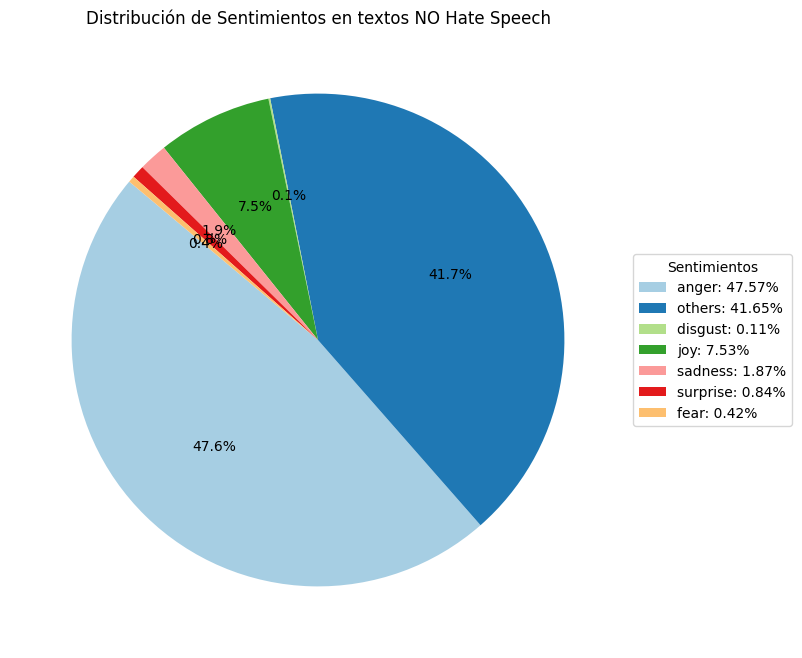

In [51]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_emotion_percentages_not_hate_speech.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Sentimientos en textos NO Hate Speech")
legend_labels = [f"{emotion}: {percentage:.2f}%" for emotion, percentage in overall_emotion_percentages_not_hate_speech.items()]
ax.legend(wedges, legend_labels, title="Sentimientos", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [52]:
print("\nEjemplos de cada tipo de sentimiento en textos NO hate speech:")
for sent_type, example in examples_per_emotion_not_hate_speech.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos NO hate speech:
anger: ['Yo veo a mujeres destruidas por acoso laboral y callejero. Otras con depresión debido a violación sexual o maltrato físico. Y conocí a varias que se suicidaron por este tipo de comportamientos machistas. Vas a seguir con tu show pobre? https://t.co/JE6MEgvIh4', '— Yo soy respetuoso con los demás, sólamente les recuerdo lo que son. Y si son escoria no es culpa mía. ... — ¡Claro que lo sé! ¿¡Por quién me tomas!?', 'Antonio Caballero y como ser de mal gusto e ignorante a la vez. Claro que no es lo mismo acoso sexual y violación pero hay varias conductas que componen la violencia sexual.', '@Zurine3 Cuánto hijo de puta sobra en el mundo...', 'vos me haces eso te pego una patada en la cara https://t.co/2drqUu5Rwc', 'No sé porque hay personas que piensan que todos los inmigrantes son delincuentes', 'Pd a ver si cierran de una puta vez Tv3 que no sé todavía qué servicio público ofrece para que merezca dinero de nuestros 

-----------------------------------------------

### Comparación entre todos los tweets, tweets hate_speech y no hate_speech

-----------------------------------------------


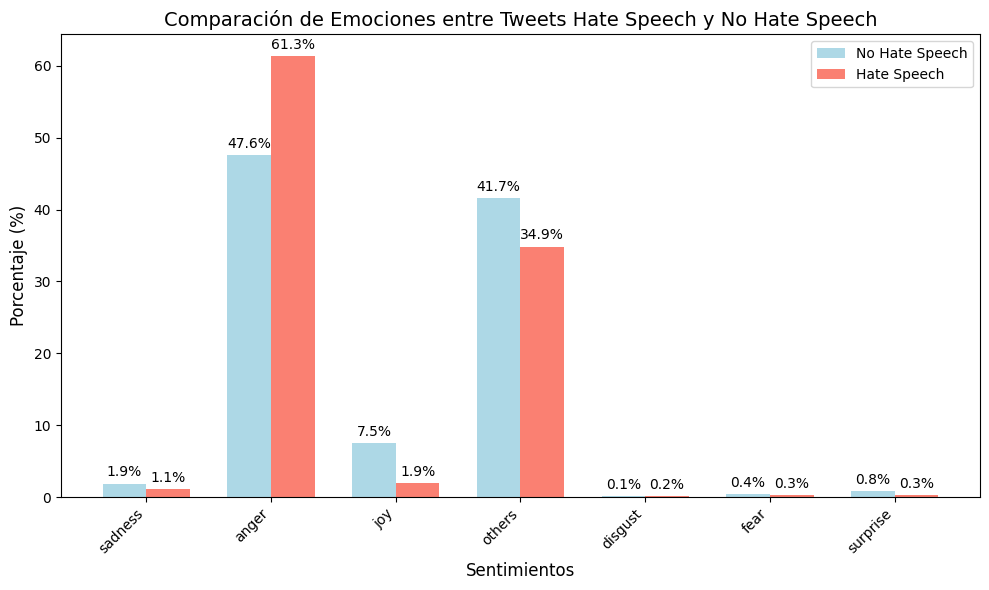

In [54]:
all_emotions = list(set(overall_emotion_percentages_not_hate_speech.keys()).union(set(overall_emotion_percentages_hate_speech.keys())))

not_hate_speech_percentages = [overall_emotion_percentages_not_hate_speech.get(emot, 0) for emot in all_emotions]
hate_speech_percentages = [overall_emotion_percentages_hate_speech.get(emot, 0) for emot in all_emotions]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(all_emotions))
bar1 = ax.bar(index - bar_width/2, not_hate_speech_percentages, bar_width, label='No Hate Speech', color='lightblue')
bar2 = ax.bar(index + bar_width/2, hate_speech_percentages, bar_width, label='Hate Speech', color='salmon')
for i, v in enumerate(not_hate_speech_percentages):
  ax.text(index[i] - bar_width/2, v + 1, f'{v:.1f}%', ha='center', fontsize=10, color='black')
for i, v in enumerate(hate_speech_percentages):
  ax.text(index[i] + bar_width/2, v + 1, f'{v:.1f}%', ha='center', fontsize=10, color='black')

ax.set_xlabel('Sentimientos', fontsize=12)
ax.set_ylabel('Porcentaje (%)', fontsize=12)
ax.set_title('Comparación de Emociones entre Tweets Hate Speech y No Hate Speech', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(all_emotions, rotation=45, ha='right', fontsize=10)
ax.legend()

plt.tight_layout()
plt.show()